In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from utils import train, val_eval, test_eval

### Load Dataset and Transform dataset

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.6 * len(trainset))
val_size = int(0.2 * len(trainset))
test_size = len(trainset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(trainset, [train_size, val_size, test_size])


Files already downloaded and verified
Files already downloaded and verified


## Hyperparameters

In [9]:
hidden_sizes = [(512, 256), (1024, 512), (2048, 1024)]
learning_rates = [0.001, 0.005, 0.01]
batch_sizes = [64, 128, 256]

In [13]:
class FNN(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.hidden1 = nn.Linear(in_features=3 * 32 * 32, out_features=hidden_size[0])
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(in_features=hidden_size[0], out_features=hidden_size[1])
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(in_features=hidden_size[1], out_features=10)

    def forward(self, inp):
        inp = inp.view(-1, 3 * 32 * 32)  # reshaping the input to (1x3076) array
        inp = self.relu1(self.hidden1(inp))  # passing the input through the first linear layer and ReLU layer
        inp = self.relu2(self.hidden2(inp))
        inp = self.output(inp)
        return inp

In [16]:
def grid_search(hidden_sizes, learning_rates, batch_sizes):
    train_losses = []
    train_acc = []
    best_val_acc = 0
    best_hyperparams = None

    for hidden_size in hidden_sizes:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                
                model = FNN(hidden_size)
                optimizer = optim.Adam(model.parameters(), lr=lr)
                loss_func = nn.CrossEntropyLoss()

                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

                for epoch in range(10):
                    acc, train_loss = train(model, train_loader, optimizer, loss_func, epoch)
                    val_acc, val_loss = val_evaluate(model, val_loader, loss_func)
                    
                    train_losses.append(train_loss)
                    train_acc.append(acc)

                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        best_hyperparams = {
                            'hidden_size': hidden_size,
                            'learning_rate': lr,
                            'batch_size': batch_size
                        }

    return best_val_acc, best_hyperparams, train_losses, train_acc

In [17]:
# Run the grid search
best_val_acc, best_hyperparams, train_losses, train_acc = grid_search(hidden_sizes, learning_rates, batch_sizes)
print(f"Best validation accuracy: {best_val_acc:.2f}%")
print(f"Best hyperparameters: {best_hyperparams}")

Train Epoch: 0: Accuracy:0.0625	Loss: 2.309636354446411
Train Epoch: 0: Accuracy:0.09375	Loss: 2.2638845443725586
Train Epoch: 0: Accuracy:0.109375	Loss: 2.2334039211273193
Train Epoch: 0: Accuracy:0.14453125	Loss: 2.083595037460327
Train Epoch: 0: Accuracy:0.146875	Loss: 2.175605535507202
Train Epoch: 0: Accuracy:0.15364583333333334	Loss: 2.272172689437866
Train Epoch: 0: Accuracy:0.16964285714285715	Loss: 2.033937692642212
Train Epoch: 0: Accuracy:0.177734375	Loss: 2.0466878414154053
Train Epoch: 0: Accuracy:0.18055555555555555	Loss: 2.142085075378418
Train Epoch: 0: Accuracy:0.196875	Loss: 1.9280575513839722
Train Epoch: 0: Accuracy:0.20454545454545456	Loss: 2.0334277153015137
Train Epoch: 0: Accuracy:0.21744791666666666	Loss: 1.9135326147079468
Train Epoch: 0: Accuracy:0.22716346153846154	Loss: 2.136850595474243
Train Epoch: 0: Accuracy:0.22767857142857142	Loss: 2.011274814605713
Train Epoch: 0: Accuracy:0.23541666666666666	Loss: 1.9867783784866333
Train Epoch: 0: Accuracy:0.237304

Train Epoch: 0: Accuracy:0.3389616935483871	Loss: 1.6824867725372314
Train Epoch: 0: Accuracy:0.3385	Loss: 1.7308757305145264
Train Epoch: 0: Accuracy:0.3384176587301587	Loss: 1.7837821245193481
Train Epoch: 0: Accuracy:0.3389517716535433	Loss: 1.7027957439422607
Train Epoch: 0: Accuracy:0.3389892578125	Loss: 1.8632822036743164
Train Epoch: 0: Accuracy:0.3393895348837209	Loss: 1.7929328680038452
Train Epoch: 0: Accuracy:0.3395432692307692	Loss: 1.843387484550476
Train Epoch: 0: Accuracy:0.3398139312977099	Loss: 1.6516072750091553
Train Epoch: 0: Accuracy:0.33960700757575757	Loss: 1.778389811515808
Train Epoch: 0: Accuracy:0.34057800751879697	Loss: 1.5850857496261597
Train Epoch: 0: Accuracy:0.3414179104477612	Loss: 1.6739085912704468
Train Epoch: 0: Accuracy:0.3417824074074074	Loss: 1.88825261592865
Train Epoch: 0: Accuracy:0.3420266544117647	Loss: 1.6021003723144531
Train Epoch: 0: Accuracy:0.34306569343065696	Loss: 1.537442922592163
Train Epoch: 0: Accuracy:0.3431838768115942	Loss: 1

Train Epoch: 0: Accuracy:0.3688006072874494	Loss: 1.4798684120178223
Train Epoch: 0: Accuracy:0.36888860887096775	Loss: 1.5946310758590698
Train Epoch: 0: Accuracy:0.3690386546184739	Loss: 1.7887728214263916
Train Epoch: 0: Accuracy:0.369	Loss: 1.795346975326538
Train Epoch: 0: Accuracy:0.36921065737051795	Loss: 1.6306204795837402
Train Epoch: 0: Accuracy:0.3697916666666667	Loss: 1.5688436031341553
Train Epoch: 0: Accuracy:0.36937994071146246	Loss: 1.7375271320343018
Train Epoch: 0: Accuracy:0.36964812992125984	Loss: 1.4701130390167236
Train Epoch: 0: Accuracy:0.36966911764705884	Loss: 1.73702073097229
Train Epoch: 0: Accuracy:0.3695068359375	Loss: 1.6559709310531616
Train Epoch: 0: Accuracy:0.3695890077821012	Loss: 1.674214482307434
Train Epoch: 0: Accuracy:0.36985222868217055	Loss: 1.57636296749115
Train Epoch: 0: Accuracy:0.3703547297297297	Loss: 1.4463485479354858
Train Epoch: 0: Accuracy:0.3702524038461538	Loss: 1.6994658708572388
Train Epoch: 0: Accuracy:0.3702107279693487	Loss: 

Train Epoch: 0: Accuracy:0.38359164420485176	Loss: 1.7889631986618042
Train Epoch: 0: Accuracy:0.38352654569892475	Loss: 1.629212498664856
Train Epoch: 0: Accuracy:0.3835455764075067	Loss: 1.6277745962142944
Train Epoch: 0: Accuracy:0.3837316176470588	Loss: 1.6930660009384155
Train Epoch: 0: Accuracy:0.3842083333333333	Loss: 1.4686269760131836
Train Epoch: 0: Accuracy:0.38414228723404253	Loss: 1.6833196878433228
Train Epoch: 0: Accuracy:0.38424237400530503	Loss: 1.5532621145248413
Train Epoch: 0: Accuracy:0.3845899470899471	Loss: 1.3967779874801636
Train Epoch: 0: Accuracy:0.3846883245382586	Loss: 1.819844365119934
Train Epoch: 0: Accuracy:0.3846628289473684	Loss: 1.467703938484192
Train Epoch: 0: Accuracy:0.384883530183727	Loss: 1.4192560911178589
Train Epoch: 0: Accuracy:0.3850621727748691	Loss: 1.5802651643753052
Train Epoch: 0: Accuracy:0.38552545691906004	Loss: 1.370314359664917
Train Epoch: 0: Accuracy:0.3856201171875	Loss: 1.5173239707946777
Train Epoch: 0: Accuracy:0.3861607142

Train Epoch: 1: Accuracy:0.4665948275862069	Loss: 1.468216896057129
Train Epoch: 1: Accuracy:0.46927083333333336	Loss: 1.265529990196228
Train Epoch: 1: Accuracy:0.46975806451612906	Loss: 1.5304275751113892
Train Epoch: 1: Accuracy:0.47021484375	Loss: 1.4779345989227295
Train Epoch: 1: Accuracy:0.46922348484848486	Loss: 1.5122188329696655
Train Epoch: 1: Accuracy:0.46691176470588236	Loss: 1.4452524185180664
Train Epoch: 1: Accuracy:0.465625	Loss: 1.425121784210205
Train Epoch: 1: Accuracy:0.4661458333333333	Loss: 1.5375628471374512
Train Epoch: 1: Accuracy:0.46368243243243246	Loss: 1.4285569190979004
Train Epoch: 1: Accuracy:0.4642269736842105	Loss: 1.3554363250732422
Train Epoch: 1: Accuracy:0.4675480769230769	Loss: 1.33134925365448
Train Epoch: 1: Accuracy:0.468359375	Loss: 1.3414949178695679
Train Epoch: 1: Accuracy:0.47027439024390244	Loss: 1.254391074180603
Train Epoch: 1: Accuracy:0.47023809523809523	Loss: 1.5030044317245483
Train Epoch: 1: Accuracy:0.47056686046511625	Loss: 1.42

Train Epoch: 1: Accuracy:0.46905438311688313	Loss: 1.7890571355819702
Train Epoch: 1: Accuracy:0.4688508064516129	Loss: 1.533833622932434
Train Epoch: 1: Accuracy:0.46824919871794873	Loss: 1.7768824100494385
Train Epoch: 1: Accuracy:0.46835191082802546	Loss: 1.3358393907546997
Train Epoch: 1: Accuracy:0.46875	Loss: 1.432701826095581
Train Epoch: 1: Accuracy:0.46894654088050314	Loss: 1.4396227598190308
Train Epoch: 1: Accuracy:0.4685546875	Loss: 1.4893839359283447
Train Epoch: 1: Accuracy:0.468652950310559	Loss: 1.5588096380233765
Train Epoch: 1: Accuracy:0.46865354938271603	Loss: 1.50711989402771
Train Epoch: 1: Accuracy:0.4678872699386503	Loss: 1.8470649719238281
Train Epoch: 1: Accuracy:0.4679878048780488	Loss: 1.6151955127716064
Train Epoch: 1: Accuracy:0.46827651515151514	Loss: 1.4226919412612915
Train Epoch: 1: Accuracy:0.46790286144578314	Loss: 1.6867800951004028
Train Epoch: 1: Accuracy:0.46762724550898205	Loss: 1.6976600885391235
Train Epoch: 1: Accuracy:0.4674479166666667	Loss

Train Epoch: 1: Accuracy:0.47384632616487454	Loss: 1.684765100479126
Train Epoch: 1: Accuracy:0.47360491071428573	Loss: 1.5985437631607056
Train Epoch: 1: Accuracy:0.47386565836298933	Loss: 1.4201875925064087
Train Epoch: 1: Accuracy:0.473792109929078	Loss: 1.443415880203247
Train Epoch: 1: Accuracy:0.47360865724381623	Loss: 1.5197858810424805
Train Epoch: 1: Accuracy:0.47370158450704225	Loss: 1.6247233152389526
Train Epoch: 1: Accuracy:0.47346491228070176	Loss: 1.559120535850525
Train Epoch: 1: Accuracy:0.4732298951048951	Loss: 1.5695428848266602
Train Epoch: 1: Accuracy:0.4733231707317073	Loss: 1.3847267627716064
Train Epoch: 1: Accuracy:0.47314453125	Loss: 1.4042460918426514
Train Epoch: 1: Accuracy:0.47323745674740486	Loss: 1.5242689847946167
Train Epoch: 1: Accuracy:0.4734375	Loss: 1.4397988319396973
Train Epoch: 1: Accuracy:0.4734750859106529	Loss: 1.4387730360031128
Train Epoch: 1: Accuracy:0.473458904109589	Loss: 1.4726567268371582
Train Epoch: 1: Accuracy:0.47360281569965873	L

Train Epoch: 1: Accuracy:0.47369660804020103	Loss: 1.4530277252197266
Train Epoch: 1: Accuracy:0.47368421052631576	Loss: 1.5060917139053345
Train Epoch: 1: Accuracy:0.4737109375	Loss: 1.2791842222213745
Train Epoch: 1: Accuracy:0.4739323566084788	Loss: 1.2982008457183838
Train Epoch: 1: Accuracy:0.47391946517412936	Loss: 1.5164330005645752
Train Epoch: 1: Accuracy:0.4739841811414392	Loss: 1.4601768255233765
Train Epoch: 1: Accuracy:0.47389387376237624	Loss: 1.5913023948669434
Train Epoch: 1: Accuracy:0.4741898148148148	Loss: 1.2303816080093384
Train Epoch: 1: Accuracy:0.47417641625615764	Loss: 1.4527614116668701
Train Epoch: 1: Accuracy:0.4745085995085995	Loss: 1.261667013168335
Train Epoch: 1: Accuracy:0.474609375	Loss: 1.4091205596923828
Train Epoch: 1: Accuracy:0.47490067237163813	Loss: 1.20089590549469
Train Epoch: 1: Accuracy:0.47477134146341465	Loss: 1.5135961771011353
Train Epoch: 1: Accuracy:0.47487074209245744	Loss: 1.4740285873413086
Train Epoch: 1: Accuracy:0.474855885922330

Train Epoch: 2: Accuracy:0.5170454545454546	Loss: 1.6996707916259766
Train Epoch: 2: Accuracy:0.5172991071428571	Loss: 1.2806659936904907
Train Epoch: 2: Accuracy:0.5169956140350878	Loss: 1.3189393281936646
Train Epoch: 2: Accuracy:0.5183189655172413	Loss: 1.18502676486969
Train Epoch: 2: Accuracy:0.5177436440677966	Loss: 1.3838250637054443
Train Epoch: 2: Accuracy:0.5161458333333333	Loss: 1.6044853925704956
Train Epoch: 2: Accuracy:0.5140881147540983	Loss: 1.4937489032745361
Train Epoch: 2: Accuracy:0.5141129032258065	Loss: 1.2870898246765137
Train Epoch: 2: Accuracy:0.5151289682539683	Loss: 1.0696972608566284
Train Epoch: 2: Accuracy:0.515869140625	Loss: 1.4256603717803955
Train Epoch: 2: Accuracy:0.5170673076923077	Loss: 1.1943438053131104
Train Epoch: 2: Accuracy:0.5175189393939394	Loss: 1.4672359228134155
Train Epoch: 2: Accuracy:0.5184235074626866	Loss: 1.283656120300293
Train Epoch: 2: Accuracy:0.5190716911764706	Loss: 1.2638957500457764
Train Epoch: 2: Accuracy:0.51992753623188

Train Epoch: 2: Accuracy:0.5234375	Loss: 1.2512387037277222
Train Epoch: 2: Accuracy:0.5235699152542372	Loss: 1.3658695220947266
Train Epoch: 2: Accuracy:0.5237008426966292	Loss: 1.133737325668335
Train Epoch: 2: Accuracy:0.52330656424581	Loss: 1.4325858354568481
Train Epoch: 2: Accuracy:0.5235243055555555	Loss: 1.1845043897628784
Train Epoch: 2: Accuracy:0.523739640883978	Loss: 1.2810240983963013
Train Epoch: 2: Accuracy:0.5236092032967034	Loss: 1.5318909883499146
Train Epoch: 2: Accuracy:0.5239071038251366	Loss: 1.1107529401779175
Train Epoch: 2: Accuracy:0.5236922554347826	Loss: 1.3272913694381714
Train Epoch: 2: Accuracy:0.5237331081081081	Loss: 1.3622597455978394
Train Epoch: 2: Accuracy:0.5242775537634409	Loss: 1.2668983936309814
Train Epoch: 2: Accuracy:0.5240641711229946	Loss: 1.3619608879089355
Train Epoch: 2: Accuracy:0.5245179521276596	Loss: 1.21646249294281
Train Epoch: 2: Accuracy:0.5244708994708994	Loss: 1.3547972440719604
Train Epoch: 2: Accuracy:0.5240953947368421	Loss:

Train Epoch: 2: Accuracy:0.5216145833333333	Loss: 1.3178921937942505
Train Epoch: 2: Accuracy:0.5214908637873754	Loss: 1.3796799182891846
Train Epoch: 2: Accuracy:0.5217301324503312	Loss: 1.3208171129226685
Train Epoch: 2: Accuracy:0.5222772277227723	Loss: 1.143082618713379
Train Epoch: 2: Accuracy:0.5219983552631579	Loss: 1.5518602132797241
Train Epoch: 2: Accuracy:0.522233606557377	Loss: 1.2949475049972534
Train Epoch: 2: Accuracy:0.5225183823529411	Loss: 1.3348543643951416
Train Epoch: 2: Accuracy:0.5222414495114006	Loss: 1.5217946767807007
Train Epoch: 2: Accuracy:0.5221185064935064	Loss: 1.345717430114746
Train Epoch: 2: Accuracy:0.5224514563106796	Loss: 1.1470094919204712
Train Epoch: 2: Accuracy:0.5220766129032258	Loss: 1.4545882940292358
Train Epoch: 2: Accuracy:0.5220056270096463	Loss: 1.3344523906707764
Train Epoch: 2: Accuracy:0.5220853365384616	Loss: 1.4207340478897095
Train Epoch: 2: Accuracy:0.5221146166134185	Loss: 1.3746122121810913
Train Epoch: 2: Accuracy:0.5219944267

Train Epoch: 2: Accuracy:0.521091903073286	Loss: 1.3718881607055664
Train Epoch: 2: Accuracy:0.5210421580188679	Loss: 1.2826594114303589
Train Epoch: 2: Accuracy:0.5208088235294117	Loss: 1.4786456823349
Train Epoch: 2: Accuracy:0.520649941314554	Loss: 1.3729445934295654
Train Epoch: 2: Accuracy:0.5205649882903981	Loss: 1.3127747774124146
Train Epoch: 2: Accuracy:0.5203709112149533	Loss: 1.440076231956482
Train Epoch: 2: Accuracy:0.5203962703962703	Loss: 1.403845191001892
Train Epoch: 2: Accuracy:0.5204578488372092	Loss: 1.2361268997192383
Train Epoch: 2: Accuracy:0.5205191415313225	Loss: 1.5064036846160889
Train Epoch: 2: Accuracy:0.5203269675925926	Loss: 1.3777985572814941
Train Epoch: 2: Accuracy:0.5200635103926097	Loss: 1.4803494215011597
Train Epoch: 2: Accuracy:0.5201252880184332	Loss: 1.2548682689666748
Train Epoch: 2: Accuracy:0.5201149425287356	Loss: 1.2963142395019531
Train Epoch: 2: Accuracy:0.5200329701834863	Loss: 1.3071914911270142
Train Epoch: 2: Accuracy:0.51995137299771

Train Epoch: 3: Accuracy:0.5665015243902439	Loss: 1.3001915216445923
Train Epoch: 3: Accuracy:0.5666415662650602	Loss: 1.2075204849243164
Train Epoch: 3: Accuracy:0.5665922619047619	Loss: 1.370811104774475
Train Epoch: 3: Accuracy:0.5654411764705882	Loss: 1.3959661722183228
Train Epoch: 3: Accuracy:0.5657703488372093	Loss: 1.0468896627426147
Train Epoch: 3: Accuracy:0.5653735632183908	Loss: 1.124372124671936
Train Epoch: 3: Accuracy:0.5646306818181818	Loss: 1.2760099172592163
Train Epoch: 3: Accuracy:0.5649578651685393	Loss: 1.2008471488952637
Train Epoch: 3: Accuracy:0.5649305555555556	Loss: 1.3671320676803589
Train Epoch: 3: Accuracy:0.5654189560439561	Loss: 1.263387680053711
Train Epoch: 3: Accuracy:0.5657269021739131	Loss: 1.0927174091339111
Train Epoch: 3: Accuracy:0.5653561827956989	Loss: 1.2189195156097412
Train Epoch: 3: Accuracy:0.5646609042553191	Loss: 1.4340343475341797
Train Epoch: 3: Accuracy:0.5649671052631579	Loss: 1.190246343612671
Train Epoch: 3: Accuracy:0.56412760416

Train Epoch: 3: Accuracy:0.5601712740384616	Loss: 1.1446278095245361
Train Epoch: 3: Accuracy:0.5607057416267942	Loss: 1.1845297813415527
Train Epoch: 3: Accuracy:0.5607142857142857	Loss: 1.1544846296310425
Train Epoch: 3: Accuracy:0.5605005924170616	Loss: 1.2742846012115479
Train Epoch: 3: Accuracy:0.5605100235849056	Loss: 1.1594841480255127
Train Epoch: 3: Accuracy:0.5602992957746479	Loss: 1.2847849130630493
Train Epoch: 3: Accuracy:0.5603095794392523	Loss: 1.2222819328308105
Train Epoch: 3: Accuracy:0.5603924418604651	Loss: 1.1559042930603027
Train Epoch: 3: Accuracy:0.5599681712962963	Loss: 1.4980239868164062
Train Epoch: 3: Accuracy:0.5596918202764977	Loss: 1.2171192169189453
Train Epoch: 3: Accuracy:0.5596330275229358	Loss: 1.3476097583770752
Train Epoch: 3: Accuracy:0.560216894977169	Loss: 1.0721756219863892
Train Epoch: 3: Accuracy:0.5604403409090909	Loss: 1.1502552032470703
Train Epoch: 3: Accuracy:0.5601668552036199	Loss: 1.2607558965682983
Train Epoch: 3: Accuracy:0.55996621

Train Epoch: 3: Accuracy:0.5576995481927711	Loss: 1.1670503616333008
Train Epoch: 3: Accuracy:0.5577608858858859	Loss: 1.2633453607559204
Train Epoch: 3: Accuracy:0.5579154191616766	Loss: 1.3188725709915161
Train Epoch: 3: Accuracy:0.5578358208955224	Loss: 1.4221291542053223
Train Epoch: 3: Accuracy:0.5576636904761905	Loss: 1.1904736757278442
Train Epoch: 3: Accuracy:0.5576780415430267	Loss: 1.1971584558486938
Train Epoch: 3: Accuracy:0.5576923076923077	Loss: 1.255491852760315
Train Epoch: 3: Accuracy:0.5576603982300885	Loss: 1.1590954065322876
Train Epoch: 3: Accuracy:0.5574908088235294	Loss: 1.3966904878616333
Train Epoch: 3: Accuracy:0.5575054985337243	Loss: 1.1690593957901
Train Epoch: 3: Accuracy:0.557702850877193	Loss: 1.0427212715148926
Train Epoch: 3: Accuracy:0.5576257288629738	Loss: 1.3770519495010376
Train Epoch: 3: Accuracy:0.5579124273255814	Loss: 1.0379778146743774
Train Epoch: 3: Accuracy:0.5579257246376812	Loss: 1.3111826181411743
Train Epoch: 3: Accuracy:0.557938945086

Train Epoch: 3: Accuracy:0.5556511563876652	Loss: 1.3582674264907837
Train Epoch: 3: Accuracy:0.5558379120879121	Loss: 1.256489872932434
Train Epoch: 3: Accuracy:0.5558182565789473	Loss: 1.3850985765457153
Train Epoch: 3: Accuracy:0.5557644967177243	Loss: 1.133976936340332
Train Epoch: 3: Accuracy:0.5556768558951966	Loss: 1.437302589416504
Train Epoch: 3: Accuracy:0.5556917211328976	Loss: 1.296469807624817
Train Epoch: 3: Accuracy:0.5557744565217392	Loss: 1.3115131855010986
Train Epoch: 3: Accuracy:0.5558568329718004	Loss: 1.1010440587997437
Train Epoch: 3: Accuracy:0.5557359307359307	Loss: 1.3779617547988892
Train Epoch: 3: Accuracy:0.5556155507559395	Loss: 1.226098895072937
Train Epoch: 3: Accuracy:0.5555293642241379	Loss: 1.4097480773925781
Train Epoch: 3: Accuracy:0.5552083333333333	Loss: 1.5656023025512695
Train Epoch: 3: Accuracy:0.5552239806866953	Loss: 1.425668716430664
Train Epoch: 3: Accuracy:0.55530647751606	Loss: 1.2164709568023682
Train Epoch: 3: Accuracy:0.555255074786324

Train Epoch: 4: Accuracy:0.5938920454545454	Loss: 1.2125113010406494
Train Epoch: 4: Accuracy:0.5951576576576577	Loss: 0.780542254447937
Train Epoch: 4: Accuracy:0.5944475446428571	Loss: 1.4100693464279175
Train Epoch: 4: Accuracy:0.5938882743362832	Loss: 1.2607046365737915
Train Epoch: 4: Accuracy:0.5941611842105263	Loss: 1.1088535785675049
Train Epoch: 4: Accuracy:0.5944293478260869	Loss: 1.0532023906707764
Train Epoch: 4: Accuracy:0.59375	Loss: 1.1576032638549805
Train Epoch: 4: Accuracy:0.5949519230769231	Loss: 0.9274171590805054
Train Epoch: 4: Accuracy:0.595603813559322	Loss: 1.2180017232894897
Train Epoch: 4: Accuracy:0.5951943277310925	Loss: 1.035690188407898
Train Epoch: 4: Accuracy:0.5947916666666667	Loss: 1.0712697505950928
Train Epoch: 4: Accuracy:0.5951704545454546	Loss: 1.181934118270874
Train Epoch: 4: Accuracy:0.5955430327868853	Loss: 1.0521485805511475
Train Epoch: 4: Accuracy:0.5955284552845529	Loss: 1.0875368118286133
Train Epoch: 4: Accuracy:0.5952620967741935	Loss:

Train Epoch: 4: Accuracy:0.5921942640692641	Loss: 1.0746811628341675
Train Epoch: 4: Accuracy:0.5923356681034483	Loss: 1.0536621809005737
Train Epoch: 4: Accuracy:0.5923417381974249	Loss: 1.1843113899230957
Train Epoch: 4: Accuracy:0.5925480769230769	Loss: 1.0886790752410889
Train Epoch: 4: Accuracy:0.5923537234042553	Loss: 1.1180920600891113
Train Epoch: 4: Accuracy:0.5922272245762712	Loss: 1.3753432035446167
Train Epoch: 4: Accuracy:0.5921677215189873	Loss: 1.1875269412994385
Train Epoch: 4: Accuracy:0.5923056722689075	Loss: 1.128170132637024
Train Epoch: 4: Accuracy:0.5925078451882845	Loss: 1.0989636182785034
Train Epoch: 4: Accuracy:0.5921875	Loss: 1.0843452215194702
Train Epoch: 4: Accuracy:0.5919346473029046	Loss: 1.347169041633606
Train Epoch: 4: Accuracy:0.5922649793388429	Loss: 0.9845059514045715
Train Epoch: 4: Accuracy:0.5922710905349794	Loss: 1.239497184753418
Train Epoch: 4: Accuracy:0.5925332991803278	Loss: 0.9882581233978271
Train Epoch: 4: Accuracy:0.5923469387755103	Lo

Train Epoch: 4: Accuracy:0.5879514872521246	Loss: 1.1931326389312744
Train Epoch: 4: Accuracy:0.5879678672316384	Loss: 1.0837165117263794
Train Epoch: 4: Accuracy:0.5879841549295775	Loss: 1.3179877996444702
Train Epoch: 4: Accuracy:0.5879564606741573	Loss: 1.3462927341461182
Train Epoch: 4: Accuracy:0.5882790616246498	Loss: 0.9541179537773132
Train Epoch: 4: Accuracy:0.5885998603351955	Loss: 0.9497689604759216
Train Epoch: 4: Accuracy:0.588657729805014	Loss: 1.1077027320861816
Train Epoch: 4: Accuracy:0.5889322916666667	Loss: 0.8544125556945801
Train Epoch: 4: Accuracy:0.5888590720221607	Loss: 1.3675215244293213
Train Epoch: 4: Accuracy:0.5886567679558011	Loss: 1.2947136163711548
Train Epoch: 4: Accuracy:0.5885847107438017	Loss: 1.1356213092803955
Train Epoch: 4: Accuracy:0.5886847527472527	Loss: 1.144770860671997
Train Epoch: 4: Accuracy:0.5888270547945206	Loss: 0.925277590751648
Train Epoch: 4: Accuracy:0.5885416666666666	Loss: 1.5107274055480957
Train Epoch: 4: Accuracy:0.5883855585

Train Epoch: 5: Accuracy:0.6473214285714286	Loss: 1.0393884181976318
Train Epoch: 5: Accuracy:0.642578125	Loss: 1.1467416286468506
Train Epoch: 5: Accuracy:0.6388888888888888	Loss: 1.068130612373352
Train Epoch: 5: Accuracy:0.6453125	Loss: 0.9908939003944397
Train Epoch: 5: Accuracy:0.6477272727272727	Loss: 1.1339467763900757
Train Epoch: 5: Accuracy:0.6471354166666666	Loss: 0.8535770177841187
Train Epoch: 5: Accuracy:0.6490384615384616	Loss: 0.8212230205535889
Train Epoch: 5: Accuracy:0.6495535714285714	Loss: 0.9129977226257324
Train Epoch: 5: Accuracy:0.6427083333333333	Loss: 1.1440341472625732
Train Epoch: 5: Accuracy:0.642578125	Loss: 0.9858768582344055
Train Epoch: 5: Accuracy:0.6369485294117647	Loss: 1.1283031702041626
Train Epoch: 5: Accuracy:0.6371527777777778	Loss: 0.9890221953392029
Train Epoch: 5: Accuracy:0.6389802631578947	Loss: 1.1167229413986206
Train Epoch: 5: Accuracy:0.63125	Loss: 1.196183681488037
Train Epoch: 5: Accuracy:0.6316964285714286	Loss: 1.089404582977295
Tr

Train Epoch: 5: Accuracy:0.6326362781954887	Loss: 0.9793716073036194
Train Epoch: 5: Accuracy:0.6324626865671642	Loss: 1.046650767326355
Train Epoch: 5: Accuracy:0.6325231481481481	Loss: 0.9661751389503479
Train Epoch: 5: Accuracy:0.6332720588235294	Loss: 0.7745251655578613
Train Epoch: 5: Accuracy:0.6336678832116789	Loss: 1.0115442276000977
Train Epoch: 5: Accuracy:0.6334918478260869	Loss: 1.132912278175354
Train Epoch: 5: Accuracy:0.6342176258992805	Loss: 0.9723315238952637
Train Epoch: 5: Accuracy:0.6352678571428572	Loss: 0.6633030772209167
Train Epoch: 5: Accuracy:0.6357491134751773	Loss: 0.8162293434143066
Train Epoch: 5: Accuracy:0.6361135563380281	Loss: 0.8816295862197876
Train Epoch: 5: Accuracy:0.6361451048951049	Loss: 0.883478581905365
Train Epoch: 5: Accuracy:0.6360677083333334	Loss: 1.2197445631027222
Train Epoch: 5: Accuracy:0.6368534482758621	Loss: 0.8871986269950867
Train Epoch: 5: Accuracy:0.6363441780821918	Loss: 1.0541445016860962
Train Epoch: 5: Accuracy:0.6358418367

Train Epoch: 5: Accuracy:0.6305364173228346	Loss: 0.8389537334442139
Train Epoch: 5: Accuracy:0.6308210784313726	Loss: 1.0251384973526
Train Epoch: 5: Accuracy:0.63079833984375	Loss: 1.0591906309127808
Train Epoch: 5: Accuracy:0.6305325875486382	Loss: 1.1090550422668457
Train Epoch: 5: Accuracy:0.630874515503876	Loss: 0.8365640640258789
Train Epoch: 5: Accuracy:0.6304898648648649	Loss: 1.1772483587265015
Train Epoch: 5: Accuracy:0.6302283653846154	Loss: 1.4077003002166748
Train Epoch: 5: Accuracy:0.6303280651340997	Loss: 0.8215258717536926
Train Epoch: 5: Accuracy:0.6307251908396947	Loss: 0.7651994228363037
Train Epoch: 5: Accuracy:0.6308816539923955	Loss: 1.0733176469802856
Train Epoch: 5: Accuracy:0.631155303030303	Loss: 1.0603892803192139
Train Epoch: 5: Accuracy:0.6311910377358491	Loss: 1.037113904953003
Train Epoch: 5: Accuracy:0.6310502819548872	Loss: 1.1414155960083008
Train Epoch: 5: Accuracy:0.6311446629213483	Loss: 1.0959539413452148
Train Epoch: 5: Accuracy:0.631121735074626

Train Epoch: 5: Accuracy:0.6239747375328084	Loss: 1.2724947929382324
Train Epoch: 5: Accuracy:0.6238547120418848	Loss: 1.3063627481460571
Train Epoch: 5: Accuracy:0.6239392950391645	Loss: 1.0725957155227661
Train Epoch: 5: Accuracy:0.6241861979166666	Loss: 0.7913044095039368
Train Epoch: 5: Accuracy:0.6237824675324676	Loss: 1.3793975114822388
Train Epoch: 5: Accuracy:0.6235022668393783	Loss: 1.3714665174484253
Train Epoch: 5: Accuracy:0.6238291343669251	Loss: 0.8969829678535461
Train Epoch: 5: Accuracy:0.623791881443299	Loss: 1.106465458869934
Train Epoch: 5: Accuracy:0.6238351542416453	Loss: 0.8796229362487793
Train Epoch: 5: Accuracy:0.6239583333333333	Loss: 1.0102037191390991
Train Epoch: 5: Accuracy:0.6240409207161125	Loss: 0.9279335141181946
Train Epoch: 5: Accuracy:0.6240832270408163	Loss: 1.063523769378662
Train Epoch: 5: Accuracy:0.6240855597964376	Loss: 1.0033109188079834
Train Epoch: 5: Accuracy:0.6240085659898477	Loss: 0.922507643699646
Train Epoch: 5: Accuracy:0.62397151898

Train Epoch: 6: Accuracy:0.6747532894736842	Loss: 0.8576793670654297
Train Epoch: 6: Accuracy:0.6714743589743589	Loss: 1.1263909339904785
Train Epoch: 6: Accuracy:0.671875	Loss: 0.9040380120277405
Train Epoch: 6: Accuracy:0.6707317073170732	Loss: 0.9779403209686279
Train Epoch: 6: Accuracy:0.6677827380952381	Loss: 1.394078016281128
Train Epoch: 6: Accuracy:0.6664244186046512	Loss: 0.9702052474021912
Train Epoch: 6: Accuracy:0.6669034090909091	Loss: 0.8231223225593567
Train Epoch: 6: Accuracy:0.6680555555555555	Loss: 0.8738998770713806
Train Epoch: 6: Accuracy:0.6677989130434783	Loss: 0.8542405962944031
Train Epoch: 6: Accuracy:0.668218085106383	Loss: 0.9593697786331177
Train Epoch: 6: Accuracy:0.6702473958333334	Loss: 0.6702577471733093
Train Epoch: 6: Accuracy:0.6709183673469388	Loss: 0.8313248157501221
Train Epoch: 6: Accuracy:0.67125	Loss: 0.7582170367240906
Train Epoch: 6: Accuracy:0.6691176470588235	Loss: 1.2107776403427124
Train Epoch: 6: Accuracy:0.6694711538461539	Loss: 0.95255

Train Epoch: 6: Accuracy:0.6641104294478528	Loss: 1.0181756019592285
Train Epoch: 6: Accuracy:0.6636814024390244	Loss: 1.0553125143051147
Train Epoch: 6: Accuracy:0.6632575757575757	Loss: 0.9968850612640381
Train Epoch: 6: Accuracy:0.6634036144578314	Loss: 0.9824946522712708
Train Epoch: 6: Accuracy:0.6636414670658682	Loss: 0.9568958878517151
Train Epoch: 6: Accuracy:0.6635974702380952	Loss: 1.0360945463180542
Train Epoch: 6: Accuracy:0.6629068047337278	Loss: 1.2284996509552002
Train Epoch: 6: Accuracy:0.6625	Loss: 1.098891258239746
Train Epoch: 6: Accuracy:0.662828947368421	Loss: 0.9121735095977783
Train Epoch: 6: Accuracy:0.663063226744186	Loss: 0.937529444694519
Train Epoch: 6: Accuracy:0.6629335260115607	Loss: 1.0010132789611816
Train Epoch: 6: Accuracy:0.6630747126436781	Loss: 0.8966490030288696
Train Epoch: 6: Accuracy:0.6627678571428571	Loss: 0.9220706820487976
Train Epoch: 6: Accuracy:0.6629083806818182	Loss: 0.8380910158157349
Train Epoch: 6: Accuracy:0.6632238700564972	Loss: 

Train Epoch: 6: Accuracy:0.6598135964912281	Loss: 1.0467170476913452
Train Epoch: 6: Accuracy:0.6598011363636364	Loss: 0.9405573606491089
Train Epoch: 6: Accuracy:0.659788763066202	Loss: 0.9277653098106384
Train Epoch: 6: Accuracy:0.6597764756944444	Loss: 0.8257582187652588
Train Epoch: 6: Accuracy:0.6601427335640139	Loss: 0.6390068531036377
Train Epoch: 6: Accuracy:0.6599676724137931	Loss: 0.9602646827697754
Train Epoch: 6: Accuracy:0.6598475085910653	Loss: 1.0007436275482178
Train Epoch: 6: Accuracy:0.6594606164383562	Loss: 1.2431354522705078
Train Epoch: 6: Accuracy:0.6593430034129693	Loss: 0.9821470379829407
Train Epoch: 6: Accuracy:0.6595450680272109	Loss: 0.8480173945426941
Train Epoch: 6: Accuracy:0.6596927966101694	Loss: 0.9181614518165588
Train Epoch: 6: Accuracy:0.6598923141891891	Loss: 0.7815793752670288
Train Epoch: 6: Accuracy:0.6598800505050505	Loss: 1.074593424797058
Train Epoch: 6: Accuracy:0.6597105704697986	Loss: 1.1162981986999512
Train Epoch: 6: Accuracy:0.659333193

Train Epoch: 6: Accuracy:0.6545910493827161	Loss: 0.959453821182251
Train Epoch: 6: Accuracy:0.6545181650246306	Loss: 1.117286205291748
Train Epoch: 6: Accuracy:0.6544072481572482	Loss: 1.0838050842285156
Train Epoch: 6: Accuracy:0.6545649509803921	Loss: 1.006413221359253
Train Epoch: 6: Accuracy:0.6543398533007335	Loss: 1.1296244859695435
Train Epoch: 6: Accuracy:0.6543064024390244	Loss: 1.0130500793457031
Train Epoch: 6: Accuracy:0.6539309610705596	Loss: 1.3282606601715088
Train Epoch: 6: Accuracy:0.6540124393203883	Loss: 1.0886343717575073
Train Epoch: 6: Accuracy:0.6540556900726392	Loss: 0.9559484720230103
Train Epoch: 6: Accuracy:0.6540609903381642	Loss: 0.9907210469245911
Train Epoch: 6: Accuracy:0.6539156626506024	Loss: 1.0888736248016357
Train Epoch: 6: Accuracy:0.6539588341346154	Loss: 0.8811907768249512
Train Epoch: 6: Accuracy:0.6537769784172662	Loss: 1.1615575551986694
Train Epoch: 6: Accuracy:0.6535586124401914	Loss: 1.2071201801300049
Train Epoch: 6: Accuracy:0.6533785799

Train Epoch: 7: Accuracy:0.7166313559322034	Loss: 0.8221532702445984
Train Epoch: 7: Accuracy:0.7171875	Loss: 0.6898208260536194
Train Epoch: 7: Accuracy:0.7179815573770492	Loss: 0.7573886513710022
Train Epoch: 7: Accuracy:0.7157258064516129	Loss: 1.0684624910354614
Train Epoch: 7: Accuracy:0.7160218253968254	Loss: 0.7394391298294067
Train Epoch: 7: Accuracy:0.716552734375	Loss: 0.7284232378005981
Train Epoch: 7: Accuracy:0.7173076923076923	Loss: 0.8159379959106445
Train Epoch: 7: Accuracy:0.7159090909090909	Loss: 1.0083527565002441
Train Epoch: 7: Accuracy:0.715018656716418	Loss: 0.8967320322990417
Train Epoch: 7: Accuracy:0.7136948529411765	Loss: 1.0088391304016113
Train Epoch: 7: Accuracy:0.7146739130434783	Loss: 0.8186677694320679
Train Epoch: 7: Accuracy:0.7142857142857143	Loss: 0.9680931568145752
Train Epoch: 7: Accuracy:0.7139084507042254	Loss: 0.9375269412994385
Train Epoch: 7: Accuracy:0.7137586805555556	Loss: 0.7303711771965027
Train Epoch: 7: Accuracy:0.712970890410959	Loss:

Train Epoch: 7: Accuracy:0.6987092391304348	Loss: 0.7466139793395996
Train Epoch: 7: Accuracy:0.6986486486486486	Loss: 0.8260962963104248
Train Epoch: 7: Accuracy:0.6988407258064516	Loss: 0.6793923377990723
Train Epoch: 7: Accuracy:0.6987800802139037	Loss: 0.8417867422103882
Train Epoch: 7: Accuracy:0.6986369680851063	Loss: 0.8859155774116516
Train Epoch: 7: Accuracy:0.6975859788359788	Loss: 1.2801469564437866
Train Epoch: 7: Accuracy:0.6976151315789474	Loss: 0.8282074928283691
Train Epoch: 7: Accuracy:0.696907722513089	Loss: 1.2313908338546753
Train Epoch: 7: Accuracy:0.6966959635416666	Loss: 0.8435285091400146
Train Epoch: 7: Accuracy:0.696324481865285	Loss: 1.0022858381271362
Train Epoch: 7: Accuracy:0.6968427835051546	Loss: 0.6344759464263916
Train Epoch: 7: Accuracy:0.6967948717948718	Loss: 0.7946017980575562
Train Epoch: 7: Accuracy:0.6965082908163265	Loss: 1.066013216972351
Train Epoch: 7: Accuracy:0.696621192893401	Loss: 0.8208288550376892
Train Epoch: 7: Accuracy:0.69681186868

Train Epoch: 7: Accuracy:0.6922998366013072	Loss: 0.7884671688079834
Train Epoch: 7: Accuracy:0.6924368892508144	Loss: 0.9249060153961182
Train Epoch: 7: Accuracy:0.6923193993506493	Loss: 1.122308611869812
Train Epoch: 7: Accuracy:0.6920509708737864	Loss: 0.9754443764686584
Train Epoch: 7: Accuracy:0.6919354838709677	Loss: 0.8193473815917969
Train Epoch: 7: Accuracy:0.691971463022508	Loss: 0.8775838613510132
Train Epoch: 7: Accuracy:0.6918569711538461	Loss: 0.970392107963562
Train Epoch: 7: Accuracy:0.6916433706070287	Loss: 0.8965141773223877
Train Epoch: 7: Accuracy:0.6913813694267515	Loss: 1.0156899690628052
Train Epoch: 7: Accuracy:0.691468253968254	Loss: 0.7505109906196594
Train Epoch: 7: Accuracy:0.6913568037974683	Loss: 0.9647435545921326
Train Epoch: 7: Accuracy:0.6910981861198738	Loss: 0.9746216535568237
Train Epoch: 7: Accuracy:0.6908411949685535	Loss: 0.911300778388977
Train Epoch: 7: Accuracy:0.6911735893416928	Loss: 0.6998364329338074
Train Epoch: 7: Accuracy:0.691162109375

Train Epoch: 7: Accuracy:0.6873539719626168	Loss: 1.0395119190216064
Train Epoch: 7: Accuracy:0.6871722027972028	Loss: 1.0582791566848755
Train Epoch: 7: Accuracy:0.6872093023255814	Loss: 0.9051491022109985
Train Epoch: 7: Accuracy:0.6868837006960556	Loss: 1.2627512216567993
Train Epoch: 7: Accuracy:0.6867042824074074	Loss: 1.080297589302063
Train Epoch: 7: Accuracy:0.686633949191686	Loss: 0.8869812488555908
Train Epoch: 7: Accuracy:0.6865999423963134	Loss: 1.033302664756775
Train Epoch: 7: Accuracy:0.6864583333333333	Loss: 0.9283830523490906
Train Epoch: 7: Accuracy:0.6861740252293578	Loss: 1.102465033531189
Train Epoch: 7: Accuracy:0.6860340389016019	Loss: 1.0276175737380981
Train Epoch: 7: Accuracy:0.6863227739726028	Loss: 0.6783947348594666
Train Epoch: 7: Accuracy:0.6860763097949886	Loss: 1.0023469924926758
Train Epoch: 7: Accuracy:0.6861150568181819	Loss: 0.8127148151397705
Train Epoch: 7: Accuracy:0.6859764739229025	Loss: 1.0440336465835571
Train Epoch: 7: Accuracy:0.68619202488

Train Epoch: 8: Accuracy:0.7383765243902439	Loss: 0.8660959601402283
Train Epoch: 8: Accuracy:0.7379518072289156	Loss: 0.6830353140830994
Train Epoch: 8: Accuracy:0.7380952380952381	Loss: 0.6951816082000732
Train Epoch: 8: Accuracy:0.7378676470588236	Loss: 0.8137423396110535
Train Epoch: 8: Accuracy:0.7378270348837209	Loss: 0.7958405017852783
Train Epoch: 8: Accuracy:0.7376077586206896	Loss: 0.8210686445236206
Train Epoch: 8: Accuracy:0.7366832386363636	Loss: 0.891633152961731
Train Epoch: 8: Accuracy:0.7356039325842697	Loss: 0.8990592956542969
Train Epoch: 8: Accuracy:0.7361111111111112	Loss: 0.6440827250480652
Train Epoch: 8: Accuracy:0.7364354395604396	Loss: 0.6764365434646606
Train Epoch: 8: Accuracy:0.7367527173913043	Loss: 0.733277440071106
Train Epoch: 8: Accuracy:0.7372311827956989	Loss: 0.6798187494277954
Train Epoch: 8: Accuracy:0.738031914893617	Loss: 0.608866274356842
Train Epoch: 8: Accuracy:0.7373355263157895	Loss: 0.9284041523933411
Train Epoch: 8: Accuracy:0.73714192708

Train Epoch: 8: Accuracy:0.7287892512077294	Loss: 0.6768762469291687
Train Epoch: 8: Accuracy:0.7290414663461539	Loss: 0.6868642568588257
Train Epoch: 8: Accuracy:0.729066985645933	Loss: 0.8129857182502747
Train Epoch: 8: Accuracy:0.7291666666666666	Loss: 0.7237094044685364
Train Epoch: 8: Accuracy:0.7293394549763034	Loss: 0.5497419834136963
Train Epoch: 8: Accuracy:0.7291420990566038	Loss: 0.7803194522857666
Train Epoch: 8: Accuracy:0.7288732394366197	Loss: 0.9589518904685974
Train Epoch: 8: Accuracy:0.7287529205607477	Loss: 0.781025230884552
Train Epoch: 8: Accuracy:0.7285610465116279	Loss: 0.841281533241272
Train Epoch: 8: Accuracy:0.728515625	Loss: 0.7805654406547546
Train Epoch: 8: Accuracy:0.7283266129032258	Loss: 0.8739945888519287
Train Epoch: 8: Accuracy:0.7277092889908257	Loss: 1.0335803031921387
Train Epoch: 8: Accuracy:0.7277397260273972	Loss: 0.7395853996276855
Train Epoch: 8: Accuracy:0.7276278409090909	Loss: 0.7922512888908386
Train Epoch: 8: Accuracy:0.7273755656108597	

Train Epoch: 8: Accuracy:0.7200207078313253	Loss: 0.7820097804069519
Train Epoch: 8: Accuracy:0.7201576576576577	Loss: 0.8173607587814331
Train Epoch: 8: Accuracy:0.7201066616766467	Loss: 0.7903310060501099
Train Epoch: 8: Accuracy:0.720009328358209	Loss: 0.9018933773040771
Train Epoch: 8: Accuracy:0.7199125744047619	Loss: 0.9658859372138977
Train Epoch: 8: Accuracy:0.7198627596439169	Loss: 0.7785069346427917
Train Epoch: 8: Accuracy:0.7201830621301775	Loss: 0.670083224773407
Train Epoch: 8: Accuracy:0.7203632005899705	Loss: 0.6707838177680969
Train Epoch: 8: Accuracy:0.7198988970588235	Loss: 1.1974024772644043
Train Epoch: 8: Accuracy:0.719849706744868	Loss: 0.7420768141746521
Train Epoch: 8: Accuracy:0.7197094298245614	Loss: 0.8751100897789001
Train Epoch: 8: Accuracy:0.7196610787172012	Loss: 0.7413703799247742
Train Epoch: 8: Accuracy:0.7196130087209303	Loss: 0.7258803844451904
Train Epoch: 8: Accuracy:0.7194293478260869	Loss: 0.879360556602478
Train Epoch: 8: Accuracy:0.71915643063

Train Epoch: 8: Accuracy:0.7157754376367614	Loss: 0.7937600612640381
Train Epoch: 8: Accuracy:0.7158160480349345	Loss: 0.7672865986824036
Train Epoch: 8: Accuracy:0.7159926470588235	Loss: 0.6157063245773315
Train Epoch: 8: Accuracy:0.7159986413043479	Loss: 0.8196855783462524
Train Epoch: 8: Accuracy:0.7161062906724512	Loss: 0.5855608582496643
Train Epoch: 8: Accuracy:0.7159767316017316	Loss: 0.9369786977767944
Train Epoch: 8: Accuracy:0.7159152267818575	Loss: 0.8773108124732971
Train Epoch: 8: Accuracy:0.7160560344827587	Loss: 0.6099830269813538
Train Epoch: 8: Accuracy:0.7159610215053763	Loss: 0.8159245848655701
Train Epoch: 8: Accuracy:0.7161346566523605	Loss: 0.6026486158370972
Train Epoch: 8: Accuracy:0.7162406316916489	Loss: 0.7869625687599182
Train Epoch: 8: Accuracy:0.7161124465811965	Loss: 0.9757776856422424
Train Epoch: 8: Accuracy:0.7159	Loss: 1.0543707609176636
Train Epoch: 9: Accuracy:0.78125	Loss: 0.6304916143417358
Train Epoch: 9: Accuracy:0.75	Loss: 0.6335819363594055
Tr

Train Epoch: 9: Accuracy:0.7685032894736842	Loss: 0.7088503837585449
Train Epoch: 9: Accuracy:0.7690217391304348	Loss: 0.485605925321579
Train Epoch: 9: Accuracy:0.7688577586206896	Loss: 0.6519832015037537
Train Epoch: 9: Accuracy:0.7688301282051282	Loss: 0.6825133562088013
Train Epoch: 9: Accuracy:0.7689353813559322	Loss: 0.6123737096786499
Train Epoch: 9: Accuracy:0.7689075630252101	Loss: 0.70743328332901
Train Epoch: 9: Accuracy:0.7686197916666667	Loss: 0.7789978384971619
Train Epoch: 9: Accuracy:0.7680785123966942	Loss: 0.8678512573242188
Train Epoch: 9: Accuracy:0.7684426229508197	Loss: 0.6730334162712097
Train Epoch: 9: Accuracy:0.7685467479674797	Loss: 0.5517681837081909
Train Epoch: 9: Accuracy:0.7672631048387096	Loss: 0.9623839855194092
Train Epoch: 9: Accuracy:0.767125	Loss: 0.6405405402183533
Train Epoch: 9: Accuracy:0.7671130952380952	Loss: 0.6757011413574219
Train Epoch: 9: Accuracy:0.76685531496063	Loss: 0.8015164732933044
Train Epoch: 9: Accuracy:0.7667236328125	Loss: 0.

Train Epoch: 9: Accuracy:0.7615374472573839	Loss: 0.7717955708503723
Train Epoch: 9: Accuracy:0.7615546218487395	Loss: 0.6844739317893982
Train Epoch: 9: Accuracy:0.7617024058577406	Loss: 0.5947542786598206
Train Epoch: 9: Accuracy:0.7615885416666667	Loss: 0.8166252374649048
Train Epoch: 9: Accuracy:0.7614107883817427	Loss: 0.7566796541213989
Train Epoch: 9: Accuracy:0.7611699380165289	Loss: 0.8004290461540222
Train Epoch: 9: Accuracy:0.7608667695473251	Loss: 0.8351671695709229
Train Epoch: 9: Accuracy:0.7606301229508197	Loss: 0.8321689367294312
Train Epoch: 9: Accuracy:0.7606505102040816	Loss: 0.612890362739563
Train Epoch: 9: Accuracy:0.7605436991869918	Loss: 0.6623603701591492
Train Epoch: 9: Accuracy:0.760247975708502	Loss: 0.821379542350769
Train Epoch: 9: Accuracy:0.7603956653225806	Loss: 0.6743200421333313
Train Epoch: 9: Accuracy:0.7601029116465864	Loss: 1.0188499689102173
Train Epoch: 9: Accuracy:0.7601875	Loss: 0.6396476030349731
Train Epoch: 9: Accuracy:0.7599601593625498	Lo

Train Epoch: 9: Accuracy:0.7553953729281768	Loss: 0.561194658279419
Train Epoch: 9: Accuracy:0.7555096418732782	Loss: 0.5252794623374939
Train Epoch: 9: Accuracy:0.7554086538461539	Loss: 0.7450456619262695
Train Epoch: 9: Accuracy:0.7554794520547945	Loss: 0.6756203770637512
Train Epoch: 9: Accuracy:0.755464480874317	Loss: 0.8371894359588623
Train Epoch: 9: Accuracy:0.7553644414168937	Loss: 0.7711527943611145
Train Epoch: 9: Accuracy:0.7553498641304348	Loss: 0.8135941028594971
Train Epoch: 9: Accuracy:0.7551659891598916	Loss: 0.909868061542511
Train Epoch: 9: Accuracy:0.7552787162162162	Loss: 0.5822989344596863
Train Epoch: 9: Accuracy:0.7553066037735849	Loss: 0.6355226635932922
Train Epoch: 9: Accuracy:0.7549983198924731	Loss: 1.0569627285003662
Train Epoch: 9: Accuracy:0.7548173592493298	Loss: 0.8394241333007812
Train Epoch: 9: Accuracy:0.7549715909090909	Loss: 0.6598908305168152
Train Epoch: 9: Accuracy:0.7547083333333333	Loss: 0.9300228357315063
Train Epoch: 9: Accuracy:0.7549035904

Train Epoch: 0: Accuracy:0.2689732142857143	Loss: 1.8760448694229126
Train Epoch: 0: Accuracy:0.27291666666666664	Loss: 1.9412546157836914
Train Epoch: 0: Accuracy:0.28076171875	Loss: 1.7935949563980103
Train Epoch: 0: Accuracy:0.2803308823529412	Loss: 2.0346784591674805
Train Epoch: 0: Accuracy:0.28125	Loss: 1.9741212129592896
Train Epoch: 0: Accuracy:0.2845394736842105	Loss: 1.9348119497299194
Train Epoch: 0: Accuracy:0.289453125	Loss: 1.756565809249878
Train Epoch: 0: Accuracy:0.29910714285714285	Loss: 1.707854151725769
Train Epoch: 0: Accuracy:0.3000710227272727	Loss: 1.9563950300216675
Train Epoch: 0: Accuracy:0.3016304347826087	Loss: 1.8346208333969116
Train Epoch: 0: Accuracy:0.3040364583333333	Loss: 1.8276119232177734
Train Epoch: 0: Accuracy:0.3034375	Loss: 2.012005567550659
Train Epoch: 0: Accuracy:0.30679086538461536	Loss: 1.7062642574310303
Train Epoch: 0: Accuracy:0.3113425925925926	Loss: 1.662816047668457
Train Epoch: 0: Accuracy:0.31333705357142855	Loss: 1.79949903488159

Train Epoch: 0: Accuracy:0.37237682481751827	Loss: 1.515988826751709
Train Epoch: 0: Accuracy:0.37290534420289856	Loss: 1.5189155340194702
Train Epoch: 0: Accuracy:0.37370728417266186	Loss: 1.4776490926742554
Train Epoch: 0: Accuracy:0.37410714285714286	Loss: 1.6155486106872559
Train Epoch: 0: Accuracy:0.3742796985815603	Loss: 1.7047903537750244
Train Epoch: 0: Accuracy:0.3743397887323944	Loss: 1.7397164106369019
Train Epoch: 0: Accuracy:0.3746722027972028	Loss: 1.7263904809951782
Train Epoch: 0: Accuracy:0.3746202256944444	Loss: 1.6495519876480103
Train Epoch: 0: Accuracy:0.375	Loss: 1.668412208557129
Train Epoch: 0: Accuracy:0.3751070205479452	Loss: 1.6516151428222656
Train Epoch: 0: Accuracy:0.3754251700680272	Loss: 1.678153395652771
Train Epoch: 0: Accuracy:0.37579180743243246	Loss: 1.6087048053741455
Train Epoch: 0: Accuracy:0.37589135906040266	Loss: 1.6343947649002075
Train Epoch: 0: Accuracy:0.3759375	Loss: 1.68970787525177
Train Epoch: 0: Accuracy:0.37618998344370863	Loss: 1.58

Train Epoch: 1: Accuracy:0.47511574074074076	Loss: 1.4949315786361694
Train Epoch: 1: Accuracy:0.4765625	Loss: 1.4359581470489502
Train Epoch: 1: Accuracy:0.4792564655172414	Loss: 1.3113113641738892
Train Epoch: 1: Accuracy:0.4786458333333333	Loss: 1.4639664888381958
Train Epoch: 1: Accuracy:0.4783266129032258	Loss: 1.4945597648620605
Train Epoch: 1: Accuracy:0.478515625	Loss: 1.4860858917236328
Train Epoch: 1: Accuracy:0.47798295454545453	Loss: 1.408200740814209
Train Epoch: 1: Accuracy:0.47931985294117646	Loss: 1.5378471612930298
Train Epoch: 1: Accuracy:0.4799107142857143	Loss: 1.4709479808807373
Train Epoch: 1: Accuracy:0.4793836805555556	Loss: 1.453911304473877
Train Epoch: 1: Accuracy:0.47846283783783783	Loss: 1.6468991041183472
Train Epoch: 1: Accuracy:0.4786184210526316	Loss: 1.4626669883728027
Train Epoch: 1: Accuracy:0.4779647435897436	Loss: 1.5169546604156494
Train Epoch: 1: Accuracy:0.4779296875	Loss: 1.5207641124725342
Train Epoch: 1: Accuracy:0.4796112804878049	Loss: 1.40

Train Epoch: 1: Accuracy:0.47994791666666664	Loss: 1.342868447303772
Train Epoch: 1: Accuracy:0.47971854304635764	Loss: 1.5526716709136963
Train Epoch: 1: Accuracy:0.47964638157894735	Loss: 1.427718162536621
Train Epoch: 1: Accuracy:0.47983047385620914	Loss: 1.3603167533874512
Train Epoch: 1: Accuracy:0.4796570616883117	Loss: 1.5046374797821045
Train Epoch: 1: Accuracy:0.4794858870967742	Loss: 1.531989336013794
Train Epoch: 1: Accuracy:0.47961738782051283	Loss: 1.418134093284607
Train Epoch: 1: Accuracy:0.4798467356687898	Loss: 1.3952369689941406
Train Epoch: 1: Accuracy:0.47997428797468356	Loss: 1.5004411935806274
Train Epoch: 1: Accuracy:0.47990369496855345	Loss: 1.4331194162368774
Train Epoch: 1: Accuracy:0.4798828125	Loss: 1.4150214195251465
Train Epoch: 1: Accuracy:0.4800562888198758	Loss: 1.498059868812561
Train Epoch: 1: Accuracy:0.47998649691358025	Loss: 1.4169514179229736
Train Epoch: 1: Accuracy:0.4803489263803681	Loss: 1.3896689414978027
Train Epoch: 1: Accuracy:0.4805640243

Train Epoch: 2: Accuracy:0.53125	Loss: 1.3851615190505981
Train Epoch: 2: Accuracy:0.5295608108108109	Loss: 1.322408676147461
Train Epoch: 2: Accuracy:0.5293996710526315	Loss: 1.2455363273620605
Train Epoch: 2: Accuracy:0.5296474358974359	Loss: 1.3460861444473267
Train Epoch: 2: Accuracy:0.528515625	Loss: 1.3189469575881958
Train Epoch: 2: Accuracy:0.5304878048780488	Loss: 1.2152485847473145
Train Epoch: 2: Accuracy:0.5297619047619048	Loss: 1.3552263975143433
Train Epoch: 2: Accuracy:0.5287063953488372	Loss: 1.3658536672592163
Train Epoch: 2: Accuracy:0.529296875	Loss: 1.3947887420654297
Train Epoch: 2: Accuracy:0.5305555555555556	Loss: 1.1495455503463745
Train Epoch: 2: Accuracy:0.5292119565217391	Loss: 1.3918747901916504
Train Epoch: 2: Accuracy:0.528091755319149	Loss: 1.3700282573699951
Train Epoch: 2: Accuracy:0.5283203125	Loss: 1.3123054504394531
Train Epoch: 2: Accuracy:0.5274234693877551	Loss: 1.437601923942566
Train Epoch: 2: Accuracy:0.52859375	Loss: 1.1789504289627075
Train E

Train Epoch: 2: Accuracy:0.524813286163522	Loss: 1.2729917764663696
Train Epoch: 2: Accuracy:0.524609375	Loss: 1.519547462463379
Train Epoch: 2: Accuracy:0.5245050465838509	Loss: 1.4382483959197998
Train Epoch: 2: Accuracy:0.5246913580246914	Loss: 1.248692274093628
Train Epoch: 2: Accuracy:0.5246836656441718	Loss: 1.2643359899520874
Train Epoch: 2: Accuracy:0.524342606707317	Loss: 1.4417588710784912
Train Epoch: 2: Accuracy:0.5242424242424243	Loss: 1.4483089447021484
Train Epoch: 2: Accuracy:0.524425828313253	Loss: 1.34776771068573
Train Epoch: 2: Accuracy:0.5240924401197605	Loss: 1.4272874593734741
Train Epoch: 2: Accuracy:0.5239025297619048	Loss: 1.3517019748687744
Train Epoch: 2: Accuracy:0.5238997781065089	Loss: 1.5249890089035034
Train Epoch: 2: Accuracy:0.5241268382352942	Loss: 1.3080662488937378
Train Epoch: 2: Accuracy:0.5244426169590644	Loss: 1.1934196949005127
Train Epoch: 2: Accuracy:0.524391351744186	Loss: 1.397483229637146
Train Epoch: 2: Accuracy:0.5246116329479769	Loss: 

Train Epoch: 3: Accuracy:0.5626662234042553	Loss: 1.405254602432251
Train Epoch: 3: Accuracy:0.56201171875	Loss: 1.3015238046646118
Train Epoch: 3: Accuracy:0.5629783163265306	Loss: 1.1936421394348145
Train Epoch: 3: Accuracy:0.5634375	Loss: 1.2212718725204468
Train Epoch: 3: Accuracy:0.5643382352941176	Loss: 1.0899477005004883
Train Epoch: 3: Accuracy:0.5658052884615384	Loss: 1.0564974546432495
Train Epoch: 3: Accuracy:0.5670695754716981	Loss: 1.0913376808166504
Train Epoch: 3: Accuracy:0.5688657407407407	Loss: 1.134048581123352
Train Epoch: 3: Accuracy:0.5684659090909091	Loss: 1.2312477827072144
Train Epoch: 3: Accuracy:0.5679408482142857	Loss: 1.2204631567001343
Train Epoch: 3: Accuracy:0.5679824561403509	Loss: 1.1571528911590576
Train Epoch: 3: Accuracy:0.5665409482758621	Loss: 1.3139127492904663
Train Epoch: 3: Accuracy:0.5673993644067796	Loss: 1.1480512619018555
Train Epoch: 3: Accuracy:0.5666666666666667	Loss: 1.2580863237380981
Train Epoch: 3: Accuracy:0.5657018442622951	Loss: 

Train Epoch: 3: Accuracy:0.5604319852941176	Loss: 1.1576433181762695
Train Epoch: 3: Accuracy:0.5605811403508771	Loss: 1.2646011114120483
Train Epoch: 3: Accuracy:0.5604560319767442	Loss: 1.3383746147155762
Train Epoch: 3: Accuracy:0.559971098265896	Loss: 1.3868231773376465
Train Epoch: 3: Accuracy:0.5595815373563219	Loss: 1.415633201599121
Train Epoch: 3: Accuracy:0.5601339285714285	Loss: 1.1804404258728027
Train Epoch: 3: Accuracy:0.5601473721590909	Loss: 1.2618330717086792
Train Epoch: 3: Accuracy:0.5600282485875706	Loss: 1.24310302734375
Train Epoch: 3: Accuracy:0.5597787921348315	Loss: 1.3005667924880981
Train Epoch: 3: Accuracy:0.5600558659217877	Loss: 1.2000247240066528
Train Epoch: 3: Accuracy:0.5600260416666667	Loss: 1.3081107139587402
Train Epoch: 3: Accuracy:0.5602555248618785	Loss: 1.2021691799163818
Train Epoch: 3: Accuracy:0.5606541895604396	Loss: 1.2391266822814941
Train Epoch: 3: Accuracy:0.5604508196721312	Loss: 1.3383961915969849
Train Epoch: 3: Accuracy:0.56041949728

Train Epoch: 4: Accuracy:0.6096443965517241	Loss: 1.0033143758773804
Train Epoch: 4: Accuracy:0.6092425847457628	Loss: 1.1207194328308105
Train Epoch: 4: Accuracy:0.6092447916666667	Loss: 1.1338045597076416
Train Epoch: 4: Accuracy:0.6101434426229508	Loss: 0.9883731007575989
Train Epoch: 4: Accuracy:0.610383064516129	Loss: 1.105625867843628
Train Epoch: 4: Accuracy:0.6099950396825397	Loss: 1.1563664674758911
Train Epoch: 4: Accuracy:0.6104736328125	Loss: 1.1305649280548096
Train Epoch: 4: Accuracy:0.6100961538461539	Loss: 1.2131398916244507
Train Epoch: 4: Accuracy:0.6099668560606061	Loss: 1.1175743341445923
Train Epoch: 4: Accuracy:0.6091417910447762	Loss: 1.2566497325897217
Train Epoch: 4: Accuracy:0.609375	Loss: 1.059652328491211
Train Epoch: 4: Accuracy:0.609375	Loss: 1.142542839050293
Train Epoch: 4: Accuracy:0.6088169642857143	Loss: 1.2642946243286133
Train Epoch: 4: Accuracy:0.6094850352112676	Loss: 0.9350699186325073
Train Epoch: 4: Accuracy:0.6083984375	Loss: 1.135485768318176

Train Epoch: 4: Accuracy:0.5977864583333333	Loss: 1.1291053295135498
Train Epoch: 4: Accuracy:0.5978073204419889	Loss: 1.1414281129837036
Train Epoch: 4: Accuracy:0.5978279532967034	Loss: 1.1695109605789185
Train Epoch: 4: Accuracy:0.5974641393442623	Loss: 1.440342903137207
Train Epoch: 4: Accuracy:0.5978260869565217	Loss: 1.065353512763977
Train Epoch: 4: Accuracy:0.5980152027027027	Loss: 1.1051863431930542
Train Epoch: 4: Accuracy:0.5982442876344086	Loss: 1.1382585763931274
Train Epoch: 4: Accuracy:0.5980949197860963	Loss: 1.100096344947815
Train Epoch: 4: Accuracy:0.5980302526595744	Loss: 1.189415454864502
Train Epoch: 4: Accuracy:0.5982142857142857	Loss: 1.1376514434814453
Train Epoch: 4: Accuracy:0.5982319078947368	Loss: 1.0925605297088623
Train Epoch: 4: Accuracy:0.5977994109947644	Loss: 1.3132877349853516
Train Epoch: 4: Accuracy:0.597900390625	Loss: 1.2133244276046753
Train Epoch: 4: Accuracy:0.5976360103626943	Loss: 1.2918428182601929
Train Epoch: 4: Accuracy:0.597857603092783

Train Epoch: 5: Accuracy:0.6331521739130435	Loss: 1.0573205947875977
Train Epoch: 5: Accuracy:0.6332589285714286	Loss: 0.9608412384986877
Train Epoch: 5: Accuracy:0.6328125	Loss: 1.0422110557556152
Train Epoch: 5: Accuracy:0.6321614583333334	Loss: 1.13435697555542
Train Epoch: 5: Accuracy:0.6328125	Loss: 1.1809968948364258
Train Epoch: 5: Accuracy:0.6330236486486487	Loss: 1.0310474634170532
Train Epoch: 5: Accuracy:0.6332291666666666	Loss: 0.9928615689277649
Train Epoch: 5: Accuracy:0.6337376644736842	Loss: 1.0198670625686646
Train Epoch: 5: Accuracy:0.632913961038961	Loss: 1.126179575920105
Train Epoch: 5: Accuracy:0.6331129807692307	Loss: 0.959213137626648
Train Epoch: 5: Accuracy:0.6330102848101266	Loss: 0.9954805970191956
Train Epoch: 5: Accuracy:0.63349609375	Loss: 0.9547849893569946
Train Epoch: 5: Accuracy:0.6331018518518519	Loss: 1.0803309679031372
Train Epoch: 5: Accuracy:0.6336699695121951	Loss: 0.9393678307533264
Train Epoch: 5: Accuracy:0.6334713855421686	Loss: 1.0642243623

Train Epoch: 5: Accuracy:0.6299235026041666	Loss: 1.1178274154663086
Train Epoch: 5: Accuracy:0.6300599093264249	Loss: 0.9428877234458923
Train Epoch: 5: Accuracy:0.6304768041237113	Loss: 0.8451460003852844
Train Epoch: 5: Accuracy:0.6308092948717948	Loss: 0.9389208555221558
Train Epoch: 5: Accuracy:0.6309789540816326	Loss: 1.0081186294555664
Train Epoch: 5: Accuracy:0.6308296319796954	Loss: 1.0362379550933838
Train Epoch: 5: Accuracy:0.6306423611111112	Loss: 1.0790003538131714
Train Epoch: 5: Accuracy:0.6305354899497487	Loss: 1.1163476705551147
Train Epoch: 5: Accuracy:0.630703125	Loss: 0.8601034283638
Train Epoch: 5: Accuracy:0.6304026741293532	Loss: 0.993922233581543
Train Epoch: 5: Accuracy:0.6302985767326733	Loss: 1.1345256567001343
Train Epoch: 5: Accuracy:0.6305033866995073	Loss: 1.025478720664978
Train Epoch: 5: Accuracy:0.6303998161764706	Loss: 1.1383856534957886
Train Epoch: 5: Accuracy:0.6301448170731707	Loss: 1.1991827487945557
Train Epoch: 5: Accuracy:0.6302336165048543	Lo

Train Epoch: 6: Accuracy:0.6744140625	Loss: 0.8005585074424744
Train Epoch: 6: Accuracy:0.6741898148148148	Loss: 0.9420785307884216
Train Epoch: 6: Accuracy:0.6741615853658537	Loss: 0.9401422739028931
Train Epoch: 6: Accuracy:0.674792921686747	Loss: 0.91435307264328
Train Epoch: 6: Accuracy:0.6746651785714286	Loss: 1.0747379064559937
Train Epoch: 6: Accuracy:0.675	Loss: 0.9594643115997314
Train Epoch: 6: Accuracy:0.6746911337209303	Loss: 0.8791479468345642
Train Epoch: 6: Accuracy:0.6748383620689655	Loss: 0.9219241738319397
Train Epoch: 6: Accuracy:0.6740056818181818	Loss: 1.0318405628204346
Train Epoch: 6: Accuracy:0.6747717696629213	Loss: 0.8795850276947021
Train Epoch: 6: Accuracy:0.6744791666666666	Loss: 0.9424572587013245
Train Epoch: 6: Accuracy:0.6743646978021978	Loss: 0.9954025149345398
Train Epoch: 6: Accuracy:0.6741677989130435	Loss: 1.0358189344406128
Train Epoch: 6: Accuracy:0.6746471774193549	Loss: 0.8447335958480835
Train Epoch: 6: Accuracy:0.6747007978723404	Loss: 0.9490

Train Epoch: 6: Accuracy:0.6629136029411765	Loss: 0.9258037805557251
Train Epoch: 6: Accuracy:0.6631478658536586	Loss: 0.8504347205162048
Train Epoch: 6: Accuracy:0.663379854368932	Loss: 0.8076346516609192
Train Epoch: 6: Accuracy:0.663118961352657	Loss: 1.088802695274353
Train Epoch: 6: Accuracy:0.6630108173076923	Loss: 1.1206200122833252
Train Epoch: 6: Accuracy:0.66252990430622	Loss: 1.1792197227478027
Train Epoch: 6: Accuracy:0.6626116071428572	Loss: 0.8838865756988525
Train Epoch: 6: Accuracy:0.6625814573459715	Loss: 0.9414631724357605
Train Epoch: 6: Accuracy:0.6626252948113207	Loss: 0.9491390585899353
Train Epoch: 6: Accuracy:0.662668720657277	Loss: 0.9678067564964294
Train Epoch: 6: Accuracy:0.662821261682243	Loss: 0.9109159708023071
Train Epoch: 6: Accuracy:0.6626816860465117	Loss: 1.1075892448425293
Train Epoch: 6: Accuracy:0.6624710648148148	Loss: 1.015181541442871
Train Epoch: 6: Accuracy:0.6627304147465438	Loss: 0.8974800705909729
Train Epoch: 6: Accuracy:0.662485665137614

Train Epoch: 7: Accuracy:0.7054177989130435	Loss: 0.8701291680335999
Train Epoch: 7: Accuracy:0.7051411290322581	Loss: 0.908271074295044
Train Epoch: 7: Accuracy:0.7055352393617021	Loss: 0.7198068499565125
Train Epoch: 7: Accuracy:0.7055098684210527	Loss: 0.9510530233383179
Train Epoch: 7: Accuracy:0.7054850260416666	Loss: 0.7783451676368713
Train Epoch: 7: Accuracy:0.7057828608247423	Loss: 0.6658630967140198
Train Epoch: 7: Accuracy:0.7055165816326531	Loss: 0.9251161217689514
Train Epoch: 7: Accuracy:0.7049400252525253	Loss: 1.0135260820388794
Train Epoch: 7: Accuracy:0.704453125	Loss: 0.9187607765197754
Train Epoch: 7: Accuracy:0.7042852722772277	Loss: 0.8512332439422607
Train Epoch: 7: Accuracy:0.7046568627450981	Loss: 0.8869109153747559
Train Epoch: 7: Accuracy:0.704566140776699	Loss: 0.8359768390655518
Train Epoch: 7: Accuracy:0.7042518028846154	Loss: 0.8372363448143005
Train Epoch: 7: Accuracy:0.7043154761904762	Loss: 0.8575558066368103
Train Epoch: 7: Accuracy:0.7043042452830188

Train Epoch: 7: Accuracy:0.6991092289719626	Loss: 0.6823755502700806
Train Epoch: 7: Accuracy:0.6992005813953488	Loss: 0.860435426235199
Train Epoch: 7: Accuracy:0.6993272569444444	Loss: 0.7109223008155823
Train Epoch: 7: Accuracy:0.6993447580645161	Loss: 0.8622589707374573
Train Epoch: 7: Accuracy:0.6991829128440367	Loss: 1.0656917095184326
Train Epoch: 7: Accuracy:0.6992722602739726	Loss: 0.8139532208442688
Train Epoch: 7: Accuracy:0.6993963068181818	Loss: 0.8396856188774109
Train Epoch: 7: Accuracy:0.6992010746606335	Loss: 0.8732938170433044
Train Epoch: 7: Accuracy:0.6993947072072072	Loss: 0.7748798727989197
Train Epoch: 7: Accuracy:0.6993413677130045	Loss: 0.846818208694458
Train Epoch: 7: Accuracy:0.6990443638392857	Loss: 0.9287364482879639
Train Epoch: 7: Accuracy:0.6989583333333333	Loss: 0.9828931093215942
Train Epoch: 7: Accuracy:0.6990804756637168	Loss: 0.8483691811561584
Train Epoch: 7: Accuracy:0.698822962555066	Loss: 1.0029082298278809
Train Epoch: 7: Accuracy:0.6988418311

Train Epoch: 8: Accuracy:0.7445162259615384	Loss: 0.9166061282157898
Train Epoch: 8: Accuracy:0.7444196428571429	Loss: 0.7762066721916199
Train Epoch: 8: Accuracy:0.7438089622641509	Loss: 0.9648922681808472
Train Epoch: 8: Accuracy:0.743793808411215	Loss: 0.7326377630233765
Train Epoch: 8: Accuracy:0.7431278935185185	Loss: 0.8849231004714966
Train Epoch: 8: Accuracy:0.7427608944954128	Loss: 0.818696916103363
Train Epoch: 8: Accuracy:0.7428267045454545	Loss: 0.7681500315666199
Train Epoch: 8: Accuracy:0.7425394144144144	Loss: 0.7156456112861633
Train Epoch: 8: Accuracy:0.7418387276785714	Loss: 0.8022409677505493
Train Epoch: 8: Accuracy:0.7417035398230089	Loss: 0.7529715299606323
Train Epoch: 8: Accuracy:0.7407483552631579	Loss: 1.0373635292053223
Train Epoch: 8: Accuracy:0.7396739130434783	Loss: 0.9977965950965881
Train Epoch: 8: Accuracy:0.7389547413793104	Loss: 0.9021002054214478
Train Epoch: 8: Accuracy:0.7387820512820513	Loss: 0.6656902432441711
Train Epoch: 8: Accuracy:0.739075741

Train Epoch: 8: Accuracy:0.7302267699115044	Loss: 0.8372541666030884
Train Epoch: 8: Accuracy:0.7299008810572687	Loss: 0.913844883441925
Train Epoch: 8: Accuracy:0.7304002192982456	Loss: 0.5682986974716187
Train Epoch: 8: Accuracy:0.73038346069869	Loss: 0.7591240406036377
Train Epoch: 8: Accuracy:0.7307404891304348	Loss: 0.7114143371582031
Train Epoch: 8: Accuracy:0.7304180194805194	Loss: 0.9636260867118835
Train Epoch: 8: Accuracy:0.7301656788793104	Loss: 0.8370944261550903
Train Epoch: 8: Accuracy:0.7303513948497854	Loss: 0.658687174320221
Train Epoch: 8: Accuracy:0.7303685897435898	Loss: 0.7309768199920654
Train Epoch: 8: Accuracy:0.7305	Loss: 0.6368008255958557
Train Epoch: 9: Accuracy:0.75	Loss: 0.8413560390472412
Train Epoch: 9: Accuracy:0.7734375	Loss: 0.5737931132316589
Train Epoch: 9: Accuracy:0.78125	Loss: 0.5843977928161621
Train Epoch: 9: Accuracy:0.7734375	Loss: 0.7078993320465088
Train Epoch: 9: Accuracy:0.76875	Loss: 0.573413074016571
Train Epoch: 9: Accuracy:0.765625	Lo

Train Epoch: 9: Accuracy:0.7685630341880342	Loss: 0.6628184914588928
Train Epoch: 9: Accuracy:0.7685381355932204	Loss: 0.6914713978767395
Train Epoch: 9: Accuracy:0.7684480042016807	Loss: 0.6548433303833008
Train Epoch: 9: Accuracy:0.7680989583333333	Loss: 0.7532459497451782
Train Epoch: 9: Accuracy:0.7679493801652892	Loss: 0.7429566383361816
Train Epoch: 9: Accuracy:0.7671618852459017	Loss: 0.8116869330406189
Train Epoch: 9: Accuracy:0.7675304878048781	Loss: 0.5368207097053528
Train Epoch: 9: Accuracy:0.7672001008064516	Loss: 0.7685351967811584
Train Epoch: 9: Accuracy:0.76775	Loss: 0.5762730240821838
Train Epoch: 9: Accuracy:0.7679811507936508	Loss: 0.6270501017570496
Train Epoch: 9: Accuracy:0.7681471456692913	Loss: 0.6723946332931519
Train Epoch: 9: Accuracy:0.7681884765625	Loss: 0.6756157279014587
Train Epoch: 9: Accuracy:0.7679263565891473	Loss: 0.7506968975067139
Train Epoch: 9: Accuracy:0.7677283653846154	Loss: 0.7164356708526611
Train Epoch: 9: Accuracy:0.7680701335877863	Loss

Train Epoch: 0: Accuracy:0.1806640625	Loss: 2.1080751419067383
Train Epoch: 0: Accuracy:0.1984375	Loss: 1.9900437593460083
Train Epoch: 0: Accuracy:0.22200520833333334	Loss: 1.959837555885315
Train Epoch: 0: Accuracy:0.23493303571428573	Loss: 1.973252534866333
Train Epoch: 0: Accuracy:0.24755859375	Loss: 1.949191927909851
Train Epoch: 0: Accuracy:0.25	Loss: 1.978062391281128
Train Epoch: 0: Accuracy:0.2515625	Loss: 2.0238876342773438
Train Epoch: 0: Accuracy:0.2549715909090909	Loss: 1.9048248529434204
Train Epoch: 0: Accuracy:0.2649739583333333	Loss: 1.8988277912139893
Train Epoch: 0: Accuracy:0.27193509615384615	Loss: 1.7886183261871338
Train Epoch: 0: Accuracy:0.28041294642857145	Loss: 1.8361334800720215
Train Epoch: 0: Accuracy:0.28203125	Loss: 1.8396711349487305
Train Epoch: 0: Accuracy:0.2900390625	Loss: 1.7758218050003052
Train Epoch: 0: Accuracy:0.29503676470588236	Loss: 1.7997771501541138
Train Epoch: 0: Accuracy:0.3009982638888889	Loss: 1.7610608339309692
Train Epoch: 0: Accur

Train Epoch: 1: Accuracy:0.45814732142857145	Loss: 1.5391712188720703
Train Epoch: 1: Accuracy:0.462890625	Loss: 1.49295175075531
Train Epoch: 1: Accuracy:0.4691840277777778	Loss: 1.4266371726989746
Train Epoch: 1: Accuracy:0.468359375	Loss: 1.5999987125396729
Train Epoch: 1: Accuracy:0.4641335227272727	Loss: 1.4974877834320068
Train Epoch: 1: Accuracy:0.4635416666666667	Loss: 1.5557721853256226
Train Epoch: 1: Accuracy:0.4606370192307692	Loss: 1.6713277101516724
Train Epoch: 1: Accuracy:0.4614955357142857	Loss: 1.5530441999435425
Train Epoch: 1: Accuracy:0.46119791666666665	Loss: 1.4720455408096313
Train Epoch: 1: Accuracy:0.46142578125	Loss: 1.5328941345214844
Train Epoch: 1: Accuracy:0.46208639705882354	Loss: 1.5024052858352661
Train Epoch: 1: Accuracy:0.46484375	Loss: 1.4350566864013672
Train Epoch: 1: Accuracy:0.4662828947368421	Loss: 1.502557635307312
Train Epoch: 1: Accuracy:0.4658203125	Loss: 1.5248613357543945
Train Epoch: 1: Accuracy:0.46781994047619047	Loss: 1.47849225997924

Train Epoch: 2: Accuracy:0.5060096153846154	Loss: 1.4491382837295532
Train Epoch: 2: Accuracy:0.5075334821428571	Loss: 1.357535481452942
Train Epoch: 2: Accuracy:0.50859375	Loss: 1.4319517612457275
Train Epoch: 2: Accuracy:0.510009765625	Loss: 1.2958478927612305
Train Epoch: 2: Accuracy:0.5124080882352942	Loss: 1.3015594482421875
Train Epoch: 2: Accuracy:0.5149739583333334	Loss: 1.310667872428894
Train Epoch: 2: Accuracy:0.5141858552631579	Loss: 1.4499685764312744
Train Epoch: 2: Accuracy:0.515234375	Loss: 1.2782949209213257
Train Epoch: 2: Accuracy:0.515625	Loss: 1.4185963869094849
Train Epoch: 2: Accuracy:0.5158025568181818	Loss: 1.3610813617706299
Train Epoch: 2: Accuracy:0.5159646739130435	Loss: 1.2738962173461914
Train Epoch: 2: Accuracy:0.5152994791666666	Loss: 1.3609760999679565
Train Epoch: 2: Accuracy:0.51484375	Loss: 1.4455534219741821
Train Epoch: 2: Accuracy:0.5120192307692307	Loss: 1.5207539796829224
Train Epoch: 2: Accuracy:0.5141782407407407	Loss: 1.2788255214691162
Trai

Train Epoch: 3: Accuracy:0.5532483552631579	Loss: 1.3855451345443726
Train Epoch: 3: Accuracy:0.5541015625	Loss: 1.1951285600662231
Train Epoch: 3: Accuracy:0.5572916666666666	Loss: 1.0863542556762695
Train Epoch: 3: Accuracy:0.5557528409090909	Loss: 1.3950120210647583
Train Epoch: 3: Accuracy:0.5555366847826086	Loss: 1.2812848091125488
Train Epoch: 3: Accuracy:0.5546875	Loss: 1.260373592376709
Train Epoch: 3: Accuracy:0.55484375	Loss: 1.2957402467727661
Train Epoch: 3: Accuracy:0.5554387019230769	Loss: 1.210180401802063
Train Epoch: 3: Accuracy:0.5557002314814815	Loss: 1.233561396598816
Train Epoch: 3: Accuracy:0.5567801339285714	Loss: 1.189634919166565
Train Epoch: 3: Accuracy:0.55859375	Loss: 1.263884425163269
Train Epoch: 3: Accuracy:0.5591145833333333	Loss: 1.199525237083435
Train Epoch: 3: Accuracy:0.5603578629032258	Loss: 1.1211328506469727
Train Epoch: 3: Accuracy:0.561767578125	Loss: 1.1227540969848633
Train Epoch: 3: Accuracy:0.5634469696969697	Loss: 1.1642677783966064
Train 

Train Epoch: 4: Accuracy:0.57484375	Loss: 1.1993871927261353
Train Epoch: 4: Accuracy:0.5754206730769231	Loss: 1.1762193441390991
Train Epoch: 4: Accuracy:0.5771122685185185	Loss: 1.1281198263168335
Train Epoch: 4: Accuracy:0.5767299107142857	Loss: 1.229809284210205
Train Epoch: 4: Accuracy:0.5773168103448276	Loss: 1.1528613567352295
Train Epoch: 4: Accuracy:0.5794270833333334	Loss: 1.1006499528884888
Train Epoch: 4: Accuracy:0.5805191532258065	Loss: 1.0900698900222778
Train Epoch: 4: Accuracy:0.5810546875	Loss: 1.0798778533935547
Train Epoch: 4: Accuracy:0.5827414772727273	Loss: 1.1361514329910278
Train Epoch: 4: Accuracy:0.5821461397058824	Loss: 1.197774052619934
Train Epoch: 4: Accuracy:0.5828125	Loss: 1.1864770650863647
Train Epoch: 4: Accuracy:0.5852864583333334	Loss: 1.051635503768921
Train Epoch: 4: Accuracy:0.5854096283783784	Loss: 1.186650037765503
Train Epoch: 4: Accuracy:0.5855263157894737	Loss: 1.1682603359222412
Train Epoch: 4: Accuracy:0.5861378205128205	Loss: 1.059645652

Train Epoch: 5: Accuracy:0.6238659274193549	Loss: 1.0465552806854248
Train Epoch: 5: Accuracy:0.6251220703125	Loss: 0.9518855214118958
Train Epoch: 5: Accuracy:0.627249053030303	Loss: 0.9578003883361816
Train Epoch: 5: Accuracy:0.6283318014705882	Loss: 0.98199462890625
Train Epoch: 5: Accuracy:0.6290178571428572	Loss: 0.9893154501914978
Train Epoch: 5: Accuracy:0.6286892361111112	Loss: 1.0864979028701782
Train Epoch: 5: Accuracy:0.62890625	Loss: 1.0324960947036743
Train Epoch: 5: Accuracy:0.630139802631579	Loss: 0.9756588935852051
Train Epoch: 5: Accuracy:0.6292067307692307	Loss: 1.148036241531372
Train Epoch: 5: Accuracy:0.6287109375	Loss: 1.107025146484375
Train Epoch: 5: Accuracy:0.6287157012195121	Loss: 1.093306541442871
Train Epoch: 5: Accuracy:0.6290922619047619	Loss: 1.0304235219955444
Train Epoch: 5: Accuracy:0.6293604651162791	Loss: 0.960597038269043
Train Epoch: 5: Accuracy:0.6284623579545454	Loss: 1.132107138633728
Train Epoch: 5: Accuracy:0.6277777777777778	Loss: 1.12599551

Train Epoch: 6: Accuracy:0.6677576013513513	Loss: 0.8799406886100769
Train Epoch: 6: Accuracy:0.6671463815789473	Loss: 0.9536272883415222
Train Epoch: 6: Accuracy:0.6662660256410257	Loss: 1.065266728401184
Train Epoch: 6: Accuracy:0.6654296875	Loss: 1.0928469896316528
Train Epoch: 6: Accuracy:0.6647294207317073	Loss: 0.9315548539161682
Train Epoch: 6: Accuracy:0.6640625	Loss: 1.0410070419311523
Train Epoch: 6: Accuracy:0.6636991279069767	Loss: 1.0332380533218384
Train Epoch: 6: Accuracy:0.6628196022727273	Loss: 1.0445940494537354
Train Epoch: 6: Accuracy:0.6620659722222222	Loss: 0.9367328882217407
Train Epoch: 6: Accuracy:0.6610054347826086	Loss: 1.0373958349227905
Train Epoch: 6: Accuracy:0.6605718085106383	Loss: 1.016960859298706
Train Epoch: 6: Accuracy:0.660888671875	Loss: 0.9806002974510193
Train Epoch: 6: Accuracy:0.6603954081632653	Loss: 0.9776139259338379
Train Epoch: 6: Accuracy:0.658828125	Loss: 1.072386384010315
Train Epoch: 6: Accuracy:0.6588541666666666	Loss: 0.98757058382

Train Epoch: 7: Accuracy:0.6983103197674418	Loss: 0.8083401918411255
Train Epoch: 7: Accuracy:0.6981534090909091	Loss: 0.91873699426651
Train Epoch: 7: Accuracy:0.6985243055555556	Loss: 0.8570014834403992
Train Epoch: 7: Accuracy:0.6979449728260869	Loss: 0.9863702058792114
Train Epoch: 7: Accuracy:0.6975565159574468	Loss: 0.9634534120559692
Train Epoch: 7: Accuracy:0.6973470052083334	Loss: 0.9092930555343628
Train Epoch: 7: Accuracy:0.6961894132653061	Loss: 0.9014968276023865
Train Epoch: 7: Accuracy:0.696640625	Loss: 0.8897581100463867
Train Epoch: 7: Accuracy:0.696078431372549	Loss: 0.9322549700737
Train Epoch: 7: Accuracy:0.6951622596153846	Loss: 0.9502977728843689
Train Epoch: 7: Accuracy:0.6952387971698113	Loss: 0.8144349455833435
Train Epoch: 7: Accuracy:0.6961082175925926	Loss: 0.8541439771652222
Train Epoch: 7: Accuracy:0.6957386363636363	Loss: 0.8980185389518738
Train Epoch: 7: Accuracy:0.6954520089285714	Loss: 0.8596265912055969
Train Epoch: 7: Accuracy:0.6944901315789473	Los

Train Epoch: 8: Accuracy:0.7183514030612245	Loss: 0.7915831804275513
Train Epoch: 8: Accuracy:0.718671875	Loss: 0.7446814179420471
Train Epoch: 8: Accuracy:0.71875	Loss: 0.7335618734359741
Train Epoch: 8: Accuracy:0.7191256009615384	Loss: 0.7353175282478333
Train Epoch: 8: Accuracy:0.7186025943396226	Loss: 0.8213689923286438
Train Epoch: 8: Accuracy:0.7176649305555556	Loss: 0.9521971940994263
Train Epoch: 8: Accuracy:0.7181818181818181	Loss: 0.8169509768486023
Train Epoch: 8: Accuracy:0.7173549107142857	Loss: 0.8802595138549805
Train Epoch: 8: Accuracy:0.7177220394736842	Loss: 0.7451954483985901
Train Epoch: 8: Accuracy:0.7182785560344828	Loss: 0.7459134459495544
Train Epoch: 8: Accuracy:0.7181541313559322	Loss: 0.8769440054893494
Train Epoch: 8: Accuracy:0.7178385416666667	Loss: 0.8608602285385132
Train Epoch: 8: Accuracy:0.7182377049180327	Loss: 0.7036566138267517
Train Epoch: 8: Accuracy:0.7184979838709677	Loss: 0.7758087515830994
Train Epoch: 8: Accuracy:0.7183779761904762	Loss: 0.

Train Epoch: 9: Accuracy:0.7489872685185185	Loss: 0.7182542681694031
Train Epoch: 9: Accuracy:0.7493607954545455	Loss: 0.7035578489303589
Train Epoch: 9: Accuracy:0.7497209821428571	Loss: 0.6826122403144836
Train Epoch: 9: Accuracy:0.7505482456140351	Loss: 0.6188479661941528
Train Epoch: 9: Accuracy:0.7502693965517241	Loss: 0.7405263185501099
Train Epoch: 9: Accuracy:0.7502648305084746	Loss: 0.6789538860321045
Train Epoch: 9: Accuracy:0.750390625	Loss: 0.6892892718315125
Train Epoch: 9: Accuracy:0.7505122950819673	Loss: 0.7015773057937622
Train Epoch: 9: Accuracy:0.7500630040322581	Loss: 0.8417656421661377
Train Epoch: 9: Accuracy:0.749937996031746	Loss: 0.7245847582817078
Train Epoch: 9: Accuracy:0.75030517578125	Loss: 0.6584743857383728
Train Epoch: 9: Accuracy:0.7506009615384616	Loss: 0.7347245216369629
Train Epoch: 9: Accuracy:0.7503551136363636	Loss: 0.7245917916297913
Train Epoch: 9: Accuracy:0.749941697761194	Loss: 0.777292013168335
Train Epoch: 9: Accuracy:0.7501148897058824	Lo

Train Epoch: 0: Accuracy:0.2502648305084746	Loss: 2.016355276107788
Train Epoch: 0: Accuracy:0.25052083333333336	Loss: 2.007993698120117
Train Epoch: 0: Accuracy:0.2510245901639344	Loss: 1.9459004402160645
Train Epoch: 0: Accuracy:0.2527721774193548	Loss: 2.052842617034912
Train Epoch: 0: Accuracy:0.2542162698412698	Loss: 1.7582242488861084
Train Epoch: 0: Accuracy:0.255859375	Loss: 1.9484140872955322
Train Epoch: 0: Accuracy:0.25745192307692305	Loss: 1.8261234760284424
Train Epoch: 0: Accuracy:0.25828598484848486	Loss: 1.8738305568695068
Train Epoch: 0: Accuracy:0.2593283582089552	Loss: 1.807337760925293
Train Epoch: 0: Accuracy:0.26171875	Loss: 1.7207021713256836
Train Epoch: 0: Accuracy:0.26222826086956524	Loss: 2.053166151046753
Train Epoch: 0: Accuracy:0.2640625	Loss: 1.7250323295593262
Train Epoch: 0: Accuracy:0.2640845070422535	Loss: 1.827469825744629
Train Epoch: 0: Accuracy:0.2647569444444444	Loss: 1.895527720451355
Train Epoch: 0: Accuracy:0.2660530821917808	Loss: 1.794816851

Train Epoch: 0: Accuracy:0.2938368055555556	Loss: 1.9411288499832153
Train Epoch: 0: Accuracy:0.2941125690607735	Loss: 1.7886170148849487
Train Epoch: 0: Accuracy:0.2943853021978022	Loss: 1.8641670942306519
Train Epoch: 0: Accuracy:0.29439890710382516	Loss: 1.8498114347457886
Train Epoch: 0: Accuracy:0.29441236413043476	Loss: 1.7569680213928223
Train Epoch: 0: Accuracy:0.294847972972973	Loss: 1.7952958345413208
Train Epoch: 0: Accuracy:0.294942876344086	Loss: 1.8004772663116455
Train Epoch: 0: Accuracy:0.2952038770053476	Loss: 1.875369906425476
Train Epoch: 0: Accuracy:0.29554521276595747	Loss: 1.6802812814712524
Train Epoch: 0: Accuracy:0.2953042328042328	Loss: 1.9224295616149902
Train Epoch: 0: Accuracy:0.2956414473684211	Loss: 1.8310686349868774
Train Epoch: 0: Accuracy:0.29605693717277487	Loss: 1.8741933107376099
Train Epoch: 0: Accuracy:0.2965494791666667	Loss: 1.8683960437774658
Train Epoch: 0: Accuracy:0.2969559585492228	Loss: 1.764517903327942
Train Epoch: 0: Accuracy:0.2967944

Train Epoch: 0: Accuracy:0.3099216171617162	Loss: 1.8728976249694824
Train Epoch: 0: Accuracy:0.3096731085526316	Loss: 2.0172276496887207
Train Epoch: 0: Accuracy:0.3097848360655738	Loss: 1.857430100440979
Train Epoch: 0: Accuracy:0.3098447712418301	Loss: 1.7949126958847046
Train Epoch: 0: Accuracy:0.3095989413680782	Loss: 1.8333325386047363
Train Epoch: 0: Accuracy:0.30976055194805197	Loss: 1.8276917934417725
Train Epoch: 0: Accuracy:0.31012338187702265	Loss: 1.569867491722107
Train Epoch: 0: Accuracy:0.31033266129032255	Loss: 1.7111704349517822
Train Epoch: 0: Accuracy:0.3102893890675241	Loss: 1.7416176795959473
Train Epoch: 0: Accuracy:0.31064703525641024	Loss: 1.7626429796218872
Train Epoch: 0: Accuracy:0.31075279552715657	Loss: 1.7954188585281372
Train Epoch: 0: Accuracy:0.31100716560509556	Loss: 1.7569571733474731
Train Epoch: 0: Accuracy:0.3111607142857143	Loss: 1.7395761013031006
Train Epoch: 0: Accuracy:0.3112143987341772	Loss: 1.877392053604126
Train Epoch: 0: Accuracy:0.3114

Train Epoch: 0: Accuracy:0.3190808823529412	Loss: 1.7406975030899048
Train Epoch: 0: Accuracy:0.31935886150234744	Loss: 1.6413849592208862
Train Epoch: 0: Accuracy:0.31926961358313816	Loss: 2.039163112640381
Train Epoch: 0: Accuracy:0.3190347546728972	Loss: 1.9538339376449585
Train Epoch: 0: Accuracy:0.31923805361305363	Loss: 1.8878726959228516
Train Epoch: 0: Accuracy:0.3194404069767442	Loss: 1.9088928699493408
Train Epoch: 0: Accuracy:0.31942430394431554	Loss: 1.8229609727859497
Train Epoch: 0: Accuracy:0.3195529513888889	Loss: 1.6762501001358032
Train Epoch: 0: Accuracy:0.3197892609699769	Loss: 1.6952310800552368
Train Epoch: 0: Accuracy:0.3198804723502304	Loss: 1.7970852851867676
Train Epoch: 0: Accuracy:0.32007902298850577	Loss: 1.8749616146087646
Train Epoch: 0: Accuracy:0.3199182912844037	Loss: 1.981489896774292
Train Epoch: 0: Accuracy:0.32022311212814647	Loss: 1.65933096408844
Train Epoch: 0: Accuracy:0.3204551940639269	Loss: 1.6615560054779053
Train Epoch: 0: Accuracy:0.32040

Train Epoch: 1: Accuracy:0.3708079268292683	Loss: 1.6904659271240234
Train Epoch: 1: Accuracy:0.3697289156626506	Loss: 1.8214892148971558
Train Epoch: 1: Accuracy:0.36904761904761907	Loss: 1.8472905158996582
Train Epoch: 1: Accuracy:0.3693014705882353	Loss: 1.8600544929504395
Train Epoch: 1: Accuracy:0.36936773255813954	Loss: 1.7606302499771118
Train Epoch: 1: Accuracy:0.3708692528735632	Loss: 1.4497565031051636
Train Epoch: 1: Accuracy:0.3709161931818182	Loss: 1.740078330039978
Train Epoch: 1: Accuracy:0.37201544943820225	Loss: 1.5178413391113281
Train Epoch: 1: Accuracy:0.37118055555555557	Loss: 1.7488399744033813
Train Epoch: 1: Accuracy:0.3715659340659341	Loss: 1.8485018014907837
Train Epoch: 1: Accuracy:0.37160326086956524	Loss: 1.8975952863693237
Train Epoch: 1: Accuracy:0.3714717741935484	Loss: 1.9873839616775513
Train Epoch: 1: Accuracy:0.37117686170212766	Loss: 1.817711591720581
Train Epoch: 1: Accuracy:0.3703947368421053	Loss: 1.9277955293655396
Train Epoch: 1: Accuracy:0.370

Train Epoch: 1: Accuracy:0.36871936274509803	Loss: 1.6844640970230103
Train Epoch: 1: Accuracy:0.36890243902439024	Loss: 1.8951297998428345
Train Epoch: 1: Accuracy:0.3691595873786408	Loss: 1.786455750465393
Train Epoch: 1: Accuracy:0.36941425120772947	Loss: 1.7165242433547974
Train Epoch: 1: Accuracy:0.3698918269230769	Loss: 1.6304789781570435
Train Epoch: 1: Accuracy:0.3696172248803828	Loss: 1.952121615409851
Train Epoch: 1: Accuracy:0.36964285714285716	Loss: 1.8216503858566284
Train Epoch: 1: Accuracy:0.36952014218009477	Loss: 1.7339439392089844
Train Epoch: 1: Accuracy:0.36976709905660377	Loss: 1.7585846185684204
Train Epoch: 1: Accuracy:0.3700117370892019	Loss: 1.7722973823547363
Train Epoch: 1: Accuracy:0.37010806074766356	Loss: 1.7836500406265259
Train Epoch: 1: Accuracy:0.37020348837209305	Loss: 1.668737769126892
Train Epoch: 1: Accuracy:0.37058738425925924	Loss: 1.7740360498428345
Train Epoch: 1: Accuracy:0.3705357142857143	Loss: 1.772154688835144
Train Epoch: 1: Accuracy:0.37

Train Epoch: 1: Accuracy:0.37335526315789475	Loss: 1.5466539859771729
Train Epoch: 1: Accuracy:0.3732638888888889	Loss: 1.9208288192749023
Train Epoch: 1: Accuracy:0.3736057692307692	Loss: 1.409453272819519
Train Epoch: 1: Accuracy:0.37346625766871167	Loss: 1.875943899154663
Train Epoch: 1: Accuracy:0.3734709480122324	Loss: 1.6487995386123657
Train Epoch: 1: Accuracy:0.3732374237804878	Loss: 2.0293567180633545
Train Epoch: 1: Accuracy:0.373290273556231	Loss: 1.8360812664031982
Train Epoch: 1: Accuracy:0.37334280303030304	Loss: 1.8746706247329712
Train Epoch: 1: Accuracy:0.37330060422960726	Loss: 1.9808622598648071
Train Epoch: 1: Accuracy:0.3735881024096386	Loss: 1.5599703788757324
Train Epoch: 1: Accuracy:0.3738269519519519	Loss: 1.5695444345474243
Train Epoch: 1: Accuracy:0.37401758982035926	Loss: 1.5937154293060303
Train Epoch: 1: Accuracy:0.3739738805970149	Loss: 1.8059604167938232
Train Epoch: 1: Accuracy:0.3738374255952381	Loss: 1.8376370668411255
Train Epoch: 1: Accuracy:0.37411

Train Epoch: 1: Accuracy:0.37478837471783294	Loss: 1.8216896057128906
Train Epoch: 1: Accuracy:0.37503519144144143	Loss: 1.5545686483383179
Train Epoch: 1: Accuracy:0.3750702247191011	Loss: 1.7926499843597412
Train Epoch: 1: Accuracy:0.375070067264574	Loss: 1.681945562362671
Train Epoch: 1: Accuracy:0.37493008948545864	Loss: 1.8652688264846802
Train Epoch: 1: Accuracy:0.3749302455357143	Loss: 1.859501838684082
Train Epoch: 1: Accuracy:0.3747912026726058	Loss: 1.7523349523544312
Train Epoch: 1: Accuracy:0.3751041666666667	Loss: 1.5088526010513306
Train Epoch: 1: Accuracy:0.37520787139689576	Loss: 1.505576252937317
Train Epoch: 1: Accuracy:0.3753111172566372	Loss: 1.8034602403640747
Train Epoch: 1: Accuracy:0.37534492273730685	Loss: 1.7921181917190552
Train Epoch: 1: Accuracy:0.37541299559471364	Loss: 1.839259386062622
Train Epoch: 1: Accuracy:0.37544642857142857	Loss: 2.049536943435669
Train Epoch: 1: Accuracy:0.3756167763157895	Loss: 1.507051706314087
Train Epoch: 1: Accuracy:0.3753760

Train Epoch: 2: Accuracy:0.40203125	Loss: 1.706707239151001
Train Epoch: 2: Accuracy:0.40238242574257427	Loss: 1.7447110414505005
Train Epoch: 2: Accuracy:0.4027267156862745	Loss: 1.5681606531143188
Train Epoch: 2: Accuracy:0.4026092233009709	Loss: 1.8202263116836548
Train Epoch: 2: Accuracy:0.4032451923076923	Loss: 1.5886743068695068
Train Epoch: 2: Accuracy:0.4029761904761905	Loss: 1.5482518672943115
Train Epoch: 2: Accuracy:0.4030070754716981	Loss: 1.4461027383804321
Train Epoch: 2: Accuracy:0.4028913551401869	Loss: 1.7230825424194336
Train Epoch: 2: Accuracy:0.40306712962962965	Loss: 1.8315656185150146
Train Epoch: 2: Accuracy:0.40295298165137616	Loss: 1.7327429056167603
Train Epoch: 2: Accuracy:0.4035511363636364	Loss: 1.6834381818771362
Train Epoch: 2: Accuracy:0.4034346846846847	Loss: 1.6200144290924072
Train Epoch: 2: Accuracy:0.4037388392857143	Loss: 1.4772217273712158
Train Epoch: 2: Accuracy:0.4033462389380531	Loss: 2.0028746128082275
Train Epoch: 2: Accuracy:0.4033717105263

Train Epoch: 2: Accuracy:0.4012528153153153	Loss: 1.7520134449005127
Train Epoch: 2: Accuracy:0.40197589686098656	Loss: 1.4526034593582153
Train Epoch: 2: Accuracy:0.40255301339285715	Loss: 1.5385431051254272
Train Epoch: 2: Accuracy:0.4027777777777778	Loss: 1.7889618873596191
Train Epoch: 2: Accuracy:0.4024474557522124	Loss: 1.8518702983856201
Train Epoch: 2: Accuracy:0.40308370044052866	Loss: 1.5259294509887695
Train Epoch: 2: Accuracy:0.40330317982456143	Loss: 1.5665267705917358
Train Epoch: 2: Accuracy:0.40304312227074235	Loss: 1.9235316514968872
Train Epoch: 2: Accuracy:0.403125	Loss: 1.6151968240737915
Train Epoch: 2: Accuracy:0.40327380952380953	Loss: 1.6060465574264526
Train Epoch: 2: Accuracy:0.4035560344827586	Loss: 1.5658602714538574
Train Epoch: 2: Accuracy:0.40396995708154504	Loss: 1.4754046201705933
Train Epoch: 2: Accuracy:0.40371260683760685	Loss: 1.8656080961227417
Train Epoch: 2: Accuracy:0.4040558510638298	Loss: 1.3926513195037842
Train Epoch: 2: Accuracy:0.403734110

Train Epoch: 2: Accuracy:0.40252543604651164	Loss: 1.811655879020691
Train Epoch: 2: Accuracy:0.4024003623188406	Loss: 1.6400580406188965
Train Epoch: 2: Accuracy:0.4025018063583815	Loss: 1.916454792022705
Train Epoch: 2: Accuracy:0.40224243515850144	Loss: 1.9644749164581299
Train Epoch: 2: Accuracy:0.40238864942528735	Loss: 1.4586843252182007
Train Epoch: 2: Accuracy:0.40257879656160456	Loss: 1.6023516654968262
Train Epoch: 2: Accuracy:0.40263392857142855	Loss: 1.8243528604507446
Train Epoch: 2: Accuracy:0.4026442307692308	Loss: 1.5643157958984375
Train Epoch: 2: Accuracy:0.40269886363636365	Loss: 1.5903552770614624
Train Epoch: 2: Accuracy:0.4027089235127479	Loss: 1.6081607341766357
Train Epoch: 2: Accuracy:0.4027189265536723	Loss: 1.717266321182251
Train Epoch: 2: Accuracy:0.4028169014084507	Loss: 1.7594716548919678
Train Epoch: 2: Accuracy:0.40291432584269665	Loss: 1.600151777267456
Train Epoch: 2: Accuracy:0.4027048319327731	Loss: 1.88727867603302
Train Epoch: 2: Accuracy:0.402802

Train Epoch: 2: Accuracy:0.40437633832976444	Loss: 1.5353018045425415
Train Epoch: 2: Accuracy:0.40414663461538464	Loss: 1.8931081295013428
Train Epoch: 2: Accuracy:0.40396666666666664	Loss: 1.7454603910446167
Train Epoch: 3: Accuracy:0.453125	Loss: 1.5373085737228394
Train Epoch: 3: Accuracy:0.4140625	Loss: 1.7442044019699097
Train Epoch: 3: Accuracy:0.4166666666666667	Loss: 1.587680459022522
Train Epoch: 3: Accuracy:0.421875	Loss: 1.6753641366958618
Train Epoch: 3: Accuracy:0.434375	Loss: 1.4768092632293701
Train Epoch: 3: Accuracy:0.4114583333333333	Loss: 1.8730528354644775
Train Epoch: 3: Accuracy:0.41294642857142855	Loss: 1.758600115776062
Train Epoch: 3: Accuracy:0.416015625	Loss: 1.471391201019287
Train Epoch: 3: Accuracy:0.4097222222222222	Loss: 1.9361523389816284
Train Epoch: 3: Accuracy:0.4125	Loss: 1.5207322835922241
Train Epoch: 3: Accuracy:0.4147727272727273	Loss: 1.544380784034729
Train Epoch: 3: Accuracy:0.4075520833333333	Loss: 1.8032915592193604
Train Epoch: 3: Accurac

Train Epoch: 3: Accuracy:0.42625	Loss: 1.9183038473129272
Train Epoch: 3: Accuracy:0.4253472222222222	Loss: 1.797757863998413
Train Epoch: 3: Accuracy:0.42593503937007876	Loss: 1.5536364316940308
Train Epoch: 3: Accuracy:0.4259033203125	Loss: 1.7317442893981934
Train Epoch: 3: Accuracy:0.4267199612403101	Loss: 1.6833045482635498
Train Epoch: 3: Accuracy:0.4266826923076923	Loss: 1.4445478916168213
Train Epoch: 3: Accuracy:0.4268845419847328	Loss: 1.6251691579818726
Train Epoch: 3: Accuracy:0.4269649621212121	Loss: 1.5512211322784424
Train Epoch: 3: Accuracy:0.4266917293233083	Loss: 1.6626403331756592
Train Epoch: 3: Accuracy:0.4273554104477612	Loss: 1.5130535364151
Train Epoch: 3: Accuracy:0.4269675925925926	Loss: 1.725125789642334
Train Epoch: 3: Accuracy:0.42761948529411764	Loss: 1.4324344396591187
Train Epoch: 3: Accuracy:0.42746350364963503	Loss: 1.9006342887878418
Train Epoch: 3: Accuracy:0.42764945652173914	Loss: 1.5982847213745117
Train Epoch: 3: Accuracy:0.42738309352517984	Loss

Train Epoch: 3: Accuracy:0.42854420731707316	Loss: 1.4533607959747314
Train Epoch: 3: Accuracy:0.4283906882591093	Loss: 1.8691670894622803
Train Epoch: 3: Accuracy:0.4282384072580645	Loss: 1.8434679508209229
Train Epoch: 3: Accuracy:0.4282756024096386	Loss: 1.7069833278656006
Train Epoch: 3: Accuracy:0.4281875	Loss: 1.7660536766052246
Train Epoch: 3: Accuracy:0.4279755976095618	Loss: 1.8293945789337158
Train Epoch: 3: Accuracy:0.427703373015873	Loss: 1.6804059743881226
Train Epoch: 3: Accuracy:0.42749505928853754	Loss: 1.7459039688110352
Train Epoch: 3: Accuracy:0.42765748031496065	Loss: 1.4656009674072266
Train Epoch: 3: Accuracy:0.42781862745098037	Loss: 1.568871259689331
Train Epoch: 3: Accuracy:0.4278564453125	Loss: 1.5512326955795288
Train Epoch: 3: Accuracy:0.4278939688715953	Loss: 1.6508115530014038
Train Epoch: 3: Accuracy:0.4274467054263566	Loss: 2.021232843399048
Train Epoch: 3: Accuracy:0.42700289575289574	Loss: 1.957971453666687
Train Epoch: 3: Accuracy:0.4271033653846154	L

Train Epoch: 3: Accuracy:0.42424627371273715	Loss: 1.7878237962722778
Train Epoch: 3: Accuracy:0.42402871621621624	Loss: 1.7981362342834473
Train Epoch: 3: Accuracy:0.423980795148248	Loss: 1.6776126623153687
Train Epoch: 3: Accuracy:0.4239331317204301	Loss: 1.6367607116699219
Train Epoch: 3: Accuracy:0.42376005361930297	Loss: 1.6020773649215698
Train Epoch: 3: Accuracy:0.42379679144385024	Loss: 1.5238062143325806
Train Epoch: 3: Accuracy:0.42391666666666666	Loss: 1.501348853111267
Train Epoch: 3: Accuracy:0.4234541223404255	Loss: 1.704296588897705
Train Epoch: 3: Accuracy:0.42324270557029176	Loss: 1.819288730621338
Train Epoch: 3: Accuracy:0.42328042328042326	Loss: 1.6730895042419434
Train Epoch: 3: Accuracy:0.4232767150395778	Loss: 1.4832724332809448
Train Epoch: 3: Accuracy:0.42298519736842105	Loss: 1.7320231199264526
Train Epoch: 3: Accuracy:0.42285925196850394	Loss: 1.5836941003799438
Train Epoch: 3: Accuracy:0.4226112565445026	Loss: 1.620648741722107
Train Epoch: 3: Accuracy:0.422

Train Epoch: 4: Accuracy:0.439453125	Loss: 1.555342674255371
Train Epoch: 4: Accuracy:0.44375	Loss: 1.2824896574020386
Train Epoch: 4: Accuracy:0.44771634615384615	Loss: 1.2905652523040771
Train Epoch: 4: Accuracy:0.4479166666666667	Loss: 1.4384958744049072
Train Epoch: 4: Accuracy:0.44754464285714285	Loss: 1.5415282249450684
Train Epoch: 4: Accuracy:0.4482758620689655	Loss: 1.5240254402160645
Train Epoch: 4: Accuracy:0.44427083333333334	Loss: 1.832078456878662
Train Epoch: 4: Accuracy:0.4415322580645161	Loss: 1.7571890354156494
Train Epoch: 4: Accuracy:0.443359375	Loss: 1.4228310585021973
Train Epoch: 4: Accuracy:0.4441287878787879	Loss: 1.3832924365997314
Train Epoch: 4: Accuracy:0.44669117647058826	Loss: 1.4790068864822388
Train Epoch: 4: Accuracy:0.44642857142857145	Loss: 1.4515926837921143
Train Epoch: 4: Accuracy:0.4470486111111111	Loss: 1.4856081008911133
Train Epoch: 4: Accuracy:0.44721283783783783	Loss: 1.5786463022232056
Train Epoch: 4: Accuracy:0.44613486842105265	Loss: 1.82

Train Epoch: 4: Accuracy:0.4278927364864865	Loss: 1.7546948194503784
Train Epoch: 4: Accuracy:0.42806208053691275	Loss: 1.5310696363449097
Train Epoch: 4: Accuracy:0.42875	Loss: 1.3354108333587646
Train Epoch: 4: Accuracy:0.427773178807947	Loss: 1.9078227281570435
Train Epoch: 4: Accuracy:0.427734375	Loss: 1.738731026649475
Train Epoch: 4: Accuracy:0.4279003267973856	Loss: 1.4402291774749756
Train Epoch: 4: Accuracy:0.42725243506493504	Loss: 1.671964168548584
Train Epoch: 4: Accuracy:0.42752016129032255	Loss: 1.3949095010757446
Train Epoch: 4: Accuracy:0.4277844551282051	Loss: 1.674078106880188
Train Epoch: 4: Accuracy:0.4276472929936306	Loss: 1.5233021974563599
Train Epoch: 4: Accuracy:0.42889636075949367	Loss: 1.1891850233078003
Train Epoch: 4: Accuracy:0.42924528301886794	Loss: 1.8210052251815796
Train Epoch: 4: Accuracy:0.42900390625	Loss: 1.7986782789230347
Train Epoch: 4: Accuracy:0.4282802795031056	Loss: 1.8063960075378418
Train Epoch: 4: Accuracy:0.42843364197530864	Loss: 1.500

Train Epoch: 4: Accuracy:0.43940267527675275	Loss: 1.6823713779449463
Train Epoch: 4: Accuracy:0.43962545955882354	Loss: 1.3924121856689453
Train Epoch: 4: Accuracy:0.43990384615384615	Loss: 1.4865798950195312
Train Epoch: 4: Accuracy:0.4396669708029197	Loss: 1.5168604850769043
Train Epoch: 4: Accuracy:0.43977272727272726	Loss: 1.4922319650650024
Train Epoch: 4: Accuracy:0.4397078804347826	Loss: 1.5315086841583252
Train Epoch: 4: Accuracy:0.4398691335740072	Loss: 1.5348955392837524
Train Epoch: 4: Accuracy:0.4397482014388489	Loss: 1.64450204372406
Train Epoch: 4: Accuracy:0.43968413978494625	Loss: 1.5411934852600098
Train Epoch: 4: Accuracy:0.43995535714285716	Loss: 1.4507189989089966
Train Epoch: 4: Accuracy:0.4396685943060498	Loss: 1.720916509628296
Train Epoch: 4: Accuracy:0.4398271276595745	Loss: 1.4155702590942383
Train Epoch: 4: Accuracy:0.44015017667844525	Loss: 1.4797052145004272
Train Epoch: 4: Accuracy:0.4399207746478873	Loss: 1.668668270111084
Train Epoch: 4: Accuracy:0.4400

Train Epoch: 4: Accuracy:0.4417433375634518	Loss: 1.5968124866485596
Train Epoch: 4: Accuracy:0.4420490506329114	Loss: 1.3486591577529907
Train Epoch: 4: Accuracy:0.44191919191919193	Loss: 1.4515204429626465
Train Epoch: 4: Accuracy:0.44190806045340053	Loss: 1.6452654600143433
Train Epoch: 4: Accuracy:0.44185772613065327	Loss: 1.5511456727981567
Train Epoch: 4: Accuracy:0.4418076441102757	Loss: 1.5243438482284546
Train Epoch: 4: Accuracy:0.441875	Loss: 1.581799864768982
Train Epoch: 4: Accuracy:0.44190305486284287	Loss: 1.4806898832321167
Train Epoch: 4: Accuracy:0.4420087064676617	Loss: 1.5448154211044312
Train Epoch: 4: Accuracy:0.44195874689826303	Loss: 1.6980876922607422
Train Epoch: 4: Accuracy:0.44198638613861385	Loss: 1.4211468696594238
Train Epoch: 4: Accuracy:0.4418595679012346	Loss: 1.7660108804702759
Train Epoch: 4: Accuracy:0.44204125615763545	Loss: 1.6050772666931152
Train Epoch: 4: Accuracy:0.44218366093366096	Loss: 1.5066173076629639
Train Epoch: 4: Accuracy:0.4421721813

Train Epoch: 5: Accuracy:0.46970663265306123	Loss: 1.5037535429000854
Train Epoch: 5: Accuracy:0.47	Loss: 1.5892066955566406
Train Epoch: 5: Accuracy:0.4721200980392157	Loss: 1.3166954517364502
Train Epoch: 5: Accuracy:0.47205528846153844	Loss: 1.4921389818191528
Train Epoch: 5: Accuracy:0.47287735849056606	Loss: 1.5728622674942017
Train Epoch: 5: Accuracy:0.4704861111111111	Loss: 1.6853581666946411
Train Epoch: 5: Accuracy:0.47045454545454546	Loss: 1.3353735208511353
Train Epoch: 5: Accuracy:0.47098214285714285	Loss: 1.4848527908325195
Train Epoch: 5: Accuracy:0.46957236842105265	Loss: 1.555715799331665
Train Epoch: 5: Accuracy:0.47009698275862066	Loss: 1.4765933752059937
Train Epoch: 5: Accuracy:0.4698093220338983	Loss: 1.5479706525802612
Train Epoch: 5: Accuracy:0.46901041666666665	Loss: 1.538295865058899
Train Epoch: 5: Accuracy:0.4677254098360656	Loss: 1.4654862880706787
Train Epoch: 5: Accuracy:0.46849798387096775	Loss: 1.4464176893234253
Train Epoch: 5: Accuracy:0.46850198412698

Train Epoch: 5: Accuracy:0.4564144736842105	Loss: 1.60480797290802
Train Epoch: 5: Accuracy:0.4557594476744186	Loss: 1.6612744331359863
Train Epoch: 5: Accuracy:0.4552023121387283	Loss: 1.5617045164108276
Train Epoch: 5: Accuracy:0.4546515804597701	Loss: 1.6609913110733032
Train Epoch: 5: Accuracy:0.4546428571428571	Loss: 1.49834406375885
Train Epoch: 5: Accuracy:0.4541903409090909	Loss: 1.7155890464782715
Train Epoch: 5: Accuracy:0.4540960451977401	Loss: 1.4423203468322754
Train Epoch: 5: Accuracy:0.45391502808988765	Loss: 1.7445907592773438
Train Epoch: 5: Accuracy:0.4532995810055866	Loss: 1.949599027633667
Train Epoch: 5: Accuracy:0.45364583333333336	Loss: 1.350009560585022
Train Epoch: 5: Accuracy:0.45338397790055246	Loss: 1.6583110094070435
Train Epoch: 5: Accuracy:0.453125	Loss: 1.4509985446929932
Train Epoch: 5: Accuracy:0.4534665300546448	Loss: 1.3202942609786987
Train Epoch: 5: Accuracy:0.45304008152173914	Loss: 1.7802493572235107
Train Epoch: 5: Accuracy:0.45337837837837835	L

Train Epoch: 5: Accuracy:0.45635775862068967	Loss: 1.5096156597137451
Train Epoch: 5: Accuracy:0.45602448453608246	Loss: 1.6763477325439453
Train Epoch: 5: Accuracy:0.4564426369863014	Loss: 1.4093114137649536
Train Epoch: 5: Accuracy:0.45669795221843	Loss: 1.4696568250656128
Train Epoch: 5: Accuracy:0.4565263605442177	Loss: 1.8780094385147095
Train Epoch: 5: Accuracy:0.4565148305084746	Loss: 1.6128484010696411
Train Epoch: 5: Accuracy:0.4563450168918919	Loss: 1.6177756786346436
Train Epoch: 5: Accuracy:0.4562289562289562	Loss: 1.5588903427124023
Train Epoch: 5: Accuracy:0.45632340604026844	Loss: 1.4840962886810303
Train Epoch: 5: Accuracy:0.45652173913043476	Loss: 1.5095946788787842
Train Epoch: 5: Accuracy:0.4566145833333333	Loss: 1.7415220737457275
Train Epoch: 5: Accuracy:0.45696636212624586	Loss: 1.263504981994629
Train Epoch: 5: Accuracy:0.45674668874172186	Loss: 1.5856488943099976
Train Epoch: 5: Accuracy:0.45678630363036304	Loss: 1.624157190322876
Train Epoch: 5: Accuracy:0.4569

Train Epoch: 5: Accuracy:0.45535714285714285	Loss: 1.4432884454727173
Train Epoch: 5: Accuracy:0.45535175120772947	Loss: 1.5293160676956177
Train Epoch: 5: Accuracy:0.45534638554216866	Loss: 1.594373345375061
Train Epoch: 5: Accuracy:0.4553410456730769	Loss: 1.5408974885940552
Train Epoch: 5: Accuracy:0.4552982613908873	Loss: 1.601060152053833
Train Epoch: 5: Accuracy:0.45533044258373206	Loss: 1.4708465337753296
Train Epoch: 5: Accuracy:0.4553997613365155	Loss: 1.3876763582229614
Train Epoch: 5: Accuracy:0.45517113095238093	Loss: 1.7421950101852417
Train Epoch: 5: Accuracy:0.45501781472684083	Loss: 1.5659352540969849
Train Epoch: 5: Accuracy:0.455050355450237	Loss: 1.3819469213485718
Train Epoch: 5: Accuracy:0.4551566193853428	Loss: 1.4056036472320557
Train Epoch: 5: Accuracy:0.45511497641509435	Loss: 1.6407002210617065
Train Epoch: 5: Accuracy:0.4552573529411765	Loss: 1.3183733224868774
Train Epoch: 5: Accuracy:0.45514231220657275	Loss: 1.5636671781539917
Train Epoch: 5: Accuracy:0.45

Train Epoch: 6: Accuracy:0.4808768656716418	Loss: 1.7049702405929565
Train Epoch: 6: Accuracy:0.4820772058823529	Loss: 1.4064973592758179
Train Epoch: 6: Accuracy:0.48143115942028986	Loss: 1.4440478086471558
Train Epoch: 6: Accuracy:0.4810267857142857	Loss: 1.6555736064910889
Train Epoch: 6: Accuracy:0.48151408450704225	Loss: 1.4455496072769165
Train Epoch: 6: Accuracy:0.4839409722222222	Loss: 1.4181485176086426
Train Epoch: 6: Accuracy:0.4848030821917808	Loss: 1.3234926462173462
Train Epoch: 6: Accuracy:0.4847972972972973	Loss: 1.6633460521697998
Train Epoch: 6: Accuracy:0.48541666666666666	Loss: 1.3950684070587158
Train Epoch: 6: Accuracy:0.4849917763157895	Loss: 1.6057833433151245
Train Epoch: 6: Accuracy:0.48478084415584416	Loss: 1.703235387802124
Train Epoch: 6: Accuracy:0.48377403846153844	Loss: 1.5914751291275024
Train Epoch: 6: Accuracy:0.4837816455696203	Loss: 1.3427554368972778
Train Epoch: 6: Accuracy:0.484375	Loss: 1.470452070236206
Train Epoch: 6: Accuracy:0.48283179012345

Train Epoch: 6: Accuracy:0.4736535904255319	Loss: 1.2333139181137085
Train Epoch: 6: Accuracy:0.47412367724867727	Loss: 1.338703989982605
Train Epoch: 6: Accuracy:0.47401315789473686	Loss: 1.3464250564575195
Train Epoch: 6: Accuracy:0.4737401832460733	Loss: 1.6125516891479492
Train Epoch: 6: Accuracy:0.4737141927083333	Loss: 1.5742323398590088
Train Epoch: 6: Accuracy:0.4743361398963731	Loss: 1.2011862993240356
Train Epoch: 6: Accuracy:0.47398518041237114	Loss: 1.8098204135894775
Train Epoch: 6: Accuracy:0.4739583333333333	Loss: 1.7393115758895874
Train Epoch: 6: Accuracy:0.47433035714285715	Loss: 1.3261524438858032
Train Epoch: 6: Accuracy:0.4745399746192893	Loss: 1.5029313564300537
Train Epoch: 6: Accuracy:0.4753787878787879	Loss: 1.2560770511627197
Train Epoch: 6: Accuracy:0.4749528894472362	Loss: 1.611009955406189
Train Epoch: 6: Accuracy:0.474921875	Loss: 1.634716272354126
Train Epoch: 6: Accuracy:0.4744247512437811	Loss: 1.8658050298690796
Train Epoch: 6: Accuracy:0.4743966584158

Train Epoch: 6: Accuracy:0.46950361736334406	Loss: 1.6413702964782715
Train Epoch: 6: Accuracy:0.46955128205128205	Loss: 1.3599519729614258
Train Epoch: 6: Accuracy:0.46989816293929715	Loss: 1.3115525245666504
Train Epoch: 6: Accuracy:0.4697452229299363	Loss: 1.8440256118774414
Train Epoch: 6: Accuracy:0.46964285714285714	Loss: 1.6595677137374878
Train Epoch: 6: Accuracy:0.4696400316455696	Loss: 1.7041826248168945
Train Epoch: 6: Accuracy:0.4695879337539432	Loss: 1.606909155845642
Train Epoch: 6: Accuracy:0.4698309748427673	Loss: 1.4248847961425781
Train Epoch: 6: Accuracy:0.46972962382445144	Loss: 1.5691076517105103
Train Epoch: 6: Accuracy:0.46962890625	Loss: 1.6531462669372559
Train Epoch: 6: Accuracy:0.46977219626168226	Loss: 1.3452142477035522
Train Epoch: 6: Accuracy:0.4701572204968944	Loss: 1.3278625011444092
Train Epoch: 6: Accuracy:0.47020123839009287	Loss: 1.3795897960662842
Train Epoch: 6: Accuracy:0.47019675925925924	Loss: 1.4725735187530518
Train Epoch: 6: Accuracy:0.47024

Train Epoch: 6: Accuracy:0.46741483833718245	Loss: 1.3091107606887817
Train Epoch: 6: Accuracy:0.46734591013824883	Loss: 1.500227928161621
Train Epoch: 6: Accuracy:0.4675287356321839	Loss: 1.2274948358535767
Train Epoch: 6: Accuracy:0.4676748853211009	Loss: 1.6029781103134155
Train Epoch: 6: Accuracy:0.4676058352402746	Loss: 1.4799692630767822
Train Epoch: 6: Accuracy:0.4676797945205479	Loss: 1.6599847078323364
Train Epoch: 6: Accuracy:0.4675398633257403	Loss: 1.678330898284912
Train Epoch: 6: Accuracy:0.4674360795454545	Loss: 1.4906855821609497
Train Epoch: 6: Accuracy:0.4674390589569161	Loss: 1.610582709312439
Train Epoch: 6: Accuracy:0.4673006221719457	Loss: 1.9494258165359497
Train Epoch: 6: Accuracy:0.4671628103837472	Loss: 1.5590077638626099
Train Epoch: 6: Accuracy:0.46720157657657657	Loss: 1.5172574520111084
Train Epoch: 6: Accuracy:0.4672401685393258	Loss: 1.5428804159164429
Train Epoch: 6: Accuracy:0.4671734865470852	Loss: 1.3908439874649048
Train Epoch: 6: Accuracy:0.4671420

Train Epoch: 7: Accuracy:0.48367275280898875	Loss: 1.586364984512329
Train Epoch: 7: Accuracy:0.4829861111111111	Loss: 1.4552998542785645
Train Epoch: 7: Accuracy:0.48248626373626374	Loss: 1.4226775169372559
Train Epoch: 7: Accuracy:0.4830163043478261	Loss: 1.3519141674041748
Train Epoch: 7: Accuracy:0.48336693548387094	Loss: 1.4484786987304688
Train Epoch: 7: Accuracy:0.48304521276595747	Loss: 1.3447595834732056
Train Epoch: 7: Accuracy:0.4832236842105263	Loss: 1.4203659296035767
Train Epoch: 7: Accuracy:0.482421875	Loss: 1.5956692695617676
Train Epoch: 7: Accuracy:0.48211984536082475	Loss: 1.4796676635742188
Train Epoch: 7: Accuracy:0.48262117346938777	Loss: 1.4456961154937744
Train Epoch: 7: Accuracy:0.4834280303030303	Loss: 1.321045994758606
Train Epoch: 7: Accuracy:0.4834375	Loss: 1.3334681987762451
Train Epoch: 7: Accuracy:0.48313737623762376	Loss: 1.6591360569000244
Train Epoch: 7: Accuracy:0.48284313725490197	Loss: 1.637104868888855
Train Epoch: 7: Accuracy:0.4820995145631068	L

Train Epoch: 7: Accuracy:0.4897067535545024	Loss: 1.7780548334121704
Train Epoch: 7: Accuracy:0.48982900943396224	Loss: 1.3252476453781128
Train Epoch: 7: Accuracy:0.4898767605633803	Loss: 1.4386656284332275
Train Epoch: 7: Accuracy:0.48977803738317754	Loss: 1.5095399618148804
Train Epoch: 7: Accuracy:0.4896075581395349	Loss: 1.317611575126648
Train Epoch: 7: Accuracy:0.4898726851851852	Loss: 1.2283855676651
Train Epoch: 7: Accuracy:0.4894873271889401	Loss: 1.4750484228134155
Train Epoch: 7: Accuracy:0.48881880733944955	Loss: 1.7723546028137207
Train Epoch: 7: Accuracy:0.4890125570776256	Loss: 1.383025050163269
Train Epoch: 7: Accuracy:0.4889204545454545	Loss: 1.5512524843215942
Train Epoch: 7: Accuracy:0.4885463800904977	Loss: 1.5170707702636719
Train Epoch: 7: Accuracy:0.48866835585585583	Loss: 1.4943791627883911
Train Epoch: 7: Accuracy:0.4884389013452915	Loss: 1.7072277069091797
Train Epoch: 7: Accuracy:0.4882114955357143	Loss: 1.6623615026474
Train Epoch: 7: Accuracy:0.48847222222

Train Epoch: 7: Accuracy:0.48597515060240964	Loss: 1.4807002544403076
Train Epoch: 7: Accuracy:0.4858765015015015	Loss: 1.3995846509933472
Train Epoch: 7: Accuracy:0.48596556886227543	Loss: 1.3860141038894653
Train Epoch: 7: Accuracy:0.48600746268656714	Loss: 1.4881092309951782
Train Epoch: 7: Accuracy:0.48604910714285715	Loss: 1.3788836002349854
Train Epoch: 7: Accuracy:0.486415059347181	Loss: 1.407884120941162
Train Epoch: 7: Accuracy:0.48617788461538464	Loss: 1.7429040670394897
Train Epoch: 7: Accuracy:0.48608038348082594	Loss: 1.5744792222976685
Train Epoch: 7: Accuracy:0.48621323529411764	Loss: 1.3922983407974243
Train Epoch: 7: Accuracy:0.48634530791788855	Loss: 1.5367382764816284
Train Epoch: 7: Accuracy:0.48620248538011696	Loss: 1.804085612297058
Train Epoch: 7: Accuracy:0.48619715743440234	Loss: 1.5517972707748413
Train Epoch: 7: Accuracy:0.4862827034883721	Loss: 1.3605222702026367
Train Epoch: 7: Accuracy:0.48609601449275364	Loss: 1.4917755126953125
Train Epoch: 7: Accuracy:0

Train Epoch: 7: Accuracy:0.4843405077262693	Loss: 1.5433796644210815
Train Epoch: 7: Accuracy:0.4842373348017621	Loss: 1.6624171733856201
Train Epoch: 7: Accuracy:0.48423763736263736	Loss: 1.3988585472106934
Train Epoch: 7: Accuracy:0.4843064692982456	Loss: 1.500548005104065
Train Epoch: 7: Accuracy:0.48434080962800874	Loss: 1.557383418083191
Train Epoch: 7: Accuracy:0.48434088427947597	Loss: 1.5059295892715454
Train Epoch: 7: Accuracy:0.48423883442265797	Loss: 1.5096979141235352
Train Epoch: 7: Accuracy:0.48434103260869565	Loss: 1.455877661705017
Train Epoch: 7: Accuracy:0.484375	Loss: 1.530328631401062
Train Epoch: 7: Accuracy:0.4844088203463203	Loss: 1.348595142364502
Train Epoch: 7: Accuracy:0.484307505399568	Loss: 1.4009488821029663
Train Epoch: 7: Accuracy:0.4842739762931034	Loss: 1.3832085132598877
Train Epoch: 7: Accuracy:0.4842741935483871	Loss: 1.3596680164337158
Train Epoch: 7: Accuracy:0.48427440987124465	Loss: 1.6989041566848755
Train Epoch: 7: Accuracy:0.484375	Loss: 1.46

Train Epoch: 8: Accuracy:0.49776785714285715	Loss: 1.2237492799758911
Train Epoch: 8: Accuracy:0.49751106194690264	Loss: 1.4653432369232178
Train Epoch: 8: Accuracy:0.49766995614035087	Loss: 1.3593761920928955
Train Epoch: 8: Accuracy:0.4980978260869565	Loss: 1.3969473838806152
Train Epoch: 8: Accuracy:0.4978448275862069	Loss: 1.7063716650009155
Train Epoch: 8: Accuracy:0.49746260683760685	Loss: 1.59939444065094
Train Epoch: 8: Accuracy:0.4978813559322034	Loss: 1.475679636001587
Train Epoch: 8: Accuracy:0.49698004201680673	Loss: 1.5391693115234375
Train Epoch: 8: Accuracy:0.4973958333333333	Loss: 1.3540725708007812
Train Epoch: 8: Accuracy:0.49728822314049587	Loss: 1.3828110694885254
Train Epoch: 8: Accuracy:0.4969262295081967	Loss: 1.53831946849823
Train Epoch: 8: Accuracy:0.4968241869918699	Loss: 1.4285786151885986
Train Epoch: 8: Accuracy:0.4965977822580645	Loss: 1.3225030899047852
Train Epoch: 8: Accuracy:0.4955	Loss: 1.4674984216690063
Train Epoch: 8: Accuracy:0.4966517857142857	L

Train Epoch: 8: Accuracy:0.49599358974358976	Loss: 1.234345555305481
Train Epoch: 8: Accuracy:0.4959441489361702	Loss: 1.3529582023620605
Train Epoch: 8: Accuracy:0.4962261652542373	Loss: 1.0774006843566895
Train Epoch: 8: Accuracy:0.4970332278481013	Loss: 1.0465284585952759
Train Epoch: 8: Accuracy:0.4967830882352941	Loss: 1.5706475973129272
Train Epoch: 8: Accuracy:0.49673117154811713	Loss: 1.3428597450256348
Train Epoch: 8: Accuracy:0.49661458333333336	Loss: 1.4413264989852905
Train Epoch: 8: Accuracy:0.4964341286307054	Loss: 1.440337896347046
Train Epoch: 8: Accuracy:0.4965779958677686	Loss: 1.433548927307129
Train Epoch: 8: Accuracy:0.4967849794238683	Loss: 1.394713044166565
Train Epoch: 8: Accuracy:0.49634989754098363	Loss: 1.9702292680740356
Train Epoch: 8: Accuracy:0.4970025510204082	Loss: 1.0737462043762207
Train Epoch: 8: Accuracy:0.4976498983739837	Loss: 1.240269422531128
Train Epoch: 8: Accuracy:0.49727985829959515	Loss: 1.6353604793548584
Train Epoch: 8: Accuracy:0.4971018

Train Epoch: 8: Accuracy:0.49575070821529743	Loss: 1.337749719619751
Train Epoch: 8: Accuracy:0.495850988700565	Loss: 1.262369155883789
Train Epoch: 8: Accuracy:0.495818661971831	Loss: 1.7206920385360718
Train Epoch: 8: Accuracy:0.4960498595505618	Loss: 1.177482008934021
Train Epoch: 8: Accuracy:0.4961484593837535	Loss: 1.5362728834152222
Train Epoch: 8: Accuracy:0.49611557262569833	Loss: 1.4397175312042236
Train Epoch: 8: Accuracy:0.4956476323119777	Loss: 1.635198712348938
Train Epoch: 8: Accuracy:0.4955295138888889	Loss: 1.4274908304214478
Train Epoch: 8: Accuracy:0.4952822022160665	Loss: 1.4023065567016602
Train Epoch: 8: Accuracy:0.49507941988950277	Loss: 1.67672860622406
Train Epoch: 8: Accuracy:0.49513601928374656	Loss: 1.3076056241989136
Train Epoch: 8: Accuracy:0.4951923076923077	Loss: 1.4524747133255005
Train Epoch: 8: Accuracy:0.4951626712328767	Loss: 1.3869922161102295
Train Epoch: 8: Accuracy:0.49504781420765026	Loss: 1.5533220767974854
Train Epoch: 8: Accuracy:0.4950613079

Train Epoch: 9: Accuracy:0.5598958333333334	Loss: 1.189156413078308
Train Epoch: 9: Accuracy:0.5558035714285714	Loss: 1.3895817995071411
Train Epoch: 9: Accuracy:0.55078125	Loss: 1.499898910522461
Train Epoch: 9: Accuracy:0.5555555555555556	Loss: 1.268799901008606
Train Epoch: 9: Accuracy:0.5609375	Loss: 1.2711338996887207
Train Epoch: 9: Accuracy:0.546875	Loss: 1.744552731513977
Train Epoch: 9: Accuracy:0.5455729166666666	Loss: 1.3178948163986206
Train Epoch: 9: Accuracy:0.5540865384615384	Loss: 1.231516718864441
Train Epoch: 9: Accuracy:0.5535714285714286	Loss: 1.1906455755233765
Train Epoch: 9: Accuracy:0.5541666666666667	Loss: 1.2502491474151611
Train Epoch: 9: Accuracy:0.5517578125	Loss: 1.3377131223678589
Train Epoch: 9: Accuracy:0.5450367647058824	Loss: 1.6894466876983643
Train Epoch: 9: Accuracy:0.5434027777777778	Loss: 1.4052479267120361
Train Epoch: 9: Accuracy:0.5394736842105263	Loss: 1.4000613689422607
Train Epoch: 9: Accuracy:0.53984375	Loss: 1.5164334774017334
Train Epoch

Train Epoch: 9: Accuracy:0.5075721153846153	Loss: 1.3616420030593872
Train Epoch: 9: Accuracy:0.5078721374045801	Loss: 1.401884913444519
Train Epoch: 9: Accuracy:0.5078125	Loss: 1.3627831935882568
Train Epoch: 9: Accuracy:0.5082236842105263	Loss: 1.1626286506652832
Train Epoch: 9: Accuracy:0.5080457089552238	Loss: 1.2812995910644531
Train Epoch: 9: Accuracy:0.508912037037037	Loss: 1.205972671508789
Train Epoch: 9: Accuracy:0.5094209558823529	Loss: 1.292988657951355
Train Epoch: 9: Accuracy:0.5091240875912408	Loss: 1.4785372018814087
Train Epoch: 9: Accuracy:0.5096240942028986	Loss: 1.227352499961853
Train Epoch: 9: Accuracy:0.5097796762589928	Loss: 1.2959810495376587
Train Epoch: 9: Accuracy:0.5095982142857143	Loss: 1.1854894161224365
Train Epoch: 9: Accuracy:0.5096409574468085	Loss: 1.3718161582946777
Train Epoch: 9: Accuracy:0.5107834507042254	Loss: 1.0043468475341797
Train Epoch: 9: Accuracy:0.5103802447552448	Loss: 1.42820405960083
Train Epoch: 9: Accuracy:0.5099826388888888	Loss: 

Train Epoch: 9: Accuracy:0.5073456175298805	Loss: 1.385978102684021
Train Epoch: 9: Accuracy:0.5073164682539683	Loss: 1.6162645816802979
Train Epoch: 9: Accuracy:0.5071640316205533	Loss: 1.5508126020431519
Train Epoch: 9: Accuracy:0.506951279527559	Loss: 1.4231172800064087
Train Epoch: 9: Accuracy:0.5067401960784313	Loss: 1.503111720085144
Train Epoch: 9: Accuracy:0.50653076171875	Loss: 1.2500535249710083
Train Epoch: 9: Accuracy:0.506262159533074	Loss: 1.3984676599502563
Train Epoch: 9: Accuracy:0.505874515503876	Loss: 1.337296485900879
Train Epoch: 9: Accuracy:0.505851833976834	Loss: 1.4157756567001343
Train Epoch: 9: Accuracy:0.5055288461538462	Loss: 1.5770773887634277
Train Epoch: 9: Accuracy:0.5055675287356322	Loss: 1.4444358348846436
Train Epoch: 9: Accuracy:0.505844465648855	Loss: 1.2495919466018677
Train Epoch: 9: Accuracy:0.5060598859315589	Loss: 1.0598033666610718
Train Epoch: 9: Accuracy:0.5065696022727273	Loss: 1.126116394996643
Train Epoch: 9: Accuracy:0.5064268867924528	L

Train Epoch: 9: Accuracy:0.5070416666666666	Loss: 1.4868850708007812
Train Epoch: 9: Accuracy:0.507064494680851	Loss: 1.6293346881866455
Train Epoch: 9: Accuracy:0.5070043103448276	Loss: 1.5039117336273193
Train Epoch: 9: Accuracy:0.5070684523809523	Loss: 1.4642690420150757
Train Epoch: 9: Accuracy:0.507214709762533	Loss: 1.4035545587539673
Train Epoch: 9: Accuracy:0.5069901315789473	Loss: 1.5532389879226685
Train Epoch: 9: Accuracy:0.5069717847769029	Loss: 1.487099289894104
Train Epoch: 9: Accuracy:0.5067490183246073	Loss: 1.4757153987884521
Train Epoch: 9: Accuracy:0.5068129895561357	Loss: 1.3550993204116821
Train Epoch: 9: Accuracy:0.5065511067708334	Loss: 1.5038173198699951
Train Epoch: 9: Accuracy:0.5061688311688312	Loss: 1.5641083717346191
Train Epoch: 9: Accuracy:0.5061123704663213	Loss: 1.3437751531600952
Train Epoch: 9: Accuracy:0.506217700258398	Loss: 1.2822458744049072
Train Epoch: 9: Accuracy:0.506201675257732	Loss: 1.5593987703323364
Train Epoch: 9: Accuracy:0.506386568123

Train Epoch: 0: Accuracy:0.25625	Loss: 1.957824468612671
Train Epoch: 0: Accuracy:0.25806451612903225	Loss: 1.843188762664795
Train Epoch: 0: Accuracy:0.260498046875	Loss: 1.8595788478851318
Train Epoch: 0: Accuracy:0.2630208333333333	Loss: 1.9576764106750488
Train Epoch: 0: Accuracy:0.2640165441176471	Loss: 1.8653558492660522
Train Epoch: 0: Accuracy:0.2638392857142857	Loss: 2.0631394386291504
Train Epoch: 0: Accuracy:0.2632378472222222	Loss: 2.0354480743408203
Train Epoch: 0: Accuracy:0.2635135135135135	Loss: 1.865913987159729
Train Epoch: 0: Accuracy:0.26480263157894735	Loss: 1.817814826965332
Train Epoch: 0: Accuracy:0.26542467948717946	Loss: 1.9626246690750122
Train Epoch: 0: Accuracy:0.265625	Loss: 1.901989221572876
Train Epoch: 0: Accuracy:0.2660060975609756	Loss: 1.9702973365783691
Train Epoch: 0: Accuracy:0.26674107142857145	Loss: 1.9843841791152954
Train Epoch: 0: Accuracy:0.26653343023255816	Loss: 1.8071223497390747
Train Epoch: 0: Accuracy:0.26793323863636365	Loss: 1.841006

Train Epoch: 0: Accuracy:0.32889597039473684	Loss: 1.7687071561813354
Train Epoch: 0: Accuracy:0.3295547385620915	Loss: 1.6336228847503662
Train Epoch: 0: Accuracy:0.3299005681818182	Loss: 1.7426892518997192
Train Epoch: 0: Accuracy:0.33014112903225806	Loss: 1.8158904314041138
Train Epoch: 0: Accuracy:0.330478766025641	Loss: 1.7303351163864136
Train Epoch: 0: Accuracy:0.3306628184713376	Loss: 1.7709134817123413
Train Epoch: 0: Accuracy:0.33099287974683544	Loss: 1.5748562812805176
Train Epoch: 0: Accuracy:0.33146619496855345	Loss: 1.6597540378570557
Train Epoch: 0: Accuracy:0.33203125	Loss: 1.6683582067489624
Train Epoch: 0: Accuracy:0.3328319099378882	Loss: 1.6527466773986816
Train Epoch: 0: Accuracy:0.3329957561728395	Loss: 1.7900335788726807
Train Epoch: 0: Accuracy:0.33330138036809814	Loss: 1.7032266855239868
Train Epoch: 0: Accuracy:0.3332221798780488	Loss: 1.8427010774612427
Train Epoch: 0: Accuracy:0.3330965909090909	Loss: 1.7725049257278442
Train Epoch: 0: Accuracy:0.33349021084

Train Epoch: 1: Accuracy:0.4212582236842105	Loss: 1.5454070568084717
Train Epoch: 1: Accuracy:0.421875	Loss: 1.6679085493087769
Train Epoch: 1: Accuracy:0.4228515625	Loss: 1.7082605361938477
Train Epoch: 1: Accuracy:0.4213033536585366	Loss: 1.849838376045227
Train Epoch: 1: Accuracy:0.4220610119047619	Loss: 1.6598118543624878
Train Epoch: 1: Accuracy:0.42078488372093026	Loss: 1.787886381149292
Train Epoch: 1: Accuracy:0.41796875	Loss: 1.8290024995803833
Train Epoch: 1: Accuracy:0.41770833333333335	Loss: 1.6652424335479736
Train Epoch: 1: Accuracy:0.4171195652173913	Loss: 1.7059153318405151
Train Epoch: 1: Accuracy:0.4173869680851064	Loss: 1.7296521663665771
Train Epoch: 1: Accuracy:0.41796875	Loss: 1.7131630182266235
Train Epoch: 1: Accuracy:0.4182079081632653	Loss: 1.6327698230743408
Train Epoch: 1: Accuracy:0.4184375	Loss: 1.7396135330200195
Train Epoch: 1: Accuracy:0.4181985294117647	Loss: 1.5711662769317627
Train Epoch: 1: Accuracy:0.41751802884615385	Loss: 1.7189308404922485
Train

Train Epoch: 1: Accuracy:0.421533203125	Loss: 1.5191400051116943
Train Epoch: 1: Accuracy:0.421680900621118	Loss: 1.6917647123336792
Train Epoch: 1: Accuracy:0.4212962962962963	Loss: 1.765854001045227
Train Epoch: 1: Accuracy:0.4212519171779141	Loss: 1.7312638759613037
Train Epoch: 1: Accuracy:0.4212080792682927	Loss: 1.590759038925171
Train Epoch: 1: Accuracy:0.42102272727272727	Loss: 1.7071384191513062
Train Epoch: 1: Accuracy:0.4208396084337349	Loss: 1.7475064992904663
Train Epoch: 1: Accuracy:0.42089258982035926	Loss: 1.7279407978057861
Train Epoch: 1: Accuracy:0.42080543154761907	Loss: 1.6368588209152222
Train Epoch: 1: Accuracy:0.42099667159763315	Loss: 1.6246364116668701
Train Epoch: 1: Accuracy:0.4206341911764706	Loss: 1.6417977809906006
Train Epoch: 1: Accuracy:0.4207328216374269	Loss: 1.7258347272872925
Train Epoch: 1: Accuracy:0.42028524709302323	Loss: 1.697333812713623
Train Epoch: 1: Accuracy:0.4202041184971098	Loss: 1.6740691661834717
Train Epoch: 1: Accuracy:0.4198545258

Train Epoch: 2: Accuracy:0.4539561170212766	Loss: 1.5405910015106201
Train Epoch: 2: Accuracy:0.4554036458333333	Loss: 1.3935620784759521
Train Epoch: 2: Accuracy:0.45503826530612246	Loss: 1.6518844366073608
Train Epoch: 2: Accuracy:0.45625	Loss: 1.5110112428665161
Train Epoch: 2: Accuracy:0.4554227941176471	Loss: 1.6149711608886719
Train Epoch: 2: Accuracy:0.45462740384615385	Loss: 1.7011216878890991
Train Epoch: 2: Accuracy:0.45356721698113206	Loss: 1.7332518100738525
Train Epoch: 2: Accuracy:0.45413773148148145	Loss: 1.4822378158569336
Train Epoch: 2: Accuracy:0.45411931818181817	Loss: 1.6056817770004272
Train Epoch: 2: Accuracy:0.45340401785714285	Loss: 1.5741701126098633
Train Epoch: 2: Accuracy:0.4532620614035088	Loss: 1.5231032371520996
Train Epoch: 2: Accuracy:0.45299030172413796	Loss: 1.457377552986145
Train Epoch: 2: Accuracy:0.4528601694915254	Loss: 1.5976091623306274
Train Epoch: 2: Accuracy:0.452734375	Loss: 1.5236408710479736
Train Epoch: 2: Accuracy:0.453125	Loss: 1.4436

Train Epoch: 2: Accuracy:0.44972426470588234	Loss: 1.4435999393463135
Train Epoch: 2: Accuracy:0.44974415204678364	Loss: 1.5505399703979492
Train Epoch: 2: Accuracy:0.4498546511627907	Loss: 1.4069715738296509
Train Epoch: 2: Accuracy:0.45014450867052025	Loss: 1.5452779531478882
Train Epoch: 2: Accuracy:0.4504310344827586	Loss: 1.5530835390090942
Train Epoch: 2: Accuracy:0.45035714285714284	Loss: 1.6036564111709595
Train Epoch: 2: Accuracy:0.45023970170454547	Loss: 1.5322679281234741
Train Epoch: 2: Accuracy:0.4498587570621469	Loss: 1.765582799911499
Train Epoch: 2: Accuracy:0.45022823033707865	Loss: 1.4253718852996826
Train Epoch: 2: Accuracy:0.45024441340782123	Loss: 1.6600797176361084
Train Epoch: 2: Accuracy:0.45013020833333334	Loss: 1.6285176277160645
Train Epoch: 2: Accuracy:0.45040573204419887	Loss: 1.4250584840774536
Train Epoch: 2: Accuracy:0.4506353021978022	Loss: 1.4263051748275757
Train Epoch: 2: Accuracy:0.4503927595628415	Loss: 1.6903117895126343
Train Epoch: 2: Accuracy:0

Train Epoch: 3: Accuracy:0.4779331140350877	Loss: 1.5742675065994263
Train Epoch: 3: Accuracy:0.47844827586206895	Loss: 1.3759634494781494
Train Epoch: 3: Accuracy:0.4782838983050847	Loss: 1.4898425340652466
Train Epoch: 3: Accuracy:0.4783854166666667	Loss: 1.4873669147491455
Train Epoch: 3: Accuracy:0.47835553278688525	Loss: 1.435544490814209
Train Epoch: 3: Accuracy:0.4778225806451613	Loss: 1.5933433771133423
Train Epoch: 3: Accuracy:0.47767857142857145	Loss: 1.4312589168548584
Train Epoch: 3: Accuracy:0.4774169921875	Loss: 1.4102284908294678
Train Epoch: 3: Accuracy:0.47752403846153846	Loss: 1.4203635454177856
Train Epoch: 3: Accuracy:0.4785748106060606	Loss: 1.456483006477356
Train Epoch: 3: Accuracy:0.4788945895522388	Loss: 1.4227551221847534
Train Epoch: 3: Accuracy:0.47863051470588236	Loss: 1.4990788698196411
Train Epoch: 3: Accuracy:0.47950634057971014	Loss: 1.4233886003494263
Train Epoch: 3: Accuracy:0.4802455357142857	Loss: 1.3398634195327759
Train Epoch: 3: Accuracy:0.480193

Train Epoch: 3: Accuracy:0.4747191011235955	Loss: 1.3285239934921265
Train Epoch: 3: Accuracy:0.4745548184357542	Loss: 1.517656683921814
Train Epoch: 3: Accuracy:0.47421875	Loss: 1.546463131904602
Train Epoch: 3: Accuracy:0.474274861878453	Loss: 1.352372169494629
Train Epoch: 3: Accuracy:0.47415865384615385	Loss: 1.5645750761032104
Train Epoch: 3: Accuracy:0.4739583333333333	Loss: 1.4778788089752197
Train Epoch: 3: Accuracy:0.47354789402173914	Loss: 1.5852608680725098
Train Epoch: 3: Accuracy:0.4738597972972973	Loss: 1.2663594484329224
Train Epoch: 3: Accuracy:0.4737483198924731	Loss: 1.4627447128295898
Train Epoch: 3: Accuracy:0.47393048128342247	Loss: 1.3900507688522339
Train Epoch: 3: Accuracy:0.47427692819148937	Loss: 1.4685531854629517
Train Epoch: 3: Accuracy:0.47437169312169314	Loss: 1.3550201654434204
Train Epoch: 3: Accuracy:0.47438322368421054	Loss: 1.4991517066955566
Train Epoch: 3: Accuracy:0.4745991492146597	Loss: 1.5423517227172852
Train Epoch: 3: Accuracy:0.4747314453125

Train Epoch: 4: Accuracy:0.5047807835820896	Loss: 1.4436085224151611
Train Epoch: 4: Accuracy:0.5051700367647058	Loss: 1.3241041898727417
Train Epoch: 4: Accuracy:0.5046422101449275	Loss: 1.3872867822647095
Train Epoch: 4: Accuracy:0.5037946428571428	Loss: 1.4707719087600708
Train Epoch: 4: Accuracy:0.5034110915492958	Loss: 1.4849432706832886
Train Epoch: 4: Accuracy:0.5028211805555556	Loss: 1.477726936340332
Train Epoch: 4: Accuracy:0.5014982876712328	Loss: 1.6787456274032593
Train Epoch: 4: Accuracy:0.5010557432432432	Loss: 1.5671883821487427
Train Epoch: 4: Accuracy:0.5016666666666667	Loss: 1.2275333404541016
Train Epoch: 4: Accuracy:0.5021587171052632	Loss: 1.272375464439392
Train Epoch: 4: Accuracy:0.5015219155844156	Loss: 1.4982770681381226
Train Epoch: 4: Accuracy:0.5015024038461539	Loss: 1.3351024389266968
Train Epoch: 4: Accuracy:0.5010878164556962	Loss: 1.49521803855896
Train Epoch: 4: Accuracy:0.50126953125	Loss: 1.29459810256958
Train Epoch: 4: Accuracy:0.5009645061728395	L

Train Epoch: 4: Accuracy:0.49494485294117646	Loss: 1.4715534448623657
Train Epoch: 4: Accuracy:0.4947224069148936	Loss: 1.554258108139038
Train Epoch: 4: Accuracy:0.4947503306878307	Loss: 1.4667316675186157
Train Epoch: 4: Accuracy:0.49473684210526314	Loss: 1.401086688041687
Train Epoch: 4: Accuracy:0.4946416884816754	Loss: 1.5306607484817505
Train Epoch: 4: Accuracy:0.4949951171875	Loss: 1.2944326400756836
Train Epoch: 4: Accuracy:0.49534488341968913	Loss: 1.3707993030548096
Train Epoch: 4: Accuracy:0.4957715850515464	Loss: 1.2904046773910522
Train Epoch: 4: Accuracy:0.4958733974358974	Loss: 1.4576516151428223
Train Epoch: 4: Accuracy:0.4959343112244898	Loss: 1.4952547550201416
Train Epoch: 4: Accuracy:0.4959549492385787	Loss: 1.4324568510055542
Train Epoch: 4: Accuracy:0.49613320707070707	Loss: 1.4788846969604492
Train Epoch: 4: Accuracy:0.4962311557788945	Loss: 1.3019647598266602
Train Epoch: 4: Accuracy:0.4959375	Loss: 1.567748785018921
Train Epoch: 4: Accuracy:0.496152052238806	Lo

Train Epoch: 5: Accuracy:0.5117708333333333	Loss: 1.3755731582641602
Train Epoch: 5: Accuracy:0.512952302631579	Loss: 1.2750978469848633
Train Epoch: 5: Accuracy:0.5122767857142857	Loss: 1.4931901693344116
Train Epoch: 5: Accuracy:0.5123197115384616	Loss: 1.358677625656128
Train Epoch: 5: Accuracy:0.5127571202531646	Loss: 1.4928587675094604
Train Epoch: 5: Accuracy:0.5125	Loss: 1.5087732076644897
Train Epoch: 5: Accuracy:0.5125385802469136	Loss: 1.3617334365844727
Train Epoch: 5: Accuracy:0.5133384146341463	Loss: 1.480648159980774
Train Epoch: 5: Accuracy:0.513648343373494	Loss: 1.2900996208190918
Train Epoch: 5: Accuracy:0.5142299107142857	Loss: 1.457873821258545
Train Epoch: 5: Accuracy:0.5142463235294118	Loss: 1.3322069644927979
Train Epoch: 5: Accuracy:0.5137172965116279	Loss: 1.540116548538208
Train Epoch: 5: Accuracy:0.5141882183908046	Loss: 1.4079270362854004
Train Epoch: 5: Accuracy:0.5135830965909091	Loss: 1.428813099861145
Train Epoch: 5: Accuracy:0.5125526685393258	Loss: 1.4

Train Epoch: 5: Accuracy:0.5062028894472361	Loss: 1.4101290702819824
Train Epoch: 5: Accuracy:0.505703125	Loss: 1.5266516208648682
Train Epoch: 5: Accuracy:0.5055581467661692	Loss: 1.4203602075576782
Train Epoch: 5: Accuracy:0.505569306930693	Loss: 1.421167254447937
Train Epoch: 5: Accuracy:0.5054264162561576	Loss: 1.6088268756866455
Train Epoch: 5: Accuracy:0.5050551470588235	Loss: 1.4550524950027466
Train Epoch: 5: Accuracy:0.5045731707317073	Loss: 1.638227105140686
Train Epoch: 5: Accuracy:0.5042854975728155	Loss: 1.6279451847076416
Train Epoch: 5: Accuracy:0.5040760869565217	Loss: 1.4738397598266602
Train Epoch: 5: Accuracy:0.5037560096153846	Loss: 1.5541259050369263
Train Epoch: 5: Accuracy:0.5033642344497608	Loss: 1.5703635215759277
Train Epoch: 5: Accuracy:0.5033110119047619	Loss: 1.3989180326461792
Train Epoch: 5: Accuracy:0.5031472156398105	Loss: 1.3577779531478882
Train Epoch: 5: Accuracy:0.5029112617924528	Loss: 1.4002485275268555
Train Epoch: 5: Accuracy:0.5025674882629108	

Train Epoch: 6: Accuracy:0.5236170977011494	Loss: 1.2069553136825562
Train Epoch: 6: Accuracy:0.5243252840909091	Loss: 1.2688519954681396
Train Epoch: 6: Accuracy:0.5248419943820225	Loss: 1.2287787199020386
Train Epoch: 6: Accuracy:0.5252604166666667	Loss: 1.3525199890136719
Train Epoch: 6: Accuracy:0.5250686813186813	Loss: 1.2767053842544556
Train Epoch: 6: Accuracy:0.5248811141304348	Loss: 1.4183470010757446
Train Epoch: 6: Accuracy:0.5247815860215054	Loss: 1.3995964527130127
Train Epoch: 6: Accuracy:0.5250166223404256	Loss: 1.164579153060913
Train Epoch: 6: Accuracy:0.5249177631578947	Loss: 1.3325376510620117
Train Epoch: 6: Accuracy:0.524658203125	Loss: 1.279528021812439
Train Epoch: 6: Accuracy:0.5234375	Loss: 1.523099660873413
Train Epoch: 6: Accuracy:0.5237563775510204	Loss: 1.2352181673049927
Train Epoch: 6: Accuracy:0.5240688131313131	Loss: 1.1764137744903564
Train Epoch: 6: Accuracy:0.524765625	Loss: 1.2197290658950806
Train Epoch: 6: Accuracy:0.5248298267326733	Loss: 1.25939

Train Epoch: 6: Accuracy:0.5195497630331753	Loss: 1.4873239994049072
Train Epoch: 6: Accuracy:0.5196786556603774	Loss: 1.323124885559082
Train Epoch: 6: Accuracy:0.519806338028169	Loss: 1.3110015392303467
Train Epoch: 6: Accuracy:0.5200058411214953	Loss: 1.3342316150665283
Train Epoch: 6: Accuracy:0.5198037790697675	Loss: 1.6060864925384521
Train Epoch: 6: Accuracy:0.5198567708333334	Loss: 1.2891181707382202
Train Epoch: 6: Accuracy:0.5196212557603687	Loss: 1.5229872465133667
Train Epoch: 6: Accuracy:0.5194237385321101	Loss: 1.4586701393127441
Train Epoch: 6: Accuracy:0.5191566780821918	Loss: 1.499289870262146
Train Epoch: 6: Accuracy:0.5190340909090909	Loss: 1.4457653760910034
Train Epoch: 6: Accuracy:0.5188419117647058	Loss: 1.5517693758010864
Train Epoch: 6: Accuracy:0.5187570382882883	Loss: 1.3652993440628052
Train Epoch: 6: Accuracy:0.5187429932735426	Loss: 1.4289319515228271
Train Epoch: 6: Accuracy:0.5186593191964286	Loss: 1.4828435182571411
Train Epoch: 6: Accuracy:0.5183680555

Train Epoch: 7: Accuracy:0.5354269801980198	Loss: 1.261645793914795
Train Epoch: 7: Accuracy:0.5352328431372549	Loss: 1.3140041828155518
Train Epoch: 7: Accuracy:0.5351183252427184	Loss: 1.3731999397277832
Train Epoch: 7: Accuracy:0.5356820913461539	Loss: 1.193205714225769
Train Epoch: 7: Accuracy:0.5355654761904762	Loss: 1.3702726364135742
Train Epoch: 7: Accuracy:0.5350088443396226	Loss: 1.463243842124939
Train Epoch: 7: Accuracy:0.5348276869158879	Loss: 1.341019868850708
Train Epoch: 7: Accuracy:0.5344328703703703	Loss: 1.3021245002746582
Train Epoch: 7: Accuracy:0.5346903669724771	Loss: 1.3323192596435547
Train Epoch: 7: Accuracy:0.5343039772727273	Loss: 1.3885977268218994
Train Epoch: 7: Accuracy:0.5346283783783784	Loss: 1.1968494653701782
Train Epoch: 7: Accuracy:0.5340401785714286	Loss: 1.4614194631576538
Train Epoch: 7: Accuracy:0.5340846238938053	Loss: 1.4088120460510254
Train Epoch: 7: Accuracy:0.5338541666666666	Loss: 1.3989536762237549
Train Epoch: 7: Accuracy:0.53294836956

Train Epoch: 7: Accuracy:0.5336538461538461	Loss: 1.314759373664856
Train Epoch: 7: Accuracy:0.5336078265765766	Loss: 1.1971158981323242
Train Epoch: 7: Accuracy:0.5337023542600897	Loss: 1.200126051902771
Train Epoch: 7: Accuracy:0.53369140625	Loss: 1.4000393152236938
Train Epoch: 7: Accuracy:0.5334375	Loss: 1.4748040437698364
Train Epoch: 7: Accuracy:0.5335660951327433	Loss: 1.1793670654296875
Train Epoch: 7: Accuracy:0.5339344713656388	Loss: 1.273003339767456
Train Epoch: 7: Accuracy:0.5338199013157895	Loss: 1.5397841930389404
Train Epoch: 7: Accuracy:0.5337063318777293	Loss: 1.3990594148635864
Train Epoch: 7: Accuracy:0.53359375	Loss: 1.3623865842819214
Train Epoch: 7: Accuracy:0.5338203463203464	Loss: 1.1933537721633911
Train Epoch: 7: Accuracy:0.5339102909482759	Loss: 1.2255315780639648
Train Epoch: 7: Accuracy:0.5342341738197425	Loss: 1.1866686344146729
Train Epoch: 7: Accuracy:0.5345219017094017	Loss: 1.3612812757492065
Train Epoch: 7: Accuracy:0.5347	Loss: 1.1166216135025024
Tr

Train Epoch: 8: Accuracy:0.5548308486238532	Loss: 1.3987001180648804
Train Epoch: 8: Accuracy:0.5550426136363636	Loss: 1.332105040550232
Train Epoch: 8: Accuracy:0.5546875	Loss: 1.3775506019592285
Train Epoch: 8: Accuracy:0.5544084821428571	Loss: 1.3469805717468262
Train Epoch: 8: Accuracy:0.5541344026548672	Loss: 1.251441478729248
Train Epoch: 8: Accuracy:0.5538651315789473	Loss: 1.2079144716262817
Train Epoch: 8: Accuracy:0.5536005434782608	Loss: 1.313286304473877
Train Epoch: 8: Accuracy:0.5535425646551724	Loss: 1.2839150428771973
Train Epoch: 8: Accuracy:0.5534188034188035	Loss: 1.4664393663406372
Train Epoch: 8: Accuracy:0.5534957627118644	Loss: 1.4490467309951782
Train Epoch: 8: Accuracy:0.5533088235294118	Loss: 1.2515515089035034
Train Epoch: 8: Accuracy:0.5536458333333333	Loss: 1.3643726110458374
Train Epoch: 8: Accuracy:0.5537835743801653	Loss: 1.145707607269287
Train Epoch: 8: Accuracy:0.5532146516393442	Loss: 1.3332220315933228
Train Epoch: 8: Accuracy:0.5527184959349594	Los

Train Epoch: 8: Accuracy:0.5524553571428571	Loss: 1.26229989528656
Train Epoch: 8: Accuracy:0.5525660021551724	Loss: 1.1718472242355347
Train Epoch: 8: Accuracy:0.5523068669527897	Loss: 1.3199671506881714
Train Epoch: 8: Accuracy:0.5525841346153846	Loss: 1.159537672996521
Train Epoch: 8: Accuracy:0.5524333333333333	Loss: 1.7984622716903687
Train Epoch: 9: Accuracy:0.5078125	Loss: 1.3591468334197998
Train Epoch: 9: Accuracy:0.5546875	Loss: 1.1666125059127808
Train Epoch: 9: Accuracy:0.546875	Loss: 1.3033345937728882
Train Epoch: 9: Accuracy:0.55859375	Loss: 1.179372787475586
Train Epoch: 9: Accuracy:0.5640625	Loss: 1.1956630945205688
Train Epoch: 9: Accuracy:0.5703125	Loss: 1.1344507932662964
Train Epoch: 9: Accuracy:0.578125	Loss: 1.1467307806015015
Train Epoch: 9: Accuracy:0.5791015625	Loss: 1.2275868654251099
Train Epoch: 9: Accuracy:0.578125	Loss: 1.200377106666565
Train Epoch: 9: Accuracy:0.58125	Loss: 1.1952711343765259
Train Epoch: 9: Accuracy:0.5717329545454546	Loss: 1.286963462

Train Epoch: 9: Accuracy:0.567686987704918	Loss: 1.1864179372787476
Train Epoch: 9: Accuracy:0.5675177845528455	Loss: 1.279453158378601
Train Epoch: 9: Accuracy:0.5676033266129032	Loss: 1.2305327653884888
Train Epoch: 9: Accuracy:0.567	Loss: 1.4432530403137207
Train Epoch: 9: Accuracy:0.5669642857142857	Loss: 1.310620903968811
Train Epoch: 9: Accuracy:0.5669906496062992	Loss: 1.200060248374939
Train Epoch: 9: Accuracy:0.566650390625	Loss: 1.224381446838379
Train Epoch: 9: Accuracy:0.5667393410852714	Loss: 1.288238525390625
Train Epoch: 9: Accuracy:0.5668870192307692	Loss: 1.1501438617706299
Train Epoch: 9: Accuracy:0.566793893129771	Loss: 1.2713435888290405
Train Epoch: 9: Accuracy:0.5674124053030303	Loss: 1.1710823774337769
Train Epoch: 9: Accuracy:0.5679628759398496	Loss: 1.1400076150894165
Train Epoch: 9: Accuracy:0.5675139925373134	Loss: 1.3687270879745483
Train Epoch: 9: Accuracy:0.5671296296296297	Loss: 1.331853985786438
Train Epoch: 9: Accuracy:0.5667509191176471	Loss: 1.2424670

Train Epoch: 0: Accuracy:0.189453125	Loss: 2.040823221206665
Train Epoch: 0: Accuracy:0.19318181818181818	Loss: 2.1169888973236084
Train Epoch: 0: Accuracy:0.20084635416666666	Loss: 2.0312790870666504
Train Epoch: 0: Accuracy:0.20793269230769232	Loss: 1.9594812393188477
Train Epoch: 0: Accuracy:0.21316964285714285	Loss: 2.015181064605713
Train Epoch: 0: Accuracy:0.2234375	Loss: 1.9156067371368408
Train Epoch: 0: Accuracy:0.22607421875	Loss: 2.0149614810943604
Train Epoch: 0: Accuracy:0.22954963235294118	Loss: 2.0159714221954346
Train Epoch: 0: Accuracy:0.22981770833333334	Loss: 2.0639655590057373
Train Epoch: 0: Accuracy:0.23170230263157895	Loss: 1.9567744731903076
Train Epoch: 0: Accuracy:0.2373046875	Loss: 1.9520312547683716
Train Epoch: 0: Accuracy:0.23976934523809523	Loss: 1.9840606451034546
Train Epoch: 0: Accuracy:0.24254261363636365	Loss: 1.944458246231079
Train Epoch: 0: Accuracy:0.2452445652173913	Loss: 1.905692219734192
Train Epoch: 0: Accuracy:0.24723307291666666	Loss: 1.916

Train Epoch: 1: Accuracy:0.4098557692307692	Loss: 1.6248291730880737
Train Epoch: 1: Accuracy:0.41127232142857145	Loss: 1.6186835765838623
Train Epoch: 1: Accuracy:0.4125	Loss: 1.6593302488327026
Train Epoch: 1: Accuracy:0.41162109375	Loss: 1.7010846138000488
Train Epoch: 1: Accuracy:0.40900735294117646	Loss: 1.639879584312439
Train Epoch: 1: Accuracy:0.4108072916666667	Loss: 1.5985921621322632
Train Epoch: 1: Accuracy:0.40995065789473684	Loss: 1.564773440361023
Train Epoch: 1: Accuracy:0.4095703125	Loss: 1.5657216310501099
Train Epoch: 1: Accuracy:0.40773809523809523	Loss: 1.7233222723007202
Train Epoch: 1: Accuracy:0.40962357954545453	Loss: 1.5612869262695312
Train Epoch: 1: Accuracy:0.4140625	Loss: 1.5738580226898193
Train Epoch: 1: Accuracy:0.4132486979166667	Loss: 1.6189885139465332
Train Epoch: 1: Accuracy:0.4140625	Loss: 1.6175159215927124
Train Epoch: 1: Accuracy:0.4109074519230769	Loss: 1.6689622402191162
Train Epoch: 1: Accuracy:0.41377314814814814	Loss: 1.482742190361023
Tra

Train Epoch: 2: Accuracy:0.45990953947368424	Loss: 1.468522548675537
Train Epoch: 2: Accuracy:0.4591796875	Loss: 1.5813329219818115
Train Epoch: 2: Accuracy:0.45889136904761907	Loss: 1.4708510637283325
Train Epoch: 2: Accuracy:0.45862926136363635	Loss: 1.4936002492904663
Train Epoch: 2: Accuracy:0.4578804347826087	Loss: 1.513501763343811
Train Epoch: 2: Accuracy:0.4591471354166667	Loss: 1.5382485389709473
Train Epoch: 2: Accuracy:0.46171875	Loss: 1.3933391571044922
Train Epoch: 2: Accuracy:0.4597355769230769	Loss: 1.603982925415039
Train Epoch: 2: Accuracy:0.45891203703703703	Loss: 1.4925830364227295
Train Epoch: 2: Accuracy:0.45968191964285715	Loss: 1.39561128616333
Train Epoch: 2: Accuracy:0.45891702586206895	Loss: 1.5833320617675781
Train Epoch: 2: Accuracy:0.45924479166666665	Loss: 1.4958648681640625
Train Epoch: 2: Accuracy:0.4576612903225806	Loss: 1.5966050624847412
Train Epoch: 2: Accuracy:0.457763671875	Loss: 1.490800380706787
Train Epoch: 2: Accuracy:0.45679450757575757	Loss: 

Train Epoch: 3: Accuracy:0.48473011363636365	Loss: 1.4696615934371948
Train Epoch: 3: Accuracy:0.4828464673913043	Loss: 1.5227946043014526
Train Epoch: 3: Accuracy:0.4832356770833333	Loss: 1.4160429239273071
Train Epoch: 3: Accuracy:0.48328125	Loss: 1.4087715148925781
Train Epoch: 3: Accuracy:0.48257211538461536	Loss: 1.4209705591201782
Train Epoch: 3: Accuracy:0.4813368055555556	Loss: 1.431787133216858
Train Epoch: 3: Accuracy:0.48130580357142855	Loss: 1.3261655569076538
Train Epoch: 3: Accuracy:0.48195043103448276	Loss: 1.537519097328186
Train Epoch: 3: Accuracy:0.483203125	Loss: 1.4261064529418945
Train Epoch: 3: Accuracy:0.4837449596774194	Loss: 1.3604642152786255
Train Epoch: 3: Accuracy:0.4849853515625	Loss: 1.4096910953521729
Train Epoch: 3: Accuracy:0.48390151515151514	Loss: 1.5532562732696533
Train Epoch: 3: Accuracy:0.48494944852941174	Loss: 1.4027758836746216
Train Epoch: 3: Accuracy:0.4850446428571429	Loss: 1.3437198400497437
Train Epoch: 3: Accuracy:0.4865451388888889	Loss

Train Epoch: 4: Accuracy:0.5106026785714286	Loss: 1.3628958463668823
Train Epoch: 4: Accuracy:0.5126616379310345	Loss: 1.2574517726898193
Train Epoch: 4: Accuracy:0.5135416666666667	Loss: 1.3011319637298584
Train Epoch: 4: Accuracy:0.5149949596774194	Loss: 1.2275323867797852
Train Epoch: 4: Accuracy:0.5157470703125	Loss: 1.397940754890442
Train Epoch: 4: Accuracy:0.5182291666666666	Loss: 1.2873154878616333
Train Epoch: 4: Accuracy:0.5190716911764706	Loss: 1.305509328842163
Train Epoch: 4: Accuracy:0.5183035714285714	Loss: 1.4591397047042847
Train Epoch: 4: Accuracy:0.5185546875	Loss: 1.4492076635360718
Train Epoch: 4: Accuracy:0.5183699324324325	Loss: 1.45286226272583
Train Epoch: 4: Accuracy:0.5174753289473685	Loss: 1.3906261920928955
Train Epoch: 4: Accuracy:0.5175280448717948	Loss: 1.2589707374572754
Train Epoch: 4: Accuracy:0.51767578125	Loss: 1.4455922842025757
Train Epoch: 4: Accuracy:0.5167682926829268	Loss: 1.40984308719635
Train Epoch: 4: Accuracy:0.5167410714285714	Loss: 1.45

Train Epoch: 5: Accuracy:0.5422585227272727	Loss: 1.3335089683532715
Train Epoch: 5: Accuracy:0.5423943014705882	Loss: 1.2509284019470215
Train Epoch: 5: Accuracy:0.5416294642857142	Loss: 1.3943815231323242
Train Epoch: 5: Accuracy:0.5401475694444444	Loss: 1.4872318506240845
Train Epoch: 5: Accuracy:0.5410684121621622	Loss: 1.3509624004364014
Train Epoch: 5: Accuracy:0.540296052631579	Loss: 1.4046744108200073
Train Epoch: 5: Accuracy:0.542167467948718	Loss: 1.2330305576324463
Train Epoch: 5: Accuracy:0.5419921875	Loss: 1.2779313325881958
Train Epoch: 5: Accuracy:0.5422065548780488	Loss: 1.2871326208114624
Train Epoch: 5: Accuracy:0.5415736607142857	Loss: 1.3668007850646973
Train Epoch: 5: Accuracy:0.5420603197674418	Loss: 1.1892465353012085
Train Epoch: 5: Accuracy:0.5419034090909091	Loss: 1.3026100397109985
Train Epoch: 5: Accuracy:0.54140625	Loss: 1.414596676826477
Train Epoch: 5: Accuracy:0.5399966032608695	Loss: 1.4738603830337524
Train Epoch: 5: Accuracy:0.5382313829787234	Loss: 1

Train Epoch: 6: Accuracy:0.549547697368421	Loss: 1.2326289415359497
Train Epoch: 6: Accuracy:0.5506810897435898	Loss: 1.1272690296173096
Train Epoch: 6: Accuracy:0.5490234375	Loss: 1.2784093618392944
Train Epoch: 6: Accuracy:0.5487804878048781	Loss: 1.3312288522720337
Train Epoch: 6: Accuracy:0.5477120535714286	Loss: 1.2854363918304443
Train Epoch: 6: Accuracy:0.5465116279069767	Loss: 1.3557102680206299
Train Epoch: 6: Accuracy:0.5473188920454546	Loss: 1.3205441236495972
Train Epoch: 6: Accuracy:0.54609375	Loss: 1.481687068939209
Train Epoch: 6: Accuracy:0.5460258152173914	Loss: 1.3109054565429688
Train Epoch: 6: Accuracy:0.5450465425531915	Loss: 1.3773611783981323
Train Epoch: 6: Accuracy:0.544921875	Loss: 1.245011329650879
Train Epoch: 6: Accuracy:0.5452008928571429	Loss: 1.2602299451828003
Train Epoch: 6: Accuracy:0.545078125	Loss: 1.2378485202789307
Train Epoch: 6: Accuracy:0.5460324754901961	Loss: 1.213202953338623
Train Epoch: 6: Accuracy:0.5459735576923077	Loss: 1.32231092453002

Train Epoch: 7: Accuracy:0.5680555555555555	Loss: 1.1551097631454468
Train Epoch: 7: Accuracy:0.5681046195652174	Loss: 1.1108410358428955
Train Epoch: 7: Accuracy:0.5682347074468085	Loss: 1.1936358213424683
Train Epoch: 7: Accuracy:0.5690104166666666	Loss: 1.0495047569274902
Train Epoch: 7: Accuracy:0.5676817602040817	Loss: 1.4393434524536133
Train Epoch: 7: Accuracy:0.567421875	Loss: 1.289923906326294
Train Epoch: 7: Accuracy:0.5674019607843137	Loss: 1.1538845300674438
Train Epoch: 7: Accuracy:0.5680588942307693	Loss: 1.1060105562210083
Train Epoch: 7: Accuracy:0.5695017688679245	Loss: 1.1027398109436035
Train Epoch: 7: Accuracy:0.5698061342592593	Loss: 1.1881861686706543
Train Epoch: 7: Accuracy:0.5703125	Loss: 1.1260087490081787
Train Epoch: 7: Accuracy:0.5710797991071429	Loss: 1.0767897367477417
Train Epoch: 7: Accuracy:0.5700383771929824	Loss: 1.2329026460647583
Train Epoch: 7: Accuracy:0.5704471982758621	Loss: 1.1605684757232666
Train Epoch: 7: Accuracy:0.571438029661017	Loss: 1.

Train Epoch: 8: Accuracy:0.5882352941176471	Loss: 1.0719853639602661
Train Epoch: 8: Accuracy:0.5887920673076923	Loss: 1.0993866920471191
Train Epoch: 8: Accuracy:0.5880011792452831	Loss: 1.2954820394515991
Train Epoch: 8: Accuracy:0.5870949074074074	Loss: 1.2551120519638062
Train Epoch: 8: Accuracy:0.5860795454545454	Loss: 1.2020728588104248
Train Epoch: 8: Accuracy:0.5868443080357143	Loss: 1.198997974395752
Train Epoch: 8: Accuracy:0.5870339912280702	Loss: 1.1960361003875732
Train Epoch: 8: Accuracy:0.5859375	Loss: 1.3204489946365356
Train Epoch: 8: Accuracy:0.585738877118644	Loss: 1.164579153060913
Train Epoch: 8: Accuracy:0.5854166666666667	Loss: 1.0586355924606323
Train Epoch: 8: Accuracy:0.5857453893442623	Loss: 1.1442736387252808
Train Epoch: 8: Accuracy:0.5867565524193549	Loss: 1.074558138847351
Train Epoch: 8: Accuracy:0.5869295634920635	Loss: 1.1514204740524292
Train Epoch: 8: Accuracy:0.58673095703125	Loss: 1.2333881855010986
Train Epoch: 8: Accuracy:0.5869591346153846	Loss:

Train Epoch: 9: Accuracy:0.6088068181818181	Loss: 1.4034708738327026
Train Epoch: 9: Accuracy:0.6088169642857143	Loss: 1.0300397872924805
Train Epoch: 9: Accuracy:0.608141447368421	Loss: 1.1916016340255737
Train Epoch: 9: Accuracy:0.6082300646551724	Loss: 1.0497709512710571
Train Epoch: 9: Accuracy:0.6079184322033898	Loss: 1.2169159650802612
Train Epoch: 9: Accuracy:0.6067708333333334	Loss: 1.2588870525360107
Train Epoch: 9: Accuracy:0.6064293032786885	Loss: 1.2581379413604736
Train Epoch: 9: Accuracy:0.6061617943548387	Loss: 1.0889616012573242
Train Epoch: 9: Accuracy:0.6063988095238095	Loss: 1.0580836534500122
Train Epoch: 9: Accuracy:0.6064453125	Loss: 1.1172312498092651
Train Epoch: 9: Accuracy:0.60625	Loss: 1.1850210428237915
Train Epoch: 9: Accuracy:0.6061789772727273	Loss: 1.2657113075256348
Train Epoch: 9: Accuracy:0.6057019589552238	Loss: 1.1101975440979004
Train Epoch: 9: Accuracy:0.6053538602941176	Loss: 1.137413740158081
Train Epoch: 9: Accuracy:0.605865036231884	Loss: 1.12

Train Epoch: 0: Accuracy:0.19817708333333334	Loss: 2.1721720695495605
Train Epoch: 0: Accuracy:0.19851434426229508	Loss: 2.2826881408691406
Train Epoch: 0: Accuracy:0.19909274193548387	Loss: 2.193589925765991
Train Epoch: 0: Accuracy:0.19766865079365079	Loss: 2.1656880378723145
Train Epoch: 0: Accuracy:0.19873046875	Loss: 2.084432601928711
Train Epoch: 0: Accuracy:0.19927884615384617	Loss: 2.075544595718384
Train Epoch: 0: Accuracy:0.19886363636363635	Loss: 2.131150245666504
Train Epoch: 0: Accuracy:0.20055970149253732	Loss: 2.047816514968872
Train Epoch: 0: Accuracy:0.20151654411764705	Loss: 1.9384386539459229
Train Epoch: 0: Accuracy:0.2028985507246377	Loss: 1.9853880405426025
Train Epoch: 0: Accuracy:0.2044642857142857	Loss: 2.0156378746032715
Train Epoch: 0: Accuracy:0.2051056338028169	Loss: 2.334486484527588
Train Epoch: 0: Accuracy:0.20594618055555555	Loss: 2.0803442001342773
Train Epoch: 0: Accuracy:0.2065496575342466	Loss: 2.317513942718506
Train Epoch: 0: Accuracy:0.2069256756

Train Epoch: 0: Accuracy:0.23032094594594596	Loss: 2.0186173915863037
Train Epoch: 0: Accuracy:0.22992271505376344	Loss: 2.264155149459839
Train Epoch: 0: Accuracy:0.22952874331550802	Loss: 2.050900459289551
Train Epoch: 0: Accuracy:0.2293882978723404	Loss: 2.1005473136901855
Train Epoch: 0: Accuracy:0.22916666666666666	Loss: 1.9745044708251953
Train Epoch: 0: Accuracy:0.2296875	Loss: 1.9823650121688843
Train Epoch: 0: Accuracy:0.23020287958115182	Loss: 1.947717308998108
Train Epoch: 0: Accuracy:0.23079427083333334	Loss: 1.97696053981781
Train Epoch: 0: Accuracy:0.23089378238341968	Loss: 1.9106076955795288
Train Epoch: 0: Accuracy:0.23058956185567012	Loss: 2.121208906173706
Train Epoch: 0: Accuracy:0.2311698717948718	Loss: 1.8371459245681763
Train Epoch: 0: Accuracy:0.23190369897959184	Loss: 2.049422264099121
Train Epoch: 0: Accuracy:0.2320748730964467	Loss: 1.9928396940231323
Train Epoch: 0: Accuracy:0.2320864898989899	Loss: 2.130204677581787
Train Epoch: 0: Accuracy:0.232019472361809

Train Epoch: 0: Accuracy:0.247168284789644	Loss: 1.8349816799163818
Train Epoch: 0: Accuracy:0.24763104838709676	Loss: 2.012920379638672
Train Epoch: 0: Accuracy:0.24753818327974275	Loss: 2.298198699951172
Train Epoch: 0: Accuracy:0.24744591346153846	Loss: 2.103626251220703
Train Epoch: 0: Accuracy:0.24750399361022365	Loss: 2.1534640789031982
Train Epoch: 0: Accuracy:0.2476612261146497	Loss: 2.005807638168335
Train Epoch: 0: Accuracy:0.24742063492063493	Loss: 2.10894513130188
Train Epoch: 0: Accuracy:0.247626582278481	Loss: 1.900080919265747
Train Epoch: 0: Accuracy:0.24748619873817035	Loss: 2.2038540840148926
Train Epoch: 0: Accuracy:0.24739583333333334	Loss: 2.034689426422119
Train Epoch: 0: Accuracy:0.2475019592476489	Loss: 2.033336639404297
Train Epoch: 0: Accuracy:0.247607421875	Loss: 1.98313307762146
Train Epoch: 0: Accuracy:0.24756619937694704	Loss: 1.9662737846374512
Train Epoch: 0: Accuracy:0.24762228260869565	Loss: 2.0677578449249268
Train Epoch: 0: Accuracy:0.247484520123839

Train Epoch: 0: Accuracy:0.24760174418604652	Loss: 2.0186803340911865
Train Epoch: 0: Accuracy:0.24753480278422274	Loss: 2.031421661376953
Train Epoch: 0: Accuracy:0.24739583333333334	Loss: 1.8987128734588623
Train Epoch: 0: Accuracy:0.24743793302540415	Loss: 1.879095196723938
Train Epoch: 0: Accuracy:0.2476238479262673	Loss: 1.868003010749817
Train Epoch: 0: Accuracy:0.24766522988505746	Loss: 2.0629398822784424
Train Epoch: 0: Accuracy:0.24788560779816513	Loss: 2.1235272884368896
Train Epoch: 0: Accuracy:0.24817648741418763	Loss: 1.978031873703003
Train Epoch: 0: Accuracy:0.24814497716894976	Loss: 2.073892593383789
Train Epoch: 0: Accuracy:0.24825597949886105	Loss: 2.0222294330596924
Train Epoch: 0: Accuracy:0.24825994318181818	Loss: 1.9564189910888672
Train Epoch: 0: Accuracy:0.24819302721088435	Loss: 1.9419482946395874
Train Epoch: 0: Accuracy:0.24812641402714933	Loss: 1.925270915031433
Train Epoch: 0: Accuracy:0.2481306433408578	Loss: 1.9382740259170532
Train Epoch: 0: Accuracy:0.2

Train Epoch: 1: Accuracy:0.275390625	Loss: 2.3078694343566895
Train Epoch: 1: Accuracy:0.2749297752808989	Loss: 2.176225423812866
Train Epoch: 1: Accuracy:0.2748263888888889	Loss: 2.0296201705932617
Train Epoch: 1: Accuracy:0.27541208791208793	Loss: 1.8756952285766602
Train Epoch: 1: Accuracy:0.27462635869565216	Loss: 2.0042686462402344
Train Epoch: 1: Accuracy:0.27436155913978494	Loss: 2.029067039489746
Train Epoch: 1: Accuracy:0.27376994680851063	Loss: 2.0075948238372803
Train Epoch: 1: Accuracy:0.2725328947368421	Loss: 2.2332983016967773
Train Epoch: 1: Accuracy:0.2718098958333333	Loss: 2.099231243133545
Train Epoch: 1: Accuracy:0.2712628865979381	Loss: 2.0331780910491943
Train Epoch: 1: Accuracy:0.27040816326530615	Loss: 2.064945936203003
Train Epoch: 1: Accuracy:0.2702020202020202	Loss: 1.8908944129943848
Train Epoch: 1: Accuracy:0.27046875	Loss: 2.14473295211792
Train Epoch: 1: Accuracy:0.2698019801980198	Loss: 2.1915953159332275
Train Epoch: 1: Accuracy:0.2691482843137255	Loss: 

Train Epoch: 1: Accuracy:0.2506571261682243	Loss: 2.3265273571014404
Train Epoch: 1: Accuracy:0.25036337209302323	Loss: 2.1311519145965576
Train Epoch: 1: Accuracy:0.25050636574074076	Loss: 1.9180208444595337
Train Epoch: 1: Accuracy:0.2509360599078341	Loss: 1.8633465766906738
Train Epoch: 1: Accuracy:0.2510751146788991	Loss: 1.984519600868225
Train Epoch: 1: Accuracy:0.2511415525114155	Loss: 2.0480799674987793
Train Epoch: 1: Accuracy:0.25099431818181817	Loss: 2.0577642917633057
Train Epoch: 1: Accuracy:0.25106052036199095	Loss: 1.9671220779418945
Train Epoch: 1: Accuracy:0.25105574324324326	Loss: 1.7595244646072388
Train Epoch: 1: Accuracy:0.25091087443946186	Loss: 2.0037498474121094
Train Epoch: 1: Accuracy:0.2510463169642857	Loss: 1.9414341449737549
Train Epoch: 1: Accuracy:0.25125	Loss: 1.8334636688232422
Train Epoch: 1: Accuracy:0.2510370575221239	Loss: 2.073190689086914
Train Epoch: 1: Accuracy:0.25117015418502203	Loss: 1.8928202390670776
Train Epoch: 1: Accuracy:0.2507538377192

Train Epoch: 1: Accuracy:0.24911644345238096	Loss: 1.9689689874649048
Train Epoch: 1: Accuracy:0.24911906528189912	Loss: 1.9715818166732788
Train Epoch: 1: Accuracy:0.2492141272189349	Loss: 1.7772157192230225
Train Epoch: 1: Accuracy:0.2492164454277286	Loss: 1.9592556953430176
Train Epoch: 1: Accuracy:0.2489889705882353	Loss: 2.0408220291137695
Train Epoch: 1: Accuracy:0.24922104105571846	Loss: 1.8535115718841553
Train Epoch: 1: Accuracy:0.24936038011695907	Loss: 1.9335966110229492
Train Epoch: 1: Accuracy:0.24940779883381925	Loss: 1.8789753913879395
Train Epoch: 1: Accuracy:0.24972747093023256	Loss: 1.8701945543289185
Train Epoch: 1: Accuracy:0.24981884057971016	Loss: 1.9471993446350098
Train Epoch: 1: Accuracy:0.2501354768786127	Loss: 1.8328568935394287
Train Epoch: 1: Accuracy:0.250225144092219	Loss: 1.7944941520690918
Train Epoch: 1: Accuracy:0.25013469827586204	Loss: 2.2239418029785156
Train Epoch: 1: Accuracy:0.2498209169054441	Loss: 2.330761194229126
Train Epoch: 1: Accuracy:0.2

Train Epoch: 1: Accuracy:0.24675900655021835	Loss: 1.9343794584274292
Train Epoch: 1: Accuracy:0.24673202614379086	Loss: 2.117466926574707
Train Epoch: 1: Accuracy:0.24656929347826087	Loss: 2.1293792724609375
Train Epoch: 1: Accuracy:0.24650894793926248	Loss: 1.927058219909668
Train Epoch: 1: Accuracy:0.24651650432900432	Loss: 1.9739781618118286
Train Epoch: 1: Accuracy:0.24655777537796977	Loss: 1.9677619934082031
Train Epoch: 1: Accuracy:0.24649784482758622	Loss: 2.0599594116210938
Train Epoch: 1: Accuracy:0.24647177419354838	Loss: 2.033209800720215
Train Epoch: 1: Accuracy:0.24644581545064378	Loss: 2.063565492630005
Train Epoch: 1: Accuracy:0.24662071734475374	Loss: 1.7237902879714966
Train Epoch: 1: Accuracy:0.24656116452991453	Loss: 1.9708373546600342
Train Epoch: 1: Accuracy:0.2464	Loss: 2.206163167953491
Train Epoch: 2: Accuracy:0.15625	Loss: 2.1375091075897217
Train Epoch: 2: Accuracy:0.171875	Loss: 2.0181219577789307
Train Epoch: 2: Accuracy:0.16145833333333334	Loss: 2.07054948

Train Epoch: 2: Accuracy:0.25516304347826085	Loss: 2.0905003547668457
Train Epoch: 2: Accuracy:0.2555226293103448	Loss: 1.9595330953598022
Train Epoch: 2: Accuracy:0.2566773504273504	Loss: 1.6215122938156128
Train Epoch: 2: Accuracy:0.2566207627118644	Loss: 1.729518175125122
Train Epoch: 2: Accuracy:0.25617121848739494	Loss: 1.9812431335449219
Train Epoch: 2: Accuracy:0.25625	Loss: 2.2435247898101807
Train Epoch: 2: Accuracy:0.2559400826446281	Loss: 1.986379861831665
Train Epoch: 2: Accuracy:0.25563524590163933	Loss: 1.9361110925674438
Train Epoch: 2: Accuracy:0.25635162601626016	Loss: 1.943963646888733
Train Epoch: 2: Accuracy:0.2556703629032258	Loss: 2.2297897338867188
Train Epoch: 2: Accuracy:0.25625	Loss: 1.9307045936584473
Train Epoch: 2: Accuracy:0.255828373015873	Loss: 2.052156686782837
Train Epoch: 2: Accuracy:0.2561515748031496	Loss: 1.8388274908065796
Train Epoch: 2: Accuracy:0.2568359375	Loss: 1.787025809288025
Train Epoch: 2: Accuracy:0.2565406976744186	Loss: 1.886538982391

Train Epoch: 2: Accuracy:0.2426509533898305	Loss: 2.01425838470459
Train Epoch: 2: Accuracy:0.2421545358649789	Loss: 2.164229154586792
Train Epoch: 2: Accuracy:0.2426470588235294	Loss: 1.6231738328933716
Train Epoch: 2: Accuracy:0.24261244769874477	Loss: 2.062080144882202
Train Epoch: 2: Accuracy:0.24264322916666667	Loss: 1.9163219928741455
Train Epoch: 2: Accuracy:0.24286825726141079	Loss: 1.90890371799469
Train Epoch: 2: Accuracy:0.2430914256198347	Loss: 1.9148426055908203
Train Epoch: 2: Accuracy:0.24324845679012347	Loss: 1.9184277057647705
Train Epoch: 2: Accuracy:0.24359631147540983	Loss: 2.154228448867798
Train Epoch: 2: Accuracy:0.24362244897959184	Loss: 1.8416225910186768
Train Epoch: 2: Accuracy:0.24377540650406504	Loss: 2.0044469833374023
Train Epoch: 2: Accuracy:0.24373734817813766	Loss: 2.057823657989502
Train Epoch: 2: Accuracy:0.24376260080645162	Loss: 1.9893608093261719
Train Epoch: 2: Accuracy:0.24341114457831325	Loss: 2.083498477935791
Train Epoch: 2: Accuracy:0.243625

Train Epoch: 2: Accuracy:0.23882042253521127	Loss: 1.924076795578003
Train Epoch: 2: Accuracy:0.23898349719101122	Loss: 1.9089665412902832
Train Epoch: 2: Accuracy:0.23923319327731093	Loss: 1.868706464767456
Train Epoch: 2: Accuracy:0.23961243016759776	Loss: 1.9360926151275635
Train Epoch: 2: Accuracy:0.2396848885793872	Loss: 2.059246301651001
Train Epoch: 2: Accuracy:0.23975694444444445	Loss: 2.000063180923462
Train Epoch: 2: Accuracy:0.23961218836565096	Loss: 2.285012722015381
Train Epoch: 2: Accuracy:0.23985669889502761	Loss: 1.954166054725647
Train Epoch: 2: Accuracy:0.2397124655647383	Loss: 1.7908215522766113
Train Epoch: 2: Accuracy:0.23995535714285715	Loss: 2.016996145248413
Train Epoch: 2: Accuracy:0.24002568493150686	Loss: 1.9748049974441528
Train Epoch: 2: Accuracy:0.24009562841530055	Loss: 1.897308111190796
Train Epoch: 2: Accuracy:0.23973944141689374	Loss: 2.060340642929077
Train Epoch: 2: Accuracy:0.23980978260869565	Loss: 2.0247886180877686
Train Epoch: 2: Accuracy:0.2397

Train Epoch: 3: Accuracy:0.2611607142857143	Loss: 1.8580361604690552
Train Epoch: 3: Accuracy:0.26953125	Loss: 1.7770179510116577
Train Epoch: 3: Accuracy:0.2708333333333333	Loss: 1.8516324758529663
Train Epoch: 3: Accuracy:0.2609375	Loss: 2.053502082824707
Train Epoch: 3: Accuracy:0.26704545454545453	Loss: 1.8026325702667236
Train Epoch: 3: Accuracy:0.2643229166666667	Loss: 2.1394269466400146
Train Epoch: 3: Accuracy:0.27283653846153844	Loss: 1.968596339225769
Train Epoch: 3: Accuracy:0.2700892857142857	Loss: 1.9653557538986206
Train Epoch: 3: Accuracy:0.26979166666666665	Loss: 1.8986928462982178
Train Epoch: 3: Accuracy:0.263671875	Loss: 1.973611831665039
Train Epoch: 3: Accuracy:0.2702205882352941	Loss: 1.8919016122817993
Train Epoch: 3: Accuracy:0.265625	Loss: 1.9001684188842773
Train Epoch: 3: Accuracy:0.26069078947368424	Loss: 2.0344817638397217
Train Epoch: 3: Accuracy:0.25625	Loss: 1.8390774726867676
Train Epoch: 3: Accuracy:0.2552083333333333	Loss: 1.9015008211135864
Train Epo

Train Epoch: 3: Accuracy:0.22403665413533835	Loss: 2.0604162216186523
Train Epoch: 3: Accuracy:0.224580223880597	Loss: 1.989603042602539
Train Epoch: 3: Accuracy:0.22523148148148148	Loss: 1.860762357711792
Train Epoch: 3: Accuracy:0.22529871323529413	Loss: 2.0400853157043457
Train Epoch: 3: Accuracy:0.22479470802919707	Loss: 2.0886123180389404
Train Epoch: 3: Accuracy:0.2246376811594203	Loss: 2.013017177581787
Train Epoch: 3: Accuracy:0.22493255395683454	Loss: 1.9794301986694336
Train Epoch: 3: Accuracy:0.22466517857142856	Loss: 2.0929367542266846
Train Epoch: 3: Accuracy:0.22440159574468085	Loss: 1.9242697954177856
Train Epoch: 3: Accuracy:0.22425176056338028	Loss: 2.0128259658813477
Train Epoch: 3: Accuracy:0.22443181818181818	Loss: 2.0895612239837646
Train Epoch: 3: Accuracy:0.2243923611111111	Loss: 1.9271104335784912
Train Epoch: 3: Accuracy:0.22456896551724137	Loss: 1.9903935194015503
Train Epoch: 3: Accuracy:0.2246361301369863	Loss: 2.235274314880371
Train Epoch: 3: Accuracy:0.22

Train Epoch: 3: Accuracy:0.22684041501976285	Loss: 1.8452829122543335
Train Epoch: 3: Accuracy:0.2268700787401575	Loss: 1.8352993726730347
Train Epoch: 3: Accuracy:0.22689950980392157	Loss: 1.9230964183807373
Train Epoch: 3: Accuracy:0.2271728515625	Loss: 2.079131841659546
Train Epoch: 3: Accuracy:0.22683608949416342	Loss: 2.165389060974121
Train Epoch: 3: Accuracy:0.22674418604651161	Loss: 1.9229202270507812
Train Epoch: 3: Accuracy:0.22683397683397682	Loss: 2.045415163040161
Train Epoch: 3: Accuracy:0.2269831730769231	Loss: 2.0194196701049805
Train Epoch: 3: Accuracy:0.22719109195402298	Loss: 2.0991461277008057
Train Epoch: 3: Accuracy:0.22709923664122136	Loss: 2.0801467895507812
Train Epoch: 3: Accuracy:0.22718631178707224	Loss: 2.044801950454712
Train Epoch: 3: Accuracy:0.22697679924242425	Loss: 1.996583342552185
Train Epoch: 3: Accuracy:0.22670990566037735	Loss: 2.0167019367218018
Train Epoch: 3: Accuracy:0.22650375939849623	Loss: 2.0578083992004395
Train Epoch: 3: Accuracy:0.2266

Train Epoch: 3: Accuracy:0.2303225267379679	Loss: 2.0762908458709717
Train Epoch: 3: Accuracy:0.2305	Loss: 1.8383409976959229
Train Epoch: 3: Accuracy:0.2305934175531915	Loss: 1.8573524951934814
Train Epoch: 3: Accuracy:0.23060344827586207	Loss: 1.8103519678115845
Train Epoch: 3: Accuracy:0.23057208994708994	Loss: 2.206751585006714
Train Epoch: 3: Accuracy:0.23021108179419525	Loss: 2.129246950149536
Train Epoch: 3: Accuracy:0.23018092105263158	Loss: 1.9609307050704956
Train Epoch: 3: Accuracy:0.23006889763779528	Loss: 1.8954092264175415
Train Epoch: 3: Accuracy:0.23016197643979058	Loss: 1.9336254596710205
Train Epoch: 3: Accuracy:0.2300097911227154	Loss: 1.9822224378585815
Train Epoch: 3: Accuracy:0.23006184895833334	Loss: 2.02097749710083
Train Epoch: 3: Accuracy:0.23003246753246753	Loss: 1.8563121557235718
Train Epoch: 3: Accuracy:0.23008419689119172	Loss: 1.8761056661605835
Train Epoch: 3: Accuracy:0.23017603359173128	Loss: 1.8336060047149658
Train Epoch: 3: Accuracy:0.2302271262886

Train Epoch: 4: Accuracy:0.2296875	Loss: 1.9442123174667358
Train Epoch: 4: Accuracy:0.22933467741935484	Loss: 2.2087087631225586
Train Epoch: 4: Accuracy:0.23046875	Loss: 2.2293174266815186
Train Epoch: 4: Accuracy:0.2334280303030303	Loss: 1.7554482221603394
Train Epoch: 4: Accuracy:0.23575367647058823	Loss: 1.7393816709518433
Train Epoch: 4: Accuracy:0.23526785714285714	Loss: 1.8515580892562866
Train Epoch: 4: Accuracy:0.2339409722222222	Loss: 1.970423936843872
Train Epoch: 4: Accuracy:0.234375	Loss: 1.8478983640670776
Train Epoch: 4: Accuracy:0.23355263157894737	Loss: 1.8579585552215576
Train Epoch: 4: Accuracy:0.2327724358974359	Loss: 2.123467206954956
Train Epoch: 4: Accuracy:0.233984375	Loss: 1.9133859872817993
Train Epoch: 4: Accuracy:0.234375	Loss: 2.0738422870635986
Train Epoch: 4: Accuracy:0.23660714285714285	Loss: 1.8476402759552002
Train Epoch: 4: Accuracy:0.2376453488372093	Loss: 2.010409116744995
Train Epoch: 4: Accuracy:0.2354403409090909	Loss: 2.269212484359741
Train Ep

Train Epoch: 4: Accuracy:0.23677884615384615	Loss: 1.9614425897598267
Train Epoch: 4: Accuracy:0.2369625796178344	Loss: 1.9277355670928955
Train Epoch: 4: Accuracy:0.23724287974683544	Loss: 2.2760660648345947
Train Epoch: 4: Accuracy:0.23761792452830188	Loss: 2.131711006164551
Train Epoch: 4: Accuracy:0.2376953125	Loss: 1.7496187686920166
Train Epoch: 4: Accuracy:0.23815993788819875	Loss: 1.6602225303649902
Train Epoch: 4: Accuracy:0.23823302469135801	Loss: 2.1355671882629395
Train Epoch: 4: Accuracy:0.23859279141104295	Loss: 1.8886884450912476
Train Epoch: 4: Accuracy:0.2384717987804878	Loss: 1.806825041770935
Train Epoch: 4: Accuracy:0.23854166666666668	Loss: 2.026843547821045
Train Epoch: 4: Accuracy:0.23851656626506024	Loss: 2.0644736289978027
Train Epoch: 4: Accuracy:0.2383046407185629	Loss: 2.0530786514282227
Train Epoch: 4: Accuracy:0.2379092261904762	Loss: 2.0688517093658447
Train Epoch: 4: Accuracy:0.2377958579881657	Loss: 2.005115270614624
Train Epoch: 4: Accuracy:0.237591911

Train Epoch: 4: Accuracy:0.23493503584229392	Loss: 1.7115553617477417
Train Epoch: 4: Accuracy:0.23510044642857142	Loss: 1.8745968341827393
Train Epoch: 4: Accuracy:0.23481983985765126	Loss: 1.9776740074157715
Train Epoch: 4: Accuracy:0.2348182624113475	Loss: 1.8712682723999023
Train Epoch: 4: Accuracy:0.23542402826855124	Loss: 1.853570580482483
Train Epoch: 4: Accuracy:0.23536531690140844	Loss: 1.8160185813903809
Train Epoch: 4: Accuracy:0.23525219298245614	Loss: 1.880454421043396
Train Epoch: 4: Accuracy:0.2352491258741259	Loss: 2.043989658355713
Train Epoch: 4: Accuracy:0.23540940766550522	Loss: 1.87804114818573
Train Epoch: 4: Accuracy:0.23524305555555555	Loss: 1.7335487604141235
Train Epoch: 4: Accuracy:0.23507785467128028	Loss: 2.3303751945495605
Train Epoch: 4: Accuracy:0.23523706896551724	Loss: 1.8421343564987183
Train Epoch: 4: Accuracy:0.23534149484536082	Loss: 1.8314191102981567
Train Epoch: 4: Accuracy:0.23533818493150685	Loss: 1.8845469951629639
Train Epoch: 4: Accuracy:0.

Train Epoch: 4: Accuracy:0.23449160447761194	Loss: 2.075962543487549
Train Epoch: 4: Accuracy:0.2343362282878412	Loss: 1.934684157371521
Train Epoch: 4: Accuracy:0.23425897277227722	Loss: 1.9616278409957886
Train Epoch: 4: Accuracy:0.23433641975308642	Loss: 2.022853374481201
Train Epoch: 4: Accuracy:0.23441348522167488	Loss: 2.0849196910858154
Train Epoch: 4: Accuracy:0.234375	Loss: 2.050577163696289
Train Epoch: 4: Accuracy:0.23426011029411764	Loss: 2.1903176307678223
Train Epoch: 4: Accuracy:0.23414578239608802	Loss: 2.0645954608917236
Train Epoch: 4: Accuracy:0.23414634146341465	Loss: 1.9340513944625854
Train Epoch: 4: Accuracy:0.23418491484184914	Loss: 2.090920925140381
Train Epoch: 4: Accuracy:0.2342991504854369	Loss: 1.9431294202804565
Train Epoch: 4: Accuracy:0.23426150121065376	Loss: 2.204606056213379
Train Epoch: 4: Accuracy:0.23441274154589373	Loss: 1.8191219568252563
Train Epoch: 4: Accuracy:0.23445030120481927	Loss: 2.3727200031280518
Train Epoch: 4: Accuracy:0.234600360576

Train Epoch: 5: Accuracy:0.2543859649122807	Loss: 1.9570955038070679
Train Epoch: 5: Accuracy:0.2535021551724138	Loss: 1.8486167192459106
Train Epoch: 5: Accuracy:0.2542372881355932	Loss: 1.9020823240280151
Train Epoch: 5: Accuracy:0.25338541666666664	Loss: 1.9474815130233765
Train Epoch: 5: Accuracy:0.2530737704918033	Loss: 1.982253909111023
Train Epoch: 5: Accuracy:0.2522681451612903	Loss: 2.097149133682251
Train Epoch: 5: Accuracy:0.2524801587301587	Loss: 1.8138195276260376
Train Epoch: 5: Accuracy:0.253173828125	Loss: 1.864939570426941
Train Epoch: 5: Accuracy:0.2528846153846154	Loss: 2.02935528755188
Train Epoch: 5: Accuracy:0.2526041666666667	Loss: 1.9322510957717896
Train Epoch: 5: Accuracy:0.25093283582089554	Loss: 2.3544671535491943
Train Epoch: 5: Accuracy:0.2516084558823529	Loss: 2.003145217895508
Train Epoch: 5: Accuracy:0.2513586956521739	Loss: 2.0252439975738525
Train Epoch: 5: Accuracy:0.2515625	Loss: 1.9350361824035645
Train Epoch: 5: Accuracy:0.25	Loss: 2.1662611961364

Train Epoch: 5: Accuracy:0.24561095505617977	Loss: 1.7729300260543823
Train Epoch: 5: Accuracy:0.24519902234636873	Loss: 2.004990339279175
Train Epoch: 5: Accuracy:0.2443576388888889	Loss: 2.103511095046997
Train Epoch: 5: Accuracy:0.2443024861878453	Loss: 2.052147388458252
Train Epoch: 5: Accuracy:0.2439903846153846	Loss: 1.955780267715454
Train Epoch: 5: Accuracy:0.24368169398907105	Loss: 2.200320243835449
Train Epoch: 5: Accuracy:0.24363111413043478	Loss: 2.1084797382354736
Train Epoch: 5: Accuracy:0.24408783783783783	Loss: 1.7796834707260132
Train Epoch: 5: Accuracy:0.24411962365591397	Loss: 2.039677381515503
Train Epoch: 5: Accuracy:0.2439004010695187	Loss: 1.9586408138275146
Train Epoch: 5: Accuracy:0.24335106382978725	Loss: 2.0850422382354736
Train Epoch: 5: Accuracy:0.2431382275132275	Loss: 1.9889445304870605
Train Epoch: 5: Accuracy:0.2430921052631579	Loss: 1.919062852859497
Train Epoch: 5: Accuracy:0.24288285340314136	Loss: 2.0878407955169678
Train Epoch: 5: Accuracy:0.243164

Train Epoch: 5: Accuracy:0.24048913043478262	Loss: 2.0568783283233643
Train Epoch: 5: Accuracy:0.24041666666666667	Loss: 2.038210391998291
Train Epoch: 5: Accuracy:0.24039659468438537	Loss: 1.8909549713134766
Train Epoch: 5: Accuracy:0.24053187086092714	Loss: 1.8368912935256958
Train Epoch: 5: Accuracy:0.24045998349834982	Loss: 2.1402931213378906
Train Epoch: 5: Accuracy:0.24008018092105263	Loss: 2.073720932006836
Train Epoch: 5: Accuracy:0.23965163934426228	Loss: 2.1133148670196533
Train Epoch: 5: Accuracy:0.23968545751633988	Loss: 1.9471580982208252
Train Epoch: 5: Accuracy:0.24007532573289903	Loss: 1.9537889957427979
Train Epoch: 5: Accuracy:0.24020900974025974	Loss: 1.8448749780654907
Train Epoch: 5: Accuracy:0.24059466019417475	Loss: 1.7545571327209473
Train Epoch: 5: Accuracy:0.2404233870967742	Loss: 2.0705926418304443
Train Epoch: 5: Accuracy:0.24010249196141478	Loss: 2.0793375968933105
Train Epoch: 5: Accuracy:0.2400841346153846	Loss: 1.8777109384536743
Train Epoch: 5: Accuracy

Train Epoch: 5: Accuracy:0.23570478723404256	Loss: 1.9931024312973022
Train Epoch: 5: Accuracy:0.23573850235849056	Loss: 1.871849536895752
Train Epoch: 5: Accuracy:0.2358455882352941	Loss: 1.8111168146133423
Train Epoch: 5: Accuracy:0.23595217136150234	Loss: 1.856339454650879
Train Epoch: 5: Accuracy:0.23572892271662763	Loss: 2.0478906631469727
Train Epoch: 5: Accuracy:0.23587178738317757	Loss: 1.7440052032470703
Train Epoch: 5: Accuracy:0.23594114219114218	Loss: 1.9053754806518555
Train Epoch: 5: Accuracy:0.23575581395348838	Loss: 1.9099408388137817
Train Epoch: 5: Accuracy:0.23586136890951276	Loss: 1.9687005281448364
Train Epoch: 5: Accuracy:0.23567708333333334	Loss: 2.122828960418701
Train Epoch: 5: Accuracy:0.23552973441108546	Loss: 2.298431396484375
Train Epoch: 5: Accuracy:0.23556307603686635	Loss: 1.9217594861984253
Train Epoch: 5: Accuracy:0.23581178160919541	Loss: 1.7719494104385376
Train Epoch: 5: Accuracy:0.23580848623853212	Loss: 2.0441653728485107
Train Epoch: 5: Accuracy:

Train Epoch: 6: Accuracy:0.23575949367088608	Loss: 1.952251672744751
Train Epoch: 6: Accuracy:0.235546875	Loss: 2.8212618827819824
Train Epoch: 6: Accuracy:0.2347608024691358	Loss: 2.1841025352478027
Train Epoch: 6: Accuracy:0.2339939024390244	Loss: 1.924036979675293
Train Epoch: 6: Accuracy:0.2347515060240964	Loss: 1.8327603340148926
Train Epoch: 6: Accuracy:0.23418898809523808	Loss: 1.937247633934021
Train Epoch: 6: Accuracy:0.23345588235294118	Loss: 2.19454288482666
Train Epoch: 6: Accuracy:0.2318313953488372	Loss: 2.2074716091156006
Train Epoch: 6: Accuracy:0.2322198275862069	Loss: 1.9366710186004639
Train Epoch: 6: Accuracy:0.23224431818181818	Loss: 1.8250898122787476
Train Epoch: 6: Accuracy:0.23191713483146068	Loss: 2.081761598587036
Train Epoch: 6: Accuracy:0.2309027777777778	Loss: 2.2077698707580566
Train Epoch: 6: Accuracy:0.23042582417582416	Loss: 1.9734772443771362
Train Epoch: 6: Accuracy:0.23029891304347827	Loss: 1.9726635217666626
Train Epoch: 6: Accuracy:0.2291666666666

Train Epoch: 6: Accuracy:0.236484375	Loss: 1.9176197052001953
Train Epoch: 6: Accuracy:0.2365516169154229	Loss: 2.056670904159546
Train Epoch: 6: Accuracy:0.23677289603960397	Loss: 1.9461674690246582
Train Epoch: 6: Accuracy:0.23706896551724138	Loss: 1.9212850332260132
Train Epoch: 6: Accuracy:0.23674938725490197	Loss: 1.904070258140564
Train Epoch: 6: Accuracy:0.23666158536585366	Loss: 2.1280384063720703
Train Epoch: 6: Accuracy:0.236498786407767	Loss: 2.059354066848755
Train Epoch: 6: Accuracy:0.2366394927536232	Loss: 2.0073890686035156
Train Epoch: 6: Accuracy:0.23670372596153846	Loss: 1.8868175745010376
Train Epoch: 6: Accuracy:0.2364683014354067	Loss: 1.9592610597610474
Train Epoch: 6: Accuracy:0.23660714285714285	Loss: 1.979019045829773
Train Epoch: 6: Accuracy:0.23622630331753555	Loss: 2.004655599594116
Train Epoch: 6: Accuracy:0.2368071933962264	Loss: 1.7043437957763672
Train Epoch: 6: Accuracy:0.2375293427230047	Loss: 1.73389732837677
Train Epoch: 6: Accuracy:0.237733644859813

Train Epoch: 6: Accuracy:0.2368827160493827	Loss: 1.9523791074752808
Train Epoch: 6: Accuracy:0.2366346153846154	Loss: 2.0244314670562744
Train Epoch: 6: Accuracy:0.23648389570552147	Loss: 2.1522886753082275
Train Epoch: 6: Accuracy:0.23642966360856268	Loss: 2.022928237915039
Train Epoch: 6: Accuracy:0.2365186737804878	Loss: 2.0692105293273926
Train Epoch: 6: Accuracy:0.23651215805471124	Loss: 2.0800342559814453
Train Epoch: 6: Accuracy:0.23650568181818182	Loss: 1.936439871788025
Train Epoch: 6: Accuracy:0.23649924471299094	Loss: 1.855829119682312
Train Epoch: 6: Accuracy:0.23635165662650603	Loss: 1.8765864372253418
Train Epoch: 6: Accuracy:0.2362987987987988	Loss: 2.0161595344543457
Train Epoch: 6: Accuracy:0.2362930389221557	Loss: 2.0533607006073
Train Epoch: 6: Accuracy:0.23619402985074628	Loss: 2.1155736446380615
Train Epoch: 6: Accuracy:0.23628162202380953	Loss: 1.8627430200576782
Train Epoch: 6: Accuracy:0.2362759643916914	Loss: 1.9845964908599854
Train Epoch: 6: Accuracy:0.23627

Train Epoch: 6: Accuracy:0.23609938063063063	Loss: 1.933533787727356
Train Epoch: 6: Accuracy:0.2360252808988764	Loss: 1.9817768335342407
Train Epoch: 6: Accuracy:0.2360215807174888	Loss: 2.2842788696289062
Train Epoch: 6: Accuracy:0.23594798657718122	Loss: 2.21541428565979
Train Epoch: 6: Accuracy:0.23590959821428573	Loss: 2.0917718410491943
Train Epoch: 6: Accuracy:0.23576698218262807	Loss: 1.9409822225570679
Train Epoch: 6: Accuracy:0.2359375	Loss: 1.810265064239502
Train Epoch: 6: Accuracy:0.23586474501108648	Loss: 1.9909124374389648
Train Epoch: 6: Accuracy:0.23579231194690264	Loss: 1.969051480293274
Train Epoch: 6: Accuracy:0.23572019867549668	Loss: 1.8995592594146729
Train Epoch: 6: Accuracy:0.23561398678414097	Loss: 2.0746805667877197
Train Epoch: 6: Accuracy:0.23543956043956044	Loss: 2.102412700653076
Train Epoch: 6: Accuracy:0.23543722587719298	Loss: 1.961102843284607
Train Epoch: 6: Accuracy:0.23553747264770242	Loss: 1.9437646865844727
Train Epoch: 6: Accuracy:0.235500818777

Train Epoch: 7: Accuracy:0.24096200980392157	Loss: 1.941158413887024
Train Epoch: 7: Accuracy:0.2410497572815534	Loss: 2.124152183532715
Train Epoch: 7: Accuracy:0.24083533653846154	Loss: 1.8996368646621704
Train Epoch: 7: Accuracy:0.24107142857142858	Loss: 2.1643319129943848
Train Epoch: 7: Accuracy:0.23997641509433962	Loss: 2.0001890659332275
Train Epoch: 7: Accuracy:0.23977803738317757	Loss: 1.9862433671951294
Train Epoch: 7: Accuracy:0.2394386574074074	Loss: 1.8841062784194946
Train Epoch: 7: Accuracy:0.2383887614678899	Loss: 2.0741426944732666
Train Epoch: 7: Accuracy:0.23764204545454545	Loss: 1.8206998109817505
Train Epoch: 7: Accuracy:0.23733108108108109	Loss: 1.9952248334884644
Train Epoch: 7: Accuracy:0.2373046875	Loss: 2.0009877681732178
Train Epoch: 7: Accuracy:0.2372787610619469	Loss: 1.902092456817627
Train Epoch: 7: Accuracy:0.23739035087719298	Loss: 1.918591022491455
Train Epoch: 7: Accuracy:0.23817934782608696	Loss: 1.7881801128387451
Train Epoch: 7: Accuracy:0.23828125

Train Epoch: 7: Accuracy:0.23772321428571427	Loss: 2.027998685836792
Train Epoch: 7: Accuracy:0.23770833333333333	Loss: 2.0508573055267334
Train Epoch: 7: Accuracy:0.23762444690265486	Loss: 1.9043078422546387
Train Epoch: 7: Accuracy:0.23754129955947137	Loss: 1.98687744140625
Train Epoch: 7: Accuracy:0.23745888157894737	Loss: 1.9534900188446045
Train Epoch: 7: Accuracy:0.23758187772925765	Loss: 1.8625884056091309
Train Epoch: 7: Accuracy:0.2373641304347826	Loss: 2.172624349594116
Train Epoch: 7: Accuracy:0.23755411255411255	Loss: 1.896421194076538
Train Epoch: 7: Accuracy:0.23787715517241378	Loss: 2.101418972015381
Train Epoch: 7: Accuracy:0.23766094420600858	Loss: 1.9040687084197998
Train Epoch: 7: Accuracy:0.23737980769230768	Loss: 2.1762144565582275
Train Epoch: 7: Accuracy:0.23756648936170213	Loss: 1.9529529809951782
Train Epoch: 7: Accuracy:0.2375529661016949	Loss: 2.025679111480713
Train Epoch: 7: Accuracy:0.2375395569620253	Loss: 1.9713542461395264
Train Epoch: 7: Accuracy:0.237

Train Epoch: 7: Accuracy:0.23704710144927535	Loss: 1.9718868732452393
Train Epoch: 7: Accuracy:0.23703937861271676	Loss: 2.0750913619995117
Train Epoch: 7: Accuracy:0.23721181556195967	Loss: 1.9884366989135742
Train Epoch: 7: Accuracy:0.23733836206896552	Loss: 1.98127281665802
Train Epoch: 7: Accuracy:0.23741941260744986	Loss: 1.9053544998168945
Train Epoch: 7: Accuracy:0.23758928571428573	Loss: 1.7127662897109985
Train Epoch: 7: Accuracy:0.2375801282051282	Loss: 2.065823554992676
Train Epoch: 7: Accuracy:0.23748224431818182	Loss: 2.171628713607788
Train Epoch: 7: Accuracy:0.23751770538243627	Loss: 1.8592860698699951
Train Epoch: 7: Accuracy:0.23728813559322035	Loss: 2.107487916946411
Train Epoch: 7: Accuracy:0.23723591549295775	Loss: 1.9899814128875732
Train Epoch: 7: Accuracy:0.23740344101123595	Loss: 1.9608231782913208
Train Epoch: 7: Accuracy:0.23752626050420167	Loss: 1.9719797372817993
Train Epoch: 7: Accuracy:0.2376483938547486	Loss: 1.9007500410079956
Train Epoch: 7: Accuracy:0.

Train Epoch: 7: Accuracy:0.23804552801724138	Loss: 1.8954639434814453
Train Epoch: 7: Accuracy:0.23790322580645162	Loss: 2.1799681186676025
Train Epoch: 7: Accuracy:0.23789565450643776	Loss: 2.1674747467041016
Train Epoch: 7: Accuracy:0.23782119914346894	Loss: 3.730710744857788
Train Epoch: 7: Accuracy:0.238147702991453	Loss: 1.821925401687622
Train Epoch: 7: Accuracy:0.2381	Loss: 1.9960590600967407
Train Epoch: 8: Accuracy:0.21875	Loss: 1.9960130453109741
Train Epoch: 8: Accuracy:0.2421875	Loss: 2.14857816696167
Train Epoch: 8: Accuracy:0.234375	Loss: 2.112095832824707
Train Epoch: 8: Accuracy:0.21484375	Loss: 2.1313483715057373
Train Epoch: 8: Accuracy:0.23125	Loss: 2.043907880783081
Train Epoch: 8: Accuracy:0.23697916666666666	Loss: 2.2488832473754883
Train Epoch: 8: Accuracy:0.23214285714285715	Loss: 2.1749954223632812
Train Epoch: 8: Accuracy:0.22265625	Loss: 2.452256679534912
Train Epoch: 8: Accuracy:0.2204861111111111	Loss: 2.2775306701660156
Train Epoch: 8: Accuracy:0.209375	Lo

Train Epoch: 8: Accuracy:0.20729166666666668	Loss: 2.0842015743255615
Train Epoch: 8: Accuracy:0.20699896694214875	Loss: 2.0461156368255615
Train Epoch: 8: Accuracy:0.2067110655737705	Loss: 2.0042591094970703
Train Epoch: 8: Accuracy:0.20630081300813008	Loss: 2.0941569805145264
Train Epoch: 8: Accuracy:0.20690524193548387	Loss: 2.0666632652282715
Train Epoch: 8: Accuracy:0.206125	Loss: 2.1167140007019043
Train Epoch: 8: Accuracy:0.20597718253968253	Loss: 2.0030152797698975
Train Epoch: 8: Accuracy:0.20558562992125984	Loss: 2.1464827060699463
Train Epoch: 8: Accuracy:0.2056884765625	Loss: 2.117465019226074
Train Epoch: 8: Accuracy:0.2061531007751938	Loss: 1.9108164310455322
Train Epoch: 8: Accuracy:0.20600961538461537	Loss: 2.1817798614501953
Train Epoch: 8: Accuracy:0.20622614503816794	Loss: 2.037118673324585
Train Epoch: 8: Accuracy:0.20620265151515152	Loss: 2.0261590480804443
Train Epoch: 8: Accuracy:0.20582706766917294	Loss: 2.1112759113311768
Train Epoch: 8: Accuracy:0.205690298507

Train Epoch: 8: Accuracy:0.2195216049382716	Loss: 2.2094645500183105
Train Epoch: 8: Accuracy:0.21958247950819673	Loss: 1.9861164093017578
Train Epoch: 8: Accuracy:0.21970663265306123	Loss: 1.9591625928878784
Train Epoch: 8: Accuracy:0.21976626016260162	Loss: 1.9821046590805054
Train Epoch: 8: Accuracy:0.21976214574898786	Loss: 1.9421411752700806
Train Epoch: 8: Accuracy:0.22019909274193547	Loss: 1.8114639520645142
Train Epoch: 8: Accuracy:0.2203187751004016	Loss: 1.973690390586853
Train Epoch: 8: Accuracy:0.2206875	Loss: 1.8846979141235352
Train Epoch: 8: Accuracy:0.2209910358565737	Loss: 1.926615595817566
Train Epoch: 8: Accuracy:0.22116815476190477	Loss: 2.019016981124878
Train Epoch: 8: Accuracy:0.2212203557312253	Loss: 2.232239246368408
Train Epoch: 8: Accuracy:0.22121062992125984	Loss: 2.1015686988830566
Train Epoch: 8: Accuracy:0.22138480392156862	Loss: 2.139554262161255
Train Epoch: 8: Accuracy:0.22125244140625	Loss: 1.9620919227600098
Train Epoch: 8: Accuracy:0.221425097276264

Train Epoch: 8: Accuracy:0.22722968319559228	Loss: 2.0368435382843018
Train Epoch: 8: Accuracy:0.22720638736263737	Loss: 1.934249997138977
Train Epoch: 8: Accuracy:0.22722602739726028	Loss: 2.176903009414673
Train Epoch: 8: Accuracy:0.22728825136612021	Loss: 2.054250478744507
Train Epoch: 8: Accuracy:0.227350136239782	Loss: 2.001683473587036
Train Epoch: 8: Accuracy:0.2274116847826087	Loss: 2.0776968002319336
Train Epoch: 8: Accuracy:0.22738821138211382	Loss: 1.9856112003326416
Train Epoch: 8: Accuracy:0.22753378378378378	Loss: 1.9111764430999756
Train Epoch: 8: Accuracy:0.22738376010781672	Loss: 2.0722970962524414
Train Epoch: 8: Accuracy:0.22761256720430106	Loss: 1.8043935298919678
Train Epoch: 8: Accuracy:0.22746313672922253	Loss: 1.9391766786575317
Train Epoch: 8: Accuracy:0.22723094919786097	Loss: 2.0417747497558594
Train Epoch: 8: Accuracy:0.22729166666666667	Loss: 2.065171480178833
Train Epoch: 8: Accuracy:0.2272689494680851	Loss: 2.0129737854003906
Train Epoch: 8: Accuracy:0.22

Train Epoch: 9: Accuracy:0.24816176470588236	Loss: 2.224404811859131
Train Epoch: 9: Accuracy:0.25	Loss: 1.7880117893218994
Train Epoch: 9: Accuracy:0.24835526315789475	Loss: 1.9259332418441772
Train Epoch: 9: Accuracy:0.25234375	Loss: 1.9026457071304321
Train Epoch: 9: Accuracy:0.25297619047619047	Loss: 1.8498563766479492
Train Epoch: 9: Accuracy:0.25142045454545453	Loss: 1.9647241830825806
Train Epoch: 9: Accuracy:0.24864130434782608	Loss: 1.8761894702911377
Train Epoch: 9: Accuracy:0.24609375	Loss: 1.8755134344100952
Train Epoch: 9: Accuracy:0.248125	Loss: 1.955215334892273
Train Epoch: 9: Accuracy:0.24939903846153846	Loss: 1.8379253149032593
Train Epoch: 9: Accuracy:0.24768518518518517	Loss: 1.9081803560256958
Train Epoch: 9: Accuracy:0.24944196428571427	Loss: 1.9346094131469727
Train Epoch: 9: Accuracy:0.24676724137931033	Loss: 1.9583276510238647
Train Epoch: 9: Accuracy:0.246875	Loss: 1.9594275951385498
Train Epoch: 9: Accuracy:0.24495967741935484	Loss: 1.9607809782028198
Train E

Train Epoch: 9: Accuracy:0.24486607142857142	Loss: 1.927031397819519
Train Epoch: 9: Accuracy:0.24545656028368795	Loss: 1.7749619483947754
Train Epoch: 9: Accuracy:0.245818661971831	Loss: 1.8509176969528198
Train Epoch: 9: Accuracy:0.24595716783216784	Loss: 1.7966467142105103
Train Epoch: 9: Accuracy:0.2456597222222222	Loss: 1.8751859664916992
Train Epoch: 9: Accuracy:0.24601293103448277	Loss: 1.9155066013336182
Train Epoch: 9: Accuracy:0.2464683219178082	Loss: 1.8694210052490234
Train Epoch: 9: Accuracy:0.24670493197278912	Loss: 1.907874584197998
Train Epoch: 9: Accuracy:0.24672719594594594	Loss: 1.79570472240448
Train Epoch: 9: Accuracy:0.24664429530201343	Loss: 2.004992723464966
Train Epoch: 9: Accuracy:0.246875	Loss: 1.8174148797988892
Train Epoch: 9: Accuracy:0.24730960264900662	Loss: 1.7707455158233643
Train Epoch: 9: Accuracy:0.2471217105263158	Loss: 1.8875631093978882
Train Epoch: 9: Accuracy:0.24724264705882354	Loss: 2.122706174850464
Train Epoch: 9: Accuracy:0.247159090909090

Train Epoch: 9: Accuracy:0.2501192748091603	Loss: 2.398325204849243
Train Epoch: 9: Accuracy:0.2501782319391635	Loss: 2.0030274391174316
Train Epoch: 9: Accuracy:0.2501775568181818	Loss: 1.99895441532135
Train Epoch: 9: Accuracy:0.2500589622641509	Loss: 2.040226697921753
Train Epoch: 9: Accuracy:0.24976503759398497	Loss: 2.0373551845550537
Train Epoch: 9: Accuracy:0.24976591760299627	Loss: 1.9496554136276245
Train Epoch: 9: Accuracy:0.24959188432835822	Loss: 2.1600728034973145
Train Epoch: 9: Accuracy:0.2493610594795539	Loss: 2.1476476192474365
Train Epoch: 9: Accuracy:0.2494212962962963	Loss: 2.1706531047821045
Train Epoch: 9: Accuracy:0.24971171586715868	Loss: 2.0936241149902344
Train Epoch: 9: Accuracy:0.24982766544117646	Loss: 1.9643102884292603
Train Epoch: 9: Accuracy:0.24954212454212454	Loss: 2.10973858833313
Train Epoch: 9: Accuracy:0.25	Loss: 1.929953932762146
Train Epoch: 9: Accuracy:0.24954545454545454	Loss: 2.0453898906707764
Train Epoch: 9: Accuracy:0.24954710144927536	Los

Train Epoch: 9: Accuracy:0.24898801813471502	Loss: 1.8370381593704224
Train Epoch: 9: Accuracy:0.24890988372093023	Loss: 1.8550262451171875
Train Epoch: 9: Accuracy:0.24887242268041238	Loss: 1.8085474967956543
Train Epoch: 9: Accuracy:0.24863431876606684	Loss: 2.057553291320801
Train Epoch: 9: Accuracy:0.2485176282051282	Loss: 2.1000542640686035
Train Epoch: 9: Accuracy:0.24844149616368286	Loss: 2.0515849590301514
Train Epoch: 9: Accuracy:0.2482860331632653	Loss: 2.059844732284546
Train Epoch: 9: Accuracy:0.24829039440203562	Loss: 1.924906849861145
Train Epoch: 9: Accuracy:0.24841370558375633	Loss: 1.794321060180664
Train Epoch: 9: Accuracy:0.2481012658227848	Loss: 2.027139186859131
Train Epoch: 9: Accuracy:0.24806660353535354	Loss: 1.8711718320846558
Train Epoch: 9: Accuracy:0.24787468513853905	Loss: 2.0815317630767822
Train Epoch: 9: Accuracy:0.24780150753768845	Loss: 1.9467542171478271
Train Epoch: 9: Accuracy:0.24784617794486216	Loss: 1.907184362411499
Train Epoch: 9: Accuracy:0.24

Train Epoch: 0: Accuracy:0.18159298780487804	Loss: 2.1457202434539795
Train Epoch: 0: Accuracy:0.18098958333333334	Loss: 2.12591552734375
Train Epoch: 0: Accuracy:0.1816860465116279	Loss: 2.1184473037719727
Train Epoch: 0: Accuracy:0.18217329545454544	Loss: 2.1164472103118896
Train Epoch: 0: Accuracy:0.1829861111111111	Loss: 2.0316011905670166
Train Epoch: 0: Accuracy:0.18478260869565216	Loss: 2.084280252456665
Train Epoch: 0: Accuracy:0.18533909574468085	Loss: 2.233213186264038
Train Epoch: 0: Accuracy:0.1875	Loss: 2.1030752658843994
Train Epoch: 0: Accuracy:0.18941326530612246	Loss: 2.138096332550049
Train Epoch: 0: Accuracy:0.19109375	Loss: 2.0314528942108154
Train Epoch: 0: Accuracy:0.19240196078431374	Loss: 1.9880375862121582
Train Epoch: 0: Accuracy:0.19365985576923078	Loss: 2.016278028488159
Train Epoch: 0: Accuracy:0.19413325471698112	Loss: 2.029758930206299
Train Epoch: 0: Accuracy:0.19618055555555555	Loss: 1.9870814085006714
Train Epoch: 0: Accuracy:0.1978693181818182	Loss: 2

Train Epoch: 0: Accuracy:0.24007860429447853	Loss: 1.7507165670394897
Train Epoch: 0: Accuracy:0.2403296493902439	Loss: 1.9560062885284424
Train Epoch: 0: Accuracy:0.24081439393939394	Loss: 1.947883129119873
Train Epoch: 0: Accuracy:0.24162274096385541	Loss: 1.8609426021575928
Train Epoch: 0: Accuracy:0.24186002994011976	Loss: 1.9318748712539673
Train Epoch: 0: Accuracy:0.24204799107142858	Loss: 2.0165467262268066
Train Epoch: 0: Accuracy:0.24241863905325445	Loss: 2.008408546447754
Train Epoch: 0: Accuracy:0.2421875	Loss: 2.1700570583343506
Train Epoch: 0: Accuracy:0.242781432748538	Loss: 2.024151086807251
Train Epoch: 0: Accuracy:0.24286882267441862	Loss: 2.000694751739502
Train Epoch: 0: Accuracy:0.24259393063583815	Loss: 1.9848002195358276
Train Epoch: 0: Accuracy:0.24286099137931033	Loss: 1.955499291419983
Train Epoch: 0: Accuracy:0.24388392857142857	Loss: 1.8803212642669678
Train Epoch: 0: Accuracy:0.2435635653409091	Loss: 2.0505268573760986
Train Epoch: 0: Accuracy:0.243732344632

Train Epoch: 1: Accuracy:0.3072916666666667	Loss: 1.7927286624908447
Train Epoch: 1: Accuracy:0.306640625	Loss: 1.9051166772842407
Train Epoch: 1: Accuracy:0.306751179245283	Loss: 1.926905632019043
Train Epoch: 1: Accuracy:0.3072916666666667	Loss: 1.9876960515975952
Train Epoch: 1: Accuracy:0.3072443181818182	Loss: 1.86331307888031
Train Epoch: 1: Accuracy:0.30831473214285715	Loss: 1.9876086711883545
Train Epoch: 1: Accuracy:0.30948464912280704	Loss: 1.8043198585510254
Train Epoch: 1: Accuracy:0.3089978448275862	Loss: 1.9241498708724976
Train Epoch: 1: Accuracy:0.3085275423728814	Loss: 1.9192644357681274
Train Epoch: 1: Accuracy:0.30859375	Loss: 1.9134533405303955
Train Epoch: 1: Accuracy:0.30712090163934425	Loss: 2.0358076095581055
Train Epoch: 1: Accuracy:0.30607358870967744	Loss: 1.985263705253601
Train Epoch: 1: Accuracy:0.3070436507936508	Loss: 1.7913898229599
Train Epoch: 1: Accuracy:0.306396484375	Loss: 1.8666173219680786
Train Epoch: 1: Accuracy:0.3060096153846154	Loss: 2.05244

Train Epoch: 1: Accuracy:0.2988619942196532	Loss: 1.976091742515564
Train Epoch: 1: Accuracy:0.29858117816091956	Loss: 1.9242618083953857
Train Epoch: 1: Accuracy:0.29892857142857143	Loss: 1.8985817432403564
Train Epoch: 1: Accuracy:0.2991388494318182	Loss: 1.798330307006836
Train Epoch: 1: Accuracy:0.2990819209039548	Loss: 1.9278321266174316
Train Epoch: 1: Accuracy:0.29933286516853935	Loss: 1.8523045778274536
Train Epoch: 1: Accuracy:0.2993627793296089	Loss: 1.9062367677688599
Train Epoch: 1: Accuracy:0.29934895833333336	Loss: 1.8365916013717651
Train Epoch: 1: Accuracy:0.2992489640883978	Loss: 1.8811590671539307
Train Epoch: 1: Accuracy:0.29940762362637363	Loss: 1.8664157390594482
Train Epoch: 1: Accuracy:0.2994364754098361	Loss: 1.8562119007110596
Train Epoch: 1: Accuracy:0.2990828804347826	Loss: 1.8471343517303467
Train Epoch: 1: Accuracy:0.29907094594594597	Loss: 1.7562536001205444
Train Epoch: 1: Accuracy:0.29926915322580644	Loss: 1.7692817449569702
Train Epoch: 1: Accuracy:0.29

Train Epoch: 2: Accuracy:0.34619140625	Loss: 1.7719290256500244
Train Epoch: 2: Accuracy:0.3451923076923077	Loss: 1.8796262741088867
Train Epoch: 2: Accuracy:0.3456439393939394	Loss: 1.717453122138977
Train Epoch: 2: Accuracy:0.3452658582089552	Loss: 1.8903335332870483
Train Epoch: 2: Accuracy:0.3454733455882353	Loss: 2.183602809906006
Train Epoch: 2: Accuracy:0.3456748188405797	Loss: 1.7725708484649658
Train Epoch: 2: Accuracy:0.3457589285714286	Loss: 1.7447917461395264
Train Epoch: 2: Accuracy:0.34474031690140844	Loss: 1.8634544610977173
Train Epoch: 2: Accuracy:0.3444010416666667	Loss: 1.8194431066513062
Train Epoch: 2: Accuracy:0.3438570205479452	Loss: 1.876874327659607
Train Epoch: 2: Accuracy:0.34343327702702703	Loss: 1.863508701324463
Train Epoch: 2: Accuracy:0.34291666666666665	Loss: 1.9107557535171509
Train Epoch: 2: Accuracy:0.3433388157894737	Loss: 1.6814875602722168
Train Epoch: 2: Accuracy:0.34283685064935066	Loss: 1.9269698858261108
Train Epoch: 2: Accuracy:0.343349358974

Train Epoch: 2: Accuracy:0.33156419836956524	Loss: 1.9100615978240967
Train Epoch: 2: Accuracy:0.33133445945945944	Loss: 1.8633931875228882
Train Epoch: 2: Accuracy:0.3314012096774194	Loss: 1.8662225008010864
Train Epoch: 2: Accuracy:0.33125835561497324	Loss: 1.882337212562561
Train Epoch: 2: Accuracy:0.33136635638297873	Loss: 1.854433298110962
Train Epoch: 2: Accuracy:0.3314318783068783	Loss: 1.7789970636367798
Train Epoch: 2: Accuracy:0.33125	Loss: 1.8794387578964233
Train Epoch: 2: Accuracy:0.331315445026178	Loss: 1.7455960512161255
Train Epoch: 2: Accuracy:0.3311767578125	Loss: 1.9255815744400024
Train Epoch: 2: Accuracy:0.3310799870466321	Loss: 1.7963311672210693
Train Epoch: 2: Accuracy:0.33102448453608246	Loss: 1.936356782913208
Train Epoch: 2: Accuracy:0.3308092948717949	Loss: 1.9013094902038574
Train Epoch: 2: Accuracy:0.3307955994897959	Loss: 1.9548941850662231
Train Epoch: 2: Accuracy:0.3308217005076142	Loss: 1.7415213584899902
Train Epoch: 2: Accuracy:0.3304529671717172	Los

Train Epoch: 3: Accuracy:0.3600260416666667	Loss: 1.7186437845230103
Train Epoch: 3: Accuracy:0.3596960616438356	Loss: 1.8134801387786865
Train Epoch: 3: Accuracy:0.359375	Loss: 1.6942789554595947
Train Epoch: 3: Accuracy:0.35989583333333336	Loss: 1.7149256467819214
Train Epoch: 3: Accuracy:0.35844983552631576	Loss: 2.0079376697540283
Train Epoch: 3: Accuracy:0.35663555194805197	Loss: 2.054164171218872
Train Epoch: 3: Accuracy:0.355869391025641	Loss: 1.9797855615615845
Train Epoch: 3: Accuracy:0.3551226265822785	Loss: 1.8844761848449707
Train Epoch: 3: Accuracy:0.35458984375	Loss: 1.792215347290039
Train Epoch: 3: Accuracy:0.3543595679012346	Loss: 1.7628545761108398
Train Epoch: 3: Accuracy:0.35413490853658536	Loss: 1.8655725717544556
Train Epoch: 3: Accuracy:0.35495105421686746	Loss: 1.7404491901397705
Train Epoch: 3: Accuracy:0.3560267857142857	Loss: 1.8022743463516235
Train Epoch: 3: Accuracy:0.35634191176470587	Loss: 1.8105041980743408
Train Epoch: 3: Accuracy:0.3559229651162791	Lo

Train Epoch: 3: Accuracy:0.34091645077720206	Loss: 1.8942501544952393
Train Epoch: 3: Accuracy:0.34101159793814434	Loss: 1.8573307991027832
Train Epoch: 3: Accuracy:0.3408653846153846	Loss: 1.9346848726272583
Train Epoch: 3: Accuracy:0.3407605229591837	Loss: 1.871062994003296
Train Epoch: 3: Accuracy:0.3408946700507614	Loss: 1.8644049167633057
Train Epoch: 3: Accuracy:0.34059343434343436	Loss: 1.9099854230880737
Train Epoch: 3: Accuracy:0.3402559673366834	Loss: 2.07812237739563
Train Epoch: 3: Accuracy:0.3400390625	Loss: 1.971720814704895
Train Epoch: 3: Accuracy:0.33997978855721395	Loss: 1.959853172302246
Train Epoch: 3: Accuracy:0.3396503712871287	Loss: 1.878501296043396
Train Epoch: 3: Accuracy:0.3398629926108374	Loss: 1.8632625341415405
Train Epoch: 3: Accuracy:0.33957567401960786	Loss: 1.89597749710083
Train Epoch: 3: Accuracy:0.3392530487804878	Loss: 1.840065836906433
Train Epoch: 3: Accuracy:0.3391231796116505	Loss: 1.7910858392715454
Train Epoch: 3: Accuracy:0.3391455314009662	

Train Epoch: 4: Accuracy:0.35358796296296297	Loss: 2.224316120147705
Train Epoch: 4: Accuracy:0.3529916158536585	Loss: 1.879284381866455
Train Epoch: 4: Accuracy:0.35353915662650603	Loss: 1.8357747793197632
Train Epoch: 4: Accuracy:0.35379464285714285	Loss: 1.6853504180908203
Train Epoch: 4: Accuracy:0.353125	Loss: 1.9381788969039917
Train Epoch: 4: Accuracy:0.35292514534883723	Loss: 1.9155577421188354
Train Epoch: 4: Accuracy:0.35326867816091956	Loss: 1.7409058809280396
Train Epoch: 4: Accuracy:0.3528053977272727	Loss: 1.8690463304519653
Train Epoch: 4: Accuracy:0.35270365168539325	Loss: 1.9889044761657715
Train Epoch: 4: Accuracy:0.3529513888888889	Loss: 1.698674201965332
Train Epoch: 4: Accuracy:0.3524210164835165	Loss: 1.7794439792633057
Train Epoch: 4: Accuracy:0.35249660326086957	Loss: 1.9131206274032593
Train Epoch: 4: Accuracy:0.35248655913978494	Loss: 1.8366005420684814
Train Epoch: 4: Accuracy:0.3523105053191489	Loss: 1.7649714946746826
Train Epoch: 4: Accuracy:0.352467105263

Train Epoch: 4: Accuracy:0.3535637315270936	Loss: 1.7551889419555664
Train Epoch: 4: Accuracy:0.3534390318627451	Loss: 1.956484079360962
Train Epoch: 4: Accuracy:0.35320121951219513	Loss: 1.811678409576416
Train Epoch: 4: Accuracy:0.3533828883495146	Loss: 1.8019863367080688
Train Epoch: 4: Accuracy:0.3529211956521739	Loss: 1.899095892906189
Train Epoch: 4: Accuracy:0.3527644230769231	Loss: 1.9188638925552368
Train Epoch: 4: Accuracy:0.3527586722488038	Loss: 1.9038748741149902
Train Epoch: 4: Accuracy:0.3527901785714286	Loss: 1.7463464736938477
Train Epoch: 4: Accuracy:0.3527843601895735	Loss: 1.7731359004974365
Train Epoch: 4: Accuracy:0.35248378537735847	Loss: 1.9293018579483032
Train Epoch: 4: Accuracy:0.3524794600938967	Loss: 1.6826348304748535
Train Epoch: 4: Accuracy:0.352621203271028	Loss: 1.7825506925582886
Train Epoch: 4: Accuracy:0.3527979651162791	Loss: 1.7691516876220703
Train Epoch: 4: Accuracy:0.3527199074074074	Loss: 1.7999285459518433
Train Epoch: 4: Accuracy:0.352570564

Train Epoch: 5: Accuracy:0.3434027777777778	Loss: 1.6924973726272583
Train Epoch: 5: Accuracy:0.3436641483516483	Loss: 1.790874719619751
Train Epoch: 5: Accuracy:0.3443444293478261	Loss: 1.6849726438522339
Train Epoch: 5: Accuracy:0.3449260752688172	Loss: 1.6522380113601685
Train Epoch: 5: Accuracy:0.3445811170212766	Loss: 1.7955031394958496
Train Epoch: 5: Accuracy:0.34514802631578945	Loss: 1.695776343345642
Train Epoch: 5: Accuracy:0.3456217447916667	Loss: 1.7267897129058838
Train Epoch: 5: Accuracy:0.34576353092783507	Loss: 1.7744556665420532
Train Epoch: 5: Accuracy:0.34574298469387754	Loss: 1.9017575979232788
Train Epoch: 5: Accuracy:0.3458017676767677	Loss: 1.7637114524841309
Train Epoch: 5: Accuracy:0.345546875	Loss: 1.844590187072754
Train Epoch: 5: Accuracy:0.3448329207920792	Loss: 1.8570038080215454
Train Epoch: 5: Accuracy:0.34528186274509803	Loss: 1.8661582469940186
Train Epoch: 5: Accuracy:0.3452669902912621	Loss: 1.7485800981521606
Train Epoch: 5: Accuracy:0.3451021634615

Train Epoch: 5: Accuracy:0.3458039906103286	Loss: 1.7778934240341187
Train Epoch: 5: Accuracy:0.34553884345794394	Loss: 1.856059193611145
Train Epoch: 5: Accuracy:0.34556686046511625	Loss: 1.710631251335144
Train Epoch: 5: Accuracy:0.34541377314814814	Loss: 1.8697717189788818
Train Epoch: 5: Accuracy:0.34515408986175117	Loss: 1.8585644960403442
Train Epoch: 5: Accuracy:0.3447534403669725	Loss: 1.919018030166626
Train Epoch: 5: Accuracy:0.3449985730593607	Loss: 1.73691987991333
Train Epoch: 5: Accuracy:0.34474431818181817	Loss: 1.844681978225708
Train Epoch: 5: Accuracy:0.3447044683257919	Loss: 1.7542369365692139
Train Epoch: 5: Accuracy:0.3445242117117117	Loss: 1.9192291498184204
Train Epoch: 5: Accuracy:0.3448010089686099	Loss: 1.6370253562927246
Train Epoch: 5: Accuracy:0.344482421875	Loss: 1.8533363342285156
Train Epoch: 5: Accuracy:0.3445486111111111	Loss: 1.7290676832199097
Train Epoch: 5: Accuracy:0.3444068030973451	Loss: 1.7790614366531372
Train Epoch: 5: Accuracy:0.344507158590

Train Epoch: 6: Accuracy:0.33831188725490197	Loss: 1.902974247932434
Train Epoch: 6: Accuracy:0.3377578883495146	Loss: 1.8695158958435059
Train Epoch: 6: Accuracy:0.3369140625	Loss: 2.0764262676239014
Train Epoch: 6: Accuracy:0.3366815476190476	Loss: 1.7964322566986084
Train Epoch: 6: Accuracy:0.3365271226415094	Loss: 1.740309476852417
Train Epoch: 6: Accuracy:0.33666764018691586	Loss: 1.7371858358383179
Train Epoch: 6: Accuracy:0.33600983796296297	Loss: 1.9188669919967651
Train Epoch: 6: Accuracy:0.33557912844036697	Loss: 1.8237754106521606
Train Epoch: 6: Accuracy:0.33508522727272727	Loss: 1.7276369333267212
Train Epoch: 6: Accuracy:0.33530405405405406	Loss: 1.6077979803085327
Train Epoch: 6: Accuracy:0.33523995535714285	Loss: 1.8774446249008179
Train Epoch: 6: Accuracy:0.33538440265486724	Loss: 1.7557165622711182
Train Epoch: 6: Accuracy:0.33628015350877194	Loss: 1.6122682094573975
Train Epoch: 6: Accuracy:0.33695652173913043	Loss: 1.8232600688934326
Train Epoch: 6: Accuracy:0.33768

Train Epoch: 6: Accuracy:0.34193638392857145	Loss: 1.9712443351745605
Train Epoch: 6: Accuracy:0.34180555555555553	Loss: 1.852571725845337
Train Epoch: 6: Accuracy:0.34133019911504425	Loss: 1.8785536289215088
Train Epoch: 6: Accuracy:0.341340859030837	Loss: 1.9621806144714355
Train Epoch: 6: Accuracy:0.34159128289473684	Loss: 1.7583436965942383
Train Epoch: 6: Accuracy:0.3416007096069869	Loss: 1.869889736175537
Train Epoch: 6: Accuracy:0.3417459239130435	Loss: 1.7258700132369995
Train Epoch: 6: Accuracy:0.34202516233766234	Loss: 1.8129894733428955
Train Epoch: 6: Accuracy:0.34230199353448276	Loss: 1.6695783138275146
Train Epoch: 6: Accuracy:0.34214055793991416	Loss: 2.0210955142974854
Train Epoch: 6: Accuracy:0.34211404914529914	Loss: 1.857250452041626
Train Epoch: 6: Accuracy:0.34213333333333334	Loss: 1.6627978086471558
Train Epoch: 7: Accuracy:0.375	Loss: 1.9459882974624634
Train Epoch: 7: Accuracy:0.40234375	Loss: 1.5909322500228882
Train Epoch: 7: Accuracy:0.3880208333333333	Loss: 

Train Epoch: 7: Accuracy:0.36563907657657657	Loss: 1.7299522161483765
Train Epoch: 7: Accuracy:0.36558314732142855	Loss: 1.820914387702942
Train Epoch: 7: Accuracy:0.36469856194690264	Loss: 1.8464351892471313
Train Epoch: 7: Accuracy:0.36492598684210525	Loss: 1.7136036157608032
Train Epoch: 7: Accuracy:0.36494565217391306	Loss: 1.6561084985733032
Train Epoch: 7: Accuracy:0.3643588362068966	Loss: 1.742708683013916
Train Epoch: 7: Accuracy:0.36364850427350426	Loss: 1.8833822011947632
Train Epoch: 7: Accuracy:0.3636784957627119	Loss: 1.7215017080307007
Train Epoch: 7: Accuracy:0.3639705882352941	Loss: 1.7571743726730347
Train Epoch: 7: Accuracy:0.3639322916666667	Loss: 1.6501702070236206
Train Epoch: 7: Accuracy:0.364088326446281	Loss: 1.8291456699371338
Train Epoch: 7: Accuracy:0.36385758196721313	Loss: 1.7303637266159058
Train Epoch: 7: Accuracy:0.3636941056910569	Loss: 1.7554333209991455
Train Epoch: 7: Accuracy:0.3646043346774194	Loss: 1.499010682106018
Train Epoch: 7: Accuracy:0.3647

Train Epoch: 7: Accuracy:0.36248647186147187	Loss: 1.6919963359832764
Train Epoch: 7: Accuracy:0.3626414331896552	Loss: 1.701432704925537
Train Epoch: 7: Accuracy:0.3626609442060086	Loss: 1.6985958814620972
Train Epoch: 7: Accuracy:0.3624131944444444	Loss: 2.024651527404785
Train Epoch: 7: Accuracy:0.3623	Loss: 2.302318572998047
Train Epoch: 8: Accuracy:0.375	Loss: 1.5797183513641357
Train Epoch: 8: Accuracy:0.359375	Loss: 1.7472082376480103
Train Epoch: 8: Accuracy:0.3776041666666667	Loss: 1.7636650800704956
Train Epoch: 8: Accuracy:0.3671875	Loss: 1.7439543008804321
Train Epoch: 8: Accuracy:0.3640625	Loss: 1.7477582693099976
Train Epoch: 8: Accuracy:0.3541666666666667	Loss: 1.9573696851730347
Train Epoch: 8: Accuracy:0.34933035714285715	Loss: 1.902709722518921
Train Epoch: 8: Accuracy:0.34375	Loss: 1.8362987041473389
Train Epoch: 8: Accuracy:0.3428819444444444	Loss: 1.8455276489257812
Train Epoch: 8: Accuracy:0.3390625	Loss: 1.8380475044250488
Train Epoch: 8: Accuracy:0.3465909090909

Train Epoch: 8: Accuracy:0.35608212809917356	Loss: 1.7725770473480225
Train Epoch: 8: Accuracy:0.3559810450819672	Loss: 1.8911716938018799
Train Epoch: 8: Accuracy:0.3561356707317073	Loss: 1.715661644935608
Train Epoch: 8: Accuracy:0.3570438508064516	Loss: 1.5928274393081665
Train Epoch: 8: Accuracy:0.3575	Loss: 1.65433931350708
Train Epoch: 8: Accuracy:0.3580109126984127	Loss: 1.5234565734863281
Train Epoch: 8: Accuracy:0.35863681102362205	Loss: 1.7356945276260376
Train Epoch: 8: Accuracy:0.35870361328125	Loss: 1.7123286724090576
Train Epoch: 8: Accuracy:0.3592538759689923	Loss: 1.7735639810562134
Train Epoch: 8: Accuracy:0.359375	Loss: 1.884541392326355
Train Epoch: 8: Accuracy:0.3597924618320611	Loss: 1.590674877166748
Train Epoch: 8: Accuracy:0.3602035984848485	Loss: 1.7443854808807373
Train Epoch: 8: Accuracy:0.3611372180451128	Loss: 1.4616501331329346
Train Epoch: 8: Accuracy:0.361357276119403	Loss: 1.6889148950576782
Train Epoch: 8: Accuracy:0.36157407407407405	Loss: 1.603920459

Train Epoch: 9: Accuracy:0.3576388888888889	Loss: 1.8232958316802979
Train Epoch: 9: Accuracy:0.35703125	Loss: 1.746455192565918
Train Epoch: 9: Accuracy:0.3586647727272727	Loss: 1.7286086082458496
Train Epoch: 9: Accuracy:0.353515625	Loss: 1.7811331748962402
Train Epoch: 9: Accuracy:0.35757211538461536	Loss: 1.6243118047714233
Train Epoch: 9: Accuracy:0.35770089285714285	Loss: 1.6999216079711914
Train Epoch: 9: Accuracy:0.3572916666666667	Loss: 1.7605265378952026
Train Epoch: 9: Accuracy:0.3642578125	Loss: 1.5845249891281128
Train Epoch: 9: Accuracy:0.36213235294117646	Loss: 1.6986124515533447
Train Epoch: 9: Accuracy:0.3585069444444444	Loss: 1.9041194915771484
Train Epoch: 9: Accuracy:0.3573190789473684	Loss: 1.8710987567901611
Train Epoch: 9: Accuracy:0.35703125	Loss: 1.8360655307769775
Train Epoch: 9: Accuracy:0.3552827380952381	Loss: 1.7031785249710083
Train Epoch: 9: Accuracy:0.35511363636363635	Loss: 1.6530590057373047
Train Epoch: 9: Accuracy:0.3546195652173913	Loss: 1.92450571

Train Epoch: 9: Accuracy:0.37212171052631576	Loss: 1.6000195741653442
Train Epoch: 9: Accuracy:0.373076026119403	Loss: 1.5241308212280273
Train Epoch: 9: Accuracy:0.37274305555555554	Loss: 2.0466928482055664
Train Epoch: 9: Accuracy:0.37293198529411764	Loss: 1.7888728380203247
Train Epoch: 9: Accuracy:0.3728330291970803	Loss: 1.6924155950546265
Train Epoch: 9: Accuracy:0.3730185688405797	Loss: 1.7320047616958618
Train Epoch: 9: Accuracy:0.3732576438848921	Loss: 1.6922603845596313
Train Epoch: 9: Accuracy:0.3736607142857143	Loss: 1.6110247373580933
Train Epoch: 9: Accuracy:0.37394725177304966	Loss: 1.7558296918869019
Train Epoch: 9: Accuracy:0.37395466549295775	Loss: 1.6588490009307861
Train Epoch: 9: Accuracy:0.37374344405594406	Loss: 1.8103413581848145
Train Epoch: 9: Accuracy:0.3732096354166667	Loss: 1.7067060470581055
Train Epoch: 9: Accuracy:0.37289870689655175	Loss: 1.8084940910339355
Train Epoch: 9: Accuracy:0.3724850171232877	Loss: 1.9717836380004883
Train Epoch: 9: Accuracy:0.3

Train Epoch: 0: Accuracy:0.1826171875	Loss: 2.243624210357666
Train Epoch: 0: Accuracy:0.18470982142857142	Loss: 2.1436991691589355
Train Epoch: 0: Accuracy:0.1864346590909091	Loss: 2.113355875015259
Train Epoch: 0: Accuracy:0.18766983695652173	Loss: 2.106943130493164
Train Epoch: 0: Accuracy:0.189453125	Loss: 2.228783130645752
Train Epoch: 0: Accuracy:0.1909375	Loss: 2.157216787338257
Train Epoch: 0: Accuracy:0.1912560096153846	Loss: 2.145270347595215
Train Epoch: 0: Accuracy:0.19169560185185186	Loss: 2.1203720569610596
Train Epoch: 0: Accuracy:0.19182477678571427	Loss: 2.112879991531372
Train Epoch: 0: Accuracy:0.19288793103448276	Loss: 2.0743143558502197
Train Epoch: 0: Accuracy:0.19609375	Loss: 2.0398242473602295
Train Epoch: 0: Accuracy:0.19795866935483872	Loss: 2.018341064453125
Train Epoch: 0: Accuracy:0.201416015625	Loss: 2.004592180252075
Train Epoch: 0: Accuracy:0.2021780303030303	Loss: 2.02128005027771
Train Epoch: 0: Accuracy:0.20289522058823528	Loss: 2.0296764373779297
Tra

Train Epoch: 1: Accuracy:0.3307291666666667	Loss: 1.8946404457092285
Train Epoch: 1: Accuracy:0.33125	Loss: 1.6944782733917236
Train Epoch: 1: Accuracy:0.3312800480769231	Loss: 1.7522603273391724
Train Epoch: 1: Accuracy:0.33101851851851855	Loss: 1.8005048036575317
Train Epoch: 1: Accuracy:0.3304966517857143	Loss: 1.7742999792099
Train Epoch: 1: Accuracy:0.33014547413793105	Loss: 1.7250924110412598
Train Epoch: 1: Accuracy:0.327734375	Loss: 1.8889638185501099
Train Epoch: 1: Accuracy:0.3282510080645161	Loss: 1.7012325525283813
Train Epoch: 1: Accuracy:0.328125	Loss: 1.821180820465088
Train Epoch: 1: Accuracy:0.3275331439393939	Loss: 1.8513723611831665
Train Epoch: 1: Accuracy:0.32801011029411764	Loss: 1.7546950578689575
Train Epoch: 1: Accuracy:0.32957589285714284	Loss: 1.816383957862854
Train Epoch: 1: Accuracy:0.3289930555555556	Loss: 1.8882465362548828
Train Epoch: 1: Accuracy:0.33002533783783783	Loss: 1.701197624206543
Train Epoch: 1: Accuracy:0.33090049342105265	Loss: 1.7092756032

Train Epoch: 2: Accuracy:0.3978794642857143	Loss: 1.6673468351364136
Train Epoch: 2: Accuracy:0.39709051724137934	Loss: 1.665764570236206
Train Epoch: 2: Accuracy:0.3977864583333333	Loss: 1.62562096118927
Train Epoch: 2: Accuracy:0.3978074596774194	Loss: 1.588832974433899
Train Epoch: 2: Accuracy:0.3980712890625	Loss: 1.7353039979934692
Train Epoch: 2: Accuracy:0.3984375	Loss: 1.7230275869369507
Train Epoch: 2: Accuracy:0.3962545955882353	Loss: 1.7926037311553955
Train Epoch: 2: Accuracy:0.39553571428571427	Loss: 1.7045646905899048
Train Epoch: 2: Accuracy:0.3962673611111111	Loss: 1.637824535369873
Train Epoch: 2: Accuracy:0.3957981418918919	Loss: 1.6488450765609741
Train Epoch: 2: Accuracy:0.3957648026315789	Loss: 1.550723671913147
Train Epoch: 2: Accuracy:0.39623397435897434	Loss: 1.6175395250320435
Train Epoch: 2: Accuracy:0.39609375	Loss: 1.7171103954315186
Train Epoch: 2: Accuracy:0.39653201219512196	Loss: 1.6153576374053955
Train Epoch: 2: Accuracy:0.39620535714285715	Loss: 1.714

Train Epoch: 3: Accuracy:0.4261259191176471	Loss: 1.5855159759521484
Train Epoch: 3: Accuracy:0.4260044642857143	Loss: 1.578969955444336
Train Epoch: 3: Accuracy:0.4255642361111111	Loss: 1.7462894916534424
Train Epoch: 3: Accuracy:0.42493665540540543	Loss: 1.6241204738616943
Train Epoch: 3: Accuracy:0.4242393092105263	Loss: 1.6617001295089722
Train Epoch: 3: Accuracy:0.4244791666666667	Loss: 1.51347017288208
Train Epoch: 3: Accuracy:0.425390625	Loss: 1.5722918510437012
Train Epoch: 3: Accuracy:0.4251143292682927	Loss: 1.6094424724578857
Train Epoch: 3: Accuracy:0.4252232142857143	Loss: 1.5404244661331177
Train Epoch: 3: Accuracy:0.42578125	Loss: 1.6058459281921387
Train Epoch: 3: Accuracy:0.42533735795454547	Loss: 1.5957952737808228
Train Epoch: 3: Accuracy:0.42413194444444446	Loss: 1.6833611726760864
Train Epoch: 3: Accuracy:0.42433763586956524	Loss: 1.5789657831192017
Train Epoch: 3: Accuracy:0.42428523936170215	Loss: 1.5976381301879883
Train Epoch: 3: Accuracy:0.4236653645833333	Los

Train Epoch: 4: Accuracy:0.4413034539473684	Loss: 1.5221948623657227
Train Epoch: 4: Accuracy:0.44160657051282054	Loss: 1.5071702003479004
Train Epoch: 4: Accuracy:0.441796875	Loss: 1.503609538078308
Train Epoch: 4: Accuracy:0.4422637195121951	Loss: 1.4722102880477905
Train Epoch: 4: Accuracy:0.44242931547619047	Loss: 1.6371628046035767
Train Epoch: 4: Accuracy:0.44122456395348836	Loss: 1.7079026699066162
Train Epoch: 4: Accuracy:0.4412286931818182	Loss: 1.5155456066131592
Train Epoch: 4: Accuracy:0.4409722222222222	Loss: 1.5435789823532104
Train Epoch: 4: Accuracy:0.4405570652173913	Loss: 1.5292540788650513
Train Epoch: 4: Accuracy:0.44173869680851063	Loss: 1.4010440111160278
Train Epoch: 4: Accuracy:0.441162109375	Loss: 1.5922871828079224
Train Epoch: 4: Accuracy:0.4415656887755102	Loss: 1.505325436592102
Train Epoch: 4: Accuracy:0.44046875	Loss: 1.6924924850463867
Train Epoch: 4: Accuracy:0.44064031862745096	Loss: 1.52306067943573
Train Epoch: 4: Accuracy:0.44103064903846156	Loss: 1

Train Epoch: 5: Accuracy:0.45703125	Loss: 1.5898187160491943
Train Epoch: 5: Accuracy:0.45640980113636365	Loss: 1.606218934059143
Train Epoch: 5: Accuracy:0.45555555555555555	Loss: 1.663609504699707
Train Epoch: 5: Accuracy:0.45541779891304346	Loss: 1.4509116411209106
Train Epoch: 5: Accuracy:0.4560339095744681	Loss: 1.5251082181930542
Train Epoch: 5: Accuracy:0.455322265625	Loss: 1.521228313446045
Train Epoch: 5: Accuracy:0.45543686224489793	Loss: 1.499667763710022
Train Epoch: 5: Accuracy:0.455625	Loss: 1.5551800727844238
Train Epoch: 5: Accuracy:0.45588235294117646	Loss: 1.3926106691360474
Train Epoch: 5: Accuracy:0.45590444711538464	Loss: 1.5757014751434326
Train Epoch: 5: Accuracy:0.45570459905660377	Loss: 1.5931638479232788
Train Epoch: 5: Accuracy:0.4555121527777778	Loss: 1.5098390579223633
Train Epoch: 5: Accuracy:0.45561079545454547	Loss: 1.5120631456375122
Train Epoch: 5: Accuracy:0.4556361607142857	Loss: 1.4273879528045654
Train Epoch: 5: Accuracy:0.45538651315789475	Loss: 1

Train Epoch: 6: Accuracy:0.4876868206521739	Loss: 1.4187229871749878
Train Epoch: 6: Accuracy:0.4876994680851064	Loss: 1.3912858963012695
Train Epoch: 6: Accuracy:0.486572265625	Loss: 1.5196102857589722
Train Epoch: 6: Accuracy:0.4849330357142857	Loss: 1.6319832801818848
Train Epoch: 6: Accuracy:0.4846875	Loss: 1.4829200506210327
Train Epoch: 6: Accuracy:0.4846047794117647	Loss: 1.4705851078033447
Train Epoch: 6: Accuracy:0.48392427884615385	Loss: 1.5545130968093872
Train Epoch: 6: Accuracy:0.48385908018867924	Loss: 1.4933937788009644
Train Epoch: 6: Accuracy:0.48365162037037035	Loss: 1.5388050079345703
Train Epoch: 6: Accuracy:0.48323863636363634	Loss: 1.4436179399490356
Train Epoch: 6: Accuracy:0.48311941964285715	Loss: 1.4537339210510254
Train Epoch: 6: Accuracy:0.4824561403508772	Loss: 1.5451241731643677
Train Epoch: 6: Accuracy:0.48289331896551724	Loss: 1.44627845287323
Train Epoch: 6: Accuracy:0.4832494703389831	Loss: 1.4857767820358276
Train Epoch: 6: Accuracy:0.4829427083333333

Train Epoch: 7: Accuracy:0.46739783653846156	Loss: 1.3848609924316406
Train Epoch: 7: Accuracy:0.46801297169811323	Loss: 1.442948341369629
Train Epoch: 7: Accuracy:0.46860532407407407	Loss: 1.379419207572937
Train Epoch: 7: Accuracy:0.46889204545454544	Loss: 1.4348618984222412
Train Epoch: 7: Accuracy:0.46937779017857145	Loss: 1.5002644062042236
Train Epoch: 7: Accuracy:0.4692982456140351	Loss: 1.446030616760254
Train Epoch: 7: Accuracy:0.46848060344827586	Loss: 1.592612862586975
Train Epoch: 7: Accuracy:0.4695444915254237	Loss: 1.370814323425293
Train Epoch: 7: Accuracy:0.47076822916666666	Loss: 1.3367233276367188
Train Epoch: 7: Accuracy:0.47150358606557374	Loss: 1.4525619745254517
Train Epoch: 7: Accuracy:0.4713961693548387	Loss: 1.5009126663208008
Train Epoch: 7: Accuracy:0.47172619047619047	Loss: 1.3538343906402588
Train Epoch: 7: Accuracy:0.47125244140625	Loss: 1.579849362373352
Train Epoch: 7: Accuracy:0.47223557692307694	Loss: 1.3187251091003418
Train Epoch: 7: Accuracy:0.47312

Train Epoch: 8: Accuracy:0.5045230263157895	Loss: 1.4905375242233276
Train Epoch: 8: Accuracy:0.5047144396551724	Loss: 1.3660757541656494
Train Epoch: 8: Accuracy:0.5047007415254238	Loss: 1.3770684003829956
Train Epoch: 8: Accuracy:0.5043619791666667	Loss: 1.4562134742736816
Train Epoch: 8: Accuracy:0.5049948770491803	Loss: 1.344570279121399
Train Epoch: 8: Accuracy:0.5052923387096774	Loss: 1.4200267791748047
Train Epoch: 8: Accuracy:0.5052083333333334	Loss: 1.4095520973205566
Train Epoch: 8: Accuracy:0.50494384765625	Loss: 1.3477228879928589
Train Epoch: 8: Accuracy:0.5052884615384615	Loss: 1.263364553451538
Train Epoch: 8: Accuracy:0.5049715909090909	Loss: 1.477774977684021
Train Epoch: 8: Accuracy:0.503731343283582	Loss: 1.5382848978042603
Train Epoch: 8: Accuracy:0.5033892463235294	Loss: 1.437790870666504
Train Epoch: 8: Accuracy:0.5036798007246377	Loss: 1.372223138809204
Train Epoch: 8: Accuracy:0.5036830357142857	Loss: 1.338205099105835
Train Epoch: 8: Accuracy:0.503080985915493	

Train Epoch: 9: Accuracy:0.5066784274193549	Loss: 1.458225965499878
Train Epoch: 9: Accuracy:0.5065104166666666	Loss: 1.4496657848358154
Train Epoch: 9: Accuracy:0.50653076171875	Loss: 1.476139783859253
Train Epoch: 9: Accuracy:0.5064903846153846	Loss: 1.3700426816940308
Train Epoch: 9: Accuracy:0.5066879734848485	Loss: 1.349289894104004
Train Epoch: 9: Accuracy:0.5063549440298507	Loss: 1.395323634147644
Train Epoch: 9: Accuracy:0.5062040441176471	Loss: 1.4461313486099243
Train Epoch: 9: Accuracy:0.5059442934782609	Loss: 1.3815494775772095
Train Epoch: 9: Accuracy:0.5059151785714285	Loss: 1.388132095336914
Train Epoch: 9: Accuracy:0.5052816901408451	Loss: 1.4593760967254639
Train Epoch: 9: Accuracy:0.5055338541666666	Loss: 1.3231480121612549
Train Epoch: 9: Accuracy:0.5053510273972602	Loss: 1.3296023607254028
Train Epoch: 9: Accuracy:0.5061233108108109	Loss: 1.2664629220962524
Train Epoch: 9: Accuracy:0.5056770833333334	Loss: 1.4378126859664917
Train Epoch: 9: Accuracy:0.50570518092105

Train Epoch: 0: Accuracy:0.31941964285714286	Loss: 1.998473882675171
Train Epoch: 0: Accuracy:0.3191021126760563	Loss: 1.9769176244735718
Train Epoch: 0: Accuracy:0.3185763888888889	Loss: 2.0074284076690674
Train Epoch: 0: Accuracy:0.3184931506849315	Loss: 1.9430816173553467
Train Epoch: 0: Accuracy:0.31946790540540543	Loss: 1.7093617916107178
Train Epoch: 0: Accuracy:0.3202083333333333	Loss: 1.6206684112548828
Train Epoch: 0: Accuracy:0.32113486842105265	Loss: 1.7570229768753052
Train Epoch: 0: Accuracy:0.3210227272727273	Loss: 1.7617427110671997
Train Epoch: 0: Accuracy:0.319911858974359	Loss: 2.2295098304748535
Train Epoch: 0: Accuracy:0.3200158227848101	Loss: 1.9802472591400146
Train Epoch: 0: Accuracy:0.3201171875	Loss: 1.7934805154800415
Train Epoch: 0: Accuracy:0.32079475308641975	Loss: 1.6945236921310425
Train Epoch: 0: Accuracy:0.32240853658536583	Loss: 1.6332720518112183
Train Epoch: 0: Accuracy:0.3226656626506024	Loss: 1.9794875383377075
Train Epoch: 0: Accuracy:0.3231026785

Train Epoch: 0: Accuracy:0.35757526178010474	Loss: 1.690832257270813
Train Epoch: 0: Accuracy:0.357666015625	Loss: 1.8049594163894653
Train Epoch: 0: Accuracy:0.35718911917098445	Loss: 1.9787874221801758
Train Epoch: 0: Accuracy:0.3570393041237113	Loss: 1.8995670080184937
Train Epoch: 0: Accuracy:0.3573717948717949	Loss: 1.604530930519104
Train Epoch: 0: Accuracy:0.35778061224489793	Loss: 1.6375361680984497
Train Epoch: 0: Accuracy:0.35786802030456855	Loss: 1.6647858619689941
Train Epoch: 0: Accuracy:0.35795454545454547	Loss: 1.5896555185317993
Train Epoch: 0: Accuracy:0.35827575376884424	Loss: 1.6794700622558594
Train Epoch: 0: Accuracy:0.35828125	Loss: 1.745930790901184
Train Epoch: 0: Accuracy:0.3582089552238806	Loss: 1.7584900856018066
Train Epoch: 0: Accuracy:0.35860148514851486	Loss: 1.5344769954681396
Train Epoch: 0: Accuracy:0.3589901477832512	Loss: 1.584165096282959
Train Epoch: 0: Accuracy:0.35952818627450983	Loss: 1.569562315940857
Train Epoch: 0: Accuracy:0.3601371951219512

Train Epoch: 0: Accuracy:0.3733974358974359	Loss: 1.809627890586853
Train Epoch: 0: Accuracy:0.3736521565495208	Loss: 1.696143627166748
Train Epoch: 0: Accuracy:0.3739550159235669	Loss: 1.593242883682251
Train Epoch: 0: Accuracy:0.37415674603174603	Loss: 1.7195392847061157
Train Epoch: 0: Accuracy:0.37430775316455694	Loss: 1.4844616651535034
Train Epoch: 0: Accuracy:0.3745563880126183	Loss: 1.7104932069778442
Train Epoch: 0: Accuracy:0.3746560534591195	Loss: 1.645712971687317
Train Epoch: 0: Accuracy:0.3748040752351097	Loss: 1.697155475616455
Train Epoch: 0: Accuracy:0.374755859375	Loss: 1.751320481300354
Train Epoch: 0: Accuracy:0.3745619158878505	Loss: 1.7107958793640137
Train Epoch: 0: Accuracy:0.374902950310559	Loss: 1.4619258642196655
Train Epoch: 0: Accuracy:0.3754353715170279	Loss: 1.3731799125671387
Train Epoch: 0: Accuracy:0.37572337962962965	Loss: 1.602764368057251
Train Epoch: 0: Accuracy:0.37596153846153846	Loss: 1.4276254177093506
Train Epoch: 0: Accuracy:0.376006518404907

Train Epoch: 0: Accuracy:0.3856812933025404	Loss: 1.6778067350387573
Train Epoch: 0: Accuracy:0.3859447004608295	Loss: 1.5852718353271484
Train Epoch: 0: Accuracy:0.38599137931034483	Loss: 1.4829741716384888
Train Epoch: 0: Accuracy:0.3861453555045872	Loss: 1.5113381147384644
Train Epoch: 0: Accuracy:0.3862628718535469	Loss: 1.5658462047576904
Train Epoch: 0: Accuracy:0.3865225456621005	Loss: 1.6031383275985718
Train Epoch: 0: Accuracy:0.3867810364464693	Loss: 1.3451480865478516
Train Epoch: 0: Accuracy:0.38703835227272726	Loss: 1.5918400287628174
Train Epoch: 0: Accuracy:0.3871527777777778	Loss: 1.411327838897705
Train Epoch: 0: Accuracy:0.387266685520362	Loss: 1.6044834852218628
Train Epoch: 0: Accuracy:0.38741534988713316	Loss: 1.6720248460769653
Train Epoch: 0: Accuracy:0.3873170045045045	Loss: 1.808574914932251
Train Epoch: 0: Accuracy:0.38739466292134833	Loss: 1.464636206626892
Train Epoch: 0: Accuracy:0.38768217488789236	Loss: 1.5323760509490967
Train Epoch: 0: Accuracy:0.387758

Train Epoch: 1: Accuracy:0.4696180555555556	Loss: 1.4945930242538452
Train Epoch: 1: Accuracy:0.46875	Loss: 1.751848816871643
Train Epoch: 1: Accuracy:0.468070652173913	Loss: 1.6650559902191162
Train Epoch: 1: Accuracy:0.4682459677419355	Loss: 1.4799400568008423
Train Epoch: 1: Accuracy:0.4685837765957447	Loss: 1.3770023584365845
Train Epoch: 1: Accuracy:0.46825657894736844	Loss: 1.5537654161453247
Train Epoch: 1: Accuracy:0.4689127604166667	Loss: 1.4734721183776855
Train Epoch: 1: Accuracy:0.4689110824742268	Loss: 1.5224554538726807
Train Epoch: 1: Accuracy:0.46811224489795916	Loss: 1.5866295099258423
Train Epoch: 1: Accuracy:0.4684343434343434	Loss: 1.6853535175323486
Train Epoch: 1: Accuracy:0.46765625	Loss: 1.613922357559204
Train Epoch: 1: Accuracy:0.46720297029702973	Loss: 1.532082200050354
Train Epoch: 1: Accuracy:0.46706495098039214	Loss: 1.4245386123657227
Train Epoch: 1: Accuracy:0.46708131067961167	Loss: 1.5690780878067017
Train Epoch: 1: Accuracy:0.466796875	Loss: 1.6026957

Train Epoch: 1: Accuracy:0.4622334123222749	Loss: 1.9043766260147095
Train Epoch: 1: Accuracy:0.4615271226415094	Loss: 1.7328624725341797
Train Epoch: 1: Accuracy:0.4614143192488263	Loss: 1.753989338874817
Train Epoch: 1: Accuracy:0.46166764018691586	Loss: 1.3703553676605225
Train Epoch: 1: Accuracy:0.4614098837209302	Loss: 1.5876532793045044
Train Epoch: 1: Accuracy:0.46166087962962965	Loss: 1.3419933319091797
Train Epoch: 1: Accuracy:0.4612615207373272	Loss: 1.6476702690124512
Train Epoch: 1: Accuracy:0.4617259174311927	Loss: 1.4629021883010864
Train Epoch: 1: Accuracy:0.4619720319634703	Loss: 1.459134817123413
Train Epoch: 1: Accuracy:0.46207386363636366	Loss: 1.4247201681137085
Train Epoch: 1: Accuracy:0.4618212669683258	Loss: 1.6080985069274902
Train Epoch: 1: Accuracy:0.46157094594594594	Loss: 1.4966431856155396
Train Epoch: 1: Accuracy:0.46146300448430494	Loss: 1.4391018152236938
Train Epoch: 1: Accuracy:0.4614955357142857	Loss: 1.5031639337539673
Train Epoch: 1: Accuracy:0.4610

Train Epoch: 1: Accuracy:0.4630853474320242	Loss: 1.6210633516311646
Train Epoch: 1: Accuracy:0.46296121987951805	Loss: 1.8396306037902832
Train Epoch: 1: Accuracy:0.4629316816816817	Loss: 1.3990510702133179
Train Epoch: 1: Accuracy:0.4629958832335329	Loss: 1.4923793077468872
Train Epoch: 1: Accuracy:0.46282649253731345	Loss: 1.8242567777633667
Train Epoch: 1: Accuracy:0.46279761904761907	Loss: 1.4955989122390747
Train Epoch: 1: Accuracy:0.4628152818991098	Loss: 1.436341404914856
Train Epoch: 1: Accuracy:0.46274038461538464	Loss: 1.6703084707260132
Train Epoch: 1: Accuracy:0.46303466076696165	Loss: 1.3737244606018066
Train Epoch: 1: Accuracy:0.4630974264705882	Loss: 1.5369057655334473
Train Epoch: 1: Accuracy:0.46311400293255134	Loss: 1.4196676015853882
Train Epoch: 1: Accuracy:0.4628106725146199	Loss: 1.6538231372833252
Train Epoch: 1: Accuracy:0.46278243440233235	Loss: 1.5572144985198975
Train Epoch: 1: Accuracy:0.46275436046511625	Loss: 1.4854153394699097
Train Epoch: 1: Accuracy:0.

Train Epoch: 1: Accuracy:0.46602511037527594	Loss: 1.5510120391845703
Train Epoch: 1: Accuracy:0.4662031938325991	Loss: 1.5020880699157715
Train Epoch: 1: Accuracy:0.46617445054945056	Loss: 1.6275713443756104
Train Epoch: 1: Accuracy:0.4663856907894737	Loss: 1.3523955345153809
Train Epoch: 1: Accuracy:0.46618572210065645	Loss: 1.6782947778701782
Train Epoch: 1: Accuracy:0.46588427947598254	Loss: 1.7452735900878906
Train Epoch: 1: Accuracy:0.465958605664488	Loss: 1.3633780479431152
Train Epoch: 1: Accuracy:0.46596467391304347	Loss: 1.340016484260559
Train Epoch: 1: Accuracy:0.4660385032537961	Loss: 1.347004771232605
Train Epoch: 1: Accuracy:0.466112012987013	Loss: 1.4496697187423706
Train Epoch: 1: Accuracy:0.4661514578833693	Loss: 1.3073276281356812
Train Epoch: 1: Accuracy:0.46629175646551724	Loss: 1.4427390098571777
Train Epoch: 1: Accuracy:0.46636424731182796	Loss: 1.4699598550796509
Train Epoch: 1: Accuracy:0.46683878755364805	Loss: 1.060436725616455
Train Epoch: 1: Accuracy:0.4666

Train Epoch: 2: Accuracy:0.5216686320754716	Loss: 1.2183657884597778
Train Epoch: 2: Accuracy:0.5219042056074766	Loss: 1.4243983030319214
Train Epoch: 2: Accuracy:0.5211226851851852	Loss: 1.4037355184555054
Train Epoch: 2: Accuracy:0.5206422018348624	Loss: 1.5273585319519043
Train Epoch: 2: Accuracy:0.5203125	Loss: 1.261487364768982
Train Epoch: 2: Accuracy:0.5209740990990991	Loss: 1.1805455684661865
Train Epoch: 2: Accuracy:0.5217633928571429	Loss: 1.2093777656555176
Train Epoch: 2: Accuracy:0.5211559734513275	Loss: 1.5159751176834106
Train Epoch: 2: Accuracy:0.5215186403508771	Loss: 1.4142287969589233
Train Epoch: 2: Accuracy:0.5216032608695652	Loss: 1.265454888343811
Train Epoch: 2: Accuracy:0.5211476293103449	Loss: 1.5067311525344849
Train Epoch: 2: Accuracy:0.5211004273504274	Loss: 1.3490575551986694
Train Epoch: 2: Accuracy:0.520656779661017	Loss: 1.507757306098938
Train Epoch: 2: Accuracy:0.5212710084033614	Loss: 1.3088489770889282
Train Epoch: 2: Accuracy:0.521875	Loss: 1.24186

Train Epoch: 2: Accuracy:0.5165120087336245	Loss: 1.4212127923965454
Train Epoch: 2: Accuracy:0.5167119565217392	Loss: 1.2177244424819946
Train Epoch: 2: Accuracy:0.5167748917748918	Loss: 1.5693554878234863
Train Epoch: 2: Accuracy:0.5166352370689655	Loss: 1.4541529417037964
Train Epoch: 2: Accuracy:0.5165638412017167	Loss: 1.4450567960739136
Train Epoch: 2: Accuracy:0.5164930555555556	Loss: 1.439360499382019
Train Epoch: 2: Accuracy:0.5165558510638298	Loss: 1.3912876844406128
Train Epoch: 2: Accuracy:0.5168829449152542	Loss: 1.1161308288574219
Train Epoch: 2: Accuracy:0.5170754219409283	Loss: 1.1694953441619873
Train Epoch: 2: Accuracy:0.517266281512605	Loss: 1.3775749206542969
Train Epoch: 2: Accuracy:0.5171940376569037	Loss: 1.4270797967910767
Train Epoch: 2: Accuracy:0.5169270833333334	Loss: 1.5823462009429932
Train Epoch: 2: Accuracy:0.5169865145228216	Loss: 1.4250503778457642
Train Epoch: 2: Accuracy:0.5173037190082644	Loss: 1.1544644832611084
Train Epoch: 2: Accuracy:0.517361111

Train Epoch: 2: Accuracy:0.5129172585227273	Loss: 1.5219042301177979
Train Epoch: 2: Accuracy:0.5131462464589235	Loss: 1.2855952978134155
Train Epoch: 2: Accuracy:0.5129766949152542	Loss: 1.430354356765747
Train Epoch: 2: Accuracy:0.5133362676056338	Loss: 1.0189892053604126
Train Epoch: 2: Accuracy:0.5130793539325843	Loss: 1.397889494895935
Train Epoch: 2: Accuracy:0.5128238795518207	Loss: 1.5965485572814941
Train Epoch: 2: Accuracy:0.5128753491620112	Loss: 1.3595927953720093
Train Epoch: 2: Accuracy:0.512708913649025	Loss: 1.5522809028625488
Train Epoch: 2: Accuracy:0.5125868055555556	Loss: 1.5700422525405884
Train Epoch: 2: Accuracy:0.5123355263157895	Loss: 1.5568606853485107
Train Epoch: 2: Accuracy:0.5123014502762431	Loss: 1.4648149013519287
Train Epoch: 2: Accuracy:0.5118801652892562	Loss: 1.6987650394439697
Train Epoch: 2: Accuracy:0.51171875	Loss: 1.4807721376419067
Train Epoch: 2: Accuracy:0.5117722602739726	Loss: 1.2433907985687256
Train Epoch: 2: Accuracy:0.5118681693989071	L

Train Epoch: 3: Accuracy:0.5125	Loss: 1.5927162170410156
Train Epoch: 3: Accuracy:0.5078125	Loss: 1.5175297260284424
Train Epoch: 3: Accuracy:0.5200892857142857	Loss: 1.1532448530197144
Train Epoch: 3: Accuracy:0.544921875	Loss: 0.9416146278381348
Train Epoch: 3: Accuracy:0.5503472222222222	Loss: 1.2406572103500366
Train Epoch: 3: Accuracy:0.546875	Loss: 1.4009089469909668
Train Epoch: 3: Accuracy:0.5525568181818182	Loss: 1.147916555404663
Train Epoch: 3: Accuracy:0.546875	Loss: 1.2777913808822632
Train Epoch: 3: Accuracy:0.5444711538461539	Loss: 1.3349230289459229
Train Epoch: 3: Accuracy:0.5412946428571429	Loss: 1.2202361822128296
Train Epoch: 3: Accuracy:0.54375	Loss: 1.2025729417800903
Train Epoch: 3: Accuracy:0.548828125	Loss: 1.1171413660049438
Train Epoch: 3: Accuracy:0.5523897058823529	Loss: 1.129632592201233
Train Epoch: 3: Accuracy:0.5512152777777778	Loss: 1.356502652168274
Train Epoch: 3: Accuracy:0.5485197368421053	Loss: 1.2476853132247925
Train Epoch: 3: Accuracy:0.5515625

Train Epoch: 3: Accuracy:0.5572096456692913	Loss: 1.0763788223266602
Train Epoch: 3: Accuracy:0.5567626953125	Loss: 1.3412498235702515
Train Epoch: 3: Accuracy:0.5569282945736435	Loss: 1.2872233390808105
Train Epoch: 3: Accuracy:0.5570913461538461	Loss: 1.257965087890625
Train Epoch: 3: Accuracy:0.5572519083969466	Loss: 1.2635197639465332
Train Epoch: 3: Accuracy:0.5572916666666666	Loss: 1.104372262954712
Train Epoch: 3: Accuracy:0.5573308270676691	Loss: 1.1201103925704956
Train Epoch: 3: Accuracy:0.5579524253731343	Loss: 1.1882151365280151
Train Epoch: 3: Accuracy:0.5578703703703703	Loss: 1.2160837650299072
Train Epoch: 3: Accuracy:0.5577895220588235	Loss: 1.4206215143203735
Train Epoch: 3: Accuracy:0.5574817518248175	Loss: 1.3555268049240112
Train Epoch: 3: Accuracy:0.5577445652173914	Loss: 1.0978691577911377
Train Epoch: 3: Accuracy:0.55744154676259	Loss: 1.3146370649337769
Train Epoch: 3: Accuracy:0.5568080357142857	Loss: 1.188846468925476
Train Epoch: 3: Accuracy:0.556737588652482

Train Epoch: 3: Accuracy:0.5565	Loss: 1.3232485055923462
Train Epoch: 3: Accuracy:0.5562749003984063	Loss: 1.341918706893921
Train Epoch: 3: Accuracy:0.5562375992063492	Loss: 1.38072669506073
Train Epoch: 3: Accuracy:0.5560153162055336	Loss: 1.400822639465332
Train Epoch: 3: Accuracy:0.5560408464566929	Loss: 1.2797026634216309
Train Epoch: 3: Accuracy:0.5559436274509804	Loss: 1.5405369997024536
Train Epoch: 3: Accuracy:0.556396484375	Loss: 1.1811606884002686
Train Epoch: 3: Accuracy:0.5559946498054474	Loss: 1.439294695854187
Train Epoch: 3: Accuracy:0.5560198643410853	Loss: 1.469262957572937
Train Epoch: 3: Accuracy:0.5564068532818532	Loss: 1.0983614921569824
Train Epoch: 3: Accuracy:0.5558894230769231	Loss: 1.5063761472702026
Train Epoch: 3: Accuracy:0.5556752873563219	Loss: 1.405665636062622
Train Epoch: 3: Accuracy:0.5556416984732825	Loss: 1.2549383640289307
Train Epoch: 3: Accuracy:0.5557271863117871	Loss: 1.2249408960342407
Train Epoch: 3: Accuracy:0.5556936553030303	Loss: 1.28165

Train Epoch: 3: Accuracy:0.5525568181818182	Loss: 1.5120108127593994
Train Epoch: 3: Accuracy:0.5524166666666667	Loss: 1.4695298671722412
Train Epoch: 3: Accuracy:0.5524019281914894	Loss: 1.355459451675415
Train Epoch: 3: Accuracy:0.5525116047745358	Loss: 1.1060436964035034
Train Epoch: 3: Accuracy:0.5524966931216931	Loss: 1.2699328660964966
Train Epoch: 3: Accuracy:0.5525643139841688	Loss: 1.1995975971221924
Train Epoch: 3: Accuracy:0.5524671052631579	Loss: 1.432948112487793
Train Epoch: 3: Accuracy:0.552370406824147	Loss: 1.1690503358840942
Train Epoch: 3: Accuracy:0.5522333115183246	Loss: 1.2548097372055054
Train Epoch: 3: Accuracy:0.55213772845953	Loss: 1.3872898817062378
Train Epoch: 3: Accuracy:0.5521647135416666	Loss: 1.1903570890426636
Train Epoch: 3: Accuracy:0.5519074675324676	Loss: 1.5577019453048706
Train Epoch: 3: Accuracy:0.5518944300518135	Loss: 1.4667747020721436
Train Epoch: 3: Accuracy:0.551921834625323	Loss: 1.294398307800293
Train Epoch: 3: Accuracy:0.55190882731958

Train Epoch: 4: Accuracy:0.6088541666666667	Loss: 1.0957597494125366
Train Epoch: 4: Accuracy:0.6068548387096774	Loss: 1.371508240699768
Train Epoch: 4: Accuracy:0.60888671875	Loss: 1.0300414562225342
Train Epoch: 4: Accuracy:0.6070075757575758	Loss: 1.222572922706604
Train Epoch: 4: Accuracy:0.6066176470588235	Loss: 1.2206038236618042
Train Epoch: 4: Accuracy:0.6035714285714285	Loss: 1.3339052200317383
Train Epoch: 4: Accuracy:0.6041666666666666	Loss: 1.0921787023544312
Train Epoch: 4: Accuracy:0.6034628378378378	Loss: 1.3026113510131836
Train Epoch: 4: Accuracy:0.6019736842105263	Loss: 1.255759835243225
Train Epoch: 4: Accuracy:0.6033653846153846	Loss: 0.85190749168396
Train Epoch: 4: Accuracy:0.601953125	Loss: 1.3952715396881104
Train Epoch: 4: Accuracy:0.6017530487804879	Loss: 1.2589689493179321
Train Epoch: 4: Accuracy:0.6015625	Loss: 1.1375499963760376
Train Epoch: 4: Accuracy:0.5995639534883721	Loss: 1.2060526609420776
Train Epoch: 4: Accuracy:0.5965909090909091	Loss: 1.54209232

Train Epoch: 4: Accuracy:0.5952719155844156	Loss: 1.1136972904205322
Train Epoch: 4: Accuracy:0.5946572580645161	Loss: 1.4034526348114014
Train Epoch: 4: Accuracy:0.594551282051282	Loss: 1.3813371658325195
Train Epoch: 4: Accuracy:0.5949442675159236	Loss: 1.1377006769180298
Train Epoch: 4: Accuracy:0.5949367088607594	Loss: 1.1141880750656128
Train Epoch: 4: Accuracy:0.5954205974842768	Loss: 1.268650770187378
Train Epoch: 4: Accuracy:0.5953125	Loss: 1.07835853099823
Train Epoch: 4: Accuracy:0.5953027950310559	Loss: 1.0651257038116455
Train Epoch: 4: Accuracy:0.5950038580246914	Loss: 1.3836307525634766
Train Epoch: 4: Accuracy:0.5955713190184049	Loss: 0.984504222869873
Train Epoch: 4: Accuracy:0.5951791158536586	Loss: 1.346693515777588
Train Epoch: 4: Accuracy:0.5944128787878787	Loss: 1.3285123109817505
Train Epoch: 4: Accuracy:0.5944088855421686	Loss: 1.2117488384246826
Train Epoch: 4: Accuracy:0.594311377245509	Loss: 1.2038320302963257
Train Epoch: 4: Accuracy:0.5936569940476191	Loss: 

Train Epoch: 4: Accuracy:0.5891644021739131	Loss: 1.1275659799575806
Train Epoch: 4: Accuracy:0.5891809566787004	Loss: 1.0521961450576782
Train Epoch: 4: Accuracy:0.5890287769784173	Loss: 1.3742389678955078
Train Epoch: 4: Accuracy:0.5889896953405018	Loss: 1.1692101955413818
Train Epoch: 4: Accuracy:0.5890625	Loss: 1.2454034090042114
Train Epoch: 4: Accuracy:0.5889123665480427	Loss: 1.2257249355316162
Train Epoch: 4: Accuracy:0.5890403368794326	Loss: 1.1743476390838623
Train Epoch: 4: Accuracy:0.5887809187279152	Loss: 1.337006688117981
Train Epoch: 4: Accuracy:0.5884132922535211	Loss: 1.2672978639602661
Train Epoch: 4: Accuracy:0.5881030701754386	Loss: 1.3890477418899536
Train Epoch: 4: Accuracy:0.5885598776223776	Loss: 0.9619266390800476
Train Epoch: 4: Accuracy:0.5884146341463414	Loss: 1.4370225667953491
Train Epoch: 4: Accuracy:0.5884331597222222	Loss: 1.3005146980285645
Train Epoch: 4: Accuracy:0.5885596885813149	Loss: 1.001876711845398
Train Epoch: 4: Accuracy:0.5884698275862069	L

Train Epoch: 4: Accuracy:0.5859571788413098	Loss: 1.1582634449005127
Train Epoch: 4: Accuracy:0.5858197236180904	Loss: 1.4526968002319336
Train Epoch: 4: Accuracy:0.5860745614035088	Loss: 1.0982784032821655
Train Epoch: 4: Accuracy:0.585859375	Loss: 1.4472522735595703
Train Epoch: 4: Accuracy:0.5859959476309227	Loss: 0.9600589275360107
Train Epoch: 4: Accuracy:0.585898631840796	Loss: 1.2702444791793823
Train Epoch: 4: Accuracy:0.5856079404466501	Loss: 1.4611642360687256
Train Epoch: 4: Accuracy:0.5855894183168316	Loss: 1.3184077739715576
Train Epoch: 4: Accuracy:0.5854552469135802	Loss: 1.4580579996109009
Train Epoch: 4: Accuracy:0.5854371921182266	Loss: 1.1956474781036377
Train Epoch: 4: Accuracy:0.5854960073710074	Loss: 1.2638661861419678
Train Epoch: 4: Accuracy:0.5857077205882353	Loss: 1.0781699419021606
Train Epoch: 4: Accuracy:0.5858419926650367	Loss: 1.1199699640274048
Train Epoch: 4: Accuracy:0.5859375	Loss: 1.135831594467163
Train Epoch: 4: Accuracy:0.5859945255474452	Loss: 1.

Train Epoch: 5: Accuracy:0.641875	Loss: 1.1341843605041504
Train Epoch: 5: Accuracy:0.6421568627450981	Loss: 0.9211472272872925
Train Epoch: 5: Accuracy:0.6412259615384616	Loss: 1.0593007802963257
Train Epoch: 5: Accuracy:0.6418042452830188	Loss: 0.9465347528457642
Train Epoch: 5: Accuracy:0.6423611111111112	Loss: 1.2510669231414795
Train Epoch: 5: Accuracy:0.6414772727272727	Loss: 1.1263312101364136
Train Epoch: 5: Accuracy:0.6420200892857143	Loss: 0.892524003982544
Train Epoch: 5: Accuracy:0.6422697368421053	Loss: 0.9624311327934265
Train Epoch: 5: Accuracy:0.6427801724137931	Loss: 0.8831813931465149
Train Epoch: 5: Accuracy:0.642478813559322	Loss: 1.0925911664962769
Train Epoch: 5: Accuracy:0.64296875	Loss: 0.9507704377174377
Train Epoch: 5: Accuracy:0.6436987704918032	Loss: 1.1345865726470947
Train Epoch: 5: Accuracy:0.6444052419354839	Loss: 0.9369913339614868
Train Epoch: 5: Accuracy:0.6448412698412699	Loss: 1.0560202598571777
Train Epoch: 5: Accuracy:0.6455078125	Loss: 0.99070596

Train Epoch: 5: Accuracy:0.6250897988505747	Loss: 1.1449370384216309
Train Epoch: 5: Accuracy:0.6249107142857143	Loss: 1.2401217222213745
Train Epoch: 5: Accuracy:0.6253551136363636	Loss: 1.191808819770813
Train Epoch: 5: Accuracy:0.6250882768361582	Loss: 1.201640009880066
Train Epoch: 5: Accuracy:0.6251755617977528	Loss: 1.1400227546691895
Train Epoch: 5: Accuracy:0.6255237430167597	Loss: 0.9301515817642212
Train Epoch: 5: Accuracy:0.6256944444444444	Loss: 1.014794945716858
Train Epoch: 5: Accuracy:0.6251726519337016	Loss: 1.2285805940628052
Train Epoch: 5: Accuracy:0.6249141483516484	Loss: 1.0475908517837524
Train Epoch: 5: Accuracy:0.6244877049180327	Loss: 1.1788039207458496
Train Epoch: 5: Accuracy:0.6245754076086957	Loss: 0.9402034282684326
Train Epoch: 5: Accuracy:0.6245777027027027	Loss: 1.1448540687561035
Train Epoch: 5: Accuracy:0.6250840053763441	Loss: 0.8214054703712463
Train Epoch: 5: Accuracy:0.6249164438502673	Loss: 1.154119610786438
Train Epoch: 5: Accuracy:0.62483377659

Train Epoch: 5: Accuracy:0.6226165254237288	Loss: 1.2629002332687378
Train Epoch: 5: Accuracy:0.6222550675675675	Loss: 1.3716691732406616
Train Epoch: 5: Accuracy:0.6220012626262627	Loss: 1.2601522207260132
Train Epoch: 5: Accuracy:0.6222734899328859	Loss: 0.83658367395401
Train Epoch: 5: Accuracy:0.6222303511705686	Loss: 1.035847544670105
Train Epoch: 5: Accuracy:0.6223958333333334	Loss: 1.007938265800476
Train Epoch: 5: Accuracy:0.6221449335548173	Loss: 1.212490439414978
Train Epoch: 5: Accuracy:0.6222061258278145	Loss: 1.1887754201889038
Train Epoch: 5: Accuracy:0.6218543729372937	Loss: 1.3447012901306152
Train Epoch: 5: Accuracy:0.6217105263157895	Loss: 1.1663472652435303
Train Epoch: 5: Accuracy:0.6216188524590164	Loss: 1.1350386142730713
Train Epoch: 5: Accuracy:0.6219362745098039	Loss: 0.8951287269592285
Train Epoch: 5: Accuracy:0.6218444625407166	Loss: 1.134788155555725
Train Epoch: 5: Accuracy:0.6215503246753247	Loss: 1.3360897302627563
Train Epoch: 5: Accuracy:0.6213086569579

Train Epoch: 5: Accuracy:0.6192394578313253	Loss: 0.9368184208869934
Train Epoch: 5: Accuracy:0.6190655048076923	Loss: 1.364424228668213
Train Epoch: 5: Accuracy:0.6191921462829736	Loss: 0.9949225783348083
Train Epoch: 5: Accuracy:0.6195050837320574	Loss: 0.769688069820404
Train Epoch: 5: Accuracy:0.6197419451073986	Loss: 0.9197772145271301
Train Epoch: 5: Accuracy:0.6198660714285714	Loss: 0.9003582000732422
Train Epoch: 5: Accuracy:0.6196184679334917	Loss: 1.1421513557434082
Train Epoch: 5: Accuracy:0.6195571682464455	Loss: 0.9303852319717407
Train Epoch: 5: Accuracy:0.6194222813238771	Loss: 1.2045921087265015
Train Epoch: 5: Accuracy:0.6195091391509434	Loss: 0.796970009803772
Train Epoch: 5: Accuracy:0.6192279411764706	Loss: 1.4447472095489502
Train Epoch: 5: Accuracy:0.6190580985915493	Loss: 1.290731430053711
Train Epoch: 5: Accuracy:0.618925644028103	Loss: 1.1641523838043213
Train Epoch: 5: Accuracy:0.6189033294392523	Loss: 1.0189895629882812
Train Epoch: 5: Accuracy:0.619172494172

Train Epoch: 6: Accuracy:0.6759510869565217	Loss: 0.8649861812591553
Train Epoch: 6: Accuracy:0.6756696428571428	Loss: 0.9324366450309753
Train Epoch: 6: Accuracy:0.6764964788732394	Loss: 0.8036240339279175
Train Epoch: 6: Accuracy:0.6768663194444444	Loss: 0.9591856002807617
Train Epoch: 6: Accuracy:0.6761558219178082	Loss: 0.946964681148529
Train Epoch: 6: Accuracy:0.6773648648648649	Loss: 0.789262056350708
Train Epoch: 6: Accuracy:0.6770833333333334	Loss: 0.9728409051895142
Train Epoch: 6: Accuracy:0.6766036184210527	Loss: 0.8683716058731079
Train Epoch: 6: Accuracy:0.6757305194805194	Loss: 1.1582893133163452
Train Epoch: 6: Accuracy:0.6764823717948718	Loss: 0.8847045302391052
Train Epoch: 6: Accuracy:0.6760284810126582	Loss: 0.8728660345077515
Train Epoch: 6: Accuracy:0.675	Loss: 1.1160887479782104
Train Epoch: 6: Accuracy:0.6743827160493827	Loss: 1.104446291923523
Train Epoch: 6: Accuracy:0.6745426829268293	Loss: 0.9007906913757324
Train Epoch: 6: Accuracy:0.6741340361445783	Loss: 

Train Epoch: 6: Accuracy:0.6658840673575129	Loss: 0.9428995847702026
Train Epoch: 6: Accuracy:0.6657538659793815	Loss: 1.0852702856063843
Train Epoch: 6: Accuracy:0.6654647435897436	Loss: 1.1145626306533813
Train Epoch: 6: Accuracy:0.6654177295918368	Loss: 0.9115804433822632
Train Epoch: 6: Accuracy:0.6652918781725888	Loss: 0.9939516186714172
Train Epoch: 6: Accuracy:0.6654040404040404	Loss: 0.7761564254760742
Train Epoch: 6: Accuracy:0.665358040201005	Loss: 1.0110670328140259
Train Epoch: 6: Accuracy:0.665625	Loss: 0.835523247718811
Train Epoch: 6: Accuracy:0.6654228855721394	Loss: 1.0017969608306885
Train Epoch: 6: Accuracy:0.6651454207920792	Loss: 1.24072265625
Train Epoch: 6: Accuracy:0.6649476600985221	Loss: 1.1660144329071045
Train Epoch: 6: Accuracy:0.6647518382352942	Loss: 0.9323837161064148
Train Epoch: 6: Accuracy:0.6647103658536585	Loss: 0.8974795937538147
Train Epoch: 6: Accuracy:0.6644417475728155	Loss: 1.0455377101898193
Train Epoch: 6: Accuracy:0.665006038647343	Loss: 0.

Train Epoch: 6: Accuracy:0.6573945063694268	Loss: 0.9593260288238525
Train Epoch: 6: Accuracy:0.6574900793650794	Loss: 0.8158010244369507
Train Epoch: 6: Accuracy:0.6568928006329114	Loss: 1.4318097829818726
Train Epoch: 6: Accuracy:0.657038643533123	Loss: 0.8546074032783508
Train Epoch: 6: Accuracy:0.6570852987421384	Loss: 0.8964390158653259
Train Epoch: 6: Accuracy:0.6572296238244514	Loss: 0.8032690286636353
Train Epoch: 6: Accuracy:0.65732421875	Loss: 1.0510859489440918
Train Epoch: 6: Accuracy:0.6573695482866043	Loss: 1.096575140953064
Train Epoch: 6: Accuracy:0.657123447204969	Loss: 1.1507271528244019
Train Epoch: 6: Accuracy:0.6570723684210527	Loss: 0.9964975714683533
Train Epoch: 6: Accuracy:0.6571180555555556	Loss: 0.8953728675842285
Train Epoch: 6: Accuracy:0.6569711538461539	Loss: 0.9601882100105286
Train Epoch: 6: Accuracy:0.6565855061349694	Loss: 1.1168689727783203
Train Epoch: 6: Accuracy:0.6564411314984709	Loss: 1.0892001390457153
Train Epoch: 6: Accuracy:0.656202362804878

Train Epoch: 6: Accuracy:0.6524066091954023	Loss: 1.1759064197540283
Train Epoch: 6: Accuracy:0.65234375	Loss: 1.045541524887085
Train Epoch: 6: Accuracy:0.6519951372997712	Loss: 1.0801470279693604
Train Epoch: 6: Accuracy:0.6520405251141552	Loss: 0.8115532994270325
Train Epoch: 6: Accuracy:0.6520145216400911	Loss: 1.0084654092788696
Train Epoch: 6: Accuracy:0.6520951704545455	Loss: 0.9664106965065002
Train Epoch: 6: Accuracy:0.652281746031746	Loss: 0.9765703678131104
Train Epoch: 6: Accuracy:0.6522907239819005	Loss: 1.1371164321899414
Train Epoch: 6: Accuracy:0.6520174943566591	Loss: 1.212410569190979
Train Epoch: 6: Accuracy:0.6518862612612613	Loss: 1.2477686405181885
Train Epoch: 6: Accuracy:0.6520716292134832	Loss: 0.774531900882721
Train Epoch: 6: Accuracy:0.6522211322869955	Loss: 0.9695363640785217
Train Epoch: 6: Accuracy:0.6519505033557047	Loss: 1.2478760480880737
Train Epoch: 6: Accuracy:0.6518205915178571	Loss: 1.1880005598068237
Train Epoch: 6: Accuracy:0.6517608574610245	Lo

Train Epoch: 7: Accuracy:0.7112771739130435	Loss: 0.8656203746795654
Train Epoch: 7: Accuracy:0.7111895161290323	Loss: 0.8610382676124573
Train Epoch: 7: Accuracy:0.7107712765957447	Loss: 0.9402421712875366
Train Epoch: 7: Accuracy:0.7103618421052632	Loss: 0.9357609152793884
Train Epoch: 7: Accuracy:0.7102864583333334	Loss: 0.885258138179779
Train Epoch: 7: Accuracy:0.7092461340206185	Loss: 1.1241285800933838
Train Epoch: 7: Accuracy:0.7090242346938775	Loss: 0.8137153387069702
Train Epoch: 7: Accuracy:0.7091224747474747	Loss: 0.7990436553955078
Train Epoch: 7: Accuracy:0.70890625	Loss: 0.8450043201446533
Train Epoch: 7: Accuracy:0.708230198019802	Loss: 1.0173603296279907
Train Epoch: 7: Accuracy:0.7090992647058824	Loss: 0.6544575691223145
Train Epoch: 7: Accuracy:0.7090412621359223	Loss: 0.7886590361595154
Train Epoch: 7: Accuracy:0.7079326923076923	Loss: 0.879234254360199
Train Epoch: 7: Accuracy:0.7078869047619047	Loss: 0.9084905982017517
Train Epoch: 7: Accuracy:0.7082841981132075	L

Train Epoch: 7: Accuracy:0.6982834507042254	Loss: 1.0712158679962158
Train Epoch: 7: Accuracy:0.6978679906542056	Loss: 1.1661163568496704
Train Epoch: 7: Accuracy:0.6980377906976745	Loss: 0.7869070768356323
Train Epoch: 7: Accuracy:0.6982060185185185	Loss: 0.7402493953704834
Train Epoch: 7: Accuracy:0.6983726958525346	Loss: 0.7849286198616028
Train Epoch: 7: Accuracy:0.6981077981651376	Loss: 1.019870400428772
Train Epoch: 7: Accuracy:0.6987014840182648	Loss: 0.79002445936203
Train Epoch: 7: Accuracy:0.6987215909090909	Loss: 0.9130803942680359
Train Epoch: 7: Accuracy:0.6987415158371041	Loss: 0.8818278312683105
Train Epoch: 7: Accuracy:0.6984797297297297	Loss: 1.015993595123291
Train Epoch: 7: Accuracy:0.6984304932735426	Loss: 0.8493580222129822
Train Epoch: 7: Accuracy:0.6983816964285714	Loss: 0.8601820468902588
Train Epoch: 7: Accuracy:0.6982638888888889	Loss: 0.8342459797859192
Train Epoch: 7: Accuracy:0.6985619469026548	Loss: 0.7039327025413513
Train Epoch: 7: Accuracy:0.69810022026

Train Epoch: 7: Accuracy:0.6915457589285714	Loss: 0.8545082807540894
Train Epoch: 7: Accuracy:0.6914410237388724	Loss: 0.8730610013008118
Train Epoch: 7: Accuracy:0.6914293639053254	Loss: 1.000443696975708
Train Epoch: 7: Accuracy:0.6915099557522124	Loss: 0.9533436894416809
Train Epoch: 7: Accuracy:0.6913602941176471	Loss: 0.8684255480766296
Train Epoch: 7: Accuracy:0.6913947947214076	Loss: 0.8637698888778687
Train Epoch: 7: Accuracy:0.6912920321637427	Loss: 0.8743168115615845
Train Epoch: 7: Accuracy:0.691417638483965	Loss: 1.0763866901397705
Train Epoch: 7: Accuracy:0.69140625	Loss: 0.846736490726471
Train Epoch: 7: Accuracy:0.6916666666666667	Loss: 0.814447820186615
Train Epoch: 7: Accuracy:0.6916094653179191	Loss: 1.068674087524414
Train Epoch: 7: Accuracy:0.69164265129683	Loss: 0.7112705707550049
Train Epoch: 7: Accuracy:0.6914960488505747	Loss: 1.1018753051757812
Train Epoch: 7: Accuracy:0.6915293696275072	Loss: 0.7754138112068176
Train Epoch: 7: Accuracy:0.6915178571428572	Loss:

Train Epoch: 7: Accuracy:0.6863375273522976	Loss: 0.8940689563751221
Train Epoch: 7: Accuracy:0.6864424126637555	Loss: 0.7125263214111328
Train Epoch: 7: Accuracy:0.6865468409586056	Loss: 0.737756073474884
Train Epoch: 7: Accuracy:0.6866508152173914	Loss: 0.7956883907318115
Train Epoch: 7: Accuracy:0.6866526572668112	Loss: 0.8811861276626587
Train Epoch: 7: Accuracy:0.68651920995671	Loss: 0.9519911408424377
Train Epoch: 7: Accuracy:0.6863525917926566	Loss: 0.9661210179328918
Train Epoch: 7: Accuracy:0.6863550646551724	Loss: 0.7043018937110901
Train Epoch: 7: Accuracy:0.6862903225806452	Loss: 0.8968490362167358
Train Epoch: 7: Accuracy:0.6861587982832618	Loss: 1.026959776878357
Train Epoch: 7: Accuracy:0.6860947537473233	Loss: 1.106001615524292
Train Epoch: 7: Accuracy:0.6861645299145299	Loss: 0.8862336277961731
Train Epoch: 7: Accuracy:0.6859333333333333	Loss: 1.0522048473358154
Train Epoch: 8: Accuracy:0.734375	Loss: 0.7011715173721313
Train Epoch: 8: Accuracy:0.7578125	Loss: 0.781871

Train Epoch: 8: Accuracy:0.7422578828828829	Loss: 0.8465901017189026
Train Epoch: 8: Accuracy:0.7417689732142857	Loss: 0.7898346781730652
Train Epoch: 8: Accuracy:0.7411504424778761	Loss: 0.9236504435539246
Train Epoch: 8: Accuracy:0.7410910087719298	Loss: 0.6389599442481995
Train Epoch: 8: Accuracy:0.7407608695652174	Loss: 0.8429440855979919
Train Epoch: 8: Accuracy:0.7404364224137931	Loss: 0.8641297221183777
Train Epoch: 8: Accuracy:0.7407852564102564	Loss: 0.563603937625885
Train Epoch: 8: Accuracy:0.7396716101694916	Loss: 0.9167948961257935
Train Epoch: 8: Accuracy:0.7400210084033614	Loss: 0.697516918182373
Train Epoch: 8: Accuracy:0.7404947916666667	Loss: 0.5941923260688782
Train Epoch: 8: Accuracy:0.740573347107438	Loss: 0.6653676629066467
Train Epoch: 8: Accuracy:0.740906762295082	Loss: 0.5540533065795898
Train Epoch: 8: Accuracy:0.7408536585365854	Loss: 0.6187264919281006
Train Epoch: 8: Accuracy:0.7405493951612904	Loss: 0.7907470464706421
Train Epoch: 8: Accuracy:0.7405	Loss: 

Train Epoch: 8: Accuracy:0.7329606681034483	Loss: 0.8111817836761475
Train Epoch: 8: Accuracy:0.7332349785407726	Loss: 0.7175038456916809
Train Epoch: 8: Accuracy:0.7333066239316239	Loss: 0.7349923253059387
Train Epoch: 8: Accuracy:0.7331781914893617	Loss: 0.6949638724327087
Train Epoch: 8: Accuracy:0.7333156779661016	Loss: 0.5969539284706116
Train Epoch: 8: Accuracy:0.7332542194092827	Loss: 0.8012029528617859
Train Epoch: 8: Accuracy:0.7329306722689075	Loss: 0.8638874292373657
Train Epoch: 8: Accuracy:0.7328713389121339	Loss: 0.7392832040786743
Train Epoch: 8: Accuracy:0.7328125	Loss: 0.7543420195579529
Train Epoch: 8: Accuracy:0.732429979253112	Loss: 0.856900155544281
Train Epoch: 8: Accuracy:0.7320506198347108	Loss: 0.9844388365745544
Train Epoch: 8: Accuracy:0.7319958847736625	Loss: 0.6115630865097046
Train Epoch: 8: Accuracy:0.7320696721311475	Loss: 0.7598448991775513
Train Epoch: 8: Accuracy:0.7317602040816327	Loss: 0.9731807112693787
Train Epoch: 8: Accuracy:0.7317708333333334	L

Train Epoch: 8: Accuracy:0.7233091359773371	Loss: 0.7932432293891907
Train Epoch: 8: Accuracy:0.723340395480226	Loss: 0.7745763063430786
Train Epoch: 8: Accuracy:0.7232394366197183	Loss: 0.8202546834945679
Train Epoch: 8: Accuracy:0.7230073735955056	Loss: 0.8679012656211853
Train Epoch: 8: Accuracy:0.7227328431372549	Loss: 0.958448052406311
Train Epoch: 8: Accuracy:0.7228962988826816	Loss: 0.6414177417755127
Train Epoch: 8: Accuracy:0.7228412256267409	Loss: 0.9126267433166504
Train Epoch: 8: Accuracy:0.7227430555555555	Loss: 0.7147261500358582
Train Epoch: 8: Accuracy:0.7226887119113573	Loss: 0.8425253033638
Train Epoch: 8: Accuracy:0.7226778314917127	Loss: 0.8178254961967468
Train Epoch: 8: Accuracy:0.7227530991735537	Loss: 0.6625816822052002
Train Epoch: 8: Accuracy:0.7228279532967034	Loss: 0.8700270056724548
Train Epoch: 8: Accuracy:0.7229880136986301	Loss: 0.8718475699424744
Train Epoch: 8: Accuracy:0.7230191256830601	Loss: 0.7669501304626465
Train Epoch: 8: Accuracy:0.722964918256

Train Epoch: 9: Accuracy:0.81875	Loss: 0.5202950835227966
Train Epoch: 9: Accuracy:0.8020833333333334	Loss: 0.8077391386032104
Train Epoch: 9: Accuracy:0.7879464285714286	Loss: 0.7495790123939514
Train Epoch: 9: Accuracy:0.78515625	Loss: 0.6105002760887146
Train Epoch: 9: Accuracy:0.7760416666666666	Loss: 0.7892212867736816
Train Epoch: 9: Accuracy:0.771875	Loss: 0.6185804605484009
Train Epoch: 9: Accuracy:0.7741477272727273	Loss: 0.6061878204345703
Train Epoch: 9: Accuracy:0.7734375	Loss: 0.6954958438873291
Train Epoch: 9: Accuracy:0.7716346153846154	Loss: 0.6761831045150757
Train Epoch: 9: Accuracy:0.7712053571428571	Loss: 0.9153994917869568
Train Epoch: 9: Accuracy:0.7729166666666667	Loss: 0.5581145882606506
Train Epoch: 9: Accuracy:0.7724609375	Loss: 0.6127530932426453
Train Epoch: 9: Accuracy:0.7775735294117647	Loss: 0.4973064959049225
Train Epoch: 9: Accuracy:0.7769097222222222	Loss: 0.6460091471672058
Train Epoch: 9: Accuracy:0.7771381578947368	Loss: 0.5129663348197937
Train Epo

Train Epoch: 9: Accuracy:0.7682692307692308	Loss: 0.5276455879211426
Train Epoch: 9: Accuracy:0.7689646946564885	Loss: 0.5351480841636658
Train Epoch: 9: Accuracy:0.7689393939393939	Loss: 0.6578442454338074
Train Epoch: 9: Accuracy:0.769266917293233	Loss: 0.6007396578788757
Train Epoch: 9: Accuracy:0.7681902985074627	Loss: 0.9310374855995178
Train Epoch: 9: Accuracy:0.7677083333333333	Loss: 0.7847261428833008
Train Epoch: 9: Accuracy:0.7679227941176471	Loss: 0.5091438293457031
Train Epoch: 9: Accuracy:0.7679060218978102	Loss: 0.6064663529396057
Train Epoch: 9: Accuracy:0.7678894927536232	Loss: 0.5839075446128845
Train Epoch: 9: Accuracy:0.7677607913669064	Loss: 0.721794843673706
Train Epoch: 9: Accuracy:0.7670758928571428	Loss: 0.7390140295028687
Train Epoch: 9: Accuracy:0.7669547872340425	Loss: 0.6738678216934204
Train Epoch: 9: Accuracy:0.7670554577464789	Loss: 0.548936665058136
Train Epoch: 9: Accuracy:0.7671547202797203	Loss: 0.5167142152786255
Train Epoch: 9: Accuracy:0.7663845486

Train Epoch: 9: Accuracy:0.7638888888888888	Loss: 0.7542078495025635
Train Epoch: 9: Accuracy:0.763772233201581	Loss: 0.6538267731666565
Train Epoch: 9: Accuracy:0.7637180118110236	Loss: 0.7595100998878479
Train Epoch: 9: Accuracy:0.7635416666666667	Loss: 0.64396071434021
Train Epoch: 9: Accuracy:0.7635498046875	Loss: 0.6969897150993347
Train Epoch: 9: Accuracy:0.7634970817120622	Loss: 0.7398585677146912
Train Epoch: 9: Accuracy:0.7636264534883721	Loss: 0.5938889980316162
Train Epoch: 9: Accuracy:0.7638151544401545	Loss: 0.5887059569358826
Train Epoch: 9: Accuracy:0.7637019230769231	Loss: 0.7702243328094482
Train Epoch: 9: Accuracy:0.76352969348659	Loss: 1.0251471996307373
Train Epoch: 9: Accuracy:0.763656965648855	Loss: 0.5336558222770691
Train Epoch: 9: Accuracy:0.7634268060836502	Loss: 0.7352392077445984
Train Epoch: 9: Accuracy:0.7634351325757576	Loss: 0.7444984912872314
Train Epoch: 9: Accuracy:0.7634433962264151	Loss: 0.6416864395141602
Train Epoch: 9: Accuracy:0.763686560150376	

Train Epoch: 9: Accuracy:0.7547209224598931	Loss: 0.728100597858429
Train Epoch: 9: Accuracy:0.7547083333333333	Loss: 0.6715369820594788
Train Epoch: 9: Accuracy:0.7542386968085106	Loss: 1.1717963218688965
Train Epoch: 9: Accuracy:0.7543103448275862	Loss: 0.6604711413383484
Train Epoch: 9: Accuracy:0.7543402777777778	Loss: 0.6486374735832214
Train Epoch: 9: Accuracy:0.7544112796833773	Loss: 0.6559274196624756
Train Epoch: 9: Accuracy:0.7543174342105263	Loss: 0.713854193687439
Train Epoch: 9: Accuracy:0.754511154855643	Loss: 0.5547853708267212
Train Epoch: 9: Accuracy:0.7543766361256544	Loss: 0.7953318357467651
Train Epoch: 9: Accuracy:0.7542836161879896	Loss: 0.7415976524353027
Train Epoch: 9: Accuracy:0.7542317708333334	Loss: 0.8242628574371338
Train Epoch: 9: Accuracy:0.754099025974026	Loss: 0.7702629566192627
Train Epoch: 9: Accuracy:0.7540884067357513	Loss: 0.8775327205657959
Train Epoch: 9: Accuracy:0.7540374677002584	Loss: 0.7251731157302856
Train Epoch: 9: Accuracy:0.75378543814

Train Epoch: 0: Accuracy:0.2876674107142857	Loss: 1.8253287076950073
Train Epoch: 0: Accuracy:0.28933189655172414	Loss: 1.7883604764938354
Train Epoch: 0: Accuracy:0.29140625	Loss: 1.7430334091186523
Train Epoch: 0: Accuracy:0.29485887096774194	Loss: 1.71229088306427
Train Epoch: 0: Accuracy:0.297119140625	Loss: 1.8353180885314941
Train Epoch: 0: Accuracy:0.30113636363636365	Loss: 1.6682226657867432
Train Epoch: 0: Accuracy:0.30330882352941174	Loss: 1.8129141330718994
Train Epoch: 0: Accuracy:0.3053571428571429	Loss: 1.7691463232040405
Train Epoch: 0: Accuracy:0.3070746527777778	Loss: 1.8545043468475342
Train Epoch: 0: Accuracy:0.3093327702702703	Loss: 1.7406022548675537
Train Epoch: 0: Accuracy:0.3106496710526316	Loss: 1.7753658294677734
Train Epoch: 0: Accuracy:0.31029647435897434	Loss: 1.8551141023635864
Train Epoch: 0: Accuracy:0.31328125	Loss: 1.7157567739486694
Train Epoch: 0: Accuracy:0.3149771341463415	Loss: 1.6787902116775513
Train Epoch: 0: Accuracy:0.31547619047619047	Loss: 

Train Epoch: 0: Accuracy:0.37130489864864863	Loss: 1.7194701433181763
Train Epoch: 0: Accuracy:0.3720113255033557	Loss: 1.4844889640808105
Train Epoch: 0: Accuracy:0.37223958333333335	Loss: 1.6021983623504639
Train Epoch: 0: Accuracy:0.37205091059602646	Loss: 1.7788200378417969
Train Epoch: 0: Accuracy:0.37212171052631576	Loss: 1.6843544244766235
Train Epoch: 0: Accuracy:0.3724468954248366	Loss: 1.6968425512313843
Train Epoch: 0: Accuracy:0.37251420454545453	Loss: 1.672062635421753
Train Epoch: 0: Accuracy:0.3729334677419355	Loss: 1.7469236850738525
Train Epoch: 0: Accuracy:0.37324719551282054	Loss: 1.616532802581787
Train Epoch: 0: Accuracy:0.3734076433121019	Loss: 1.6134915351867676
Train Epoch: 0: Accuracy:0.3741099683544304	Loss: 1.4760446548461914
Train Epoch: 0: Accuracy:0.3743612421383648	Loss: 1.66192626953125
Train Epoch: 0: Accuracy:0.37451171875	Loss: 1.5456746816635132
Train Epoch: 0: Accuracy:0.374708850931677	Loss: 1.6294598579406738
Train Epoch: 0: Accuracy:0.37461419753

Train Epoch: 1: Accuracy:0.4575892857142857	Loss: 1.5031187534332275
Train Epoch: 1: Accuracy:0.4563802083333333	Loss: 1.6579763889312744
Train Epoch: 1: Accuracy:0.45692567567567566	Loss: 1.482701301574707
Train Epoch: 1: Accuracy:0.4566200657894737	Loss: 1.3646907806396484
Train Epoch: 1: Accuracy:0.4577323717948718	Loss: 1.5523923635482788
Train Epoch: 1: Accuracy:0.459765625	Loss: 1.4778499603271484
Train Epoch: 1: Accuracy:0.4603658536585366	Loss: 1.438407301902771
Train Epoch: 1: Accuracy:0.4622395833333333	Loss: 1.3908487558364868
Train Epoch: 1: Accuracy:0.4642078488372093	Loss: 1.495568871498108
Train Epoch: 1: Accuracy:0.46484375	Loss: 1.4449958801269531
Train Epoch: 1: Accuracy:0.4635416666666667	Loss: 1.553776741027832
Train Epoch: 1: Accuracy:0.4624660326086957	Loss: 1.6738094091415405
Train Epoch: 1: Accuracy:0.4635970744680851	Loss: 1.3598277568817139
Train Epoch: 1: Accuracy:0.4625651041666667	Loss: 1.5641511678695679
Train Epoch: 1: Accuracy:0.4633290816326531	Loss: 1.

Train Epoch: 1: Accuracy:0.4741396360759494	Loss: 1.4464614391326904
Train Epoch: 1: Accuracy:0.47390919811320753	Loss: 1.5672760009765625
Train Epoch: 1: Accuracy:0.473681640625	Loss: 1.602539300918579
Train Epoch: 1: Accuracy:0.4739906832298137	Loss: 1.4099950790405273
Train Epoch: 1: Accuracy:0.4739583333333333	Loss: 1.512466311454773
Train Epoch: 1: Accuracy:0.4739743098159509	Loss: 1.4698841571807861
Train Epoch: 1: Accuracy:0.4740853658536585	Loss: 1.4579845666885376
Train Epoch: 1: Accuracy:0.4740530303030303	Loss: 1.4957292079925537
Train Epoch: 1: Accuracy:0.47387989457831325	Loss: 1.5027670860290527
Train Epoch: 1: Accuracy:0.4741298652694611	Loss: 1.3905583620071411
Train Epoch: 1: Accuracy:0.4741908482142857	Loss: 1.502212643623352
Train Epoch: 1: Accuracy:0.4742973372781065	Loss: 1.4459565877914429
Train Epoch: 1: Accuracy:0.4745404411764706	Loss: 1.474358081817627
Train Epoch: 1: Accuracy:0.4748720760233918	Loss: 1.3709334135055542
Train Epoch: 1: Accuracy:0.4748819040697

Train Epoch: 2: Accuracy:0.5217752659574468	Loss: 1.3500546216964722
Train Epoch: 2: Accuracy:0.5224609375	Loss: 1.2090836763381958
Train Epoch: 2: Accuracy:0.5220025510204082	Loss: 1.3948547840118408
Train Epoch: 2: Accuracy:0.5234375	Loss: 1.2368544340133667
Train Epoch: 2: Accuracy:0.5248161764705882	Loss: 1.2439905405044556
Train Epoch: 2: Accuracy:0.5252403846153846	Loss: 1.3579922914505005
Train Epoch: 2: Accuracy:0.5249115566037735	Loss: 1.2550075054168701
Train Epoch: 2: Accuracy:0.5250289351851852	Loss: 1.3033881187438965
Train Epoch: 2: Accuracy:0.5258522727272728	Loss: 1.267176866531372
Train Epoch: 2: Accuracy:0.5265066964285714	Loss: 1.3160713911056519
Train Epoch: 2: Accuracy:0.5253563596491229	Loss: 1.394876480102539
Train Epoch: 2: Accuracy:0.5261314655172413	Loss: 1.1705642938613892
Train Epoch: 2: Accuracy:0.5259533898305084	Loss: 1.2743346691131592
Train Epoch: 2: Accuracy:0.525	Loss: 1.4744117259979248
Train Epoch: 2: Accuracy:0.5245901639344263	Loss: 1.327746152877

Train Epoch: 2: Accuracy:0.5235294117647059	Loss: 1.4572373628616333
Train Epoch: 2: Accuracy:0.5234375	Loss: 1.3584182262420654
Train Epoch: 2: Accuracy:0.5232558139534884	Loss: 1.3874870538711548
Train Epoch: 2: Accuracy:0.5233471820809249	Loss: 1.3610395193099976
Train Epoch: 2: Accuracy:0.5232579022988506	Loss: 1.4998247623443604
Train Epoch: 2: Accuracy:0.5229910714285714	Loss: 1.4794447422027588
Train Epoch: 2: Accuracy:0.5229048295454546	Loss: 1.4873801469802856
Train Epoch: 2: Accuracy:0.5230402542372882	Loss: 1.156715750694275
Train Epoch: 2: Accuracy:0.5231741573033708	Loss: 1.2619705200195312
Train Epoch: 2: Accuracy:0.5230883379888268	Loss: 1.3008849620819092
Train Epoch: 2: Accuracy:0.5232204861111112	Loss: 1.2427879571914673
Train Epoch: 2: Accuracy:0.523135359116022	Loss: 1.3936516046524048
Train Epoch: 2: Accuracy:0.5234375	Loss: 1.3188605308532715
Train Epoch: 2: Accuracy:0.5233948087431693	Loss: 1.4487882852554321
Train Epoch: 2: Accuracy:0.5232252038043478	Loss: 1.31

Train Epoch: 3: Accuracy:0.5758739406779662	Loss: 1.124524712562561
Train Epoch: 3: Accuracy:0.576953125	Loss: 1.0527403354644775
Train Epoch: 3: Accuracy:0.5767161885245902	Loss: 1.2459081411361694
Train Epoch: 3: Accuracy:0.5759828629032258	Loss: 1.338112473487854
Train Epoch: 3: Accuracy:0.5760168650793651	Loss: 1.133608102798462
Train Epoch: 3: Accuracy:0.5765380859375	Loss: 1.2288227081298828
Train Epoch: 3: Accuracy:0.5782451923076923	Loss: 0.9095767736434937
Train Epoch: 3: Accuracy:0.5776515151515151	Loss: 1.360675573348999
Train Epoch: 3: Accuracy:0.5773087686567164	Loss: 1.155897855758667
Train Epoch: 3: Accuracy:0.5767463235294118	Loss: 1.3687623739242554
Train Epoch: 3: Accuracy:0.5762001811594203	Loss: 1.2299951314926147
Train Epoch: 3: Accuracy:0.5751116071428571	Loss: 1.332207202911377
Train Epoch: 3: Accuracy:0.575044014084507	Loss: 1.228226900100708
Train Epoch: 3: Accuracy:0.5754123263888888	Loss: 1.0952725410461426
Train Epoch: 3: Accuracy:0.5753424657534246	Loss: 1.

Train Epoch: 3: Accuracy:0.5621565934065934	Loss: 1.1781295537948608
Train Epoch: 3: Accuracy:0.561859631147541	Loss: 1.2586898803710938
Train Epoch: 3: Accuracy:0.561905570652174	Loss: 1.2085671424865723
Train Epoch: 3: Accuracy:0.5616976351351352	Loss: 1.3042879104614258
Train Epoch: 3: Accuracy:0.5618699596774194	Loss: 1.1764620542526245
Train Epoch: 3: Accuracy:0.5614137700534759	Loss: 1.3882349729537964
Train Epoch: 3: Accuracy:0.5610871010638298	Loss: 1.4830049276351929
Train Epoch: 3: Accuracy:0.5612185846560847	Loss: 1.30080246925354
Train Epoch: 3: Accuracy:0.5611430921052631	Loss: 1.2302324771881104
Train Epoch: 3: Accuracy:0.5612729057591623	Loss: 1.0667269229888916
Train Epoch: 3: Accuracy:0.5614827473958334	Loss: 1.1739132404327393
Train Epoch: 3: Accuracy:0.5612856217616581	Loss: 1.293128490447998
Train Epoch: 3: Accuracy:0.5608086340206185	Loss: 1.480247974395752
Train Epoch: 3: Accuracy:0.5607772435897436	Loss: 1.28734290599823
Train Epoch: 3: Accuracy:0.560586734693877

Train Epoch: 4: Accuracy:0.6035714285714285	Loss: 1.2920305728912354
Train Epoch: 4: Accuracy:0.6032130281690141	Loss: 1.0992251634597778
Train Epoch: 4: Accuracy:0.6026475694444444	Loss: 1.1767009496688843
Train Epoch: 4: Accuracy:0.6027397260273972	Loss: 1.2112772464752197
Train Epoch: 4: Accuracy:0.6037795608108109	Loss: 1.0191389322280884
Train Epoch: 4: Accuracy:0.6039583333333334	Loss: 1.1218523979187012
Train Epoch: 4: Accuracy:0.6038240131578947	Loss: 1.0720573663711548
Train Epoch: 4: Accuracy:0.6030844155844156	Loss: 1.3750487565994263
Train Epoch: 4: Accuracy:0.6040665064102564	Loss: 1.0148292779922485
Train Epoch: 4: Accuracy:0.603935917721519	Loss: 1.1098376512527466
Train Epoch: 4: Accuracy:0.60380859375	Loss: 1.0644110441207886
Train Epoch: 4: Accuracy:0.6050347222222222	Loss: 1.0559073686599731
Train Epoch: 4: Accuracy:0.6049923780487805	Loss: 1.1526453495025635
Train Epoch: 4: Accuracy:0.6049510542168675	Loss: 1.1526415348052979
Train Epoch: 4: Accuracy:0.6047247023809

Train Epoch: 4: Accuracy:0.5990265052356021	Loss: 1.1581007242202759
Train Epoch: 4: Accuracy:0.5988362630208334	Loss: 1.315848469734192
Train Epoch: 4: Accuracy:0.5987289507772021	Loss: 1.2063179016113281
Train Epoch: 4: Accuracy:0.5986227448453608	Loss: 1.2448186874389648
Train Epoch: 4: Accuracy:0.5984375	Loss: 1.2799131870269775
Train Epoch: 4: Accuracy:0.5983338647959183	Loss: 1.0786008834838867
Train Epoch: 4: Accuracy:0.5982312817258884	Loss: 1.0916811227798462
Train Epoch: 4: Accuracy:0.5983270202020202	Loss: 1.0796462297439575
Train Epoch: 4: Accuracy:0.5981469849246231	Loss: 1.193843960762024
Train Epoch: 4: Accuracy:0.59828125	Loss: 1.0502290725708008
Train Epoch: 4: Accuracy:0.5984530472636815	Loss: 1.0638434886932373
Train Epoch: 4: Accuracy:0.598700495049505	Loss: 1.0831884145736694
Train Epoch: 4: Accuracy:0.5985991379310345	Loss: 1.160911202430725
Train Epoch: 4: Accuracy:0.5986519607843137	Loss: 1.1166960000991821
Train Epoch: 4: Accuracy:0.5986661585365853	Loss: 1.099

Train Epoch: 5: Accuracy:0.6467013888888888	Loss: 1.0888859033584595
Train Epoch: 5: Accuracy:0.6457698170731707	Loss: 1.151408314704895
Train Epoch: 5: Accuracy:0.6460843373493976	Loss: 0.8858203887939453
Train Epoch: 5: Accuracy:0.6456473214285714	Loss: 1.0107245445251465
Train Epoch: 5: Accuracy:0.6455882352941177	Loss: 1.0271676778793335
Train Epoch: 5: Accuracy:0.6451671511627907	Loss: 1.146973729133606
Train Epoch: 5: Accuracy:0.6444863505747126	Loss: 1.0837023258209229
Train Epoch: 5: Accuracy:0.6441761363636364	Loss: 1.080978512763977
Train Epoch: 5: Accuracy:0.6436973314606742	Loss: 1.2218581438064575
Train Epoch: 5: Accuracy:0.6427083333333333	Loss: 1.159846544265747
Train Epoch: 5: Accuracy:0.6431146978021978	Loss: 0.8748722076416016
Train Epoch: 5: Accuracy:0.6428328804347826	Loss: 0.9591991901397705
Train Epoch: 5: Accuracy:0.6417170698924731	Loss: 1.25456964969635
Train Epoch: 5: Accuracy:0.6412898936170213	Loss: 1.1066195964813232
Train Epoch: 5: Accuracy:0.6407894736842

Train Epoch: 5: Accuracy:0.6322323638613861	Loss: 1.2458345890045166
Train Epoch: 5: Accuracy:0.632196736453202	Loss: 1.1457611322402954
Train Epoch: 5: Accuracy:0.6322380514705882	Loss: 0.990217924118042
Train Epoch: 5: Accuracy:0.6323932926829269	Loss: 0.9874733686447144
Train Epoch: 5: Accuracy:0.632129854368932	Loss: 1.0719634294509888
Train Epoch: 5: Accuracy:0.631868961352657	Loss: 1.1753933429718018
Train Epoch: 5: Accuracy:0.6316481370192307	Loss: 1.1302794218063354
Train Epoch: 5: Accuracy:0.6316163277511961	Loss: 1.1269558668136597
Train Epoch: 5: Accuracy:0.6315104166666666	Loss: 1.129115104675293
Train Epoch: 5: Accuracy:0.6316646919431279	Loss: 1.0225111246109009
Train Epoch: 5: Accuracy:0.6319280660377359	Loss: 0.8905530571937561
Train Epoch: 5: Accuracy:0.6318588615023474	Loss: 1.0441179275512695
Train Epoch: 5: Accuracy:0.6320823598130841	Loss: 0.9094812870025635
Train Epoch: 5: Accuracy:0.6319767441860465	Loss: 1.080431342124939
Train Epoch: 5: Accuracy:0.6319444444444

Train Epoch: 6: Accuracy:0.6882900280898876	Loss: 0.9931647181510925
Train Epoch: 6: Accuracy:0.6874131944444445	Loss: 1.0575306415557861
Train Epoch: 6: Accuracy:0.6874141483516484	Loss: 0.8896137475967407
Train Epoch: 6: Accuracy:0.6872452445652174	Loss: 1.007006287574768
Train Epoch: 6: Accuracy:0.6870799731182796	Loss: 0.8628593683242798
Train Epoch: 6: Accuracy:0.686751994680851	Loss: 0.9761021733283997
Train Epoch: 6: Accuracy:0.6864309210526316	Loss: 0.9109617471694946
Train Epoch: 6: Accuracy:0.6861165364583334	Loss: 0.8946378231048584
Train Epoch: 6: Accuracy:0.685889175257732	Loss: 0.9139010310173035
Train Epoch: 6: Accuracy:0.6846301020408163	Loss: 1.0207304954528809
Train Epoch: 6: Accuracy:0.6848169191919192	Loss: 0.9327957034111023
Train Epoch: 6: Accuracy:0.684765625	Loss: 0.875497043132782
Train Epoch: 6: Accuracy:0.6842512376237624	Loss: 1.0025445222854614
Train Epoch: 6: Accuracy:0.6836703431372549	Loss: 1.0122227668762207
Train Epoch: 6: Accuracy:0.6830248786407767	L

Train Epoch: 6: Accuracy:0.6768092105263158	Loss: 0.9684715867042542
Train Epoch: 6: Accuracy:0.676860119047619	Loss: 0.8659753799438477
Train Epoch: 6: Accuracy:0.6770216232227488	Loss: 0.9077340960502625
Train Epoch: 6: Accuracy:0.6771447523584906	Loss: 0.8981223702430725
Train Epoch: 6: Accuracy:0.6769366197183099	Loss: 1.1598591804504395
Train Epoch: 6: Accuracy:0.6770589953271028	Loss: 0.9326082468032837
Train Epoch: 6: Accuracy:0.6765988372093024	Loss: 1.1092784404754639
Train Epoch: 6: Accuracy:0.6763599537037037	Loss: 0.88583904504776
Train Epoch: 6: Accuracy:0.6759432603686636	Loss: 1.0669625997543335
Train Epoch: 6: Accuracy:0.6760321100917431	Loss: 0.8529672026634216
Train Epoch: 6: Accuracy:0.6763698630136986	Loss: 0.7409285306930542
Train Epoch: 6: Accuracy:0.6763139204545454	Loss: 0.8730006814002991
Train Epoch: 6: Accuracy:0.6762231334841629	Loss: 0.9535170793533325
Train Epoch: 6: Accuracy:0.6759572072072072	Loss: 1.1424846649169922
Train Epoch: 6: Accuracy:0.6754834641

Train Epoch: 7: Accuracy:0.725457702020202	Loss: 0.9030216336250305
Train Epoch: 7: Accuracy:0.72515625	Loss: 0.7997763156890869
Train Epoch: 7: Accuracy:0.7250154702970297	Loss: 0.8593632578849792
Train Epoch: 7: Accuracy:0.7245710784313726	Loss: 0.9046115875244141
Train Epoch: 7: Accuracy:0.7241353155339806	Loss: 0.9167039394378662
Train Epoch: 7: Accuracy:0.7242337740384616	Loss: 0.8472118973731995
Train Epoch: 7: Accuracy:0.724032738095238	Loss: 0.8893136978149414
Train Epoch: 7: Accuracy:0.7238354952830188	Loss: 0.8376058340072632
Train Epoch: 7: Accuracy:0.7234228971962616	Loss: 0.9528201222419739
Train Epoch: 7: Accuracy:0.7234519675925926	Loss: 0.780542254447937
Train Epoch: 7: Accuracy:0.723480504587156	Loss: 0.733799934387207
Train Epoch: 7: Accuracy:0.7236505681818182	Loss: 0.7562988996505737
Train Epoch: 7: Accuracy:0.7233952702702703	Loss: 0.7816867232322693
Train Epoch: 7: Accuracy:0.7234235491071429	Loss: 0.7635446190834045
Train Epoch: 7: Accuracy:0.7229673672566371	Los

Train Epoch: 7: Accuracy:0.7075084841628959	Loss: 0.7017982006072998
Train Epoch: 7: Accuracy:0.7074887387387387	Loss: 0.9488196969032288
Train Epoch: 7: Accuracy:0.7073290358744395	Loss: 0.8842284083366394
Train Epoch: 7: Accuracy:0.7073451450892857	Loss: 0.8284816145896912
Train Epoch: 7: Accuracy:0.7074652777777778	Loss: 0.801964521408081
Train Epoch: 7: Accuracy:0.707549778761062	Loss: 0.8911646604537964
Train Epoch: 7: Accuracy:0.7072893722466961	Loss: 0.9354311227798462
Train Epoch: 7: Accuracy:0.7069969846491229	Loss: 1.056543231010437
Train Epoch: 7: Accuracy:0.7071847707423581	Loss: 0.7213038802146912
Train Epoch: 7: Accuracy:0.7072350543478261	Loss: 0.9078657627105713
Train Epoch: 7: Accuracy:0.7069466991341992	Loss: 0.9976451992988586
Train Epoch: 7: Accuracy:0.7066271551724138	Loss: 0.9609990119934082
Train Epoch: 7: Accuracy:0.706511534334764	Loss: 0.9056172966957092
Train Epoch: 7: Accuracy:0.7064302884615384	Loss: 0.8966431021690369
Train Epoch: 7: Accuracy:0.7063	Loss: 

Train Epoch: 8: Accuracy:0.7538339120370371	Loss: 0.8293421268463135
Train Epoch: 8: Accuracy:0.7540854357798165	Loss: 0.6668931841850281
Train Epoch: 8: Accuracy:0.7543323863636363	Loss: 0.5834710001945496
Train Epoch: 8: Accuracy:0.7542933558558559	Loss: 0.6327236890792847
Train Epoch: 8: Accuracy:0.7539760044642857	Loss: 0.8059337735176086
Train Epoch: 8: Accuracy:0.7538025442477876	Loss: 0.7115276455879211
Train Epoch: 8: Accuracy:0.7532209429824561	Loss: 0.8533377051353455
Train Epoch: 8: Accuracy:0.7526494565217391	Loss: 0.7923352122306824
Train Epoch: 8: Accuracy:0.7530980603448276	Loss: 0.6732214689254761
Train Epoch: 8: Accuracy:0.7526709401709402	Loss: 0.8895907402038574
Train Epoch: 8: Accuracy:0.752780720338983	Loss: 0.6268754005432129
Train Epoch: 8: Accuracy:0.7523634453781513	Loss: 0.8078022599220276
Train Epoch: 8: Accuracy:0.7524088541666667	Loss: 0.8563416004180908
Train Epoch: 8: Accuracy:0.7517432851239669	Loss: 0.9066712260246277
Train Epoch: 8: Accuracy:0.75166495

Train Epoch: 8: Accuracy:0.7434895833333334	Loss: 0.7743309140205383
Train Epoch: 8: Accuracy:0.7433474344978166	Loss: 0.7972701787948608
Train Epoch: 8: Accuracy:0.7433763586956522	Loss: 0.7211992144584656
Train Epoch: 8: Accuracy:0.7435403138528138	Loss: 0.6425566077232361
Train Epoch: 8: Accuracy:0.7433661099137931	Loss: 0.885280191898346
Train Epoch: 8: Accuracy:0.7433610515021459	Loss: 0.6433937549591064
Train Epoch: 8: Accuracy:0.7433226495726496	Loss: 0.7376149892807007
Train Epoch: 8: Accuracy:0.7431333333333333	Loss: 0.9265612959861755
Train Epoch: 9: Accuracy:0.75	Loss: 0.6204642057418823
Train Epoch: 9: Accuracy:0.7734375	Loss: 0.6092021465301514
Train Epoch: 9: Accuracy:0.7864583333333334	Loss: 0.5777748227119446
Train Epoch: 9: Accuracy:0.78125	Loss: 0.5901588201522827
Train Epoch: 9: Accuracy:0.7828125	Loss: 0.6263948678970337
Train Epoch: 9: Accuracy:0.7864583333333334	Loss: 0.6036092042922974
Train Epoch: 9: Accuracy:0.7767857142857143	Loss: 0.7889297604560852
Train Epo

Train Epoch: 9: Accuracy:0.790948275862069	Loss: 0.60622239112854
Train Epoch: 9: Accuracy:0.7907986111111112	Loss: 0.5970602035522461
Train Epoch: 9: Accuracy:0.7915121822033898	Loss: 0.442769318819046
Train Epoch: 9: Accuracy:0.7914915966386554	Loss: 0.660660445690155
Train Epoch: 9: Accuracy:0.7911458333333333	Loss: 0.5777043104171753
Train Epoch: 9: Accuracy:0.7914514462809917	Loss: 0.510208249092102
Train Epoch: 9: Accuracy:0.7911757172131147	Loss: 0.5916129946708679
Train Epoch: 9: Accuracy:0.7907139227642277	Loss: 0.7840331792831421
Train Epoch: 9: Accuracy:0.7908266129032258	Loss: 0.6304855942726135
Train Epoch: 9: Accuracy:0.7913125	Loss: 0.5068845748901367
Train Epoch: 9: Accuracy:0.7915426587301587	Loss: 0.6832942962646484
Train Epoch: 9: Accuracy:0.7914616141732284	Loss: 0.7227849960327148
Train Epoch: 9: Accuracy:0.79119873046875	Loss: 0.6355974674224854
Train Epoch: 9: Accuracy:0.7912427325581395	Loss: 0.6309208869934082
Train Epoch: 9: Accuracy:0.7911057692307693	Loss: 0

Train Epoch: 0: Accuracy:0.18229166666666666	Loss: 2.0946128368377686
Train Epoch: 0: Accuracy:0.1953125	Loss: 2.1020448207855225
Train Epoch: 0: Accuracy:0.21484375	Loss: 2.012561321258545
Train Epoch: 0: Accuracy:0.23307291666666666	Loss: 1.8619221448898315
Train Epoch: 0: Accuracy:0.24162946428571427	Loss: 2.0034689903259277
Train Epoch: 0: Accuracy:0.25390625	Loss: 1.885959267616272
Train Epoch: 0: Accuracy:0.2664930555555556	Loss: 1.77010977268219
Train Epoch: 0: Accuracy:0.27265625	Loss: 1.9051017761230469
Train Epoch: 0: Accuracy:0.2752130681818182	Loss: 1.9160770177841187
Train Epoch: 0: Accuracy:0.2822265625	Loss: 1.908687710762024
Train Epoch: 0: Accuracy:0.2893629807692308	Loss: 1.837693214416504
Train Epoch: 0: Accuracy:0.2896205357142857	Loss: 1.9232487678527832
Train Epoch: 0: Accuracy:0.29348958333333336	Loss: 1.7789006233215332
Train Epoch: 0: Accuracy:0.294189453125	Loss: 1.8136086463928223
Train Epoch: 0: Accuracy:0.29411764705882354	Loss: 1.8534047603607178
Train Epo

Train Epoch: 1: Accuracy:0.4614955357142857	Loss: 1.5247180461883545
Train Epoch: 1: Accuracy:0.4580078125	Loss: 1.5368478298187256
Train Epoch: 1: Accuracy:0.4665798611111111	Loss: 1.4039875268936157
Train Epoch: 1: Accuracy:0.465625	Loss: 1.6053235530853271
Train Epoch: 1: Accuracy:0.46235795454545453	Loss: 1.4965637922286987
Train Epoch: 1: Accuracy:0.462890625	Loss: 1.5113111734390259
Train Epoch: 1: Accuracy:0.46544471153846156	Loss: 1.4463634490966797
Train Epoch: 1: Accuracy:0.46595982142857145	Loss: 1.4196730852127075
Train Epoch: 1: Accuracy:0.46927083333333336	Loss: 1.4562112092971802
Train Epoch: 1: Accuracy:0.466064453125	Loss: 1.6959772109985352
Train Epoch: 1: Accuracy:0.46668198529411764	Loss: 1.4781399965286255
Train Epoch: 1: Accuracy:0.4680989583333333	Loss: 1.387205958366394
Train Epoch: 1: Accuracy:0.4675164473684211	Loss: 1.5162012577056885
Train Epoch: 1: Accuracy:0.4669921875	Loss: 1.5588208436965942
Train Epoch: 1: Accuracy:0.46651785714285715	Loss: 1.5298029184

Train Epoch: 2: Accuracy:0.5046164772727273	Loss: 1.307857632637024
Train Epoch: 2: Accuracy:0.5061848958333334	Loss: 1.2863874435424805
Train Epoch: 2: Accuracy:0.5078125	Loss: 1.28396737575531
Train Epoch: 2: Accuracy:0.5044642857142857	Loss: 1.4280939102172852
Train Epoch: 2: Accuracy:0.5080729166666667	Loss: 1.2672935724258423
Train Epoch: 2: Accuracy:0.50830078125	Loss: 1.3960481882095337
Train Epoch: 2: Accuracy:0.5105698529411765	Loss: 1.3016932010650635
Train Epoch: 2: Accuracy:0.5151909722222222	Loss: 1.2196927070617676
Train Epoch: 2: Accuracy:0.5158305921052632	Loss: 1.2611075639724731
Train Epoch: 2: Accuracy:0.516015625	Loss: 1.3219189643859863
Train Epoch: 2: Accuracy:0.5165550595238095	Loss: 1.295997977256775
Train Epoch: 2: Accuracy:0.5154474431818182	Loss: 1.3877233266830444
Train Epoch: 2: Accuracy:0.5174932065217391	Loss: 1.2575805187225342
Train Epoch: 2: Accuracy:0.5183919270833334	Loss: 1.2274967432022095
Train Epoch: 2: Accuracy:0.5184375	Loss: 1.371467113494873


Train Epoch: 3: Accuracy:0.5689338235294118	Loss: 1.1526694297790527
Train Epoch: 3: Accuracy:0.5672743055555556	Loss: 1.217941164970398
Train Epoch: 3: Accuracy:0.5707236842105263	Loss: 1.117936611175537
Train Epoch: 3: Accuracy:0.5693359375	Loss: 1.2556720972061157
Train Epoch: 3: Accuracy:0.5678943452380952	Loss: 1.1938881874084473
Train Epoch: 3: Accuracy:0.5696022727272727	Loss: 1.2302247285842896
Train Epoch: 3: Accuracy:0.5711616847826086	Loss: 1.1620314121246338
Train Epoch: 3: Accuracy:0.5719401041666666	Loss: 1.1865172386169434
Train Epoch: 3: Accuracy:0.57109375	Loss: 1.2585618495941162
Train Epoch: 3: Accuracy:0.5712139423076923	Loss: 1.1812623739242554
Train Epoch: 3: Accuracy:0.5690104166666666	Loss: 1.3425557613372803
Train Epoch: 3: Accuracy:0.5686383928571429	Loss: 1.1658412218093872
Train Epoch: 3: Accuracy:0.5678879310344828	Loss: 1.2104240655899048
Train Epoch: 3: Accuracy:0.567578125	Loss: 1.223031759262085
Train Epoch: 3: Accuracy:0.5686743951612904	Loss: 1.223297

Train Epoch: 4: Accuracy:0.6114211309523809	Loss: 1.0671756267547607
Train Epoch: 4: Accuracy:0.609375	Loss: 1.1288237571716309
Train Epoch: 4: Accuracy:0.6083559782608695	Loss: 1.1664167642593384
Train Epoch: 4: Accuracy:0.6066080729166666	Loss: 1.2481772899627686
Train Epoch: 4: Accuracy:0.6040625	Loss: 1.1440893411636353
Train Epoch: 4: Accuracy:0.603515625	Loss: 1.1540473699569702
Train Epoch: 4: Accuracy:0.6046006944444444	Loss: 1.0702389478683472
Train Epoch: 4: Accuracy:0.6042131696428571	Loss: 1.139628529548645
Train Epoch: 4: Accuracy:0.6042564655172413	Loss: 1.0656250715255737
Train Epoch: 4: Accuracy:0.60703125	Loss: 0.9565967321395874
Train Epoch: 4: Accuracy:0.6088709677419355	Loss: 1.073540210723877
Train Epoch: 4: Accuracy:0.610107421875	Loss: 1.1115410327911377
Train Epoch: 4: Accuracy:0.6107954545454546	Loss: 0.9297900795936584
Train Epoch: 4: Accuracy:0.6109834558823529	Loss: 1.1426055431365967
Train Epoch: 4: Accuracy:0.6102678571428571	Loss: 1.18853759765625
Train E

Train Epoch: 5: Accuracy:0.6536458333333334	Loss: 1.0359735488891602
Train Epoch: 5: Accuracy:0.6531808035714286	Loss: 1.0103464126586914
Train Epoch: 5: Accuracy:0.6530172413793104	Loss: 1.0298175811767578
Train Epoch: 5: Accuracy:0.6524739583333333	Loss: 0.9210718274116516
Train Epoch: 5: Accuracy:0.6505796370967742	Loss: 1.1190035343170166
Train Epoch: 5: Accuracy:0.6513671875	Loss: 1.0105292797088623
Train Epoch: 5: Accuracy:0.6530539772727273	Loss: 0.8621525764465332
Train Epoch: 5: Accuracy:0.6539522058823529	Loss: 0.9416012167930603
Train Epoch: 5: Accuracy:0.65234375	Loss: 1.073421597480774
Train Epoch: 5: Accuracy:0.6525607638888888	Loss: 0.9857510328292847
Train Epoch: 5: Accuracy:0.6511824324324325	Loss: 1.0649303197860718
Train Epoch: 5: Accuracy:0.6513157894736842	Loss: 0.9005892276763916
Train Epoch: 5: Accuracy:0.6502403846153846	Loss: 1.1763169765472412
Train Epoch: 5: Accuracy:0.64951171875	Loss: 1.100256323814392
Train Epoch: 5: Accuracy:0.6491044207317073	Loss: 1.004

Train Epoch: 6: Accuracy:0.6892641129032258	Loss: 0.9123480916023254
Train Epoch: 6: Accuracy:0.690185546875	Loss: 0.8352165818214417
Train Epoch: 6: Accuracy:0.6905776515151515	Loss: 0.8477569818496704
Train Epoch: 6: Accuracy:0.6904871323529411	Loss: 0.9035727977752686
Train Epoch: 6: Accuracy:0.6907366071428571	Loss: 0.9028313755989075
Train Epoch: 6: Accuracy:0.6899956597222222	Loss: 0.9929981231689453
Train Epoch: 6: Accuracy:0.6896114864864865	Loss: 0.9059551954269409
Train Epoch: 6: Accuracy:0.6886307565789473	Loss: 0.8922500610351562
Train Epoch: 6: Accuracy:0.6899038461538461	Loss: 0.7446568012237549
Train Epoch: 6: Accuracy:0.690234375	Loss: 0.838956892490387
Train Epoch: 6: Accuracy:0.6902629573170732	Loss: 0.8779395222663879
Train Epoch: 6: Accuracy:0.6897321428571429	Loss: 0.9678089618682861
Train Epoch: 6: Accuracy:0.6892260174418605	Loss: 0.9345374703407288
Train Epoch: 6: Accuracy:0.6898970170454546	Loss: 0.8648809194564819
Train Epoch: 6: Accuracy:0.6895833333333333	Lo

Train Epoch: 7: Accuracy:0.7256696428571429	Loss: 0.819709837436676
Train Epoch: 7: Accuracy:0.7250434027777778	Loss: 0.9077320098876953
Train Epoch: 7: Accuracy:0.7261402027027027	Loss: 0.7397145628929138
Train Epoch: 7: Accuracy:0.7268708881578947	Loss: 0.7706634402275085
Train Epoch: 7: Accuracy:0.7260616987179487	Loss: 0.8601720333099365
Train Epoch: 7: Accuracy:0.7259765625	Loss: 0.810843825340271
Train Epoch: 7: Accuracy:0.7265625	Loss: 0.7516638040542603
Train Epoch: 7: Accuracy:0.7277715773809523	Loss: 0.6881647109985352
Train Epoch: 7: Accuracy:0.7270167151162791	Loss: 0.9123274087905884
Train Epoch: 7: Accuracy:0.7283380681818182	Loss: 0.7133453488349915
Train Epoch: 7: Accuracy:0.7276041666666667	Loss: 0.8443845510482788
Train Epoch: 7: Accuracy:0.7274116847826086	Loss: 0.7677563428878784
Train Epoch: 7: Accuracy:0.7273936170212766	Loss: 0.7841342091560364
Train Epoch: 7: Accuracy:0.7265625	Loss: 0.8321734070777893
Train Epoch: 7: Accuracy:0.7259247448979592	Loss: 0.82443428

Train Epoch: 8: Accuracy:0.7497996794871795	Loss: 0.7543520331382751
Train Epoch: 8: Accuracy:0.74990234375	Loss: 0.6564977169036865
Train Epoch: 8: Accuracy:0.7500952743902439	Loss: 0.7041443586349487
Train Epoch: 8: Accuracy:0.7507440476190477	Loss: 0.678218424320221
Train Epoch: 8: Accuracy:0.7502725290697675	Loss: 0.7469126582145691
Train Epoch: 8: Accuracy:0.7498224431818182	Loss: 0.7251232862472534
Train Epoch: 8: Accuracy:0.7494791666666667	Loss: 0.7145934104919434
Train Epoch: 8: Accuracy:0.7498301630434783	Loss: 0.6459217071533203
Train Epoch: 8: Accuracy:0.7509973404255319	Loss: 0.587925910949707
Train Epoch: 8: Accuracy:0.7504069010416666	Loss: 0.7456116080284119
Train Epoch: 8: Accuracy:0.7492028061224489	Loss: 0.7707945704460144
Train Epoch: 8: Accuracy:0.7484375	Loss: 0.8008126020431519
Train Epoch: 8: Accuracy:0.7484681372549019	Loss: 0.7345041036605835
Train Epoch: 8: Accuracy:0.7481971153846154	Loss: 0.7334439158439636
Train Epoch: 8: Accuracy:0.7483048349056604	Loss: 

Train Epoch: 9: Accuracy:0.8029614825581395	Loss: 0.48568347096443176
Train Epoch: 9: Accuracy:0.8040660511363636	Loss: 0.49143144488334656
Train Epoch: 9: Accuracy:0.803125	Loss: 0.7439969778060913
Train Epoch: 9: Accuracy:0.8034986413043478	Loss: 0.5708417296409607
Train Epoch: 9: Accuracy:0.8042719414893617	Loss: 0.4595736563205719
Train Epoch: 9: Accuracy:0.8041178385416666	Loss: 0.5897529125213623
Train Epoch: 9: Accuracy:0.8039700255102041	Loss: 0.5285917520523071
Train Epoch: 9: Accuracy:0.8028125	Loss: 0.7448887825012207
Train Epoch: 9: Accuracy:0.8038449754901961	Loss: 0.5001457333564758
Train Epoch: 9: Accuracy:0.8031099759615384	Loss: 0.632465124130249
Train Epoch: 9: Accuracy:0.8028449292452831	Loss: 0.6297971606254578
Train Epoch: 9: Accuracy:0.8025173611111112	Loss: 0.6281703114509583
Train Epoch: 9: Accuracy:0.8030539772727273	Loss: 0.5118110179901123
Train Epoch: 9: Accuracy:0.8037109375	Loss: 0.46205851435661316
Train Epoch: 9: Accuracy:0.8042077850877193	Loss: 0.45374

Train Epoch: 0: Accuracy:0.25183823529411764	Loss: 1.7579573392868042
Train Epoch: 0: Accuracy:0.2536057692307692	Loss: 1.8102712631225586
Train Epoch: 0: Accuracy:0.25442216981132076	Loss: 1.9033286571502686
Train Epoch: 0: Accuracy:0.2552083333333333	Loss: 1.8954150676727295
Train Epoch: 0: Accuracy:0.2551136363636364	Loss: 2.0440893173217773
Train Epoch: 0: Accuracy:0.25613839285714285	Loss: 1.8364744186401367
Train Epoch: 0: Accuracy:0.25466008771929827	Loss: 2.151718854904175
Train Epoch: 0: Accuracy:0.2548491379310345	Loss: 2.3875064849853516
Train Epoch: 0: Accuracy:0.256885593220339	Loss: 1.9201388359069824
Train Epoch: 0: Accuracy:0.25755208333333335	Loss: 1.7413153648376465
Train Epoch: 0: Accuracy:0.257172131147541	Loss: 2.014965295791626
Train Epoch: 0: Accuracy:0.2578125	Loss: 2.0041165351867676
Train Epoch: 0: Accuracy:0.2601686507936508	Loss: 1.8132861852645874
Train Epoch: 0: Accuracy:0.2607421875	Loss: 1.9183510541915894
Train Epoch: 0: Accuracy:0.2608173076923077	Loss

Train Epoch: 0: Accuracy:0.2946170520231214	Loss: 1.6997331380844116
Train Epoch: 0: Accuracy:0.2946300287356322	Loss: 2.009039878845215
Train Epoch: 0: Accuracy:0.29446428571428573	Loss: 1.9187486171722412
Train Epoch: 0: Accuracy:0.2938565340909091	Loss: 2.0948262214660645
Train Epoch: 0: Accuracy:0.2940501412429379	Loss: 1.9339641332626343
Train Epoch: 0: Accuracy:0.29432935393258425	Loss: 1.9263051748275757
Train Epoch: 0: Accuracy:0.2947800279329609	Loss: 1.8789541721343994
Train Epoch: 0: Accuracy:0.2951388888888889	Loss: 1.9090019464492798
Train Epoch: 0: Accuracy:0.29523480662983426	Loss: 1.7952581644058228
Train Epoch: 0: Accuracy:0.29490041208791207	Loss: 1.9299451112747192
Train Epoch: 0: Accuracy:0.29559426229508196	Loss: 1.9233940839767456
Train Epoch: 0: Accuracy:0.296195652173913	Loss: 1.7088993787765503
Train Epoch: 0: Accuracy:0.2962837837837838	Loss: 1.9695661067962646
Train Epoch: 0: Accuracy:0.29645497311827956	Loss: 2.0430407524108887
Train Epoch: 0: Accuracy:0.296

Train Epoch: 0: Accuracy:0.30670705782312924	Loss: 1.9359527826309204
Train Epoch: 0: Accuracy:0.3066207627118644	Loss: 1.728978157043457
Train Epoch: 0: Accuracy:0.30642947635135137	Loss: 2.016322612762451
Train Epoch: 0: Accuracy:0.30666035353535354	Loss: 1.7464966773986816
Train Epoch: 0: Accuracy:0.3062604865771812	Loss: 2.1031270027160645
Train Epoch: 0: Accuracy:0.3065948996655518	Loss: 1.871279239654541
Train Epoch: 0: Accuracy:0.30692708333333335	Loss: 1.8259520530700684
Train Epoch: 0: Accuracy:0.3071013289036545	Loss: 1.7609089612960815
Train Epoch: 0: Accuracy:0.3072226821192053	Loss: 1.7966102361679077
Train Epoch: 0: Accuracy:0.3072916666666667	Loss: 1.8504217863082886
Train Epoch: 0: Accuracy:0.30741159539473684	Loss: 1.8562390804290771
Train Epoch: 0: Accuracy:0.30758196721311476	Loss: 1.8010509014129639
Train Epoch: 0: Accuracy:0.30749591503267976	Loss: 1.7509177923202515
Train Epoch: 0: Accuracy:0.30725773615635177	Loss: 1.9170867204666138
Train Epoch: 0: Accuracy:0.30

Train Epoch: 0: Accuracy:0.30846165458937197	Loss: 1.869754672050476
Train Epoch: 0: Accuracy:0.3087725903614458	Loss: 1.7297974824905396
Train Epoch: 0: Accuracy:0.30896935096153844	Loss: 1.915765404701233
Train Epoch: 0: Accuracy:0.30897781774580335	Loss: 2.1281540393829346
Train Epoch: 0: Accuracy:0.3088741028708134	Loss: 2.0428481101989746
Train Epoch: 0: Accuracy:0.3088081742243437	Loss: 2.070047616958618
Train Epoch: 0: Accuracy:0.3090029761904762	Loss: 1.613553762435913
Train Epoch: 0: Accuracy:0.30915973871733965	Loss: 1.8876705169677734
Train Epoch: 0: Accuracy:0.30924170616113744	Loss: 1.7651500701904297
Train Epoch: 0: Accuracy:0.3094710401891253	Loss: 1.7227870225906372
Train Epoch: 0: Accuracy:0.30951503537735847	Loss: 2.0046093463897705
Train Epoch: 0: Accuracy:0.30966911764705884	Loss: 1.8265918493270874
Train Epoch: 0: Accuracy:0.31022593896713613	Loss: 1.7204841375350952
Train Epoch: 0: Accuracy:0.3104508196721312	Loss: 1.70465087890625
Train Epoch: 0: Accuracy:0.31060

Train Epoch: 1: Accuracy:0.3548460144927536	Loss: 1.7609446048736572
Train Epoch: 1: Accuracy:0.35625	Loss: 1.7127132415771484
Train Epoch: 1: Accuracy:0.3573943661971831	Loss: 1.6155200004577637
Train Epoch: 1: Accuracy:0.3578559027777778	Loss: 1.7683457136154175
Train Epoch: 1: Accuracy:0.3578767123287671	Loss: 1.706059217453003
Train Epoch: 1: Accuracy:0.35853040540540543	Loss: 1.9371585845947266
Train Epoch: 1: Accuracy:0.359375	Loss: 1.7796612977981567
Train Epoch: 1: Accuracy:0.36019736842105265	Loss: 1.537936806678772
Train Epoch: 1: Accuracy:0.3612012987012987	Loss: 1.7381254434585571
Train Epoch: 1: Accuracy:0.3613782051282051	Loss: 1.6143807172775269
Train Epoch: 1: Accuracy:0.36095727848101267	Loss: 1.6298624277114868
Train Epoch: 1: Accuracy:0.361328125	Loss: 1.6823290586471558
Train Epoch: 1: Accuracy:0.36149691358024694	Loss: 1.8116062879562378
Train Epoch: 1: Accuracy:0.36089939024390244	Loss: 1.8214651346206665
Train Epoch: 1: Accuracy:0.3601280120481928	Loss: 2.2910404

Train Epoch: 1: Accuracy:0.344559585492228	Loss: 1.7480530738830566
Train Epoch: 1: Accuracy:0.34431378865979384	Loss: 1.752082109451294
Train Epoch: 1: Accuracy:0.34431089743589743	Loss: 1.7189016342163086
Train Epoch: 1: Accuracy:0.344547193877551	Loss: 1.7527469396591187
Train Epoch: 1: Accuracy:0.34446383248730966	Loss: 1.9950944185256958
Train Epoch: 1: Accuracy:0.34422348484848486	Loss: 2.0470774173736572
Train Epoch: 1: Accuracy:0.3438285175879397	Loss: 1.8445782661437988
Train Epoch: 1: Accuracy:0.3434375	Loss: 1.9896502494812012
Train Epoch: 1: Accuracy:0.3428949004975124	Loss: 1.8421573638916016
Train Epoch: 1: Accuracy:0.3427444306930693	Loss: 1.8999401330947876
Train Epoch: 1: Accuracy:0.3429033251231527	Loss: 1.6625165939331055
Train Epoch: 1: Accuracy:0.34298406862745096	Loss: 1.7153637409210205
Train Epoch: 1: Accuracy:0.3432926829268293	Loss: 1.5938053131103516
Train Epoch: 1: Accuracy:0.3435983009708738	Loss: 1.6018779277801514
Train Epoch: 1: Accuracy:0.34337258454106

Train Epoch: 1: Accuracy:0.34579672523961663	Loss: 1.9302641153335571
Train Epoch: 1: Accuracy:0.34544187898089174	Loss: 2.0086669921875
Train Epoch: 1: Accuracy:0.3451388888888889	Loss: 1.8982911109924316
Train Epoch: 1: Accuracy:0.34508504746835444	Loss: 1.8480913639068604
Train Epoch: 1: Accuracy:0.3451301261829653	Loss: 1.859877586364746
Train Epoch: 1: Accuracy:0.3448801100628931	Loss: 1.7854809761047363
Train Epoch: 1: Accuracy:0.3448275862068966	Loss: 1.9896124601364136
Train Epoch: 1: Accuracy:0.344677734375	Loss: 1.8557575941085815
Train Epoch: 1: Accuracy:0.3445288161993769	Loss: 1.9571714401245117
Train Epoch: 1: Accuracy:0.3449145962732919	Loss: 1.5761451721191406
Train Epoch: 1: Accuracy:0.3448626160990712	Loss: 1.8111863136291504
Train Epoch: 1: Accuracy:0.3449074074074074	Loss: 1.9181313514709473
Train Epoch: 1: Accuracy:0.34552884615384616	Loss: 1.3075388669967651
Train Epoch: 1: Accuracy:0.34547546012269936	Loss: 1.7396504878997803
Train Epoch: 1: Accuracy:0.3457568807

Train Epoch: 1: Accuracy:0.34515408986175117	Loss: 1.7805089950561523
Train Epoch: 1: Accuracy:0.34511494252873565	Loss: 2.0565452575683594
Train Epoch: 1: Accuracy:0.3450043004587156	Loss: 1.9180099964141846
Train Epoch: 1: Accuracy:0.3452517162471396	Loss: 1.674027442932129
Train Epoch: 1: Accuracy:0.3453196347031963	Loss: 1.6431465148925781
Train Epoch: 1: Accuracy:0.3453160592255125	Loss: 1.681678056716919
Train Epoch: 1: Accuracy:0.34534801136363635	Loss: 1.697574496269226
Train Epoch: 1: Accuracy:0.34523809523809523	Loss: 1.9382519721984863
Train Epoch: 1: Accuracy:0.34537613122171945	Loss: 1.6011652946472168
Train Epoch: 1: Accuracy:0.3454782731376975	Loss: 1.7457194328308105
Train Epoch: 1: Accuracy:0.34547438063063063	Loss: 1.8341772556304932
Train Epoch: 1: Accuracy:0.34529494382022474	Loss: 1.8688158988952637
Train Epoch: 1: Accuracy:0.3452914798206278	Loss: 1.8365439176559448
Train Epoch: 1: Accuracy:0.3453928970917226	Loss: 1.6367623805999756
Train Epoch: 1: Accuracy:0.345

Train Epoch: 2: Accuracy:0.3706896551724138	Loss: 1.8843883275985718
Train Epoch: 2: Accuracy:0.36949573863636365	Loss: 1.9923747777938843
Train Epoch: 2: Accuracy:0.36973314606741575	Loss: 1.6360174417495728
Train Epoch: 2: Accuracy:0.36996527777777777	Loss: 1.6470221281051636
Train Epoch: 2: Accuracy:0.3705357142857143	Loss: 1.5521239042282104
Train Epoch: 2: Accuracy:0.37109375	Loss: 1.6121410131454468
Train Epoch: 2: Accuracy:0.3706317204301075	Loss: 1.7544519901275635
Train Epoch: 2: Accuracy:0.3723404255319149	Loss: 1.3595197200775146
Train Epoch: 2: Accuracy:0.37203947368421053	Loss: 1.9338737726211548
Train Epoch: 2: Accuracy:0.37255859375	Loss: 1.642817497253418
Train Epoch: 2: Accuracy:0.37210051546391754	Loss: 1.845710039138794
Train Epoch: 2: Accuracy:0.37276785714285715	Loss: 1.9167577028274536
Train Epoch: 2: Accuracy:0.37231691919191917	Loss: 2.061180591583252
Train Epoch: 2: Accuracy:0.3721875	Loss: 2.0336694717407227
Train Epoch: 2: Accuracy:0.3720606435643564	Loss: 1.

Train Epoch: 2: Accuracy:0.3710186298076923	Loss: 1.9492299556732178
Train Epoch: 2: Accuracy:0.3706638755980861	Loss: 1.8367490768432617
Train Epoch: 2: Accuracy:0.37075892857142856	Loss: 1.7728822231292725
Train Epoch: 2: Accuracy:0.37077902843601895	Loss: 1.7126500606536865
Train Epoch: 2: Accuracy:0.37124115566037735	Loss: 1.7092941999435425
Train Epoch: 2: Accuracy:0.37125880281690143	Loss: 1.6835848093032837
Train Epoch: 2: Accuracy:0.3712032710280374	Loss: 1.7745476961135864
Train Epoch: 2: Accuracy:0.3711482558139535	Loss: 1.7718855142593384
Train Epoch: 2: Accuracy:0.3706597222222222	Loss: 1.9183952808380127
Train Epoch: 2: Accuracy:0.3709677419354839	Loss: 1.5533232688903809
Train Epoch: 2: Accuracy:0.37077121559633025	Loss: 1.785666584968567
Train Epoch: 2: Accuracy:0.3708618721461187	Loss: 1.6302522420883179
Train Epoch: 2: Accuracy:0.3705965909090909	Loss: 1.720445156097412
Train Epoch: 2: Accuracy:0.3708286199095023	Loss: 1.7644156217575073
Train Epoch: 2: Accuracy:0.3709

Train Epoch: 2: Accuracy:0.35699314024390244	Loss: 1.668393850326538
Train Epoch: 2: Accuracy:0.3569528875379939	Loss: 1.7451364994049072
Train Epoch: 2: Accuracy:0.3565814393939394	Loss: 2.0204577445983887
Train Epoch: 2: Accuracy:0.3564954682779456	Loss: 1.8183581829071045
Train Epoch: 2: Accuracy:0.3562688253012048	Loss: 1.985208511352539
Train Epoch: 2: Accuracy:0.35609046546546547	Loss: 1.9804562330245972
Train Epoch: 2: Accuracy:0.3557728293413174	Loss: 2.093538284301758
Train Epoch: 2: Accuracy:0.35555037313432836	Loss: 1.8557425737380981
Train Epoch: 2: Accuracy:0.35518973214285715	Loss: 2.1373190879821777
Train Epoch: 2: Accuracy:0.3551557863501484	Loss: 1.6788997650146484
Train Epoch: 2: Accuracy:0.355260724852071	Loss: 1.5916826725006104
Train Epoch: 2: Accuracy:0.35495022123893805	Loss: 1.7801378965377808
Train Epoch: 2: Accuracy:0.35510110294117647	Loss: 1.7567354440689087
Train Epoch: 2: Accuracy:0.35515945747800587	Loss: 1.7548662424087524
Train Epoch: 2: Accuracy:0.3553

Train Epoch: 2: Accuracy:0.3577357700892857	Loss: 1.790191888809204
Train Epoch: 2: Accuracy:0.3574610244988864	Loss: 1.9613516330718994
Train Epoch: 2: Accuracy:0.3575	Loss: 1.8281378746032715
Train Epoch: 2: Accuracy:0.3575041574279379	Loss: 1.6543457508087158
Train Epoch: 2: Accuracy:0.3574737278761062	Loss: 2.051485776901245
Train Epoch: 2: Accuracy:0.357408940397351	Loss: 1.7256122827529907
Train Epoch: 2: Accuracy:0.357619768722467	Loss: 1.778157353401184
Train Epoch: 2: Accuracy:0.3575206043956044	Loss: 1.884749174118042
Train Epoch: 2: Accuracy:0.3574904057017544	Loss: 1.7282795906066895
Train Epoch: 2: Accuracy:0.3574261487964989	Loss: 1.7704797983169556
Train Epoch: 2: Accuracy:0.35715747816593885	Loss: 1.9035851955413818
Train Epoch: 2: Accuracy:0.3570942265795207	Loss: 1.8317081928253174
Train Epoch: 2: Accuracy:0.3572350543478261	Loss: 1.8136481046676636
Train Epoch: 2: Accuracy:0.3571041214750542	Loss: 1.9049983024597168
Train Epoch: 2: Accuracy:0.3571766774891775	Loss: 1

Train Epoch: 3: Accuracy:0.3776785714285714	Loss: 1.7389193773269653
Train Epoch: 3: Accuracy:0.3785377358490566	Loss: 1.5453773736953735
Train Epoch: 3: Accuracy:0.3789427570093458	Loss: 1.8232874870300293
Train Epoch: 3: Accuracy:0.3793402777777778	Loss: 1.7634501457214355
Train Epoch: 3: Accuracy:0.37915711009174313	Loss: 1.7325884103775024
Train Epoch: 3: Accuracy:0.37926136363636365	Loss: 1.5328730344772339
Train Epoch: 3: Accuracy:0.37922297297297297	Loss: 1.6830497980117798
Train Epoch: 3: Accuracy:0.37876674107142855	Loss: 1.877099633216858
Train Epoch: 3: Accuracy:0.37831858407079644	Loss: 1.766391396522522
Train Epoch: 3: Accuracy:0.3782894736842105	Loss: 1.7233561277389526
Train Epoch: 3: Accuracy:0.3779891304347826	Loss: 1.8061872720718384
Train Epoch: 3: Accuracy:0.37823275862068967	Loss: 1.6138173341751099
Train Epoch: 3: Accuracy:0.3782051282051282	Loss: 1.8184095621109009
Train Epoch: 3: Accuracy:0.3784427966101695	Loss: 1.6773918867111206
Train Epoch: 3: Accuracy:0.378

Train Epoch: 3: Accuracy:0.3794444444444444	Loss: 1.8609546422958374
Train Epoch: 3: Accuracy:0.37907909292035397	Loss: 1.6873908042907715
Train Epoch: 3: Accuracy:0.3788546255506608	Loss: 1.6781516075134277
Train Epoch: 3: Accuracy:0.37870065789473684	Loss: 1.8796602487564087
Train Epoch: 3: Accuracy:0.3786844978165939	Loss: 1.7829777002334595
Train Epoch: 3: Accuracy:0.37887228260869565	Loss: 1.6934359073638916
Train Epoch: 3: Accuracy:0.37932900432900435	Loss: 1.6170023679733276
Train Epoch: 3: Accuracy:0.37904094827586204	Loss: 1.9220106601715088
Train Epoch: 3: Accuracy:0.3790906652360515	Loss: 2.000828266143799
Train Epoch: 3: Accuracy:0.37900641025641024	Loss: 1.6398171186447144
Train Epoch: 3: Accuracy:0.37878989361702126	Loss: 1.9062702655792236
Train Epoch: 3: Accuracy:0.3786414194915254	Loss: 1.7852150201797485
Train Epoch: 3: Accuracy:0.3785601265822785	Loss: 1.8086313009262085
Train Epoch: 3: Accuracy:0.3784138655462185	Loss: 1.8144766092300415
Train Epoch: 3: Accuracy:0.3

Train Epoch: 3: Accuracy:0.3759934971098266	Loss: 1.6053192615509033
Train Epoch: 3: Accuracy:0.3761257204610951	Loss: 1.8004041910171509
Train Epoch: 3: Accuracy:0.3759877873563218	Loss: 1.8467406034469604
Train Epoch: 3: Accuracy:0.37638789398280803	Loss: 1.277653694152832
Train Epoch: 3: Accuracy:0.3761607142857143	Loss: 1.8433791399002075
Train Epoch: 3: Accuracy:0.3761574074074074	Loss: 1.776332139968872
Train Epoch: 3: Accuracy:0.3759765625	Loss: 1.9512708187103271
Train Epoch: 3: Accuracy:0.3761951133144476	Loss: 1.7199867963790894
Train Epoch: 3: Accuracy:0.3759710451977401	Loss: 1.8829660415649414
Train Epoch: 3: Accuracy:0.3759683098591549	Loss: 1.9317591190338135
Train Epoch: 3: Accuracy:0.37592169943820225	Loss: 1.8393751382827759
Train Epoch: 3: Accuracy:0.375875350140056	Loss: 1.652899146080017
Train Epoch: 3: Accuracy:0.37561103351955305	Loss: 1.8955719470977783
Train Epoch: 3: Accuracy:0.37543523676880225	Loss: 1.8093572854995728
Train Epoch: 3: Accuracy:0.3753472222222

Train Epoch: 3: Accuracy:0.3760752688172043	Loss: 1.7743120193481445
Train Epoch: 3: Accuracy:0.3759723712446352	Loss: 1.7355883121490479
Train Epoch: 3: Accuracy:0.37597028907922914	Loss: 1.7290657758712769
Train Epoch: 3: Accuracy:0.3760016025641026	Loss: 1.9258277416229248
Train Epoch: 3: Accuracy:0.376	Loss: 1.8153690099716187
Train Epoch: 4: Accuracy:0.3125	Loss: 1.973808765411377
Train Epoch: 4: Accuracy:0.3515625	Loss: 1.659192681312561
Train Epoch: 4: Accuracy:0.3541666666666667	Loss: 1.674925684928894
Train Epoch: 4: Accuracy:0.375	Loss: 1.7689125537872314
Train Epoch: 4: Accuracy:0.3625	Loss: 1.808252215385437
Train Epoch: 4: Accuracy:0.3541666666666667	Loss: 1.8308805227279663
Train Epoch: 4: Accuracy:0.359375	Loss: 1.8004363775253296
Train Epoch: 4: Accuracy:0.353515625	Loss: 2.023671865463257
Train Epoch: 4: Accuracy:0.3680555555555556	Loss: 1.6010122299194336
Train Epoch: 4: Accuracy:0.36875	Loss: 1.6115325689315796
Train Epoch: 4: Accuracy:0.3721590909090909	Loss: 1.6223

Train Epoch: 4: Accuracy:0.39348958333333334	Loss: 1.6474254131317139
Train Epoch: 4: Accuracy:0.39333677685950413	Loss: 1.8054713010787964
Train Epoch: 4: Accuracy:0.3933145491803279	Loss: 1.6754119396209717
Train Epoch: 4: Accuracy:0.3931656504065041	Loss: 1.827097773551941
Train Epoch: 4: Accuracy:0.3933971774193548	Loss: 1.5325936079025269
Train Epoch: 4: Accuracy:0.393625	Loss: 1.5391095876693726
Train Epoch: 4: Accuracy:0.39372519841269843	Loss: 1.7116848230361938
Train Epoch: 4: Accuracy:0.3937007874015748	Loss: 1.6611729860305786
Train Epoch: 4: Accuracy:0.3939208984375	Loss: 1.7961310148239136
Train Epoch: 4: Accuracy:0.3938953488372093	Loss: 1.6395323276519775
Train Epoch: 4: Accuracy:0.39411057692307694	Loss: 1.673796534538269
Train Epoch: 4: Accuracy:0.39348759541984735	Loss: 1.9702346324920654
Train Epoch: 4: Accuracy:0.39311079545454547	Loss: 1.7241666316986084
Train Epoch: 4: Accuracy:0.39168233082706766	Loss: 1.9150793552398682
Train Epoch: 4: Accuracy:0.391907649253731

Train Epoch: 4: Accuracy:0.39430526859504134	Loss: 1.5467841625213623
Train Epoch: 4: Accuracy:0.3941615226337449	Loss: 1.5389463901519775
Train Epoch: 4: Accuracy:0.39427510245901637	Loss: 1.4153642654418945
Train Epoch: 4: Accuracy:0.3943877551020408	Loss: 1.580664873123169
Train Epoch: 4: Accuracy:0.3938643292682927	Loss: 1.9604958295822144
Train Epoch: 4: Accuracy:0.39366143724696356	Loss: 1.9019837379455566
Train Epoch: 4: Accuracy:0.39358618951612906	Loss: 1.9464149475097656
Train Epoch: 4: Accuracy:0.3937625502008032	Loss: 1.7216118574142456
Train Epoch: 4: Accuracy:0.39375	Loss: 1.7783520221710205
Train Epoch: 4: Accuracy:0.3939243027888446	Loss: 1.6073846817016602
Train Epoch: 4: Accuracy:0.39360119047619047	Loss: 1.96552574634552
Train Epoch: 4: Accuracy:0.39358942687747034	Loss: 1.7792153358459473
Train Epoch: 4: Accuracy:0.3937623031496063	Loss: 1.678024172782898
Train Epoch: 4: Accuracy:0.3935049019607843	Loss: 1.844706416130066
Train Epoch: 4: Accuracy:0.39361572265625	Lo

Train Epoch: 4: Accuracy:0.3875428082191781	Loss: 1.8216906785964966
Train Epoch: 4: Accuracy:0.3874658469945355	Loss: 1.6132750511169434
Train Epoch: 4: Accuracy:0.3871338555858311	Loss: 2.0799083709716797
Train Epoch: 4: Accuracy:0.38705842391304346	Loss: 1.739236831665039
Train Epoch: 4: Accuracy:0.3870680894308943	Loss: 1.7503840923309326
Train Epoch: 4: Accuracy:0.38703547297297297	Loss: 1.6797617673873901
Train Epoch: 4: Accuracy:0.3869609164420485	Loss: 1.8313045501708984
Train Epoch: 4: Accuracy:0.38676075268817206	Loss: 1.689254879951477
Train Epoch: 4: Accuracy:0.3867292225201072	Loss: 1.6762909889221191
Train Epoch: 4: Accuracy:0.38686497326203206	Loss: 1.5911083221435547
Train Epoch: 4: Accuracy:0.387	Loss: 1.6038120985031128
Train Epoch: 4: Accuracy:0.386968085106383	Loss: 1.6621662378311157
Train Epoch: 4: Accuracy:0.38685344827586204	Loss: 1.7952908277511597
Train Epoch: 4: Accuracy:0.3864914021164021	Loss: 1.9445489645004272
Train Epoch: 4: Accuracy:0.3865435356200528	L

Train Epoch: 5: Accuracy:0.39797794117647056	Loss: 1.6695454120635986
Train Epoch: 5: Accuracy:0.4045138888888889	Loss: 1.6402804851531982
Train Epoch: 5: Accuracy:0.40131578947368424	Loss: 1.9228622913360596
Train Epoch: 5: Accuracy:0.40703125	Loss: 1.5779333114624023
Train Epoch: 5: Accuracy:0.40848214285714285	Loss: 1.575679898262024
Train Epoch: 5: Accuracy:0.41051136363636365	Loss: 1.6282587051391602
Train Epoch: 5: Accuracy:0.41304347826086957	Loss: 1.589722990989685
Train Epoch: 5: Accuracy:0.4173177083333333	Loss: 1.4087456464767456
Train Epoch: 5: Accuracy:0.41625	Loss: 1.8375496864318848
Train Epoch: 5: Accuracy:0.41346153846153844	Loss: 1.6304700374603271
Train Epoch: 5: Accuracy:0.4131944444444444	Loss: 1.662522792816162
Train Epoch: 5: Accuracy:0.4146205357142857	Loss: 1.624380350112915
Train Epoch: 5: Accuracy:0.41648706896551724	Loss: 1.4476710557937622
Train Epoch: 5: Accuracy:0.4171875	Loss: 1.4834951162338257
Train Epoch: 5: Accuracy:0.4158266129032258	Loss: 1.7702019

Train Epoch: 5: Accuracy:0.4177455357142857	Loss: 1.7119771242141724
Train Epoch: 5: Accuracy:0.41777482269503546	Loss: 1.741263508796692
Train Epoch: 5: Accuracy:0.4170334507042254	Loss: 2.0394492149353027
Train Epoch: 5: Accuracy:0.41728583916083917	Loss: 1.5034101009368896
Train Epoch: 5: Accuracy:0.4164496527777778	Loss: 1.761684536933899
Train Epoch: 5: Accuracy:0.4163793103448276	Loss: 1.6706223487854004
Train Epoch: 5: Accuracy:0.4163099315068493	Loss: 1.648228406906128
Train Epoch: 5: Accuracy:0.41517857142857145	Loss: 2.0969438552856445
Train Epoch: 5: Accuracy:0.41490709459459457	Loss: 1.7184168100357056
Train Epoch: 5: Accuracy:0.4143246644295302	Loss: 1.6177356243133545
Train Epoch: 5: Accuracy:0.4144791666666667	Loss: 1.6338096857070923
Train Epoch: 5: Accuracy:0.4143211920529801	Loss: 1.7839967012405396
Train Epoch: 5: Accuracy:0.41426809210526316	Loss: 1.6091222763061523
Train Epoch: 5: Accuracy:0.41452205882352944	Loss: 1.5662661790847778
Train Epoch: 5: Accuracy:0.4140

Train Epoch: 5: Accuracy:0.41704437022900764	Loss: 1.682984709739685
Train Epoch: 5: Accuracy:0.4169439163498099	Loss: 1.8277506828308105
Train Epoch: 5: Accuracy:0.4168442234848485	Loss: 1.5657594203948975
Train Epoch: 5: Accuracy:0.41680424528301885	Loss: 1.7259819507598877
Train Epoch: 5: Accuracy:0.41717575187969924	Loss: 1.6908698081970215
Train Epoch: 5: Accuracy:0.4170763108614232	Loss: 1.5756458044052124
Train Epoch: 5: Accuracy:0.4173857276119403	Loss: 1.478065013885498
Train Epoch: 5: Accuracy:0.41711198884758366	Loss: 2.1120455265045166
Train Epoch: 5: Accuracy:0.41695601851851855	Loss: 1.6425909996032715
Train Epoch: 5: Accuracy:0.4171471402214022	Loss: 1.6844102144241333
Train Epoch: 5: Accuracy:0.41716452205882354	Loss: 1.7240487337112427
Train Epoch: 5: Accuracy:0.41729624542124544	Loss: 1.6594055891036987
Train Epoch: 5: Accuracy:0.4176551094890511	Loss: 1.5680476427078247
Train Epoch: 5: Accuracy:0.4175	Loss: 1.7664580345153809
Train Epoch: 5: Accuracy:0.41796875	Loss:

Train Epoch: 5: Accuracy:0.4140625	Loss: 1.7028138637542725
Train Epoch: 5: Accuracy:0.414163961038961	Loss: 1.7939730882644653
Train Epoch: 5: Accuracy:0.41434585492227977	Loss: 1.3826473951339722
Train Epoch: 5: Accuracy:0.41444605943152457	Loss: 1.5679047107696533
Train Epoch: 5: Accuracy:0.4143443943298969	Loss: 1.7057652473449707
Train Epoch: 5: Accuracy:0.4148055912596401	Loss: 1.4171682596206665
Train Epoch: 5: Accuracy:0.4151442307692308	Loss: 1.4840292930603027
Train Epoch: 5: Accuracy:0.41512148337595906	Loss: 1.5989601612091064
Train Epoch: 5: Accuracy:0.41505899234693877	Loss: 1.6463667154312134
Train Epoch: 5: Accuracy:0.4149173027989822	Loss: 1.680431604385376
Train Epoch: 5: Accuracy:0.41513324873096447	Loss: 1.4532568454742432
Train Epoch: 5: Accuracy:0.41522943037974686	Loss: 1.5093269348144531
Train Epoch: 5: Accuracy:0.41544349747474746	Loss: 1.8283332586288452
Train Epoch: 5: Accuracy:0.4153416246851385	Loss: 1.5969486236572266
Train Epoch: 5: Accuracy:0.41520100502

Train Epoch: 6: Accuracy:0.4283854166666667	Loss: 1.6514215469360352
Train Epoch: 6: Accuracy:0.42694256756756754	Loss: 1.5793932676315308
Train Epoch: 6: Accuracy:0.4276315789473684	Loss: 1.548370122909546
Train Epoch: 6: Accuracy:0.4254807692307692	Loss: 1.7896660566329956
Train Epoch: 6: Accuracy:0.420703125	Loss: 1.8482155799865723
Train Epoch: 6: Accuracy:0.41958841463414637	Loss: 1.5025533437728882
Train Epoch: 6: Accuracy:0.4174107142857143	Loss: 2.0252788066864014
Train Epoch: 6: Accuracy:0.41497093023255816	Loss: 1.8407193422317505
Train Epoch: 6: Accuracy:0.41441761363636365	Loss: 1.6440659761428833
Train Epoch: 6: Accuracy:0.41388888888888886	Loss: 1.538681983947754
Train Epoch: 6: Accuracy:0.41372282608695654	Loss: 1.4703078269958496
Train Epoch: 6: Accuracy:0.4142287234042553	Loss: 1.5654137134552002
Train Epoch: 6: Accuracy:0.4147135416666667	Loss: 1.506467580795288
Train Epoch: 6: Accuracy:0.4161352040816326	Loss: 1.5618785619735718
Train Epoch: 6: Accuracy:0.4165625	Los

Train Epoch: 6: Accuracy:0.41611328125	Loss: 1.5458917617797852
Train Epoch: 6: Accuracy:0.4169254658385093	Loss: 1.435377597808838
Train Epoch: 6: Accuracy:0.41705246913580246	Loss: 1.7526071071624756
Train Epoch: 6: Accuracy:0.41756134969325154	Loss: 1.4552758932113647
Train Epoch: 6: Accuracy:0.4173018292682927	Loss: 1.8349121809005737
Train Epoch: 6: Accuracy:0.41770833333333335	Loss: 1.5686486959457397
Train Epoch: 6: Accuracy:0.4173569277108434	Loss: 1.7452585697174072
Train Epoch: 6: Accuracy:0.41738398203592814	Loss: 1.591143250465393
Train Epoch: 6: Accuracy:0.41694568452380953	Loss: 2.031414031982422
Train Epoch: 6: Accuracy:0.4171597633136095	Loss: 1.7918726205825806
Train Epoch: 6: Accuracy:0.41737132352941175	Loss: 1.5649069547653198
Train Epoch: 6: Accuracy:0.4174890350877193	Loss: 1.5287755727767944
Train Epoch: 6: Accuracy:0.4172420058139535	Loss: 1.6394364833831787
Train Epoch: 6: Accuracy:0.4168171965317919	Loss: 1.6765997409820557
Train Epoch: 6: Accuracy:0.417025862

Train Epoch: 6: Accuracy:0.41670373665480426	Loss: 1.812574863433838
Train Epoch: 6: Accuracy:0.41616799645390073	Loss: 1.9149521589279175
Train Epoch: 6: Accuracy:0.41585689045936397	Loss: 1.7294100522994995
Train Epoch: 6: Accuracy:0.41571302816901406	Loss: 1.7458568811416626
Train Epoch: 6: Accuracy:0.41524122807017544	Loss: 1.8976093530654907
Train Epoch: 6: Accuracy:0.4149366258741259	Loss: 1.6958481073379517
Train Epoch: 6: Accuracy:0.4143619337979094	Loss: 2.023697853088379
Train Epoch: 6: Accuracy:0.4140625	Loss: 1.6129807233810425
Train Epoch: 6: Accuracy:0.4138732698961938	Loss: 1.923371434211731
Train Epoch: 6: Accuracy:0.4134159482758621	Loss: 1.7435702085494995
Train Epoch: 6: Accuracy:0.41328393470790376	Loss: 1.619913101196289
Train Epoch: 6: Accuracy:0.4132063356164384	Loss: 1.78492271900177
Train Epoch: 6: Accuracy:0.4135025597269625	Loss: 1.5054389238357544
Train Epoch: 6: Accuracy:0.41315901360544216	Loss: 1.7292500734329224
Train Epoch: 6: Accuracy:0.413347457627118

Train Epoch: 6: Accuracy:0.410175684079602	Loss: 1.7492499351501465
Train Epoch: 6: Accuracy:0.41039857320099254	Loss: 1.4663994312286377
Train Epoch: 6: Accuracy:0.4106203589108911	Loss: 1.539406657218933
Train Epoch: 6: Accuracy:0.4104938271604938	Loss: 1.7040399312973022
Train Epoch: 6: Accuracy:0.41059883004926107	Loss: 1.6475725173950195
Train Epoch: 6: Accuracy:0.41047297297297297	Loss: 1.9928951263427734
Train Epoch: 6: Accuracy:0.41034773284313725	Loss: 1.478844404220581
Train Epoch: 6: Accuracy:0.4106051344743276	Loss: 1.577749252319336
Train Epoch: 6: Accuracy:0.4104420731707317	Loss: 1.6823015213012695
Train Epoch: 6: Accuracy:0.4105079075425791	Loss: 1.8355801105499268
Train Epoch: 6: Accuracy:0.41053549757281554	Loss: 1.6083331108093262
Train Epoch: 6: Accuracy:0.4105629539951574	Loss: 1.7260631322860718
Train Epoch: 6: Accuracy:0.41070350241545894	Loss: 1.7790346145629883
Train Epoch: 6: Accuracy:0.410730421686747	Loss: 1.6290580034255981
Train Epoch: 6: Accuracy:0.410606

Train Epoch: 7: Accuracy:0.4309210526315789	Loss: 1.526076078414917
Train Epoch: 7: Accuracy:0.43049568965517243	Loss: 1.6876866817474365
Train Epoch: 7: Accuracy:0.4311440677966102	Loss: 1.5292872190475464
Train Epoch: 7: Accuracy:0.42994791666666665	Loss: 2.258777141571045
Train Epoch: 7: Accuracy:0.43186475409836067	Loss: 1.4128878116607666
Train Epoch: 7: Accuracy:0.4309475806451613	Loss: 1.5853116512298584
Train Epoch: 7: Accuracy:0.4305555555555556	Loss: 1.5611462593078613
Train Epoch: 7: Accuracy:0.4306640625	Loss: 1.7108159065246582
Train Epoch: 7: Accuracy:0.4305288461538462	Loss: 1.527733564376831
Train Epoch: 7: Accuracy:0.4322916666666667	Loss: 1.5251185894012451
Train Epoch: 7: Accuracy:0.43236940298507465	Loss: 1.5217965841293335
Train Epoch: 7: Accuracy:0.43221507352941174	Loss: 1.6495261192321777
Train Epoch: 7: Accuracy:0.432518115942029	Loss: 1.6145285367965698
Train Epoch: 7: Accuracy:0.43191964285714285	Loss: 1.5482540130615234
Train Epoch: 7: Accuracy:0.43265845070

Train Epoch: 7: Accuracy:0.4137535310734463	Loss: 1.802567481994629
Train Epoch: 7: Accuracy:0.4139747191011236	Loss: 1.6685186624526978
Train Epoch: 7: Accuracy:0.41401885474860334	Loss: 1.544180989265442
Train Epoch: 7: Accuracy:0.41388888888888886	Loss: 1.7156572341918945
Train Epoch: 7: Accuracy:0.41324240331491713	Loss: 1.7181519269943237
Train Epoch: 7: Accuracy:0.4132039835164835	Loss: 1.7908663749694824
Train Epoch: 7: Accuracy:0.4131659836065574	Loss: 1.6440272331237793
Train Epoch: 7: Accuracy:0.41304347826086957	Loss: 1.8041423559188843
Train Epoch: 7: Accuracy:0.4127533783783784	Loss: 1.6627103090286255
Train Epoch: 7: Accuracy:0.4129704301075269	Loss: 1.4424484968185425
Train Epoch: 7: Accuracy:0.41251671122994654	Loss: 1.9651590585708618
Train Epoch: 7: Accuracy:0.4123171542553192	Loss: 1.7380518913269043
Train Epoch: 7: Accuracy:0.4126984126984127	Loss: 1.6436898708343506
Train Epoch: 7: Accuracy:0.4134046052631579	Loss: 1.4864401817321777
Train Epoch: 7: Accuracy:0.4134

Train Epoch: 7: Accuracy:0.4208228114478115	Loss: 1.419928789138794
Train Epoch: 7: Accuracy:0.4209312080536913	Loss: 1.5003184080123901
Train Epoch: 7: Accuracy:0.4205163043478261	Loss: 1.619817852973938
Train Epoch: 7: Accuracy:0.4203125	Loss: 1.9510586261749268
Train Epoch: 7: Accuracy:0.42005813953488375	Loss: 1.628893494606018
Train Epoch: 7: Accuracy:0.42021937086092714	Loss: 1.6011629104614258
Train Epoch: 7: Accuracy:0.42022483498349833	Loss: 1.6098378896713257
Train Epoch: 7: Accuracy:0.4202816611842105	Loss: 1.596097707748413
Train Epoch: 7: Accuracy:0.4203381147540984	Loss: 1.7738487720489502
Train Epoch: 7: Accuracy:0.4203941993464052	Loss: 1.5227705240249634
Train Epoch: 7: Accuracy:0.4206026058631922	Loss: 1.3735482692718506
Train Epoch: 7: Accuracy:0.420606737012987	Loss: 1.500737190246582
Train Epoch: 7: Accuracy:0.42040857605177995	Loss: 1.8939216136932373
Train Epoch: 7: Accuracy:0.4204133064516129	Loss: 1.7275826930999756
Train Epoch: 7: Accuracy:0.4203677652733119	L

Train Epoch: 7: Accuracy:0.4192895683453237	Loss: 1.7617223262786865
Train Epoch: 7: Accuracy:0.41933313397129185	Loss: 1.6049103736877441
Train Epoch: 7: Accuracy:0.41948836515513127	Loss: 1.3852871656417847
Train Epoch: 7: Accuracy:0.4194940476190476	Loss: 1.8155181407928467
Train Epoch: 7: Accuracy:0.41953681710213775	Loss: 1.6299712657928467
Train Epoch: 7: Accuracy:0.4191720971563981	Loss: 1.9794098138809204
Train Epoch: 7: Accuracy:0.4192154255319149	Loss: 1.5114210844039917
Train Epoch: 7: Accuracy:0.41918484669811323	Loss: 1.7254923582077026
Train Epoch: 7: Accuracy:0.41911764705882354	Loss: 1.6312997341156006
Train Epoch: 7: Accuracy:0.419087441314554	Loss: 1.5457099676132202
Train Epoch: 7: Accuracy:0.41905737704918034	Loss: 1.6698459386825562
Train Epoch: 7: Accuracy:0.4191734813084112	Loss: 1.4729456901550293
Train Epoch: 7: Accuracy:0.41917977855477856	Loss: 1.5482265949249268
Train Epoch: 7: Accuracy:0.4191497093023256	Loss: 1.556118130683899
Train Epoch: 7: Accuracy:0.41

Train Epoch: 8: Accuracy:0.4518229166666667	Loss: 1.5390563011169434
Train Epoch: 8: Accuracy:0.4522688356164384	Loss: 1.327258586883545
Train Epoch: 8: Accuracy:0.45122466216216217	Loss: 1.8731290102005005
Train Epoch: 8: Accuracy:0.45166666666666666	Loss: 1.3814712762832642
Train Epoch: 8: Accuracy:0.4518914473684211	Loss: 1.4232780933380127
Train Epoch: 8: Accuracy:0.45150162337662336	Loss: 1.5192657709121704
Train Epoch: 8: Accuracy:0.45092147435897434	Loss: 1.4671273231506348
Train Epoch: 8: Accuracy:0.4509493670886076	Loss: 1.5252562761306763
Train Epoch: 8: Accuracy:0.4501953125	Loss: 1.597357153892517
Train Epoch: 8: Accuracy:0.4504243827160494	Loss: 1.3906434774398804
Train Epoch: 8: Accuracy:0.4506478658536585	Loss: 1.62921142578125
Train Epoch: 8: Accuracy:0.45124246987951805	Loss: 1.4990648031234741
Train Epoch: 8: Accuracy:0.4499627976190476	Loss: 1.7098169326782227
Train Epoch: 8: Accuracy:0.4501838235294118	Loss: 1.6036484241485596
Train Epoch: 8: Accuracy:0.449854651162

Train Epoch: 8: Accuracy:0.43517628205128206	Loss: 1.7973324060440063
Train Epoch: 8: Accuracy:0.43526785714285715	Loss: 1.609948754310608
Train Epoch: 8: Accuracy:0.4352791878172589	Loss: 1.7142066955566406
Train Epoch: 8: Accuracy:0.43584280303030304	Loss: 1.3425103425979614
Train Epoch: 8: Accuracy:0.435929648241206	Loss: 1.6991263628005981
Train Epoch: 8: Accuracy:0.436328125	Loss: 1.3193457126617432
Train Epoch: 8: Accuracy:0.4363339552238806	Loss: 1.6444460153579712
Train Epoch: 8: Accuracy:0.43610767326732675	Loss: 1.6723449230194092
Train Epoch: 8: Accuracy:0.4362684729064039	Loss: 1.5908513069152832
Train Epoch: 8: Accuracy:0.43596813725490197	Loss: 1.6110825538635254
Train Epoch: 8: Accuracy:0.43620426829268294	Loss: 1.52169668674469
Train Epoch: 8: Accuracy:0.4364381067961165	Loss: 1.4232797622680664
Train Epoch: 8: Accuracy:0.43583937198067635	Loss: 1.9284647703170776
Train Epoch: 8: Accuracy:0.4365234375	Loss: 1.2508429288864136
Train Epoch: 8: Accuracy:0.4364533492822967	

Train Epoch: 8: Accuracy:0.4340113993710692	Loss: 1.7239818572998047
Train Epoch: 8: Accuracy:0.4340223354231975	Loss: 1.639577865600586
Train Epoch: 8: Accuracy:0.4337890625	Loss: 1.9119385480880737
Train Epoch: 8: Accuracy:0.43365459501557635	Loss: 1.5910634994506836
Train Epoch: 8: Accuracy:0.43366653726708076	Loss: 1.5603159666061401
Train Epoch: 8: Accuracy:0.4335816563467492	Loss: 1.7095762491226196
Train Epoch: 8: Accuracy:0.4333526234567901	Loss: 1.7465083599090576
Train Epoch: 8: Accuracy:0.43341346153846155	Loss: 1.4250457286834717
Train Epoch: 8: Accuracy:0.4333301380368098	Loss: 1.673465609550476
Train Epoch: 8: Accuracy:0.4331995412844037	Loss: 1.7598403692245483
Train Epoch: 8: Accuracy:0.4332126524390244	Loss: 1.4819252490997314
Train Epoch: 8: Accuracy:0.4331306990881459	Loss: 1.642035722732544
Train Epoch: 8: Accuracy:0.43319128787878786	Loss: 1.6356207132339478
Train Epoch: 8: Accuracy:0.4332987160120846	Loss: 1.538736343383789
Train Epoch: 8: Accuracy:0.4330289909638

Train Epoch: 8: Accuracy:0.4346753432494279	Loss: 1.6082736253738403
Train Epoch: 8: Accuracy:0.4348601598173516	Loss: 1.4453105926513672
Train Epoch: 8: Accuracy:0.43490176537585423	Loss: 1.4648540019989014
Train Epoch: 8: Accuracy:0.4349786931818182	Loss: 1.5884015560150146
Train Epoch: 8: Accuracy:0.4352324263038549	Loss: 1.5051474571228027
Train Epoch: 8: Accuracy:0.43530825791855204	Loss: 1.6837314367294312
Train Epoch: 8: Accuracy:0.4354542889390519	Loss: 1.4653716087341309
Train Epoch: 8: Accuracy:0.43549408783783783	Loss: 1.5125113725662231
Train Epoch: 8: Accuracy:0.43542837078651686	Loss: 1.545937180519104
Train Epoch: 8: Accuracy:0.4354680493273543	Loss: 1.6182215213775635
Train Epoch: 8: Accuracy:0.4355075503355705	Loss: 1.6083838939666748
Train Epoch: 8: Accuracy:0.4356166294642857	Loss: 1.513533353805542
Train Epoch: 8: Accuracy:0.4355860244988864	Loss: 1.4623395204544067
Train Epoch: 8: Accuracy:0.4354166666666667	Loss: 2.0413172245025635
Train Epoch: 8: Accuracy:0.43528

Train Epoch: 9: Accuracy:0.44489247311827956	Loss: 1.6600251197814941
Train Epoch: 9: Accuracy:0.4444813829787234	Loss: 1.9393033981323242
Train Epoch: 9: Accuracy:0.4444078947368421	Loss: 1.5205063819885254
Train Epoch: 9: Accuracy:0.4451497395833333	Loss: 1.4073456525802612
Train Epoch: 9: Accuracy:0.44523195876288657	Loss: 1.5163145065307617
Train Epoch: 9: Accuracy:0.444515306122449	Loss: 1.67524254322052
Train Epoch: 9: Accuracy:0.4449179292929293	Loss: 1.4202996492385864
Train Epoch: 9: Accuracy:0.44453125	Loss: 1.751813292503357
Train Epoch: 9: Accuracy:0.44492574257425743	Loss: 1.5214630365371704
Train Epoch: 9: Accuracy:0.4446997549019608	Loss: 1.4561437368392944
Train Epoch: 9: Accuracy:0.44402305825242716	Loss: 1.6497656106948853
Train Epoch: 9: Accuracy:0.44350961538461536	Loss: 1.8353465795516968
Train Epoch: 9: Accuracy:0.44434523809523807	Loss: 1.3283125162124634
Train Epoch: 9: Accuracy:0.44457547169811323	Loss: 1.5646700859069824
Train Epoch: 9: Accuracy:0.445385514018

Train Epoch: 9: Accuracy:0.4424149061032864	Loss: 1.662644386291504
Train Epoch: 9: Accuracy:0.442464953271028	Loss: 1.655171275138855
Train Epoch: 9: Accuracy:0.44229651162790695	Loss: 1.5774691104888916
Train Epoch: 9: Accuracy:0.4424913194444444	Loss: 1.5301260948181152
Train Epoch: 9: Accuracy:0.4423963133640553	Loss: 1.465666651725769
Train Epoch: 9: Accuracy:0.44244552752293576	Loss: 1.4764848947525024
Train Epoch: 9: Accuracy:0.4429937214611872	Loss: 1.3328628540039062
Train Epoch: 9: Accuracy:0.4432528409090909	Loss: 1.418280839920044
Train Epoch: 9: Accuracy:0.4435803167420814	Loss: 1.4781804084777832
Train Epoch: 9: Accuracy:0.4436233108108108	Loss: 1.556363582611084
Train Epoch: 9: Accuracy:0.44401625560538116	Loss: 1.425430178642273
Train Epoch: 9: Accuracy:0.4437779017857143	Loss: 1.7910828590393066
Train Epoch: 9: Accuracy:0.44333333333333336	Loss: 1.8273580074310303
Train Epoch: 9: Accuracy:0.4433766592920354	Loss: 1.562097430229187
Train Epoch: 9: Accuracy:0.44314427312

Train Epoch: 9: Accuracy:0.4417698948948949	Loss: 2.0305371284484863
Train Epoch: 9: Accuracy:0.4419442365269461	Loss: 1.5859220027923584
Train Epoch: 9: Accuracy:0.44160447761194027	Loss: 1.7428807020187378
Train Epoch: 9: Accuracy:0.44145275297619047	Loss: 1.5778000354766846
Train Epoch: 9: Accuracy:0.44158011869436203	Loss: 1.5351996421813965
Train Epoch: 9: Accuracy:0.4412906804733728	Loss: 1.6410175561904907
Train Epoch: 9: Accuracy:0.44127949852507375	Loss: 1.8583394289016724
Train Epoch: 9: Accuracy:0.4412683823529412	Loss: 1.6942411661148071
Train Epoch: 9: Accuracy:0.4409824046920821	Loss: 1.681277871131897
Train Epoch: 9: Accuracy:0.4411549707602339	Loss: 1.569859266281128
Train Epoch: 9: Accuracy:0.4410987609329446	Loss: 1.5846434831619263
Train Epoch: 9: Accuracy:0.4409974563953488	Loss: 1.7139697074890137
Train Epoch: 9: Accuracy:0.4407155797101449	Loss: 1.973774790763855
Train Epoch: 9: Accuracy:0.4407514450867052	Loss: 1.516189694404602
Train Epoch: 9: Accuracy:0.4409672

Train Epoch: 9: Accuracy:0.43345547566371684	Loss: 1.5183689594268799
Train Epoch: 9: Accuracy:0.4333264348785872	Loss: 1.6679551601409912
Train Epoch: 9: Accuracy:0.43337004405286345	Loss: 1.7182012796401978
Train Epoch: 9: Accuracy:0.43334478021978023	Loss: 1.5877004861831665
Train Epoch: 9: Accuracy:0.43325109649122806	Loss: 1.6448465585708618
Train Epoch: 9: Accuracy:0.4332262035010941	Loss: 1.4457685947418213
Train Epoch: 9: Accuracy:0.4331673034934498	Loss: 1.6643836498260498
Train Epoch: 9: Accuracy:0.43317674291938996	Loss: 1.399567723274231
Train Epoch: 9: Accuracy:0.43311820652173916	Loss: 1.5884497165679932
Train Epoch: 9: Accuracy:0.43329718004338397	Loss: 1.3586863279342651
Train Epoch: 9: Accuracy:0.43323863636363635	Loss: 1.6016312837600708
Train Epoch: 9: Accuracy:0.43314659827213825	Loss: 1.7993297576904297
Train Epoch: 9: Accuracy:0.4331896551724138	Loss: 1.4832406044006348
Train Epoch: 9: Accuracy:0.4331989247311828	Loss: 1.5699821710586548
Train Epoch: 9: Accuracy:0

Train Epoch: 0: Accuracy:0.2943452380952381	Loss: 1.8925135135650635
Train Epoch: 0: Accuracy:0.295032429245283	Loss: 1.9447267055511475
Train Epoch: 0: Accuracy:0.29570677570093457	Loss: 1.8069782257080078
Train Epoch: 0: Accuracy:0.2962239583333333	Loss: 1.8285887241363525
Train Epoch: 0: Accuracy:0.29723337155963303	Loss: 1.665201187133789
Train Epoch: 0: Accuracy:0.2975142045454545	Loss: 1.8507122993469238
Train Epoch: 0: Accuracy:0.2982122747747748	Loss: 1.7115422487258911
Train Epoch: 0: Accuracy:0.29806082589285715	Loss: 1.9816694259643555
Train Epoch: 0: Accuracy:0.29825774336283184	Loss: 1.9463342428207397
Train Epoch: 0: Accuracy:0.2988623903508772	Loss: 1.7172703742980957
Train Epoch: 0: Accuracy:0.29952445652173915	Loss: 1.7728556394577026
Train Epoch: 0: Accuracy:0.2998383620689655	Loss: 1.8380441665649414
Train Epoch: 0: Accuracy:0.3001469017094017	Loss: 1.8622252941131592
Train Epoch: 0: Accuracy:0.3004502118644068	Loss: 1.8806411027908325
Train Epoch: 0: Accuracy:0.3014

Train Epoch: 0: Accuracy:0.334716796875	Loss: 1.7876050472259521
Train Epoch: 0: Accuracy:0.3354861111111111	Loss: 1.5987144708633423
Train Epoch: 0: Accuracy:0.33552267699115046	Loss: 1.7604002952575684
Train Epoch: 0: Accuracy:0.3357998348017621	Loss: 1.7365262508392334
Train Epoch: 0: Accuracy:0.3360402960526316	Loss: 1.711472988128662
Train Epoch: 0: Accuracy:0.33607396288209607	Loss: 1.8535637855529785
Train Epoch: 0: Accuracy:0.3367866847826087	Loss: 1.6414299011230469
Train Epoch: 0: Accuracy:0.3371550324675325	Loss: 1.580992341041565
Train Epoch: 0: Accuracy:0.3374528556034483	Loss: 1.9112259149551392
Train Epoch: 0: Accuracy:0.33754694206008584	Loss: 1.7662043571472168
Train Epoch: 0: Accuracy:0.3379407051282051	Loss: 1.6938285827636719
Train Epoch: 0: Accuracy:0.33826666666666666	Loss: 1.3889878988265991
Train Epoch: 1: Accuracy:0.3828125	Loss: 1.7911840677261353
Train Epoch: 1: Accuracy:0.41015625	Loss: 1.6568492650985718
Train Epoch: 1: Accuracy:0.4140625	Loss: 1.6159888505

Train Epoch: 1: Accuracy:0.4018158783783784	Loss: 1.715637445449829
Train Epoch: 1: Accuracy:0.4019252232142857	Loss: 1.59921395778656
Train Epoch: 1: Accuracy:0.4016869469026549	Loss: 1.8193062543869019
Train Epoch: 1: Accuracy:0.4017955043859649	Loss: 1.5791306495666504
Train Epoch: 1: Accuracy:0.4019701086956522	Loss: 1.7191721200942993
Train Epoch: 1: Accuracy:0.4011314655172414	Loss: 1.7722874879837036
Train Epoch: 1: Accuracy:0.4013087606837607	Loss: 1.6339771747589111
Train Epoch: 1: Accuracy:0.4016816737288136	Loss: 1.625563144683838
Train Epoch: 1: Accuracy:0.4018513655462185	Loss: 1.682538390159607
Train Epoch: 1: Accuracy:0.4024739583333333	Loss: 1.4992340803146362
Train Epoch: 1: Accuracy:0.40205320247933884	Loss: 1.7286025285720825
Train Epoch: 1: Accuracy:0.4021516393442623	Loss: 1.5396442413330078
Train Epoch: 1: Accuracy:0.4021849593495935	Loss: 1.7753267288208008
Train Epoch: 1: Accuracy:0.40259576612903225	Loss: 1.6202995777130127
Train Epoch: 1: Accuracy:0.402375	Los

Train Epoch: 1: Accuracy:0.40887661637931033	Loss: 1.6791259050369263
Train Epoch: 1: Accuracy:0.40879828326180256	Loss: 1.6181641817092896
Train Epoch: 1: Accuracy:0.4088875534188034	Loss: 1.6411467790603638
Train Epoch: 1: Accuracy:0.4089	Loss: 1.5864473581314087
Train Epoch: 2: Accuracy:0.40625	Loss: 1.6055442094802856
Train Epoch: 2: Accuracy:0.40625	Loss: 1.5571869611740112
Train Epoch: 2: Accuracy:0.421875	Loss: 1.5830501317977905
Train Epoch: 2: Accuracy:0.41796875	Loss: 1.520851969718933
Train Epoch: 2: Accuracy:0.4296875	Loss: 1.4309680461883545
Train Epoch: 2: Accuracy:0.4283854166666667	Loss: 1.5186163187026978
Train Epoch: 2: Accuracy:0.4263392857142857	Loss: 1.729960322380066
Train Epoch: 2: Accuracy:0.4287109375	Loss: 1.5026016235351562
Train Epoch: 2: Accuracy:0.4322916666666667	Loss: 1.757429838180542
Train Epoch: 2: Accuracy:0.4328125	Loss: 1.5987169742584229
Train Epoch: 2: Accuracy:0.4296875	Loss: 1.6974321603775024
Train Epoch: 2: Accuracy:0.4309895833333333	Loss: 1

Train Epoch: 2: Accuracy:0.43756565126050423	Loss: 1.4397810697555542
Train Epoch: 2: Accuracy:0.437109375	Loss: 1.6519356966018677
Train Epoch: 2: Accuracy:0.437629132231405	Loss: 1.4875283241271973
Train Epoch: 2: Accuracy:0.4378842213114754	Loss: 1.6316242218017578
Train Epoch: 2: Accuracy:0.4382621951219512	Loss: 1.6134669780731201
Train Epoch: 2: Accuracy:0.4380040322580645	Loss: 1.7079330682754517
Train Epoch: 2: Accuracy:0.43825	Loss: 1.6433881521224976
Train Epoch: 2: Accuracy:0.43799603174603174	Loss: 1.7731934785842896
Train Epoch: 2: Accuracy:0.43799212598425197	Loss: 1.5760833024978638
Train Epoch: 2: Accuracy:0.43817138671875	Loss: 1.6238775253295898
Train Epoch: 2: Accuracy:0.4382267441860465	Loss: 1.6451494693756104
Train Epoch: 2: Accuracy:0.4378004807692308	Loss: 1.6981695890426636
Train Epoch: 2: Accuracy:0.43767891221374045	Loss: 1.5587451457977295
Train Epoch: 2: Accuracy:0.43803267045454547	Loss: 1.5001089572906494
Train Epoch: 2: Accuracy:0.43732377819548873	Loss:

Train Epoch: 3: Accuracy:0.4453125	Loss: 1.427244782447815
Train Epoch: 3: Accuracy:0.4462890625	Loss: 1.7700508832931519
Train Epoch: 3: Accuracy:0.4522569444444444	Loss: 1.453080415725708
Train Epoch: 3: Accuracy:0.4546875	Loss: 1.6121063232421875
Train Epoch: 3: Accuracy:0.45454545454545453	Loss: 1.4337778091430664
Train Epoch: 3: Accuracy:0.4557291666666667	Loss: 1.526842474937439
Train Epoch: 3: Accuracy:0.4483173076923077	Loss: 1.691402554512024
Train Epoch: 3: Accuracy:0.44754464285714285	Loss: 1.6369712352752686
Train Epoch: 3: Accuracy:0.44947916666666665	Loss: 1.5518635511398315
Train Epoch: 3: Accuracy:0.4462890625	Loss: 1.6225696802139282
Train Epoch: 3: Accuracy:0.4494485294117647	Loss: 1.4518224000930786
Train Epoch: 3: Accuracy:0.4509548611111111	Loss: 1.5009149312973022
Train Epoch: 3: Accuracy:0.453125	Loss: 1.483168363571167
Train Epoch: 3: Accuracy:0.45703125	Loss: 1.3954964876174927
Train Epoch: 3: Accuracy:0.45796130952380953	Loss: 1.48589289188385
Train Epoch: 3: 

Train Epoch: 3: Accuracy:0.4512762404580153	Loss: 1.6424111127853394
Train Epoch: 3: Accuracy:0.45093513257575757	Loss: 1.5071055889129639
Train Epoch: 3: Accuracy:0.4507166353383459	Loss: 1.5729053020477295
Train Epoch: 3: Accuracy:0.4507929104477612	Loss: 1.4626344442367554
Train Epoch: 3: Accuracy:0.45109953703703703	Loss: 1.519166350364685
Train Epoch: 3: Accuracy:0.4505399816176471	Loss: 1.7761242389678955
Train Epoch: 3: Accuracy:0.4501596715328467	Loss: 1.5900001525878906
Train Epoch: 3: Accuracy:0.4498414855072464	Loss: 1.6661609411239624
Train Epoch: 3: Accuracy:0.4505395683453237	Loss: 1.4053535461425781
Train Epoch: 3: Accuracy:0.45078125	Loss: 1.3943681716918945
Train Epoch: 3: Accuracy:0.4506316489361702	Loss: 1.5765734910964966
Train Epoch: 3: Accuracy:0.4507592429577465	Loss: 1.4670593738555908
Train Epoch: 3: Accuracy:0.45104895104895104	Loss: 1.627705454826355
Train Epoch: 3: Accuracy:0.4509548611111111	Loss: 1.6430727243423462
Train Epoch: 3: Accuracy:0.45064655172413

Train Epoch: 4: Accuracy:0.45458984375	Loss: 1.6619324684143066
Train Epoch: 4: Accuracy:0.45128676470588236	Loss: 1.5897634029388428
Train Epoch: 4: Accuracy:0.4539930555555556	Loss: 1.563554286956787
Train Epoch: 4: Accuracy:0.4535361842105263	Loss: 1.5700136423110962
Train Epoch: 4: Accuracy:0.454296875	Loss: 1.4839483499526978
Train Epoch: 4: Accuracy:0.453125	Loss: 1.5685882568359375
Train Epoch: 4: Accuracy:0.45703125	Loss: 1.4331145286560059
Train Epoch: 4: Accuracy:0.45754076086956524	Loss: 1.47825288772583
Train Epoch: 4: Accuracy:0.4544270833333333	Loss: 1.7286458015441895
Train Epoch: 4: Accuracy:0.4553125	Loss: 1.5496858358383179
Train Epoch: 4: Accuracy:0.4558293269230769	Loss: 1.5514887571334839
Train Epoch: 4: Accuracy:0.45630787037037035	Loss: 1.57741379737854
Train Epoch: 4: Accuracy:0.45675223214285715	Loss: 1.6549206972122192
Train Epoch: 4: Accuracy:0.4609375	Loss: 1.4568731784820557
Train Epoch: 4: Accuracy:0.46119791666666665	Loss: 1.644400715827942
Train Epoch: 4

Train Epoch: 4: Accuracy:0.4729091726618705	Loss: 1.437831997871399
Train Epoch: 4: Accuracy:0.47237723214285715	Loss: 1.5182939767837524
Train Epoch: 4: Accuracy:0.4726285460992908	Loss: 1.4355909824371338
Train Epoch: 4: Accuracy:0.4728763204225352	Loss: 1.4086220264434814
Train Epoch: 4: Accuracy:0.4725196678321678	Loss: 1.685321569442749
Train Epoch: 4: Accuracy:0.47265625	Loss: 1.449306845664978
Train Epoch: 4: Accuracy:0.4726293103448276	Loss: 1.5466722249984741
Train Epoch: 4: Accuracy:0.473191352739726	Loss: 1.3156033754348755
Train Epoch: 4: Accuracy:0.4729485544217687	Loss: 1.5366908311843872
Train Epoch: 4: Accuracy:0.4730785472972973	Loss: 1.5441125631332397
Train Epoch: 4: Accuracy:0.47257760067114096	Loss: 1.6607969999313354
Train Epoch: 4: Accuracy:0.4728645833333333	Loss: 1.469853162765503
Train Epoch: 4: Accuracy:0.4728373344370861	Loss: 1.5499120950698853
Train Epoch: 4: Accuracy:0.47245065789473684	Loss: 1.3681674003601074
Train Epoch: 4: Accuracy:0.47201797385620914

Train Epoch: 5: Accuracy:0.5109375	Loss: 1.5232067108154297
Train Epoch: 5: Accuracy:0.5114182692307693	Loss: 1.5032411813735962
Train Epoch: 5: Accuracy:0.5115740740740741	Loss: 1.3224776983261108
Train Epoch: 5: Accuracy:0.5119977678571429	Loss: 1.4830323457717896
Train Epoch: 5: Accuracy:0.5132004310344828	Loss: 1.3085132837295532
Train Epoch: 5: Accuracy:0.5104166666666666	Loss: 1.662191390991211
Train Epoch: 5: Accuracy:0.5093245967741935	Loss: 1.6017582416534424
Train Epoch: 5: Accuracy:0.509765625	Loss: 1.4264508485794067
Train Epoch: 5: Accuracy:0.5106534090909091	Loss: 1.3666311502456665
Train Epoch: 5: Accuracy:0.5096507352941176	Loss: 1.4666845798492432
Train Epoch: 5: Accuracy:0.5080357142857143	Loss: 1.5409760475158691
Train Epoch: 5: Accuracy:0.5080295138888888	Loss: 1.4589781761169434
Train Epoch: 5: Accuracy:0.5044341216216216	Loss: 1.635046362876892
Train Epoch: 5: Accuracy:0.5061677631578947	Loss: 1.3445709943771362
Train Epoch: 5: Accuracy:0.5054086538461539	Loss: 1.

Train Epoch: 5: Accuracy:0.48965371621621623	Loss: 1.597400426864624
Train Epoch: 5: Accuracy:0.4896707214765101	Loss: 1.3523366451263428
Train Epoch: 5: Accuracy:0.48880208333333336	Loss: 1.733283519744873
Train Epoch: 5: Accuracy:0.48841059602649006	Loss: 1.7374308109283447
Train Epoch: 5: Accuracy:0.4888980263157895	Loss: 1.4690626859664917
Train Epoch: 5: Accuracy:0.48861315359477125	Loss: 1.498387336730957
Train Epoch: 5: Accuracy:0.48843344155844154	Loss: 1.4898293018341064
Train Epoch: 5: Accuracy:0.4886592741935484	Loss: 1.5752477645874023
Train Epoch: 5: Accuracy:0.48838141025641024	Loss: 1.6287705898284912
Train Epoch: 5: Accuracy:0.48810708598726116	Loss: 1.6468584537506104
Train Epoch: 5: Accuracy:0.4880340189873418	Loss: 1.5582194328308105
Train Epoch: 5: Accuracy:0.48801100628930816	Loss: 1.4110032320022583
Train Epoch: 5: Accuracy:0.487841796875	Loss: 1.620904564857483
Train Epoch: 5: Accuracy:0.48777173913043476	Loss: 1.4987479448318481
Train Epoch: 5: Accuracy:0.487895

Train Epoch: 6: Accuracy:0.5085018382352942	Loss: 1.2376405000686646
Train Epoch: 6: Accuracy:0.509375	Loss: 1.411128282546997
Train Epoch: 6: Accuracy:0.5088975694444444	Loss: 1.4356274604797363
Train Epoch: 6: Accuracy:0.5105574324324325	Loss: 1.4533480405807495
Train Epoch: 6: Accuracy:0.5115131578947368	Loss: 1.2960237264633179
Train Epoch: 6: Accuracy:0.5112179487179487	Loss: 1.354846715927124
Train Epoch: 6: Accuracy:0.5109375	Loss: 1.4126038551330566
Train Epoch: 6: Accuracy:0.5099085365853658	Loss: 1.4577677249908447
Train Epoch: 6: Accuracy:0.5111607142857143	Loss: 1.2753610610961914
Train Epoch: 6: Accuracy:0.5110828488372093	Loss: 1.3529677391052246
Train Epoch: 6: Accuracy:0.5099431818181818	Loss: 1.3963896036148071
Train Epoch: 6: Accuracy:0.5104166666666666	Loss: 1.311808466911316
Train Epoch: 6: Accuracy:0.5105298913043478	Loss: 1.5090572834014893
Train Epoch: 6: Accuracy:0.5101396276595744	Loss: 1.3941726684570312
Train Epoch: 6: Accuracy:0.5113932291666666	Loss: 1.2976

Train Epoch: 6: Accuracy:0.5016129032258064	Loss: 1.4143626689910889
Train Epoch: 6: Accuracy:0.5016526442307693	Loss: 1.3492591381072998
Train Epoch: 6: Accuracy:0.5017914012738853	Loss: 1.3470385074615479
Train Epoch: 6: Accuracy:0.5024723101265823	Loss: 1.3031340837478638
Train Epoch: 6: Accuracy:0.5026041666666666	Loss: 1.339901089668274
Train Epoch: 6: Accuracy:0.50283203125	Loss: 1.3485374450683594
Train Epoch: 6: Accuracy:0.5032026397515528	Loss: 1.3690108060836792
Train Epoch: 6: Accuracy:0.5034722222222222	Loss: 1.257258415222168
Train Epoch: 6: Accuracy:0.5036905674846626	Loss: 1.3953843116760254
Train Epoch: 6: Accuracy:0.5041444359756098	Loss: 1.3174755573272705
Train Epoch: 6: Accuracy:0.5043087121212121	Loss: 1.406079888343811
Train Epoch: 6: Accuracy:0.5042356927710844	Loss: 1.4417614936828613
Train Epoch: 6: Accuracy:0.5036957335329342	Loss: 1.5231307744979858
Train Epoch: 6: Accuracy:0.5037202380952381	Loss: 1.5631917715072632
Train Epoch: 6: Accuracy:0.503929363905325

Train Epoch: 7: Accuracy:0.53125	Loss: 1.3984864950180054
Train Epoch: 7: Accuracy:0.5324928977272727	Loss: 1.225937843322754
Train Epoch: 7: Accuracy:0.5309027777777777	Loss: 1.3862375020980835
Train Epoch: 7: Accuracy:0.5319293478260869	Loss: 1.2519909143447876
Train Epoch: 7: Accuracy:0.5327460106382979	Loss: 1.2646018266677856
Train Epoch: 7: Accuracy:0.53466796875	Loss: 1.2857767343521118
Train Epoch: 7: Accuracy:0.5347576530612245	Loss: 1.3255679607391357
Train Epoch: 7: Accuracy:0.5353125	Loss: 1.2233151197433472
Train Epoch: 7: Accuracy:0.5349264705882353	Loss: 1.3437517881393433
Train Epoch: 7: Accuracy:0.5345552884615384	Loss: 1.2537944316864014
Train Epoch: 7: Accuracy:0.5346403301886793	Loss: 1.292106032371521
Train Epoch: 7: Accuracy:0.5341435185185185	Loss: 1.4481695890426636
Train Epoch: 7: Accuracy:0.5335227272727273	Loss: 1.4178160429000854
Train Epoch: 7: Accuracy:0.5320870535714286	Loss: 1.6033666133880615
Train Epoch: 7: Accuracy:0.5309758771929824	Loss: 1.460831880

Train Epoch: 7: Accuracy:0.5262142319277109	Loss: 1.3800153732299805
Train Epoch: 7: Accuracy:0.5263379491017964	Loss: 1.4173219203948975
Train Epoch: 7: Accuracy:0.5265531994047619	Loss: 1.1818571090698242
Train Epoch: 7: Accuracy:0.5264885355029586	Loss: 1.4138190746307373
Train Epoch: 7: Accuracy:0.5267003676470589	Loss: 1.3692549467086792
Train Epoch: 7: Accuracy:0.5265442251461988	Loss: 1.4294428825378418
Train Epoch: 7: Accuracy:0.526344476744186	Loss: 1.4103096723556519
Train Epoch: 7: Accuracy:0.526282514450867	Loss: 1.3854905366897583
Train Epoch: 7: Accuracy:0.5261763649425287	Loss: 1.4248443841934204
Train Epoch: 7: Accuracy:0.5261160714285714	Loss: 1.3871444463729858
Train Epoch: 7: Accuracy:0.5257457386363636	Loss: 1.3951867818832397
Train Epoch: 7: Accuracy:0.525732697740113	Loss: 1.230015516281128
Train Epoch: 7: Accuracy:0.5262025983146067	Loss: 1.2887367010116577
Train Epoch: 7: Accuracy:0.5261871508379888	Loss: 1.3815946578979492
Train Epoch: 7: Accuracy:0.52595486111

Train Epoch: 8: Accuracy:0.5514445754716981	Loss: 1.1864025592803955
Train Epoch: 8: Accuracy:0.5517939814814815	Loss: 1.198691725730896
Train Epoch: 8: Accuracy:0.5507102272727272	Loss: 1.3759292364120483
Train Epoch: 8: Accuracy:0.5491071428571429	Loss: 1.414047122001648
Train Epoch: 8: Accuracy:0.5500274122807017	Loss: 1.2063969373703003
Train Epoch: 8: Accuracy:0.5482219827586207	Loss: 1.521618127822876
Train Epoch: 8: Accuracy:0.5476694915254238	Loss: 1.3239436149597168
Train Epoch: 8: Accuracy:0.5484375	Loss: 1.1912169456481934
Train Epoch: 8: Accuracy:0.5491803278688525	Loss: 1.1425246000289917
Train Epoch: 8: Accuracy:0.5496471774193549	Loss: 1.3250961303710938
Train Epoch: 8: Accuracy:0.5486111111111112	Loss: 1.3363265991210938
Train Epoch: 8: Accuracy:0.5499267578125	Loss: 1.1174520254135132
Train Epoch: 8: Accuracy:0.5504807692307693	Loss: 1.2533143758773804
Train Epoch: 8: Accuracy:0.5510179924242424	Loss: 1.2177183628082275
Train Epoch: 8: Accuracy:0.5497901119402985	Loss:

Train Epoch: 8: Accuracy:0.54	Loss: 1.2177165746688843
Train Epoch: 8: Accuracy:0.5401278409090909	Loss: 1.222448468208313
Train Epoch: 8: Accuracy:0.5403425141242938	Loss: 1.298382043838501
Train Epoch: 8: Accuracy:0.5394575140449438	Loss: 1.7869454622268677
Train Epoch: 8: Accuracy:0.5394989525139665	Loss: 1.2912256717681885
Train Epoch: 8: Accuracy:0.5388454861111112	Loss: 1.4819920063018799
Train Epoch: 8: Accuracy:0.5389330110497238	Loss: 1.1061372756958008
Train Epoch: 8: Accuracy:0.538804945054945	Loss: 1.3260105848312378
Train Epoch: 8: Accuracy:0.5390198087431693	Loss: 1.2852325439453125
Train Epoch: 8: Accuracy:0.5388502038043478	Loss: 1.3460078239440918
Train Epoch: 8: Accuracy:0.5389780405405405	Loss: 1.185583233833313
Train Epoch: 8: Accuracy:0.5388524865591398	Loss: 1.2744163274765015
Train Epoch: 8: Accuracy:0.5390625	Loss: 1.2966772317886353
Train Epoch: 8: Accuracy:0.5389378324468085	Loss: 1.4646803140640259
Train Epoch: 8: Accuracy:0.5387731481481481	Loss: 1.276667833

Train Epoch: 9: Accuracy:0.5451108870967742	Loss: 1.113535761833191
Train Epoch: 9: Accuracy:0.544890873015873	Loss: 1.3552619218826294
Train Epoch: 9: Accuracy:0.544677734375	Loss: 1.2541884183883667
Train Epoch: 9: Accuracy:0.544110576923077	Loss: 1.5192896127700806
Train Epoch: 9: Accuracy:0.5434422348484849	Loss: 1.4695810079574585
Train Epoch: 9: Accuracy:0.5439598880597015	Loss: 1.3217934370040894
Train Epoch: 9: Accuracy:0.5434283088235294	Loss: 1.285159945487976
Train Epoch: 9: Accuracy:0.5444972826086957	Loss: 1.1784297227859497
Train Epoch: 9: Accuracy:0.5443080357142858	Loss: 1.243546724319458
Train Epoch: 9: Accuracy:0.5445642605633803	Loss: 1.2513049840927124
Train Epoch: 9: Accuracy:0.5442708333333334	Loss: 1.2295721769332886
Train Epoch: 9: Accuracy:0.5441994863013698	Loss: 1.2686195373535156
Train Epoch: 9: Accuracy:0.5438133445945946	Loss: 1.4391361474990845
Train Epoch: 9: Accuracy:0.5445833333333333	Loss: 1.2226777076721191
Train Epoch: 9: Accuracy:0.5451274671052632

Train Epoch: 9: Accuracy:0.5356233016304348	Loss: 1.3027067184448242
Train Epoch: 9: Accuracy:0.5356418918918919	Loss: 1.311442255973816
Train Epoch: 9: Accuracy:0.5357862903225806	Loss: 1.1886038780212402
Train Epoch: 9: Accuracy:0.536096256684492	Loss: 1.271494746208191
Train Epoch: 9: Accuracy:0.535904255319149	Loss: 1.3845020532608032
Train Epoch: 9: Accuracy:0.5361689814814815	Loss: 1.3179203271865845
Train Epoch: 9: Accuracy:0.5361842105263158	Loss: 1.3737177848815918
Train Epoch: 9: Accuracy:0.5364446989528796	Loss: 1.1372535228729248
Train Epoch: 9: Accuracy:0.5362548828125	Loss: 1.4837549924850464
Train Epoch: 9: Accuracy:0.5364313471502591	Loss: 1.2028279304504395
Train Epoch: 9: Accuracy:0.5362838273195877	Loss: 1.421682357788086
Train Epoch: 9: Accuracy:0.5363782051282051	Loss: 1.320235252380371
Train Epoch: 9: Accuracy:0.5369897959183674	Loss: 1.068804383277893
Train Epoch: 9: Accuracy:0.5369606598984772	Loss: 1.131399154663086
Train Epoch: 9: Accuracy:0.5371291035353535	L

Train Epoch: 0: Accuracy:0.30908890845070425	Loss: 1.757981300354004
Train Epoch: 0: Accuracy:0.3107096354166667	Loss: 1.712693691253662
Train Epoch: 0: Accuracy:0.311697345890411	Loss: 1.716415524482727
Train Epoch: 0: Accuracy:0.3132390202702703	Loss: 1.6676400899887085
Train Epoch: 0: Accuracy:0.31390625	Loss: 1.7976574897766113
Train Epoch: 0: Accuracy:0.3149671052631579	Loss: 1.7390080690383911
Train Epoch: 0: Accuracy:0.3157974837662338	Loss: 1.7425613403320312
Train Epoch: 0: Accuracy:0.3161057692307692	Loss: 1.7307617664337158
Train Epoch: 0: Accuracy:0.31685126582278483	Loss: 1.8001651763916016
Train Epoch: 0: Accuracy:0.317431640625	Loss: 1.7492927312850952
Train Epoch: 0: Accuracy:0.3179494598765432	Loss: 1.7339065074920654
Train Epoch: 0: Accuracy:0.3190262957317073	Loss: 1.6966222524642944
Train Epoch: 0: Accuracy:0.3205948795180723	Loss: 1.6282281875610352
Train Epoch: 0: Accuracy:0.32124255952380953	Loss: 1.7912150621414185
Train Epoch: 0: Accuracy:0.32136948529411763	Lo

Train Epoch: 1: Accuracy:0.4247159090909091	Loss: 1.5470473766326904
Train Epoch: 1: Accuracy:0.42467948717948717	Loss: 1.6070960760116577
Train Epoch: 1: Accuracy:0.4240506329113924	Loss: 1.7262461185455322
Train Epoch: 1: Accuracy:0.42412109375	Loss: 1.6185271739959717
Train Epoch: 1: Accuracy:0.42332175925925924	Loss: 1.727587103843689
Train Epoch: 1: Accuracy:0.4225895579268293	Loss: 1.751615047454834
Train Epoch: 1: Accuracy:0.42276920180722893	Loss: 1.5293569564819336
Train Epoch: 1: Accuracy:0.4226190476190476	Loss: 1.6319787502288818
Train Epoch: 1: Accuracy:0.42224264705882353	Loss: 1.6513869762420654
Train Epoch: 1: Accuracy:0.42214752906976744	Loss: 1.6022899150848389
Train Epoch: 1: Accuracy:0.4220994971264368	Loss: 1.5626698732376099
Train Epoch: 1: Accuracy:0.4215642755681818	Loss: 1.696917176246643
Train Epoch: 1: Accuracy:0.4215677668539326	Loss: 1.6370296478271484
Train Epoch: 1: Accuracy:0.4217447916666667	Loss: 1.5093681812286377
Train Epoch: 1: Accuracy:0.4216603708

Train Epoch: 2: Accuracy:0.4574170524691358	Loss: 1.4986302852630615
Train Epoch: 2: Accuracy:0.4576981707317073	Loss: 1.5489063262939453
Train Epoch: 2: Accuracy:0.4583019578313253	Loss: 1.4490114450454712
Train Epoch: 2: Accuracy:0.45851934523809523	Loss: 1.498517632484436
Train Epoch: 2: Accuracy:0.4587775735294118	Loss: 1.4351168870925903
Train Epoch: 2: Accuracy:0.45925690406976744	Loss: 1.4667870998382568
Train Epoch: 2: Accuracy:0.45968031609195403	Loss: 1.4476914405822754
Train Epoch: 2: Accuracy:0.4597833806818182	Loss: 1.5310114622116089
Train Epoch: 2: Accuracy:0.4604547050561798	Loss: 1.3576679229736328
Train Epoch: 2: Accuracy:0.4609375	Loss: 1.3993282318115234
Train Epoch: 2: Accuracy:0.4609804258241758	Loss: 1.4422322511672974
Train Epoch: 2: Accuracy:0.46030061141304346	Loss: 1.6410409212112427
Train Epoch: 2: Accuracy:0.4606434811827957	Loss: 1.3963029384613037
Train Epoch: 2: Accuracy:0.4611452792553192	Loss: 1.3903765678405762
Train Epoch: 2: Accuracy:0.4612664473684

Train Epoch: 3: Accuracy:0.48619186046511625	Loss: 1.4684921503067017
Train Epoch: 3: Accuracy:0.4853178879310345	Loss: 1.6793029308319092
Train Epoch: 3: Accuracy:0.4854403409090909	Loss: 1.4542760848999023
Train Epoch: 3: Accuracy:0.48498946629213485	Loss: 1.4388697147369385
Train Epoch: 3: Accuracy:0.48528645833333334	Loss: 1.327669620513916
Train Epoch: 3: Accuracy:0.4854052197802198	Loss: 1.294577956199646
Train Epoch: 3: Accuracy:0.48581861413043476	Loss: 1.3710248470306396
Train Epoch: 3: Accuracy:0.48580309139784944	Loss: 1.4088472127914429
Train Epoch: 3: Accuracy:0.4859125664893617	Loss: 1.3832885026931763
Train Epoch: 3: Accuracy:0.4855263157894737	Loss: 1.5439822673797607
Train Epoch: 3: Accuracy:0.4854736328125	Loss: 1.4632678031921387
Train Epoch: 3: Accuracy:0.48554284793814434	Loss: 1.5514724254608154
Train Epoch: 3: Accuracy:0.48521205357142855	Loss: 1.5541163682937622
Train Epoch: 3: Accuracy:0.4850852272727273	Loss: 1.5417637825012207
Train Epoch: 3: Accuracy:0.48546

Train Epoch: 4: Accuracy:0.5060763888888888	Loss: 1.540010690689087
Train Epoch: 4: Accuracy:0.505623282967033	Loss: 1.4447702169418335
Train Epoch: 4: Accuracy:0.5052224864130435	Loss: 1.5551023483276367
Train Epoch: 4: Accuracy:0.5049983198924731	Loss: 1.450324296951294
Train Epoch: 4: Accuracy:0.504654255319149	Loss: 1.4394296407699585
Train Epoch: 4: Accuracy:0.505139802631579	Loss: 1.3102858066558838
Train Epoch: 4: Accuracy:0.505126953125	Loss: 1.3023781776428223
Train Epoch: 4: Accuracy:0.5056378865979382	Loss: 1.334831953048706
Train Epoch: 4: Accuracy:0.5056202168367347	Loss: 1.3904587030410767
Train Epoch: 4: Accuracy:0.5059580176767676	Loss: 1.3299447298049927
Train Epoch: 4: Accuracy:0.5060546875	Loss: 1.3468104600906372
Train Epoch: 4: Accuracy:0.5054919554455446	Loss: 1.5361837148666382
Train Epoch: 4: Accuracy:0.5053232230392157	Loss: 1.4486761093139648
Train Epoch: 4: Accuracy:0.5059162621359223	Loss: 1.263014793395996
Train Epoch: 4: Accuracy:0.5057466947115384	Loss: 1

Train Epoch: 5: Accuracy:0.5282796223958334	Loss: 1.2879564762115479
Train Epoch: 5: Accuracy:0.5282297036082474	Loss: 1.3501405715942383
Train Epoch: 5: Accuracy:0.5281808035714286	Loss: 1.343763828277588
Train Epoch: 5: Accuracy:0.5274226641414141	Loss: 1.5322717428207397
Train Epoch: 5: Accuracy:0.5268359375	Loss: 1.3484344482421875
Train Epoch: 5: Accuracy:0.5267249381188119	Loss: 1.3294419050216675
Train Epoch: 5: Accuracy:0.5265395220588235	Loss: 1.3900501728057861
Train Epoch: 5: Accuracy:0.526661104368932	Loss: 1.3500590324401855
Train Epoch: 5: Accuracy:0.5262545072115384	Loss: 1.4678622484207153
Train Epoch: 5: Accuracy:0.5263020833333333	Loss: 1.3085957765579224
Train Epoch: 5: Accuracy:0.5260908018867925	Loss: 1.296937346458435
Train Epoch: 5: Accuracy:0.5265040887850467	Loss: 1.2996951341629028
Train Epoch: 5: Accuracy:0.5268373842592593	Loss: 1.2078263759613037
Train Epoch: 5: Accuracy:0.5269495412844036	Loss: 1.3044873476028442
Train Epoch: 5: Accuracy:0.5273792613636363

Train Epoch: 6: Accuracy:0.5510546875	Loss: 1.2735803127288818
Train Epoch: 6: Accuracy:0.5513613861386139	Loss: 1.229427456855774
Train Epoch: 6: Accuracy:0.5509727328431373	Loss: 1.3164712190628052
Train Epoch: 6: Accuracy:0.5505537014563107	Loss: 1.453711986541748
Train Epoch: 6: Accuracy:0.5507061298076923	Loss: 1.240494966506958
Train Epoch: 6: Accuracy:0.5504092261904762	Loss: 1.4612205028533936
Train Epoch: 6: Accuracy:0.550560141509434	Loss: 1.290523648262024
Train Epoch: 6: Accuracy:0.5505622079439252	Loss: 1.232520341873169
Train Epoch: 6: Accuracy:0.5502748842592593	Loss: 1.2643624544143677
Train Epoch: 6: Accuracy:0.5504587155963303	Loss: 1.2138395309448242
Train Epoch: 6: Accuracy:0.5504616477272727	Loss: 1.3024530410766602
Train Epoch: 6: Accuracy:0.5505349099099099	Loss: 1.2772586345672607
Train Epoch: 6: Accuracy:0.5505022321428571	Loss: 1.2897142171859741
Train Epoch: 6: Accuracy:0.5505047013274337	Loss: 1.220664143562317
Train Epoch: 6: Accuracy:0.5503700657894737	Los

Train Epoch: 7: Accuracy:0.570014880952381	Loss: 1.3531211614608765
Train Epoch: 7: Accuracy:0.570533608490566	Loss: 1.2024809122085571
Train Epoch: 7: Accuracy:0.5705680490654206	Loss: 1.2521123886108398
Train Epoch: 7: Accuracy:0.5706741898148148	Loss: 1.214302659034729
Train Epoch: 7: Accuracy:0.5705991972477065	Loss: 1.3081053495407104
Train Epoch: 7: Accuracy:0.5701704545454546	Loss: 1.392739176750183
Train Epoch: 7: Accuracy:0.5702421171171171	Loss: 1.2932591438293457
Train Epoch: 7: Accuracy:0.570068359375	Loss: 1.233496904373169
Train Epoch: 7: Accuracy:0.5700359513274337	Loss: 1.2640352249145508
Train Epoch: 7: Accuracy:0.5697985197368421	Loss: 1.2996768951416016
Train Epoch: 7: Accuracy:0.5693953804347827	Loss: 1.2834506034851074
Train Epoch: 7: Accuracy:0.5689655172413793	Loss: 1.2789249420166016
Train Epoch: 7: Accuracy:0.5681757478632479	Loss: 1.3781919479370117
Train Epoch: 7: Accuracy:0.568	Loss: 1.3212909698486328
Train Epoch: 8: Accuracy:0.57421875	Loss: 1.213545203208

Train Epoch: 8: Accuracy:0.5822072072072072	Loss: 1.1437132358551025
Train Epoch: 8: Accuracy:0.5823800223214286	Loss: 1.1934003829956055
Train Epoch: 8: Accuracy:0.58203125	Loss: 1.3163625001907349
Train Epoch: 8: Accuracy:0.5816885964912281	Loss: 1.3634055852890015
Train Epoch: 8: Accuracy:0.5812839673913044	Loss: 1.2904987335205078
Train Epoch: 8: Accuracy:0.5812230603448276	Loss: 1.191985011100769
Train Epoch: 8: Accuracy:0.5809294871794872	Loss: 1.1810472011566162
Train Epoch: 8: Accuracy:0.5810666666666666	Loss: 0.952990710735321
Train Epoch: 9: Accuracy:0.62109375	Loss: 1.0876942873001099
Train Epoch: 9: Accuracy:0.611328125	Loss: 1.1118884086608887
Train Epoch: 9: Accuracy:0.61328125	Loss: 1.0049514770507812
Train Epoch: 9: Accuracy:0.6044921875	Loss: 1.146980881690979
Train Epoch: 9: Accuracy:0.6109375	Loss: 1.1391081809997559
Train Epoch: 9: Accuracy:0.6139322916666666	Loss: 1.1242135763168335
Train Epoch: 9: Accuracy:0.6138392857142857	Loss: 1.0418980121612549
Train Epoch: 9

Train Epoch: 9: Accuracy:0.5961872329059829	Loss: 1.1889021396636963
Train Epoch: 9: Accuracy:0.5963333333333334	Loss: 1.0169858932495117
Train Epoch: 0: Accuracy:0.140625	Loss: 2.296689987182617
Train Epoch: 0: Accuracy:0.1484375	Loss: 23.118873596191406
Train Epoch: 0: Accuracy:0.19270833333333334	Loss: 21.564176559448242
Train Epoch: 0: Accuracy:0.1796875	Loss: 29.666217803955078
Train Epoch: 0: Accuracy:0.175	Loss: 24.876420974731445
Train Epoch: 0: Accuracy:0.17708333333333334	Loss: 21.52826690673828
Train Epoch: 0: Accuracy:0.17857142857142858	Loss: 19.475194931030273
Train Epoch: 0: Accuracy:0.16796875	Loss: 20.457155227661133
Train Epoch: 0: Accuracy:0.16319444444444445	Loss: 17.291189193725586
Train Epoch: 0: Accuracy:0.165625	Loss: 4.496940612792969
Train Epoch: 0: Accuracy:0.16051136363636365	Loss: 5.580291748046875
Train Epoch: 0: Accuracy:0.15234375	Loss: 4.623653888702393
Train Epoch: 0: Accuracy:0.1502403846153846	Loss: 4.070896148681641
Train Epoch: 0: Accuracy:0.151785

Train Epoch: 0: Accuracy:0.13389227642276422	Loss: 2.2798516750335693
Train Epoch: 0: Accuracy:0.13394657258064516	Loss: 2.2478716373443604
Train Epoch: 0: Accuracy:0.134	Loss: 2.2651419639587402
Train Epoch: 0: Accuracy:0.13405257936507936	Loss: 2.1863741874694824
Train Epoch: 0: Accuracy:0.13398129921259844	Loss: 2.270693063735962
Train Epoch: 0: Accuracy:0.1346435546875	Loss: 2.3138973712921143
Train Epoch: 0: Accuracy:0.1345687984496124	Loss: 2.2302093505859375
Train Epoch: 0: Accuracy:0.1344951923076923	Loss: 2.1722633838653564
Train Epoch: 0: Accuracy:0.13454198473282442	Loss: 2.199227809906006
Train Epoch: 0: Accuracy:0.13423295454545456	Loss: 2.3264429569244385
Train Epoch: 0: Accuracy:0.13404605263157895	Loss: 2.2566492557525635
Train Epoch: 0: Accuracy:0.13386194029850745	Loss: 2.2527570724487305
Train Epoch: 0: Accuracy:0.13368055555555555	Loss: 2.274130344390869
Train Epoch: 0: Accuracy:0.13419117647058823	Loss: 2.3803250789642334
Train Epoch: 0: Accuracy:0.1341240875912408

Train Epoch: 0: Accuracy:0.13445216049382716	Loss: 2.1510207653045654
Train Epoch: 0: Accuracy:0.13473360655737704	Loss: 2.2660579681396484
Train Epoch: 0: Accuracy:0.1346938775510204	Loss: 2.2257561683654785
Train Epoch: 0: Accuracy:0.13497205284552846	Loss: 2.2801027297973633
Train Epoch: 0: Accuracy:0.1351847165991903	Loss: 2.1873111724853516
Train Epoch: 0: Accuracy:0.13514364919354838	Loss: 2.214155912399292
Train Epoch: 0: Accuracy:0.13522841365461846	Loss: 2.17708683013916
Train Epoch: 0: Accuracy:0.1351875	Loss: 2.233288288116455
Train Epoch: 0: Accuracy:0.13514691235059761	Loss: 2.2311131954193115
Train Epoch: 0: Accuracy:0.13504464285714285	Loss: 2.2650978565216064
Train Epoch: 0: Accuracy:0.13500494071146246	Loss: 2.284487009048462
Train Epoch: 0: Accuracy:0.13484251968503938	Loss: 2.2273285388946533
Train Epoch: 0: Accuracy:0.1349264705882353	Loss: 2.187209367752075
Train Epoch: 0: Accuracy:0.1351318359375	Loss: 2.1946771144866943
Train Epoch: 0: Accuracy:0.1352140077821011

Train Epoch: 0: Accuracy:0.1387310606060606	Loss: 3.1206181049346924
Train Epoch: 0: Accuracy:0.13873626373626374	Loss: 2.240216016769409
Train Epoch: 0: Accuracy:0.13861301369863013	Loss: 2.196502923965454
Train Epoch: 0: Accuracy:0.13857581967213115	Loss: 2.2033164501190186
Train Epoch: 0: Accuracy:0.13858140326975477	Loss: 2.165783166885376
Train Epoch: 0: Accuracy:0.1385444972826087	Loss: 2.352825164794922
Train Epoch: 0: Accuracy:0.138550135501355	Loss: 2.330831289291382
Train Epoch: 0: Accuracy:0.13855574324324324	Loss: 2.2963807582855225
Train Epoch: 0: Accuracy:0.13856132075471697	Loss: 2.262580633163452
Train Epoch: 0: Accuracy:0.13869287634408603	Loss: 2.247879981994629
Train Epoch: 0: Accuracy:0.1384886058981233	Loss: 2.3181540966033936
Train Epoch: 0: Accuracy:0.13836898395721925	Loss: 2.2793500423431396
Train Epoch: 0: Accuracy:0.13820833333333332	Loss: 2.2536659240722656
Train Epoch: 0: Accuracy:0.13804853723404256	Loss: 2.3196969032287598
Train Epoch: 0: Accuracy:0.13788

Train Epoch: 1: Accuracy:0.158203125	Loss: 2.226557731628418
Train Epoch: 1: Accuracy:0.15533088235294118	Loss: 2.1875195503234863
Train Epoch: 1: Accuracy:0.15625	Loss: 2.2020912170410156
Train Epoch: 1: Accuracy:0.15542763157894737	Loss: 2.2451400756835938
Train Epoch: 1: Accuracy:0.1546875	Loss: 2.2282052040100098
Train Epoch: 1: Accuracy:0.15178571428571427	Loss: 2.1892213821411133
Train Epoch: 1: Accuracy:0.14985795454545456	Loss: 2.2409262657165527
Train Epoch: 1: Accuracy:0.1480978260869565	Loss: 2.199690580368042
Train Epoch: 1: Accuracy:0.15234375	Loss: 2.0921506881713867
Train Epoch: 1: Accuracy:0.150625	Loss: 2.2211899757385254
Train Epoch: 1: Accuracy:0.1484375	Loss: 2.2551403045654297
Train Epoch: 1: Accuracy:0.14814814814814814	Loss: 2.3156919479370117
Train Epoch: 1: Accuracy:0.14676339285714285	Loss: 2.182804822921753
Train Epoch: 1: Accuracy:0.14385775862068967	Loss: 2.3793468475341797
Train Epoch: 1: Accuracy:0.14583333333333334	Loss: 2.1611692905426025
Train Epoch: 1

Train Epoch: 1: Accuracy:0.17826186131386862	Loss: 2.123055934906006
Train Epoch: 1: Accuracy:0.17810235507246377	Loss: 2.0288283824920654
Train Epoch: 1: Accuracy:0.17828237410071943	Loss: 2.067567825317383
Train Epoch: 1: Accuracy:0.17845982142857142	Loss: 2.124697208404541
Train Epoch: 1: Accuracy:0.17841312056737588	Loss: 2.1680448055267334
Train Epoch: 1: Accuracy:0.17781690140845072	Loss: 2.101762056350708
Train Epoch: 1: Accuracy:0.1776660839160839	Loss: 2.1938862800598145
Train Epoch: 1: Accuracy:0.1769748263888889	Loss: 2.217094898223877
Train Epoch: 1: Accuracy:0.17672413793103448	Loss: 2.1892871856689453
Train Epoch: 1: Accuracy:0.17658390410958905	Loss: 2.259260892868042
Train Epoch: 1: Accuracy:0.17687074829931973	Loss: 2.08632230758667
Train Epoch: 1: Accuracy:0.1766258445945946	Loss: 2.220393180847168
Train Epoch: 1: Accuracy:0.17638422818791946	Loss: 2.2664318084716797
Train Epoch: 1: Accuracy:0.17583333333333334	Loss: 2.184657573699951
Train Epoch: 1: Accuracy:0.175289

Train Epoch: 1: Accuracy:0.17826978764478765	Loss: 2.313871145248413
Train Epoch: 1: Accuracy:0.17836538461538462	Loss: 2.3810760974884033
Train Epoch: 1: Accuracy:0.17846024904214558	Loss: 2.0898945331573486
Train Epoch: 1: Accuracy:0.17819656488549618	Loss: 2.132192373275757
Train Epoch: 1: Accuracy:0.17799429657794677	Loss: 2.196688652038574
Train Epoch: 1: Accuracy:0.177734375	Loss: 2.2065815925598145
Train Epoch: 1: Accuracy:0.17753537735849056	Loss: 2.1744766235351562
Train Epoch: 1: Accuracy:0.17722039473684212	Loss: 2.148244857788086
Train Epoch: 1: Accuracy:0.177375936329588	Loss: 2.117304563522339
Train Epoch: 1: Accuracy:0.17747201492537312	Loss: 2.079770088195801
Train Epoch: 1: Accuracy:0.17745120817843865	Loss: 2.1483311653137207
Train Epoch: 1: Accuracy:0.17731481481481481	Loss: 2.161898374557495
Train Epoch: 1: Accuracy:0.17746771217712176	Loss: 2.086636543273926
Train Epoch: 1: Accuracy:0.17710248161764705	Loss: 2.1362428665161133
Train Epoch: 1: Accuracy:0.17708333333

Train Epoch: 1: Accuracy:0.1777805118110236	Loss: 2.0446081161499023
Train Epoch: 1: Accuracy:0.17756053664921467	Loss: 2.2957310676574707
Train Epoch: 1: Accuracy:0.17762728459530025	Loss: 2.095754861831665
Train Epoch: 1: Accuracy:0.17769368489583334	Loss: 2.1383278369903564
Train Epoch: 1: Accuracy:0.17751623376623377	Loss: 2.2061960697174072
Train Epoch: 1: Accuracy:0.17754209844559585	Loss: 1.9586944580078125
Train Epoch: 1: Accuracy:0.17760820413436693	Loss: 2.078087329864502
Train Epoch: 1: Accuracy:0.17767396907216496	Loss: 2.05086088180542
Train Epoch: 1: Accuracy:0.17773939588688947	Loss: 2.121676445007324
Train Epoch: 1: Accuracy:0.17772435897435898	Loss: 2.053816795349121
Train Epoch: 1: Accuracy:0.17790920716112532	Loss: 1.9714373350143433
Train Epoch: 1: Accuracy:0.1778938137755102	Loss: 2.2990622520446777
Train Epoch: 1: Accuracy:0.1782363231552163	Loss: 1.964002251625061
Train Epoch: 1: Accuracy:0.1782994923857868	Loss: 2.1703624725341797
Train Epoch: 1: Accuracy:0.1784

Train Epoch: 2: Accuracy:0.19128787878787878	Loss: 2.1732704639434814
Train Epoch: 2: Accuracy:0.19163602941176472	Loss: 2.2111525535583496
Train Epoch: 2: Accuracy:0.19107142857142856	Loss: 2.0743567943573
Train Epoch: 2: Accuracy:0.19140625	Loss: 2.18013596534729
Train Epoch: 2: Accuracy:0.19172297297297297	Loss: 2.0925910472869873
Train Epoch: 2: Accuracy:0.1924342105263158	Loss: 2.091343402862549
Train Epoch: 2: Accuracy:0.19110576923076922	Loss: 2.16961407661438
Train Epoch: 2: Accuracy:0.190625	Loss: 2.1548516750335693
Train Epoch: 2: Accuracy:0.18864329268292682	Loss: 2.062041759490967
Train Epoch: 2: Accuracy:0.18973214285714285	Loss: 1.968478798866272
Train Epoch: 2: Accuracy:0.1882267441860465	Loss: 2.081305503845215
Train Epoch: 2: Accuracy:0.1885653409090909	Loss: 2.0465378761291504
Train Epoch: 2: Accuracy:0.18993055555555555	Loss: 1.9811372756958008
Train Epoch: 2: Accuracy:0.19123641304347827	Loss: 2.052499294281006
Train Epoch: 2: Accuracy:0.19148936170212766	Loss: 2.07

Train Epoch: 2: Accuracy:0.18009334415584416	Loss: 2.117169141769409
Train Epoch: 2: Accuracy:0.17943548387096775	Loss: 2.323721408843994
Train Epoch: 2: Accuracy:0.17908653846153846	Loss: 2.2331888675689697
Train Epoch: 2: Accuracy:0.1790406050955414	Loss: 2.1286556720733643
Train Epoch: 2: Accuracy:0.17929193037974683	Loss: 2.119234800338745
Train Epoch: 2: Accuracy:0.17944182389937108	Loss: 2.0418145656585693
Train Epoch: 2: Accuracy:0.1794921875	Loss: 2.1570653915405273
Train Epoch: 2: Accuracy:0.1798330745341615	Loss: 1.9874285459518433
Train Epoch: 2: Accuracy:0.1800733024691358	Loss: 2.1398391723632812
Train Epoch: 2: Accuracy:0.1803105828220859	Loss: 1.9331425428390503
Train Epoch: 2: Accuracy:0.18073551829268292	Loss: 1.9841134548187256
Train Epoch: 2: Accuracy:0.18039772727272727	Loss: 2.1349356174468994
Train Epoch: 2: Accuracy:0.18100527108433734	Loss: 2.026975631713867
Train Epoch: 2: Accuracy:0.1815119760479042	Loss: 2.030111074447632
Train Epoch: 2: Accuracy:0.1818266369

Train Epoch: 2: Accuracy:0.18447764598540145	Loss: 2.1430134773254395
Train Epoch: 2: Accuracy:0.18443181818181817	Loss: 2.2190632820129395
Train Epoch: 2: Accuracy:0.18472599637681159	Loss: 2.181114435195923
Train Epoch: 2: Accuracy:0.18467960288808663	Loss: 2.2659897804260254
Train Epoch: 2: Accuracy:0.18480215827338128	Loss: 2.037752628326416
Train Epoch: 2: Accuracy:0.18503584229390682	Loss: 2.0566065311431885
Train Epoch: 2: Accuracy:0.18510044642857143	Loss: 2.1115996837615967
Train Epoch: 2: Accuracy:0.18527580071174377	Loss: 1.9877922534942627
Train Epoch: 2: Accuracy:0.18544991134751773	Loss: 1.9646698236465454
Train Epoch: 2: Accuracy:0.18540194346289754	Loss: 2.333923578262329
Train Epoch: 2: Accuracy:0.1854093309859155	Loss: 2.1028974056243896
Train Epoch: 2: Accuracy:0.1856359649122807	Loss: 2.2053756713867188
Train Epoch: 2: Accuracy:0.18580638111888112	Loss: 2.1958255767822266
Train Epoch: 2: Accuracy:0.18559451219512196	Loss: 2.1100289821624756
Train Epoch: 2: Accuracy:

Train Epoch: 2: Accuracy:0.18844458438287154	Loss: 1.9517573118209839
Train Epoch: 2: Accuracy:0.18887405778894473	Loss: 2.0855541229248047
Train Epoch: 2: Accuracy:0.1887531328320802	Loss: 2.085867166519165
Train Epoch: 2: Accuracy:0.1887890625	Loss: 2.030756950378418
Train Epoch: 2: Accuracy:0.18898067331670823	Loss: 1.9399425983428955
Train Epoch: 2: Accuracy:0.18913246268656717	Loss: 2.125155210494995
Train Epoch: 2: Accuracy:0.18908964019851116	Loss: 2.166163682937622
Train Epoch: 2: Accuracy:0.18920173267326731	Loss: 2.080199718475342
Train Epoch: 2: Accuracy:0.18931327160493827	Loss: 1.979570984840393
Train Epoch: 2: Accuracy:0.18927032019704434	Loss: 2.206129312515259
Train Epoch: 2: Accuracy:0.18922757985257985	Loss: 2.082129716873169
Train Epoch: 2: Accuracy:0.18918504901960784	Loss: 2.1096127033233643
Train Epoch: 2: Accuracy:0.18918092909535453	Loss: 2.0169012546539307
Train Epoch: 2: Accuracy:0.18948170731707317	Loss: 2.047435998916626
Train Epoch: 2: Accuracy:0.1896669708

Train Epoch: 3: Accuracy:0.2084375	Loss: 2.01554012298584
Train Epoch: 3: Accuracy:0.20833333333333334	Loss: 2.112663984298706
Train Epoch: 3: Accuracy:0.20643028846153846	Loss: 2.0957956314086914
Train Epoch: 3: Accuracy:0.20636792452830188	Loss: 2.0800509452819824
Train Epoch: 3: Accuracy:0.2048611111111111	Loss: 2.0821995735168457
Train Epoch: 3: Accuracy:0.2059659090909091	Loss: 1.851408839225769
Train Epoch: 3: Accuracy:0.20479910714285715	Loss: 2.0401549339294434
Train Epoch: 3: Accuracy:0.20394736842105263	Loss: 1.9853568077087402
Train Epoch: 3: Accuracy:0.20501077586206898	Loss: 1.9190127849578857
Train Epoch: 3: Accuracy:0.2065677966101695	Loss: 1.9358166456222534
Train Epoch: 3: Accuracy:0.20572916666666666	Loss: 1.970567226409912
Train Epoch: 3: Accuracy:0.20543032786885246	Loss: 2.1524455547332764
Train Epoch: 3: Accuracy:0.2056451612903226	Loss: 1.9830423593521118
Train Epoch: 3: Accuracy:0.2048611111111111	Loss: 2.1823036670684814
Train Epoch: 3: Accuracy:0.20458984375	L

Train Epoch: 3: Accuracy:0.21039244186046513	Loss: 1.8004151582717896
Train Epoch: 3: Accuracy:0.2096278901734104	Loss: 2.2032744884490967
Train Epoch: 3: Accuracy:0.20905172413793102	Loss: 2.032661199569702
Train Epoch: 3: Accuracy:0.20875	Loss: 2.139568328857422
Train Epoch: 3: Accuracy:0.20880681818181818	Loss: 2.092118978500366
Train Epoch: 3: Accuracy:0.20939265536723164	Loss: 1.9945160150527954
Train Epoch: 3: Accuracy:0.20944522471910113	Loss: 1.959234595298767
Train Epoch: 3: Accuracy:0.20888617318435754	Loss: 2.244288921356201
Train Epoch: 3: Accuracy:0.2087673611111111	Loss: 2.1002819538116455
Train Epoch: 3: Accuracy:0.20864986187845305	Loss: 2.2287449836730957
Train Epoch: 3: Accuracy:0.20922046703296704	Loss: 1.9516624212265015
Train Epoch: 3: Accuracy:0.20944330601092895	Loss: 1.9345301389694214
Train Epoch: 3: Accuracy:0.20923913043478262	Loss: 2.469421625137329
Train Epoch: 3: Accuracy:0.2097972972972973	Loss: 2.0625381469726562
Train Epoch: 3: Accuracy:0.20976142473118

Train Epoch: 3: Accuracy:0.20633561643835616	Loss: 2.046278238296509
Train Epoch: 3: Accuracy:0.20653796928327645	Loss: 1.971847653388977
Train Epoch: 3: Accuracy:0.20620748299319727	Loss: 2.1561145782470703
Train Epoch: 3: Accuracy:0.2063029661016949	Loss: 1.9901556968688965
Train Epoch: 3: Accuracy:0.20608108108108109	Loss: 2.068174362182617
Train Epoch: 3: Accuracy:0.20612373737373738	Loss: 2.0735819339752197
Train Epoch: 3: Accuracy:0.2060088087248322	Loss: 1.9749085903167725
Train Epoch: 3: Accuracy:0.20594690635451504	Loss: 2.027156114578247
Train Epoch: 3: Accuracy:0.20583333333333334	Loss: 2.007988929748535
Train Epoch: 3: Accuracy:0.20561669435215946	Loss: 2.0490024089813232
Train Epoch: 3: Accuracy:0.2055049668874172	Loss: 2.040714740753174
Train Epoch: 3: Accuracy:0.20539397689768976	Loss: 2.1166024208068848
Train Epoch: 3: Accuracy:0.20569490131578946	Loss: 1.9227490425109863
Train Epoch: 3: Accuracy:0.2057889344262295	Loss: 2.0118231773376465
Train Epoch: 3: Accuracy:0.205

Train Epoch: 3: Accuracy:0.20471398305084745	Loss: 2.101546049118042
Train Epoch: 3: Accuracy:0.20467240338164253	Loss: 2.0720841884613037
Train Epoch: 3: Accuracy:0.20463102409638553	Loss: 2.079941987991333
Train Epoch: 3: Accuracy:0.20458984375	Loss: 2.235344171524048
Train Epoch: 3: Accuracy:0.2045863309352518	Loss: 2.071719169616699
Train Epoch: 3: Accuracy:0.2046575956937799	Loss: 1.8983291387557983
Train Epoch: 3: Accuracy:0.20461664677804295	Loss: 2.069730043411255
Train Epoch: 3: Accuracy:0.20461309523809523	Loss: 2.0054032802581787
Train Epoch: 3: Accuracy:0.20449821852731592	Loss: 2.170776605606079
Train Epoch: 3: Accuracy:0.20468009478672985	Loss: 1.9878658056259155
Train Epoch: 3: Accuracy:0.20460254137115838	Loss: 2.132269859313965
Train Epoch: 3: Accuracy:0.2046359080188679	Loss: 1.977965235710144
Train Epoch: 3: Accuracy:0.20448529411764707	Loss: 2.1588361263275146
Train Epoch: 3: Accuracy:0.20455545774647887	Loss: 2.039987325668335
Train Epoch: 3: Accuracy:0.20447892271

Train Epoch: 4: Accuracy:0.1889423076923077	Loss: 2.2215590476989746
Train Epoch: 4: Accuracy:0.18915719696969696	Loss: 1.9573756456375122
Train Epoch: 4: Accuracy:0.1884328358208955	Loss: 2.0788345336914062
Train Epoch: 4: Accuracy:0.18933823529411764	Loss: 2.0961685180664062
Train Epoch: 4: Accuracy:0.1897644927536232	Loss: 1.9656633138656616
Train Epoch: 4: Accuracy:0.18928571428571428	Loss: 2.107996702194214
Train Epoch: 4: Accuracy:0.1892605633802817	Loss: 2.049109697341919
Train Epoch: 4: Accuracy:0.1896701388888889	Loss: 2.0114974975585938
Train Epoch: 4: Accuracy:0.18878424657534246	Loss: 2.2192060947418213
Train Epoch: 4: Accuracy:0.18961148648648649	Loss: 2.1283063888549805
Train Epoch: 4: Accuracy:0.19020833333333334	Loss: 1.8478963375091553
Train Epoch: 4: Accuracy:0.19120065789473684	Loss: 1.9774621725082397
Train Epoch: 4: Accuracy:0.19074675324675325	Loss: 2.2286899089813232
Train Epoch: 4: Accuracy:0.19050480769230768	Loss: 2.2030577659606934
Train Epoch: 4: Accuracy:0.

Train Epoch: 4: Accuracy:0.2013608870967742	Loss: 2.096863269805908
Train Epoch: 4: Accuracy:0.20128676470588236	Loss: 2.119581937789917
Train Epoch: 4: Accuracy:0.2014627659574468	Loss: 2.2423624992370605
Train Epoch: 4: Accuracy:0.2015542328042328	Loss: 2.1417689323425293
Train Epoch: 4: Accuracy:0.20205592105263157	Loss: 2.057234287261963
Train Epoch: 4: Accuracy:0.2018979057591623	Loss: 2.1259467601776123
Train Epoch: 4: Accuracy:0.20125325520833334	Loss: 2.1873106956481934
Train Epoch: 4: Accuracy:0.20093911917098445	Loss: 2.0711443424224854
Train Epoch: 4: Accuracy:0.20135309278350516	Loss: 2.0291130542755127
Train Epoch: 4: Accuracy:0.20104166666666667	Loss: 2.0499460697174072
Train Epoch: 4: Accuracy:0.20081313775510204	Loss: 2.1051533222198486
Train Epoch: 4: Accuracy:0.20003172588832488	Loss: 2.171544075012207
Train Epoch: 4: Accuracy:0.20004734848484848	Loss: 2.2257845401763916
Train Epoch: 4: Accuracy:0.20014133165829145	Loss: 1.971458077430725
Train Epoch: 4: Accuracy:0.20

Train Epoch: 4: Accuracy:0.20292075163398693	Loss: 2.0623209476470947
Train Epoch: 4: Accuracy:0.20281962540716614	Loss: 2.3748056888580322
Train Epoch: 4: Accuracy:0.2028713474025974	Loss: 2.477667808532715
Train Epoch: 4: Accuracy:0.2029733009708738	Loss: 2.282951831817627
Train Epoch: 4: Accuracy:0.2030241935483871	Loss: 2.1925392150878906
Train Epoch: 4: Accuracy:0.20302451768488747	Loss: 2.129209280014038
Train Epoch: 4: Accuracy:0.20307491987179488	Loss: 2.208385467529297
Train Epoch: 4: Accuracy:0.20307507987220447	Loss: 2.052938938140869
Train Epoch: 4: Accuracy:0.20322452229299362	Loss: 2.0631890296936035
Train Epoch: 4: Accuracy:0.2035218253968254	Loss: 1.999837875366211
Train Epoch: 4: Accuracy:0.20347112341772153	Loss: 1.97368586063385
Train Epoch: 4: Accuracy:0.20332216088328076	Loss: 2.2170586585998535
Train Epoch: 4: Accuracy:0.2034689465408805	Loss: 2.954986810684204
Train Epoch: 4: Accuracy:0.20336990595611285	Loss: 2.013824224472046
Train Epoch: 4: Accuracy:0.20336914

Train Epoch: 4: Accuracy:0.2007042253521127	Loss: 2.0392987728118896
Train Epoch: 4: Accuracy:0.20056352459016394	Loss: 2.054363489151001
Train Epoch: 4: Accuracy:0.2006060163551402	Loss: 2.0971391201019287
Train Epoch: 4: Accuracy:0.20046620046620048	Loss: 2.054065704345703
Train Epoch: 4: Accuracy:0.20036337209302327	Loss: 2.033017158508301
Train Epoch: 4: Accuracy:0.20029727378190254	Loss: 2.0732827186584473
Train Epoch: 4: Accuracy:0.2001953125	Loss: 1.985178828239441
Train Epoch: 4: Accuracy:0.20016599307159352	Loss: 2.171779155731201
Train Epoch: 4: Accuracy:0.2002088133640553	Loss: 1.9478462934494019
Train Epoch: 4: Accuracy:0.2002514367816092	Loss: 1.9290168285369873
Train Epoch: 4: Accuracy:0.20000716743119265	Loss: 2.272634506225586
Train Epoch: 4: Accuracy:0.19997854691075514	Loss: 2.1976077556610107
Train Epoch: 4: Accuracy:0.1999857305936073	Loss: 1.9441266059875488
Train Epoch: 4: Accuracy:0.19999288154897493	Loss: 2.2611773014068604
Train Epoch: 4: Accuracy:0.20007102272

Train Epoch: 5: Accuracy:0.20783132530120482	Loss: 2.0415496826171875
Train Epoch: 5: Accuracy:0.20814732142857142	Loss: 2.2192583084106445
Train Epoch: 5: Accuracy:0.20753676470588237	Loss: 2.087735414505005
Train Epoch: 5: Accuracy:0.20803052325581395	Loss: 1.852527141571045
Train Epoch: 5: Accuracy:0.20689655172413793	Loss: 2.104424476623535
Train Epoch: 5: Accuracy:0.20632102272727273	Loss: 2.0157933235168457
Train Epoch: 5: Accuracy:0.20751404494382023	Loss: 1.9246139526367188
Train Epoch: 5: Accuracy:0.20677083333333332	Loss: 1.947773814201355
Train Epoch: 5: Accuracy:0.20741758241758243	Loss: 1.9140698909759521
Train Epoch: 5: Accuracy:0.20855978260869565	Loss: 1.8418959379196167
Train Epoch: 5: Accuracy:0.2085013440860215	Loss: 1.7870795726776123
Train Epoch: 5: Accuracy:0.20877659574468085	Loss: 2.0716423988342285
Train Epoch: 5: Accuracy:0.20838815789473683	Loss: 2.1799442768096924
Train Epoch: 5: Accuracy:0.20914713541666666	Loss: 1.986983060836792
Train Epoch: 5: Accuracy:0

Train Epoch: 5: Accuracy:0.20695465686274508	Loss: 2.025928020477295
Train Epoch: 5: Accuracy:0.20685975609756097	Loss: 1.9863698482513428
Train Epoch: 5: Accuracy:0.20684162621359223	Loss: 2.044522762298584
Train Epoch: 5: Accuracy:0.2065972222222222	Loss: 2.0888750553131104
Train Epoch: 5: Accuracy:0.20643028846153846	Loss: 2.121413469314575
Train Epoch: 5: Accuracy:0.20648923444976078	Loss: 1.9816628694534302
Train Epoch: 5: Accuracy:0.2063988095238095	Loss: 2.067591905593872
Train Epoch: 5: Accuracy:0.20638329383886256	Loss: 1.9556779861450195
Train Epoch: 5: Accuracy:0.20622051886792453	Loss: 2.1615641117095947
Train Epoch: 5: Accuracy:0.20620598591549297	Loss: 2.069718599319458
Train Epoch: 5: Accuracy:0.20604556074766356	Loss: 2.2376701831817627
Train Epoch: 5: Accuracy:0.20603197674418605	Loss: 1.9520187377929688
Train Epoch: 5: Accuracy:0.2058738425925926	Loss: 2.0379152297973633
Train Epoch: 5: Accuracy:0.20607718894009217	Loss: 1.8445547819137573
Train Epoch: 5: Accuracy:0.2

Train Epoch: 5: Accuracy:0.20770640432098766	Loss: 2.0042803287506104
Train Epoch: 5: Accuracy:0.20759615384615385	Loss: 1.8271691799163818
Train Epoch: 5: Accuracy:0.2078700153374233	Loss: 2.142051935195923
Train Epoch: 5: Accuracy:0.2077599388379205	Loss: 2.0915639400482178
Train Epoch: 5: Accuracy:0.20793635670731708	Loss: 1.992409348487854
Train Epoch: 5: Accuracy:0.2081117021276596	Loss: 1.836827278137207
Train Epoch: 5: Accuracy:0.20814393939393938	Loss: 1.9708783626556396
Train Epoch: 5: Accuracy:0.2080343655589124	Loss: 1.970576524734497
Train Epoch: 5: Accuracy:0.20797251506024098	Loss: 2.181151866912842
Train Epoch: 5: Accuracy:0.20791103603603603	Loss: 1.9474241733551025
Train Epoch: 5: Accuracy:0.20808383233532934	Loss: 1.8686397075653076
Train Epoch: 5: Accuracy:0.20811567164179104	Loss: 1.9627128839492798
Train Epoch: 5: Accuracy:0.20814732142857142	Loss: 2.00392484664917
Train Epoch: 5: Accuracy:0.2079469584569733	Loss: 2.039067506790161
Train Epoch: 5: Accuracy:0.207886

Train Epoch: 5: Accuracy:0.20921311936936937	Loss: 1.9973355531692505
Train Epoch: 5: Accuracy:0.20926966292134833	Loss: 1.8460623025894165
Train Epoch: 5: Accuracy:0.2092558856502242	Loss: 1.9170506000518799
Train Epoch: 5: Accuracy:0.20931208053691275	Loss: 2.0871493816375732
Train Epoch: 5: Accuracy:0.20940290178571427	Loss: 1.9973899126052856
Train Epoch: 5: Accuracy:0.20938891982182628	Loss: 2.1846277713775635
Train Epoch: 5: Accuracy:0.209375	Loss: 2.3311896324157715
Train Epoch: 5: Accuracy:0.20932649667405764	Loss: 2.2539026737213135
Train Epoch: 5: Accuracy:0.20927820796460178	Loss: 2.0283946990966797
Train Epoch: 5: Accuracy:0.20919564017660044	Loss: 2.0873563289642334
Train Epoch: 5: Accuracy:0.2090101872246696	Loss: 2.0343239307403564
Train Epoch: 5: Accuracy:0.20882554945054946	Loss: 2.1405892372131348
Train Epoch: 5: Accuracy:0.20871025219298245	Loss: 2.11962890625
Train Epoch: 5: Accuracy:0.20880060175054704	Loss: 1.8276574611663818
Train Epoch: 5: Accuracy:0.20868586244

Train Epoch: 6: Accuracy:0.21987757731958762	Loss: 1.8926517963409424
Train Epoch: 6: Accuracy:0.22050382653061223	Loss: 1.8804113864898682
Train Epoch: 6: Accuracy:0.22001262626262627	Loss: 2.1476798057556152
Train Epoch: 6: Accuracy:0.22	Loss: 2.1070098876953125
Train Epoch: 6: Accuracy:0.21967821782178218	Loss: 2.1028993129730225
Train Epoch: 6: Accuracy:0.2189031862745098	Loss: 2.047966480255127
Train Epoch: 6: Accuracy:0.21950849514563106	Loss: 1.8326958417892456
Train Epoch: 6: Accuracy:0.21905048076923078	Loss: 2.0064070224761963
Train Epoch: 6: Accuracy:0.21875	Loss: 2.0472183227539062
Train Epoch: 6: Accuracy:0.2191922169811321	Loss: 2.003899574279785
Train Epoch: 6: Accuracy:0.21889602803738317	Loss: 2.2401480674743652
Train Epoch: 6: Accuracy:0.21860532407407407	Loss: 2.0260980129241943
Train Epoch: 6: Accuracy:0.2190366972477064	Loss: 1.9689007997512817
Train Epoch: 6: Accuracy:0.2184659090909091	Loss: 1.9619524478912354
Train Epoch: 6: Accuracy:0.21804617117117117	Loss: 2.

Train Epoch: 6: Accuracy:0.2138494318181818	Loss: 1.8913911581039429
Train Epoch: 6: Accuracy:0.21344739819004524	Loss: 2.2776260375976562
Train Epoch: 6: Accuracy:0.21340090090090091	Loss: 1.8965873718261719
Train Epoch: 6: Accuracy:0.21356502242152467	Loss: 1.9173732995986938
Train Epoch: 6: Accuracy:0.21414620535714285	Loss: 2.076735496520996
Train Epoch: 6: Accuracy:0.21430555555555555	Loss: 1.960485816001892
Train Epoch: 6: Accuracy:0.214670907079646	Loss: 2.1158461570739746
Train Epoch: 6: Accuracy:0.2145512114537445	Loss: 1.997463345527649
Train Epoch: 6: Accuracy:0.21436403508771928	Loss: 2.006387948989868
Train Epoch: 6: Accuracy:0.21431495633187772	Loss: 2.0059292316436768
Train Epoch: 6: Accuracy:0.21447010869565217	Loss: 1.9680620431900024
Train Epoch: 6: Accuracy:0.21496212121212122	Loss: 1.8236218690872192
Train Epoch: 6: Accuracy:0.21484375	Loss: 2.174767017364502
Train Epoch: 6: Accuracy:0.21499463519313305	Loss: 1.9594244956970215
Train Epoch: 6: Accuracy:0.21501068376

Train Epoch: 6: Accuracy:0.21137536873156343	Loss: 2.1544620990753174
Train Epoch: 6: Accuracy:0.21121323529411765	Loss: 2.1156458854675293
Train Epoch: 6: Accuracy:0.21096041055718476	Loss: 2.1855998039245605
Train Epoch: 6: Accuracy:0.21061769005847952	Loss: 2.187872886657715
Train Epoch: 6: Accuracy:0.21064139941690962	Loss: 2.0052459239959717
Train Epoch: 6: Accuracy:0.21066497093023256	Loss: 2.1400468349456787
Train Epoch: 6: Accuracy:0.21073369565217392	Loss: 2.032480239868164
Train Epoch: 6: Accuracy:0.21062138728323698	Loss: 2.1436333656311035
Train Epoch: 6: Accuracy:0.2108249279538905	Loss: 2.0652787685394287
Train Epoch: 6: Accuracy:0.21075790229885058	Loss: 2.0652854442596436
Train Epoch: 6: Accuracy:0.21055694842406877	Loss: 2.099273204803467
Train Epoch: 6: Accuracy:0.21035714285714285	Loss: 2.2805604934692383
Train Epoch: 6: Accuracy:0.21033653846153846	Loss: 2.097450017929077
Train Epoch: 6: Accuracy:0.21018288352272727	Loss: 1.9137619733810425
Train Epoch: 6: Accuracy:

Train Epoch: 6: Accuracy:0.20849184782608696	Loss: 2.1414899826049805
Train Epoch: 6: Accuracy:0.20864967462039047	Loss: 2.0133509635925293
Train Epoch: 6: Accuracy:0.20870535714285715	Loss: 1.9950255155563354
Train Epoch: 6: Accuracy:0.20876079913606913	Loss: 2.1214818954467773
Train Epoch: 6: Accuracy:0.20864762931034483	Loss: 1.9783895015716553
Train Epoch: 6: Accuracy:0.2084005376344086	Loss: 2.0946834087371826
Train Epoch: 6: Accuracy:0.20862392703862662	Loss: 1.876339316368103
Train Epoch: 6: Accuracy:0.20874598501070663	Loss: 2.0160133838653564
Train Epoch: 6: Accuracy:0.2087005876068376	Loss: 1.9363654851913452
Train Epoch: 6: Accuracy:0.2088	Loss: 1.9900541305541992
Train Epoch: 7: Accuracy:0.25	Loss: 1.8098125457763672
Train Epoch: 7: Accuracy:0.2109375	Loss: 2.0940399169921875
Train Epoch: 7: Accuracy:0.234375	Loss: 1.9672337770462036
Train Epoch: 7: Accuracy:0.2265625	Loss: 1.9072030782699585
Train Epoch: 7: Accuracy:0.2125	Loss: 2.021223783493042
Train Epoch: 7: Accuracy:0

Train Epoch: 7: Accuracy:0.2182112068965517	Loss: 2.058969020843506
Train Epoch: 7: Accuracy:0.21834935897435898	Loss: 1.812302827835083
Train Epoch: 7: Accuracy:0.21822033898305085	Loss: 2.0180537700653076
Train Epoch: 7: Accuracy:0.21769957983193278	Loss: 2.013946533203125
Train Epoch: 7: Accuracy:0.21744791666666666	Loss: 2.0727360248565674
Train Epoch: 7: Accuracy:0.21642561983471073	Loss: 2.043145179748535
Train Epoch: 7: Accuracy:0.21618852459016394	Loss: 2.0322842597961426
Train Epoch: 7: Accuracy:0.21646341463414634	Loss: 1.932469367980957
Train Epoch: 7: Accuracy:0.2157258064516129	Loss: 2.0414514541625977
Train Epoch: 7: Accuracy:0.215625	Loss: 1.8503392934799194
Train Epoch: 7: Accuracy:0.2152777777777778	Loss: 2.230964422225952
Train Epoch: 7: Accuracy:0.21468996062992127	Loss: 2.2784993648529053
Train Epoch: 7: Accuracy:0.21484375	Loss: 1.990413784980774
Train Epoch: 7: Accuracy:0.21463178294573643	Loss: 2.044671058654785
Train Epoch: 7: Accuracy:0.2141826923076923	Loss: 1

Train Epoch: 7: Accuracy:0.21469414893617023	Loss: 1.9765888452529907
Train Epoch: 7: Accuracy:0.21490995762711865	Loss: 2.089571237564087
Train Epoch: 7: Accuracy:0.21518987341772153	Loss: 1.9754159450531006
Train Epoch: 7: Accuracy:0.21540178571428573	Loss: 2.115767240524292
Train Epoch: 7: Accuracy:0.2152850418410042	Loss: 2.011793851852417
Train Epoch: 7: Accuracy:0.21516927083333334	Loss: 2.0063207149505615
Train Epoch: 7: Accuracy:0.2149896265560166	Loss: 2.029470443725586
Train Epoch: 7: Accuracy:0.2147469008264463	Loss: 2.1420323848724365
Train Epoch: 7: Accuracy:0.21482767489711935	Loss: 2.059842824935913
Train Epoch: 7: Accuracy:0.21484375	Loss: 2.0911452770233154
Train Epoch: 7: Accuracy:0.21473214285714284	Loss: 2.2439682483673096
Train Epoch: 7: Accuracy:0.2148119918699187	Loss: 1.9803321361541748
Train Epoch: 7: Accuracy:0.21463815789473684	Loss: 2.170501470565796
Train Epoch: 7: Accuracy:0.21433971774193547	Loss: 2.0459327697753906
Train Epoch: 7: Accuracy:0.213918172690

Train Epoch: 7: Accuracy:0.20865519662921347	Loss: 2.0022010803222656
Train Epoch: 7: Accuracy:0.20863970588235295	Loss: 2.042111873626709
Train Epoch: 7: Accuracy:0.2087552374301676	Loss: 2.1482019424438477
Train Epoch: 7: Accuracy:0.20865250696378831	Loss: 2.193791389465332
Train Epoch: 7: Accuracy:0.20872395833333332	Loss: 1.9438138008117676
Train Epoch: 7: Accuracy:0.2086218836565097	Loss: 2.1309168338775635
Train Epoch: 7: Accuracy:0.20843404696132597	Loss: 2.0862793922424316
Train Epoch: 7: Accuracy:0.20833333333333334	Loss: 2.0588889122009277
Train Epoch: 7: Accuracy:0.20831902472527472	Loss: 2.1552064418792725
Train Epoch: 7: Accuracy:0.20830479452054795	Loss: 2.042320728302002
Train Epoch: 7: Accuracy:0.20846140710382513	Loss: 2.166243076324463
Train Epoch: 7: Accuracy:0.2083617166212534	Loss: 2.4786429405212402
Train Epoch: 7: Accuracy:0.20855978260869565	Loss: 2.0372142791748047
Train Epoch: 7: Accuracy:0.20862974254742547	Loss: 2.0340495109558105
Train Epoch: 7: Accuracy:0.

Train Epoch: 8: Accuracy:0.19618055555555555	Loss: 2.205214500427246
Train Epoch: 8: Accuracy:0.19375	Loss: 2.016799211502075
Train Epoch: 8: Accuracy:0.19318181818181818	Loss: 2.098973274230957
Train Epoch: 8: Accuracy:0.19661458333333334	Loss: 2.2372641563415527
Train Epoch: 8: Accuracy:0.1971153846153846	Loss: 2.0998892784118652
Train Epoch: 8: Accuracy:0.20089285714285715	Loss: 2.1805152893066406
Train Epoch: 8: Accuracy:0.19895833333333332	Loss: 2.3497555255889893
Train Epoch: 8: Accuracy:0.1982421875	Loss: 2.193866491317749
Train Epoch: 8: Accuracy:0.19301470588235295	Loss: 2.245659112930298
Train Epoch: 8: Accuracy:0.19270833333333334	Loss: 2.048612594604492
Train Epoch: 8: Accuracy:0.19078947368421054	Loss: 2.022954225540161
Train Epoch: 8: Accuracy:0.19375	Loss: 1.923745036125183
Train Epoch: 8: Accuracy:0.19122023809523808	Loss: 2.087667942047119
Train Epoch: 8: Accuracy:0.1903409090909091	Loss: 2.08512020111084
Train Epoch: 8: Accuracy:0.19021739130434784	Loss: 1.98297846317

Train Epoch: 8: Accuracy:0.2005404135338346	Loss: 2.0682170391082764
Train Epoch: 8: Accuracy:0.20044309701492538	Loss: 2.1928961277008057
Train Epoch: 8: Accuracy:0.2005787037037037	Loss: 2.1749093532562256
Train Epoch: 8: Accuracy:0.20025275735294118	Loss: 2.626444101333618
Train Epoch: 8: Accuracy:0.19936131386861314	Loss: 2.840614080429077
Train Epoch: 8: Accuracy:0.1989356884057971	Loss: 2.116218090057373
Train Epoch: 8: Accuracy:0.19806654676258992	Loss: 2.395453453063965
Train Epoch: 8: Accuracy:0.19810267857142858	Loss: 2.1047074794769287
Train Epoch: 8: Accuracy:0.19758421985815602	Loss: 2.115891695022583
Train Epoch: 8: Accuracy:0.1974031690140845	Loss: 2.0422022342681885
Train Epoch: 8: Accuracy:0.19722465034965034	Loss: 2.092658758163452
Train Epoch: 8: Accuracy:0.1978081597222222	Loss: 1.9672740697860718
Train Epoch: 8: Accuracy:0.19719827586206898	Loss: 2.270669460296631
Train Epoch: 8: Accuracy:0.1974529109589041	Loss: 2.1160902976989746
Train Epoch: 8: Accuracy:0.197172

Train Epoch: 8: Accuracy:0.1988970588235294	Loss: 2.1280484199523926
Train Epoch: 8: Accuracy:0.19891357421875	Loss: 2.015791177749634
Train Epoch: 8: Accuracy:0.1989907587548638	Loss: 1.909365177154541
Train Epoch: 8: Accuracy:0.19900678294573643	Loss: 1.988396167755127
Train Epoch: 8: Accuracy:0.19878137065637067	Loss: 2.060460329055786
Train Epoch: 8: Accuracy:0.1986778846153846	Loss: 2.130796432495117
Train Epoch: 8: Accuracy:0.19875478927203066	Loss: 2.015550136566162
Train Epoch: 8: Accuracy:0.19859255725190839	Loss: 2.0979347229003906
Train Epoch: 8: Accuracy:0.19849096958174905	Loss: 2.1596570014953613
Train Epoch: 8: Accuracy:0.19850852272727273	Loss: 1.9609404802322388
Train Epoch: 8: Accuracy:0.19887971698113208	Loss: 1.951686978340149
Train Epoch: 8: Accuracy:0.19895441729323307	Loss: 1.9218707084655762
Train Epoch: 8: Accuracy:0.19902855805243447	Loss: 2.0815017223358154
Train Epoch: 8: Accuracy:0.19933535447761194	Loss: 2.397176504135132
Train Epoch: 8: Accuracy:0.1995236

Train Epoch: 8: Accuracy:0.20420833333333333	Loss: 1.917644739151001
Train Epoch: 8: Accuracy:0.20433011968085107	Loss: 2.0494213104248047
Train Epoch: 8: Accuracy:0.2044098143236074	Loss: 2.1503305435180664
Train Epoch: 8: Accuracy:0.20440641534391535	Loss: 1.9947259426116943
Train Epoch: 8: Accuracy:0.2046503957783641	Loss: 1.9523987770080566
Train Epoch: 8: Accuracy:0.20444078947368421	Loss: 2.108851671218872
Train Epoch: 8: Accuracy:0.20443733595800526	Loss: 1.9464058876037598
Train Epoch: 8: Accuracy:0.20447480366492146	Loss: 1.9920612573623657
Train Epoch: 8: Accuracy:0.20467526109660575	Loss: 1.9143635034561157
Train Epoch: 8: Accuracy:0.20467122395833334	Loss: 1.8864635229110718
Train Epoch: 8: Accuracy:0.20482954545454546	Loss: 1.859535813331604
Train Epoch: 8: Accuracy:0.20462273316062177	Loss: 2.1360831260681152
Train Epoch: 8: Accuracy:0.20473998708010335	Loss: 1.8959019184112549
Train Epoch: 8: Accuracy:0.20473582474226804	Loss: 2.101428508758545
Train Epoch: 8: Accuracy:0

Train Epoch: 9: Accuracy:0.21551724137931033	Loss: 2.1866800785064697
Train Epoch: 9: Accuracy:0.21302083333333333	Loss: 2.200596332550049
Train Epoch: 9: Accuracy:0.21018145161290322	Loss: 2.1227359771728516
Train Epoch: 9: Accuracy:0.21044921875	Loss: 1.8718148469924927
Train Epoch: 9: Accuracy:0.21212121212121213	Loss: 1.8927336931228638
Train Epoch: 9: Accuracy:0.2109375	Loss: 2.0134146213531494
Train Epoch: 9: Accuracy:0.20758928571428573	Loss: 2.07150936126709
Train Epoch: 9: Accuracy:0.2087673611111111	Loss: 1.8264033794403076
Train Epoch: 9: Accuracy:0.20650337837837837	Loss: 2.0910634994506836
Train Epoch: 9: Accuracy:0.20559210526315788	Loss: 2.043771266937256
Train Epoch: 9: Accuracy:0.20512820512820512	Loss: 2.1289424896240234
Train Epoch: 9: Accuracy:0.2046875	Loss: 2.0754148960113525
Train Epoch: 9: Accuracy:0.2027439024390244	Loss: 2.1472933292388916
Train Epoch: 9: Accuracy:0.20461309523809523	Loss: 1.939939022064209
Train Epoch: 9: Accuracy:0.20457848837209303	Loss: 1.

Train Epoch: 9: Accuracy:0.2069001677852349	Loss: 2.1837618350982666
Train Epoch: 9: Accuracy:0.20708333333333334	Loss: 2.0021841526031494
Train Epoch: 9: Accuracy:0.20674668874172186	Loss: 2.1091673374176025
Train Epoch: 9: Accuracy:0.20692845394736842	Loss: 1.9558113813400269
Train Epoch: 9: Accuracy:0.2065972222222222	Loss: 2.18021297454834
Train Epoch: 9: Accuracy:0.20637175324675325	Loss: 2.185244560241699
Train Epoch: 9: Accuracy:0.2061491935483871	Loss: 2.0662899017333984
Train Epoch: 9: Accuracy:0.20582932692307693	Loss: 2.4498226642608643
Train Epoch: 9: Accuracy:0.20680732484076433	Loss: 2.054029703140259
Train Epoch: 9: Accuracy:0.2064873417721519	Loss: 1.9531704187393188
Train Epoch: 9: Accuracy:0.2059748427672956	Loss: 2.00583553314209
Train Epoch: 9: Accuracy:0.20634765625	Loss: 1.9299671649932861
Train Epoch: 9: Accuracy:0.2062305900621118	Loss: 2.211656093597412
Train Epoch: 9: Accuracy:0.20630787037037038	Loss: 2.9770750999450684
Train Epoch: 9: Accuracy:0.206480061349

Train Epoch: 9: Accuracy:0.20111443014705882	Loss: 2.0933420658111572
Train Epoch: 9: Accuracy:0.20112179487179488	Loss: 2.182786464691162
Train Epoch: 9: Accuracy:0.2010720802919708	Loss: 2.0826237201690674
Train Epoch: 9: Accuracy:0.2009090909090909	Loss: 2.1226491928100586
Train Epoch: 9: Accuracy:0.20080389492753623	Loss: 2.0465989112854004
Train Epoch: 9: Accuracy:0.20098149819494585	Loss: 2.1505556106567383
Train Epoch: 9: Accuracy:0.20098920863309352	Loss: 2.094912528991699
Train Epoch: 9: Accuracy:0.20099686379928317	Loss: 2.064819812774658
Train Epoch: 9: Accuracy:0.20089285714285715	Loss: 2.1663315296173096
Train Epoch: 9: Accuracy:0.20073398576512455	Loss: 1.983553409576416
Train Epoch: 9: Accuracy:0.20096409574468085	Loss: 2.1813924312591553
Train Epoch: 9: Accuracy:0.20080609540636044	Loss: 2.1531338691711426
Train Epoch: 9: Accuracy:0.20053917253521128	Loss: 2.1939425468444824
Train Epoch: 9: Accuracy:0.20087719298245615	Loss: 1.9646210670471191
Train Epoch: 9: Accuracy:0

Train Epoch: 9: Accuracy:0.20204878826530612	Loss: 2.1480398178100586
Train Epoch: 9: Accuracy:0.20221055979643765	Loss: 2.0424413681030273
Train Epoch: 9: Accuracy:0.20209390862944163	Loss: 2.0939979553222656
Train Epoch: 9: Accuracy:0.20181962025316455	Loss: 2.0783345699310303
Train Epoch: 9: Accuracy:0.20194128787878787	Loss: 1.9979771375656128
Train Epoch: 9: Accuracy:0.20190491183879095	Loss: 2.0303170680999756
Train Epoch: 9: Accuracy:0.20206501256281406	Loss: 2.027902364730835
Train Epoch: 9: Accuracy:0.20202850877192982	Loss: 1.9734996557235718
Train Epoch: 9: Accuracy:0.202109375	Loss: 2.1072638034820557
Train Epoch: 9: Accuracy:0.2021119077306733	Loss: 2.041239023208618
Train Epoch: 9: Accuracy:0.20226990049751245	Loss: 2.0826711654663086
Train Epoch: 9: Accuracy:0.20207816377171217	Loss: 2.0630943775177
Train Epoch: 9: Accuracy:0.20200340346534654	Loss: 2.014394521713257
Train Epoch: 9: Accuracy:0.20212191358024692	Loss: 2.135277271270752
Train Epoch: 9: Accuracy:0.202085899

Train Epoch: 0: Accuracy:0.17552083333333332	Loss: 2.2469754219055176
Train Epoch: 0: Accuracy:0.17646059782608695	Loss: 2.1655657291412354
Train Epoch: 0: Accuracy:0.17586436170212766	Loss: 2.2091164588928223
Train Epoch: 0: Accuracy:0.17643229166666666	Loss: 2.2029011249542236
Train Epoch: 0: Accuracy:0.1755420918367347	Loss: 2.180795431137085
Train Epoch: 0: Accuracy:0.17515625	Loss: 2.1379477977752686
Train Epoch: 0: Accuracy:0.17524509803921567	Loss: 2.103834390640259
Train Epoch: 0: Accuracy:0.1756310096153846	Loss: 2.198744058609009
Train Epoch: 0: Accuracy:0.17614976415094338	Loss: 2.24389910697937
Train Epoch: 0: Accuracy:0.1769386574074074	Loss: 2.1589057445526123
Train Epoch: 0: Accuracy:0.17741477272727274	Loss: 2.2530322074890137
Train Epoch: 0: Accuracy:0.17731584821428573	Loss: 2.179664373397827
Train Epoch: 0: Accuracy:0.17708333333333334	Loss: 2.262859582901001
Train Epoch: 0: Accuracy:0.17807112068965517	Loss: 2.1405892372131348
Train Epoch: 0: Accuracy:0.177833686440

Train Epoch: 0: Accuracy:0.21306818181818182	Loss: 1.8535913228988647
Train Epoch: 0: Accuracy:0.2133847891566265	Loss: 1.953334093093872
Train Epoch: 0: Accuracy:0.2136508233532934	Loss: 2.0405941009521484
Train Epoch: 0: Accuracy:0.21358816964285715	Loss: 1.950083613395691
Train Epoch: 0: Accuracy:0.21371116863905326	Loss: 1.9492402076721191
Train Epoch: 0: Accuracy:0.21374080882352942	Loss: 1.8899751901626587
Train Epoch: 0: Accuracy:0.21358735380116958	Loss: 2.007953405380249
Train Epoch: 0: Accuracy:0.21339026162790697	Loss: 1.9265086650848389
Train Epoch: 0: Accuracy:0.21319544797687862	Loss: 2.143326759338379
Train Epoch: 0: Accuracy:0.21345186781609196	Loss: 1.9103248119354248
Train Epoch: 0: Accuracy:0.21357142857142858	Loss: 2.266849994659424
Train Epoch: 0: Accuracy:0.2138671875	Loss: 1.9835577011108398
Train Epoch: 0: Accuracy:0.21398305084745764	Loss: 2.1131951808929443
Train Epoch: 0: Accuracy:0.21440484550561797	Loss: 1.993673324584961
Train Epoch: 0: Accuracy:0.21460370

Train Epoch: 1: Accuracy:0.28567216981132076	Loss: 1.9679670333862305
Train Epoch: 1: Accuracy:0.2863136574074074	Loss: 1.8904235363006592
Train Epoch: 1: Accuracy:0.28764204545454547	Loss: 1.7339928150177002
Train Epoch: 1: Accuracy:0.28822544642857145	Loss: 1.8060188293457031
Train Epoch: 1: Accuracy:0.28796600877192985	Loss: 1.9221186637878418
Train Epoch: 1: Accuracy:0.2881196120689655	Loss: 1.988305926322937
Train Epoch: 1: Accuracy:0.2874735169491525	Loss: 1.8645881414413452
Train Epoch: 1: Accuracy:0.28854166666666664	Loss: 1.776642918586731
Train Epoch: 1: Accuracy:0.28880635245901637	Loss: 1.9522242546081543
Train Epoch: 1: Accuracy:0.2889364919354839	Loss: 1.9197204113006592
Train Epoch: 1: Accuracy:0.28955853174603174	Loss: 1.8783342838287354
Train Epoch: 1: Accuracy:0.289306640625	Loss: 1.8574641942977905
Train Epoch: 1: Accuracy:0.28846153846153844	Loss: 1.9532926082611084
Train Epoch: 1: Accuracy:0.2877604166666667	Loss: 1.9253932237625122
Train Epoch: 1: Accuracy:0.28824

Train Epoch: 1: Accuracy:0.2935714285714286	Loss: 1.686235785484314
Train Epoch: 1: Accuracy:0.2935458096590909	Loss: 1.9877593517303467
Train Epoch: 1: Accuracy:0.293652895480226	Loss: 2.0013811588287354
Train Epoch: 1: Accuracy:0.29428546348314605	Loss: 1.7806044816970825
Train Epoch: 1: Accuracy:0.29429993016759776	Loss: 1.8108041286468506
Train Epoch: 1: Accuracy:0.29422743055555556	Loss: 2.0028321743011475
Train Epoch: 1: Accuracy:0.2948031767955801	Loss: 1.7360196113586426
Train Epoch: 1: Accuracy:0.29494333791208793	Loss: 1.8386893272399902
Train Epoch: 1: Accuracy:0.29465505464480873	Loss: 2.017350673675537
Train Epoch: 1: Accuracy:0.29500679347826086	Loss: 1.821325421333313
Train Epoch: 1: Accuracy:0.29527027027027025	Loss: 1.7577929496765137
Train Epoch: 1: Accuracy:0.29536290322580644	Loss: 1.835124135017395
Train Epoch: 1: Accuracy:0.2952038770053476	Loss: 2.0820765495300293
Train Epoch: 1: Accuracy:0.2950465425531915	Loss: 1.9810303449630737
Train Epoch: 1: Accuracy:0.2946

Train Epoch: 2: Accuracy:0.3164702868852459	Loss: 2.0643415451049805
Train Epoch: 2: Accuracy:0.31665826612903225	Loss: 1.6802929639816284
Train Epoch: 2: Accuracy:0.3175843253968254	Loss: 1.6944606304168701
Train Epoch: 2: Accuracy:0.3172607421875	Loss: 1.8733022212982178
Train Epoch: 2: Accuracy:0.31622596153846155	Loss: 1.919872522354126
Train Epoch: 2: Accuracy:0.3153409090909091	Loss: 2.1068029403686523
Train Epoch: 2: Accuracy:0.31553171641791045	Loss: 1.8255330324172974
Train Epoch: 2: Accuracy:0.31583180147058826	Loss: 1.6998361349105835
Train Epoch: 2: Accuracy:0.3155570652173913	Loss: 1.8787230253219604
Train Epoch: 2: Accuracy:0.31595982142857143	Loss: 1.8831398487091064
Train Epoch: 2: Accuracy:0.31591109154929575	Loss: 1.9038188457489014
Train Epoch: 2: Accuracy:0.3161892361111111	Loss: 1.8199489116668701
Train Epoch: 2: Accuracy:0.315603595890411	Loss: 1.8541187047958374
Train Epoch: 2: Accuracy:0.3168285472972973	Loss: 1.8525235652923584
Train Epoch: 2: Accuracy:0.316770

Train Epoch: 2: Accuracy:0.32400645380434784	Loss: 1.8306385278701782
Train Epoch: 2: Accuracy:0.3236486486486487	Loss: 1.9884955883026123
Train Epoch: 2: Accuracy:0.3231266801075269	Loss: 1.9425057172775269
Train Epoch: 2: Accuracy:0.32302807486631013	Loss: 1.8829933404922485
Train Epoch: 2: Accuracy:0.3228474069148936	Loss: 1.923826813697815
Train Epoch: 2: Accuracy:0.3226273148148148	Loss: 1.8443119525909424
Train Epoch: 2: Accuracy:0.32232730263157894	Loss: 1.8556994199752808
Train Epoch: 2: Accuracy:0.3226030759162304	Loss: 1.8218632936477661
Train Epoch: 2: Accuracy:0.3224283854166667	Loss: 1.8059802055358887
Train Epoch: 2: Accuracy:0.32221502590673573	Loss: 1.9408361911773682
Train Epoch: 2: Accuracy:0.3217219716494845	Loss: 1.9171873331069946
Train Epoch: 2: Accuracy:0.3215945512820513	Loss: 1.7908748388290405
Train Epoch: 2: Accuracy:0.3217075892857143	Loss: 1.735612392425537
Train Epoch: 2: Accuracy:0.3215022208121827	Loss: 1.9282677173614502
Train Epoch: 2: Accuracy:0.32153

Train Epoch: 3: Accuracy:0.3392385563380282	Loss: 1.8842973709106445
Train Epoch: 3: Accuracy:0.3390842013888889	Loss: 1.637654185295105
Train Epoch: 3: Accuracy:0.3386130136986301	Loss: 2.101762294769287
Train Epoch: 3: Accuracy:0.33878800675675674	Loss: 1.9600927829742432
Train Epoch: 3: Accuracy:0.3388541666666667	Loss: 1.6689530611038208
Train Epoch: 3: Accuracy:0.3383018092105263	Loss: 1.9374006986618042
Train Epoch: 3: Accuracy:0.3391842532467532	Loss: 1.7002986669540405
Train Epoch: 3: Accuracy:0.340244391025641	Loss: 1.699361801147461
Train Epoch: 3: Accuracy:0.33999208860759494	Loss: 1.7881262302398682
Train Epoch: 3: Accuracy:0.3392578125	Loss: 1.8967093229293823
Train Epoch: 3: Accuracy:0.33902391975308643	Loss: 1.843674898147583
Train Epoch: 3: Accuracy:0.33870045731707316	Loss: 1.7934883832931519
Train Epoch: 3: Accuracy:0.33894954819277107	Loss: 1.6763204336166382
Train Epoch: 3: Accuracy:0.3396577380952381	Loss: 1.714293122291565
Train Epoch: 3: Accuracy:0.33860294117647

Train Epoch: 3: Accuracy:0.3459178664921466	Loss: 1.7911770343780518
Train Epoch: 3: Accuracy:0.3459065755208333	Loss: 1.72791588306427
Train Epoch: 3: Accuracy:0.34585492227979275	Loss: 1.794725775718689
Train Epoch: 3: Accuracy:0.34584407216494845	Loss: 1.9560192823410034
Train Epoch: 3: Accuracy:0.34603365384615387	Loss: 1.5908396244049072
Train Epoch: 3: Accuracy:0.34622130102040816	Loss: 1.6899179220199585
Train Epoch: 3: Accuracy:0.34616909898477155	Loss: 1.7597640752792358
Train Epoch: 3: Accuracy:0.3461568813131313	Loss: 1.7593659162521362
Train Epoch: 3: Accuracy:0.3460662688442211	Loss: 1.6849064826965332
Train Epoch: 3: Accuracy:0.346015625	Loss: 1.8198689222335815
Train Epoch: 3: Accuracy:0.34615982587064675	Loss: 1.8027148246765137
Train Epoch: 3: Accuracy:0.34626392326732675	Loss: 1.6819714307785034
Train Epoch: 3: Accuracy:0.34617456896551724	Loss: 1.9343229532241821
Train Epoch: 3: Accuracy:0.34654564950980393	Loss: 1.65663480758667
Train Epoch: 3: Accuracy:0.3466844512

Train Epoch: 4: Accuracy:0.35749604430379744	Loss: 1.7629427909851074
Train Epoch: 4: Accuracy:0.35751953125	Loss: 1.8589789867401123
Train Epoch: 4: Accuracy:0.35802469135802467	Loss: 1.713922381401062
Train Epoch: 4: Accuracy:0.35842225609756095	Loss: 1.7488394975662231
Train Epoch: 4: Accuracy:0.35852786144578314	Loss: 1.724321961402893
Train Epoch: 4: Accuracy:0.35835193452380953	Loss: 1.7010623216629028
Train Epoch: 4: Accuracy:0.3587316176470588	Loss: 1.804227352142334
Train Epoch: 4: Accuracy:0.3586482558139535	Loss: 1.7427854537963867
Train Epoch: 4: Accuracy:0.3588362068965517	Loss: 1.743033528327942
Train Epoch: 4: Accuracy:0.3591086647727273	Loss: 1.7351843118667603
Train Epoch: 4: Accuracy:0.3577071629213483	Loss: 1.9840410947799683
Train Epoch: 4: Accuracy:0.35737847222222224	Loss: 1.8580063581466675
Train Epoch: 4: Accuracy:0.35722870879120877	Loss: 1.766747236251831
Train Epoch: 4: Accuracy:0.35725203804347827	Loss: 1.8584439754486084
Train Epoch: 4: Accuracy:0.356686827

Train Epoch: 4: Accuracy:0.3512484296482412	Loss: 1.8394579887390137
Train Epoch: 4: Accuracy:0.3508203125	Loss: 2.0885066986083984
Train Epoch: 4: Accuracy:0.35066853233830847	Loss: 1.7034410238265991
Train Epoch: 4: Accuracy:0.3505569306930693	Loss: 1.8515397310256958
Train Epoch: 4: Accuracy:0.35040794334975367	Loss: 1.8359928131103516
Train Epoch: 4: Accuracy:0.3505667892156863	Loss: 1.7202783823013306
Train Epoch: 4: Accuracy:0.35026676829268294	Loss: 1.8054102659225464
Train Epoch: 4: Accuracy:0.35015928398058255	Loss: 1.900789499282837
Train Epoch: 4: Accuracy:0.3500905797101449	Loss: 1.744305968284607
Train Epoch: 4: Accuracy:0.3500225360576923	Loss: 1.7940106391906738
Train Epoch: 4: Accuracy:0.3500299043062201	Loss: 1.6270486116409302
Train Epoch: 4: Accuracy:0.3500372023809524	Loss: 1.808031678199768
Train Epoch: 4: Accuracy:0.349896327014218	Loss: 1.7892968654632568
Train Epoch: 4: Accuracy:0.3496830778301887	Loss: 1.8316072225570679
Train Epoch: 4: Accuracy:0.3494718309859

Train Epoch: 5: Accuracy:0.3561046511627907	Loss: 1.770094633102417
Train Epoch: 5: Accuracy:0.35650143678160917	Loss: 1.7515531778335571
Train Epoch: 5: Accuracy:0.3573330965909091	Loss: 1.6695882081985474
Train Epoch: 5: Accuracy:0.3575316011235955	Loss: 1.8967386484146118
Train Epoch: 5: Accuracy:0.3572916666666667	Loss: 1.8503440618515015
Train Epoch: 5: Accuracy:0.35697115384615385	Loss: 1.7231848239898682
Train Epoch: 5: Accuracy:0.3563179347826087	Loss: 1.9497523307800293
Train Epoch: 5: Accuracy:0.3559307795698925	Loss: 1.7342528104782104
Train Epoch: 5: Accuracy:0.35580119680851063	Loss: 1.7750996351242065
Train Epoch: 5: Accuracy:0.3561677631578947	Loss: 1.630971074104309
Train Epoch: 5: Accuracy:0.3555501302083333	Loss: 1.8084032535552979
Train Epoch: 5: Accuracy:0.3548646907216495	Loss: 1.9923174381256104
Train Epoch: 5: Accuracy:0.3557079081632653	Loss: 1.6289303302764893
Train Epoch: 5: Accuracy:0.35511363636363635	Loss: 1.7244552373886108
Train Epoch: 5: Accuracy:0.35554

Train Epoch: 5: Accuracy:0.3567961165048544	Loss: 1.7927350997924805
Train Epoch: 5: Accuracy:0.3569972826086957	Loss: 1.637815237045288
Train Epoch: 5: Accuracy:0.3572340745192308	Loss: 1.783024787902832
Train Epoch: 5: Accuracy:0.35716955741626794	Loss: 1.845592737197876
Train Epoch: 5: Accuracy:0.35703125	Loss: 1.8504527807235718
Train Epoch: 5: Accuracy:0.3569683056872038	Loss: 1.746651291847229
Train Epoch: 5: Accuracy:0.35690595518867924	Loss: 1.7400636672973633
Train Epoch: 5: Accuracy:0.35636737089201875	Loss: 2.0686686038970947
Train Epoch: 5: Accuracy:0.3562719042056075	Loss: 1.8373980522155762
Train Epoch: 5: Accuracy:0.35621366279069766	Loss: 1.7957069873809814
Train Epoch: 5: Accuracy:0.3563368055555556	Loss: 1.6630563735961914
Train Epoch: 5: Accuracy:0.3561347926267281	Loss: 1.8046923875808716
Train Epoch: 5: Accuracy:0.3562571674311927	Loss: 1.6224819421768188
Train Epoch: 5: Accuracy:0.3562000570776256	Loss: 1.7130398750305176
Train Epoch: 5: Accuracy:0.356498579545454

Train Epoch: 6: Accuracy:0.35567434210526316	Loss: 1.8793041706085205
Train Epoch: 6: Accuracy:0.35546875	Loss: 1.6640303134918213
Train Epoch: 6: Accuracy:0.3550257731958763	Loss: 1.8467005491256714
Train Epoch: 6: Accuracy:0.35451211734693877	Loss: 1.8627054691314697
Train Epoch: 6: Accuracy:0.3546401515151515	Loss: 1.864639401435852
Train Epoch: 6: Accuracy:0.354140625	Loss: 1.801270842552185
Train Epoch: 6: Accuracy:0.3536509900990099	Loss: 1.843424677848816
Train Epoch: 6: Accuracy:0.3542432598039216	Loss: 1.8252620697021484
Train Epoch: 6: Accuracy:0.3548998786407767	Loss: 1.7260336875915527
Train Epoch: 6: Accuracy:0.3551682692307692	Loss: 1.6303424835205078
Train Epoch: 6: Accuracy:0.3547619047619048	Loss: 1.7269240617752075
Train Epoch: 6: Accuracy:0.3545106132075472	Loss: 1.7326745986938477
Train Epoch: 6: Accuracy:0.3541179906542056	Loss: 1.7932751178741455
Train Epoch: 6: Accuracy:0.35337094907407407	Loss: 1.7758995294570923
Train Epoch: 6: Accuracy:0.35328268348623854	Loss

Train Epoch: 6: Accuracy:0.3550508720930233	Loss: 1.9508625268936157
Train Epoch: 6: Accuracy:0.3550347222222222	Loss: 1.652247428894043
Train Epoch: 6: Accuracy:0.354730702764977	Loss: 1.8777915239334106
Train Epoch: 6: Accuracy:0.35471616972477066	Loss: 1.7362592220306396
Train Epoch: 6: Accuracy:0.3547374429223744	Loss: 1.7441401481628418
Train Epoch: 6: Accuracy:0.35450994318181817	Loss: 1.7064635753631592
Train Epoch: 6: Accuracy:0.35410774886877827	Loss: 1.8975778818130493
Train Epoch: 6: Accuracy:0.3539907094594595	Loss: 1.7733651399612427
Train Epoch: 6: Accuracy:0.3540849215246637	Loss: 1.6624445915222168
Train Epoch: 6: Accuracy:0.35386439732142855	Loss: 1.9060450792312622
Train Epoch: 6: Accuracy:0.35399305555555555	Loss: 1.6691710948944092
Train Epoch: 6: Accuracy:0.3538785951327434	Loss: 1.7791659832000732
Train Epoch: 6: Accuracy:0.3540748898678414	Loss: 1.662461280822754
Train Epoch: 6: Accuracy:0.3534813596491228	Loss: 1.936018466949463
Train Epoch: 6: Accuracy:0.353472

Train Epoch: 7: Accuracy:0.3518658980582524	Loss: 1.6811833381652832
Train Epoch: 7: Accuracy:0.3523137019230769	Loss: 1.7666850090026855
Train Epoch: 7: Accuracy:0.35267857142857145	Loss: 1.6910674571990967
Train Epoch: 7: Accuracy:0.3521521226415094	Loss: 1.889795184135437
Train Epoch: 7: Accuracy:0.3524386682242991	Loss: 1.7372870445251465
Train Epoch: 7: Accuracy:0.3521412037037037	Loss: 1.7009626626968384
Train Epoch: 7: Accuracy:0.3515625	Loss: 2.0040035247802734
Train Epoch: 7: Accuracy:0.35127840909090907	Loss: 1.8148412704467773
Train Epoch: 7: Accuracy:0.3512105855855856	Loss: 1.7963037490844727
Train Epoch: 7: Accuracy:0.35177176339285715	Loss: 1.6982407569885254
Train Epoch: 7: Accuracy:0.35176991150442477	Loss: 1.6560473442077637
Train Epoch: 7: Accuracy:0.3515625	Loss: 1.8373751640319824
Train Epoch: 7: Accuracy:0.35183423913043477	Loss: 1.6298892498016357
Train Epoch: 7: Accuracy:0.3518992456896552	Loss: 1.673316240310669
Train Epoch: 7: Accuracy:0.3515625	Loss: 1.851317

Train Epoch: 7: Accuracy:0.3555902777777778	Loss: 1.69428551197052
Train Epoch: 7: Accuracy:0.3553996128318584	Loss: 1.8185977935791016
Train Epoch: 7: Accuracy:0.35534829295154186	Loss: 1.7383167743682861
Train Epoch: 7: Accuracy:0.35529742324561403	Loss: 1.7275002002716064
Train Epoch: 7: Accuracy:0.35500818777292575	Loss: 1.898619532585144
Train Epoch: 7: Accuracy:0.3548233695652174	Loss: 1.7856595516204834
Train Epoch: 7: Accuracy:0.3547754329004329	Loss: 1.6633535623550415
Train Epoch: 7: Accuracy:0.35462688577586204	Loss: 1.7593050003051758
Train Epoch: 7: Accuracy:0.3544125536480687	Loss: 1.791142463684082
Train Epoch: 7: Accuracy:0.3539997329059829	Loss: 1.9330252408981323
Train Epoch: 7: Accuracy:0.35406666666666664	Loss: 1.5743886232376099
Train Epoch: 8: Accuracy:0.375	Loss: 1.6358050107955933
Train Epoch: 8: Accuracy:0.3515625	Loss: 1.8083884716033936
Train Epoch: 8: Accuracy:0.3333333333333333	Loss: 1.8724477291107178
Train Epoch: 8: Accuracy:0.328125	Loss: 1.9250321388244

Train Epoch: 8: Accuracy:0.37758091517857145	Loss: 1.8819735050201416
Train Epoch: 8: Accuracy:0.3770049778761062	Loss: 1.8418790102005005
Train Epoch: 8: Accuracy:0.3765076754385965	Loss: 1.8451260328292847
Train Epoch: 8: Accuracy:0.37595108695652174	Loss: 1.773891568183899
Train Epoch: 8: Accuracy:0.3760775862068966	Loss: 1.728142499923706
Train Epoch: 8: Accuracy:0.37580128205128205	Loss: 1.7688870429992676
Train Epoch: 8: Accuracy:0.3755958686440678	Loss: 1.7719870805740356
Train Epoch: 8: Accuracy:0.37650997899159666	Loss: 1.6365584135055542
Train Epoch: 8: Accuracy:0.37701822916666666	Loss: 1.6288490295410156
Train Epoch: 8: Accuracy:0.3769369834710744	Loss: 1.7171005010604858
Train Epoch: 8: Accuracy:0.37711321721311475	Loss: 1.7365690469741821
Train Epoch: 8: Accuracy:0.37703252032520324	Loss: 1.7060564756393433
Train Epoch: 8: Accuracy:0.37701612903225806	Loss: 1.6595407724380493
Train Epoch: 8: Accuracy:0.3765	Loss: 1.8600146770477295
Train Epoch: 8: Accuracy:0.3760540674603

Train Epoch: 8: Accuracy:0.366920405982906	Loss: 1.6375941038131714
Train Epoch: 8: Accuracy:0.36696666666666666	Loss: 1.7038583755493164
Train Epoch: 9: Accuracy:0.4453125	Loss: 1.7163885831832886
Train Epoch: 9: Accuracy:0.37890625	Loss: 1.8533271551132202
Train Epoch: 9: Accuracy:0.3802083333333333	Loss: 1.6966869831085205
Train Epoch: 9: Accuracy:0.384765625	Loss: 1.8183445930480957
Train Epoch: 9: Accuracy:0.3828125	Loss: 1.7367161512374878
Train Epoch: 9: Accuracy:0.3645833333333333	Loss: 1.8581788539886475
Train Epoch: 9: Accuracy:0.3638392857142857	Loss: 1.7028721570968628
Train Epoch: 9: Accuracy:0.3720703125	Loss: 1.5632528066635132
Train Epoch: 9: Accuracy:0.3697916666666667	Loss: 1.8009425401687622
Train Epoch: 9: Accuracy:0.3734375	Loss: 1.7158030271530151
Train Epoch: 9: Accuracy:0.37357954545454547	Loss: 1.6949670314788818
Train Epoch: 9: Accuracy:0.3684895833333333	Loss: 1.7998541593551636
Train Epoch: 9: Accuracy:0.3707932692307692	Loss: 1.6137402057647705
Train Epoch:

Train Epoch: 9: Accuracy:0.36608987603305787	Loss: 1.6735292673110962
Train Epoch: 9: Accuracy:0.36590676229508196	Loss: 1.6993261575698853
Train Epoch: 9: Accuracy:0.36604420731707316	Loss: 1.7766950130462646
Train Epoch: 9: Accuracy:0.3660534274193548	Loss: 1.7939932346343994
Train Epoch: 9: Accuracy:0.3661875	Loss: 1.7821242809295654
Train Epoch: 9: Accuracy:0.36551339285714285	Loss: 1.9421466588974
Train Epoch: 9: Accuracy:0.3653420275590551	Loss: 1.8641387224197388
Train Epoch: 9: Accuracy:0.36572265625	Loss: 1.6084487438201904
Train Epoch: 9: Accuracy:0.36603682170542634	Loss: 1.6697770357131958
Train Epoch: 9: Accuracy:0.3660456730769231	Loss: 1.6177231073379517
Train Epoch: 9: Accuracy:0.3661140267175573	Loss: 1.75974440574646
Train Epoch: 9: Accuracy:0.3663589015151515	Loss: 1.6397887468338013
Train Epoch: 9: Accuracy:0.36624765037593987	Loss: 1.7199620008468628
Train Epoch: 9: Accuracy:0.36619636194029853	Loss: 1.7391749620437622
Train Epoch: 9: Accuracy:0.3660300925925926	Lo

Train Epoch: 0: Accuracy:0.13541666666666666	Loss: 31.452224731445312
Train Epoch: 0: Accuracy:0.12890625	Loss: 16.827970504760742
Train Epoch: 0: Accuracy:0.1357421875	Loss: 11.731544494628906
Train Epoch: 0: Accuracy:0.140625	Loss: 10.766877174377441
Train Epoch: 0: Accuracy:0.137109375	Loss: 7.611791133880615
Train Epoch: 0: Accuracy:0.13742897727272727	Loss: 5.822351455688477
Train Epoch: 0: Accuracy:0.13802083333333334	Loss: 6.742021560668945
Train Epoch: 0: Accuracy:0.14002403846153846	Loss: 4.543688774108887
Train Epoch: 0: Accuracy:0.14229910714285715	Loss: 3.532705783843994
Train Epoch: 0: Accuracy:0.14427083333333332	Loss: 3.8112974166870117
Train Epoch: 0: Accuracy:0.148681640625	Loss: 2.834721803665161
Train Epoch: 0: Accuracy:0.15142463235294118	Loss: 3.409405469894409
Train Epoch: 0: Accuracy:0.1527777777777778	Loss: 2.8011910915374756
Train Epoch: 0: Accuracy:0.15748355263157895	Loss: 2.4698033332824707
Train Epoch: 0: Accuracy:0.159765625	Loss: 2.3834574222564697
Train 

Train Epoch: 1: Accuracy:0.3246527777777778	Loss: 1.8735393285751343
Train Epoch: 1: Accuracy:0.326953125	Loss: 1.823361873626709
Train Epoch: 1: Accuracy:0.32670454545454547	Loss: 1.8187705278396606
Train Epoch: 1: Accuracy:0.3271484375	Loss: 1.8679473400115967
Train Epoch: 1: Accuracy:0.328125	Loss: 1.9225414991378784
Train Epoch: 1: Accuracy:0.33231026785714285	Loss: 1.7279914617538452
Train Epoch: 1: Accuracy:0.33151041666666664	Loss: 1.879881501197815
Train Epoch: 1: Accuracy:0.331298828125	Loss: 1.746896743774414
Train Epoch: 1: Accuracy:0.3343290441176471	Loss: 1.730845332145691
Train Epoch: 1: Accuracy:0.3324652777777778	Loss: 1.8300234079360962
Train Epoch: 1: Accuracy:0.33511513157894735	Loss: 1.7229862213134766
Train Epoch: 1: Accuracy:0.3376953125	Loss: 1.646557331085205
Train Epoch: 1: Accuracy:0.3361235119047619	Loss: 1.8640968799591064
Train Epoch: 1: Accuracy:0.3357599431818182	Loss: 1.794594407081604
Train Epoch: 1: Accuracy:0.33712635869565216	Loss: 1.7427676916122437

Train Epoch: 2: Accuracy:0.38100961538461536	Loss: 1.5778053998947144
Train Epoch: 2: Accuracy:0.384765625	Loss: 1.5561023950576782
Train Epoch: 2: Accuracy:0.3848958333333333	Loss: 1.7557051181793213
Train Epoch: 2: Accuracy:0.38720703125	Loss: 1.6331053972244263
Train Epoch: 2: Accuracy:0.3876378676470588	Loss: 1.732405662536621
Train Epoch: 2: Accuracy:0.3893229166666667	Loss: 1.6767723560333252
Train Epoch: 2: Accuracy:0.39041940789473684	Loss: 1.6743168830871582
Train Epoch: 2: Accuracy:0.3896484375	Loss: 1.6848621368408203
Train Epoch: 2: Accuracy:0.39099702380952384	Loss: 1.6463847160339355
Train Epoch: 2: Accuracy:0.3897372159090909	Loss: 1.6443475484848022
Train Epoch: 2: Accuracy:0.39011548913043476	Loss: 1.6224511861801147
Train Epoch: 2: Accuracy:0.3898111979166667	Loss: 1.686333417892456
Train Epoch: 2: Accuracy:0.39078125	Loss: 1.6348259449005127
Train Epoch: 2: Accuracy:0.39002403846153844	Loss: 1.661798357963562
Train Epoch: 2: Accuracy:0.3888888888888889	Loss: 1.688708

Train Epoch: 3: Accuracy:0.4351128472222222	Loss: 1.4858916997909546
Train Epoch: 3: Accuracy:0.4360608552631579	Loss: 1.574701189994812
Train Epoch: 3: Accuracy:0.437109375	Loss: 1.5609841346740723
Train Epoch: 3: Accuracy:0.4380580357142857	Loss: 1.594053864479065
Train Epoch: 3: Accuracy:0.43607954545454547	Loss: 1.6585570573806763
Train Epoch: 3: Accuracy:0.4383491847826087	Loss: 1.4606800079345703
Train Epoch: 3: Accuracy:0.4368489583333333	Loss: 1.5333563089370728
Train Epoch: 3: Accuracy:0.43796875	Loss: 1.489140272140503
Train Epoch: 3: Accuracy:0.4403545673076923	Loss: 1.4637550115585327
Train Epoch: 3: Accuracy:0.43894675925925924	Loss: 1.5935845375061035
Train Epoch: 3: Accuracy:0.44056919642857145	Loss: 1.4974957704544067
Train Epoch: 3: Accuracy:0.44073275862068967	Loss: 1.5872379541397095
Train Epoch: 3: Accuracy:0.4407552083333333	Loss: 1.5175944566726685
Train Epoch: 3: Accuracy:0.4409022177419355	Loss: 1.5774132013320923
Train Epoch: 3: Accuracy:0.441650390625	Loss: 1.

Train Epoch: 4: Accuracy:0.4552556818181818	Loss: 1.4624826908111572
Train Epoch: 4: Accuracy:0.45652173913043476	Loss: 1.508746862411499
Train Epoch: 4: Accuracy:0.45556640625	Loss: 1.5827391147613525
Train Epoch: 4: Accuracy:0.45734375	Loss: 1.4204254150390625
Train Epoch: 4: Accuracy:0.4567307692307692	Loss: 1.5318392515182495
Train Epoch: 4: Accuracy:0.4548611111111111	Loss: 1.610077977180481
Train Epoch: 4: Accuracy:0.4560546875	Loss: 1.4261283874511719
Train Epoch: 4: Accuracy:0.4559536637931034	Loss: 1.4860413074493408
Train Epoch: 4: Accuracy:0.4571614583333333	Loss: 1.472115159034729
Train Epoch: 4: Accuracy:0.45854334677419356	Loss: 1.384372353553772
Train Epoch: 4: Accuracy:0.45654296875	Loss: 1.6930577754974365
Train Epoch: 4: Accuracy:0.4563210227272727	Loss: 1.6392384767532349
Train Epoch: 4: Accuracy:0.45427389705882354	Loss: 1.7166385650634766
Train Epoch: 4: Accuracy:0.45424107142857145	Loss: 1.4751626253128052
Train Epoch: 4: Accuracy:0.4539930555555556	Loss: 1.505197

Train Epoch: 5: Accuracy:0.48302283653846156	Loss: 1.574752688407898
Train Epoch: 5: Accuracy:0.48451967592592593	Loss: 1.4601290225982666
Train Epoch: 5: Accuracy:0.48367745535714285	Loss: 1.4097089767456055
Train Epoch: 5: Accuracy:0.4826239224137931	Loss: 1.4655771255493164
Train Epoch: 5: Accuracy:0.48268229166666665	Loss: 1.4073036909103394
Train Epoch: 5: Accuracy:0.4810987903225806	Loss: 1.5183610916137695
Train Epoch: 5: Accuracy:0.480712890625	Loss: 1.4564498662948608
Train Epoch: 5: Accuracy:0.4814157196969697	Loss: 1.3878750801086426
Train Epoch: 5: Accuracy:0.48058363970588236	Loss: 1.4420909881591797
Train Epoch: 5: Accuracy:0.47901785714285716	Loss: 1.6437736749649048
Train Epoch: 5: Accuracy:0.4806857638888889	Loss: 1.412561058998108
Train Epoch: 5: Accuracy:0.4792018581081081	Loss: 1.6694568395614624
Train Epoch: 5: Accuracy:0.4781044407894737	Loss: 1.5893224477767944
Train Epoch: 5: Accuracy:0.47806490384615385	Loss: 1.467157244682312
Train Epoch: 5: Accuracy:0.4786132

Train Epoch: 6: Accuracy:0.48747306034482757	Loss: 1.5099589824676514
Train Epoch: 6: Accuracy:0.4881510416666667	Loss: 1.4800174236297607
Train Epoch: 6: Accuracy:0.4879032258064516	Loss: 1.4782761335372925
Train Epoch: 6: Accuracy:0.4879150390625	Loss: 1.5048346519470215
Train Epoch: 6: Accuracy:0.4869791666666667	Loss: 1.4512295722961426
Train Epoch: 6: Accuracy:0.486328125	Loss: 1.4515717029571533
Train Epoch: 6: Accuracy:0.48482142857142857	Loss: 1.5109148025512695
Train Epoch: 6: Accuracy:0.4842664930555556	Loss: 1.3986563682556152
Train Epoch: 6: Accuracy:0.48458614864864863	Loss: 1.3335387706756592
Train Epoch: 6: Accuracy:0.484375	Loss: 1.4238890409469604
Train Epoch: 6: Accuracy:0.484775641025641	Loss: 1.500182867050171
Train Epoch: 6: Accuracy:0.484375	Loss: 1.4765043258666992
Train Epoch: 6: Accuracy:0.4845655487804878	Loss: 1.4681154489517212
Train Epoch: 6: Accuracy:0.48390997023809523	Loss: 1.4447609186172485
Train Epoch: 6: Accuracy:0.4836482558139535	Loss: 1.4671698808

Train Epoch: 7: Accuracy:0.5054450757575758	Loss: 1.4446308612823486
Train Epoch: 7: Accuracy:0.5043658088235294	Loss: 1.4450234174728394
Train Epoch: 7: Accuracy:0.5043526785714286	Loss: 1.3787628412246704
Train Epoch: 7: Accuracy:0.5026041666666666	Loss: 1.525347352027893
Train Epoch: 7: Accuracy:0.5015836148648649	Loss: 1.5523638725280762
Train Epoch: 7: Accuracy:0.4995888157894737	Loss: 1.5064914226531982
Train Epoch: 7: Accuracy:0.4996995192307692	Loss: 1.3666104078292847
Train Epoch: 7: Accuracy:0.49873046875	Loss: 1.4792370796203613
Train Epoch: 7: Accuracy:0.4975228658536585	Loss: 1.5894458293914795
Train Epoch: 7: Accuracy:0.4982328869047619	Loss: 1.3735958337783813
Train Epoch: 7: Accuracy:0.4991824127906977	Loss: 1.3827240467071533
Train Epoch: 7: Accuracy:0.49840198863636365	Loss: 1.4256025552749634
Train Epoch: 7: Accuracy:0.4973958333333333	Loss: 1.4750778675079346
Train Epoch: 7: Accuracy:0.49685801630434784	Loss: 1.4912910461425781
Train Epoch: 7: Accuracy:0.49734042553

Train Epoch: 8: Accuracy:0.5107421875	Loss: 1.4390013217926025
Train Epoch: 8: Accuracy:0.5105574324324325	Loss: 1.396563172340393
Train Epoch: 8: Accuracy:0.5106907894736842	Loss: 1.4954309463500977
Train Epoch: 8: Accuracy:0.5101161858974359	Loss: 1.4968976974487305
Train Epoch: 8: Accuracy:0.509375	Loss: 1.4218083620071411
Train Epoch: 8: Accuracy:0.5089557926829268	Loss: 1.4468865394592285
Train Epoch: 8: Accuracy:0.5068824404761905	Loss: 1.5405604839324951
Train Epoch: 8: Accuracy:0.505359738372093	Loss: 1.4950034618377686
Train Epoch: 8: Accuracy:0.5046164772727273	Loss: 1.5011672973632812
Train Epoch: 8: Accuracy:0.5052951388888889	Loss: 1.3598989248275757
Train Epoch: 8: Accuracy:0.505859375	Loss: 1.397395133972168
Train Epoch: 8: Accuracy:0.5052360372340425	Loss: 1.430149793624878
Train Epoch: 8: Accuracy:0.5057779947916666	Loss: 1.4096031188964844
Train Epoch: 8: Accuracy:0.5052614795918368	Loss: 1.4778459072113037
Train Epoch: 8: Accuracy:0.505	Loss: 1.5152602195739746
Train

Train Epoch: 9: Accuracy:0.5090510670731707	Loss: 1.3952757120132446
Train Epoch: 9: Accuracy:0.5088355654761905	Loss: 1.4158350229263306
Train Epoch: 9: Accuracy:0.5099927325581395	Loss: 1.2691693305969238
Train Epoch: 9: Accuracy:0.5109197443181818	Loss: 1.404387354850769
Train Epoch: 9: Accuracy:0.5120659722222223	Loss: 1.2629234790802002
Train Epoch: 9: Accuracy:0.5115489130434783	Loss: 1.5101269483566284
Train Epoch: 9: Accuracy:0.5110538563829787	Loss: 1.4778056144714355
Train Epoch: 9: Accuracy:0.5116373697916666	Loss: 1.257098913192749
Train Epoch: 9: Accuracy:0.5104432397959183	Loss: 1.5392701625823975
Train Epoch: 9: Accuracy:0.511328125	Loss: 1.3809698820114136
Train Epoch: 9: Accuracy:0.5117953431372549	Loss: 1.3773488998413086
Train Epoch: 9: Accuracy:0.5115685096153846	Loss: 1.4108554124832153
Train Epoch: 9: Accuracy:0.5112028301886793	Loss: 1.3818303346633911
Train Epoch: 9: Accuracy:0.5116464120370371	Loss: 1.2184001207351685
Train Epoch: 9: Accuracy:0.5121448863636363

Train Epoch: 0: Accuracy:0.2731119791666667	Loss: 1.9263696670532227
Train Epoch: 0: Accuracy:0.27487244897959184	Loss: 1.7481112480163574
Train Epoch: 0: Accuracy:0.2753125	Loss: 1.87065589427948
Train Epoch: 0: Accuracy:0.27512254901960786	Loss: 1.9250510931015015
Train Epoch: 0: Accuracy:0.27584134615384615	Loss: 1.8153154850006104
Train Epoch: 0: Accuracy:0.2777122641509434	Loss: 1.7925078868865967
Train Epoch: 0: Accuracy:0.2795138888888889	Loss: 1.6631053686141968
Train Epoch: 0: Accuracy:0.28039772727272727	Loss: 1.9998990297317505
Train Epoch: 0: Accuracy:0.2818080357142857	Loss: 1.9582948684692383
Train Epoch: 0: Accuracy:0.28234649122807015	Loss: 1.8541706800460815
Train Epoch: 0: Accuracy:0.2823275862068966	Loss: 1.8368990421295166
Train Epoch: 0: Accuracy:0.28125	Loss: 1.951698899269104
Train Epoch: 0: Accuracy:0.2825520833333333	Loss: 1.758962631225586
Train Epoch: 0: Accuracy:0.28355532786885246	Loss: 1.6598517894744873
Train Epoch: 0: Accuracy:0.2862903225806452	Loss: 1.

Train Epoch: 0: Accuracy:0.340625	Loss: 1.5668878555297852
Train Epoch: 0: Accuracy:0.34055190058479534	Loss: 2.0225167274475098
Train Epoch: 0: Accuracy:0.3410247093023256	Loss: 1.694240689277649
Train Epoch: 0: Accuracy:0.3414920520231214	Loss: 1.6551778316497803
Train Epoch: 0: Accuracy:0.3415948275862069	Loss: 1.6951202154159546
Train Epoch: 0: Accuracy:0.34116071428571426	Loss: 2.0275394916534424
Train Epoch: 0: Accuracy:0.34117542613636365	Loss: 1.8862712383270264
Train Epoch: 0: Accuracy:0.3415430790960452	Loss: 1.5982294082641602
Train Epoch: 0: Accuracy:0.3414676966292135	Loss: 1.8596047163009644
Train Epoch: 0: Accuracy:0.342266061452514	Loss: 1.6743309497833252
Train Epoch: 0: Accuracy:0.34270833333333334	Loss: 1.67441725730896
Train Epoch: 0: Accuracy:0.34271408839779005	Loss: 1.7028180360794067
Train Epoch: 0: Accuracy:0.34263392857142855	Loss: 1.9457073211669922
Train Epoch: 0: Accuracy:0.3426400273224044	Loss: 1.798140048980713
Train Epoch: 0: Accuracy:0.3428158967391304

Train Epoch: 0: Accuracy:0.3629310344827586	Loss: 1.5188075304031372
Train Epoch: 0: Accuracy:0.3630798969072165	Loss: 1.6726421117782593
Train Epoch: 0: Accuracy:0.3634417808219178	Loss: 1.4989705085754395
Train Epoch: 0: Accuracy:0.3630546075085324	Loss: 1.899722933769226
Train Epoch: 0: Accuracy:0.36341411564625853	Loss: 1.3668146133422852
Train Epoch: 0: Accuracy:0.36340042372881354	Loss: 1.7783396244049072
Train Epoch: 0: Accuracy:0.36333403716216217	Loss: 1.9310956001281738
Train Epoch: 0: Accuracy:0.3635837542087542	Loss: 1.7840896844863892
Train Epoch: 0: Accuracy:0.36356963087248323	Loss: 1.6556317806243896
Train Epoch: 0: Accuracy:0.3637646321070234	Loss: 1.7269573211669922
Train Epoch: 0: Accuracy:0.36385416666666665	Loss: 1.612013339996338
Train Epoch: 0: Accuracy:0.3642545681063123	Loss: 1.4465627670288086
Train Epoch: 0: Accuracy:0.36454884105960267	Loss: 1.5521868467330933
Train Epoch: 0: Accuracy:0.3642739273927393	Loss: 1.6522738933563232
Train Epoch: 0: Accuracy:0.364

Train Epoch: 0: Accuracy:0.37629889975550124	Loss: 1.7338824272155762
Train Epoch: 0: Accuracy:0.37652439024390244	Loss: 1.393161416053772
Train Epoch: 0: Accuracy:0.37659671532846717	Loss: 1.8320342302322388
Train Epoch: 0: Accuracy:0.3769720873786408	Loss: 1.5763529539108276
Train Epoch: 0: Accuracy:0.3771186440677966	Loss: 1.5504260063171387
Train Epoch: 0: Accuracy:0.37722675120772947	Loss: 1.625763177871704
Train Epoch: 0: Accuracy:0.37710843373493974	Loss: 1.5728776454925537
Train Epoch: 0: Accuracy:0.3771784855769231	Loss: 1.6681323051452637
Train Epoch: 0: Accuracy:0.37709832134292565	Loss: 1.7287671566009521
Train Epoch: 0: Accuracy:0.37716806220095694	Loss: 1.685206413269043
Train Epoch: 0: Accuracy:0.37764767303102625	Loss: 1.3605939149856567
Train Epoch: 0: Accuracy:0.3775297619047619	Loss: 1.7610194683074951
Train Epoch: 0: Accuracy:0.3776350950118765	Loss: 1.774235725402832
Train Epoch: 0: Accuracy:0.3777769549763033	Loss: 1.6721097230911255
Train Epoch: 0: Accuracy:0.378

Train Epoch: 1: Accuracy:0.4571572580645161	Loss: 1.7329531908035278
Train Epoch: 1: Accuracy:0.45907738095238093	Loss: 1.1265575885772705
Train Epoch: 1: Accuracy:0.458740234375	Loss: 1.4796388149261475
Train Epoch: 1: Accuracy:0.4600961538461538	Loss: 1.2903467416763306
Train Epoch: 1: Accuracy:0.4590435606060606	Loss: 1.4877831935882568
Train Epoch: 1: Accuracy:0.4591884328358209	Loss: 1.4897898435592651
Train Epoch: 1: Accuracy:0.45886948529411764	Loss: 1.47831130027771
Train Epoch: 1: Accuracy:0.4576539855072464	Loss: 1.6194771528244019
Train Epoch: 1: Accuracy:0.45736607142857144	Loss: 1.4056121110916138
Train Epoch: 1: Accuracy:0.45774647887323944	Loss: 1.6085902452468872
Train Epoch: 1: Accuracy:0.4576822916666667	Loss: 1.8319910764694214
Train Epoch: 1: Accuracy:0.4580479452054795	Loss: 1.50674569606781
Train Epoch: 1: Accuracy:0.4575591216216216	Loss: 1.6849117279052734
Train Epoch: 1: Accuracy:0.45875	Loss: 1.3844352960586548
Train Epoch: 1: Accuracy:0.4576480263157895	Loss:

Train Epoch: 1: Accuracy:0.45867486338797814	Loss: 1.5498682260513306
Train Epoch: 1: Accuracy:0.4583899456521739	Loss: 1.6672190427780151
Train Epoch: 1: Accuracy:0.45802364864864864	Loss: 1.612247109413147
Train Epoch: 1: Accuracy:0.4578293010752688	Loss: 1.6530088186264038
Train Epoch: 1: Accuracy:0.4584725935828877	Loss: 1.3788758516311646
Train Epoch: 1: Accuracy:0.45869348404255317	Loss: 1.426170825958252
Train Epoch: 1: Accuracy:0.45907738095238093	Loss: 1.3464306592941284
Train Epoch: 1: Accuracy:0.4588815789473684	Loss: 1.7447375059127808
Train Epoch: 1: Accuracy:0.45909685863874344	Loss: 1.507308006286621
Train Epoch: 1: Accuracy:0.4588216145833333	Loss: 1.7983219623565674
Train Epoch: 1: Accuracy:0.4588730569948187	Loss: 1.511885404586792
Train Epoch: 1: Accuracy:0.4587628865979381	Loss: 1.5269030332565308
Train Epoch: 1: Accuracy:0.45913461538461536	Loss: 1.373543381690979
Train Epoch: 1: Accuracy:0.45902423469387754	Loss: 1.588901162147522
Train Epoch: 1: Accuracy:0.458835

Train Epoch: 1: Accuracy:0.46116955445544555	Loss: 1.2984795570373535
Train Epoch: 1: Accuracy:0.4611944901315789	Loss: 1.6485061645507812
Train Epoch: 1: Accuracy:0.461219262295082	Loss: 1.4426428079605103
Train Epoch: 1: Accuracy:0.4616013071895425	Loss: 1.3345847129821777
Train Epoch: 1: Accuracy:0.4611665309446254	Loss: 1.7946279048919678
Train Epoch: 1: Accuracy:0.46134334415584416	Loss: 1.4515668153762817
Train Epoch: 1: Accuracy:0.4613673139158576	Loss: 1.3226457834243774
Train Epoch: 1: Accuracy:0.46134072580645163	Loss: 1.524831771850586
Train Epoch: 1: Accuracy:0.4616157556270096	Loss: 1.446928858757019
Train Epoch: 1: Accuracy:0.4616386217948718	Loss: 1.6617529392242432
Train Epoch: 1: Accuracy:0.461461661341853	Loss: 1.5418635606765747
Train Epoch: 1: Accuracy:0.4615843949044586	Loss: 1.3406915664672852
Train Epoch: 1: Accuracy:0.46145833333333336	Loss: 1.6219099760055542
Train Epoch: 1: Accuracy:0.4615803006329114	Loss: 1.3901246786117554
Train Epoch: 1: Accuracy:0.4618986

Train Epoch: 1: Accuracy:0.4618424940898345	Loss: 1.380549669265747
Train Epoch: 1: Accuracy:0.4618219339622642	Loss: 1.7790731191635132
Train Epoch: 1: Accuracy:0.46191176470588236	Loss: 1.637460708618164
Train Epoch: 1: Accuracy:0.461781103286385	Loss: 1.6963379383087158
Train Epoch: 1: Accuracy:0.4616510538641686	Loss: 1.7287873029708862
Train Epoch: 1: Accuracy:0.46166764018691586	Loss: 1.724814772605896
Train Epoch: 1: Accuracy:0.4616841491841492	Loss: 1.513736605644226
Train Epoch: 1: Accuracy:0.46170058139534886	Loss: 1.433890700340271
Train Epoch: 1: Accuracy:0.4617169373549884	Loss: 1.4126273393630981
Train Epoch: 1: Accuracy:0.46166087962962965	Loss: 1.6198536157608032
Train Epoch: 1: Accuracy:0.4616772517321016	Loss: 1.5977842807769775
Train Epoch: 1: Accuracy:0.4616215437788018	Loss: 1.5750738382339478
Train Epoch: 1: Accuracy:0.4617816091954023	Loss: 1.4214450120925903
Train Epoch: 1: Accuracy:0.4620842889908257	Loss: 1.3694008588790894
Train Epoch: 1: Accuracy:0.462206807

Train Epoch: 2: Accuracy:0.5028782894736842	Loss: 1.3901019096374512
Train Epoch: 2: Accuracy:0.502637987012987	Loss: 1.3946858644485474
Train Epoch: 2: Accuracy:0.5040064102564102	Loss: 1.257707953453064
Train Epoch: 2: Accuracy:0.5059335443037974	Loss: 1.12221360206604
Train Epoch: 2: Accuracy:0.5056640625	Loss: 1.4381730556488037
Train Epoch: 2: Accuracy:0.5061728395061729	Loss: 1.3352984189987183
Train Epoch: 2: Accuracy:0.5057164634146342	Loss: 1.3771370649337769
Train Epoch: 2: Accuracy:0.5054593373493976	Loss: 1.5649702548980713
Train Epoch: 2: Accuracy:0.5053943452380952	Loss: 1.5203150510787964
Train Epoch: 2: Accuracy:0.5058823529411764	Loss: 1.5302910804748535
Train Epoch: 2: Accuracy:0.5061773255813954	Loss: 1.4213303327560425
Train Epoch: 2: Accuracy:0.5055675287356322	Loss: 1.5627080202102661
Train Epoch: 2: Accuracy:0.5053267045454546	Loss: 1.5032249689102173
Train Epoch: 2: Accuracy:0.5056179775280899	Loss: 1.2366467714309692
Train Epoch: 2: Accuracy:0.5060763888888888	

Train Epoch: 2: Accuracy:0.50228851010101	Loss: 1.4223419427871704
Train Epoch: 2: Accuracy:0.5018059045226131	Loss: 1.4165118932724
Train Epoch: 2: Accuracy:0.502109375	Loss: 1.2381271123886108
Train Epoch: 2: Accuracy:0.5020988805970149	Loss: 1.6298996210098267
Train Epoch: 2: Accuracy:0.5019337871287128	Loss: 1.3762035369873047
Train Epoch: 2: Accuracy:0.5009236453201971	Loss: 1.6934715509414673
Train Epoch: 2: Accuracy:0.5013020833333334	Loss: 1.3216239213943481
Train Epoch: 2: Accuracy:0.5017530487804878	Loss: 1.2096589803695679
Train Epoch: 2: Accuracy:0.5019720873786407	Loss: 1.3167915344238281
Train Epoch: 2: Accuracy:0.501887077294686	Loss: 1.3739150762557983
Train Epoch: 2: Accuracy:0.5014272836538461	Loss: 1.5765217542648315
Train Epoch: 2: Accuracy:0.5011214114832536	Loss: 1.5417734384536743
Train Epoch: 2: Accuracy:0.5008184523809524	Loss: 1.480843186378479
Train Epoch: 2: Accuracy:0.501406990521327	Loss: 1.2618188858032227
Train Epoch: 2: Accuracy:0.5008844339622641	Loss:

Train Epoch: 2: Accuracy:0.5016163793103449	Loss: 1.6027175188064575
Train Epoch: 2: Accuracy:0.50166015625	Loss: 1.4783388376235962
Train Epoch: 2: Accuracy:0.5017036604361371	Loss: 1.363167643547058
Train Epoch: 2: Accuracy:0.5014557453416149	Loss: 1.5060452222824097
Train Epoch: 2: Accuracy:0.501499613003096	Loss: 1.216718077659607
Train Epoch: 2: Accuracy:0.5016396604938271	Loss: 1.2783515453338623
Train Epoch: 2: Accuracy:0.5014423076923077	Loss: 1.4829928874969482
Train Epoch: 2: Accuracy:0.5012940950920245	Loss: 1.3735218048095703
Train Epoch: 2: Accuracy:0.5015768348623854	Loss: 1.248687982559204
Train Epoch: 2: Accuracy:0.5015243902439024	Loss: 1.509769320487976
Train Epoch: 2: Accuracy:0.5013772796352584	Loss: 1.4580423831939697
Train Epoch: 2: Accuracy:0.5015625	Loss: 1.2578752040863037
Train Epoch: 2: Accuracy:0.5013689577039275	Loss: 1.5961896181106567
Train Epoch: 2: Accuracy:0.5015530873493976	Loss: 1.2753667831420898
Train Epoch: 2: Accuracy:0.5015953453453453	Loss: 1.3

Train Epoch: 2: Accuracy:0.5038083712984055	Loss: 1.3440433740615845
Train Epoch: 2: Accuracy:0.5038707386363637	Loss: 1.4244757890701294
Train Epoch: 2: Accuracy:0.5037202380952381	Loss: 1.5068342685699463
Train Epoch: 2: Accuracy:0.5039592760180995	Loss: 1.1507575511932373
Train Epoch: 2: Accuracy:0.5039150677200903	Loss: 1.5198512077331543
Train Epoch: 2: Accuracy:0.503589527027027	Loss: 1.7755539417266846
Train Epoch: 2: Accuracy:0.5033356741573034	Loss: 1.5964654684066772
Train Epoch: 2: Accuracy:0.5032230941704036	Loss: 1.3881351947784424
Train Epoch: 2: Accuracy:0.5034256152125279	Loss: 1.190009355545044
Train Epoch: 2: Accuracy:0.5033830915178571	Loss: 1.5418699979782104
Train Epoch: 2: Accuracy:0.5035147550111359	Loss: 1.172347068786621
Train Epoch: 2: Accuracy:0.5034722222222222	Loss: 1.333459496498108
Train Epoch: 2: Accuracy:0.5034645232815964	Loss: 1.4214290380477905
Train Epoch: 2: Accuracy:0.5035951327433629	Loss: 1.1140848398208618
Train Epoch: 2: Accuracy:0.50334575055

Train Epoch: 3: Accuracy:0.548233695652174	Loss: 1.3626474142074585
Train Epoch: 3: Accuracy:0.5480510752688172	Loss: 1.2798572778701782
Train Epoch: 3: Accuracy:0.5480385638297872	Loss: 1.185958743095398
Train Epoch: 3: Accuracy:0.5480263157894737	Loss: 1.1777292490005493
Train Epoch: 3: Accuracy:0.54736328125	Loss: 1.249503493309021
Train Epoch: 3: Accuracy:0.5476804123711341	Loss: 1.1370221376419067
Train Epoch: 3: Accuracy:0.5481505102040817	Loss: 1.3290778398513794
Train Epoch: 3: Accuracy:0.5482954545454546	Loss: 1.297601342201233
Train Epoch: 3: Accuracy:0.54875	Loss: 1.1842377185821533
Train Epoch: 3: Accuracy:0.5481126237623762	Loss: 1.3101634979248047
Train Epoch: 3: Accuracy:0.5488664215686274	Loss: 1.145762324333191
Train Epoch: 3: Accuracy:0.5494538834951457	Loss: 1.242227554321289
Train Epoch: 3: Accuracy:0.5492788461538461	Loss: 1.4138827323913574
Train Epoch: 3: Accuracy:0.5486607142857143	Loss: 1.5400400161743164
Train Epoch: 3: Accuracy:0.5480542452830188	Loss: 1.4089

Train Epoch: 3: Accuracy:0.5416179906542056	Loss: 1.487969160079956
Train Epoch: 3: Accuracy:0.5417151162790698	Loss: 1.2388126850128174
Train Epoch: 3: Accuracy:0.5418113425925926	Loss: 1.4657542705535889
Train Epoch: 3: Accuracy:0.5408266129032258	Loss: 1.694827914237976
Train Epoch: 3: Accuracy:0.5411410550458715	Loss: 1.2276880741119385
Train Epoch: 3: Accuracy:0.5415239726027398	Loss: 1.0755507946014404
Train Epoch: 3: Accuracy:0.5416193181818182	Loss: 1.2373759746551514
Train Epoch: 3: Accuracy:0.5416430995475113	Loss: 1.3433748483657837
Train Epoch: 3: Accuracy:0.5417370495495496	Loss: 1.1449228525161743
Train Epoch: 3: Accuracy:0.5419002242152466	Loss: 1.36654794216156
Train Epoch: 3: Accuracy:0.5415736607142857	Loss: 1.393107295036316
Train Epoch: 3: Accuracy:0.5413888888888889	Loss: 1.5054407119750977
Train Epoch: 3: Accuracy:0.5412057522123894	Loss: 1.3345022201538086
Train Epoch: 3: Accuracy:0.5412307268722467	Loss: 1.3278757333755493
Train Epoch: 3: Accuracy:0.540981359649

Train Epoch: 3: Accuracy:0.5371912425149701	Loss: 1.5107862949371338
Train Epoch: 3: Accuracy:0.5370335820895522	Loss: 1.6287388801574707
Train Epoch: 3: Accuracy:0.5369233630952381	Loss: 1.3196438550949097
Train Epoch: 3: Accuracy:0.5366283382789317	Loss: 1.3713405132293701
Train Epoch: 3: Accuracy:0.5362426035502958	Loss: 1.496054768562317
Train Epoch: 3: Accuracy:0.5361356932153393	Loss: 1.327001690864563
Train Epoch: 3: Accuracy:0.5359375	Loss: 1.4503722190856934
Train Epoch: 3: Accuracy:0.5360612170087976	Loss: 1.281882882118225
Train Epoch: 3: Accuracy:0.53609283625731	Loss: 1.4482983350753784
Train Epoch: 3: Accuracy:0.535942055393586	Loss: 1.5109666585922241
Train Epoch: 3: Accuracy:0.536110101744186	Loss: 1.2978891134262085
Train Epoch: 3: Accuracy:0.5362771739130435	Loss: 1.2851401567459106
Train Epoch: 3: Accuracy:0.536307803468208	Loss: 1.179159164428711
Train Epoch: 3: Accuracy:0.5363832853025937	Loss: 1.1388956308364868
Train Epoch: 3: Accuracy:0.5365930316091954	Loss: 1.

Train Epoch: 3: Accuracy:0.5355864537444934	Loss: 1.3432215452194214
Train Epoch: 3: Accuracy:0.5358173076923077	Loss: 1.0233794450759888
Train Epoch: 3: Accuracy:0.5355331688596491	Loss: 1.6074970960617065
Train Epoch: 3: Accuracy:0.5353186542669585	Loss: 1.4950199127197266
Train Epoch: 3: Accuracy:0.5353097707423581	Loss: 1.3724790811538696
Train Epoch: 3: Accuracy:0.5356072984749455	Loss: 1.1110337972640991
Train Epoch: 3: Accuracy:0.5356997282608695	Loss: 1.0858598947525024
Train Epoch: 3: Accuracy:0.5356561822125814	Loss: 1.3654080629348755
Train Epoch: 3: Accuracy:0.535545183982684	Loss: 1.3568060398101807
Train Epoch: 3: Accuracy:0.5356708963282938	Loss: 1.3819708824157715
Train Epoch: 3: Accuracy:0.5356613685344828	Loss: 1.4013904333114624
Train Epoch: 3: Accuracy:0.5359206989247312	Loss: 1.168150782585144
Train Epoch: 3: Accuracy:0.5358100858369099	Loss: 1.401307463645935
Train Epoch: 3: Accuracy:0.5356999464668094	Loss: 1.5051733255386353
Train Epoch: 3: Accuracy:0.5356236645

Train Epoch: 4: Accuracy:0.5911458333333334	Loss: 1.1912672519683838
Train Epoch: 4: Accuracy:0.5911697247706422	Loss: 1.1250038146972656
Train Epoch: 4: Accuracy:0.5913352272727272	Loss: 1.0977169275283813
Train Epoch: 4: Accuracy:0.590793918918919	Loss: 1.4640952348709106
Train Epoch: 4: Accuracy:0.5905412946428571	Loss: 1.2325114011764526
Train Epoch: 4: Accuracy:0.5889103982300885	Loss: 1.5408391952514648
Train Epoch: 4: Accuracy:0.5893640350877193	Loss: 0.9128219485282898
Train Epoch: 4: Accuracy:0.5884510869565217	Loss: 1.5392388105392456
Train Epoch: 4: Accuracy:0.5880926724137931	Loss: 1.3829963207244873
Train Epoch: 4: Accuracy:0.5880074786324786	Loss: 1.1432148218154907
Train Epoch: 4: Accuracy:0.587791313559322	Loss: 1.3725000619888306
Train Epoch: 4: Accuracy:0.5871848739495799	Loss: 1.2221945524215698
Train Epoch: 4: Accuracy:0.5880208333333333	Loss: 1.1038283109664917
Train Epoch: 4: Accuracy:0.5874225206611571	Loss: 1.189983606338501
Train Epoch: 4: Accuracy:0.5877305327

Train Epoch: 4: Accuracy:0.582082423580786	Loss: 1.4802677631378174
Train Epoch: 4: Accuracy:0.5817934782608696	Loss: 1.158910870552063
Train Epoch: 4: Accuracy:0.5823187229437229	Loss: 0.9393795132637024
Train Epoch: 4: Accuracy:0.5824353448275862	Loss: 1.1280462741851807
Train Epoch: 4: Accuracy:0.5822156652360515	Loss: 1.2583009004592896
Train Epoch: 4: Accuracy:0.5825320512820513	Loss: 1.016167402267456
Train Epoch: 4: Accuracy:0.582247340425532	Loss: 1.4416742324829102
Train Epoch: 4: Accuracy:0.5818988347457628	Loss: 1.3352365493774414
Train Epoch: 4: Accuracy:0.5814873417721519	Loss: 1.3049523830413818
Train Epoch: 4: Accuracy:0.5816701680672269	Loss: 1.1210604906082153
Train Epoch: 4: Accuracy:0.5819822175732218	Loss: 1.1698777675628662
Train Epoch: 4: Accuracy:0.5819661458333333	Loss: 1.1467922925949097
Train Epoch: 4: Accuracy:0.5821447095435685	Loss: 1.0257526636123657
Train Epoch: 4: Accuracy:0.5823217975206612	Loss: 1.1061755418777466
Train Epoch: 4: Accuracy:0.58211162551

Train Epoch: 4: Accuracy:0.5749107142857143	Loss: 1.372041940689087
Train Epoch: 4: Accuracy:0.5748308404558404	Loss: 1.1955872774124146
Train Epoch: 4: Accuracy:0.5745738636363636	Loss: 1.403566598892212
Train Epoch: 4: Accuracy:0.5743626062322946	Loss: 1.3207002878189087
Train Epoch: 4: Accuracy:0.5741966807909604	Loss: 1.381691336631775
Train Epoch: 4: Accuracy:0.573899647887324	Loss: 1.515873670578003
Train Epoch: 4: Accuracy:0.5738676264044944	Loss: 1.2728383541107178
Train Epoch: 4: Accuracy:0.5740108543417367	Loss: 0.9539414048194885
Train Epoch: 4: Accuracy:0.5735858938547486	Loss: 1.55442214012146
Train Epoch: 4: Accuracy:0.5735550139275766	Loss: 1.192280650138855
Train Epoch: 4: Accuracy:0.5734809027777777	Loss: 1.3593732118606567
Train Epoch: 4: Accuracy:0.5736668975069252	Loss: 0.9773553609848022
Train Epoch: 4: Accuracy:0.5737223756906077	Loss: 1.096431016921997
Train Epoch: 4: Accuracy:0.5736914600550964	Loss: 1.2996726036071777
Train Epoch: 4: Accuracy:0.5735748626373627

Train Epoch: 5: Accuracy:0.640625	Loss: 0.9121200442314148
Train Epoch: 5: Accuracy:0.6015625	Loss: 1.0366426706314087
Train Epoch: 5: Accuracy:0.6302083333333334	Loss: 1.0149528980255127
Train Epoch: 5: Accuracy:0.62890625	Loss: 0.9610713124275208
Train Epoch: 5: Accuracy:0.63125	Loss: 0.977260410785675
Train Epoch: 5: Accuracy:0.6302083333333334	Loss: 1.1171470880508423
Train Epoch: 5: Accuracy:0.6205357142857143	Loss: 1.2648754119873047
Train Epoch: 5: Accuracy:0.62109375	Loss: 1.2689476013183594
Train Epoch: 5: Accuracy:0.6319444444444444	Loss: 0.9680589437484741
Train Epoch: 5: Accuracy:0.628125	Loss: 1.1540604829788208
Train Epoch: 5: Accuracy:0.6193181818181818	Loss: 1.3042939901351929
Train Epoch: 5: Accuracy:0.6171875	Loss: 1.032409429550171
Train Epoch: 5: Accuracy:0.6129807692307693	Loss: 1.100415587425232
Train Epoch: 5: Accuracy:0.6116071428571429	Loss: 1.0864840745925903
Train Epoch: 5: Accuracy:0.6104166666666667	Loss: 1.1041884422302246
Train Epoch: 5: Accuracy:0.607421

Train Epoch: 5: Accuracy:0.6042936991869918	Loss: 1.2089742422103882
Train Epoch: 5: Accuracy:0.6047127016129032	Loss: 1.1198047399520874
Train Epoch: 5: Accuracy:0.6055	Loss: 0.7735863327980042
Train Epoch: 5: Accuracy:0.605530753968254	Loss: 1.0755490064620972
Train Epoch: 5: Accuracy:0.6056840551181102	Loss: 1.0745127201080322
Train Epoch: 5: Accuracy:0.605224609375	Loss: 1.1404993534088135
Train Epoch: 5: Accuracy:0.6053779069767442	Loss: 0.9385780096054077
Train Epoch: 5: Accuracy:0.6050480769230769	Loss: 1.2530956268310547
Train Epoch: 5: Accuracy:0.6054389312977099	Loss: 1.0095374584197998
Train Epoch: 5: Accuracy:0.6048768939393939	Loss: 1.1925119161605835
Train Epoch: 5: Accuracy:0.6047932330827067	Loss: 1.3186736106872559
Train Epoch: 5: Accuracy:0.6047108208955224	Loss: 1.033103108406067
Train Epoch: 5: Accuracy:0.6052083333333333	Loss: 0.9545440673828125
Train Epoch: 5: Accuracy:0.6056985294117647	Loss: 1.0187695026397705
Train Epoch: 5: Accuracy:0.6056113138686131	Loss: 1.

Train Epoch: 5: Accuracy:0.6073341836734694	Loss: 1.1869148015975952
Train Epoch: 5: Accuracy:0.6070884146341463	Loss: 1.2428847551345825
Train Epoch: 5: Accuracy:0.6066548582995951	Loss: 1.3660871982574463
Train Epoch: 5: Accuracy:0.606413810483871	Loss: 1.1677207946777344
Train Epoch: 5: Accuracy:0.606425702811245	Loss: 1.1065592765808105
Train Epoch: 5: Accuracy:0.6065625	Loss: 0.8380576968193054
Train Epoch: 5: Accuracy:0.6066982071713147	Loss: 1.0024733543395996
Train Epoch: 5: Accuracy:0.6064608134920635	Loss: 1.0631394386291504
Train Epoch: 5: Accuracy:0.6061635375494071	Loss: 1.2422751188278198
Train Epoch: 5: Accuracy:0.6064837598425197	Loss: 0.8665278553962708
Train Epoch: 5: Accuracy:0.6066789215686275	Loss: 0.9516985416412354
Train Epoch: 5: Accuracy:0.60675048828125	Loss: 1.1926597356796265
Train Epoch: 5: Accuracy:0.6066999027237354	Loss: 1.016899824142456
Train Epoch: 5: Accuracy:0.6062863372093024	Loss: 1.141102910041809
Train Epoch: 5: Accuracy:0.606418918918919	Loss: 

Train Epoch: 5: Accuracy:0.6031847677595629	Loss: 1.1835392713546753
Train Epoch: 5: Accuracy:0.6032016348773842	Loss: 0.9321040511131287
Train Epoch: 5: Accuracy:0.6031759510869565	Loss: 1.0274648666381836
Train Epoch: 5: Accuracy:0.603319783197832	Loss: 1.2444252967834473
Train Epoch: 5: Accuracy:0.6033361486486486	Loss: 1.1010375022888184
Train Epoch: 5: Accuracy:0.6033945417789758	Loss: 1.1878297328948975
Train Epoch: 5: Accuracy:0.6035786290322581	Loss: 1.0209399461746216
Train Epoch: 5: Accuracy:0.6037198391420912	Loss: 1.0379178524017334
Train Epoch: 5: Accuracy:0.6038602941176471	Loss: 1.1486809253692627
Train Epoch: 5: Accuracy:0.6039166666666667	Loss: 0.9934474229812622
Train Epoch: 5: Accuracy:0.6035987367021277	Loss: 1.2976311445236206
Train Epoch: 5: Accuracy:0.603448275862069	Loss: 1.214060664176941
Train Epoch: 5: Accuracy:0.603505291005291	Loss: 1.0064526796340942
Train Epoch: 5: Accuracy:0.6033146437994723	Loss: 1.0690380334854126
Train Epoch: 5: Accuracy:0.60333059210

Train Epoch: 6: Accuracy:0.6537828947368421	Loss: 0.9881690144538879
Train Epoch: 6: Accuracy:0.65390625	Loss: 0.996406614780426
Train Epoch: 6: Accuracy:0.6532738095238095	Loss: 1.1066007614135742
Train Epoch: 6: Accuracy:0.6519886363636364	Loss: 0.9443621635437012
Train Epoch: 6: Accuracy:0.6535326086956522	Loss: 1.0120688676834106
Train Epoch: 6: Accuracy:0.65625	Loss: 0.8493200540542603
Train Epoch: 6: Accuracy:0.654375	Loss: 1.0988855361938477
Train Epoch: 6: Accuracy:0.6550480769230769	Loss: 1.103541374206543
Train Epoch: 6: Accuracy:0.6574074074074074	Loss: 0.8534284830093384
Train Epoch: 6: Accuracy:0.6573660714285714	Loss: 1.1092041730880737
Train Epoch: 6: Accuracy:0.6600215517241379	Loss: 0.8155425786972046
Train Epoch: 6: Accuracy:0.6625	Loss: 0.9097021222114563
Train Epoch: 6: Accuracy:0.6628024193548387	Loss: 0.9215095043182373
Train Epoch: 6: Accuracy:0.66259765625	Loss: 1.0918848514556885
Train Epoch: 6: Accuracy:0.6605113636363636	Loss: 0.9155213832855225
Train Epoch: 

Train Epoch: 6: Accuracy:0.65625	Loss: 1.0896576642990112
Train Epoch: 6: Accuracy:0.6560329861111112	Loss: 1.087080717086792
Train Epoch: 6: Accuracy:0.6564655172413794	Loss: 0.8341323733329773
Train Epoch: 6: Accuracy:0.6561429794520548	Loss: 1.1602705717086792
Train Epoch: 6: Accuracy:0.6563562925170068	Loss: 0.9317368268966675
Train Epoch: 6: Accuracy:0.6557221283783784	Loss: 1.1215355396270752
Train Epoch: 6: Accuracy:0.6556208053691275	Loss: 0.9804706573486328
Train Epoch: 6: Accuracy:0.6548958333333333	Loss: 1.082412838935852
Train Epoch: 6: Accuracy:0.6545943708609272	Loss: 1.1460442543029785
Train Epoch: 6: Accuracy:0.6543996710526315	Loss: 0.9324546456336975
Train Epoch: 6: Accuracy:0.6546160130718954	Loss: 0.8430876135826111
Train Epoch: 6: Accuracy:0.6549310064935064	Loss: 1.0502492189407349
Train Epoch: 6: Accuracy:0.6546370967741936	Loss: 1.028246283531189
Train Epoch: 6: Accuracy:0.6544471153846154	Loss: 0.9792775511741638
Train Epoch: 6: Accuracy:0.65515525477707	Loss: 

Train Epoch: 6: Accuracy:0.6501307034220533	Loss: 0.9681740403175354
Train Epoch: 6: Accuracy:0.6502722537878788	Loss: 0.9948647022247314
Train Epoch: 6: Accuracy:0.6500589622641509	Loss: 1.1117714643478394
Train Epoch: 6: Accuracy:0.649671052631579	Loss: 1.2007328271865845
Train Epoch: 6: Accuracy:0.6496371722846442	Loss: 0.9436671137809753
Train Epoch: 6: Accuracy:0.6493120335820896	Loss: 1.1069499254226685
Train Epoch: 6: Accuracy:0.6488150557620818	Loss: 1.1847920417785645
Train Epoch: 6: Accuracy:0.6486111111111111	Loss: 1.213749647140503
Train Epoch: 6: Accuracy:0.6484663284132841	Loss: 1.0289169549942017
Train Epoch: 6: Accuracy:0.6484949448529411	Loss: 1.1355377435684204
Train Epoch: 6: Accuracy:0.6480654761904762	Loss: 1.4377751350402832
Train Epoch: 6: Accuracy:0.6480383211678832	Loss: 0.9590449929237366
Train Epoch: 6: Accuracy:0.648125	Loss: 0.8345125913619995
Train Epoch: 6: Accuracy:0.6478713768115942	Loss: 1.120868444442749
Train Epoch: 6: Accuracy:0.6475067689530686	Los

Train Epoch: 6: Accuracy:0.6380548302872062	Loss: 1.2003344297409058
Train Epoch: 6: Accuracy:0.6381022135416666	Loss: 0.9827449917793274
Train Epoch: 6: Accuracy:0.638189935064935	Loss: 1.0201174020767212
Train Epoch: 6: Accuracy:0.6382367227979274	Loss: 0.9694378972053528
Train Epoch: 6: Accuracy:0.6379198966408268	Loss: 1.2426667213439941
Train Epoch: 6: Accuracy:0.6378865979381443	Loss: 1.1351139545440674
Train Epoch: 6: Accuracy:0.637973971722365	Loss: 0.9007334113121033
Train Epoch: 6: Accuracy:0.6377403846153846	Loss: 1.1309754848480225
Train Epoch: 6: Accuracy:0.6379076086956522	Loss: 0.95762699842453
Train Epoch: 6: Accuracy:0.6377949617346939	Loss: 1.2700303792953491
Train Epoch: 6: Accuracy:0.6374443384223919	Loss: 1.2092365026474
Train Epoch: 6: Accuracy:0.6374524111675127	Loss: 1.0509566068649292
Train Epoch: 6: Accuracy:0.6375	Loss: 0.9045940637588501
Train Epoch: 6: Accuracy:0.6375473484848485	Loss: 1.0337821245193481
Train Epoch: 6: Accuracy:0.6374763853904282	Loss: 1.1

Train Epoch: 7: Accuracy:0.6866319444444444	Loss: 1.020207405090332
Train Epoch: 7: Accuracy:0.6896114864864865	Loss: 0.6309853792190552
Train Epoch: 7: Accuracy:0.6879111842105263	Loss: 0.8439558744430542
Train Epoch: 7: Accuracy:0.6870993589743589	Loss: 0.9319440126419067
Train Epoch: 7: Accuracy:0.687109375	Loss: 1.0199975967407227
Train Epoch: 7: Accuracy:0.6878810975609756	Loss: 0.7301484942436218
Train Epoch: 7: Accuracy:0.6878720238095238	Loss: 0.8064881563186646
Train Epoch: 7: Accuracy:0.6885901162790697	Loss: 0.8865577578544617
Train Epoch: 7: Accuracy:0.6850142045454546	Loss: 1.0214734077453613
Train Epoch: 7: Accuracy:0.6878472222222223	Loss: 0.6552770137786865
Train Epoch: 7: Accuracy:0.6885190217391305	Loss: 0.8735935688018799
Train Epoch: 7: Accuracy:0.6881648936170213	Loss: 0.8410999178886414
Train Epoch: 7: Accuracy:0.6871744791666666	Loss: 0.8750100135803223
Train Epoch: 7: Accuracy:0.6862244897959183	Loss: 0.7994076609611511
Train Epoch: 7: Accuracy:0.6853125	Loss: 0

Train Epoch: 7: Accuracy:0.6892800632911392	Loss: 0.7249659895896912
Train Epoch: 7: Accuracy:0.6896619496855346	Loss: 0.7684096097946167
Train Epoch: 7: Accuracy:0.68916015625	Loss: 1.1507564783096313
Train Epoch: 7: Accuracy:0.6889557453416149	Loss: 0.8330946564674377
Train Epoch: 7: Accuracy:0.6888503086419753	Loss: 1.1359872817993164
Train Epoch: 7: Accuracy:0.6887461656441718	Loss: 1.1185861825942993
Train Epoch: 7: Accuracy:0.6889291158536586	Loss: 0.798448383808136
Train Epoch: 7: Accuracy:0.6886363636363636	Loss: 0.9159372448921204
Train Epoch: 7: Accuracy:0.688441265060241	Loss: 0.8858300447463989
Train Epoch: 7: Accuracy:0.6885291916167665	Loss: 0.8775381445884705
Train Epoch: 7: Accuracy:0.6886160714285714	Loss: 0.7845293879508972
Train Epoch: 7: Accuracy:0.6885170118343196	Loss: 0.9398914575576782
Train Epoch: 7: Accuracy:0.688327205882353	Loss: 0.8501080274581909
Train Epoch: 7: Accuracy:0.6882309941520468	Loss: 0.9844110608100891
Train Epoch: 7: Accuracy:0.687863372093023

Train Epoch: 7: Accuracy:0.6801371402877698	Loss: 1.183056354522705
Train Epoch: 7: Accuracy:0.6802195340501792	Loss: 0.7509401440620422
Train Epoch: 7: Accuracy:0.6803013392857142	Loss: 0.8620853424072266
Train Epoch: 7: Accuracy:0.6802157473309609	Loss: 0.9186347126960754
Train Epoch: 7: Accuracy:0.6800753546099291	Loss: 0.9239494204521179
Train Epoch: 7: Accuracy:0.6796598939929329	Loss: 1.1685516834259033
Train Epoch: 7: Accuracy:0.6796324823943662	Loss: 0.9146478772163391
Train Epoch: 7: Accuracy:0.6793311403508772	Loss: 1.1246098279953003
Train Epoch: 7: Accuracy:0.6792504370629371	Loss: 0.9314757585525513
Train Epoch: 7: Accuracy:0.6790614111498258	Loss: 0.943583607673645
Train Epoch: 7: Accuracy:0.6784939236111112	Loss: 1.3046118021011353
Train Epoch: 7: Accuracy:0.6782547577854672	Loss: 0.9839780926704407
Train Epoch: 7: Accuracy:0.6786099137931034	Loss: 0.7955992817878723
Train Epoch: 7: Accuracy:0.6786941580756014	Loss: 0.9779134392738342
Train Epoch: 7: Accuracy:0.678938356

Train Epoch: 7: Accuracy:0.6784704773869347	Loss: 0.8708598613739014
Train Epoch: 7: Accuracy:0.6782581453634086	Loss: 1.044052243232727
Train Epoch: 7: Accuracy:0.678046875	Loss: 1.0516360998153687
Train Epoch: 7: Accuracy:0.6782652743142145	Loss: 0.7120153307914734
Train Epoch: 7: Accuracy:0.6782493781094527	Loss: 0.9929760098457336
Train Epoch: 7: Accuracy:0.6781560173697271	Loss: 0.9961622953414917
Train Epoch: 7: Accuracy:0.6777150371287128	Loss: 1.2390512228012085
Train Epoch: 7: Accuracy:0.6775462962962963	Loss: 1.1624207496643066
Train Epoch: 7: Accuracy:0.6776092980295566	Loss: 1.1549451351165771
Train Epoch: 7: Accuracy:0.6776335995085995	Loss: 0.8576204776763916
Train Epoch: 7: Accuracy:0.6776194852941176	Loss: 0.9424249529838562
Train Epoch: 7: Accuracy:0.6775672371638142	Loss: 1.0883370637893677
Train Epoch: 7: Accuracy:0.6772865853658536	Loss: 1.190229892730713
Train Epoch: 7: Accuracy:0.677007299270073	Loss: 1.0753096342086792
Train Epoch: 7: Accuracy:0.6766914441747572	

Train Epoch: 8: Accuracy:0.7278125	Loss: 0.6955251693725586
Train Epoch: 8: Accuracy:0.7267156862745098	Loss: 0.7521120309829712
Train Epoch: 8: Accuracy:0.7283653846153846	Loss: 0.619978666305542
Train Epoch: 8: Accuracy:0.7281839622641509	Loss: 0.7133152484893799
Train Epoch: 8: Accuracy:0.7282986111111112	Loss: 0.6220437288284302
Train Epoch: 8: Accuracy:0.7292613636363636	Loss: 0.6754957437515259
Train Epoch: 8: Accuracy:0.7296316964285714	Loss: 0.7613695859909058
Train Epoch: 8: Accuracy:0.7291666666666666	Loss: 0.877227246761322
Train Epoch: 8: Accuracy:0.7287176724137931	Loss: 0.8484947681427002
Train Epoch: 8: Accuracy:0.7285487288135594	Loss: 0.7723382711410522
Train Epoch: 8: Accuracy:0.7286458333333333	Loss: 0.7485677003860474
Train Epoch: 8: Accuracy:0.7277151639344263	Loss: 0.8988627791404724
Train Epoch: 8: Accuracy:0.7280745967741935	Loss: 0.6677246689796448
Train Epoch: 8: Accuracy:0.7294146825396826	Loss: 0.5539277195930481
Train Epoch: 8: Accuracy:0.7294921875	Loss: 0

Train Epoch: 8: Accuracy:0.7199309593023255	Loss: 0.9864463210105896
Train Epoch: 8: Accuracy:0.7202854046242775	Loss: 0.7594416737556458
Train Epoch: 8: Accuracy:0.7201867816091954	Loss: 0.7080301642417908
Train Epoch: 8: Accuracy:0.7203571428571428	Loss: 0.6904581785202026
Train Epoch: 8: Accuracy:0.7199928977272727	Loss: 0.9103516340255737
Train Epoch: 8: Accuracy:0.7205155367231638	Loss: 0.8224640488624573
Train Epoch: 8: Accuracy:0.7207689606741573	Loss: 0.816399097442627
Train Epoch: 8: Accuracy:0.7211941340782123	Loss: 0.6490780115127563
Train Epoch: 8: Accuracy:0.72109375	Loss: 0.780350387096405
Train Epoch: 8: Accuracy:0.7214261049723757	Loss: 0.6118436455726624
Train Epoch: 8: Accuracy:0.7209821428571429	Loss: 1.0329335927963257
Train Epoch: 8: Accuracy:0.7210553278688525	Loss: 0.7534703016281128
Train Epoch: 8: Accuracy:0.7210427989130435	Loss: 0.7711822390556335
Train Epoch: 8: Accuracy:0.7206925675675676	Loss: 0.7973998785018921
Train Epoch: 8: Accuracy:0.7204301075268817	

Train Epoch: 8: Accuracy:0.7094494047619048	Loss: 1.1272022724151611
Train Epoch: 8: Accuracy:0.7094279661016949	Loss: 0.9111069440841675
Train Epoch: 8: Accuracy:0.7092483108108109	Loss: 0.8296064734458923
Train Epoch: 8: Accuracy:0.7091750841750841	Loss: 0.8110018968582153
Train Epoch: 8: Accuracy:0.7089974832214765	Loss: 0.9764132499694824
Train Epoch: 8: Accuracy:0.7089778428093646	Loss: 0.86739182472229
Train Epoch: 8: Accuracy:0.7088541666666667	Loss: 0.7493247389793396
Train Epoch: 8: Accuracy:0.7088870431893688	Loss: 0.7737493515014648
Train Epoch: 8: Accuracy:0.7088679635761589	Loss: 0.863805890083313
Train Epoch: 8: Accuracy:0.7090037128712872	Loss: 0.7364448308944702
Train Epoch: 8: Accuracy:0.7088815789473685	Loss: 0.8237535357475281
Train Epoch: 8: Accuracy:0.7085040983606558	Loss: 1.1137136220932007
Train Epoch: 8: Accuracy:0.7086397058823529	Loss: 0.7783289551734924
Train Epoch: 8: Accuracy:0.7086217426710097	Loss: 0.8519901037216187
Train Epoch: 8: Accuracy:0.7086546266

Train Epoch: 8: Accuracy:0.7058358433734939	Loss: 0.9390383362770081
Train Epoch: 8: Accuracy:0.7059420072115384	Loss: 0.7652586102485657
Train Epoch: 8: Accuracy:0.7058228417266187	Loss: 0.8352820873260498
Train Epoch: 8: Accuracy:0.7058537679425837	Loss: 0.901160478591919
Train Epoch: 8: Accuracy:0.7058472553699284	Loss: 0.8271258473396301
Train Epoch: 8: Accuracy:0.7058779761904762	Loss: 0.6895356178283691
Train Epoch: 8: Accuracy:0.7059085510688836	Loss: 0.957027018070221
Train Epoch: 8: Accuracy:0.7059019549763034	Loss: 0.892246663570404
Train Epoch: 8: Accuracy:0.7060062056737588	Loss: 0.6111225485801697
Train Epoch: 8: Accuracy:0.7058888561320755	Loss: 0.9018353819847107
Train Epoch: 8: Accuracy:0.7058823529411765	Loss: 0.7314393520355225
Train Epoch: 8: Accuracy:0.7058025234741784	Loss: 0.907329261302948
Train Epoch: 8: Accuracy:0.7058694379391101	Loss: 0.7107369303703308
Train Epoch: 8: Accuracy:0.7058995327102804	Loss: 0.7135303616523743
Train Epoch: 8: Accuracy:0.70596590909

Train Epoch: 9: Accuracy:0.7474724264705882	Loss: 0.5243216753005981
Train Epoch: 9: Accuracy:0.7463768115942029	Loss: 0.8408104181289673
Train Epoch: 9: Accuracy:0.746875	Loss: 0.6045492887496948
Train Epoch: 9: Accuracy:0.7471390845070423	Loss: 0.6016929745674133
Train Epoch: 9: Accuracy:0.7478298611111112	Loss: 0.646817147731781
Train Epoch: 9: Accuracy:0.747431506849315	Loss: 0.6653014421463013
Train Epoch: 9: Accuracy:0.7474662162162162	Loss: 0.7157861590385437
Train Epoch: 9: Accuracy:0.7477083333333333	Loss: 0.5428980588912964
Train Epoch: 9: Accuracy:0.7471217105263158	Loss: 0.8836203813552856
Train Epoch: 9: Accuracy:0.7481737012987013	Loss: 0.602797269821167
Train Epoch: 9: Accuracy:0.7483974358974359	Loss: 0.5842224359512329
Train Epoch: 9: Accuracy:0.7488132911392406	Loss: 0.834470272064209
Train Epoch: 9: Accuracy:0.749609375	Loss: 0.4968937337398529
Train Epoch: 9: Accuracy:0.7498070987654321	Loss: 0.7076881527900696
Train Epoch: 9: Accuracy:0.7505716463414634	Loss: 0.595

Train Epoch: 9: Accuracy:0.7421875	Loss: 0.6200738549232483
Train Epoch: 9: Accuracy:0.7419829842931938	Loss: 0.7241504788398743
Train Epoch: 9: Accuracy:0.7415364583333334	Loss: 0.8934354782104492
Train Epoch: 9: Accuracy:0.7414183937823834	Loss: 0.627530574798584
Train Epoch: 9: Accuracy:0.7414626288659794	Loss: 0.7634909749031067
Train Epoch: 9: Accuracy:0.7412660256410256	Loss: 0.8095642924308777
Train Epoch: 9: Accuracy:0.7413903061224489	Loss: 0.8740600943565369
Train Epoch: 9: Accuracy:0.7411960659898477	Loss: 0.7116811275482178
Train Epoch: 9: Accuracy:0.7407670454545454	Loss: 0.9500035643577576
Train Epoch: 9: Accuracy:0.7406564070351759	Loss: 0.8087872862815857
Train Epoch: 9: Accuracy:0.740390625	Loss: 0.803948163986206
Train Epoch: 9: Accuracy:0.740360696517413	Loss: 0.8006254434585571
Train Epoch: 9: Accuracy:0.7402537128712872	Loss: 0.6638663411140442
Train Epoch: 9: Accuracy:0.7407635467980296	Loss: 0.4855320453643799
Train Epoch: 9: Accuracy:0.7402726715686274	Loss: 0.9

Train Epoch: 9: Accuracy:0.7339730707395499	Loss: 0.7305230498313904
Train Epoch: 9: Accuracy:0.7341245993589743	Loss: 0.6317249536514282
Train Epoch: 9: Accuracy:0.7339756389776357	Loss: 0.8491646647453308
Train Epoch: 9: Accuracy:0.734375	Loss: 0.4855533838272095
Train Epoch: 9: Accuracy:0.734375	Loss: 0.7250539064407349
Train Epoch: 9: Accuracy:0.7344244462025317	Loss: 0.9083588719367981
Train Epoch: 9: Accuracy:0.7346214511041009	Loss: 0.60542893409729
Train Epoch: 9: Accuracy:0.7347189465408805	Loss: 0.7188820838928223
Train Epoch: 9: Accuracy:0.7349627742946708	Loss: 0.6885915994644165
Train Epoch: 9: Accuracy:0.734521484375	Loss: 0.9058648347854614
Train Epoch: 9: Accuracy:0.7343263239875389	Loss: 0.9139103889465332
Train Epoch: 9: Accuracy:0.734375	Loss: 0.8950949907302856
Train Epoch: 9: Accuracy:0.7343266253869969	Loss: 0.7044848203659058
Train Epoch: 9: Accuracy:0.734375	Loss: 0.7570140361785889
Train Epoch: 9: Accuracy:0.734375	Loss: 0.7814236283302307
Train Epoch: 9: Accur

Train Epoch: 9: Accuracy:0.7329282407407407	Loss: 0.7040581107139587
Train Epoch: 9: Accuracy:0.7329676674364896	Loss: 0.8614640831947327
Train Epoch: 9: Accuracy:0.7327908986175116	Loss: 0.9079084992408752
Train Epoch: 9: Accuracy:0.7326867816091954	Loss: 0.8988223075866699
Train Epoch: 9: Accuracy:0.7327623279816514	Loss: 0.645393967628479
Train Epoch: 9: Accuracy:0.7326229977116705	Loss: 0.9636412262916565
Train Epoch: 9: Accuracy:0.7325913242009132	Loss: 0.8219428658485413
Train Epoch: 9: Accuracy:0.7325597949886105	Loss: 0.8294257521629333
Train Epoch: 9: Accuracy:0.732421875	Loss: 1.0719809532165527
Train Epoch: 9: Accuracy:0.732390873015873	Loss: 1.115168571472168
Train Epoch: 9: Accuracy:0.7324660633484162	Loss: 0.6995434761047363
Train Epoch: 9: Accuracy:0.7326467268623025	Loss: 0.7361893057823181
Train Epoch: 9: Accuracy:0.7324394707207207	Loss: 0.9866374135017395
Train Epoch: 9: Accuracy:0.7324438202247191	Loss: 0.8761367201805115
Train Epoch: 9: Accuracy:0.7323430493273543	

Train Epoch: 0: Accuracy:0.3487215909090909	Loss: 1.7712498903274536
Train Epoch: 0: Accuracy:0.34892907303370785	Loss: 1.7715567350387573
Train Epoch: 0: Accuracy:0.34991319444444446	Loss: 1.576499581336975
Train Epoch: 0: Accuracy:0.3508756868131868	Loss: 1.629246711730957
Train Epoch: 0: Accuracy:0.35122282608695654	Loss: 1.7430915832519531
Train Epoch: 0: Accuracy:0.35147849462365593	Loss: 1.6854883432388306
Train Epoch: 0: Accuracy:0.3515625	Loss: 1.7933303117752075
Train Epoch: 0: Accuracy:0.35189144736842104	Loss: 1.6534409523010254
Train Epoch: 0: Accuracy:0.3539225260416667	Loss: 1.5260127782821655
Train Epoch: 0: Accuracy:0.35413981958762886	Loss: 1.8273063898086548
Train Epoch: 0: Accuracy:0.3553093112244898	Loss: 1.5380983352661133
Train Epoch: 0: Accuracy:0.3546401515151515	Loss: 1.8889305591583252
Train Epoch: 0: Accuracy:0.35453125	Loss: 1.9250297546386719
Train Epoch: 0: Accuracy:0.35597153465346537	Loss: 1.520782232284546
Train Epoch: 0: Accuracy:0.3567708333333333	Los

Train Epoch: 0: Accuracy:0.3849058014354067	Loss: 1.626255989074707
Train Epoch: 0: Accuracy:0.3847470238095238	Loss: 1.6955012083053589
Train Epoch: 0: Accuracy:0.38514514218009477	Loss: 1.5833011865615845
Train Epoch: 0: Accuracy:0.38517099056603776	Loss: 1.748928427696228
Train Epoch: 0: Accuracy:0.3852699530516432	Loss: 1.6554887294769287
Train Epoch: 0: Accuracy:0.38529497663551404	Loss: 1.6726605892181396
Train Epoch: 0: Accuracy:0.38561046511627906	Loss: 1.4288623332977295
Train Epoch: 0: Accuracy:0.38603153935185186	Loss: 1.4846605062484741
Train Epoch: 0: Accuracy:0.38623271889400923	Loss: 1.6114808320999146
Train Epoch: 0: Accuracy:0.38639621559633025	Loss: 1.7675293684005737
Train Epoch: 0: Accuracy:0.3867365867579909	Loss: 1.5575252771377563
Train Epoch: 0: Accuracy:0.3866832386363636	Loss: 1.7696703672409058
Train Epoch: 0: Accuracy:0.38712528280542985	Loss: 1.5618945360183716
Train Epoch: 0: Accuracy:0.3872466216216216	Loss: 1.5228023529052734
Train Epoch: 0: Accuracy:0.3

Train Epoch: 1: Accuracy:0.4732730263157895	Loss: 1.4067749977111816
Train Epoch: 1: Accuracy:0.4740397135416667	Loss: 1.3714134693145752
Train Epoch: 1: Accuracy:0.47398518041237114	Loss: 1.5211526155471802
Train Epoch: 1: Accuracy:0.47401147959183676	Loss: 1.4207178354263306
Train Epoch: 1: Accuracy:0.4741161616161616	Loss: 1.528777003288269
Train Epoch: 1: Accuracy:0.474375	Loss: 1.3502025604248047
Train Epoch: 1: Accuracy:0.4743193069306931	Loss: 1.5467488765716553
Train Epoch: 1: Accuracy:0.47411151960784315	Loss: 1.577096700668335
Train Epoch: 1: Accuracy:0.4739836165048544	Loss: 1.4437307119369507
Train Epoch: 1: Accuracy:0.47408353365384615	Loss: 1.5261681079864502
Train Epoch: 1: Accuracy:0.4739583333333333	Loss: 1.4920485019683838
Train Epoch: 1: Accuracy:0.47280365566037735	Loss: 1.6194595098495483
Train Epoch: 1: Accuracy:0.47298481308411217	Loss: 1.4733893871307373
Train Epoch: 1: Accuracy:0.4730902777777778	Loss: 1.4132933616638184
Train Epoch: 1: Accuracy:0.4731938073394

Train Epoch: 1: Accuracy:0.47120949074074076	Loss: 1.4037725925445557
Train Epoch: 1: Accuracy:0.4712341589861751	Loss: 1.5837597846984863
Train Epoch: 1: Accuracy:0.4714019495412844	Loss: 1.4020740985870361
Train Epoch: 1: Accuracy:0.4715682077625571	Loss: 1.3928582668304443
Train Epoch: 1: Accuracy:0.47155539772727273	Loss: 1.327686071395874
Train Epoch: 1: Accuracy:0.4722143665158371	Loss: 1.2624881267547607
Train Epoch: 1: Accuracy:0.4722339527027027	Loss: 1.5041612386703491
Train Epoch: 1: Accuracy:0.4718329596412556	Loss: 1.6072264909744263
Train Epoch: 1: Accuracy:0.47188895089285715	Loss: 1.538231372833252
Train Epoch: 1: Accuracy:0.47208333333333335	Loss: 1.409070372581482
Train Epoch: 1: Accuracy:0.47244883849557523	Loss: 1.3172622919082642
Train Epoch: 1: Accuracy:0.47267345814977973	Loss: 1.4326168298721313
Train Epoch: 1: Accuracy:0.4726219846491228	Loss: 1.5220961570739746
Train Epoch: 1: Accuracy:0.47274153930131	Loss: 1.3735729455947876
Train Epoch: 1: Accuracy:0.472894

Train Epoch: 2: Accuracy:0.5116808252427184	Loss: 1.3242956399917603
Train Epoch: 2: Accuracy:0.51171875	Loss: 1.4186660051345825
Train Epoch: 2: Accuracy:0.5125	Loss: 1.203120231628418
Train Epoch: 2: Accuracy:0.5134876179245284	Loss: 1.2451796531677246
Train Epoch: 2: Accuracy:0.5145297897196262	Loss: 1.242282509803772
Train Epoch: 2: Accuracy:0.5143229166666666	Loss: 1.496193289756775
Train Epoch: 2: Accuracy:0.5141915137614679	Loss: 1.3335256576538086
Train Epoch: 2: Accuracy:0.5142755681818182	Loss: 1.4190014600753784
Train Epoch: 2: Accuracy:0.5147100225225225	Loss: 1.3343786001205444
Train Epoch: 2: Accuracy:0.5148577008928571	Loss: 1.3165274858474731
Train Epoch: 2: Accuracy:0.5147262168141593	Loss: 1.4257580041885376
Train Epoch: 2: Accuracy:0.5145970394736842	Loss: 1.3603687286376953
Train Epoch: 2: Accuracy:0.5144701086956521	Loss: 1.3577762842178345
Train Epoch: 2: Accuracy:0.5143453663793104	Loss: 1.5305559635162354
Train Epoch: 2: Accuracy:0.5136217948717948	Loss: 1.44678

Train Epoch: 2: Accuracy:0.5182291666666666	Loss: 1.3434264659881592
Train Epoch: 2: Accuracy:0.5184596238938053	Loss: 1.1785749197006226
Train Epoch: 2: Accuracy:0.5184815528634361	Loss: 1.248884677886963
Train Epoch: 2: Accuracy:0.5182291666666666	Loss: 1.6053953170776367
Train Epoch: 2: Accuracy:0.5183201419213974	Loss: 1.2042046785354614
Train Epoch: 2: Accuracy:0.5180027173913043	Loss: 1.4636855125427246
Train Epoch: 2: Accuracy:0.518161525974026	Loss: 1.3420052528381348
Train Epoch: 2: Accuracy:0.5181505926724138	Loss: 1.2269415855407715
Train Epoch: 2: Accuracy:0.517905042918455	Loss: 1.4934015274047852
Train Epoch: 2: Accuracy:0.5177951388888888	Loss: 1.5590789318084717
Train Epoch: 2: Accuracy:0.5178666666666667	Loss: 1.2711610794067383
Train Epoch: 3: Accuracy:0.578125	Loss: 1.158887505531311
Train Epoch: 3: Accuracy:0.609375	Loss: 1.1236741542816162
Train Epoch: 3: Accuracy:0.5963541666666666	Loss: 1.1498618125915527
Train Epoch: 3: Accuracy:0.603515625	Loss: 1.1099889278411

Train Epoch: 3: Accuracy:0.5548257743362832	Loss: 1.2749112844467163
Train Epoch: 3: Accuracy:0.555578399122807	Loss: 1.195851445198059
Train Epoch: 3: Accuracy:0.5551630434782608	Loss: 1.2454643249511719
Train Epoch: 3: Accuracy:0.5551589439655172	Loss: 1.3158764839172363
Train Epoch: 3: Accuracy:0.555221688034188	Loss: 1.2646931409835815
Train Epoch: 3: Accuracy:0.555415783898305	Loss: 1.2277443408966064
Train Epoch: 3: Accuracy:0.554359243697479	Loss: 1.34537672996521
Train Epoch: 3: Accuracy:0.5542317708333333	Loss: 1.219971776008606
Train Epoch: 3: Accuracy:0.554558367768595	Loss: 1.2316135168075562
Train Epoch: 3: Accuracy:0.5546875	Loss: 1.1695226430892944
Train Epoch: 3: Accuracy:0.5544969512195121	Loss: 1.2668201923370361
Train Epoch: 3: Accuracy:0.5541834677419355	Loss: 1.3005473613739014
Train Epoch: 3: Accuracy:0.5544375	Loss: 1.2350976467132568
Train Epoch: 3: Accuracy:0.5545634920634921	Loss: 1.2334814071655273
Train Epoch: 3: Accuracy:0.5546259842519685	Loss: 1.251460433

Train Epoch: 3: Accuracy:0.5521	Loss: 1.4925570487976074
Train Epoch: 4: Accuracy:0.6015625	Loss: 1.1276097297668457
Train Epoch: 4: Accuracy:0.60546875	Loss: 1.0907820463180542
Train Epoch: 4: Accuracy:0.6067708333333334	Loss: 1.12035071849823
Train Epoch: 4: Accuracy:0.603515625	Loss: 1.2135268449783325
Train Epoch: 4: Accuracy:0.5984375	Loss: 1.1219513416290283
Train Epoch: 4: Accuracy:0.6223958333333334	Loss: 0.9085922837257385
Train Epoch: 4: Accuracy:0.6205357142857143	Loss: 1.1144219636917114
Train Epoch: 4: Accuracy:0.623046875	Loss: 1.138630747795105
Train Epoch: 4: Accuracy:0.6180555555555556	Loss: 1.1273080110549927
Train Epoch: 4: Accuracy:0.6125	Loss: 1.202030062675476
Train Epoch: 4: Accuracy:0.609375	Loss: 1.2163630723953247
Train Epoch: 4: Accuracy:0.6126302083333334	Loss: 1.0337963104248047
Train Epoch: 4: Accuracy:0.6117788461538461	Loss: 1.1496751308441162
Train Epoch: 4: Accuracy:0.6138392857142857	Loss: 1.004154920578003
Train Epoch: 4: Accuracy:0.6098958333333333	

Train Epoch: 4: Accuracy:0.6005462398373984	Loss: 1.2060717344284058
Train Epoch: 4: Accuracy:0.6010584677419355	Loss: 0.9634096026420593
Train Epoch: 4: Accuracy:0.6013125	Loss: 1.133925437927246
Train Epoch: 4: Accuracy:0.6010044642857143	Loss: 1.0804812908172607
Train Epoch: 4: Accuracy:0.6006397637795275	Loss: 1.2882988452911377
Train Epoch: 4: Accuracy:0.60064697265625	Loss: 1.2475141286849976
Train Epoch: 4: Accuracy:0.6003512596899225	Loss: 1.167725920677185
Train Epoch: 4: Accuracy:0.6000600961538461	Loss: 1.249541163444519
Train Epoch: 4: Accuracy:0.6000715648854962	Loss: 1.154211401939392
Train Epoch: 4: Accuracy:0.599905303030303	Loss: 1.1719779968261719
Train Epoch: 4: Accuracy:0.5995653195488722	Loss: 1.2139556407928467
Train Epoch: 4: Accuracy:0.5994636194029851	Loss: 1.1450608968734741
Train Epoch: 4: Accuracy:0.599363425925926	Loss: 1.1835390329360962
Train Epoch: 4: Accuracy:0.5995519301470589	Loss: 1.0939950942993164
Train Epoch: 4: Accuracy:0.5989963503649635	Loss: 1

Train Epoch: 5: Accuracy:0.6491477272727273	Loss: 1.0192537307739258
Train Epoch: 5: Accuracy:0.6516927083333334	Loss: 0.9614903330802917
Train Epoch: 5: Accuracy:0.6490384615384616	Loss: 1.1772600412368774
Train Epoch: 5: Accuracy:0.6495535714285714	Loss: 1.07234525680542
Train Epoch: 5: Accuracy:0.6458333333333334	Loss: 1.0953093767166138
Train Epoch: 5: Accuracy:0.6494140625	Loss: 0.8564209342002869
Train Epoch: 5: Accuracy:0.6507352941176471	Loss: 1.0571589469909668
Train Epoch: 5: Accuracy:0.6519097222222222	Loss: 1.0260663032531738
Train Epoch: 5: Accuracy:0.6521381578947368	Loss: 0.8925161957740784
Train Epoch: 5: Accuracy:0.65078125	Loss: 1.161299228668213
Train Epoch: 5: Accuracy:0.6502976190476191	Loss: 0.9832347631454468
Train Epoch: 5: Accuracy:0.6516335227272727	Loss: 0.9474272131919861
Train Epoch: 5: Accuracy:0.6525135869565217	Loss: 1.0768755674362183
Train Epoch: 5: Accuracy:0.654296875	Loss: 0.9783976078033447
Train Epoch: 5: Accuracy:0.6509375	Loss: 1.200111389160156

Train Epoch: 5: Accuracy:0.6390390037593985	Loss: 1.0427885055541992
Train Epoch: 5: Accuracy:0.6392257462686567	Loss: 0.9692793488502502
Train Epoch: 5: Accuracy:0.6392939814814815	Loss: 1.0006847381591797
Train Epoch: 5: Accuracy:0.6393612132352942	Loss: 1.0465691089630127
Train Epoch: 5: Accuracy:0.6393704379562044	Loss: 0.8931987881660461
Train Epoch: 5: Accuracy:0.6389266304347826	Loss: 1.109941005706787
Train Epoch: 5: Accuracy:0.6387702338129496	Loss: 0.9729446768760681
Train Epoch: 5: Accuracy:0.6390625	Loss: 0.9694445133209229
Train Epoch: 5: Accuracy:0.639239804964539	Loss: 0.9190866947174072
Train Epoch: 5: Accuracy:0.6395796654929577	Loss: 0.8601377010345459
Train Epoch: 5: Accuracy:0.6395323426573427	Loss: 1.0448977947235107
Train Epoch: 5: Accuracy:0.6400282118055556	Loss: 1.048159122467041
Train Epoch: 5: Accuracy:0.6399245689655172	Loss: 0.961759090423584
Train Epoch: 5: Accuracy:0.6390732020547946	Loss: 1.194284200668335
Train Epoch: 5: Accuracy:0.6388711734693877	Loss

Train Epoch: 6: Accuracy:0.6919642857142857	Loss: 0.8220619559288025
Train Epoch: 6: Accuracy:0.6938920454545454	Loss: 0.8362852931022644
Train Epoch: 6: Accuracy:0.6932744565217391	Loss: 0.8498523831367493
Train Epoch: 6: Accuracy:0.6953125	Loss: 0.6949790716171265
Train Epoch: 6: Accuracy:0.6978125	Loss: 0.7047170996665955
Train Epoch: 6: Accuracy:0.6968149038461539	Loss: 0.9602167010307312
Train Epoch: 6: Accuracy:0.6944444444444444	Loss: 0.9344602227210999
Train Epoch: 6: Accuracy:0.6955915178571429	Loss: 0.8440273404121399
Train Epoch: 6: Accuracy:0.6955818965517241	Loss: 0.8959779739379883
Train Epoch: 6: Accuracy:0.6966145833333334	Loss: 0.7933390140533447
Train Epoch: 6: Accuracy:0.6973286290322581	Loss: 0.8597036600112915
Train Epoch: 6: Accuracy:0.697265625	Loss: 0.8495508432388306
Train Epoch: 6: Accuracy:0.6983901515151515	Loss: 0.7431935667991638
Train Epoch: 6: Accuracy:0.6973805147058824	Loss: 0.8089887499809265
Train Epoch: 6: Accuracy:0.6975446428571429	Loss: 0.8572145

Train Epoch: 6: Accuracy:0.6778299825174825	Loss: 0.9859040379524231
Train Epoch: 6: Accuracy:0.6779513888888888	Loss: 1.015518307685852
Train Epoch: 6: Accuracy:0.678125	Loss: 0.7542352676391602
Train Epoch: 6: Accuracy:0.6780286815068494	Loss: 1.0329586267471313
Train Epoch: 6: Accuracy:0.6777210884353742	Loss: 0.9608337879180908
Train Epoch: 6: Accuracy:0.6779983108108109	Loss: 0.8773385286331177
Train Epoch: 6: Accuracy:0.6777474832214765	Loss: 1.1230186223983765
Train Epoch: 6: Accuracy:0.6773958333333333	Loss: 0.921232283115387
Train Epoch: 6: Accuracy:0.6774110099337748	Loss: 0.9800524711608887
Train Epoch: 6: Accuracy:0.6772717927631579	Loss: 0.851868748664856
Train Epoch: 6: Accuracy:0.6772365196078431	Loss: 1.1263525485992432
Train Epoch: 6: Accuracy:0.6771002435064936	Loss: 0.9097771048545837
Train Epoch: 6: Accuracy:0.6766129032258065	Loss: 1.0345911979675293
Train Epoch: 6: Accuracy:0.6764823717948718	Loss: 0.9454076290130615
Train Epoch: 6: Accuracy:0.6761544585987261	Los

Train Epoch: 7: Accuracy:0.7192887931034483	Loss: 0.6817503571510315
Train Epoch: 7: Accuracy:0.7192708333333333	Loss: 0.8529365658760071
Train Epoch: 7: Accuracy:0.7200100806451613	Loss: 0.7641997933387756
Train Epoch: 7: Accuracy:0.71826171875	Loss: 1.0238332748413086
Train Epoch: 7: Accuracy:0.7199337121212122	Loss: 0.6227653622627258
Train Epoch: 7: Accuracy:0.7201286764705882	Loss: 0.8122822642326355
Train Epoch: 7: Accuracy:0.7191964285714286	Loss: 0.8414192199707031
Train Epoch: 7: Accuracy:0.7194010416666666	Loss: 0.7549219727516174
Train Epoch: 7: Accuracy:0.7206503378378378	Loss: 0.7394323945045471
Train Epoch: 7: Accuracy:0.7210115131578947	Loss: 0.7266396880149841
Train Epoch: 7: Accuracy:0.7199519230769231	Loss: 0.8692058324813843
Train Epoch: 7: Accuracy:0.72109375	Loss: 0.7116246223449707
Train Epoch: 7: Accuracy:0.7212271341463414	Loss: 0.7403287291526794
Train Epoch: 7: Accuracy:0.7224702380952381	Loss: 0.7147098779678345
Train Epoch: 7: Accuracy:0.7207485465116279	Los

Train Epoch: 7: Accuracy:0.7144039735099338	Loss: 0.7355023622512817
Train Epoch: 7: Accuracy:0.7140213815789473	Loss: 0.9369955658912659
Train Epoch: 7: Accuracy:0.7142054738562091	Loss: 0.8113826513290405
Train Epoch: 7: Accuracy:0.7141335227272727	Loss: 0.8040269613265991
Train Epoch: 7: Accuracy:0.7140120967741935	Loss: 0.8580114841461182
Train Epoch: 7: Accuracy:0.7139923878205128	Loss: 0.8449525833129883
Train Epoch: 7: Accuracy:0.7134753184713376	Loss: 0.8860342502593994
Train Epoch: 7: Accuracy:0.7136570411392406	Loss: 0.7863551378250122
Train Epoch: 7: Accuracy:0.7136399371069182	Loss: 0.8667340278625488
Train Epoch: 7: Accuracy:0.71328125	Loss: 1.0033732652664185
Train Epoch: 7: Accuracy:0.7131211180124224	Loss: 0.9033926725387573
Train Epoch: 7: Accuracy:0.7132040895061729	Loss: 0.7085347175598145
Train Epoch: 7: Accuracy:0.7130463957055214	Loss: 0.9373794794082642
Train Epoch: 7: Accuracy:0.7125095274390244	Loss: 1.0402604341506958
Train Epoch: 7: Accuracy:0.712121212121212

Train Epoch: 8: Accuracy:0.758613782051282	Loss: 0.7485628724098206
Train Epoch: 8: Accuracy:0.7595703125	Loss: 0.6225018501281738
Train Epoch: 8: Accuracy:0.7608612804878049	Loss: 0.551105797290802
Train Epoch: 8: Accuracy:0.7620907738095238	Loss: 0.5981946587562561
Train Epoch: 8: Accuracy:0.7616279069767442	Loss: 0.6939200758934021
Train Epoch: 8: Accuracy:0.7620738636363636	Loss: 0.6306454539299011
Train Epoch: 8: Accuracy:0.7605902777777778	Loss: 0.9062464237213135
Train Epoch: 8: Accuracy:0.7605298913043478	Loss: 0.6715236306190491
Train Epoch: 8: Accuracy:0.7599734042553191	Loss: 0.7597235441207886
Train Epoch: 8: Accuracy:0.7586263020833334	Loss: 0.8227088451385498
Train Epoch: 8: Accuracy:0.7579719387755102	Loss: 0.7088289856910706
Train Epoch: 8: Accuracy:0.75765625	Loss: 0.6809513568878174
Train Epoch: 8: Accuracy:0.7565870098039216	Loss: 0.7641807198524475
Train Epoch: 8: Accuracy:0.7561598557692307	Loss: 0.797225296497345
Train Epoch: 8: Accuracy:0.7545695754716981	Loss: 0

Train Epoch: 8: Accuracy:0.7451847484276729	Loss: 0.7653443813323975
Train Epoch: 8: Accuracy:0.74521484375	Loss: 0.694778323173523
Train Epoch: 8: Accuracy:0.7454871894409938	Loss: 0.6972907781600952
Train Epoch: 8: Accuracy:0.7453703703703703	Loss: 0.8023802638053894
Train Epoch: 8: Accuracy:0.7454467024539877	Loss: 0.6294442415237427
Train Epoch: 8: Accuracy:0.7454744664634146	Loss: 0.838283360004425
Train Epoch: 8: Accuracy:0.7454545454545455	Loss: 0.5950026512145996
Train Epoch: 8: Accuracy:0.7453407379518072	Loss: 0.8541808724403381
Train Epoch: 8: Accuracy:0.7446201347305389	Loss: 0.943751871585846
Train Epoch: 8: Accuracy:0.7444661458333334	Loss: 0.7957913279533386
Train Epoch: 8: Accuracy:0.7440366124260355	Loss: 0.7720221877098083
Train Epoch: 8: Accuracy:0.7443933823529412	Loss: 0.5079964399337769
Train Epoch: 8: Accuracy:0.7442434210526315	Loss: 0.7097245454788208
Train Epoch: 8: Accuracy:0.7442768895348837	Loss: 0.6354863047599792
Train Epoch: 8: Accuracy:0.744219653179190

Train Epoch: 9: Accuracy:0.7873263888888888	Loss: 0.6252592206001282
Train Epoch: 9: Accuracy:0.7870244565217391	Loss: 0.5782474279403687
Train Epoch: 9: Accuracy:0.7867353723404256	Loss: 0.6806095838546753
Train Epoch: 9: Accuracy:0.7858072916666666	Loss: 0.6658304929733276
Train Epoch: 9: Accuracy:0.7866709183673469	Loss: 0.5956661105155945
Train Epoch: 9: Accuracy:0.786875	Loss: 0.5714130997657776
Train Epoch: 9: Accuracy:0.7867647058823529	Loss: 0.5700424909591675
Train Epoch: 9: Accuracy:0.7856069711538461	Loss: 0.625773549079895
Train Epoch: 9: Accuracy:0.7846403301886793	Loss: 0.6770802140235901
Train Epoch: 9: Accuracy:0.7842881944444444	Loss: 0.6703423857688904
Train Epoch: 9: Accuracy:0.7848011363636364	Loss: 0.4956304728984833
Train Epoch: 9: Accuracy:0.78515625	Loss: 0.5419731140136719
Train Epoch: 9: Accuracy:0.7854989035087719	Loss: 0.5744805335998535
Train Epoch: 9: Accuracy:0.7860991379310345	Loss: 0.5322670936584473
Train Epoch: 9: Accuracy:0.7868114406779662	Loss: 0.5

Train Epoch: 9: Accuracy:0.780314371257485	Loss: 0.6691585183143616
Train Epoch: 9: Accuracy:0.7800409226190477	Loss: 0.608715295791626
Train Epoch: 9: Accuracy:0.780001849112426	Loss: 0.6742919087409973
Train Epoch: 9: Accuracy:0.7801011029411765	Loss: 0.5493764877319336
Train Epoch: 9: Accuracy:0.7798793859649122	Loss: 0.7421262264251709
Train Epoch: 9: Accuracy:0.7796602470930233	Loss: 0.8038862943649292
Train Epoch: 9: Accuracy:0.7797597543352601	Loss: 0.6140583753585815
Train Epoch: 9: Accuracy:0.7796785201149425	Loss: 0.5595100522041321
Train Epoch: 9: Accuracy:0.7796875	Loss: 0.5858218669891357
Train Epoch: 9: Accuracy:0.7794744318181818	Loss: 0.7690495848655701
Train Epoch: 9: Accuracy:0.7793520480225988	Loss: 0.653006911277771
Train Epoch: 9: Accuracy:0.7793627106741573	Loss: 0.5946193337440491
Train Epoch: 9: Accuracy:0.7795914804469274	Loss: 0.5740252733230591
Train Epoch: 9: Accuracy:0.7796006944444445	Loss: 0.6983512043952942
Train Epoch: 9: Accuracy:0.7796529696132597	Los

Train Epoch: 0: Accuracy:0.3583096590909091	Loss: 1.5426992177963257
Train Epoch: 0: Accuracy:0.3604213169642857	Loss: 1.6607519388198853
Train Epoch: 0: Accuracy:0.3612253289473684	Loss: 1.5940133333206177
Train Epoch: 0: Accuracy:0.3607893318965517	Loss: 1.7437982559204102
Train Epoch: 0: Accuracy:0.3607653601694915	Loss: 1.7840532064437866
Train Epoch: 0: Accuracy:0.3614583333333333	Loss: 1.6276131868362427
Train Epoch: 0: Accuracy:0.36168032786885246	Loss: 1.7593611478805542
Train Epoch: 0: Accuracy:0.36208417338709675	Loss: 1.7093634605407715
Train Epoch: 0: Accuracy:0.3627232142857143	Loss: 1.6513103246688843
Train Epoch: 0: Accuracy:0.36297607421875	Loss: 1.7429007291793823
Train Epoch: 0: Accuracy:0.36388221153846156	Loss: 1.62261164188385
Train Epoch: 0: Accuracy:0.3644057765151515	Loss: 1.6879783868789673
Train Epoch: 0: Accuracy:0.365205223880597	Loss: 1.7456313371658325
Train Epoch: 0: Accuracy:0.36609604779411764	Loss: 1.5971392393112183
Train Epoch: 0: Accuracy:0.36662137

Train Epoch: 1: Accuracy:0.4731859110169492	Loss: 1.5796051025390625
Train Epoch: 1: Accuracy:0.473828125	Loss: 1.5144394636154175
Train Epoch: 1: Accuracy:0.4738729508196721	Loss: 1.4009124040603638
Train Epoch: 1: Accuracy:0.47360131048387094	Loss: 1.5472848415374756
Train Epoch: 1: Accuracy:0.47346230158730157	Loss: 1.5340237617492676
Train Epoch: 1: Accuracy:0.4732666015625	Loss: 1.4411638975143433
Train Epoch: 1: Accuracy:0.4733173076923077	Loss: 1.5271157026290894
Train Epoch: 1: Accuracy:0.47301136363636365	Loss: 1.5057226419448853
Train Epoch: 1: Accuracy:0.47189832089552236	Loss: 1.595322847366333
Train Epoch: 1: Accuracy:0.4723690257352941	Loss: 1.4870320558547974
Train Epoch: 1: Accuracy:0.47339221014492755	Loss: 1.3224292993545532
Train Epoch: 1: Accuracy:0.4734375	Loss: 1.4915838241577148
Train Epoch: 1: Accuracy:0.47342649647887325	Loss: 1.4272493124008179
Train Epoch: 1: Accuracy:0.4737955729166667	Loss: 1.407508373260498
Train Epoch: 1: Accuracy:0.4735659246575342	Loss:

Train Epoch: 2: Accuracy:0.5277777777777778	Loss: 1.4062618017196655
Train Epoch: 2: Accuracy:0.52838134765625	Loss: 1.3411340713500977
Train Epoch: 2: Accuracy:0.5284254807692308	Loss: 1.4089813232421875
Train Epoch: 2: Accuracy:0.5283499053030303	Loss: 1.3471863269805908
Train Epoch: 2: Accuracy:0.5280433768656716	Loss: 1.3465718030929565
Train Epoch: 2: Accuracy:0.5278607536764706	Loss: 1.3037747144699097
Train Epoch: 2: Accuracy:0.5274003623188406	Loss: 1.3901000022888184
Train Epoch: 2: Accuracy:0.5264508928571429	Loss: 1.4806932210922241
Train Epoch: 2: Accuracy:0.5273987676056338	Loss: 1.2139657735824585
Train Epoch: 2: Accuracy:0.5280490451388888	Loss: 1.2151546478271484
Train Epoch: 2: Accuracy:0.52734375	Loss: 1.4124549627304077
Train Epoch: 2: Accuracy:0.5267630912162162	Loss: 1.4368242025375366
Train Epoch: 2: Accuracy:0.5269791666666667	Loss: 1.2972819805145264
Train Epoch: 2: Accuracy:0.5260074013157895	Loss: 1.4146431684494019
Train Epoch: 2: Accuracy:0.5258218344155844	

Train Epoch: 3: Accuracy:0.5693213619402985	Loss: 1.2179938554763794
Train Epoch: 3: Accuracy:0.5697954963235294	Loss: 1.1865373849868774
Train Epoch: 3: Accuracy:0.5693500905797102	Loss: 1.2271406650543213
Train Epoch: 3: Accuracy:0.56953125	Loss: 1.131462812423706
Train Epoch: 3: Accuracy:0.569762323943662	Loss: 1.2519696950912476
Train Epoch: 3: Accuracy:0.5689561631944444	Loss: 1.3651777505874634
Train Epoch: 3: Accuracy:0.569242294520548	Loss: 1.2172855138778687
Train Epoch: 3: Accuracy:0.5688344594594594	Loss: 1.2357099056243896
Train Epoch: 3: Accuracy:0.5689583333333333	Loss: 1.2242801189422607
Train Epoch: 3: Accuracy:0.5682565789473685	Loss: 1.3187904357910156
Train Epoch: 3: Accuracy:0.5679788961038961	Loss: 1.3323332071304321
Train Epoch: 3: Accuracy:0.5685096153846154	Loss: 1.155700922012329
Train Epoch: 3: Accuracy:0.5689280063291139	Loss: 1.154292106628418
Train Epoch: 3: Accuracy:0.568359375	Loss: 1.3348251581192017
Train Epoch: 3: Accuracy:0.568335262345679	Loss: 1.274

Train Epoch: 4: Accuracy:0.6105303697183099	Loss: 1.07977294921875
Train Epoch: 4: Accuracy:0.6106770833333334	Loss: 1.1035901308059692
Train Epoch: 4: Accuracy:0.6108732876712328	Loss: 1.0850518941879272
Train Epoch: 4: Accuracy:0.610377956081081	Loss: 1.2201546430587769
Train Epoch: 4: Accuracy:0.6108333333333333	Loss: 1.0612642765045166
Train Epoch: 4: Accuracy:0.6101459703947368	Loss: 1.0931898355484009
Train Epoch: 4: Accuracy:0.6103388798701299	Loss: 1.1291682720184326
Train Epoch: 4: Accuracy:0.6098758012820513	Loss: 1.2054120302200317
Train Epoch: 4: Accuracy:0.6096716772151899	Loss: 1.106020212173462
Train Epoch: 4: Accuracy:0.609716796875	Loss: 1.0868754386901855
Train Epoch: 4: Accuracy:0.6098090277777778	Loss: 1.1598145961761475
Train Epoch: 4: Accuracy:0.6100419207317073	Loss: 1.115561604499817
Train Epoch: 4: Accuracy:0.6097515060240963	Loss: 1.1259599924087524
Train Epoch: 4: Accuracy:0.6097935267857143	Loss: 1.1437456607818604
Train Epoch: 4: Accuracy:0.6096047794117647

Train Epoch: 5: Accuracy:0.6499479166666666	Loss: 0.9732701182365417
Train Epoch: 5: Accuracy:0.6499280427631579	Loss: 1.0425574779510498
Train Epoch: 5: Accuracy:0.6502130681818182	Loss: 0.9241751432418823
Train Epoch: 5: Accuracy:0.6496394230769231	Loss: 1.0244672298431396
Train Epoch: 5: Accuracy:0.6496242088607594	Loss: 0.9896395206451416
Train Epoch: 5: Accuracy:0.649658203125	Loss: 0.9665279984474182
Train Epoch: 5: Accuracy:0.6492091049382716	Loss: 1.0377581119537354
Train Epoch: 5: Accuracy:0.6491996951219512	Loss: 1.0273696184158325
Train Epoch: 5: Accuracy:0.6490963855421686	Loss: 0.9556723237037659
Train Epoch: 5: Accuracy:0.6494140625	Loss: 0.9364503622055054
Train Epoch: 5: Accuracy:0.6497242647058824	Loss: 0.9331947565078735
Train Epoch: 5: Accuracy:0.6493005087209303	Loss: 1.0948424339294434
Train Epoch: 5: Accuracy:0.6494701867816092	Loss: 1.0098100900650024
Train Epoch: 5: Accuracy:0.6490589488636364	Loss: 1.1235041618347168
Train Epoch: 5: Accuracy:0.6492714185393258	

Train Epoch: 6: Accuracy:0.68486328125	Loss: 0.8791296482086182
Train Epoch: 6: Accuracy:0.6847993827160493	Loss: 0.8843302130699158
Train Epoch: 6: Accuracy:0.6848323170731707	Loss: 0.906988263130188
Train Epoch: 6: Accuracy:0.6853821536144579	Loss: 0.8243627548217773
Train Epoch: 6: Accuracy:0.6851283482142857	Loss: 0.9323590397834778
Train Epoch: 6: Accuracy:0.684420955882353	Loss: 1.038622498512268
Train Epoch: 6: Accuracy:0.6850926598837209	Loss: 0.7858512997627258
Train Epoch: 6: Accuracy:0.6849407327586207	Loss: 0.9007624387741089
Train Epoch: 6: Accuracy:0.6850142045454546	Loss: 0.9097325205802917
Train Epoch: 6: Accuracy:0.6849104634831461	Loss: 0.9898419380187988
Train Epoch: 6: Accuracy:0.6843315972222223	Loss: 0.91970294713974
Train Epoch: 6: Accuracy:0.6841088598901099	Loss: 0.8320184350013733
Train Epoch: 6: Accuracy:0.6840183423913043	Loss: 0.9285601377487183
Train Epoch: 6: Accuracy:0.6840137768817204	Loss: 0.9206270575523376
Train Epoch: 6: Accuracy:0.6839677526595744	

Train Epoch: 7: Accuracy:0.7309337797619048	Loss: 0.8754953145980835
Train Epoch: 7: Accuracy:0.7305147058823529	Loss: 0.7955362200737
Train Epoch: 7: Accuracy:0.7303324854651163	Loss: 0.7899026274681091
Train Epoch: 7: Accuracy:0.73046875	Loss: 0.6981005668640137
Train Epoch: 7: Accuracy:0.73046875	Loss: 0.7339205145835876
Train Epoch: 7: Accuracy:0.731127106741573	Loss: 0.7505621910095215
Train Epoch: 7: Accuracy:0.7308159722222223	Loss: 0.8055239915847778
Train Epoch: 7: Accuracy:0.7311126373626373	Loss: 0.71091628074646
Train Epoch: 7: Accuracy:0.7307659646739131	Loss: 0.802729606628418
Train Epoch: 7: Accuracy:0.7303847446236559	Loss: 0.801880419254303
Train Epoch: 7: Accuracy:0.7298038563829787	Loss: 0.8848345875740051
Train Epoch: 7: Accuracy:0.7291118421052631	Loss: 0.9237480163574219
Train Epoch: 7: Accuracy:0.7293701171875	Loss: 0.7010764479637146
Train Epoch: 7: Accuracy:0.7290190077319587	Loss: 0.823285698890686
Train Epoch: 7: Accuracy:0.7288345025510204	Loss: 0.8712860345

Train Epoch: 8: Accuracy:0.7618504213483146	Loss: 0.7106975317001343
Train Epoch: 8: Accuracy:0.7625434027777778	Loss: 0.5746438503265381
Train Epoch: 8: Accuracy:0.7625772664835165	Loss: 0.6755412220954895
Train Epoch: 8: Accuracy:0.7623556385869565	Loss: 0.6852675080299377
Train Epoch: 8: Accuracy:0.7625168010752689	Loss: 0.6412959098815918
Train Epoch: 8: Accuracy:0.7625083111702128	Loss: 0.7502897381782532
Train Epoch: 8: Accuracy:0.7626233552631579	Loss: 0.6546968221664429
Train Epoch: 8: Accuracy:0.7624918619791666	Loss: 0.6745979189872742
Train Epoch: 8: Accuracy:0.7627657860824743	Loss: 0.6195173263549805
Train Epoch: 8: Accuracy:0.7623963647959183	Loss: 0.7920955419540405
Train Epoch: 8: Accuracy:0.7625473484848485	Loss: 0.6037567853927612
Train Epoch: 8: Accuracy:0.7624609375	Loss: 0.7084115743637085
Train Epoch: 8: Accuracy:0.7614480198019802	Loss: 0.8038790822029114
Train Epoch: 8: Accuracy:0.7616804534313726	Loss: 0.6293016076087952
Train Epoch: 8: Accuracy:0.7617945995145

Train Epoch: 9: Accuracy:0.8055275537634409	Loss: 0.592467188835144
Train Epoch: 9: Accuracy:0.8049783909574468	Loss: 0.6491824984550476
Train Epoch: 9: Accuracy:0.8047697368421053	Loss: 0.5874664187431335
Train Epoch: 9: Accuracy:0.8044840494791666	Loss: 0.6361353397369385
Train Epoch: 9: Accuracy:0.8045666881443299	Loss: 0.5405160188674927
Train Epoch: 9: Accuracy:0.8047672193877551	Loss: 0.5722820162773132
Train Epoch: 9: Accuracy:0.8046085858585859	Loss: 0.5624261498451233
Train Epoch: 9: Accuracy:0.80421875	Loss: 0.7019068598747253
Train Epoch: 9: Accuracy:0.8040300123762376	Loss: 0.6361956596374512
Train Epoch: 9: Accuracy:0.8040364583333334	Loss: 0.5481469035148621
Train Epoch: 9: Accuracy:0.8039290048543689	Loss: 0.5767508745193481
Train Epoch: 9: Accuracy:0.8034480168269231	Loss: 0.6845009922981262
Train Epoch: 9: Accuracy:0.8029761904761905	Loss: 0.6246767640113831
Train Epoch: 9: Accuracy:0.8029923349056604	Loss: 0.5208219885826111
Train Epoch: 9: Accuracy:0.8028256425233645

Train Epoch: 0: Accuracy:0.2421875	Loss: 1.8825665712356567
Train Epoch: 0: Accuracy:0.24180074257425743	Loss: 2.052041530609131
Train Epoch: 0: Accuracy:0.2426470588235294	Loss: 1.9071986675262451
Train Epoch: 0: Accuracy:0.2421116504854369	Loss: 2.2167375087738037
Train Epoch: 0: Accuracy:0.2423377403846154	Loss: 1.9147716760635376
Train Epoch: 0: Accuracy:0.24211309523809524	Loss: 2.0342445373535156
Train Epoch: 0: Accuracy:0.24130306603773585	Loss: 2.199669122695923
Train Epoch: 0: Accuracy:0.24138434579439252	Loss: 2.123917818069458
Train Epoch: 0: Accuracy:0.24117476851851852	Loss: 2.149583339691162
Train Epoch: 0: Accuracy:0.2409690366972477	Loss: 2.0088865756988525
Train Epoch: 0: Accuracy:0.2409090909090909	Loss: 2.0429320335388184
Train Epoch: 0: Accuracy:0.24155405405405406	Loss: 1.8890215158462524
Train Epoch: 0: Accuracy:0.24135044642857142	Loss: 2.0230519771575928
Train Epoch: 0: Accuracy:0.24128871681415928	Loss: 1.9719942808151245
Train Epoch: 0: Accuracy:0.241365131578

Train Epoch: 0: Accuracy:0.264493778280543	Loss: 1.8989148139953613
Train Epoch: 0: Accuracy:0.2648507882882883	Loss: 2.175992965698242
Train Epoch: 0: Accuracy:0.265414798206278	Loss: 1.8735942840576172
Train Epoch: 0: Accuracy:0.26527622767857145	Loss: 2.057507038116455
Train Epoch: 0: Accuracy:0.2652083333333333	Loss: 2.0605132579803467
Train Epoch: 0: Accuracy:0.26548672566371684	Loss: 2.0151772499084473
Train Epoch: 0: Accuracy:0.2652808370044053	Loss: 2.0773701667785645
Train Epoch: 0: Accuracy:0.2656935307017544	Loss: 1.924398422241211
Train Epoch: 0: Accuracy:0.26630731441048033	Loss: 1.8774350881576538
Train Epoch: 0: Accuracy:0.26610054347826084	Loss: 2.0776116847991943
Train Epoch: 0: Accuracy:0.26603084415584416	Loss: 1.9312690496444702
Train Epoch: 0: Accuracy:0.2665678879310345	Loss: 1.9399058818817139
Train Epoch: 0: Accuracy:0.2664297210300429	Loss: 1.828467607498169
Train Epoch: 0: Accuracy:0.26655982905982906	Loss: 2.150501251220703
Train Epoch: 0: Accuracy:0.26642287

Train Epoch: 0: Accuracy:0.2779967008797654	Loss: 2.1805245876312256
Train Epoch: 0: Accuracy:0.277640716374269	Loss: 2.22102689743042
Train Epoch: 0: Accuracy:0.2778790087463557	Loss: 1.7985210418701172
Train Epoch: 0: Accuracy:0.2779796511627907	Loss: 1.880792498588562
Train Epoch: 0: Accuracy:0.27794384057971017	Loss: 2.270134449005127
Train Epoch: 0: Accuracy:0.27822434971098264	Loss: 1.7359724044799805
Train Epoch: 0: Accuracy:0.2780529538904899	Loss: 1.915217638015747
Train Epoch: 0: Accuracy:0.2782417385057471	Loss: 1.7297120094299316
Train Epoch: 0: Accuracy:0.278384670487106	Loss: 1.866107702255249
Train Epoch: 0: Accuracy:0.27870535714285716	Loss: 1.7610303163528442
Train Epoch: 0: Accuracy:0.27880163817663817	Loss: 1.8808516263961792
Train Epoch: 0: Accuracy:0.2788973721590909	Loss: 1.9462863206863403
Train Epoch: 0: Accuracy:0.2790368271954674	Loss: 1.845658540725708
Train Epoch: 0: Accuracy:0.2790430790960452	Loss: 2.1035475730895996
Train Epoch: 0: Accuracy:0.278961267605

Train Epoch: 0: Accuracy:0.2834098272138229	Loss: 1.9637001752853394
Train Epoch: 0: Accuracy:0.28337149784482757	Loss: 1.9546692371368408
Train Epoch: 0: Accuracy:0.2832325268817204	Loss: 2.081286668777466
Train Epoch: 0: Accuracy:0.283462982832618	Loss: 1.852223515510559
Train Epoch: 0: Accuracy:0.28339132762312635	Loss: 2.1587138175964355
Train Epoch: 0: Accuracy:0.28352029914529914	Loss: 1.91692316532135
Train Epoch: 0: Accuracy:0.2834333333333333	Loss: 2.086735486984253
Train Epoch: 1: Accuracy:0.328125	Loss: 1.8712435960769653
Train Epoch: 1: Accuracy:0.296875	Loss: 1.9699808359146118
Train Epoch: 1: Accuracy:0.3072916666666667	Loss: 1.9400420188903809
Train Epoch: 1: Accuracy:0.30859375	Loss: 1.8295308351516724
Train Epoch: 1: Accuracy:0.31875	Loss: 1.869566798210144
Train Epoch: 1: Accuracy:0.3255208333333333	Loss: 1.8725330829620361
Train Epoch: 1: Accuracy:0.33482142857142855	Loss: 1.896983027458191
Train Epoch: 1: Accuracy:0.330078125	Loss: 1.8662768602371216
Train Epoch: 1:

Train Epoch: 1: Accuracy:0.30649038461538464	Loss: 1.84968900680542
Train Epoch: 1: Accuracy:0.3053495762711864	Loss: 2.226682186126709
Train Epoch: 1: Accuracy:0.30488445378151263	Loss: 2.003039598464966
Train Epoch: 1: Accuracy:0.3048177083333333	Loss: 1.862330675125122
Train Epoch: 1: Accuracy:0.30513946280991733	Loss: 1.9939746856689453
Train Epoch: 1: Accuracy:0.3048155737704918	Loss: 2.053812026977539
Train Epoch: 1: Accuracy:0.3053861788617886	Loss: 1.7924354076385498
Train Epoch: 1: Accuracy:0.3048135080645161	Loss: 1.9400569200515747
Train Epoch: 1: Accuracy:0.30525	Loss: 1.7923340797424316
Train Epoch: 1: Accuracy:0.30493551587301587	Loss: 1.8265471458435059
Train Epoch: 1: Accuracy:0.3047490157480315	Loss: 1.8556638956069946
Train Epoch: 1: Accuracy:0.3052978515625	Loss: 1.5979583263397217
Train Epoch: 1: Accuracy:0.30583817829457366	Loss: 1.6827386617660522
Train Epoch: 1: Accuracy:0.30540865384615384	Loss: 1.8688509464263916
Train Epoch: 1: Accuracy:0.3053435114503817	Loss

Train Epoch: 1: Accuracy:0.30465481171548114	Loss: 2.0188026428222656
Train Epoch: 1: Accuracy:0.3048177083333333	Loss: 1.8541618585586548
Train Epoch: 1: Accuracy:0.3045902489626556	Loss: 2.043304443359375
Train Epoch: 1: Accuracy:0.3044292355371901	Loss: 1.837285041809082
Train Epoch: 1: Accuracy:0.3045267489711934	Loss: 1.9063849449157715
Train Epoch: 1: Accuracy:0.3046875	Loss: 1.9830141067504883
Train Epoch: 1: Accuracy:0.3045280612244898	Loss: 1.9846370220184326
Train Epoch: 1: Accuracy:0.3044334349593496	Loss: 1.917723298072815
Train Epoch: 1: Accuracy:0.30471912955465585	Loss: 1.9804530143737793
Train Epoch: 1: Accuracy:0.3050025201612903	Loss: 1.9578609466552734
Train Epoch: 1: Accuracy:0.30503263052208834	Loss: 1.9172531366348267
Train Epoch: 1: Accuracy:0.3046875	Loss: 1.9588758945465088
Train Epoch: 1: Accuracy:0.30446962151394424	Loss: 1.9120091199874878
Train Epoch: 1: Accuracy:0.3045014880952381	Loss: 1.8648825883865356
Train Epoch: 1: Accuracy:0.3046566205533597	Loss: 1

Train Epoch: 1: Accuracy:0.3014322916666667	Loss: 1.8370656967163086
Train Epoch: 1: Accuracy:0.3014196675900277	Loss: 1.9237042665481567
Train Epoch: 1: Accuracy:0.30153660220994477	Loss: 1.7897076606750488
Train Epoch: 1: Accuracy:0.3014376721763085	Loss: 1.8896738290786743
Train Epoch: 1: Accuracy:0.301510989010989	Loss: 1.8307483196258545
Train Epoch: 1: Accuracy:0.3017123287671233	Loss: 1.773100733757019
Train Epoch: 1: Accuracy:0.30174180327868855	Loss: 1.8932337760925293
Train Epoch: 1: Accuracy:0.3019839918256131	Loss: 2.086996555328369
Train Epoch: 1: Accuracy:0.302055027173913	Loss: 2.2275829315185547
Train Epoch: 1: Accuracy:0.302295054200542	Loss: 1.750537395477295
Train Epoch: 1: Accuracy:0.3022804054054054	Loss: 1.771445631980896
Train Epoch: 1: Accuracy:0.3023921832884097	Loss: 1.7899479866027832
Train Epoch: 1: Accuracy:0.30233534946236557	Loss: 1.9545801877975464
Train Epoch: 1: Accuracy:0.3022788203753351	Loss: 2.0429093837738037
Train Epoch: 1: Accuracy:0.30238970588

Train Epoch: 2: Accuracy:0.34232954545454547	Loss: 1.751854419708252
Train Epoch: 2: Accuracy:0.3424479166666667	Loss: 1.876671552658081
Train Epoch: 2: Accuracy:0.33774038461538464	Loss: 2.0018858909606934
Train Epoch: 2: Accuracy:0.33816964285714285	Loss: 2.001992702484131
Train Epoch: 2: Accuracy:0.3385416666666667	Loss: 2.0074658393859863
Train Epoch: 2: Accuracy:0.3359375	Loss: 1.8096261024475098
Train Epoch: 2: Accuracy:0.33547794117647056	Loss: 1.8334556818008423
Train Epoch: 2: Accuracy:0.3376736111111111	Loss: 1.9355262517929077
Train Epoch: 2: Accuracy:0.32976973684210525	Loss: 1.9384559392929077
Train Epoch: 2: Accuracy:0.33046875	Loss: 2.2785956859588623
Train Epoch: 2: Accuracy:0.3288690476190476	Loss: 2.206984281539917
Train Epoch: 2: Accuracy:0.328125	Loss: 1.7299820184707642
Train Epoch: 2: Accuracy:0.3294836956521739	Loss: 1.7420886754989624
Train Epoch: 2: Accuracy:0.3326822916666667	Loss: 1.6203449964523315
Train Epoch: 2: Accuracy:0.331875	Loss: 1.8215869665145874
T

Train Epoch: 2: Accuracy:0.3311795112781955	Loss: 1.9703260660171509
Train Epoch: 2: Accuracy:0.3306902985074627	Loss: 1.9315747022628784
Train Epoch: 2: Accuracy:0.33136574074074077	Loss: 1.5920748710632324
Train Epoch: 2: Accuracy:0.3309972426470588	Loss: 2.1692097187042236
Train Epoch: 2: Accuracy:0.3314324817518248	Loss: 1.8011480569839478
Train Epoch: 2: Accuracy:0.33152173913043476	Loss: 1.7494069337844849
Train Epoch: 2: Accuracy:0.3308228417266187	Loss: 1.988089680671692
Train Epoch: 2: Accuracy:0.3306919642857143	Loss: 1.8506629467010498
Train Epoch: 2: Accuracy:0.33056294326241137	Loss: 1.9071638584136963
Train Epoch: 2: Accuracy:0.3303257042253521	Loss: 1.7457512617111206
Train Epoch: 2: Accuracy:0.33151223776223776	Loss: 1.677361011505127
Train Epoch: 2: Accuracy:0.3310546875	Loss: 1.8019391298294067
Train Epoch: 2: Accuracy:0.3308189655172414	Loss: 1.9495494365692139
Train Epoch: 2: Accuracy:0.3310145547945205	Loss: 1.7617921829223633
Train Epoch: 2: Accuracy:0.33056972789

Train Epoch: 2: Accuracy:0.325778162055336	Loss: 1.8414002656936646
Train Epoch: 2: Accuracy:0.3259719488188976	Loss: 1.833983063697815
Train Epoch: 2: Accuracy:0.32659313725490197	Loss: 1.563791036605835
Train Epoch: 2: Accuracy:0.32672119140625	Loss: 1.8122124671936035
Train Epoch: 2: Accuracy:0.3264226653696498	Loss: 2.0212626457214355
Train Epoch: 2: Accuracy:0.3266109496124031	Loss: 1.735804796218872
Train Epoch: 2: Accuracy:0.32625482625482627	Loss: 2.1137630939483643
Train Epoch: 2: Accuracy:0.32596153846153847	Loss: 2.0176713466644287
Train Epoch: 2: Accuracy:0.3259698275862069	Loss: 1.7412930727005005
Train Epoch: 2: Accuracy:0.3260973282442748	Loss: 1.7922340631484985
Train Epoch: 2: Accuracy:0.3261050380228137	Loss: 1.8430932760238647
Train Epoch: 2: Accuracy:0.3262310606060606	Loss: 1.8143374919891357
Train Epoch: 2: Accuracy:0.3265919811320755	Loss: 1.8024097681045532
Train Epoch: 2: Accuracy:0.3265977443609023	Loss: 2.2739837169647217
Train Epoch: 2: Accuracy:0.3263693820

Train Epoch: 2: Accuracy:0.33026139410187666	Loss: 1.797183632850647
Train Epoch: 2: Accuracy:0.33004679144385024	Loss: 2.0654401779174805
Train Epoch: 2: Accuracy:0.330125	Loss: 1.858299970626831
Train Epoch: 2: Accuracy:0.3302859042553192	Loss: 1.902464509010315
Train Epoch: 2: Accuracy:0.33040450928381965	Loss: 1.9858547449111938
Train Epoch: 2: Accuracy:0.3304398148148148	Loss: 1.768062949180603
Train Epoch: 2: Accuracy:0.330186345646438	Loss: 1.9246362447738647
Train Epoch: 2: Accuracy:0.32985197368421054	Loss: 1.927741527557373
Train Epoch: 2: Accuracy:0.33001148293963256	Loss: 1.8012455701828003
Train Epoch: 2: Accuracy:0.32996564136125656	Loss: 1.8572232723236084
Train Epoch: 2: Accuracy:0.32992003916449086	Loss: 1.9018521308898926
Train Epoch: 2: Accuracy:0.3297932942708333	Loss: 2.0156588554382324
Train Epoch: 2: Accuracy:0.32974837662337664	Loss: 1.9201669692993164
Train Epoch: 2: Accuracy:0.32990608808290156	Loss: 1.7149275541305542
Train Epoch: 2: Accuracy:0.32986111111111

Train Epoch: 3: Accuracy:0.33622685185185186	Loss: 1.8106147050857544
Train Epoch: 3: Accuracy:0.33482142857142855	Loss: 1.8823930025100708
Train Epoch: 3: Accuracy:0.3389008620689655	Loss: 1.6962882280349731
Train Epoch: 3: Accuracy:0.3385416666666667	Loss: 2.215792179107666
Train Epoch: 3: Accuracy:0.3377016129032258	Loss: 1.835870385169983
Train Epoch: 3: Accuracy:0.3359375	Loss: 1.8372634649276733
Train Epoch: 3: Accuracy:0.3352272727272727	Loss: 1.9222807884216309
Train Epoch: 3: Accuracy:0.3350183823529412	Loss: 2.2836105823516846
Train Epoch: 3: Accuracy:0.33214285714285713	Loss: 2.0141334533691406
Train Epoch: 3: Accuracy:0.3333333333333333	Loss: 1.8101155757904053
Train Epoch: 3: Accuracy:0.33319256756756754	Loss: 1.877760887145996
Train Epoch: 3: Accuracy:0.33305921052631576	Loss: 1.8596314191818237
Train Epoch: 3: Accuracy:0.3333333333333333	Loss: 2.089494466781616
Train Epoch: 3: Accuracy:0.332421875	Loss: 2.0029730796813965
Train Epoch: 3: Accuracy:0.3311737804878049	Loss:

Train Epoch: 3: Accuracy:0.33921030405405406	Loss: 1.6772971153259277
Train Epoch: 3: Accuracy:0.33913590604026844	Loss: 1.7893614768981934
Train Epoch: 3: Accuracy:0.3384375	Loss: 1.9767435789108276
Train Epoch: 3: Accuracy:0.33816225165562913	Loss: 2.0788581371307373
Train Epoch: 3: Accuracy:0.3377878289473684	Loss: 1.8994640111923218
Train Epoch: 3: Accuracy:0.3383374183006536	Loss: 1.6556507349014282
Train Epoch: 3: Accuracy:0.3382711038961039	Loss: 1.8107061386108398
Train Epoch: 3: Accuracy:0.33830645161290324	Loss: 2.0471694469451904
Train Epoch: 3: Accuracy:0.33804086538461536	Loss: 2.0803165435791016
Train Epoch: 3: Accuracy:0.33837579617834396	Loss: 1.765733242034912
Train Epoch: 3: Accuracy:0.3389042721518987	Loss: 1.6491628885269165
Train Epoch: 3: Accuracy:0.33893474842767296	Loss: 1.7873814105987549
Train Epoch: 3: Accuracy:0.339453125	Loss: 1.6423810720443726
Train Epoch: 3: Accuracy:0.3390916149068323	Loss: 1.9044100046157837
Train Epoch: 3: Accuracy:0.33989197530864196

Train Epoch: 3: Accuracy:0.33547108208955223	Loss: 1.742702603340149
Train Epoch: 3: Accuracy:0.33526951672862454	Loss: 1.8408164978027344
Train Epoch: 3: Accuracy:0.33524305555555556	Loss: 1.8339439630508423
Train Epoch: 3: Accuracy:0.33538976014760147	Loss: 1.7175118923187256
Train Epoch: 3: Accuracy:0.33553538602941174	Loss: 1.5406386852264404
Train Epoch: 3: Accuracy:0.33567994505494503	Loss: 1.772397518157959
Train Epoch: 3: Accuracy:0.3357664233576642	Loss: 1.6769770383834839
Train Epoch: 3: Accuracy:0.33602272727272725	Loss: 1.686706304550171
Train Epoch: 3: Accuracy:0.33576766304347827	Loss: 1.9947835206985474
Train Epoch: 3: Accuracy:0.3358528880866426	Loss: 1.938938021659851
Train Epoch: 3: Accuracy:0.3358812949640288	Loss: 1.7643920183181763
Train Epoch: 3: Accuracy:0.33551747311827956	Loss: 2.0628373622894287
Train Epoch: 3: Accuracy:0.335546875	Loss: 1.6508442163467407
Train Epoch: 3: Accuracy:0.335798487544484	Loss: 1.9071754217147827
Train Epoch: 3: Accuracy:0.3357158687

Train Epoch: 3: Accuracy:0.33336018041237114	Loss: 2.203523874282837
Train Epoch: 3: Accuracy:0.3334672236503856	Loss: 1.679927945137024
Train Epoch: 3: Accuracy:0.3330929487179487	Loss: 1.8551808595657349
Train Epoch: 3: Accuracy:0.3332400895140665	Loss: 1.9762015342712402
Train Epoch: 3: Accuracy:0.3332669005102041	Loss: 1.7617653608322144
Train Epoch: 3: Accuracy:0.333214058524173	Loss: 1.786123514175415
Train Epoch: 3: Accuracy:0.3330028553299492	Loss: 1.7951667308807373
Train Epoch: 3: Accuracy:0.3332278481012658	Loss: 1.918480396270752
Train Epoch: 3: Accuracy:0.3330965909090909	Loss: 1.8195558786392212
Train Epoch: 3: Accuracy:0.33316278337531485	Loss: 1.5777835845947266
Train Epoch: 3: Accuracy:0.33299309045226133	Loss: 2.0003674030303955
Train Epoch: 3: Accuracy:0.33305921052631576	Loss: 1.680992841720581
Train Epoch: 3: Accuracy:0.332890625	Loss: 1.9027858972549438
Train Epoch: 3: Accuracy:0.3329177057356609	Loss: 1.7132452726364136
Train Epoch: 3: Accuracy:0.3330612562189055

Train Epoch: 4: Accuracy:0.33203125	Loss: 1.8810561895370483
Train Epoch: 4: Accuracy:0.33422256097560976	Loss: 1.7833521366119385
Train Epoch: 4: Accuracy:0.33407738095238093	Loss: 1.7685658931732178
Train Epoch: 4: Accuracy:0.33539244186046513	Loss: 1.896684169769287
Train Epoch: 4: Accuracy:0.33558238636363635	Loss: 1.710179328918457
Train Epoch: 4: Accuracy:0.33402777777777776	Loss: 1.9583930969238281
Train Epoch: 4: Accuracy:0.33491847826086957	Loss: 1.7567458152770996
Train Epoch: 4: Accuracy:0.3337765957446808	Loss: 1.950031042098999
Train Epoch: 4: Accuracy:0.3330078125	Loss: 1.8111674785614014
Train Epoch: 4: Accuracy:0.3325892857142857	Loss: 2.069645643234253
Train Epoch: 4: Accuracy:0.3315625	Loss: 1.9121665954589844
Train Epoch: 4: Accuracy:0.33026960784313725	Loss: 1.8786671161651611
Train Epoch: 4: Accuracy:0.3317307692307692	Loss: 1.7931327819824219
Train Epoch: 4: Accuracy:0.3331367924528302	Loss: 1.6707216501235962
Train Epoch: 4: Accuracy:0.3333333333333333	Loss: 1.72

Train Epoch: 4: Accuracy:0.3357421875	Loss: 1.763838291168213
Train Epoch: 4: Accuracy:0.33530667701863354	Loss: 1.9733814001083374
Train Epoch: 4: Accuracy:0.33458719135802467	Loss: 1.7622861862182617
Train Epoch: 4: Accuracy:0.3341641104294479	Loss: 1.8017940521240234
Train Epoch: 4: Accuracy:0.33403201219512196	Loss: 1.6719019412994385
Train Epoch: 4: Accuracy:0.33390151515151517	Loss: 1.7947430610656738
Train Epoch: 4: Accuracy:0.33396084337349397	Loss: 1.7514902353286743
Train Epoch: 4: Accuracy:0.3339258982035928	Loss: 1.8260241746902466
Train Epoch: 4: Accuracy:0.333984375	Loss: 1.7076773643493652
Train Epoch: 4: Accuracy:0.33357988165680474	Loss: 1.838005781173706
Train Epoch: 4: Accuracy:0.33400735294117645	Loss: 1.7739882469177246
Train Epoch: 4: Accuracy:0.3340643274853801	Loss: 1.5876128673553467
Train Epoch: 4: Accuracy:0.3335755813953488	Loss: 1.935330867767334
Train Epoch: 4: Accuracy:0.3334537572254335	Loss: 1.766474723815918
Train Epoch: 4: Accuracy:0.33423132183908044

Train Epoch: 4: Accuracy:0.33677455357142855	Loss: 1.9737125635147095
Train Epoch: 4: Accuracy:0.33702179715302494	Loss: 1.610846757888794
Train Epoch: 4: Accuracy:0.33754432624113473	Loss: 1.5775134563446045
Train Epoch: 4: Accuracy:0.33756625441696114	Loss: 1.9053280353546143
Train Epoch: 4: Accuracy:0.33758802816901406	Loss: 1.8358999490737915
Train Epoch: 4: Accuracy:0.3379385964912281	Loss: 1.5409376621246338
Train Epoch: 4: Accuracy:0.3377950174825175	Loss: 2.073848009109497
Train Epoch: 4: Accuracy:0.33787020905923343	Loss: 1.711592197418213
Train Epoch: 4: Accuracy:0.3379991319444444	Loss: 1.7212390899658203
Train Epoch: 4: Accuracy:0.3383434256055363	Loss: 1.6565810441970825
Train Epoch: 4: Accuracy:0.3383081896551724	Loss: 1.750054121017456
Train Epoch: 4: Accuracy:0.3384879725085911	Loss: 1.8422834873199463
Train Epoch: 4: Accuracy:0.3383989726027397	Loss: 1.9814035892486572
Train Epoch: 4: Accuracy:0.33820392491467577	Loss: 1.963320016860962
Train Epoch: 4: Accuracy:0.33795

Train Epoch: 4: Accuracy:0.338828125	Loss: 1.8540701866149902
Train Epoch: 4: Accuracy:0.33891832917705733	Loss: 1.8217018842697144
Train Epoch: 4: Accuracy:0.3388914800995025	Loss: 1.6068954467773438
Train Epoch: 4: Accuracy:0.3389035359801489	Loss: 1.798383355140686
Train Epoch: 4: Accuracy:0.3388381806930693	Loss: 1.8596868515014648
Train Epoch: 4: Accuracy:0.3388503086419753	Loss: 1.8002747297286987
Train Epoch: 4: Accuracy:0.3391317733990148	Loss: 1.6114075183868408
Train Epoch: 4: Accuracy:0.3390279484029484	Loss: 1.7998522520065308
Train Epoch: 4: Accuracy:0.3389246323529412	Loss: 1.976068377494812
Train Epoch: 4: Accuracy:0.3390892420537897	Loss: 1.8003945350646973
Train Epoch: 4: Accuracy:0.33951981707317075	Loss: 1.4121146202087402
Train Epoch: 4: Accuracy:0.33941605839416056	Loss: 1.873718500137329
Train Epoch: 4: Accuracy:0.3394265776699029	Loss: 1.6088148355484009
Train Epoch: 4: Accuracy:0.33955054479418884	Loss: 1.7524813413619995
Train Epoch: 4: Accuracy:0.3395606884057

Train Epoch: 5: Accuracy:0.3654513888888889	Loss: 1.8327933549880981
Train Epoch: 5: Accuracy:0.365625	Loss: 1.7349390983581543
Train Epoch: 5: Accuracy:0.3657924107142857	Loss: 1.7606861591339111
Train Epoch: 5: Accuracy:0.36622807017543857	Loss: 1.8609137535095215
Train Epoch: 5: Accuracy:0.36637931034482757	Loss: 1.8009470701217651
Train Epoch: 5: Accuracy:0.3657309322033898	Loss: 1.8884754180908203
Train Epoch: 5: Accuracy:0.365625	Loss: 1.8017287254333496
Train Epoch: 5: Accuracy:0.366547131147541	Loss: 1.6475318670272827
Train Epoch: 5: Accuracy:0.36466733870967744	Loss: 2.0334150791168213
Train Epoch: 5: Accuracy:0.3638392857142857	Loss: 1.675881266593933
Train Epoch: 5: Accuracy:0.364501953125	Loss: 1.5829250812530518
Train Epoch: 5: Accuracy:0.36514423076923075	Loss: 1.5969972610473633
Train Epoch: 5: Accuracy:0.3652935606060606	Loss: 1.7084296941757202
Train Epoch: 5: Accuracy:0.36590485074626866	Loss: 1.7935068607330322
Train Epoch: 5: Accuracy:0.3662683823529412	Loss: 1.633

Train Epoch: 5: Accuracy:0.35401785714285716	Loss: 1.7937686443328857
Train Epoch: 5: Accuracy:0.3534268465909091	Loss: 1.873647928237915
Train Epoch: 5: Accuracy:0.3535487288135593	Loss: 1.6944137811660767
Train Epoch: 5: Accuracy:0.35419592696629215	Loss: 1.621271014213562
Train Epoch: 5: Accuracy:0.3542248603351955	Loss: 1.7916942834854126
Train Epoch: 5: Accuracy:0.3546875	Loss: 1.67169988155365
Train Epoch: 5: Accuracy:0.3547997237569061	Loss: 1.7433114051818848
Train Epoch: 5: Accuracy:0.3543956043956044	Loss: 1.8250234127044678
Train Epoch: 5: Accuracy:0.3551058743169399	Loss: 1.6417481899261475
Train Epoch: 5: Accuracy:0.35546875	Loss: 1.564273476600647
Train Epoch: 5: Accuracy:0.3556587837837838	Loss: 1.4997485876083374
Train Epoch: 5: Accuracy:0.3556787634408602	Loss: 2.0589842796325684
Train Epoch: 5: Accuracy:0.3556985294117647	Loss: 1.7895526885986328
Train Epoch: 5: Accuracy:0.35613364361702127	Loss: 1.6128127574920654
Train Epoch: 5: Accuracy:0.35573743386243384	Loss: 1.

Train Epoch: 5: Accuracy:0.35476694915254237	Loss: 2.120638608932495
Train Epoch: 5: Accuracy:0.3547297297297297	Loss: 1.8212316036224365
Train Epoch: 5: Accuracy:0.3547979797979798	Loss: 1.8161227703094482
Train Epoch: 5: Accuracy:0.35444630872483224	Loss: 1.9125163555145264
Train Epoch: 5: Accuracy:0.3544627926421405	Loss: 1.7270559072494507
Train Epoch: 5: Accuracy:0.35442708333333334	Loss: 1.952282190322876
Train Epoch: 5: Accuracy:0.3544435215946844	Loss: 1.805940866470337
Train Epoch: 5: Accuracy:0.35451158940397354	Loss: 1.8243852853775024
Train Epoch: 5: Accuracy:0.3545276402640264	Loss: 1.778499722480774
Train Epoch: 5: Accuracy:0.35454358552631576	Loss: 1.6944092512130737
Train Epoch: 5: Accuracy:0.3542520491803279	Loss: 1.874248743057251
Train Epoch: 5: Accuracy:0.3541666666666667	Loss: 2.036566972732544
Train Epoch: 5: Accuracy:0.35428542345276876	Loss: 1.6904816627502441
Train Epoch: 5: Accuracy:0.35445413961038963	Loss: 1.7271523475646973
Train Epoch: 5: Accuracy:0.354419

Train Epoch: 5: Accuracy:0.3508659638554217	Loss: 1.989977240562439
Train Epoch: 5: Accuracy:0.35047325721153844	Loss: 1.9107415676116943
Train Epoch: 5: Accuracy:0.3505320743405276	Loss: 1.865910530090332
Train Epoch: 5: Accuracy:0.3503663277511962	Loss: 1.7526360750198364
Train Epoch: 5: Accuracy:0.350313245823389	Loss: 1.6850697994232178
Train Epoch: 5: Accuracy:0.3503720238095238	Loss: 2.075138807296753
Train Epoch: 5: Accuracy:0.3501707244655582	Loss: 2.5722999572753906
Train Epoch: 5: Accuracy:0.3502665876777251	Loss: 1.6799969673156738
Train Epoch: 5: Accuracy:0.3502881205673759	Loss: 1.7473480701446533
Train Epoch: 5: Accuracy:0.3503832547169811	Loss: 2.13508939743042
Train Epoch: 5: Accuracy:0.3503308823529412	Loss: 2.0220210552215576
Train Epoch: 5: Accuracy:0.35009536384976525	Loss: 1.943866491317749
Train Epoch: 5: Accuracy:0.35008050351288056	Loss: 2.3565077781677246
Train Epoch: 5: Accuracy:0.3499926985981308	Loss: 1.9568828344345093
Train Epoch: 5: Accuracy:0.35008741258

Train Epoch: 6: Accuracy:0.380661231884058	Loss: 1.8684897422790527
Train Epoch: 6: Accuracy:0.3825892857142857	Loss: 1.5428476333618164
Train Epoch: 6: Accuracy:0.3807218309859155	Loss: 1.804969072341919
Train Epoch: 6: Accuracy:0.3802083333333333	Loss: 1.767619252204895
Train Epoch: 6: Accuracy:0.3805650684931507	Loss: 1.8705360889434814
Train Epoch: 6: Accuracy:0.3813344594594595	Loss: 1.6639004945755005
Train Epoch: 6: Accuracy:0.3797916666666667	Loss: 2.067484140396118
Train Epoch: 6: Accuracy:0.3803453947368421	Loss: 1.6876201629638672
Train Epoch: 6: Accuracy:0.38007305194805197	Loss: 1.705039143562317
Train Epoch: 6: Accuracy:0.38060897435897434	Loss: 1.729520320892334
Train Epoch: 6: Accuracy:0.3803401898734177	Loss: 1.6965689659118652
Train Epoch: 6: Accuracy:0.37890625	Loss: 2.007554769515991
Train Epoch: 6: Accuracy:0.37905092592592593	Loss: 1.7787652015686035
Train Epoch: 6: Accuracy:0.3801448170731707	Loss: 1.5501054525375366
Train Epoch: 6: Accuracy:0.38158885542168675	L

Train Epoch: 6: Accuracy:0.37028769841269843	Loss: 1.845247507095337
Train Epoch: 6: Accuracy:0.37064144736842103	Loss: 1.747839093208313
Train Epoch: 6: Accuracy:0.3700098167539267	Loss: 1.8015573024749756
Train Epoch: 6: Accuracy:0.3701985677083333	Loss: 1.6481950283050537
Train Epoch: 6: Accuracy:0.3702234455958549	Loss: 1.7412453889846802
Train Epoch: 6: Accuracy:0.3701675257731959	Loss: 1.6631922721862793
Train Epoch: 6: Accuracy:0.3701923076923077	Loss: 1.7285079956054688
Train Epoch: 6: Accuracy:0.37013711734693877	Loss: 1.7190847396850586
Train Epoch: 6: Accuracy:0.3700031725888325	Loss: 1.8348896503448486
Train Epoch: 6: Accuracy:0.37018623737373735	Loss: 1.5884804725646973
Train Epoch: 6: Accuracy:0.3705244974874372	Loss: 1.4934475421905518
Train Epoch: 6: Accuracy:0.370546875	Loss: 1.9135749340057373
Train Epoch: 6: Accuracy:0.37056902985074625	Loss: 1.6857212781906128
Train Epoch: 6: Accuracy:0.37059096534653463	Loss: 1.6526702642440796
Train Epoch: 6: Accuracy:0.3706126847

Train Epoch: 6: Accuracy:0.3688814724919094	Loss: 1.6140650510787964
Train Epoch: 6: Accuracy:0.36859879032258064	Loss: 1.8675658702850342
Train Epoch: 6: Accuracy:0.3687700964630225	Loss: 1.6330034732818604
Train Epoch: 6: Accuracy:0.3687900641025641	Loss: 1.6994322538375854
Train Epoch: 6: Accuracy:0.36910942492012777	Loss: 1.8225231170654297
Train Epoch: 6: Accuracy:0.3691281847133758	Loss: 1.6642760038375854
Train Epoch: 6: Accuracy:0.36889880952380955	Loss: 1.967965006828308
Train Epoch: 6: Accuracy:0.3689181170886076	Loss: 1.9572250843048096
Train Epoch: 6: Accuracy:0.36878943217665616	Loss: 1.9546504020690918
Train Epoch: 6: Accuracy:0.3689563679245283	Loss: 1.693907380104065
Train Epoch: 6: Accuracy:0.36907327586206895	Loss: 1.631999135017395
Train Epoch: 6: Accuracy:0.369189453125	Loss: 1.6047528982162476
Train Epoch: 6: Accuracy:0.36896417445482865	Loss: 1.7223920822143555
Train Epoch: 6: Accuracy:0.3686432453416149	Loss: 1.8862390518188477
Train Epoch: 6: Accuracy:0.36837267

Train Epoch: 6: Accuracy:0.36942744755244755	Loss: 2.0176637172698975
Train Epoch: 6: Accuracy:0.36911337209302325	Loss: 2.001284599304199
Train Epoch: 6: Accuracy:0.36905452436194897	Loss: 1.8066097497940063
Train Epoch: 6: Accuracy:0.3689236111111111	Loss: 1.8658432960510254
Train Epoch: 6: Accuracy:0.36908198614318705	Loss: 1.5995534658432007
Train Epoch: 6: Accuracy:0.368735599078341	Loss: 1.9886536598205566
Train Epoch: 6: Accuracy:0.3688218390804598	Loss: 1.7627352476119995
Train Epoch: 6: Accuracy:0.368728497706422	Loss: 1.9072110652923584
Train Epoch: 6: Accuracy:0.3687070938215103	Loss: 1.7274909019470215
Train Epoch: 6: Accuracy:0.3687928082191781	Loss: 1.700461506843567
Train Epoch: 6: Accuracy:0.3688425398633257	Loss: 1.6697473526000977
Train Epoch: 6: Accuracy:0.36889204545454546	Loss: 1.8407033681869507
Train Epoch: 6: Accuracy:0.36869331065759636	Loss: 1.8856106996536255
Train Epoch: 6: Accuracy:0.3683894230769231	Loss: 1.961643099784851
Train Epoch: 6: Accuracy:0.368369

Train Epoch: 7: Accuracy:0.3826219512195122	Loss: 1.4557688236236572
Train Epoch: 7: Accuracy:0.38158885542168675	Loss: 1.7587347030639648
Train Epoch: 7: Accuracy:0.3815104166666667	Loss: 1.7915493249893188
Train Epoch: 7: Accuracy:0.37996323529411763	Loss: 1.958752989768982
Train Epoch: 7: Accuracy:0.3793604651162791	Loss: 1.7824262380599976
Train Epoch: 7: Accuracy:0.3798491379310345	Loss: 1.602792501449585
Train Epoch: 7: Accuracy:0.3799715909090909	Loss: 1.8691041469573975
Train Epoch: 7: Accuracy:0.38026685393258425	Loss: 1.777045488357544
Train Epoch: 7: Accuracy:0.3793402777777778	Loss: 1.9482908248901367
Train Epoch: 7: Accuracy:0.379635989010989	Loss: 1.5961710214614868
Train Epoch: 7: Accuracy:0.37907608695652173	Loss: 1.9058400392532349
Train Epoch: 7: Accuracy:0.3792002688172043	Loss: 1.7133283615112305
Train Epoch: 7: Accuracy:0.37982047872340424	Loss: 1.6564934253692627
Train Epoch: 7: Accuracy:0.3804276315789474	Loss: 1.744140386581421
Train Epoch: 7: Accuracy:0.3797200

Train Epoch: 7: Accuracy:0.37267945544554454	Loss: 1.7436949014663696
Train Epoch: 7: Accuracy:0.37330665024630544	Loss: 1.763039469718933
Train Epoch: 7: Accuracy:0.37354473039215685	Loss: 1.8399182558059692
Train Epoch: 7: Accuracy:0.37301829268292686	Loss: 1.8867684602737427
Train Epoch: 7: Accuracy:0.3728003640776699	Loss: 1.8821611404418945
Train Epoch: 7: Accuracy:0.373112922705314	Loss: 1.6459492444992065
Train Epoch: 7: Accuracy:0.3731219951923077	Loss: 1.687869668006897
Train Epoch: 7: Accuracy:0.37320574162679426	Loss: 1.5429894924163818
Train Epoch: 7: Accuracy:0.3730654761904762	Loss: 1.6491109132766724
Train Epoch: 7: Accuracy:0.3728524881516588	Loss: 1.7467100620269775
Train Epoch: 7: Accuracy:0.3728626179245283	Loss: 1.4587109088897705
Train Epoch: 7: Accuracy:0.37235915492957744	Loss: 1.9144731760025024
Train Epoch: 7: Accuracy:0.3723714953271028	Loss: 1.5713398456573486
Train Epoch: 7: Accuracy:0.37238372093023253	Loss: 1.7491728067398071
Train Epoch: 7: Accuracy:0.372

Train Epoch: 7: Accuracy:0.3736413043478261	Loss: 1.8253146409988403
Train Epoch: 7: Accuracy:0.3737422600619195	Loss: 1.608737826347351
Train Epoch: 7: Accuracy:0.3736014660493827	Loss: 1.6414034366607666
Train Epoch: 7: Accuracy:0.37403846153846154	Loss: 1.4388153553009033
Train Epoch: 7: Accuracy:0.37408934049079756	Loss: 1.7396132946014404
Train Epoch: 7: Accuracy:0.37404434250764523	Loss: 1.805422067642212
Train Epoch: 7: Accuracy:0.3742854420731707	Loss: 1.6599771976470947
Train Epoch: 7: Accuracy:0.3741926291793313	Loss: 1.7164658308029175
Train Epoch: 7: Accuracy:0.3743371212121212	Loss: 1.6440160274505615
Train Epoch: 7: Accuracy:0.3745751510574018	Loss: 1.5313650369644165
Train Epoch: 7: Accuracy:0.37443524096385544	Loss: 1.6564888954162598
Train Epoch: 7: Accuracy:0.37467154654654655	Loss: 1.5652283430099487
Train Epoch: 7: Accuracy:0.3747193113772455	Loss: 1.6612927913665771
Train Epoch: 7: Accuracy:0.3748134328358209	Loss: 1.8097604513168335
Train Epoch: 7: Accuracy:0.3749

Train Epoch: 7: Accuracy:0.3726668552036199	Loss: 1.7083778381347656
Train Epoch: 7: Accuracy:0.3726015801354402	Loss: 2.123758554458618
Train Epoch: 7: Accuracy:0.3727829391891892	Loss: 1.6695412397384644
Train Epoch: 7: Accuracy:0.3729634831460674	Loss: 1.5856585502624512
Train Epoch: 7: Accuracy:0.37300308295964124	Loss: 1.6580204963684082
Train Epoch: 7: Accuracy:0.3729725950782998	Loss: 1.6648311614990234
Train Epoch: 7: Accuracy:0.37290736607142855	Loss: 1.7903915643692017
Train Epoch: 7: Accuracy:0.3727380289532294	Loss: 1.7684239149093628
Train Epoch: 7: Accuracy:0.3728125	Loss: 1.6574409008026123
Train Epoch: 7: Accuracy:0.37271341463414637	Loss: 1.810932993888855
Train Epoch: 7: Accuracy:0.3727184734513274	Loss: 1.8061648607254028
Train Epoch: 7: Accuracy:0.3726200331125828	Loss: 1.7447142601013184
Train Epoch: 7: Accuracy:0.3724531938325991	Loss: 1.853826642036438
Train Epoch: 7: Accuracy:0.3722870879120879	Loss: 1.9070172309875488
Train Epoch: 7: Accuracy:0.3727384868421052

Train Epoch: 8: Accuracy:0.3962171052631579	Loss: 1.569783329963684
Train Epoch: 8: Accuracy:0.3961588541666667	Loss: 1.7752352952957153
Train Epoch: 8: Accuracy:0.39706829896907214	Loss: 1.608315110206604
Train Epoch: 8: Accuracy:0.397640306122449	Loss: 1.588478684425354
Train Epoch: 8: Accuracy:0.3975694444444444	Loss: 1.5741878747940063
Train Epoch: 8: Accuracy:0.39734375	Loss: 1.6288139820098877
Train Epoch: 8: Accuracy:0.39774133663366334	Loss: 2.0621066093444824
Train Epoch: 8: Accuracy:0.3987438725490196	Loss: 1.3720881938934326
Train Epoch: 8: Accuracy:0.39927184466019416	Loss: 1.9530669450759888
Train Epoch: 8: Accuracy:0.39993990384615385	Loss: 1.6140289306640625
Train Epoch: 8: Accuracy:0.40089285714285716	Loss: 1.3141496181488037
Train Epoch: 8: Accuracy:0.40153301886792453	Loss: 1.6883941888809204
Train Epoch: 8: Accuracy:0.402161214953271	Loss: 1.5405364036560059
Train Epoch: 8: Accuracy:0.4011863425925926	Loss: 1.686999797821045
Train Epoch: 8: Accuracy:0.400516055045871

Train Epoch: 8: Accuracy:0.39280523255813954	Loss: 1.574430227279663
Train Epoch: 8: Accuracy:0.39286747685185186	Loss: 1.6092499494552612
Train Epoch: 8: Accuracy:0.3927851382488479	Loss: 1.6606882810592651
Train Epoch: 8: Accuracy:0.39284690366972475	Loss: 1.5907779932022095
Train Epoch: 8: Accuracy:0.3926227168949772	Loss: 1.791116714477539
Train Epoch: 8: Accuracy:0.3925426136363636	Loss: 1.8062200546264648
Train Epoch: 8: Accuracy:0.3927460407239819	Loss: 1.6805064678192139
Train Epoch: 8: Accuracy:0.39280686936936937	Loss: 1.586662769317627
Train Epoch: 8: Accuracy:0.39230661434977576	Loss: 2.023409128189087
Train Epoch: 8: Accuracy:0.3925083705357143	Loss: 1.6230049133300781
Train Epoch: 8: Accuracy:0.39256944444444447	Loss: 1.6225279569625854
Train Epoch: 8: Accuracy:0.39242256637168144	Loss: 1.764600396156311
Train Epoch: 8: Accuracy:0.3922769823788546	Loss: 1.9510070085525513
Train Epoch: 8: Accuracy:0.3924753289473684	Loss: 1.713350772857666
Train Epoch: 8: Accuracy:0.392740

Train Epoch: 8: Accuracy:0.3896455223880597	Loss: 1.5714646577835083
Train Epoch: 8: Accuracy:0.38960193452380953	Loss: 1.8406065702438354
Train Epoch: 8: Accuracy:0.38979043026706234	Loss: 1.5510025024414062
Train Epoch: 8: Accuracy:0.3896079881656805	Loss: 1.7684335708618164
Train Epoch: 8: Accuracy:0.38961098820059	Loss: 1.6346417665481567
Train Epoch: 8: Accuracy:0.3892922794117647	Loss: 1.7821563482284546
Train Epoch: 8: Accuracy:0.38911290322580644	Loss: 2.1173391342163086
Train Epoch: 8: Accuracy:0.38898026315789475	Loss: 1.7391271591186523
Train Epoch: 8: Accuracy:0.38871173469387754	Loss: 2.047437906265259
Train Epoch: 8: Accuracy:0.38885356104651164	Loss: 1.7213847637176514
Train Epoch: 8: Accuracy:0.3886322463768116	Loss: 1.8690698146820068
Train Epoch: 8: Accuracy:0.3885025289017341	Loss: 1.7434418201446533
Train Epoch: 8: Accuracy:0.3884636167146974	Loss: 1.5860995054244995
Train Epoch: 8: Accuracy:0.38820043103448276	Loss: 1.8668153285980225
Train Epoch: 8: Accuracy:0.388

Train Epoch: 8: Accuracy:0.37791255482456143	Loss: 1.6703143119812012
Train Epoch: 8: Accuracy:0.3778378008752735	Loss: 2.394087076187134
Train Epoch: 8: Accuracy:0.3777292576419214	Loss: 1.924859881401062
Train Epoch: 8: Accuracy:0.3775531045751634	Loss: 1.8493300676345825
Train Epoch: 8: Accuracy:0.37758152173913045	Loss: 1.7917568683624268
Train Epoch: 8: Accuracy:0.37760981561822127	Loss: 1.5359989404678345
Train Epoch: 8: Accuracy:0.377536525974026	Loss: 1.7507538795471191
Train Epoch: 8: Accuracy:0.3774635529157667	Loss: 1.9754737615585327
Train Epoch: 8: Accuracy:0.3775255926724138	Loss: 2.012812376022339
Train Epoch: 8: Accuracy:0.3774193548387097	Loss: 1.8784044981002808
Train Epoch: 8: Accuracy:0.3773135729613734	Loss: 1.8883028030395508
Train Epoch: 8: Accuracy:0.3771747858672377	Loss: 1.7815916538238525
Train Epoch: 8: Accuracy:0.3771701388888889	Loss: 1.7527397871017456
Train Epoch: 8: Accuracy:0.37703333333333333	Loss: 1.791674256324768
Train Epoch: 9: Accuracy:0.296875	L

Train Epoch: 9: Accuracy:0.38073394495412843	Loss: 1.7383965253829956
Train Epoch: 9: Accuracy:0.3796875	Loss: 1.8049123287200928
Train Epoch: 9: Accuracy:0.37978603603603606	Loss: 1.5891810655593872
Train Epoch: 9: Accuracy:0.37862723214285715	Loss: 1.6885584592819214
Train Epoch: 9: Accuracy:0.3788716814159292	Loss: 1.606262445449829
Train Epoch: 9: Accuracy:0.3788377192982456	Loss: 1.6656227111816406
Train Epoch: 9: Accuracy:0.3779891304347826	Loss: 1.840085744857788
Train Epoch: 9: Accuracy:0.3778286637931034	Loss: 1.855400800704956
Train Epoch: 9: Accuracy:0.37753739316239315	Loss: 1.8315366506576538
Train Epoch: 9: Accuracy:0.3775158898305085	Loss: 1.7303450107574463
Train Epoch: 9: Accuracy:0.37683823529411764	Loss: 1.9218617677688599
Train Epoch: 9: Accuracy:0.37747395833333336	Loss: 1.6072540283203125
Train Epoch: 9: Accuracy:0.3778409090909091	Loss: 1.5706069469451904
Train Epoch: 9: Accuracy:0.3782018442622951	Loss: 1.5139529705047607
Train Epoch: 9: Accuracy:0.3783028455284

Train Epoch: 9: Accuracy:0.38018558951965065	Loss: 1.5685607194900513
Train Epoch: 9: Accuracy:0.38036684782608693	Loss: 1.5134750604629517
Train Epoch: 9: Accuracy:0.3802083333333333	Loss: 1.6900224685668945
Train Epoch: 9: Accuracy:0.3803205818965517	Loss: 1.7131352424621582
Train Epoch: 9: Accuracy:0.3800295064377682	Loss: 1.9695028066635132
Train Epoch: 9: Accuracy:0.3799412393162393	Loss: 1.635452389717102
Train Epoch: 9: Accuracy:0.380718085106383	Loss: 1.2998594045639038
Train Epoch: 9: Accuracy:0.380760063559322	Loss: 1.8430335521697998
Train Epoch: 9: Accuracy:0.38099947257383965	Loss: 1.6748178005218506
Train Epoch: 9: Accuracy:0.38103991596638653	Loss: 1.6556504964828491
Train Epoch: 9: Accuracy:0.3810800209205021	Loss: 1.6243665218353271
Train Epoch: 9: Accuracy:0.38092447916666666	Loss: 1.6778568029403687
Train Epoch: 9: Accuracy:0.38109439834024894	Loss: 1.764633297920227
Train Epoch: 9: Accuracy:0.3808755165289256	Loss: 1.7103732824325562
Train Epoch: 9: Accuracy:0.38065

Train Epoch: 9: Accuracy:0.37902936962750716	Loss: 1.6008683443069458
Train Epoch: 9: Accuracy:0.37901785714285713	Loss: 1.8173325061798096
Train Epoch: 9: Accuracy:0.37936253561253563	Loss: 1.5628063678741455
Train Epoch: 9: Accuracy:0.3797940340909091	Loss: 1.5472815036773682
Train Epoch: 9: Accuracy:0.3800460339943343	Loss: 1.5411549806594849
Train Epoch: 9: Accuracy:0.3798552259887006	Loss: 1.7621698379516602
Train Epoch: 9: Accuracy:0.3797975352112676	Loss: 1.7895972728729248
Train Epoch: 9: Accuracy:0.37974016853932585	Loss: 1.598712682723999
Train Epoch: 9: Accuracy:0.3798581932773109	Loss: 1.4789406061172485
Train Epoch: 9: Accuracy:0.3802810754189944	Loss: 1.3856369256973267
Train Epoch: 9: Accuracy:0.38061455431754876	Loss: 1.5127828121185303
Train Epoch: 9: Accuracy:0.38055555555555554	Loss: 1.8224214315414429
Train Epoch: 9: Accuracy:0.3804536011080332	Loss: 1.722562551498413
Train Epoch: 9: Accuracy:0.3804385359116022	Loss: 1.6758086681365967
Train Epoch: 9: Accuracy:0.380

Train Epoch: 9: Accuracy:0.3814	Loss: 1.6510199308395386
Train Epoch: 0: Accuracy:0.109375	Loss: 2.30326247215271
Train Epoch: 0: Accuracy:0.15234375	Loss: 15.31636905670166
Train Epoch: 0: Accuracy:0.171875	Loss: 18.566646575927734
Train Epoch: 0: Accuracy:0.166015625	Loss: 14.289630889892578
Train Epoch: 0: Accuracy:0.1625	Loss: 12.957499504089355
Train Epoch: 0: Accuracy:0.15494791666666666	Loss: 11.37714672088623
Train Epoch: 0: Accuracy:0.16071428571428573	Loss: 8.222600936889648
Train Epoch: 0: Accuracy:0.1640625	Loss: 7.072176456451416
Train Epoch: 0: Accuracy:0.1701388888888889	Loss: 3.3109540939331055
Train Epoch: 0: Accuracy:0.1765625	Loss: 3.988262414932251
Train Epoch: 0: Accuracy:0.17826704545454544	Loss: 2.594914197921753
Train Epoch: 0: Accuracy:0.1796875	Loss: 2.917776346206665
Train Epoch: 0: Accuracy:0.1814903846153846	Loss: 2.696758985519409
Train Epoch: 0: Accuracy:0.18191964285714285	Loss: 2.886958599090576
Train Epoch: 0: Accuracy:0.18177083333333333	Loss: 2.50418

Train Epoch: 0: Accuracy:0.29072745901639346	Loss: 1.816601037979126
Train Epoch: 0: Accuracy:0.29065040650406504	Loss: 2.0300519466400146
Train Epoch: 0: Accuracy:0.29145665322580644	Loss: 1.7590770721435547
Train Epoch: 0: Accuracy:0.2914375	Loss: 1.8073875904083252
Train Epoch: 0: Accuracy:0.2916046626984127	Loss: 1.9066506624221802
Train Epoch: 0: Accuracy:0.29189222440944884	Loss: 1.8909436464309692
Train Epoch: 0: Accuracy:0.2921142578125	Loss: 1.8609213829040527
Train Epoch: 0: Accuracy:0.29293846899224807	Loss: 1.7739819288253784
Train Epoch: 0: Accuracy:0.2936298076923077	Loss: 1.7822777032852173
Train Epoch: 0: Accuracy:0.2937142175572519	Loss: 2.0863938331604004
Train Epoch: 0: Accuracy:0.2940340909090909	Loss: 1.9281505346298218
Train Epoch: 0: Accuracy:0.2947015977443609	Loss: 1.655852198600769
Train Epoch: 0: Accuracy:0.294951026119403	Loss: 1.8382823467254639
Train Epoch: 0: Accuracy:0.2954861111111111	Loss: 1.815427303314209
Train Epoch: 0: Accuracy:0.2958409926470588	L

Train Epoch: 1: Accuracy:0.3955078125	Loss: 1.6455252170562744
Train Epoch: 1: Accuracy:0.3923611111111111	Loss: 1.6715025901794434
Train Epoch: 1: Accuracy:0.38828125	Loss: 1.7043821811676025
Train Epoch: 1: Accuracy:0.3849431818181818	Loss: 1.7414301633834839
Train Epoch: 1: Accuracy:0.37890625	Loss: 1.8758560419082642
Train Epoch: 1: Accuracy:0.3816105769230769	Loss: 1.7687246799468994
Train Epoch: 1: Accuracy:0.38058035714285715	Loss: 1.7549718618392944
Train Epoch: 1: Accuracy:0.37864583333333335	Loss: 1.680444598197937
Train Epoch: 1: Accuracy:0.37841796875	Loss: 1.7862187623977661
Train Epoch: 1: Accuracy:0.3782169117647059	Loss: 1.6981042623519897
Train Epoch: 1: Accuracy:0.375	Loss: 1.7816696166992188
Train Epoch: 1: Accuracy:0.38116776315789475	Loss: 1.5331295728683472
Train Epoch: 1: Accuracy:0.382421875	Loss: 1.5966744422912598
Train Epoch: 1: Accuracy:0.3794642857142857	Loss: 1.7927714586257935
Train Epoch: 1: Accuracy:0.3838778409090909	Loss: 1.537419319152832
Train Epoch

Train Epoch: 1: Accuracy:0.37908653846153845	Loss: 1.6997069120407104
Train Epoch: 1: Accuracy:0.37905534351145037	Loss: 1.6609805822372437
Train Epoch: 1: Accuracy:0.37914299242424243	Loss: 1.6685723066329956
Train Epoch: 1: Accuracy:0.37881813909774437	Loss: 1.9139182567596436
Train Epoch: 1: Accuracy:0.3793143656716418	Loss: 1.703477382659912
Train Epoch: 1: Accuracy:0.37939814814814815	Loss: 1.7989815473556519
Train Epoch: 1: Accuracy:0.37971047794117646	Loss: 1.732354998588562
Train Epoch: 1: Accuracy:0.38013229927007297	Loss: 1.5624654293060303
Train Epoch: 1: Accuracy:0.38009510869565216	Loss: 1.6427433490753174
Train Epoch: 1: Accuracy:0.3803394784172662	Loss: 1.6670520305633545
Train Epoch: 1: Accuracy:0.38041294642857143	Loss: 1.6642169952392578
Train Epoch: 1: Accuracy:0.38042996453900707	Loss: 1.8246972560882568
Train Epoch: 1: Accuracy:0.3806117957746479	Loss: 1.6964274644851685
Train Epoch: 1: Accuracy:0.3806271853146853	Loss: 1.6433963775634766
Train Epoch: 1: Accuracy:0

Train Epoch: 2: Accuracy:0.4025735294117647	Loss: 1.7169885635375977
Train Epoch: 2: Accuracy:0.4036458333333333	Loss: 1.7411233186721802
Train Epoch: 2: Accuracy:0.4066611842105263	Loss: 1.641953706741333
Train Epoch: 2: Accuracy:0.407421875	Loss: 1.813448190689087
Train Epoch: 2: Accuracy:0.4088541666666667	Loss: 1.6171139478683472
Train Epoch: 2: Accuracy:0.41015625	Loss: 1.5662044286727905
Train Epoch: 2: Accuracy:0.40998641304347827	Loss: 1.6410466432571411
Train Epoch: 2: Accuracy:0.4127604166666667	Loss: 1.6099098920822144
Train Epoch: 2: Accuracy:0.4134375	Loss: 1.6103341579437256
Train Epoch: 2: Accuracy:0.41075721153846156	Loss: 1.839698076248169
Train Epoch: 2: Accuracy:0.4056712962962963	Loss: 1.8143336772918701
Train Epoch: 2: Accuracy:0.40597098214285715	Loss: 1.6383646726608276
Train Epoch: 2: Accuracy:0.4073275862068966	Loss: 1.6467610597610474
Train Epoch: 2: Accuracy:0.40572916666666664	Loss: 1.8374935388565063
Train Epoch: 2: Accuracy:0.40776209677419356	Loss: 1.4922

Train Epoch: 2: Accuracy:0.4120810688405797	Loss: 1.66464364528656
Train Epoch: 2: Accuracy:0.41164568345323743	Loss: 1.927882194519043
Train Epoch: 2: Accuracy:0.41183035714285715	Loss: 1.6888986825942993
Train Epoch: 2: Accuracy:0.41240026595744683	Loss: 1.5855729579925537
Train Epoch: 2: Accuracy:0.41318221830985913	Loss: 1.4194328784942627
Train Epoch: 2: Accuracy:0.4130791083916084	Loss: 1.6941529512405396
Train Epoch: 2: Accuracy:0.4127604166666667	Loss: 1.6540131568908691
Train Epoch: 2: Accuracy:0.41260775862068966	Loss: 1.5658392906188965
Train Epoch: 2: Accuracy:0.4120826198630137	Loss: 1.8116748332977295
Train Epoch: 2: Accuracy:0.41188350340136054	Loss: 1.6495039463043213
Train Epoch: 2: Accuracy:0.4118454391891892	Loss: 1.8246914148330688
Train Epoch: 2: Accuracy:0.4119651845637584	Loss: 1.6280444860458374
Train Epoch: 2: Accuracy:0.41140625	Loss: 1.8265374898910522
Train Epoch: 2: Accuracy:0.4109581953642384	Loss: 1.6976155042648315
Train Epoch: 2: Accuracy:0.410875822368

Train Epoch: 3: Accuracy:0.3959375	Loss: 1.5378326177597046
Train Epoch: 3: Accuracy:0.3954326923076923	Loss: 1.6190656423568726
Train Epoch: 3: Accuracy:0.3972800925925926	Loss: 1.6945085525512695
Train Epoch: 3: Accuracy:0.40066964285714285	Loss: 1.5309133529663086
Train Epoch: 3: Accuracy:0.3995150862068966	Loss: 1.6185144186019897
Train Epoch: 3: Accuracy:0.39791666666666664	Loss: 1.8519073724746704
Train Epoch: 3: Accuracy:0.4017137096774194	Loss: 1.5109751224517822
Train Epoch: 3: Accuracy:0.39990234375	Loss: 1.8550881147384644
Train Epoch: 3: Accuracy:0.4034090909090909	Loss: 1.4759690761566162
Train Epoch: 3: Accuracy:0.4030330882352941	Loss: 1.814351201057434
Train Epoch: 3: Accuracy:0.40379464285714284	Loss: 1.5900224447250366
Train Epoch: 3: Accuracy:0.40234375	Loss: 1.6436779499053955
Train Epoch: 3: Accuracy:0.4018158783783784	Loss: 1.7249513864517212
Train Epoch: 3: Accuracy:0.40131578947368424	Loss: 1.757013201713562
Train Epoch: 3: Accuracy:0.40084134615384615	Loss: 1.6

Train Epoch: 3: Accuracy:0.410614224137931	Loss: 1.6102372407913208
Train Epoch: 3: Accuracy:0.4103702910958904	Loss: 1.7641807794570923
Train Epoch: 3: Accuracy:0.4103954081632653	Loss: 1.5547324419021606
Train Epoch: 3: Accuracy:0.4096283783783784	Loss: 1.8016384840011597
Train Epoch: 3: Accuracy:0.4092911073825503	Loss: 1.593567967414856
Train Epoch: 3: Accuracy:0.40911458333333334	Loss: 1.6463838815689087
Train Epoch: 3: Accuracy:0.40914735099337746	Loss: 1.533477544784546
Train Epoch: 3: Accuracy:0.4089226973684211	Loss: 1.690129280090332
Train Epoch: 3: Accuracy:0.4084967320261438	Loss: 1.7255839109420776
Train Epoch: 3: Accuracy:0.4086343344155844	Loss: 1.5806019306182861
Train Epoch: 3: Accuracy:0.408820564516129	Loss: 1.6014617681503296
Train Epoch: 3: Accuracy:0.4091045673076923	Loss: 1.4237998723983765
Train Epoch: 3: Accuracy:0.4091361464968153	Loss: 1.6216381788253784
Train Epoch: 3: Accuracy:0.4090684335443038	Loss: 1.5997867584228516
Train Epoch: 3: Accuracy:0.4094437893

Train Epoch: 4: Accuracy:0.45388104838709675	Loss: 1.684568166732788
Train Epoch: 4: Accuracy:0.451904296875	Loss: 1.4506466388702393
Train Epoch: 4: Accuracy:0.4509943181818182	Loss: 1.5974403619766235
Train Epoch: 4: Accuracy:0.44784007352941174	Loss: 1.737062931060791
Train Epoch: 4: Accuracy:0.4486607142857143	Loss: 1.615356683731079
Train Epoch: 4: Accuracy:0.4476996527777778	Loss: 1.6091829538345337
Train Epoch: 4: Accuracy:0.4484797297297297	Loss: 1.3524086475372314
Train Epoch: 4: Accuracy:0.4479851973684211	Loss: 1.5402089357376099
Train Epoch: 4: Accuracy:0.4489182692307692	Loss: 1.365828037261963
Train Epoch: 4: Accuracy:0.448828125	Loss: 1.5419292449951172
Train Epoch: 4: Accuracy:0.44740853658536583	Loss: 1.6971405744552612
Train Epoch: 4: Accuracy:0.44754464285714285	Loss: 1.4530971050262451
Train Epoch: 4: Accuracy:0.446765988372093	Loss: 1.6277378797531128
Train Epoch: 4: Accuracy:0.44673295454545453	Loss: 1.6220390796661377
Train Epoch: 4: Accuracy:0.4467013888888889	L

Train Epoch: 4: Accuracy:0.4448468543046358	Loss: 1.6509872674942017
Train Epoch: 4: Accuracy:0.44510690789473684	Loss: 1.5084155797958374
Train Epoch: 4: Accuracy:0.44505718954248363	Loss: 1.681983470916748
Train Epoch: 4: Accuracy:0.4453125	Loss: 1.3750078678131104
Train Epoch: 4: Accuracy:0.44546370967741933	Loss: 1.4412238597869873
Train Epoch: 4: Accuracy:0.44546274038461536	Loss: 1.7051085233688354
Train Epoch: 4: Accuracy:0.4452627388535032	Loss: 1.7059348821640015
Train Epoch: 4: Accuracy:0.4453125	Loss: 1.516846776008606
Train Epoch: 4: Accuracy:0.44487028301886794	Loss: 1.7060303688049316
Train Epoch: 4: Accuracy:0.44501953125	Loss: 1.5012322664260864
Train Epoch: 4: Accuracy:0.4443420031055901	Loss: 1.665909767150879
Train Epoch: 4: Accuracy:0.44483024691358025	Loss: 1.4856598377227783
Train Epoch: 4: Accuracy:0.4449769938650307	Loss: 1.4517379999160767
Train Epoch: 4: Accuracy:0.44497903963414637	Loss: 1.4601447582244873
Train Epoch: 4: Accuracy:0.4444128787878788	Loss: 1.8

Train Epoch: 5: Accuracy:0.45861486486486486	Loss: 1.4530293941497803
Train Epoch: 5: Accuracy:0.4564144736842105	Loss: 1.6291974782943726
Train Epoch: 5: Accuracy:0.45713141025641024	Loss: 1.4725027084350586
Train Epoch: 5: Accuracy:0.457421875	Loss: 1.3681721687316895
Train Epoch: 5: Accuracy:0.45865091463414637	Loss: 1.3879716396331787
Train Epoch: 5: Accuracy:0.46000744047619047	Loss: 1.4852392673492432
Train Epoch: 5: Accuracy:0.4596656976744186	Loss: 1.4970146417617798
Train Epoch: 5: Accuracy:0.4598721590909091	Loss: 1.438430666923523
Train Epoch: 5: Accuracy:0.4595486111111111	Loss: 1.593518853187561
Train Epoch: 5: Accuracy:0.46127717391304346	Loss: 1.5158848762512207
Train Epoch: 5: Accuracy:0.45894281914893614	Loss: 1.6224194765090942
Train Epoch: 5: Accuracy:0.4586588541666667	Loss: 1.6052305698394775
Train Epoch: 5: Accuracy:0.45742984693877553	Loss: 1.6566846370697021
Train Epoch: 5: Accuracy:0.4565625	Loss: 1.63483726978302
Train Epoch: 5: Accuracy:0.4563419117647059	Los

Train Epoch: 5: Accuracy:0.4589968152866242	Loss: 1.6937588453292847
Train Epoch: 5: Accuracy:0.458564082278481	Loss: 1.76302170753479
Train Epoch: 5: Accuracy:0.45872641509433965	Loss: 1.377010703086853
Train Epoch: 5: Accuracy:0.4583984375	Loss: 1.647886872291565
Train Epoch: 5: Accuracy:0.4585597826086957	Loss: 1.5048327445983887
Train Epoch: 5: Accuracy:0.4586226851851852	Loss: 1.4216870069503784
Train Epoch: 5: Accuracy:0.4589723926380368	Loss: 1.5840567350387573
Train Epoch: 5: Accuracy:0.4591749237804878	Loss: 1.5539356470108032
Train Epoch: 5: Accuracy:0.4589962121212121	Loss: 1.6157034635543823
Train Epoch: 5: Accuracy:0.4588667168674699	Loss: 1.5891082286834717
Train Epoch: 5: Accuracy:0.45925336826347307	Loss: 1.5605632066726685
Train Epoch: 5: Accuracy:0.45893787202380953	Loss: 1.594802737236023
Train Epoch: 5: Accuracy:0.4584411982248521	Loss: 1.679911494255066
Train Epoch: 5: Accuracy:0.4582720588235294	Loss: 1.6491307020187378
Train Epoch: 5: Accuracy:0.45805921052631576

Train Epoch: 6: Accuracy:0.4674781976744186	Loss: 1.466974139213562
Train Epoch: 6: Accuracy:0.46644176136363635	Loss: 1.6732513904571533
Train Epoch: 6: Accuracy:0.46631944444444445	Loss: 1.6714155673980713
Train Epoch: 6: Accuracy:0.46688179347826086	Loss: 1.5053915977478027
Train Epoch: 6: Accuracy:0.46708776595744683	Loss: 1.4489935636520386
Train Epoch: 6: Accuracy:0.4659830729166667	Loss: 1.6000643968582153
Train Epoch: 6: Accuracy:0.46699617346938777	Loss: 1.6042900085449219
Train Epoch: 6: Accuracy:0.4665625	Loss: 1.4942110776901245
Train Epoch: 6: Accuracy:0.46660539215686275	Loss: 1.46147620677948
Train Epoch: 6: Accuracy:0.46664663461538464	Loss: 1.5620534420013428
Train Epoch: 6: Accuracy:0.4672759433962264	Loss: 1.5233708620071411
Train Epoch: 6: Accuracy:0.4665798611111111	Loss: 1.7167949676513672
Train Epoch: 6: Accuracy:0.46761363636363634	Loss: 1.3898578882217407
Train Epoch: 6: Accuracy:0.4677734375	Loss: 1.444608449935913
Train Epoch: 6: Accuracy:0.4682017543859649	L

Train Epoch: 6: Accuracy:0.47430981595092025	Loss: 1.563593864440918
Train Epoch: 6: Accuracy:0.4737519054878049	Loss: 1.5855307579040527
Train Epoch: 6: Accuracy:0.47362689393939394	Loss: 1.6178734302520752
Train Epoch: 6: Accuracy:0.4734563253012048	Loss: 1.5531753301620483
Train Epoch: 6: Accuracy:0.47366205089820357	Loss: 1.445723295211792
Train Epoch: 6: Accuracy:0.47349330357142855	Loss: 1.4809774160385132
Train Epoch: 6: Accuracy:0.47258690828402367	Loss: 1.8597686290740967
Train Epoch: 6: Accuracy:0.47247242647058824	Loss: 1.5784341096878052
Train Epoch: 6: Accuracy:0.4719937865497076	Loss: 1.6277554035186768
Train Epoch: 6: Accuracy:0.4718386627906977	Loss: 1.5427935123443604
Train Epoch: 6: Accuracy:0.47173049132947975	Loss: 1.477539300918579
Train Epoch: 6: Accuracy:0.4717582614942529	Loss: 1.5551930665969849
Train Epoch: 6: Accuracy:0.47129464285714284	Loss: 1.7050526142120361
Train Epoch: 6: Accuracy:0.47083629261363635	Loss: 1.7670305967330933
Train Epoch: 6: Accuracy:0.4

Train Epoch: 7: Accuracy:0.47799744897959184	Loss: 1.4078545570373535
Train Epoch: 7: Accuracy:0.4775	Loss: 1.606533169746399
Train Epoch: 7: Accuracy:0.47840073529411764	Loss: 1.365729570388794
Train Epoch: 7: Accuracy:0.4788161057692308	Loss: 1.525795817375183
Train Epoch: 7: Accuracy:0.47995283018867924	Loss: 1.4209882020950317
Train Epoch: 7: Accuracy:0.48046875	Loss: 1.3901387453079224
Train Epoch: 7: Accuracy:0.48025568181818185	Loss: 1.5591672658920288
Train Epoch: 7: Accuracy:0.47865513392857145	Loss: 1.7122797966003418
Train Epoch: 7: Accuracy:0.47944078947368424	Loss: 1.2958980798721313
Train Epoch: 7: Accuracy:0.4795258620689655	Loss: 1.4238297939300537
Train Epoch: 7: Accuracy:0.4806673728813559	Loss: 1.2828081846237183
Train Epoch: 7: Accuracy:0.48203125	Loss: 1.4472237825393677
Train Epoch: 7: Accuracy:0.4823258196721312	Loss: 1.4559110403060913
Train Epoch: 7: Accuracy:0.4822328629032258	Loss: 1.492336630821228
Train Epoch: 7: Accuracy:0.4820188492063492	Loss: 1.36115157

Train Epoch: 7: Accuracy:0.4767452485380117	Loss: 1.5200695991516113
Train Epoch: 7: Accuracy:0.476062863372093	Loss: 1.6475859880447388
Train Epoch: 7: Accuracy:0.4760205924855491	Loss: 1.5111024379730225
Train Epoch: 7: Accuracy:0.47651760057471265	Loss: 1.2699085474014282
Train Epoch: 7: Accuracy:0.47660714285714284	Loss: 1.560373067855835
Train Epoch: 7: Accuracy:0.4764737215909091	Loss: 1.4895009994506836
Train Epoch: 7: Accuracy:0.4764742231638418	Loss: 1.5126718282699585
Train Epoch: 7: Accuracy:0.476123595505618	Loss: 1.7087489366531372
Train Epoch: 7: Accuracy:0.47568959497206703	Loss: 1.5005258321762085
Train Epoch: 7: Accuracy:0.47586805555555556	Loss: 1.3882924318313599
Train Epoch: 7: Accuracy:0.4756560773480663	Loss: 1.579601764678955
Train Epoch: 7: Accuracy:0.4753176510989011	Loss: 1.8072606325149536
Train Epoch: 7: Accuracy:0.47575136612021857	Loss: 1.4193317890167236
Train Epoch: 7: Accuracy:0.475883152173913	Loss: 1.4552202224731445
Train Epoch: 7: Accuracy:0.4756756

Train Epoch: 8: Accuracy:0.4751918859649123	Loss: 1.251888394355774
Train Epoch: 8: Accuracy:0.47669719827586204	Loss: 1.3509247303009033
Train Epoch: 8: Accuracy:0.4761652542372881	Loss: 1.5962272882461548
Train Epoch: 8: Accuracy:0.47734375	Loss: 1.4575382471084595
Train Epoch: 8: Accuracy:0.4769467213114754	Loss: 1.4932990074157715
Train Epoch: 8: Accuracy:0.47794858870967744	Loss: 1.412798523902893
Train Epoch: 8: Accuracy:0.478546626984127	Loss: 1.5373584032058716
Train Epoch: 8: Accuracy:0.478515625	Loss: 1.5147578716278076
Train Epoch: 8: Accuracy:0.478125	Loss: 1.5591696500778198
Train Epoch: 8: Accuracy:0.4792850378787879	Loss: 1.2972830533981323
Train Epoch: 8: Accuracy:0.47924440298507465	Loss: 1.4146968126296997
Train Epoch: 8: Accuracy:0.4788602941176471	Loss: 1.5035783052444458
Train Epoch: 8: Accuracy:0.4796195652173913	Loss: 1.1875132322311401
Train Epoch: 8: Accuracy:0.4802455357142857	Loss: 1.3103969097137451
Train Epoch: 8: Accuracy:0.4795334507042254	Loss: 1.5914487

Train Epoch: 8: Accuracy:0.4923199152542373	Loss: 1.441983699798584
Train Epoch: 8: Accuracy:0.49293363764044945	Loss: 1.2692302465438843
Train Epoch: 8: Accuracy:0.4928858240223464	Loss: 1.3657983541488647
Train Epoch: 8: Accuracy:0.4927517361111111	Loss: 1.556924819946289
Train Epoch: 8: Accuracy:0.49253280386740333	Loss: 1.5998082160949707
Train Epoch: 8: Accuracy:0.4926596840659341	Loss: 1.4152194261550903
Train Epoch: 8: Accuracy:0.4926997950819672	Loss: 1.4810413122177124
Train Epoch: 8: Accuracy:0.4929093070652174	Loss: 1.3936741352081299
Train Epoch: 8: Accuracy:0.4931165540540541	Loss: 1.2985568046569824
Train Epoch: 8: Accuracy:0.49323756720430106	Loss: 1.457282543182373
Train Epoch: 8: Accuracy:0.49273061497326204	Loss: 1.6504106521606445
Train Epoch: 8: Accuracy:0.4925615026595745	Loss: 1.4537839889526367
Train Epoch: 8: Accuracy:0.49260085978835977	Loss: 1.4220969676971436
Train Epoch: 8: Accuracy:0.49292763157894737	Loss: 1.28700590133667
Train Epoch: 8: Accuracy:0.493005

Train Epoch: 9: Accuracy:0.5092548076923077	Loss: 1.3378968238830566
Train Epoch: 9: Accuracy:0.5085227272727273	Loss: 1.492984414100647
Train Epoch: 9: Accuracy:0.507929104477612	Loss: 1.4038656949996948
Train Epoch: 9: Accuracy:0.5071231617647058	Loss: 1.466627597808838
Train Epoch: 9: Accuracy:0.5065670289855072	Loss: 1.5635677576065063
Train Epoch: 9: Accuracy:0.5073660714285714	Loss: 1.2378909587860107
Train Epoch: 9: Accuracy:0.5074823943661971	Loss: 1.3516111373901367
Train Epoch: 9: Accuracy:0.5072699652777778	Loss: 1.3572273254394531
Train Epoch: 9: Accuracy:0.508347602739726	Loss: 1.2433520555496216
Train Epoch: 9: Accuracy:0.5080236486486487	Loss: 1.3897626399993896
Train Epoch: 9: Accuracy:0.5085416666666667	Loss: 1.2625864744186401
Train Epoch: 9: Accuracy:0.508532072368421	Loss: 1.399440050125122
Train Epoch: 9: Accuracy:0.5084212662337663	Loss: 1.45378577709198
Train Epoch: 9: Accuracy:0.5077123397435898	Loss: 1.4485156536102295
Train Epoch: 9: Accuracy:0.508010284810126

Train Epoch: 9: Accuracy:0.5022560160427807	Loss: 1.481253981590271
Train Epoch: 9: Accuracy:0.5020362367021277	Loss: 1.2880438566207886
Train Epoch: 9: Accuracy:0.5021494708994709	Loss: 1.2645424604415894
Train Epoch: 9: Accuracy:0.5025082236842106	Loss: 1.1847846508026123
Train Epoch: 9: Accuracy:0.502699607329843	Loss: 1.4563298225402832
Train Epoch: 9: Accuracy:0.5028889973958334	Loss: 1.4317443370819092
Train Epoch: 9: Accuracy:0.5033193005181347	Loss: 1.2293137311935425
Train Epoch: 9: Accuracy:0.5038659793814433	Loss: 1.116938591003418
Train Epoch: 9: Accuracy:0.5034855769230769	Loss: 1.516108512878418
Train Epoch: 9: Accuracy:0.50390625	Loss: 1.3063859939575195
Train Epoch: 9: Accuracy:0.5040053934010152	Loss: 1.4451375007629395
Train Epoch: 9: Accuracy:0.5045375631313131	Loss: 1.240842342376709
Train Epoch: 9: Accuracy:0.5045932788944724	Loss: 1.4333192110061646
Train Epoch: 9: Accuracy:0.504453125	Loss: 1.501876950263977
Train Epoch: 9: Accuracy:0.5042366293532339	Loss: 1.540

Train Epoch: 0: Accuracy:0.27479166666666666	Loss: 1.7200673818588257
Train Epoch: 0: Accuracy:0.2758018092105263	Loss: 1.755029320716858
Train Epoch: 0: Accuracy:0.27648133116883117	Loss: 1.8267163038253784
Train Epoch: 0: Accuracy:0.27759415064102566	Loss: 1.8392199277877808
Train Epoch: 0: Accuracy:0.2782337816455696	Loss: 1.8410271406173706
Train Epoch: 0: Accuracy:0.278955078125	Loss: 1.7521793842315674
Train Epoch: 0: Accuracy:0.2794174382716049	Loss: 1.8401122093200684
Train Epoch: 0: Accuracy:0.27991615853658536	Loss: 1.8935587406158447
Train Epoch: 0: Accuracy:0.28035579819277107	Loss: 1.8389933109283447
Train Epoch: 0: Accuracy:0.2809244791666667	Loss: 1.8354436159133911
Train Epoch: 0: Accuracy:0.28120404411764705	Loss: 1.8537877798080444
Train Epoch: 0: Accuracy:0.2824309593023256	Loss: 1.6744792461395264
Train Epoch: 0: Accuracy:0.28389906609195403	Loss: 1.70066237449646
Train Epoch: 0: Accuracy:0.2844016335227273	Loss: 1.8166451454162598
Train Epoch: 0: Accuracy:0.2857707

Train Epoch: 1: Accuracy:0.4083761867088608	Loss: 1.8187098503112793
Train Epoch: 1: Accuracy:0.408251953125	Loss: 1.694040060043335
Train Epoch: 1: Accuracy:0.4086130401234568	Loss: 1.6098825931549072
Train Epoch: 1: Accuracy:0.4091082317073171	Loss: 1.6495630741119385
Train Epoch: 1: Accuracy:0.40930911144578314	Loss: 1.5787204504013062
Train Epoch: 1: Accuracy:0.40866815476190477	Loss: 1.7267470359802246
Train Epoch: 1: Accuracy:0.4088235294117647	Loss: 1.730718970298767
Train Epoch: 1: Accuracy:0.40843023255813954	Loss: 1.7870981693267822
Train Epoch: 1: Accuracy:0.40804597701149425	Loss: 1.7962636947631836
Train Epoch: 1: Accuracy:0.408203125	Loss: 1.6371034383773804
Train Epoch: 1: Accuracy:0.4079617275280899	Loss: 1.6485426425933838
Train Epoch: 1: Accuracy:0.40729166666666666	Loss: 1.8004904985427856
Train Epoch: 1: Accuracy:0.40753777472527475	Loss: 1.5638657808303833
Train Epoch: 1: Accuracy:0.4074813179347826	Loss: 1.573388934135437
Train Epoch: 1: Accuracy:0.407384072580645

Train Epoch: 2: Accuracy:0.45434864457831325	Loss: 1.4921365976333618
Train Epoch: 2: Accuracy:0.45359002976190477	Loss: 1.7846678495407104
Train Epoch: 2: Accuracy:0.45390625	Loss: 1.4934678077697754
Train Epoch: 2: Accuracy:0.45407885174418605	Loss: 1.5082930326461792
Train Epoch: 2: Accuracy:0.45429238505747127	Loss: 1.5275166034698486
Train Epoch: 2: Accuracy:0.45396839488636365	Loss: 1.705342411994934
Train Epoch: 2: Accuracy:0.45395891853932585	Loss: 1.6154379844665527
Train Epoch: 2: Accuracy:0.4538628472222222	Loss: 1.5772322416305542
Train Epoch: 2: Accuracy:0.4541981456043956	Loss: 1.5403051376342773
Train Epoch: 2: Accuracy:0.4542289402173913	Loss: 1.5025780200958252
Train Epoch: 2: Accuracy:0.4539230510752688	Loss: 1.547834873199463
Train Epoch: 2: Accuracy:0.4538314494680851	Loss: 1.5309628248214722
Train Epoch: 2: Accuracy:0.4535361842105263	Loss: 1.5863803625106812
Train Epoch: 2: Accuracy:0.4533284505208333	Loss: 1.5930347442626953
Train Epoch: 2: Accuracy:0.45344716494

Train Epoch: 3: Accuracy:0.4801544540229885	Loss: 1.4777398109436035
Train Epoch: 3: Accuracy:0.4802468039772727	Loss: 1.465679407119751
Train Epoch: 3: Accuracy:0.4808637640449438	Loss: 1.3891081809997559
Train Epoch: 3: Accuracy:0.48138020833333334	Loss: 1.3195757865905762
Train Epoch: 3: Accuracy:0.4807692307692308	Loss: 1.5624144077301025
Train Epoch: 3: Accuracy:0.48046875	Loss: 1.5004640817642212
Train Epoch: 3: Accuracy:0.48101478494623656	Loss: 1.3669469356536865
Train Epoch: 3: Accuracy:0.480718085106383	Loss: 1.4899104833602905
Train Epoch: 3: Accuracy:0.4802220394736842	Loss: 1.623848795890808
Train Epoch: 3: Accuracy:0.4792073567708333	Loss: 1.7704365253448486
Train Epoch: 3: Accuracy:0.4788981958762887	Loss: 1.5280824899673462
Train Epoch: 3: Accuracy:0.47903380102040816	Loss: 1.439900279045105
Train Epoch: 3: Accuracy:0.4785748106060606	Loss: 1.570169448852539
Train Epoch: 3: Accuracy:0.4783203125	Loss: 1.5330651998519897
Train Epoch: 3: Accuracy:0.47749071782178215	Loss:

Train Epoch: 4: Accuracy:0.5018481182795699	Loss: 1.362196922302246
Train Epoch: 4: Accuracy:0.5021609042553191	Loss: 1.4247076511383057
Train Epoch: 4: Accuracy:0.5018092105263158	Loss: 1.485333800315857
Train Epoch: 4: Accuracy:0.5018717447916666	Loss: 1.5379830598831177
Train Epoch: 4: Accuracy:0.5020940721649485	Loss: 1.3534929752349854
Train Epoch: 4: Accuracy:0.5018335459183674	Loss: 1.4942179918289185
Train Epoch: 4: Accuracy:0.5020912247474747	Loss: 1.313469648361206
Train Epoch: 4: Accuracy:0.50203125	Loss: 1.451148509979248
Train Epoch: 4: Accuracy:0.5020884900990099	Loss: 1.41658353805542
Train Epoch: 4: Accuracy:0.5018765318627451	Loss: 1.4697738885879517
Train Epoch: 4: Accuracy:0.5016307645631068	Loss: 1.3783836364746094
Train Epoch: 4: Accuracy:0.5012770432692307	Loss: 1.4776670932769775
Train Epoch: 4: Accuracy:0.5011160714285714	Loss: 1.4419019222259521
Train Epoch: 4: Accuracy:0.5009949882075472	Loss: 1.4074673652648926
Train Epoch: 4: Accuracy:0.5006571261682243	Loss

Train Epoch: 5: Accuracy:0.5260148195876289	Loss: 1.3280922174453735
Train Epoch: 5: Accuracy:0.5257892219387755	Loss: 1.340541958808899
Train Epoch: 5: Accuracy:0.525686553030303	Loss: 1.3858529329299927
Train Epoch: 5: Accuracy:0.526171875	Loss: 1.2768332958221436
Train Epoch: 5: Accuracy:0.5261834777227723	Loss: 1.3653717041015625
Train Epoch: 5: Accuracy:0.5260033700980392	Loss: 1.3893531560897827
Train Epoch: 5: Accuracy:0.5260922330097088	Loss: 1.332785964012146
Train Epoch: 5: Accuracy:0.5255408653846154	Loss: 1.43191659450531
Train Epoch: 5: Accuracy:0.5252232142857143	Loss: 1.435394048690796
Train Epoch: 5: Accuracy:0.5250221108490566	Loss: 1.4510072469711304
Train Epoch: 5: Accuracy:0.5251168224299065	Loss: 1.3034687042236328
Train Epoch: 5: Accuracy:0.5255714699074074	Loss: 1.2346729040145874
Train Epoch: 5: Accuracy:0.5250860091743119	Loss: 1.4943959712982178
Train Epoch: 5: Accuracy:0.5249289772727272	Loss: 1.3176687955856323
Train Epoch: 5: Accuracy:0.5249155405405406	Los

Train Epoch: 6: Accuracy:0.5354626225490197	Loss: 1.4372197389602661
Train Epoch: 6: Accuracy:0.5352700242718447	Loss: 1.3258367776870728
Train Epoch: 6: Accuracy:0.5357196514423077	Loss: 1.2230666875839233
Train Epoch: 6: Accuracy:0.5355282738095238	Loss: 1.4252488613128662
Train Epoch: 6: Accuracy:0.5354879127358491	Loss: 1.3551099300384521
Train Epoch: 6: Accuracy:0.5353022780373832	Loss: 1.3579267263412476
Train Epoch: 6: Accuracy:0.5351924189814815	Loss: 1.271835446357727
Train Epoch: 6: Accuracy:0.5355504587155964	Loss: 1.3147238492965698
Train Epoch: 6: Accuracy:0.5356534090909091	Loss: 1.2941064834594727
Train Epoch: 6: Accuracy:0.5355433558558559	Loss: 1.4590734243392944
Train Epoch: 6: Accuracy:0.5355398995535714	Loss: 1.286647915840149
Train Epoch: 6: Accuracy:0.5353982300884956	Loss: 1.3849905729293823
Train Epoch: 6: Accuracy:0.5354646381578947	Loss: 1.3718643188476562
Train Epoch: 6: Accuracy:0.5355978260869565	Loss: 1.378421664237976
Train Epoch: 6: Accuracy:0.5359644396

Train Epoch: 7: Accuracy:0.5517669392523364	Loss: 1.3156943321228027
Train Epoch: 7: Accuracy:0.5524811921296297	Loss: 1.1718051433563232
Train Epoch: 7: Accuracy:0.5522147362385321	Loss: 1.379849910736084
Train Epoch: 7: Accuracy:0.5518110795454545	Loss: 1.3525820970535278
Train Epoch: 7: Accuracy:0.5515906531531531	Loss: 1.2730754613876343
Train Epoch: 7: Accuracy:0.5516880580357143	Loss: 1.2673060894012451
Train Epoch: 7: Accuracy:0.5513689159292036	Loss: 1.3923852443695068
Train Epoch: 7: Accuracy:0.5508155153508771	Loss: 1.4093624353408813
Train Epoch: 7: Accuracy:0.5505434782608696	Loss: 1.2873438596725464
Train Epoch: 7: Accuracy:0.5503771551724138	Loss: 1.3789455890655518
Train Epoch: 7: Accuracy:0.5503806089743589	Loss: 1.299862027168274
Train Epoch: 7: Accuracy:0.5505333333333333	Loss: 1.1569498777389526
Train Epoch: 8: Accuracy:0.65234375	Loss: 1.0920652151107788
Train Epoch: 8: Accuracy:0.607421875	Loss: 1.261107087135315
Train Epoch: 8: Accuracy:0.61328125	Loss: 1.08452951

Train Epoch: 8: Accuracy:0.5670396959459459	Loss: 1.345503568649292
Train Epoch: 8: Accuracy:0.5664760044642857	Loss: 1.4958994388580322
Train Epoch: 8: Accuracy:0.5663716814159292	Loss: 1.2598406076431274
Train Epoch: 8: Accuracy:0.5660978618421053	Loss: 1.296846628189087
Train Epoch: 8: Accuracy:0.5661005434782609	Loss: 1.3242361545562744
Train Epoch: 8: Accuracy:0.5659011314655172	Loss: 1.3999927043914795
Train Epoch: 8: Accuracy:0.5655715811965812	Loss: 1.3479304313659668
Train Epoch: 8: Accuracy:0.5656666666666667	Loss: 1.166102647781372
Train Epoch: 9: Accuracy:0.54296875	Loss: 1.243401288986206
Train Epoch: 9: Accuracy:0.568359375	Loss: 1.1441023349761963
Train Epoch: 9: Accuracy:0.5690104166666666	Loss: 1.1826587915420532
Train Epoch: 9: Accuracy:0.5625	Loss: 1.36981999874115
Train Epoch: 9: Accuracy:0.56796875	Loss: 1.1659132242202759
Train Epoch: 9: Accuracy:0.5546875	Loss: 1.3700265884399414
Train Epoch: 9: Accuracy:0.5563616071428571	Loss: 1.3355034589767456
Train Epoch: 9:

Train Epoch: 9: Accuracy:0.5826086956521739	Loss: 1.1953202486038208
Train Epoch: 9: Accuracy:0.5826037176724138	Loss: 1.2623066902160645
Train Epoch: 9: Accuracy:0.5827991452991453	Loss: 1.1243231296539307
Train Epoch: 9: Accuracy:0.5828666666666666	Loss: 1.1823527812957764
Train Epoch: 0: Accuracy:0.0625	Loss: 2.3083536624908447
Train Epoch: 0: Accuracy:0.0859375	Loss: 80.62202453613281
Train Epoch: 0: Accuracy:0.078125	Loss: 75.97254943847656
Train Epoch: 0: Accuracy:0.0859375	Loss: 89.65995025634766
Train Epoch: 0: Accuracy:0.084375	Loss: 70.25221252441406
Train Epoch: 0: Accuracy:0.09114583333333333	Loss: 100.42269897460938
Train Epoch: 0: Accuracy:0.10491071428571429	Loss: 102.55022430419922
Train Epoch: 0: Accuracy:0.103515625	Loss: 47.24001693725586
Train Epoch: 0: Accuracy:0.10243055555555555	Loss: 28.62051773071289
Train Epoch: 0: Accuracy:0.096875	Loss: 16.351741790771484
Train Epoch: 0: Accuracy:0.09801136363636363	Loss: 12.570252418518066
Train Epoch: 0: Accuracy:0.1054687

Train Epoch: 0: Accuracy:0.12745351239669422	Loss: 2.3349413871765137
Train Epoch: 0: Accuracy:0.12704918032786885	Loss: 2.2725210189819336
Train Epoch: 0: Accuracy:0.12652439024390244	Loss: 2.2950782775878906
Train Epoch: 0: Accuracy:0.1266381048387097	Loss: 2.2929818630218506
Train Epoch: 0: Accuracy:0.127	Loss: 2.428771495819092
Train Epoch: 0: Accuracy:0.12735615079365079	Loss: 2.3150668144226074
Train Epoch: 0: Accuracy:0.12721456692913385	Loss: 2.2997632026672363
Train Epoch: 0: Accuracy:0.127197265625	Loss: 2.424334764480591
Train Epoch: 0: Accuracy:0.12718023255813954	Loss: 2.3059356212615967
Train Epoch: 0: Accuracy:0.12752403846153845	Loss: 2.2629261016845703
Train Epoch: 0: Accuracy:0.1272662213740458	Loss: 2.280977249145508
Train Epoch: 0: Accuracy:0.12713068181818182	Loss: 2.258805751800537
Train Epoch: 0: Accuracy:0.12711466165413535	Loss: 2.344635009765625
Train Epoch: 0: Accuracy:0.1267490671641791	Loss: 2.2708163261413574
Train Epoch: 0: Accuracy:0.12650462962962963	Lo

Train Epoch: 0: Accuracy:0.11944731404958678	Loss: 2.47432279586792
Train Epoch: 0: Accuracy:0.11998456790123457	Loss: 2.241743326187134
Train Epoch: 0: Accuracy:0.11981301229508197	Loss: 2.3012804985046387
Train Epoch: 0: Accuracy:0.11970663265306122	Loss: 2.268981695175171
Train Epoch: 0: Accuracy:0.11979166666666667	Loss: 2.3096985816955566
Train Epoch: 0: Accuracy:0.11987601214574899	Loss: 2.3665571212768555
Train Epoch: 0: Accuracy:0.11977066532258064	Loss: 2.354485273361206
Train Epoch: 0: Accuracy:0.1197289156626506	Loss: 2.395141839981079
Train Epoch: 0: Accuracy:0.1194375	Loss: 2.3158559799194336
Train Epoch: 0: Accuracy:0.119148406374502	Loss: 2.554103374481201
Train Epoch: 0: Accuracy:0.11898561507936507	Loss: 2.3104021549224854
Train Epoch: 0: Accuracy:0.11900938735177866	Loss: 2.346787452697754
Train Epoch: 0: Accuracy:0.11909448818897637	Loss: 2.296135425567627
Train Epoch: 0: Accuracy:0.1190563725490196	Loss: 2.2743091583251953
Train Epoch: 0: Accuracy:0.11920166015625	L

Train Epoch: 0: Accuracy:0.1165633608815427	Loss: 2.321815013885498
Train Epoch: 0: Accuracy:0.11641483516483517	Loss: 2.251936197280884
Train Epoch: 0: Accuracy:0.11648116438356164	Loss: 2.2982547283172607
Train Epoch: 0: Accuracy:0.11658982240437159	Loss: 2.210681200027466
Train Epoch: 0: Accuracy:0.11686818801089918	Loss: 2.194720983505249
Train Epoch: 0: Accuracy:0.11714504076086957	Loss: 2.2371511459350586
Train Epoch: 0: Accuracy:0.11720867208672087	Loss: 2.208820343017578
Train Epoch: 0: Accuracy:0.11735641891891892	Loss: 2.3677573204040527
Train Epoch: 0: Accuracy:0.11741913746630728	Loss: 2.2869584560394287
Train Epoch: 0: Accuracy:0.11743951612903226	Loss: 2.224824905395508
Train Epoch: 0: Accuracy:0.11741789544235925	Loss: 2.255159854888916
Train Epoch: 0: Accuracy:0.11747994652406417	Loss: 2.276449203491211
Train Epoch: 0: Accuracy:0.11741666666666667	Loss: 2.2658488750457764
Train Epoch: 0: Accuracy:0.11743683510638298	Loss: 2.249022960662842
Train Epoch: 0: Accuracy:0.117

Train Epoch: 1: Accuracy:0.0974264705882353	Loss: 2.3133227825164795
Train Epoch: 1: Accuracy:0.09635416666666667	Loss: 2.3057870864868164
Train Epoch: 1: Accuracy:0.09703947368421052	Loss: 2.302265167236328
Train Epoch: 1: Accuracy:0.1	Loss: 2.3002161979675293
Train Epoch: 1: Accuracy:0.10342261904761904	Loss: 2.2999331951141357
Train Epoch: 1: Accuracy:0.10582386363636363	Loss: 2.288625717163086
Train Epoch: 1: Accuracy:0.10326086956521739	Loss: 2.300201892852783
Train Epoch: 1: Accuracy:0.103515625	Loss: 2.296560525894165
Train Epoch: 1: Accuracy:0.100625	Loss: 2.3127307891845703
Train Epoch: 1: Accuracy:0.10216346153846154	Loss: 2.299777030944824
Train Epoch: 1: Accuracy:0.09953703703703703	Loss: 2.3119094371795654
Train Epoch: 1: Accuracy:0.09877232142857142	Loss: 2.3038330078125
Train Epoch: 1: Accuracy:0.09913793103448276	Loss: 2.3052711486816406
Train Epoch: 1: Accuracy:0.1	Loss: 2.2995660305023193
Train Epoch: 1: Accuracy:0.09979838709677419	Loss: 2.306354284286499
Train Epoch

Train Epoch: 1: Accuracy:0.10510341726618705	Loss: 2.289682626724243
Train Epoch: 1: Accuracy:0.10479910714285715	Loss: 2.301889181137085
Train Epoch: 1: Accuracy:0.10438829787234043	Loss: 2.3059582710266113
Train Epoch: 1: Accuracy:0.10475352112676056	Loss: 2.2912750244140625
Train Epoch: 1: Accuracy:0.10511363636363637	Loss: 2.300503730773926
Train Epoch: 1: Accuracy:0.10481770833333333	Loss: 2.3058156967163086
Train Epoch: 1: Accuracy:0.10474137931034483	Loss: 2.302924633026123
Train Epoch: 1: Accuracy:0.10434503424657535	Loss: 2.31068754196167
Train Epoch: 1: Accuracy:0.10448554421768708	Loss: 2.3003592491149902
Train Epoch: 1: Accuracy:0.10441300675675676	Loss: 2.305935859680176
Train Epoch: 1: Accuracy:0.10444630872483221	Loss: 2.3006062507629395
Train Epoch: 1: Accuracy:0.10416666666666667	Loss: 2.30562686920166
Train Epoch: 1: Accuracy:0.10420115894039735	Loss: 2.304152488708496
Train Epoch: 1: Accuracy:0.1040296052631579	Loss: 2.3003110885620117
Train Epoch: 1: Accuracy:0.1037

Train Epoch: 1: Accuracy:0.10350048449612403	Loss: 2.31075382232666
Train Epoch: 1: Accuracy:0.10370415057915058	Loss: 2.2959322929382324
Train Epoch: 1: Accuracy:0.10354567307692308	Loss: 2.306034803390503
Train Epoch: 1: Accuracy:0.10362787356321838	Loss: 2.2991974353790283
Train Epoch: 1: Accuracy:0.10347089694656489	Loss: 2.306628704071045
Train Epoch: 1: Accuracy:0.10361216730038023	Loss: 2.291060209274292
Train Epoch: 1: Accuracy:0.10363399621212122	Loss: 2.3049962520599365
Train Epoch: 1: Accuracy:0.10347877358490566	Loss: 2.307516098022461
Train Epoch: 1: Accuracy:0.10361842105263158	Loss: 2.3029587268829346
Train Epoch: 1: Accuracy:0.10328885767790262	Loss: 2.303922653198242
Train Epoch: 1: Accuracy:0.10325326492537314	Loss: 2.304316520690918
Train Epoch: 1: Accuracy:0.10321793680297398	Loss: 2.3033556938171387
Train Epoch: 1: Accuracy:0.10353009259259259	Loss: 2.2937347888946533
Train Epoch: 1: Accuracy:0.1034940036900369	Loss: 2.315683364868164
Train Epoch: 1: Accuracy:0.103

Train Epoch: 1: Accuracy:0.10431863395225464	Loss: 2.2931904792785645
Train Epoch: 1: Accuracy:0.10433201058201058	Loss: 2.3045554161071777
Train Epoch: 1: Accuracy:0.1043453166226913	Loss: 2.301870346069336
Train Epoch: 1: Accuracy:0.10439967105263158	Loss: 2.2987728118896484
Train Epoch: 1: Accuracy:0.10449475065616798	Loss: 2.3010993003845215
Train Epoch: 1: Accuracy:0.10446662303664922	Loss: 2.3046681880950928
Train Epoch: 1: Accuracy:0.10456103133159268	Loss: 2.297118663787842
Train Epoch: 1: Accuracy:0.10453287760416667	Loss: 2.3048548698425293
Train Epoch: 1: Accuracy:0.10470779220779221	Loss: 2.414505958557129
Train Epoch: 1: Accuracy:0.10476036269430052	Loss: 2.304996967315674
Train Epoch: 1: Accuracy:0.10473191214470284	Loss: 2.3089115619659424
Train Epoch: 1: Accuracy:0.10482442010309279	Loss: 2.2963368892669678
Train Epoch: 1: Accuracy:0.10467544987146529	Loss: 2.3139655590057373
Train Epoch: 1: Accuracy:0.1046474358974359	Loss: 2.3036012649536133
Train Epoch: 1: Accuracy:0

Train Epoch: 2: Accuracy:0.10044642857142858	Loss: 2.298755168914795
Train Epoch: 2: Accuracy:0.09967672413793104	Loss: 2.3009583950042725
Train Epoch: 2: Accuracy:0.09895833333333333	Loss: 2.304318904876709
Train Epoch: 2: Accuracy:0.10131048387096774	Loss: 2.298388719558716
Train Epoch: 2: Accuracy:0.1005859375	Loss: 2.307880401611328
Train Epoch: 2: Accuracy:0.10037878787878787	Loss: 2.301805257797241
Train Epoch: 2: Accuracy:0.1015625	Loss: 2.297567844390869
Train Epoch: 2: Accuracy:0.10178571428571428	Loss: 2.3007335662841797
Train Epoch: 2: Accuracy:0.10112847222222222	Loss: 2.3006539344787598
Train Epoch: 2: Accuracy:0.10135135135135136	Loss: 2.3017566204071045
Train Epoch: 2: Accuracy:0.10032894736842106	Loss: 2.303616762161255
Train Epoch: 2: Accuracy:0.09975961538461539	Loss: 2.3001132011413574
Train Epoch: 2: Accuracy:0.1	Loss: 2.2980294227600098
Train Epoch: 2: Accuracy:0.09946646341463415	Loss: 2.3008508682250977
Train Epoch: 2: Accuracy:0.09970238095238096	Loss: 2.2897119

Train Epoch: 2: Accuracy:0.1007179054054054	Loss: 2.2873902320861816
Train Epoch: 2: Accuracy:0.10067114093959731	Loss: 2.271178722381592
Train Epoch: 2: Accuracy:0.100625	Loss: 2.3060810565948486
Train Epoch: 2: Accuracy:0.10099337748344371	Loss: 2.2938926219940186
Train Epoch: 2: Accuracy:0.10063733552631579	Loss: 2.282430410385132
Train Epoch: 2: Accuracy:0.10130718954248366	Loss: 2.3011631965637207
Train Epoch: 2: Accuracy:0.1010551948051948	Loss: 2.3027796745300293
Train Epoch: 2: Accuracy:0.10110887096774193	Loss: 2.2982897758483887
Train Epoch: 2: Accuracy:0.10096153846153846	Loss: 2.280879020690918
Train Epoch: 2: Accuracy:0.10111464968152867	Loss: 2.3057541847229004
Train Epoch: 2: Accuracy:0.10126582278481013	Loss: 2.2711551189422607
Train Epoch: 2: Accuracy:0.10131682389937106	Loss: 2.2475337982177734
Train Epoch: 2: Accuracy:0.10107421875	Loss: 2.3040547370910645
Train Epoch: 2: Accuracy:0.10122282608695653	Loss: 2.3024964332580566
Train Epoch: 2: Accuracy:0.101369598765432

Train Epoch: 2: Accuracy:0.1025536380597015	Loss: 2.301774263381958
Train Epoch: 2: Accuracy:0.10275325278810409	Loss: 2.3035600185394287
Train Epoch: 2: Accuracy:0.10277777777777777	Loss: 2.308241128921509
Train Epoch: 2: Accuracy:0.10280212177121771	Loss: 2.3073904514312744
Train Epoch: 2: Accuracy:0.10288373161764706	Loss: 2.295686721801758
Train Epoch: 2: Accuracy:0.10285027472527472	Loss: 2.3033342361450195
Train Epoch: 2: Accuracy:0.10298813868613138	Loss: 2.3005528450012207
Train Epoch: 2: Accuracy:0.10289772727272728	Loss: 2.3094043731689453
Train Epoch: 2: Accuracy:0.10292119565217392	Loss: 2.300987958908081
Train Epoch: 2: Accuracy:0.10305731046931407	Loss: 2.3051984310150146
Train Epoch: 2: Accuracy:0.1030238309352518	Loss: 2.3086206912994385
Train Epoch: 2: Accuracy:0.10293458781362007	Loss: 2.3038198947906494
Train Epoch: 2: Accuracy:0.10284598214285715	Loss: 2.308976411819458
Train Epoch: 2: Accuracy:0.10270240213523131	Loss: 2.3067047595977783
Train Epoch: 2: Accuracy:0.

Train Epoch: 2: Accuracy:0.10264980670103092	Loss: 2.2965264320373535
Train Epoch: 2: Accuracy:0.10270726221079692	Loss: 2.297236919403076
Train Epoch: 2: Accuracy:0.10268429487179487	Loss: 2.30435848236084
Train Epoch: 2: Accuracy:0.10270140664961637	Loss: 2.288743734359741
Train Epoch: 2: Accuracy:0.10275829081632654	Loss: 2.2999980449676514
Train Epoch: 2: Accuracy:0.102735368956743	Loss: 2.3026926517486572
Train Epoch: 2: Accuracy:0.10275222081218274	Loss: 2.2972676753997803
Train Epoch: 2: Accuracy:0.1028876582278481	Loss: 2.2949259281158447
Train Epoch: 2: Accuracy:0.10282512626262626	Loss: 2.3063247203826904
Train Epoch: 2: Accuracy:0.10276290931989925	Loss: 2.314760446548462
Train Epoch: 2: Accuracy:0.10277952261306533	Loss: 2.3044207096099854
Train Epoch: 2: Accuracy:0.10267857142857142	Loss: 2.3094663619995117
Train Epoch: 2: Accuracy:0.1026953125	Loss: 2.3060288429260254
Train Epoch: 2: Accuracy:0.10255610972568578	Loss: 2.3030502796173096
Train Epoch: 2: Accuracy:0.10253420

Train Epoch: 3: Accuracy:0.10746951219512195	Loss: 2.2949111461639404
Train Epoch: 3: Accuracy:0.10788690476190477	Loss: 2.302424430847168
Train Epoch: 3: Accuracy:0.10610465116279069	Loss: 2.3075754642486572
Train Epoch: 3: Accuracy:0.10546875	Loss: 2.3107919692993164
Train Epoch: 3: Accuracy:0.10833333333333334	Loss: 2.301915168762207
Train Epoch: 3: Accuracy:0.10869565217391304	Loss: 2.30022931098938
Train Epoch: 3: Accuracy:0.10904255319148937	Loss: 2.3048832416534424
Train Epoch: 3: Accuracy:0.10774739583333333	Loss: 2.3085601329803467
Train Epoch: 3: Accuracy:0.10841836734693877	Loss: 2.299823045730591
Train Epoch: 3: Accuracy:0.108125	Loss: 2.302084445953369
Train Epoch: 3: Accuracy:0.10814950980392157	Loss: 2.301462411880493
Train Epoch: 3: Accuracy:0.10787259615384616	Loss: 2.300328254699707
Train Epoch: 3: Accuracy:0.10701650943396226	Loss: 2.3036880493164062
Train Epoch: 3: Accuracy:0.10908564814814815	Loss: 2.2933409214019775
Train Epoch: 3: Accuracy:0.10880681818181819	Los

Train Epoch: 3: Accuracy:0.1048136645962733	Loss: 2.3063223361968994
Train Epoch: 3: Accuracy:0.10503472222222222	Loss: 2.302699327468872
Train Epoch: 3: Accuracy:0.1053489263803681	Loss: 2.294650077819824
Train Epoch: 3: Accuracy:0.10508765243902439	Loss: 2.306581735610962
Train Epoch: 3: Accuracy:0.10464015151515152	Loss: 2.3018476963043213
Train Epoch: 3: Accuracy:0.10485692771084337	Loss: 2.3039498329162598
Train Epoch: 3: Accuracy:0.10507110778443114	Loss: 2.30139422416687
Train Epoch: 3: Accuracy:0.10472470238095238	Loss: 2.300562858581543
Train Epoch: 3: Accuracy:0.10465976331360946	Loss: 2.3046672344207764
Train Epoch: 3: Accuracy:0.10459558823529412	Loss: 2.3055338859558105
Train Epoch: 3: Accuracy:0.10434941520467836	Loss: 2.300962448120117
Train Epoch: 3: Accuracy:0.10446947674418605	Loss: 2.3024230003356934
Train Epoch: 3: Accuracy:0.10413656069364162	Loss: 2.307337760925293
Train Epoch: 3: Accuracy:0.10389727011494253	Loss: 2.3090953826904297
Train Epoch: 3: Accuracy:0.103

Train Epoch: 3: Accuracy:0.10120106761565836	Loss: 2.2987797260284424
Train Epoch: 3: Accuracy:0.10123005319148937	Loss: 2.3025834560394287
Train Epoch: 3: Accuracy:0.1012036219081272	Loss: 2.300967216491699
Train Epoch: 3: Accuracy:0.10112235915492958	Loss: 2.3026676177978516
Train Epoch: 3: Accuracy:0.10109649122807017	Loss: 2.303760290145874
Train Epoch: 3: Accuracy:0.10112543706293706	Loss: 2.3052687644958496
Train Epoch: 3: Accuracy:0.1012086236933798	Loss: 2.316171169281006
Train Epoch: 3: Accuracy:0.1012912326388889	Loss: 2.297285556793213
Train Epoch: 3: Accuracy:0.10131920415224914	Loss: 2.3092708587646484
Train Epoch: 3: Accuracy:0.10113146551724138	Loss: 2.3063249588012695
Train Epoch: 3: Accuracy:0.10110609965635739	Loss: 2.2997965812683105
Train Epoch: 3: Accuracy:0.10092037671232877	Loss: 2.3089842796325684
Train Epoch: 3: Accuracy:0.10084257679180887	Loss: 2.304976224899292
Train Epoch: 3: Accuracy:0.10065901360544217	Loss: 2.3063902854919434
Train Epoch: 3: Accuracy:0.1

Train Epoch: 3: Accuracy:0.10130922693266833	Loss: 2.305170774459839
Train Epoch: 3: Accuracy:0.10121268656716417	Loss: 2.304938793182373
Train Epoch: 3: Accuracy:0.10127171215880894	Loss: 2.298527956008911
Train Epoch: 3: Accuracy:0.10125309405940594	Loss: 2.303351640701294
Train Epoch: 3: Accuracy:0.10119598765432099	Loss: 2.298243761062622
Train Epoch: 3: Accuracy:0.10133158866995073	Loss: 2.297290563583374
Train Epoch: 3: Accuracy:0.10131296068796068	Loss: 2.3021819591522217
Train Epoch: 3: Accuracy:0.10117953431372549	Loss: 2.3074982166290283
Train Epoch: 3: Accuracy:0.1011231662591687	Loss: 2.3079965114593506
Train Epoch: 3: Accuracy:0.10110518292682927	Loss: 2.3100337982177734
Train Epoch: 3: Accuracy:0.10101125304136253	Loss: 2.3070220947265625
Train Epoch: 3: Accuracy:0.1009177791262136	Loss: 2.302271604537964
Train Epoch: 3: Accuracy:0.10097608958837773	Loss: 2.299560785293579
Train Epoch: 3: Accuracy:0.10076992753623189	Loss: 2.310361862182617
Train Epoch: 3: Accuracy:0.1006

Train Epoch: 4: Accuracy:0.09817216981132075	Loss: 2.3018229007720947
Train Epoch: 4: Accuracy:0.09924768518518519	Loss: 2.3005218505859375
Train Epoch: 4: Accuracy:0.09914772727272728	Loss: 2.3055057525634766
Train Epoch: 4: Accuracy:0.09877232142857142	Loss: 2.3050529956817627
Train Epoch: 4: Accuracy:0.09868421052631579	Loss: 2.2978837490081787
Train Epoch: 4: Accuracy:0.09913793103448276	Loss: 2.298238515853882
Train Epoch: 4: Accuracy:0.09878177966101695	Loss: 2.303199291229248
Train Epoch: 4: Accuracy:0.09973958333333334	Loss: 2.3161988258361816
Train Epoch: 4: Accuracy:0.09964139344262295	Loss: 2.3039348125457764
Train Epoch: 4: Accuracy:0.09979838709677419	Loss: 2.302736759185791
Train Epoch: 4: Accuracy:0.09895833333333333	Loss: 2.3093984127044678
Train Epoch: 4: Accuracy:0.098388671875	Loss: 2.4924206733703613
Train Epoch: 4: Accuracy:0.09807692307692308	Loss: 2.3026063442230225
Train Epoch: 4: Accuracy:0.09801136363636363	Loss: 2.310361862182617
Train Epoch: 4: Accuracy:0.09

Train Epoch: 4: Accuracy:0.09871748554913294	Loss: 2.3016469478607178
Train Epoch: 4: Accuracy:0.09877873563218391	Loss: 2.3056392669677734
Train Epoch: 4: Accuracy:0.09919642857142857	Loss: 2.2940940856933594
Train Epoch: 4: Accuracy:0.09934303977272728	Loss: 2.3025662899017334
Train Epoch: 4: Accuracy:0.0993114406779661	Loss: 2.29150390625
Train Epoch: 4: Accuracy:0.09928019662921349	Loss: 2.3031420707702637
Train Epoch: 4: Accuracy:0.09959846368715083	Loss: 2.2894797325134277
Train Epoch: 4: Accuracy:0.09947916666666666	Loss: 2.3074991703033447
Train Epoch: 4: Accuracy:0.09970649171270718	Loss: 2.2998764514923096
Train Epoch: 4: Accuracy:0.10001717032967034	Loss: 2.3005669116973877
Train Epoch: 4: Accuracy:0.10006830601092896	Loss: 2.306762933731079
Train Epoch: 4: Accuracy:0.10020380434782608	Loss: 2.298109292984009
Train Epoch: 4: Accuracy:0.10025337837837837	Loss: 2.2919247150421143
Train Epoch: 4: Accuracy:0.10021841397849462	Loss: 2.315018892288208
Train Epoch: 4: Accuracy:0.10

Train Epoch: 4: Accuracy:0.09790955631399317	Loss: 2.301861524581909
Train Epoch: 4: Accuracy:0.0978422619047619	Loss: 2.3056728839874268
Train Epoch: 4: Accuracy:0.09782838983050847	Loss: 2.306713581085205
Train Epoch: 4: Accuracy:0.09786739864864864	Loss: 2.3063156604766846
Train Epoch: 4: Accuracy:0.09785353535353536	Loss: 2.3029799461364746
Train Epoch: 4: Accuracy:0.0977873322147651	Loss: 2.298569917678833
Train Epoch: 4: Accuracy:0.09777382943143813	Loss: 2.302340269088745
Train Epoch: 4: Accuracy:0.09786458333333334	Loss: 2.3000736236572266
Train Epoch: 4: Accuracy:0.09790282392026578	Loss: 2.299309015274048
Train Epoch: 4: Accuracy:0.09788907284768211	Loss: 2.2992141246795654
Train Epoch: 4: Accuracy:0.0979269801980198	Loss: 2.304426908493042
Train Epoch: 4: Accuracy:0.09786184210526316	Loss: 2.3030502796173096
Train Epoch: 4: Accuracy:0.09784836065573771	Loss: 2.3074772357940674
Train Epoch: 4: Accuracy:0.09778390522875817	Loss: 2.300816059112549
Train Epoch: 4: Accuracy:0.097

Train Epoch: 4: Accuracy:0.09833889563106796	Loss: 2.2999820709228516
Train Epoch: 4: Accuracy:0.09828995157384988	Loss: 2.3038766384124756
Train Epoch: 4: Accuracy:0.09835446859903382	Loss: 2.3041162490844727
Train Epoch: 4: Accuracy:0.0985316265060241	Loss: 2.3046514987945557
Train Epoch: 4: Accuracy:0.09848257211538461	Loss: 2.301213026046753
Train Epoch: 4: Accuracy:0.09854616306954436	Loss: 2.3014976978302
Train Epoch: 4: Accuracy:0.09872159090909091	Loss: 2.2966082096099854
Train Epoch: 4: Accuracy:0.09859785202863962	Loss: 2.296123743057251
Train Epoch: 4: Accuracy:0.09869791666666666	Loss: 2.2940237522125244
Train Epoch: 4: Accuracy:0.09864904988123516	Loss: 2.3081765174865723
Train Epoch: 4: Accuracy:0.09860041469194313	Loss: 2.306029796600342
Train Epoch: 4: Accuracy:0.09855200945626477	Loss: 2.309300661087036
Train Epoch: 4: Accuracy:0.09861438679245282	Loss: 2.3006370067596436
Train Epoch: 4: Accuracy:0.09875	Loss: 2.2910525798797607
Train Epoch: 4: Accuracy:0.0988116197183

Train Epoch: 5: Accuracy:0.10288461538461538	Loss: 2.302607297897339
Train Epoch: 5: Accuracy:0.1025094696969697	Loss: 2.3024909496307373
Train Epoch: 5: Accuracy:0.10261194029850747	Loss: 2.307990789413452
Train Epoch: 5: Accuracy:0.10225183823529412	Loss: 2.299119710922241
Train Epoch: 5: Accuracy:0.10167572463768115	Loss: 2.3062543869018555
Train Epoch: 5: Accuracy:0.10133928571428572	Loss: 2.2975172996520996
Train Epoch: 5: Accuracy:0.10189260563380281	Loss: 2.2904415130615234
Train Epoch: 5: Accuracy:0.10199652777777778	Loss: 2.3017425537109375
Train Epoch: 5: Accuracy:0.1016695205479452	Loss: 2.2998695373535156
Train Epoch: 5: Accuracy:0.10177364864864864	Loss: 2.310809850692749
Train Epoch: 5: Accuracy:0.10291666666666667	Loss: 2.290498733520508
Train Epoch: 5: Accuracy:0.10423519736842106	Loss: 2.304530143737793
Train Epoch: 5: Accuracy:0.10430194805194805	Loss: 2.2985315322875977
Train Epoch: 5: Accuracy:0.10436698717948718	Loss: 2.298884153366089
Train Epoch: 5: Accuracy:0.10

Train Epoch: 5: Accuracy:0.103125	Loss: 2.3082730770111084
Train Epoch: 5: Accuracy:0.1028225806451613	Loss: 2.3068008422851562
Train Epoch: 5: Accuracy:0.10252339572192513	Loss: 2.305575132369995
Train Epoch: 5: Accuracy:0.10264295212765957	Loss: 2.301110029220581
Train Epoch: 5: Accuracy:0.10276124338624339	Loss: 2.3005242347717285
Train Epoch: 5: Accuracy:0.10254934210526316	Loss: 2.3115556240081787
Train Epoch: 5: Accuracy:0.10233965968586388	Loss: 2.306577682495117
Train Epoch: 5: Accuracy:0.102294921875	Loss: 2.3005599975585938
Train Epoch: 5: Accuracy:0.10257448186528498	Loss: 2.2978575229644775
Train Epoch: 5: Accuracy:0.10285115979381443	Loss: 2.299638271331787
Train Epoch: 5: Accuracy:0.103125	Loss: 2.2964866161346436
Train Epoch: 5: Accuracy:0.10283801020408163	Loss: 2.307954788208008
Train Epoch: 5: Accuracy:0.10310913705583756	Loss: 2.2979929447174072
Train Epoch: 5: Accuracy:0.1032986111111111	Loss: 2.3022632598876953
Train Epoch: 5: Accuracy:0.10317211055276382	Loss: 2.3

Train Epoch: 5: Accuracy:0.1019467213114754	Loss: 2.3089442253112793
Train Epoch: 5: Accuracy:0.10191993464052287	Loss: 2.3016419410705566
Train Epoch: 5: Accuracy:0.10174063517915309	Loss: 2.3032734394073486
Train Epoch: 5: Accuracy:0.10166396103896104	Loss: 2.299454927444458
Train Epoch: 5: Accuracy:0.10158778317152103	Loss: 2.3056857585906982
Train Epoch: 5: Accuracy:0.10161290322580645	Loss: 2.3020377159118652
Train Epoch: 5: Accuracy:0.10173834405144695	Loss: 2.3025574684143066
Train Epoch: 5: Accuracy:0.10181290064102565	Loss: 2.3001527786254883
Train Epoch: 5: Accuracy:0.10173722044728435	Loss: 2.3033626079559326
Train Epoch: 5: Accuracy:0.10176154458598727	Loss: 2.3008482456207275
Train Epoch: 5: Accuracy:0.10173611111111111	Loss: 2.302983283996582
Train Epoch: 5: Accuracy:0.10161194620253164	Loss: 2.301384687423706
Train Epoch: 5: Accuracy:0.1015871451104101	Loss: 2.3001112937927246
Train Epoch: 5: Accuracy:0.10141509433962265	Loss: 2.3086438179016113
Train Epoch: 5: Accuracy:

Train Epoch: 5: Accuracy:0.10001474056603774	Loss: 2.3039891719818115
Train Epoch: 5: Accuracy:0.1	Loss: 2.305795907974243
Train Epoch: 5: Accuracy:0.09998532863849766	Loss: 2.3028969764709473
Train Epoch: 5: Accuracy:0.09986094847775176	Loss: 2.308377265930176
Train Epoch: 5: Accuracy:0.09995619158878505	Loss: 2.295632839202881
Train Epoch: 5: Accuracy:0.09994172494172494	Loss: 2.2993695735931396
Train Epoch: 5: Accuracy:0.09996366279069767	Loss: 2.3080787658691406
Train Epoch: 5: Accuracy:0.09991299303944315	Loss: 2.3080804347991943
Train Epoch: 5: Accuracy:0.09971788194444445	Loss: 2.301193952560425
Train Epoch: 5: Accuracy:0.09970409930715936	Loss: 2.3044841289520264
Train Epoch: 5: Accuracy:0.09976238479262672	Loss: 2.304656982421875
Train Epoch: 5: Accuracy:0.0997485632183908	Loss: 2.302628517150879
Train Epoch: 5: Accuracy:0.09973480504587157	Loss: 2.3011763095855713
Train Epoch: 5: Accuracy:0.09982837528604119	Loss: 2.3013768196105957
Train Epoch: 5: Accuracy:0.0998501712328767

Train Epoch: 6: Accuracy:0.1015625	Loss: 2.303128957748413
Train Epoch: 6: Accuracy:0.1020698051948052	Loss: 2.2988877296447754
Train Epoch: 6: Accuracy:0.10116185897435898	Loss: 2.308448553085327
Train Epoch: 6: Accuracy:0.10146360759493671	Loss: 2.3060669898986816
Train Epoch: 6: Accuracy:0.10078125	Loss: 2.306410551071167
Train Epoch: 6: Accuracy:0.10030864197530864	Loss: 2.304759979248047
Train Epoch: 6: Accuracy:0.10022865853658537	Loss: 2.3087706565856934
Train Epoch: 6: Accuracy:0.10015060240963855	Loss: 2.313262939453125
Train Epoch: 6: Accuracy:0.10007440476190477	Loss: 2.306297540664673
Train Epoch: 6: Accuracy:0.1005514705882353	Loss: 2.2993860244750977
Train Epoch: 6: Accuracy:0.10010901162790697	Loss: 2.3071670532226562
Train Epoch: 6: Accuracy:0.09985632183908046	Loss: 2.304480791091919
Train Epoch: 6: Accuracy:0.09907670454545454	Loss: 2.3113512992858887
Train Epoch: 6: Accuracy:0.09919241573033707	Loss: 2.3099284172058105
Train Epoch: 6: Accuracy:0.09947916666666666	Los

Train Epoch: 6: Accuracy:0.09779505076142132	Loss: 2.3089704513549805
Train Epoch: 6: Accuracy:0.09809027777777778	Loss: 2.2930335998535156
Train Epoch: 6: Accuracy:0.09814698492462312	Loss: 2.3038065433502197
Train Epoch: 6: Accuracy:0.098125	Loss: 2.2961201667785645
Train Epoch: 6: Accuracy:0.09825870646766169	Loss: 2.2943170070648193
Train Epoch: 6: Accuracy:0.0984684405940594	Loss: 2.3081424236297607
Train Epoch: 6: Accuracy:0.09836822660098522	Loss: 2.299367904663086
Train Epoch: 6: Accuracy:0.09834558823529412	Loss: 2.294062376022339
Train Epoch: 6: Accuracy:0.09855182926829269	Loss: 2.303687334060669
Train Epoch: 6: Accuracy:0.09868021844660194	Loss: 2.303880214691162
Train Epoch: 6: Accuracy:0.09842995169082126	Loss: 2.3032734394073486
Train Epoch: 6: Accuracy:0.09825721153846154	Loss: 2.3025014400482178
Train Epoch: 6: Accuracy:0.09808612440191387	Loss: 2.304450035095215
Train Epoch: 6: Accuracy:0.09813988095238095	Loss: 2.3027894496917725
Train Epoch: 6: Accuracy:0.0979709715

Train Epoch: 6: Accuracy:0.09824960443037975	Loss: 2.3028016090393066
Train Epoch: 6: Accuracy:0.09828470031545741	Loss: 2.302316665649414
Train Epoch: 6: Accuracy:0.0983687106918239	Loss: 2.3056840896606445
Train Epoch: 6: Accuracy:0.09845219435736677	Loss: 2.300123929977417
Train Epoch: 6: Accuracy:0.098486328125	Loss: 2.3064541816711426
Train Epoch: 6: Accuracy:0.09847157320872274	Loss: 2.3044180870056152
Train Epoch: 6: Accuracy:0.0983598602484472	Loss: 2.303502082824707
Train Epoch: 6: Accuracy:0.09820046439628483	Loss: 2.3094186782836914
Train Epoch: 6: Accuracy:0.09837962962962964	Loss: 2.297405481338501
Train Epoch: 6: Accuracy:0.09836538461538462	Loss: 2.3024754524230957
Train Epoch: 6: Accuracy:0.09849501533742332	Loss: 2.302737236022949
Train Epoch: 6: Accuracy:0.09843272171253822	Loss: 2.3033196926116943
Train Epoch: 6: Accuracy:0.09846608231707317	Loss: 2.3019707202911377
Train Epoch: 6: Accuracy:0.09849924012158055	Loss: 2.302809000015259
Train Epoch: 6: Accuracy:0.098437

Train Epoch: 6: Accuracy:0.0978448275862069	Loss: 2.299008846282959
Train Epoch: 6: Accuracy:0.0977995986238532	Loss: 2.304194211959839
Train Epoch: 6: Accuracy:0.09786184210526316	Loss: 2.301521062850952
Train Epoch: 6: Accuracy:0.0978167808219178	Loss: 2.3129255771636963
Train Epoch: 6: Accuracy:0.09787870159453303	Loss: 2.2963156700134277
Train Epoch: 6: Accuracy:0.09797585227272727	Loss: 2.299790620803833
Train Epoch: 6: Accuracy:0.09793083900226757	Loss: 2.308988332748413
Train Epoch: 6: Accuracy:0.09777997737556561	Loss: 2.306635618209839
Train Epoch: 6: Accuracy:0.09777088036117382	Loss: 2.307190418243408
Train Epoch: 6: Accuracy:0.09769144144144144	Loss: 2.3066389560699463
Train Epoch: 6: Accuracy:0.09775280898876404	Loss: 2.2989935874938965
Train Epoch: 6: Accuracy:0.0977088004484305	Loss: 2.307180404663086
Train Epoch: 6: Accuracy:0.09759507829977629	Loss: 2.306363105773926
Train Epoch: 6: Accuracy:0.09751674107142858	Loss: 2.305335521697998
Train Epoch: 6: Accuracy:0.0975431

Train Epoch: 7: Accuracy:0.09978693181818182	Loss: 2.297220468521118
Train Epoch: 7: Accuracy:0.10042134831460674	Loss: 2.299433469772339
Train Epoch: 7: Accuracy:0.10069444444444445	Loss: 2.3056249618530273
Train Epoch: 7: Accuracy:0.10061813186813187	Loss: 2.305087089538574
Train Epoch: 7: Accuracy:0.10071331521739131	Loss: 2.2977116107940674
Train Epoch: 7: Accuracy:0.10147849462365591	Loss: 2.2967610359191895
Train Epoch: 7: Accuracy:0.10172872340425532	Loss: 2.29445481300354
Train Epoch: 7: Accuracy:0.10164473684210526	Loss: 2.3000898361206055
Train Epoch: 7: Accuracy:0.10188802083333333	Loss: 2.303565502166748
Train Epoch: 7: Accuracy:0.10228737113402062	Loss: 2.3049330711364746
Train Epoch: 7: Accuracy:0.1018813775510204	Loss: 2.3072638511657715
Train Epoch: 7: Accuracy:0.10132575757575757	Loss: 2.310481071472168
Train Epoch: 7: Accuracy:0.10171875	Loss: 2.3035976886749268
Train Epoch: 7: Accuracy:0.10163985148514851	Loss: 2.3026859760284424
Train Epoch: 7: Accuracy:0.1011029411

Train Epoch: 7: Accuracy:0.09971316425120773	Loss: 2.2993321418762207
Train Epoch: 7: Accuracy:0.0995342548076923	Loss: 2.3068161010742188
Train Epoch: 7: Accuracy:0.09943181818181818	Loss: 2.299612283706665
Train Epoch: 7: Accuracy:0.09925595238095238	Loss: 2.3014204502105713
Train Epoch: 7: Accuracy:0.09893364928909952	Loss: 2.3125641345977783
Train Epoch: 7: Accuracy:0.09890919811320754	Loss: 2.2981066703796387
Train Epoch: 7: Accuracy:0.09844483568075117	Loss: 2.3187029361724854
Train Epoch: 7: Accuracy:0.09805782710280374	Loss: 2.311115026473999
Train Epoch: 7: Accuracy:0.09789244186046511	Loss: 2.3020999431610107
Train Epoch: 7: Accuracy:0.09780092592592593	Loss: 2.302332878112793
Train Epoch: 7: Accuracy:0.09778225806451613	Loss: 2.3048629760742188
Train Epoch: 7: Accuracy:0.09747706422018348	Loss: 2.3112547397613525
Train Epoch: 7: Accuracy:0.09738869863013698	Loss: 2.3035054206848145
Train Epoch: 7: Accuracy:0.09730113636363637	Loss: 2.302255630493164
Train Epoch: 7: Accuracy:

Train Epoch: 7: Accuracy:0.09715299079754601	Loss: 2.2997324466705322
Train Epoch: 7: Accuracy:0.09709480122324159	Loss: 2.3024816513061523
Train Epoch: 7: Accuracy:0.09722751524390244	Loss: 2.294077157974243
Train Epoch: 7: Accuracy:0.09716945288753799	Loss: 2.3041300773620605
Train Epoch: 7: Accuracy:0.09701704545454545	Loss: 2.3102169036865234
Train Epoch: 7: Accuracy:0.0971487915407855	Loss: 2.2996556758880615
Train Epoch: 7: Accuracy:0.09709149096385543	Loss: 2.297219753265381
Train Epoch: 7: Accuracy:0.09736298798798798	Loss: 2.297574520111084
Train Epoch: 7: Accuracy:0.09739895209580839	Loss: 2.3017890453338623
Train Epoch: 7: Accuracy:0.09729477611940299	Loss: 2.308375835418701
Train Epoch: 7: Accuracy:0.09728422619047619	Loss: 2.3072597980499268
Train Epoch: 7: Accuracy:0.09745919881305638	Loss: 2.3041982650756836
Train Epoch: 7: Accuracy:0.09763313609467456	Loss: 2.2985615730285645
Train Epoch: 7: Accuracy:0.09752949852507374	Loss: 2.304831027984619
Train Epoch: 7: Accuracy:0

Train Epoch: 7: Accuracy:0.09733146067415731	Loss: 2.2987468242645264
Train Epoch: 7: Accuracy:0.09742853139013453	Loss: 2.299287796020508
Train Epoch: 7: Accuracy:0.09738534675615212	Loss: 2.303865432739258
Train Epoch: 7: Accuracy:0.09727260044642858	Loss: 2.303992509841919
Train Epoch: 7: Accuracy:0.09722995545657015	Loss: 2.3117964267730713
Train Epoch: 7: Accuracy:0.09729166666666667	Loss: 2.2976717948913574
Train Epoch: 7: Accuracy:0.09728381374722839	Loss: 2.300612449645996
Train Epoch: 7: Accuracy:0.09731056415929204	Loss: 2.303834915161133
Train Epoch: 7: Accuracy:0.09730270419426049	Loss: 2.3016886711120605
Train Epoch: 7: Accuracy:0.09750137665198239	Loss: 2.299722909927368
Train Epoch: 7: Accuracy:0.09752747252747253	Loss: 2.3057806491851807
Train Epoch: 7: Accuracy:0.09748492324561403	Loss: 2.3022053241729736
Train Epoch: 7: Accuracy:0.09754513129102844	Loss: 2.3041293621063232
Train Epoch: 7: Accuracy:0.09757096069868995	Loss: 2.303130626678467
Train Epoch: 7: Accuracy:0.

Train Epoch: 8: Accuracy:0.09948979591836735	Loss: 2.3045265674591064
Train Epoch: 8: Accuracy:0.09958964646464646	Loss: 2.3087315559387207
Train Epoch: 8: Accuracy:0.099375	Loss: 2.309915542602539
Train Epoch: 8: Accuracy:0.0999381188118812	Loss: 2.2964887619018555
Train Epoch: 8: Accuracy:0.09972426470588236	Loss: 2.3074116706848145
Train Epoch: 8: Accuracy:0.09921116504854369	Loss: 2.313275098800659
Train Epoch: 8: Accuracy:0.09885817307692307	Loss: 2.301265239715576
Train Epoch: 8: Accuracy:0.09910714285714285	Loss: 2.3000073432922363
Train Epoch: 8: Accuracy:0.09964622641509434	Loss: 2.303704261779785
Train Epoch: 8: Accuracy:0.09929906542056074	Loss: 2.302584648132324
Train Epoch: 8: Accuracy:0.09895833333333333	Loss: 2.3061487674713135
Train Epoch: 8: Accuracy:0.09848050458715596	Loss: 2.3045248985290527
Train Epoch: 8: Accuracy:0.0984375	Loss: 2.3028268814086914
Train Epoch: 8: Accuracy:0.09853603603603604	Loss: 2.3020436763763428
Train Epoch: 8: Accuracy:0.09821428571428571	Lo

Train Epoch: 8: Accuracy:0.09862385321100918	Loss: 2.3030591011047363
Train Epoch: 8: Accuracy:0.09860159817351598	Loss: 2.3002407550811768
Train Epoch: 8: Accuracy:0.09872159090909091	Loss: 2.3043675422668457
Train Epoch: 8: Accuracy:0.09862839366515837	Loss: 2.3078184127807617
Train Epoch: 8: Accuracy:0.09832488738738739	Loss: 2.3189077377319336
Train Epoch: 8: Accuracy:0.09809417040358745	Loss: 2.3092200756073
Train Epoch: 8: Accuracy:0.0986328125	Loss: 2.2909111976623535
Train Epoch: 8: Accuracy:0.09854166666666667	Loss: 2.3045318126678467
Train Epoch: 8: Accuracy:0.09893528761061947	Loss: 2.298529863357544
Train Epoch: 8: Accuracy:0.0989124449339207	Loss: 2.305312156677246
Train Epoch: 8: Accuracy:0.09875274122807018	Loss: 2.303683280944824
Train Epoch: 8: Accuracy:0.09866266375545851	Loss: 2.296048164367676
Train Epoch: 8: Accuracy:0.09864130434782609	Loss: 2.3038203716278076
Train Epoch: 8: Accuracy:0.09848484848484848	Loss: 2.304625988006592
Train Epoch: 8: Accuracy:0.098464439

Train Epoch: 8: Accuracy:0.09973108308605341	Loss: 2.292459011077881
Train Epoch: 8: Accuracy:0.0997133875739645	Loss: 2.301154851913452
Train Epoch: 8: Accuracy:0.09978797935103245	Loss: 2.306352138519287
Train Epoch: 8: Accuracy:0.09990808823529412	Loss: 2.30025315284729
Train Epoch: 8: Accuracy:0.1000733137829912	Loss: 2.30058217048645
Train Epoch: 8: Accuracy:0.10010051169590643	Loss: 2.306530475616455
Train Epoch: 8: Accuracy:0.10017310495626822	Loss: 2.3001933097839355
Train Epoch: 8: Accuracy:0.1001998546511628	Loss: 2.304464101791382
Train Epoch: 8: Accuracy:0.10031702898550725	Loss: 2.3012747764587402
Train Epoch: 8: Accuracy:0.10016257225433527	Loss: 2.3094675540924072
Train Epoch: 8: Accuracy:0.10014409221902017	Loss: 2.3047211170196533
Train Epoch: 8: Accuracy:0.09999102011494253	Loss: 2.320523500442505
Train Epoch: 8: Accuracy:0.10010744985673352	Loss: 2.296459913253784
Train Epoch: 8: Accuracy:0.10004464285714286	Loss: 2.303952932357788
Train Epoch: 8: Accuracy:0.10002670

Train Epoch: 8: Accuracy:0.09984923245614036	Loss: 2.3040552139282227
Train Epoch: 8: Accuracy:0.09983588621444202	Loss: 2.3073880672454834
Train Epoch: 8: Accuracy:0.09975436681222707	Loss: 2.3066234588623047
Train Epoch: 8: Accuracy:0.09967320261437909	Loss: 2.306410074234009
Train Epoch: 8: Accuracy:0.09962635869565217	Loss: 2.3040244579315186
Train Epoch: 8: Accuracy:0.0996475054229935	Loss: 2.2980270385742188
Train Epoch: 8: Accuracy:0.09970238095238096	Loss: 2.3017406463623047
Train Epoch: 8: Accuracy:0.09965577753779697	Loss: 2.30660343170166
Train Epoch: 8: Accuracy:0.09971039870689655	Loss: 2.301806688308716
Train Epoch: 8: Accuracy:0.09963037634408602	Loss: 2.304987907409668
Train Epoch: 8: Accuracy:0.09958422746781116	Loss: 2.3024494647979736
Train Epoch: 8: Accuracy:0.09977248394004283	Loss: 2.2971537113189697
Train Epoch: 8: Accuracy:0.09975961538461539	Loss: 2.308335065841675
Train Epoch: 8: Accuracy:0.0998	Loss: 2.3083622455596924
Train Epoch: 9: Accuracy:0.046875	Loss: 

Train Epoch: 9: Accuracy:0.10349770642201835	Loss: 2.305293560028076
Train Epoch: 9: Accuracy:0.10326704545454546	Loss: 2.3090872764587402
Train Epoch: 9: Accuracy:0.1031813063063063	Loss: 2.3008220195770264
Train Epoch: 9: Accuracy:0.10295758928571429	Loss: 2.306551456451416
Train Epoch: 9: Accuracy:0.1025995575221239	Loss: 2.306577682495117
Train Epoch: 9: Accuracy:0.1025219298245614	Loss: 2.3053510189056396
Train Epoch: 9: Accuracy:0.10217391304347827	Loss: 2.308687210083008
Train Epoch: 9: Accuracy:0.10210129310344827	Loss: 2.3041298389434814
Train Epoch: 9: Accuracy:0.10176282051282051	Loss: 2.30600643157959
Train Epoch: 9: Accuracy:0.1015625	Loss: 2.2992947101593018
Train Epoch: 9: Accuracy:0.10189075630252101	Loss: 2.3013827800750732
Train Epoch: 9: Accuracy:0.10208333333333333	Loss: 2.3025007247924805
Train Epoch: 9: Accuracy:0.10162706611570248	Loss: 2.3046224117279053
Train Epoch: 9: Accuracy:0.1014344262295082	Loss: 2.3045437335968018
Train Epoch: 9: Accuracy:0.1012449186991

Train Epoch: 9: Accuracy:0.10203804347826087	Loss: 2.2966558933258057
Train Epoch: 9: Accuracy:0.10186688311688312	Loss: 2.3027329444885254
Train Epoch: 9: Accuracy:0.10169719827586207	Loss: 2.3019235134124756
Train Epoch: 9: Accuracy:0.10173015021459228	Loss: 2.304471015930176
Train Epoch: 9: Accuracy:0.10176282051282051	Loss: 2.297931432723999
Train Epoch: 9: Accuracy:0.10152925531914894	Loss: 2.305647373199463
Train Epoch: 9: Accuracy:0.1015625	Loss: 2.3046371936798096
Train Epoch: 9: Accuracy:0.10139767932489452	Loss: 2.3045120239257812
Train Epoch: 9: Accuracy:0.1016281512605042	Loss: 2.299431562423706
Train Epoch: 9: Accuracy:0.1017913179916318	Loss: 2.29622483253479
Train Epoch: 9: Accuracy:0.10149739583333334	Loss: 2.3085477352142334
Train Epoch: 9: Accuracy:0.10159491701244813	Loss: 2.2989253997802734
Train Epoch: 9: Accuracy:0.1015625	Loss: 2.305527448654175
Train Epoch: 9: Accuracy:0.10185185185185185	Loss: 2.3019187450408936
Train Epoch: 9: Accuracy:0.10175461065573771	Loss

Train Epoch: 9: Accuracy:0.10306232091690544	Loss: 2.3048059940338135
Train Epoch: 9: Accuracy:0.10285714285714286	Loss: 2.318617582321167
Train Epoch: 9: Accuracy:0.10287571225071225	Loss: 2.307865619659424
Train Epoch: 9: Accuracy:0.10293856534090909	Loss: 2.3070785999298096
Train Epoch: 9: Accuracy:0.10300106232294617	Loss: 2.2996208667755127
Train Epoch: 9: Accuracy:0.10284251412429378	Loss: 2.317896604537964
Train Epoch: 9: Accuracy:0.10286091549295774	Loss: 2.303266763687134
Train Epoch: 9: Accuracy:0.10283532303370786	Loss: 2.3016908168792725
Train Epoch: 9: Accuracy:0.10272233893557423	Loss: 2.3123950958251953
Train Epoch: 9: Accuracy:0.10260998603351955	Loss: 2.3114302158355713
Train Epoch: 9: Accuracy:0.10258530640668524	Loss: 2.30607271194458
Train Epoch: 9: Accuracy:0.10264756944444445	Loss: 2.2963128089904785
Train Epoch: 9: Accuracy:0.10262292243767313	Loss: 2.3056516647338867
Train Epoch: 9: Accuracy:0.10268473756906077	Loss: 2.3017218112945557
Train Epoch: 9: Accuracy:0

Train Epoch: 9: Accuracy:0.10223023504273504	Loss: 2.295293092727661
Train Epoch: 9: Accuracy:0.1023	Loss: 2.3003809452056885
Train Epoch: 0: Accuracy:0.109375	Loss: 2.3020572662353516
Train Epoch: 0: Accuracy:0.10546875	Loss: 81.70550537109375
Train Epoch: 0: Accuracy:0.10416666666666667	Loss: 52.42357635498047
Train Epoch: 0: Accuracy:0.123046875	Loss: 63.14817810058594
Train Epoch: 0: Accuracy:0.1234375	Loss: 57.79913330078125
Train Epoch: 0: Accuracy:0.12630208333333334	Loss: 65.50526428222656
Train Epoch: 0: Accuracy:0.13058035714285715	Loss: 36.766845703125
Train Epoch: 0: Accuracy:0.12890625	Loss: 38.08182907104492
Train Epoch: 0: Accuracy:0.12760416666666666	Loss: 32.77195739746094
Train Epoch: 0: Accuracy:0.1234375	Loss: 20.789518356323242
Train Epoch: 0: Accuracy:0.1278409090909091	Loss: 12.615682601928711
Train Epoch: 0: Accuracy:0.13020833333333334	Loss: 6.633944034576416
Train Epoch: 0: Accuracy:0.13341346153846154	Loss: 7.519079208374023
Train Epoch: 0: Accuracy:0.1328125

Train Epoch: 0: Accuracy:0.17387654958677687	Loss: 2.202502489089966
Train Epoch: 0: Accuracy:0.17353995901639344	Loss: 2.2702388763427734
Train Epoch: 0: Accuracy:0.17365345528455284	Loss: 2.125258445739746
Train Epoch: 0: Accuracy:0.17395413306451613	Loss: 2.300731897354126
Train Epoch: 0: Accuracy:0.17425	Loss: 2.065586566925049
Train Epoch: 0: Accuracy:0.17429315476190477	Loss: 2.0883257389068604
Train Epoch: 0: Accuracy:0.17421259842519685	Loss: 2.2313168048858643
Train Epoch: 0: Accuracy:0.17401123046875	Loss: 2.283393144607544
Train Epoch: 0: Accuracy:0.17429748062015504	Loss: 2.1714861392974854
Train Epoch: 0: Accuracy:0.17451923076923076	Loss: 2.150761842727661
Train Epoch: 0: Accuracy:0.17473759541984732	Loss: 2.1793761253356934
Train Epoch: 0: Accuracy:0.1748934659090909	Loss: 2.1406853199005127
Train Epoch: 0: Accuracy:0.17481203007518797	Loss: 2.245872735977173
Train Epoch: 0: Accuracy:0.17513992537313433	Loss: 2.1102330684661865
Train Epoch: 0: Accuracy:0.1756365740740740

Train Epoch: 1: Accuracy:0.2513020833333333	Loss: 1.934158444404602
Train Epoch: 1: Accuracy:0.2533482142857143	Loss: 1.8954083919525146
Train Epoch: 1: Accuracy:0.2509765625	Loss: 2.1705820560455322
Train Epoch: 1: Accuracy:0.2534722222222222	Loss: 1.93196702003479
Train Epoch: 1: Accuracy:0.25703125	Loss: 2.0277938842773438
Train Epoch: 1: Accuracy:0.2549715909090909	Loss: 1.9667009115219116
Train Epoch: 1: Accuracy:0.2526041666666667	Loss: 1.9275391101837158
Train Epoch: 1: Accuracy:0.25240384615384615	Loss: 2.0852880477905273
Train Epoch: 1: Accuracy:0.2505580357142857	Loss: 2.062958002090454
Train Epoch: 1: Accuracy:0.24739583333333334	Loss: 1.9845740795135498
Train Epoch: 1: Accuracy:0.24658203125	Loss: 2.0827863216400146
Train Epoch: 1: Accuracy:0.24678308823529413	Loss: 1.993608832359314
Train Epoch: 1: Accuracy:0.24609375	Loss: 1.870473027229309
Train Epoch: 1: Accuracy:0.24835526315789475	Loss: 1.9145668745040894
Train Epoch: 1: Accuracy:0.25	Loss: 1.8974345922470093
Train Ep

Train Epoch: 1: Accuracy:0.2611434108527132	Loss: 2.0222558975219727
Train Epoch: 1: Accuracy:0.26129807692307694	Loss: 1.9869568347930908
Train Epoch: 1: Accuracy:0.2616292938931298	Loss: 1.9103400707244873
Train Epoch: 1: Accuracy:0.26219223484848486	Loss: 1.885137915611267
Train Epoch: 1: Accuracy:0.26210056390977443	Loss: 1.9274487495422363
Train Epoch: 1: Accuracy:0.26218516791044777	Loss: 1.897476315498352
Train Epoch: 1: Accuracy:0.26238425925925923	Loss: 1.9509636163711548
Train Epoch: 1: Accuracy:0.2626953125	Loss: 1.8835899829864502
Train Epoch: 1: Accuracy:0.2623745437956204	Loss: 1.9666436910629272
Train Epoch: 1: Accuracy:0.2625679347826087	Loss: 1.9878454208374023
Train Epoch: 1: Accuracy:0.26236510791366907	Loss: 1.9444245100021362
Train Epoch: 1: Accuracy:0.26222098214285716	Loss: 1.9773279428482056
Train Epoch: 1: Accuracy:0.2621343085106383	Loss: 1.9620401859283447
Train Epoch: 1: Accuracy:0.2616087147887324	Loss: 2.0175211429595947
Train Epoch: 1: Accuracy:0.26136363

Train Epoch: 2: Accuracy:0.31985294117647056	Loss: 1.8132410049438477
Train Epoch: 2: Accuracy:0.3207465277777778	Loss: 1.834787368774414
Train Epoch: 2: Accuracy:0.3215460526315789	Loss: 1.8043861389160156
Train Epoch: 2: Accuracy:0.32265625	Loss: 1.8136287927627563
Train Epoch: 2: Accuracy:0.32254464285714285	Loss: 1.8683786392211914
Train Epoch: 2: Accuracy:0.32421875	Loss: 1.7555404901504517
Train Epoch: 2: Accuracy:0.32472826086956524	Loss: 1.7964355945587158
Train Epoch: 2: Accuracy:0.3219401041666667	Loss: 2.143000841140747
Train Epoch: 2: Accuracy:0.3215625	Loss: 1.8664813041687012
Train Epoch: 2: Accuracy:0.3233173076923077	Loss: 1.871289849281311
Train Epoch: 2: Accuracy:0.3214699074074074	Loss: 1.9679670333862305
Train Epoch: 2: Accuracy:0.32059151785714285	Loss: 1.8741960525512695
Train Epoch: 2: Accuracy:0.3224676724137931	Loss: 1.7599431276321411
Train Epoch: 2: Accuracy:0.32317708333333334	Loss: 1.7945435047149658
Train Epoch: 2: Accuracy:0.3251008064516129	Loss: 1.67648

Train Epoch: 2: Accuracy:0.32093075539568344	Loss: 1.7106128931045532
Train Epoch: 2: Accuracy:0.32114955357142855	Loss: 1.8247207403182983
Train Epoch: 2: Accuracy:0.3211436170212766	Loss: 1.7755151987075806
Train Epoch: 2: Accuracy:0.3209727112676056	Loss: 2.0259392261505127
Train Epoch: 2: Accuracy:0.3210227272727273	Loss: 1.928454875946045
Train Epoch: 2: Accuracy:0.3215603298611111	Loss: 1.7259289026260376
Train Epoch: 2: Accuracy:0.3214978448275862	Loss: 1.9517624378204346
Train Epoch: 2: Accuracy:0.3214897260273973	Loss: 1.8199082612991333
Train Epoch: 2: Accuracy:0.32180059523809523	Loss: 1.7413724660873413
Train Epoch: 2: Accuracy:0.3217377533783784	Loss: 1.8425320386886597
Train Epoch: 2: Accuracy:0.32193791946308725	Loss: 1.820296049118042
Train Epoch: 2: Accuracy:0.32166666666666666	Loss: 1.8703815937042236
Train Epoch: 2: Accuracy:0.32191639072847683	Loss: 1.7091318368911743
Train Epoch: 2: Accuracy:0.3219058388157895	Loss: 1.699073314666748
Train Epoch: 2: Accuracy:0.3218

Train Epoch: 3: Accuracy:0.3792067307692308	Loss: 1.7588701248168945
Train Epoch: 3: Accuracy:0.37818287037037035	Loss: 1.6907880306243896
Train Epoch: 3: Accuracy:0.37527901785714285	Loss: 1.8834632635116577
Train Epoch: 3: Accuracy:0.375	Loss: 1.651681900024414
Train Epoch: 3: Accuracy:0.375	Loss: 1.771579623222351
Train Epoch: 3: Accuracy:0.37399193548387094	Loss: 1.7868536710739136
Train Epoch: 3: Accuracy:0.37060546875	Loss: 1.8846701383590698
Train Epoch: 3: Accuracy:0.3683712121212121	Loss: 2.0123329162597656
Train Epoch: 3: Accuracy:0.3674172794117647	Loss: 1.7647780179977417
Train Epoch: 3: Accuracy:0.3671875	Loss: 1.7227745056152344
Train Epoch: 3: Accuracy:0.3678385416666667	Loss: 1.7219104766845703
Train Epoch: 3: Accuracy:0.3671875	Loss: 1.719385027885437
Train Epoch: 3: Accuracy:0.3667763157894737	Loss: 1.7873542308807373
Train Epoch: 3: Accuracy:0.3645833333333333	Loss: 1.857935905456543
Train Epoch: 3: Accuracy:0.3640625	Loss: 1.799623727798462
Train Epoch: 3: Accuracy:

Train Epoch: 3: Accuracy:0.34955658783783783	Loss: 1.9231455326080322
Train Epoch: 3: Accuracy:0.3493078859060403	Loss: 1.924828052520752
Train Epoch: 3: Accuracy:0.349375	Loss: 1.892735242843628
Train Epoch: 3: Accuracy:0.34907905629139074	Loss: 1.820432424545288
Train Epoch: 3: Accuracy:0.3489925986842105	Loss: 1.757100224494934
Train Epoch: 3: Accuracy:0.34941789215686275	Loss: 1.7889564037322998
Train Epoch: 3: Accuracy:0.34912743506493504	Loss: 1.9237561225891113
Train Epoch: 3: Accuracy:0.348991935483871	Loss: 1.7416719198226929
Train Epoch: 3: Accuracy:0.349208733974359	Loss: 1.8443249464035034
Train Epoch: 3: Accuracy:0.34917396496815284	Loss: 1.839030385017395
Train Epoch: 3: Accuracy:0.3489418512658228	Loss: 2.0027740001678467
Train Epoch: 3: Accuracy:0.3492531446540881	Loss: 1.8515217304229736
Train Epoch: 3: Accuracy:0.34912109375	Loss: 1.8592369556427002
Train Epoch: 3: Accuracy:0.34884510869565216	Loss: 1.7908813953399658
Train Epoch: 3: Accuracy:0.3484278549382716	Loss: 

Train Epoch: 4: Accuracy:0.35625	Loss: 1.680417537689209
Train Epoch: 4: Accuracy:0.357421875	Loss: 1.6831989288330078
Train Epoch: 4: Accuracy:0.35853040540540543	Loss: 1.6930387020111084
Train Epoch: 4: Accuracy:0.3567023026315789	Loss: 1.8821407556533813
Train Epoch: 4: Accuracy:0.3563701923076923	Loss: 1.805490493774414
Train Epoch: 4: Accuracy:0.3564453125	Loss: 1.803499460220337
Train Epoch: 4: Accuracy:0.35727896341463417	Loss: 1.7495365142822266
Train Epoch: 4: Accuracy:0.35751488095238093	Loss: 1.793569803237915
Train Epoch: 4: Accuracy:0.3566497093023256	Loss: 1.7081060409545898
Train Epoch: 4: Accuracy:0.35546875	Loss: 1.9068397283554077
Train Epoch: 4: Accuracy:0.35694444444444445	Loss: 1.8000117540359497
Train Epoch: 4: Accuracy:0.35546875	Loss: 1.853609561920166
Train Epoch: 4: Accuracy:0.3567154255319149	Loss: 1.6945278644561768
Train Epoch: 4: Accuracy:0.3566080729166667	Loss: 2.1191489696502686
Train Epoch: 4: Accuracy:0.35666454081632654	Loss: 1.9039286375045776
Train

Train Epoch: 4: Accuracy:0.34912420382165604	Loss: 1.7907013893127441
Train Epoch: 4: Accuracy:0.34923852848101267	Loss: 1.8762071132659912
Train Epoch: 4: Accuracy:0.34940055031446543	Loss: 1.809160590171814
Train Epoch: 4: Accuracy:0.34912109375	Loss: 1.927796721458435
Train Epoch: 4: Accuracy:0.34928183229813664	Loss: 1.7803254127502441
Train Epoch: 4: Accuracy:0.3487654320987654	Loss: 1.8666454553604126
Train Epoch: 4: Accuracy:0.3482553680981595	Loss: 2.10068416595459
Train Epoch: 4: Accuracy:0.3480373475609756	Loss: 1.7980715036392212
Train Epoch: 4: Accuracy:0.3475378787878788	Loss: 1.9145963191986084
Train Epoch: 4: Accuracy:0.34723268072289154	Loss: 1.8737170696258545
Train Epoch: 4: Accuracy:0.3473989520958084	Loss: 1.7897669076919556
Train Epoch: 4: Accuracy:0.3470982142857143	Loss: 2.059356927871704
Train Epoch: 4: Accuracy:0.34666235207100593	Loss: 1.8595473766326904
Train Epoch: 4: Accuracy:0.34682904411764703	Loss: 1.6992145776748657
Train Epoch: 4: Accuracy:0.3469480994

Train Epoch: 5: Accuracy:0.3515625	Loss: 1.8380028009414673
Train Epoch: 5: Accuracy:0.350883152173913	Loss: 1.8961353302001953
Train Epoch: 5: Accuracy:0.3507313829787234	Loss: 1.7585984468460083
Train Epoch: 5: Accuracy:0.35107421875	Loss: 1.6713194847106934
Train Epoch: 5: Accuracy:0.35092474489795916	Loss: 1.8414233922958374
Train Epoch: 5: Accuracy:0.3509375	Loss: 1.8513972759246826
Train Epoch: 5: Accuracy:0.34911151960784315	Loss: 1.934061050415039
Train Epoch: 5: Accuracy:0.34945913461538464	Loss: 1.7503596544265747
Train Epoch: 5: Accuracy:0.34935141509433965	Loss: 1.723998785018921
Train Epoch: 5: Accuracy:0.35011574074074076	Loss: 1.7121995687484741
Train Epoch: 5: Accuracy:0.3509943181818182	Loss: 1.7361372709274292
Train Epoch: 5: Accuracy:0.3515625	Loss: 1.9523241519927979
Train Epoch: 5: Accuracy:0.3515625	Loss: 1.792937994003296
Train Epoch: 5: Accuracy:0.3519665948275862	Loss: 1.8430054187774658
Train Epoch: 5: Accuracy:0.3516949152542373	Loss: 1.775203824043274
Train 

Train Epoch: 5: Accuracy:0.3541666666666667	Loss: 1.758662223815918
Train Epoch: 5: Accuracy:0.3539156626506024	Loss: 1.8683236837387085
Train Epoch: 5: Accuracy:0.3534805389221557	Loss: 1.888163447380066
Train Epoch: 5: Accuracy:0.3532831101190476	Loss: 1.9527925252914429
Train Epoch: 5: Accuracy:0.3530417899408284	Loss: 1.7966654300689697
Train Epoch: 5: Accuracy:0.3526654411764706	Loss: 1.8597981929779053
Train Epoch: 5: Accuracy:0.35265899122807015	Loss: 1.7815907001495361
Train Epoch: 5: Accuracy:0.35297056686046513	Loss: 1.6120632886886597
Train Epoch: 5: Accuracy:0.3528721098265896	Loss: 1.8072055578231812
Train Epoch: 5: Accuracy:0.35290948275862066	Loss: 1.921912670135498
Train Epoch: 5: Accuracy:0.3532589285714286	Loss: 1.7592670917510986
Train Epoch: 5: Accuracy:0.35302734375	Loss: 1.8955135345458984
Train Epoch: 5: Accuracy:0.3532397598870056	Loss: 1.7312746047973633
Train Epoch: 5: Accuracy:0.3531864466292135	Loss: 1.8634059429168701
Train Epoch: 5: Accuracy:0.352959148044

Train Epoch: 6: Accuracy:0.36072716346153844	Loss: 1.6388221979141235
Train Epoch: 6: Accuracy:0.3605542452830189	Loss: 1.7315117120742798
Train Epoch: 6: Accuracy:0.35836226851851855	Loss: 1.8344067335128784
Train Epoch: 6: Accuracy:0.3578125	Loss: 1.9070751667022705
Train Epoch: 6: Accuracy:0.357421875	Loss: 1.8024311065673828
Train Epoch: 6: Accuracy:0.35759320175438597	Loss: 1.69884192943573
Train Epoch: 6: Accuracy:0.3584321120689655	Loss: 1.7911577224731445
Train Epoch: 6: Accuracy:0.3583156779661017	Loss: 1.7692445516586304
Train Epoch: 6: Accuracy:0.35703125	Loss: 1.837712287902832
Train Epoch: 6: Accuracy:0.35655737704918034	Loss: 1.7534621953964233
Train Epoch: 6: Accuracy:0.35622479838709675	Loss: 1.943684458732605
Train Epoch: 6: Accuracy:0.3559027777777778	Loss: 1.909549593925476
Train Epoch: 6: Accuracy:0.35498046875	Loss: 1.706087350845337
Train Epoch: 6: Accuracy:0.35360576923076925	Loss: 1.9514869451522827
Train Epoch: 6: Accuracy:0.3536931818181818	Loss: 1.90686988830

Train Epoch: 6: Accuracy:0.35367277298850575	Loss: 2.0522243976593018
Train Epoch: 6: Accuracy:0.3533482142857143	Loss: 1.8064055442810059
Train Epoch: 6: Accuracy:0.353515625	Loss: 1.7727868556976318
Train Epoch: 6: Accuracy:0.353416313559322	Loss: 1.7998154163360596
Train Epoch: 6: Accuracy:0.3533620084269663	Loss: 2.0401182174682617
Train Epoch: 6: Accuracy:0.35348289106145253	Loss: 1.7143698930740356
Train Epoch: 6: Accuracy:0.3532986111111111	Loss: 1.7936590909957886
Train Epoch: 6: Accuracy:0.3534185082872928	Loss: 1.7507824897766113
Train Epoch: 6: Accuracy:0.35310782967032966	Loss: 1.8141887187957764
Train Epoch: 6: Accuracy:0.35318476775956287	Loss: 1.8121225833892822
Train Epoch: 6: Accuracy:0.3529636548913043	Loss: 1.900961995124817
Train Epoch: 6: Accuracy:0.3530405405405405	Loss: 1.7579890489578247
Train Epoch: 6: Accuracy:0.35299059139784944	Loss: 1.794362187385559
Train Epoch: 6: Accuracy:0.35310828877005346	Loss: 1.814963698387146
Train Epoch: 6: Accuracy:0.352642952127

Train Epoch: 7: Accuracy:0.3598872950819672	Loss: 1.831158995628357
Train Epoch: 7: Accuracy:0.35912298387096775	Loss: 1.7415207624435425
Train Epoch: 7: Accuracy:0.3602430555555556	Loss: 1.7742751836776733
Train Epoch: 7: Accuracy:0.3612060546875	Loss: 1.689399242401123
Train Epoch: 7: Accuracy:0.36153846153846153	Loss: 1.8154864311218262
Train Epoch: 7: Accuracy:0.3624526515151515	Loss: 1.804336667060852
Train Epoch: 7: Accuracy:0.36357276119402987	Loss: 1.740125060081482
Train Epoch: 7: Accuracy:0.3639705882352941	Loss: 1.775918960571289
Train Epoch: 7: Accuracy:0.36379076086956524	Loss: 1.8987152576446533
Train Epoch: 7: Accuracy:0.36216517857142855	Loss: 1.8937431573867798
Train Epoch: 7: Accuracy:0.3626760563380282	Loss: 1.6419668197631836
Train Epoch: 7: Accuracy:0.3633897569444444	Loss: 1.7219268083572388
Train Epoch: 7: Accuracy:0.3636558219178082	Loss: 1.732683777809143
Train Epoch: 7: Accuracy:0.36296452702702703	Loss: 1.80013906955719
Train Epoch: 7: Accuracy:0.363020833333

Train Epoch: 7: Accuracy:0.3557924723756906	Loss: 1.98618745803833
Train Epoch: 7: Accuracy:0.3555546016483517	Loss: 1.8524105548858643
Train Epoch: 7: Accuracy:0.3548497267759563	Loss: 1.9925264120101929
Train Epoch: 7: Accuracy:0.3546195652173913	Loss: 1.8175700902938843
Train Epoch: 7: Accuracy:0.35481418918918917	Loss: 1.6818913221359253
Train Epoch: 7: Accuracy:0.3546706989247312	Loss: 1.8291736841201782
Train Epoch: 7: Accuracy:0.35431985294117646	Loss: 2.2450449466705322
Train Epoch: 7: Accuracy:0.3538896276595745	Loss: 1.7867504358291626
Train Epoch: 7: Accuracy:0.353463955026455	Loss: 1.9228581190109253
Train Epoch: 7: Accuracy:0.3530838815789474	Loss: 2.06988263130188
Train Epoch: 7: Accuracy:0.3526668848167539	Loss: 1.9252444505691528
Train Epoch: 7: Accuracy:0.3525390625	Loss: 1.7725228071212769
Train Epoch: 7: Accuracy:0.35216968911917096	Loss: 1.9491428136825562
Train Epoch: 7: Accuracy:0.35212628865979384	Loss: 1.8025676012039185
Train Epoch: 7: Accuracy:0.35224358974358

Train Epoch: 8: Accuracy:0.3598278985507246	Loss: 1.8245936632156372
Train Epoch: 8: Accuracy:0.3609375	Loss: 1.6678069829940796
Train Epoch: 8: Accuracy:0.3615757042253521	Loss: 1.8768762350082397
Train Epoch: 8: Accuracy:0.3612196180555556	Loss: 1.8059004545211792
Train Epoch: 8: Accuracy:0.3613013698630137	Loss: 1.721257209777832
Train Epoch: 8: Accuracy:0.36095861486486486	Loss: 1.8108270168304443
Train Epoch: 8: Accuracy:0.360625	Loss: 1.8709853887557983
Train Epoch: 8: Accuracy:0.36112253289473684	Loss: 1.7133558988571167
Train Epoch: 8: Accuracy:0.36099837662337664	Loss: 1.7064470052719116
Train Epoch: 8: Accuracy:0.3612780448717949	Loss: 1.6678931713104248
Train Epoch: 8: Accuracy:0.36204509493670883	Loss: 1.843238115310669
Train Epoch: 8: Accuracy:0.36162109375	Loss: 2.0031895637512207
Train Epoch: 8: Accuracy:0.36082175925925924	Loss: 1.9030948877334595
Train Epoch: 8: Accuracy:0.3604230182926829	Loss: 1.8607832193374634
Train Epoch: 8: Accuracy:0.3597515060240964	Loss: 1.786

Train Epoch: 8: Accuracy:0.34759424603174605	Loss: 1.8635528087615967
Train Epoch: 8: Accuracy:0.3475740131578947	Loss: 1.8106800317764282
Train Epoch: 8: Accuracy:0.3475130890052356	Loss: 1.7878727912902832
Train Epoch: 8: Accuracy:0.3475748697916667	Loss: 1.6786600351333618
Train Epoch: 8: Accuracy:0.3475550518134715	Loss: 1.725015640258789
Train Epoch: 8: Accuracy:0.3473743556701031	Loss: 2.0916452407836914
Train Epoch: 8: Accuracy:0.34707532051282053	Loss: 1.730047345161438
Train Epoch: 8: Accuracy:0.34669961734693877	Loss: 1.8635661602020264
Train Epoch: 8: Accuracy:0.34684327411167515	Loss: 1.732353925704956
Train Epoch: 8: Accuracy:0.3469854797979798	Loss: 1.7184293270111084
Train Epoch: 8: Accuracy:0.34665515075376885	Loss: 1.8465460538864136
Train Epoch: 8: Accuracy:0.3461328125	Loss: 1.9751102924346924
Train Epoch: 8: Accuracy:0.3464707711442786	Loss: 1.5578062534332275
Train Epoch: 8: Accuracy:0.3463412747524752	Loss: 1.7905209064483643
Train Epoch: 8: Accuracy:0.34617456896

Train Epoch: 9: Accuracy:0.3566666666666667	Loss: 1.7247626781463623
Train Epoch: 9: Accuracy:0.35773026315789475	Loss: 1.6275858879089355
Train Epoch: 9: Accuracy:0.35795454545454547	Loss: 1.8609094619750977
Train Epoch: 9: Accuracy:0.3579727564102564	Loss: 1.7406435012817383
Train Epoch: 9: Accuracy:0.3581882911392405	Loss: 1.6772916316986084
Train Epoch: 9: Accuracy:0.3583984375	Loss: 1.7458622455596924
Train Epoch: 9: Accuracy:0.3585069444444444	Loss: 1.8553688526153564
Train Epoch: 9: Accuracy:0.3585175304878049	Loss: 1.7300083637237549
Train Epoch: 9: Accuracy:0.3589043674698795	Loss: 1.6700383424758911
Train Epoch: 9: Accuracy:0.359375	Loss: 1.5322363376617432
Train Epoch: 9: Accuracy:0.35983455882352944	Loss: 1.714911937713623
Train Epoch: 9: Accuracy:0.3598292151162791	Loss: 1.6574885845184326
Train Epoch: 9: Accuracy:0.3603627873563218	Loss: 1.8052300214767456
Train Epoch: 9: Accuracy:0.36097301136363635	Loss: 1.6807657480239868
Train Epoch: 9: Accuracy:0.3617450842696629	Los

Train Epoch: 9: Accuracy:0.3612980769230769	Loss: 1.6261039972305298
Train Epoch: 9: Accuracy:0.36172672193877553	Loss: 1.7082114219665527
Train Epoch: 9: Accuracy:0.3619527284263959	Loss: 1.9694938659667969
Train Epoch: 9: Accuracy:0.3616635101010101	Loss: 2.0843305587768555
Train Epoch: 9: Accuracy:0.3615734924623116	Loss: 1.9712649583816528
Train Epoch: 9: Accuracy:0.36125	Loss: 1.8027313947677612
Train Epoch: 9: Accuracy:0.3614738805970149	Loss: 1.6438082456588745
Train Epoch: 9: Accuracy:0.36142481435643564	Loss: 1.7399582862854004
Train Epoch: 9: Accuracy:0.3613762315270936	Loss: 1.6888693571090698
Train Epoch: 9: Accuracy:0.36090686274509803	Loss: 2.037358522415161
Train Epoch: 9: Accuracy:0.36048018292682926	Loss: 1.9604586362838745
Train Epoch: 9: Accuracy:0.3602851941747573	Loss: 1.8889638185501099
Train Epoch: 9: Accuracy:0.36035628019323673	Loss: 1.8806343078613281
Train Epoch: 9: Accuracy:0.36031400240384615	Loss: 1.8357985019683838
Train Epoch: 9: Accuracy:0.3602347488038

Train Epoch: 0: Accuracy:0.18387612951807228	Loss: 2.00825572013855
Train Epoch: 0: Accuracy:0.18452380952380953	Loss: 2.1858365535736084
Train Epoch: 0: Accuracy:0.1854779411764706	Loss: 2.028197765350342
Train Epoch: 0: Accuracy:0.18600109011627908	Loss: 2.0740885734558105
Train Epoch: 0: Accuracy:0.18732040229885058	Loss: 1.9942574501037598
Train Epoch: 0: Accuracy:0.18785511363636365	Loss: 2.121015787124634
Train Epoch: 0: Accuracy:0.18859726123595505	Loss: 2.0550966262817383
Train Epoch: 0: Accuracy:0.18897569444444445	Loss: 2.0861544609069824
Train Epoch: 0: Accuracy:0.18951751373626374	Loss: 2.147660970687866
Train Epoch: 0: Accuracy:0.19013247282608695	Loss: 1.9338796138763428
Train Epoch: 0: Accuracy:0.19056619623655913	Loss: 2.114809513092041
Train Epoch: 0: Accuracy:0.19049202127659576	Loss: 2.085728883743286
Train Epoch: 0: Accuracy:0.19070723684210528	Loss: 2.0750181674957275
Train Epoch: 0: Accuracy:0.191162109375	Loss: 2.0411972999572754
Train Epoch: 0: Accuracy:0.191325

Train Epoch: 1: Accuracy:0.26566989942528735	Loss: 1.7491568326950073
Train Epoch: 1: Accuracy:0.2658469460227273	Loss: 2.0227489471435547
Train Epoch: 1: Accuracy:0.2660200140449438	Loss: 1.9379898309707642
Train Epoch: 1: Accuracy:0.2661892361111111	Loss: 1.9991145133972168
Train Epoch: 1: Accuracy:0.2666552197802198	Loss: 1.9388827085494995
Train Epoch: 1: Accuracy:0.2668563179347826	Loss: 1.9884268045425415
Train Epoch: 1: Accuracy:0.26684307795698925	Loss: 2.018286943435669
Train Epoch: 1: Accuracy:0.26712101063829785	Loss: 2.068425416946411
Train Epoch: 1: Accuracy:0.26735197368421054	Loss: 2.041642427444458
Train Epoch: 1: Accuracy:0.2674153645833333	Loss: 1.913329839706421
Train Epoch: 1: Accuracy:0.26747744845360827	Loss: 1.929364800453186
Train Epoch: 1: Accuracy:0.26793686224489793	Loss: 1.9683109521865845
Train Epoch: 1: Accuracy:0.2681897095959596	Loss: 2.050901412963867
Train Epoch: 1: Accuracy:0.2682421875	Loss: 2.0329971313476562
Train Epoch: 1: Accuracy:0.2684096534653

Train Epoch: 2: Accuracy:0.2958018543956044	Loss: 1.8647499084472656
Train Epoch: 2: Accuracy:0.295601222826087	Loss: 1.9662655591964722
Train Epoch: 2: Accuracy:0.2955309139784946	Loss: 1.877445101737976
Train Epoch: 2: Accuracy:0.2955036569148936	Loss: 2.0051326751708984
Train Epoch: 2: Accuracy:0.2953536184210526	Loss: 1.9766429662704468
Train Epoch: 2: Accuracy:0.2955322265625	Loss: 1.8013949394226074
Train Epoch: 2: Accuracy:0.2953044458762887	Loss: 1.9673290252685547
Train Epoch: 2: Accuracy:0.29555963010204084	Loss: 1.8860888481140137
Train Epoch: 2: Accuracy:0.29577020202020204	Loss: 1.8717496395111084
Train Epoch: 2: Accuracy:0.295859375	Loss: 1.8308807611465454
Train Epoch: 2: Accuracy:0.29614016089108913	Loss: 1.863535761833191
Train Epoch: 2: Accuracy:0.2962622549019608	Loss: 1.938151478767395
Train Epoch: 2: Accuracy:0.2964578276699029	Loss: 1.959357738494873
Train Epoch: 2: Accuracy:0.2965745192307692	Loss: 1.8742241859436035
Train Epoch: 2: Accuracy:0.2969122023809524	Lo

Train Epoch: 3: Accuracy:0.3238075657894737	Loss: 1.7091658115386963
Train Epoch: 3: Accuracy:0.323974609375	Loss: 1.6996190547943115
Train Epoch: 3: Accuracy:0.3240979381443299	Loss: 1.8729571104049683
Train Epoch: 3: Accuracy:0.3243781887755102	Loss: 1.749098539352417
Train Epoch: 3: Accuracy:0.32413983585858586	Loss: 1.840569257736206
Train Epoch: 3: Accuracy:0.3240625	Loss: 1.7728381156921387
Train Epoch: 3: Accuracy:0.32363861386138615	Loss: 1.7972098588943481
Train Epoch: 3: Accuracy:0.3238357843137255	Loss: 1.8140298128128052
Train Epoch: 3: Accuracy:0.32440837378640774	Loss: 1.7655587196350098
Train Epoch: 3: Accuracy:0.3244065504807692	Loss: 1.828220009803772
Train Epoch: 3: Accuracy:0.3243675595238095	Loss: 1.7185620069503784
Train Epoch: 3: Accuracy:0.32443985849056606	Loss: 1.7520464658737183
Train Epoch: 3: Accuracy:0.3248393691588785	Loss: 1.7368658781051636
Train Epoch: 3: Accuracy:0.3248336226851852	Loss: 1.7649598121643066
Train Epoch: 3: Accuracy:0.32493549311926606	L

Train Epoch: 4: Accuracy:0.3575994318181818	Loss: 1.6761192083358765
Train Epoch: 4: Accuracy:0.3582421875	Loss: 1.5899958610534668
Train Epoch: 4: Accuracy:0.3585628094059406	Loss: 1.6708240509033203
Train Epoch: 4: Accuracy:0.3587622549019608	Loss: 1.745521068572998
Train Epoch: 4: Accuracy:0.3596404733009709	Loss: 1.6104480028152466
Train Epoch: 4: Accuracy:0.36001352163461536	Loss: 1.7160149812698364
Train Epoch: 4: Accuracy:0.36045386904761906	Loss: 1.7218462228775024
Train Epoch: 4: Accuracy:0.36059109669811323	Loss: 1.7035391330718994
Train Epoch: 4: Accuracy:0.3610178154205608	Loss: 1.7155762910842896
Train Epoch: 4: Accuracy:0.3611111111111111	Loss: 1.682637333869934
Train Epoch: 4: Accuracy:0.3607726490825688	Loss: 1.7181288003921509
Train Epoch: 4: Accuracy:0.3607599431818182	Loss: 1.714861273765564
Train Epoch: 4: Accuracy:0.36120495495495497	Loss: 1.745963215827942
Train Epoch: 4: Accuracy:0.36153738839285715	Loss: 1.6519854068756104
Train Epoch: 4: Accuracy:0.361760232300

Train Epoch: 5: Accuracy:0.38564644607843135	Loss: 1.7607238292694092
Train Epoch: 5: Accuracy:0.38603610436893204	Loss: 1.7076016664505005
Train Epoch: 5: Accuracy:0.38623046875	Loss: 1.6686424016952515
Train Epoch: 5: Accuracy:0.38634672619047616	Loss: 1.5721042156219482
Train Epoch: 5: Accuracy:0.3862396816037736	Loss: 1.5897266864776611
Train Epoch: 5: Accuracy:0.3864632009345794	Loss: 1.6458377838134766
Train Epoch: 5: Accuracy:0.38675491898148145	Loss: 1.715691089630127
Train Epoch: 5: Accuracy:0.38696961009174313	Loss: 1.6494568586349487
Train Epoch: 5: Accuracy:0.38629261363636364	Loss: 1.861674189567566
Train Epoch: 5: Accuracy:0.38626126126126126	Loss: 1.6870472431182861
Train Epoch: 5: Accuracy:0.3859165736607143	Loss: 1.7075660228729248
Train Epoch: 5: Accuracy:0.3856471238938053	Loss: 1.7350603342056274
Train Epoch: 5: Accuracy:0.38589638157894735	Loss: 1.6784965991973877
Train Epoch: 5: Accuracy:0.38631114130434785	Loss: 1.6838126182556152
Train Epoch: 5: Accuracy:0.38624

Train Epoch: 6: Accuracy:0.39987470518867924	Loss: 1.6161600351333618
Train Epoch: 6: Accuracy:0.40015332943925236	Loss: 1.5737637281417847
Train Epoch: 6: Accuracy:0.40042679398148145	Loss: 1.619061827659607
Train Epoch: 6: Accuracy:0.40051605504587157	Loss: 1.6316440105438232
Train Epoch: 6: Accuracy:0.40085227272727275	Loss: 1.6460539102554321
Train Epoch: 6: Accuracy:0.4010064752252252	Loss: 1.7993382215499878
Train Epoch: 6: Accuracy:0.4010532924107143	Loss: 1.69730806350708
Train Epoch: 6: Accuracy:0.40096100663716816	Loss: 1.6026091575622559
Train Epoch: 6: Accuracy:0.4008360745614035	Loss: 1.7818869352340698
Train Epoch: 6: Accuracy:0.40074728260869563	Loss: 1.5471467971801758
Train Epoch: 6: Accuracy:0.4006263469827586	Loss: 1.6652073860168457
Train Epoch: 6: Accuracy:0.40070779914529914	Loss: 1.6705118417739868
Train Epoch: 6: Accuracy:0.40066666666666667	Loss: 1.5939992666244507
Train Epoch: 7: Accuracy:0.45703125	Loss: 1.4979612827301025
Train Epoch: 7: Accuracy:0.435546875

Train Epoch: 7: Accuracy:0.41459517045454547	Loss: 1.7138382196426392
Train Epoch: 7: Accuracy:0.4146607545045045	Loss: 1.5964384078979492
Train Epoch: 7: Accuracy:0.4147251674107143	Loss: 1.637927770614624
Train Epoch: 7: Accuracy:0.41458102876106195	Loss: 1.6396377086639404
Train Epoch: 7: Accuracy:0.4144736842105263	Loss: 1.757241129875183
Train Epoch: 7: Accuracy:0.414741847826087	Loss: 1.636568307876587
Train Epoch: 7: Accuracy:0.41473599137931033	Loss: 1.593017339706421
Train Epoch: 7: Accuracy:0.4148303952991453	Loss: 1.663612961769104
Train Epoch: 7: Accuracy:0.41483333333333333	Loss: 1.6150916814804077
Train Epoch: 8: Accuracy:0.40625	Loss: 1.5066335201263428
Train Epoch: 8: Accuracy:0.3984375	Loss: 1.6143996715545654
Train Epoch: 8: Accuracy:0.3971354166666667	Loss: 1.5071176290512085
Train Epoch: 8: Accuracy:0.4150390625	Loss: 1.5126063823699951
Train Epoch: 8: Accuracy:0.4109375	Loss: 1.5917425155639648
Train Epoch: 8: Accuracy:0.41015625	Loss: 1.5817060470581055
Train Epoc

Train Epoch: 8: Accuracy:0.4311266447368421	Loss: 1.5931673049926758
Train Epoch: 8: Accuracy:0.4313179347826087	Loss: 1.5716146230697632
Train Epoch: 8: Accuracy:0.43103448275862066	Loss: 1.6623328924179077
Train Epoch: 8: Accuracy:0.4310229700854701	Loss: 1.6346285343170166
Train Epoch: 8: Accuracy:0.431	Loss: 1.6866050958633423
Train Epoch: 9: Accuracy:0.44140625	Loss: 1.5370291471481323
Train Epoch: 9: Accuracy:0.45703125	Loss: 1.4708600044250488
Train Epoch: 9: Accuracy:0.453125	Loss: 1.5094059705734253
Train Epoch: 9: Accuracy:0.447265625	Loss: 1.523168683052063
Train Epoch: 9: Accuracy:0.45078125	Loss: 1.512742280960083
Train Epoch: 9: Accuracy:0.4518229166666667	Loss: 1.4887768030166626
Train Epoch: 9: Accuracy:0.44698660714285715	Loss: 1.589434266090393
Train Epoch: 9: Accuracy:0.45263671875	Loss: 1.3652386665344238
Train Epoch: 9: Accuracy:0.4539930555555556	Loss: 1.5159889459609985
Train Epoch: 9: Accuracy:0.4578125	Loss: 1.4113802909851074
Train Epoch: 9: Accuracy:0.4609375

Train Epoch: 9: Accuracy:0.4509666666666667	Loss: 1.480683445930481
Best validation accuracy: 52.66%
Best hyperparameters: {'hidden_size': (2048, 1024), 'learning_rate': 0.001, 'batch_size': 256}


Now using the best hyperparmeters

Train Epoch: 1: Accuracy:0.12890625	Loss: 2.305316925048828
Train Epoch: 1: Accuracy:0.154296875	Loss: 2.247767448425293
Train Epoch: 1: Accuracy:0.17708333333333334	Loss: 2.135120153427124
Train Epoch: 1: Accuracy:0.1875	Loss: 2.2902321815490723
Train Epoch: 1: Accuracy:0.20390625	Loss: 2.107921838760376
Train Epoch: 1: Accuracy:0.21875	Loss: 2.0057270526885986
Train Epoch: 1: Accuracy:0.23325892857142858	Loss: 1.9336388111114502
Train Epoch: 1: Accuracy:0.2421875	Loss: 1.867217779159546
Train Epoch: 1: Accuracy:0.2443576388888889	Loss: 2.0130927562713623
Train Epoch: 1: Accuracy:0.249609375	Loss: 1.976933240890503
Train Epoch: 1: Accuracy:0.2599431818181818	Loss: 1.8651552200317383
Train Epoch: 1: Accuracy:0.2587890625	Loss: 1.9729644060134888
Train Epoch: 1: Accuracy:0.2614182692307692	Loss: 1.9195454120635986
Train Epoch: 1: Accuracy:0.26785714285714285	Loss: 1.8473492860794067
Train Epoch: 1: Accuracy:0.27291666666666664	Loss: 1.8116689920425415
Train Epoch: 1: Accuracy:0.27685546

Test Epoch: 1: Accuracy:0.44029017857142855
Test Epoch: 1: Accuracy:0.43798828125
Test Epoch: 1: Accuracy:0.4375
Test Epoch: 1: Accuracy:0.4375
Test Epoch: 1: Accuracy:0.43607954545454547
Test Epoch: 1: Accuracy:0.4361979166666667
Test Epoch: 1: Accuracy:0.4365985576923077
Test Epoch: 1: Accuracy:0.439453125
Test Epoch: 1: Accuracy:0.4390625
Test Epoch: 1: Accuracy:0.43994140625
Test Epoch: 1: Accuracy:0.44278492647058826
Test Epoch: 1: Accuracy:0.4411892361111111
Test Epoch: 1: Accuracy:0.4401726973684211
Test Epoch: 1: Accuracy:0.43984375
Test Epoch: 1: Accuracy:0.4415922619047619
Test Epoch: 1: Accuracy:0.4412286931818182
Test Epoch: 1: Accuracy:0.44174592391304346
Test Epoch: 1: Accuracy:0.4436848958333333
Test Epoch: 1: Accuracy:0.44359375
Test Epoch: 1: Accuracy:0.44396033653846156
Test Epoch: 1: Accuracy:0.4437210648148148
Test Epoch: 1: Accuracy:0.44419642857142855
Test Epoch: 1: Accuracy:0.4443696120689655
Test Epoch: 1: Accuracy:0.4451822916666667
Test Epoch: 1: Accuracy:0.44

Train Epoch: 2: Accuracy:0.4801980198019802	Loss: 1.3535757064819336
Train Epoch: 2: Accuracy:0.47997089460784315	Loss: 1.463953971862793
Train Epoch: 2: Accuracy:0.47993780339805825	Loss: 1.5070961713790894
Train Epoch: 2: Accuracy:0.47998046875	Loss: 1.412441611289978
Train Epoch: 2: Accuracy:0.47953869047619047	Loss: 1.381921410560608
Train Epoch: 2: Accuracy:0.4796948702830189	Loss: 1.5010906457901
Train Epoch: 2: Accuracy:0.4797751168224299	Loss: 1.4613722562789917
Train Epoch: 2: Accuracy:0.4798538773148148	Loss: 1.5170027017593384
Train Epoch: 2: Accuracy:0.47993119266055045	Loss: 1.458101511001587
Train Epoch: 2: Accuracy:0.4797585227272727	Loss: 1.5271308422088623
Train Epoch: 2: Accuracy:0.4798704954954955	Loss: 1.525498867034912
Train Epoch: 2: Accuracy:0.47977120535714285	Loss: 1.4630345106124878
Train Epoch: 2: Accuracy:0.47970824115044247	Loss: 1.4413554668426514
Train Epoch: 2: Accuracy:0.4798519736842105	Loss: 1.4808619022369385
Train Epoch: 2: Accuracy:0.48016304347826

Train Epoch: 3: Accuracy:0.5218942901234568	Loss: 1.317753791809082
Train Epoch: 3: Accuracy:0.522389481707317	Loss: 1.2761045694351196
Train Epoch: 3: Accuracy:0.5225903614457831	Loss: 1.3757344484329224
Train Epoch: 3: Accuracy:0.5231584821428571	Loss: 1.2923332452774048
Train Epoch: 3: Accuracy:0.5234375	Loss: 1.3199284076690674
Train Epoch: 3: Accuracy:0.5238008720930233	Loss: 1.3974930047988892
Train Epoch: 3: Accuracy:0.5241558908045977	Loss: 1.30963134765625
Train Epoch: 3: Accuracy:0.5241921164772727	Loss: 1.3978755474090576
Train Epoch: 3: Accuracy:0.5245786516853933	Loss: 1.3176194429397583
Train Epoch: 3: Accuracy:0.52421875	Loss: 1.3869801759719849
Train Epoch: 3: Accuracy:0.5243818681318682	Loss: 1.287725567817688
Train Epoch: 3: Accuracy:0.5244989809782609	Loss: 1.2462013959884644
Train Epoch: 3: Accuracy:0.5247395833333334	Loss: 1.3235865831375122
Train Epoch: 3: Accuracy:0.5243932845744681	Loss: 1.3846049308776855
Train Epoch: 3: Accuracy:0.5243832236842105	Loss: 1.3662

Train Epoch: 4: Accuracy:0.5705078125	Loss: 1.1550136804580688
Train Epoch: 4: Accuracy:0.5705046106557377	Loss: 1.198668122291565
Train Epoch: 4: Accuracy:0.5701234879032258	Loss: 1.230185866355896
Train Epoch: 4: Accuracy:0.5698784722222222	Loss: 1.1904284954071045
Train Epoch: 4: Accuracy:0.5693359375	Loss: 1.3586609363555908
Train Epoch: 4: Accuracy:0.5697716346153846	Loss: 1.212243676185608
Train Epoch: 4: Accuracy:0.5703716856060606	Loss: 1.1014748811721802
Train Epoch: 4: Accuracy:0.5706623134328358	Loss: 1.19496488571167
Train Epoch: 4: Accuracy:0.5709443933823529	Loss: 1.245242714881897
Train Epoch: 4: Accuracy:0.5712749094202898	Loss: 1.1015186309814453
Train Epoch: 4: Accuracy:0.5704241071428572	Loss: 1.3100497722625732
Train Epoch: 4: Accuracy:0.5700924295774648	Loss: 1.2255806922912598
Train Epoch: 4: Accuracy:0.5705837673611112	Loss: 1.0533041954040527
Train Epoch: 4: Accuracy:0.5701519691780822	Loss: 1.3026126623153687
Train Epoch: 4: Accuracy:0.5703652871621622	Loss: 1.

Train Epoch: 5: Accuracy:0.6077724358974359	Loss: 1.142824411392212
Train Epoch: 5: Accuracy:0.60634765625	Loss: 1.1829835176467896
Train Epoch: 5: Accuracy:0.6062309451219512	Loss: 1.115912675857544
Train Epoch: 5: Accuracy:0.6070498511904762	Loss: 1.0412838459014893
Train Epoch: 5: Accuracy:0.6086482558139535	Loss: 0.9695424437522888
Train Epoch: 5: Accuracy:0.6087535511363636	Loss: 1.0841412544250488
Train Epoch: 5: Accuracy:0.6087673611111111	Loss: 1.1235002279281616
Train Epoch: 5: Accuracy:0.608016304347826	Loss: 1.1786648035049438
Train Epoch: 5: Accuracy:0.6077127659574468	Loss: 1.1687651872634888
Train Epoch: 5: Accuracy:0.6083170572916666	Loss: 1.1033148765563965
Train Epoch: 5: Accuracy:0.6086575255102041	Loss: 1.0532715320587158
Train Epoch: 5: Accuracy:0.6078125	Loss: 1.2396031618118286
Train Epoch: 5: Accuracy:0.6079197303921569	Loss: 1.176885962486267
Train Epoch: 5: Accuracy:0.6076472355769231	Loss: 1.0862704515457153
Train Epoch: 5: Accuracy:0.6070165094339622	Loss: 1.

Train Epoch: 6: Accuracy:0.6393229166666666	Loss: 0.9549804925918579
Train Epoch: 6: Accuracy:0.6365131578947368	Loss: 1.21134352684021
Train Epoch: 6: Accuracy:0.6380859375	Loss: 0.9583190679550171
Train Epoch: 6: Accuracy:0.6400669642857143	Loss: 0.903014600276947
Train Epoch: 6: Accuracy:0.640625	Loss: 0.9406012892723083
Train Epoch: 6: Accuracy:0.6424932065217391	Loss: 1.0001437664031982
Train Epoch: 6: Accuracy:0.6407877604166666	Loss: 1.0793241262435913
Train Epoch: 6: Accuracy:0.6415625	Loss: 0.9352878928184509
Train Epoch: 6: Accuracy:0.6430288461538461	Loss: 0.8632026314735413
Train Epoch: 6: Accuracy:0.6435185185185185	Loss: 1.0051270723342896
Train Epoch: 6: Accuracy:0.6427176339285714	Loss: 1.064761757850647
Train Epoch: 6: Accuracy:0.6433189655172413	Loss: 0.9588146209716797
Train Epoch: 6: Accuracy:0.64375	Loss: 0.9305919408798218
Train Epoch: 6: Accuracy:0.6427671370967742	Loss: 0.9802554249763489
Train Epoch: 6: Accuracy:0.642333984375	Loss: 0.9830033779144287
Train Epo

Test Epoch: 6: Accuracy:0.5030381944444444
Test Epoch: 6: Accuracy:0.502956081081081
Test Epoch: 6: Accuracy:0.5029810855263158
Test Epoch: 6: Accuracy:0.5036057692307693
Test Epoch: 6: Accuracy:0.5033
Epoch 6: Train Loss: 1.013, Training Accuracy: 64.31 Test Accuracy: 50.33
Train Epoch: 7: Accuracy:0.72265625	Loss: 0.7971235513687134
Train Epoch: 7: Accuracy:0.708984375	Loss: 0.9158523082733154
Train Epoch: 7: Accuracy:0.69140625	Loss: 0.9901173114776611
Train Epoch: 7: Accuracy:0.6884765625	Loss: 0.9400794506072998
Train Epoch: 7: Accuracy:0.6828125	Loss: 0.9811209440231323
Train Epoch: 7: Accuracy:0.6881510416666666	Loss: 0.8504683375358582
Train Epoch: 7: Accuracy:0.6858258928571429	Loss: 0.9695431590080261
Train Epoch: 7: Accuracy:0.6865234375	Loss: 0.8635472059249878
Train Epoch: 7: Accuracy:0.6909722222222222	Loss: 0.8122402429580688
Train Epoch: 7: Accuracy:0.69296875	Loss: 0.8772862553596497
Train Epoch: 7: Accuracy:0.6896306818181818	Loss: 0.9787877798080444
Train Epoch: 7: A

Test Epoch: 7: Accuracy:0.51953125
Test Epoch: 7: Accuracy:0.505859375
Test Epoch: 7: Accuracy:0.515625
Test Epoch: 7: Accuracy:0.509765625
Test Epoch: 7: Accuracy:0.50859375
Test Epoch: 7: Accuracy:0.5032552083333334
Test Epoch: 7: Accuracy:0.49888392857142855
Test Epoch: 7: Accuracy:0.49755859375
Test Epoch: 7: Accuracy:0.4934895833333333
Test Epoch: 7: Accuracy:0.496484375
Test Epoch: 7: Accuracy:0.4968039772727273
Test Epoch: 7: Accuracy:0.49609375
Test Epoch: 7: Accuracy:0.4933894230769231
Test Epoch: 7: Accuracy:0.49330357142857145
Test Epoch: 7: Accuracy:0.49505208333333334
Test Epoch: 7: Accuracy:0.4951171875
Test Epoch: 7: Accuracy:0.49724264705882354
Test Epoch: 7: Accuracy:0.49609375
Test Epoch: 7: Accuracy:0.49835526315789475
Test Epoch: 7: Accuracy:0.49765625
Test Epoch: 7: Accuracy:0.49851190476190477
Test Epoch: 7: Accuracy:0.4998224431818182
Test Epoch: 7: Accuracy:0.49813179347826086
Test Epoch: 7: Accuracy:0.49853515625
Test Epoch: 7: Accuracy:0.4990625
Test Epoch: 7:

Train Epoch: 8: Accuracy:0.7273596938775511	Loss: 0.7610484957695007
Train Epoch: 8: Accuracy:0.7273121843434344	Loss: 0.8095484972000122
Train Epoch: 8: Accuracy:0.72703125	Loss: 0.8661789894104004
Train Epoch: 8: Accuracy:0.7262917698019802	Loss: 0.9300015568733215
Train Epoch: 8: Accuracy:0.7263710171568627	Loss: 0.7617936134338379
Train Epoch: 8: Accuracy:0.725879854368932	Loss: 0.9178251624107361
Train Epoch: 8: Accuracy:0.7255108173076923	Loss: 0.8191609382629395
Train Epoch: 8: Accuracy:0.7252232142857142	Loss: 0.8930513262748718
Train Epoch: 8: Accuracy:0.7248673349056604	Loss: 0.8174614310264587
Train Epoch: 8: Accuracy:0.724956191588785	Loss: 0.7711931467056274
Train Epoch: 8: Accuracy:0.7245370370370371	Loss: 0.8463471531867981
Train Epoch: 8: Accuracy:0.7243047591743119	Loss: 0.7555041909217834
Train Epoch: 8: Accuracy:0.7245383522727272	Loss: 0.7543843388557434
Train Epoch: 8: Accuracy:0.7239231418918919	Loss: 0.9222902655601501
Train Epoch: 8: Accuracy:0.7232142857142857	

Train Epoch: 9: Accuracy:0.7661323051948052	Loss: 0.7537283897399902
Train Epoch: 9: Accuracy:0.7654747596153846	Loss: 0.723721444606781
Train Epoch: 9: Accuracy:0.7655755537974683	Loss: 0.644118070602417
Train Epoch: 9: Accuracy:0.76513671875	Loss: 0.6869910359382629
Train Epoch: 9: Accuracy:0.7649016203703703	Loss: 0.7548303604125977
Train Epoch: 9: Accuracy:0.764624618902439	Loss: 0.7283427715301514
Train Epoch: 9: Accuracy:0.7643072289156626	Loss: 0.7333648204803467
Train Epoch: 9: Accuracy:0.7641369047619048	Loss: 0.666377604007721
Train Epoch: 9: Accuracy:0.7639705882352941	Loss: 0.6753969788551331
Train Epoch: 9: Accuracy:0.7640806686046512	Loss: 0.6361949443817139
Train Epoch: 9: Accuracy:0.7640984195402298	Loss: 0.7224741578102112
Train Epoch: 9: Accuracy:0.7643377130681818	Loss: 0.6810992360115051
Train Epoch: 9: Accuracy:0.7642643960674157	Loss: 0.6946808695793152
Train Epoch: 9: Accuracy:0.7641493055555556	Loss: 0.7121276259422302
Train Epoch: 9: Accuracy:0.7642084478021978

Train Epoch: 10: Accuracy:0.7982244318181818	Loss: 0.7587473392486572
Train Epoch: 10: Accuracy:0.7986188616071429	Loss: 0.565889298915863
Train Epoch: 10: Accuracy:0.7991365131578947	Loss: 0.5549859404563904
Train Epoch: 10: Accuracy:0.7991648706896551	Loss: 0.5487905144691467
Train Epoch: 10: Accuracy:0.798927436440678	Loss: 0.56281977891922
Train Epoch: 10: Accuracy:0.7987630208333333	Loss: 0.6222306489944458
Train Epoch: 10: Accuracy:0.7990522540983607	Loss: 0.5589227676391602
Train Epoch: 10: Accuracy:0.7989541330645161	Loss: 0.596996545791626
Train Epoch: 10: Accuracy:0.7984250992063492	Loss: 0.700063169002533
Train Epoch: 10: Accuracy:0.79852294921875	Loss: 0.6124526262283325
Train Epoch: 10: Accuracy:0.7984975961538462	Loss: 0.5490604639053345
Train Epoch: 10: Accuracy:0.7984138257575758	Loss: 0.5450690388679504
Train Epoch: 10: Accuracy:0.7976329291044776	Loss: 0.6993116736412048
Train Epoch: 10: Accuracy:0.7977941176470589	Loss: 0.5452989935874939
Train Epoch: 10: Accuracy:0.

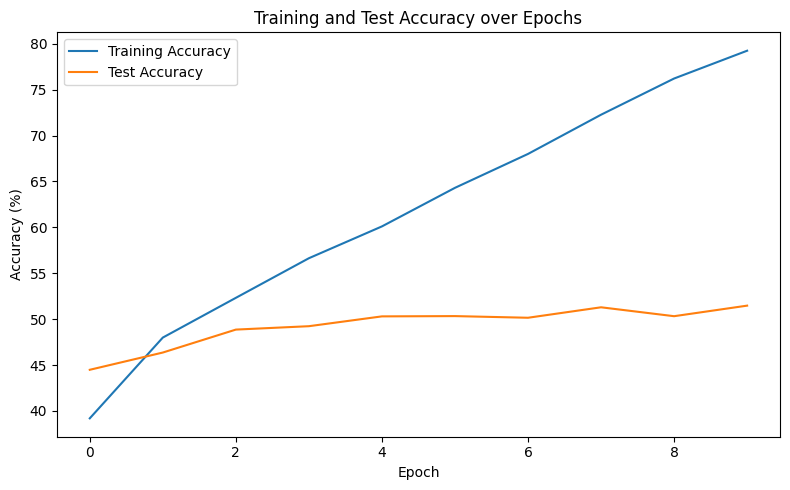

In [24]:
test_accuracies = []
train_accuracies = []
model = FNN(best_hyperparams["hidden_size"])
optimizer = optim.Adam(model.parameters(), lr=best_hyperparams["learning_rate"])
loss_func = nn.CrossEntropyLoss()
train_loader = DataLoader(train_dataset, batch_size=best_hyperparams["batch_size"], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_hyperparams["batch_size"], shuffle=True)

epochs = 10
for epoch in range(epochs):
    epoch += 1
    train_acc, loss_tr = train(model, train_loader, optimizer, loss_func, epoch)
    test_acc = test_eval(model, test_loader, optimizer, loss_func, epoch)
    print(f'Epoch {epoch}: Train Loss: {loss_tr:.3f}, Training Accuracy: {train_acc:.2f} Test Accuracy: {test_acc:.2f}')
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy over Epochs')
plt.legend()
plt.tight_layout()
plt.show()

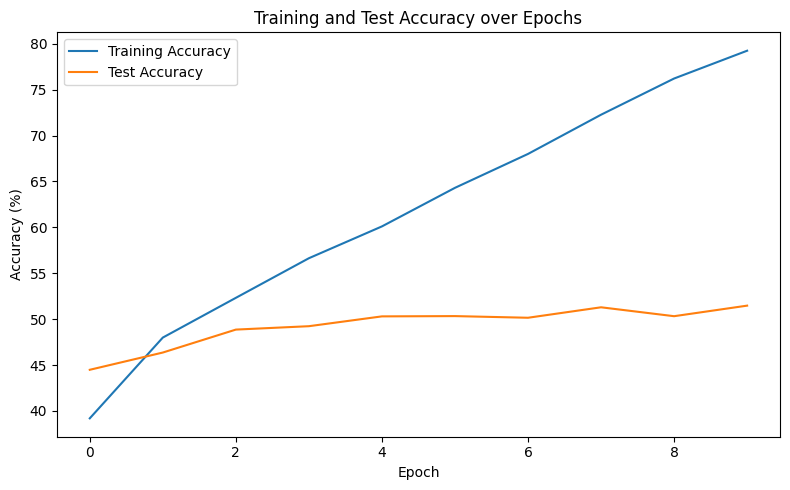

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy over Epochs')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
class FNN_v2(nn.Module):
    def __init__(self, hidden_size, dropout_rate=0.2):
        super().__init__()
        self.hidden1 = nn.Linear(in_features=3 * 32 * 32, out_features=hidden_size[0])
        self.ln1 = nn.LayerNorm(hidden_size[0])
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.hidden2 = nn.Linear(in_features=hidden_size[0], out_features=hidden_size[1])
        self.ln2 = nn.LayerNorm(hidden_size[1])
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.output = nn.Linear(in_features=hidden_size[1], out_features=10)

    def forward(self, inp):
        inp = inp.view(-1, 3 * 32 * 32)  
        inp = self.relu1(self.ln1(self.hidden1(inp)))
        inp = self.dropout1(inp)
        inp = self.relu2(self.ln2(self.hidden2(inp)))
        inp = self.dropout2(inp)
        inp = self.output(inp)
        return inp

In [28]:
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

best_val_acc = 0
best_dropout_rate = None

for dropout_rate in dropout_rates:
    model = FNN_v2(best_hyperparams["hidden_size"], dropout_rate)
    optimizer = optim.Adam(model.parameters(), lr = best_hyperparams["learning_rate"])
    loss_func = nn.CrossEntropyLoss()
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)

    for epoch in range(10):
        train_acc, train_loss = train(model, train_loader, optimizer, loss_func, epoch)
        val_acc, val_loss = val_evaluate(model, val_loader, loss_func)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_dropout_rate = dropout_rate

Train Epoch: 0: Accuracy:0.10546875	Loss: 2.4060018062591553
Train Epoch: 0: Accuracy:0.140625	Loss: 3.1033809185028076
Train Epoch: 0: Accuracy:0.16015625	Loss: 2.810045003890991
Train Epoch: 0: Accuracy:0.1640625	Loss: 2.5354583263397217
Train Epoch: 0: Accuracy:0.18359375	Loss: 2.293203592300415
Train Epoch: 0: Accuracy:0.18359375	Loss: 2.2174172401428223
Train Epoch: 0: Accuracy:0.19196428571428573	Loss: 2.1463444232940674
Train Epoch: 0: Accuracy:0.201171875	Loss: 2.02909779548645
Train Epoch: 0: Accuracy:0.20399305555555555	Loss: 2.0873115062713623
Train Epoch: 0: Accuracy:0.201171875	Loss: 2.0780656337738037
Train Epoch: 0: Accuracy:0.2080965909090909	Loss: 2.056522846221924
Train Epoch: 0: Accuracy:0.21321614583333334	Loss: 1.994244933128357
Train Epoch: 0: Accuracy:0.21604567307692307	Loss: 2.0825793743133545
Train Epoch: 0: Accuracy:0.21791294642857142	Loss: 2.063206434249878
Train Epoch: 0: Accuracy:0.221875	Loss: 2.0358710289001465
Train Epoch: 0: Accuracy:0.228515625	Loss:

Train Epoch: 1: Accuracy:0.4244791666666667	Loss: 1.685827374458313
Train Epoch: 1: Accuracy:0.4252232142857143	Loss: 1.5733184814453125
Train Epoch: 1: Accuracy:0.4326171875	Loss: 1.5298269987106323
Train Epoch: 1: Accuracy:0.4375	Loss: 1.5582656860351562
Train Epoch: 1: Accuracy:0.43828125	Loss: 1.5663551092147827
Train Epoch: 1: Accuracy:0.4328835227272727	Loss: 1.615342617034912
Train Epoch: 1: Accuracy:0.431640625	Loss: 1.5888035297393799
Train Epoch: 1: Accuracy:0.43179086538461536	Loss: 1.5514500141143799
Train Epoch: 1: Accuracy:0.43080357142857145	Loss: 1.5920004844665527
Train Epoch: 1: Accuracy:0.43411458333333336	Loss: 1.5664485692977905
Train Epoch: 1: Accuracy:0.429931640625	Loss: 1.6017171144485474
Train Epoch: 1: Accuracy:0.4280790441176471	Loss: 1.61317777633667
Train Epoch: 1: Accuracy:0.4301215277777778	Loss: 1.511898159980774
Train Epoch: 1: Accuracy:0.43462171052631576	Loss: 1.4435055255889893
Train Epoch: 1: Accuracy:0.4341796875	Loss: 1.6408964395523071
Train Epo

Train Epoch: 2: Accuracy:0.4908854166666667	Loss: 1.3821017742156982
Train Epoch: 2: Accuracy:0.494921875	Loss: 1.3684840202331543
Train Epoch: 2: Accuracy:0.49076704545454547	Loss: 1.4275063276290894
Train Epoch: 2: Accuracy:0.4921875	Loss: 1.3084553480148315
Train Epoch: 2: Accuracy:0.49068509615384615	Loss: 1.4182175397872925
Train Epoch: 2: Accuracy:0.4868861607142857	Loss: 1.4892098903656006
Train Epoch: 2: Accuracy:0.4861979166666667	Loss: 1.4692976474761963
Train Epoch: 2: Accuracy:0.48583984375	Loss: 1.4588675498962402
Train Epoch: 2: Accuracy:0.4836856617647059	Loss: 1.5055114030838013
Train Epoch: 2: Accuracy:0.4852430555555556	Loss: 1.3653340339660645
Train Epoch: 2: Accuracy:0.48519736842105265	Loss: 1.4405535459518433
Train Epoch: 2: Accuracy:0.4861328125	Loss: 1.3246873617172241
Train Epoch: 2: Accuracy:0.4884672619047619	Loss: 1.3625658750534058
Train Epoch: 2: Accuracy:0.4895241477272727	Loss: 1.3882979154586792
Train Epoch: 2: Accuracy:0.48879076086956524	Loss: 1.49744

Train Epoch: 3: Accuracy:0.5491536458333334	Loss: 1.2743505239486694
Train Epoch: 3: Accuracy:0.5477764423076923	Loss: 1.3067073822021484
Train Epoch: 3: Accuracy:0.5482700892857143	Loss: 1.2914358377456665
Train Epoch: 3: Accuracy:0.5471354166666667	Loss: 1.303621530532837
Train Epoch: 3: Accuracy:0.54150390625	Loss: 1.484565019607544
Train Epoch: 3: Accuracy:0.5388327205882353	Loss: 1.364216685295105
Train Epoch: 3: Accuracy:0.5386284722222222	Loss: 1.3813105821609497
Train Epoch: 3: Accuracy:0.5388569078947368	Loss: 1.226888656616211
Train Epoch: 3: Accuracy:0.53671875	Loss: 1.349492073059082
Train Epoch: 3: Accuracy:0.5364583333333334	Loss: 1.2667235136032104
Train Epoch: 3: Accuracy:0.5355113636363636	Loss: 1.313868761062622
Train Epoch: 3: Accuracy:0.5368546195652174	Loss: 1.1854201555252075
Train Epoch: 3: Accuracy:0.5335286458333334	Loss: 1.432016134262085
Train Epoch: 3: Accuracy:0.533125	Loss: 1.3453431129455566
Train Epoch: 3: Accuracy:0.5317007211538461	Loss: 1.331686139106

Train Epoch: 4: Accuracy:0.580322265625	Loss: 1.247140645980835
Train Epoch: 4: Accuracy:0.5845588235294118	Loss: 1.0486847162246704
Train Epoch: 4: Accuracy:0.5822482638888888	Loss: 1.2390226125717163
Train Epoch: 4: Accuracy:0.5824424342105263	Loss: 1.1599475145339966
Train Epoch: 4: Accuracy:0.5798828125	Loss: 1.2608880996704102
Train Epoch: 4: Accuracy:0.57421875	Loss: 1.468048334121704
Train Epoch: 4: Accuracy:0.572265625	Loss: 1.1952087879180908
Train Epoch: 4: Accuracy:0.5713315217391305	Loss: 1.3005074262619019
Train Epoch: 4: Accuracy:0.5711263020833334	Loss: 1.300305962562561
Train Epoch: 4: Accuracy:0.57078125	Loss: 1.2222015857696533
Train Epoch: 4: Accuracy:0.5694110576923077	Loss: 1.1866501569747925
Train Epoch: 4: Accuracy:0.5694444444444444	Loss: 1.1493641138076782
Train Epoch: 4: Accuracy:0.5682198660714286	Loss: 1.3261091709136963
Train Epoch: 4: Accuracy:0.5669450431034483	Loss: 1.3567285537719727
Train Epoch: 4: Accuracy:0.5649739583333333	Loss: 1.3122202157974243
T

Train Epoch: 5: Accuracy:0.592578125	Loss: 1.1270246505737305
Train Epoch: 5: Accuracy:0.58984375	Loss: 1.2019972801208496
Train Epoch: 5: Accuracy:0.5907315340909091	Loss: 1.110148310661316
Train Epoch: 5: Accuracy:0.5913722826086957	Loss: 1.088075876235962
Train Epoch: 5: Accuracy:0.5919596354166666	Loss: 1.0863564014434814
Train Epoch: 5: Accuracy:0.5934375	Loss: 1.0247136354446411
Train Epoch: 5: Accuracy:0.5949519230769231	Loss: 1.1104178428649902
Train Epoch: 5: Accuracy:0.5943287037037037	Loss: 1.1546512842178345
Train Epoch: 5: Accuracy:0.5936104910714286	Loss: 1.1522740125656128
Train Epoch: 5: Accuracy:0.5922683189655172	Loss: 1.2919918298721313
Train Epoch: 5: Accuracy:0.5928385416666667	Loss: 1.0928336381912231
Train Epoch: 5: Accuracy:0.5929939516129032	Loss: 1.1868616342544556
Train Epoch: 5: Accuracy:0.5938720703125	Loss: 1.1391359567642212
Train Epoch: 5: Accuracy:0.5931581439393939	Loss: 1.2734545469284058
Train Epoch: 5: Accuracy:0.5922564338235294	Loss: 1.17452538013

Train Epoch: 6: Accuracy:0.6080729166666666	Loss: 1.0217896699905396
Train Epoch: 6: Accuracy:0.60890625	Loss: 1.0592331886291504
Train Epoch: 6: Accuracy:0.6099759615384616	Loss: 1.053492784500122
Train Epoch: 6: Accuracy:0.6106770833333334	Loss: 1.032572865486145
Train Epoch: 6: Accuracy:0.6114676339285714	Loss: 1.0726264715194702
Train Epoch: 6: Accuracy:0.6128771551724138	Loss: 1.030012845993042
Train Epoch: 6: Accuracy:0.61328125	Loss: 1.098791241645813
Train Epoch: 6: Accuracy:0.6134072580645161	Loss: 1.030638575553894
Train Epoch: 6: Accuracy:0.6129150390625	Loss: 1.073714256286621
Train Epoch: 6: Accuracy:0.6128077651515151	Loss: 1.0654962062835693
Train Epoch: 6: Accuracy:0.6139705882352942	Loss: 1.0258424282073975
Train Epoch: 6: Accuracy:0.61484375	Loss: 1.0811506509780884
Train Epoch: 6: Accuracy:0.6142578125	Loss: 1.117714285850525
Train Epoch: 6: Accuracy:0.6148648648648649	Loss: 0.9700565934181213
Train Epoch: 6: Accuracy:0.6165707236842105	Loss: 0.9391915798187256
Train

Train Epoch: 7: Accuracy:0.65234375	Loss: 0.9731811285018921
Train Epoch: 7: Accuracy:0.6520743534482759	Loss: 0.9844629764556885
Train Epoch: 7: Accuracy:0.651953125	Loss: 0.9697211980819702
Train Epoch: 7: Accuracy:0.6517137096774194	Loss: 0.9495235085487366
Train Epoch: 7: Accuracy:0.651611328125	Loss: 0.9808636903762817
Train Epoch: 7: Accuracy:0.6515151515151515	Loss: 1.0700565576553345
Train Epoch: 7: Accuracy:0.65234375	Loss: 0.9178405404090881
Train Epoch: 7: Accuracy:0.65078125	Loss: 1.1677178144454956
Train Epoch: 7: Accuracy:0.6497395833333334	Loss: 1.0383048057556152
Train Epoch: 7: Accuracy:0.6500211148648649	Loss: 0.9351874589920044
Train Epoch: 7: Accuracy:0.6489514802631579	Loss: 1.1254379749298096
Train Epoch: 7: Accuracy:0.647636217948718	Loss: 1.002434253692627
Train Epoch: 7: Accuracy:0.6478515625	Loss: 0.9987781047821045
Train Epoch: 7: Accuracy:0.6462461890243902	Loss: 1.1738591194152832
Train Epoch: 7: Accuracy:0.6452752976190477	Loss: 1.074610948562622
Train Epo

Train Epoch: 8: Accuracy:0.6873816287878788	Loss: 0.8804610371589661
Train Epoch: 8: Accuracy:0.6849724264705882	Loss: 1.1994295120239258
Train Epoch: 8: Accuracy:0.6842633928571429	Loss: 0.9149946570396423
Train Epoch: 8: Accuracy:0.6840277777777778	Loss: 0.9261928796768188
Train Epoch: 8: Accuracy:0.6834881756756757	Loss: 0.9854397177696228
Train Epoch: 8: Accuracy:0.6836965460526315	Loss: 0.9367135763168335
Train Epoch: 8: Accuracy:0.6833934294871795	Loss: 0.9312365651130676
Train Epoch: 8: Accuracy:0.68359375	Loss: 0.9245915412902832
Train Epoch: 8: Accuracy:0.6829268292682927	Loss: 0.9149647355079651
Train Epoch: 8: Accuracy:0.6817336309523809	Loss: 0.9768202900886536
Train Epoch: 8: Accuracy:0.6805959302325582	Loss: 1.0652235746383667
Train Epoch: 8: Accuracy:0.6806640625	Loss: 0.8618638515472412
Train Epoch: 8: Accuracy:0.6802083333333333	Loss: 0.9491918087005615
Train Epoch: 8: Accuracy:0.6791779891304348	Loss: 1.0095335245132446
Train Epoch: 8: Accuracy:0.678939494680851	Loss:

Train Epoch: 9: Accuracy:0.6942567567567568	Loss: 0.7905430197715759
Train Epoch: 9: Accuracy:0.6954152960526315	Loss: 0.8395906686782837
Train Epoch: 9: Accuracy:0.6959134615384616	Loss: 0.8662952780723572
Train Epoch: 9: Accuracy:0.69619140625	Loss: 0.8128227591514587
Train Epoch: 9: Accuracy:0.6974085365853658	Loss: 0.8629734516143799
Train Epoch: 9: Accuracy:0.6967075892857143	Loss: 0.8832359313964844
Train Epoch: 9: Accuracy:0.6955850290697675	Loss: 0.9676352739334106
Train Epoch: 9: Accuracy:0.6955788352272727	Loss: 0.8205367922782898
Train Epoch: 9: Accuracy:0.6967013888888889	Loss: 0.8640478849411011
Train Epoch: 9: Accuracy:0.6970957880434783	Loss: 0.8356077075004578
Train Epoch: 9: Accuracy:0.6963098404255319	Loss: 0.8640285134315491
Train Epoch: 9: Accuracy:0.69677734375	Loss: 0.8217576146125793
Train Epoch: 9: Accuracy:0.6978635204081632	Loss: 0.7509954571723938
Train Epoch: 9: Accuracy:0.697421875	Loss: 0.9077492356300354
Train Epoch: 9: Accuracy:0.6992953431372549	Loss: 0

Train Epoch: 0: Accuracy:0.27867759146341464	Loss: 1.7601056098937988
Train Epoch: 0: Accuracy:0.28041294642857145	Loss: 1.7687691450119019
Train Epoch: 0: Accuracy:0.2811591569767442	Loss: 1.8669592142105103
Train Epoch: 0: Accuracy:0.2843572443181818	Loss: 1.820585012435913
Train Epoch: 0: Accuracy:0.28506944444444443	Loss: 1.822721004486084
Train Epoch: 0: Accuracy:0.2855808423913043	Loss: 1.8428105115890503
Train Epoch: 0: Accuracy:0.2876496010638298	Loss: 1.7806625366210938
Train Epoch: 0: Accuracy:0.2893880208333333	Loss: 1.7867375612258911
Train Epoch: 0: Accuracy:0.2911352040816326	Loss: 1.755252718925476
Train Epoch: 0: Accuracy:0.2928125	Loss: 1.7763011455535889
Train Epoch: 0: Accuracy:0.2945772058823529	Loss: 1.7592618465423584
Train Epoch: 0: Accuracy:0.29454627403846156	Loss: 1.8463486433029175
Train Epoch: 0: Accuracy:0.2968012971698113	Loss: 1.6924489736557007
Train Epoch: 0: Accuracy:0.2965133101851852	Loss: 1.8171268701553345
Train Epoch: 0: Accuracy:0.298082386363636

Train Epoch: 1: Accuracy:0.4371527777777778	Loss: 1.5056957006454468
Train Epoch: 1: Accuracy:0.4369055706521739	Loss: 1.5997337102890015
Train Epoch: 1: Accuracy:0.4365026595744681	Loss: 1.5825626850128174
Train Epoch: 1: Accuracy:0.4365234375	Loss: 1.5102938413619995
Train Epoch: 1: Accuracy:0.4378188775510204	Loss: 1.4314866065979004
Train Epoch: 1: Accuracy:0.436953125	Loss: 1.5821443796157837
Train Epoch: 1: Accuracy:0.4374234068627451	Loss: 1.5256024599075317
Train Epoch: 1: Accuracy:0.4375	Loss: 1.5108311176300049
Train Epoch: 1: Accuracy:0.4374262971698113	Loss: 1.486505389213562
Train Epoch: 1: Accuracy:0.43677662037037035	Loss: 1.6358455419540405
Train Epoch: 1: Accuracy:0.4362215909090909	Loss: 1.6591688394546509
Train Epoch: 1: Accuracy:0.43603515625	Loss: 1.496080994606018
Train Epoch: 1: Accuracy:0.4369517543859649	Loss: 1.5187939405441284
Train Epoch: 1: Accuracy:0.4358836206896552	Loss: 1.688421607017517
Train Epoch: 1: Accuracy:0.4357123940677966	Loss: 1.57791590690612

Train Epoch: 2: Accuracy:0.4845377604166667	Loss: 1.4272444248199463
Train Epoch: 2: Accuracy:0.4850924744897959	Loss: 1.4354361295700073
Train Epoch: 2: Accuracy:0.48546875	Loss: 1.3415346145629883
Train Epoch: 2: Accuracy:0.4853707107843137	Loss: 1.4135041236877441
Train Epoch: 2: Accuracy:0.4846754807692308	Loss: 1.5268425941467285
Train Epoch: 2: Accuracy:0.48511202830188677	Loss: 1.3659684658050537
Train Epoch: 2: Accuracy:0.4850260416666667	Loss: 1.4305882453918457
Train Epoch: 2: Accuracy:0.48529829545454545	Loss: 1.3281251192092896
Train Epoch: 2: Accuracy:0.4839564732142857	Loss: 1.5061290264129639
Train Epoch: 2: Accuracy:0.48341557017543857	Loss: 1.5326815843582153
Train Epoch: 2: Accuracy:0.48356681034482757	Loss: 1.391976237297058
Train Epoch: 2: Accuracy:0.4832494703389831	Loss: 1.5082470178604126
Train Epoch: 2: Accuracy:0.4827473958333333	Loss: 1.4756395816802979
Train Epoch: 2: Accuracy:0.48290215163934425	Loss: 1.4704680442810059
Train Epoch: 2: Accuracy:0.48317792338

Train Epoch: 3: Accuracy:0.5182542067307693	Loss: 1.28822922706604
Train Epoch: 3: Accuracy:0.5194575471698113	Loss: 1.2701032161712646
Train Epoch: 3: Accuracy:0.5198206018518519	Loss: 1.2811493873596191
Train Epoch: 3: Accuracy:0.5198153409090909	Loss: 1.3665685653686523
Train Epoch: 3: Accuracy:0.5196010044642857	Loss: 1.2789701223373413
Train Epoch: 3: Accuracy:0.520764802631579	Loss: 1.1734566688537598
Train Epoch: 3: Accuracy:0.5212149784482759	Loss: 1.1911848783493042
Train Epoch: 3: Accuracy:0.520656779661017	Loss: 1.3894647359848022
Train Epoch: 3: Accuracy:0.5204427083333333	Loss: 1.449987530708313
Train Epoch: 3: Accuracy:0.5211321721311475	Loss: 1.3147248029708862
Train Epoch: 3: Accuracy:0.5203503024193549	Loss: 1.4188034534454346
Train Epoch: 3: Accuracy:0.5207713293650794	Loss: 1.2710986137390137
Train Epoch: 3: Accuracy:0.52020263671875	Loss: 1.3631006479263306
Train Epoch: 3: Accuracy:0.5203125	Loss: 1.4159961938858032
Train Epoch: 3: Accuracy:0.5216619318181818	Loss: 

Train Epoch: 4: Accuracy:0.5492466517857143	Loss: 1.2607299089431763
Train Epoch: 4: Accuracy:0.5497532894736842	Loss: 1.2091463804244995
Train Epoch: 4: Accuracy:0.5498383620689655	Loss: 1.2060720920562744
Train Epoch: 4: Accuracy:0.5501191737288136	Loss: 1.3076270818710327
Train Epoch: 4: Accuracy:0.5502604166666667	Loss: 1.2723840475082397
Train Epoch: 4: Accuracy:0.5502689549180327	Loss: 1.3293001651763916
Train Epoch: 4: Accuracy:0.5495211693548387	Loss: 1.3381625413894653
Train Epoch: 4: Accuracy:0.5493551587301587	Loss: 1.3188596963882446
Train Epoch: 4: Accuracy:0.54840087890625	Loss: 1.3780934810638428
Train Epoch: 4: Accuracy:0.5477163461538461	Loss: 1.4328206777572632
Train Epoch: 4: Accuracy:0.5471117424242424	Loss: 1.348657488822937
Train Epoch: 4: Accuracy:0.547049906716418	Loss: 1.2465702295303345
Train Epoch: 4: Accuracy:0.5471622242647058	Loss: 1.2438033819198608
Train Epoch: 4: Accuracy:0.5473278985507246	Loss: 1.298712968826294
Train Epoch: 4: Accuracy:0.548493303571

Train Epoch: 5: Accuracy:0.5795572916666667	Loss: 1.1455823183059692
Train Epoch: 5: Accuracy:0.5789574795081968	Loss: 1.2739840745925903
Train Epoch: 5: Accuracy:0.5793220766129032	Loss: 1.1200562715530396
Train Epoch: 5: Accuracy:0.5796130952380952	Loss: 1.1227318048477173
Train Epoch: 5: Accuracy:0.57940673828125	Loss: 1.219987392425537
Train Epoch: 5: Accuracy:0.5784254807692307	Loss: 1.2753446102142334
Train Epoch: 5: Accuracy:0.5788944128787878	Loss: 1.1284016370773315
Train Epoch: 5: Accuracy:0.5783582089552238	Loss: 1.234842300415039
Train Epoch: 5: Accuracy:0.5781824448529411	Loss: 1.2488586902618408
Train Epoch: 5: Accuracy:0.5780683876811594	Loss: 1.284315824508667
Train Epoch: 5: Accuracy:0.5777901785714286	Loss: 1.1218318939208984
Train Epoch: 5: Accuracy:0.577299735915493	Loss: 1.2317168712615967
Train Epoch: 5: Accuracy:0.5773111979166666	Loss: 1.1933434009552002
Train Epoch: 5: Accuracy:0.578125	Loss: 1.0595978498458862
Train Epoch: 5: Accuracy:0.5777027027027027	Loss: 

Train Epoch: 6: Accuracy:0.5970458984375	Loss: 1.2571276426315308
Train Epoch: 6: Accuracy:0.5971754807692308	Loss: 1.1682709455490112
Train Epoch: 6: Accuracy:0.5970643939393939	Loss: 1.1769626140594482
Train Epoch: 6: Accuracy:0.5968983208955224	Loss: 1.18009352684021
Train Epoch: 6: Accuracy:0.5972541360294118	Loss: 1.1077585220336914
Train Epoch: 6: Accuracy:0.5978826992753623	Loss: 1.02397620677948
Train Epoch: 6: Accuracy:0.598046875	Loss: 1.1531832218170166
Train Epoch: 6: Accuracy:0.5984264964788732	Loss: 1.0460857152938843
Train Epoch: 6: Accuracy:0.5979817708333334	Loss: 1.1247344017028809
Train Epoch: 6: Accuracy:0.5973351883561644	Loss: 1.0941978693008423
Train Epoch: 6: Accuracy:0.597339527027027	Loss: 1.1121994256973267
Train Epoch: 6: Accuracy:0.5968229166666666	Loss: 1.1800872087478638
Train Epoch: 6: Accuracy:0.595703125	Loss: 1.2012568712234497
Train Epoch: 6: Accuracy:0.5960328733766234	Loss: 1.2701210975646973
Train Epoch: 6: Accuracy:0.5961037660256411	Loss: 1.0937

Train Epoch: 7: Accuracy:0.6235064338235294	Loss: 1.0663597583770752
Train Epoch: 7: Accuracy:0.6230185688405797	Loss: 1.1981525421142578
Train Epoch: 7: Accuracy:0.6236607142857142	Loss: 0.9101006388664246
Train Epoch: 7: Accuracy:0.6241197183098591	Loss: 0.9747016429901123
Train Epoch: 7: Accuracy:0.6239691840277778	Loss: 1.0500760078430176
Train Epoch: 7: Accuracy:0.624464897260274	Loss: 0.9834381937980652
Train Epoch: 7: Accuracy:0.6244721283783784	Loss: 1.0784610509872437
Train Epoch: 7: Accuracy:0.6244791666666667	Loss: 1.0996454954147339
Train Epoch: 7: Accuracy:0.6250513980263158	Loss: 0.9076462388038635
Train Epoch: 7: Accuracy:0.6248478084415584	Loss: 1.1192858219146729
Train Epoch: 7: Accuracy:0.6246995192307693	Loss: 1.0822478532791138
Train Epoch: 7: Accuracy:0.6249505537974683	Loss: 1.0543166399002075
Train Epoch: 7: Accuracy:0.625048828125	Loss: 1.0684574842453003
Train Epoch: 7: Accuracy:0.6243248456790124	Loss: 1.1998358964920044
Train Epoch: 7: Accuracy:0.623809070121

Train Epoch: 8: Accuracy:0.6439344618055556	Loss: 1.0243099927902222
Train Epoch: 8: Accuracy:0.643728595890411	Loss: 1.0161712169647217
Train Epoch: 8: Accuracy:0.6446368243243243	Loss: 0.8709132671356201
Train Epoch: 8: Accuracy:0.6440104166666667	Loss: 1.128759741783142
Train Epoch: 8: Accuracy:0.64453125	Loss: 0.9687903523445129
Train Epoch: 8: Accuracy:0.6440746753246753	Loss: 1.1083303689956665
Train Epoch: 8: Accuracy:0.6436298076923077	Loss: 1.1115590333938599
Train Epoch: 8: Accuracy:0.6434434335443038	Loss: 1.0170083045959473
Train Epoch: 8: Accuracy:0.64375	Loss: 0.9644101858139038
Train Epoch: 8: Accuracy:0.64453125	Loss: 0.9149214029312134
Train Epoch: 8: Accuracy:0.6443407012195121	Loss: 1.0184693336486816
Train Epoch: 8: Accuracy:0.6446253765060241	Loss: 1.0057158470153809
Train Epoch: 8: Accuracy:0.6446707589285714	Loss: 0.9818239808082581
Train Epoch: 8: Accuracy:0.6442555147058824	Loss: 1.0513447523117065
Train Epoch: 8: Accuracy:0.644031613372093	Loss: 1.038850307464

Train Epoch: 9: Accuracy:0.6678659539473685	Loss: 0.8113793730735779
Train Epoch: 9: Accuracy:0.6686282467532467	Loss: 0.8237738013267517
Train Epoch: 9: Accuracy:0.6691706730769231	Loss: 0.8951528072357178
Train Epoch: 9: Accuracy:0.6692049050632911	Loss: 0.8919650316238403
Train Epoch: 9: Accuracy:0.669140625	Loss: 0.9123970866203308
Train Epoch: 9: Accuracy:0.6689814814814815	Loss: 0.9864427447319031
Train Epoch: 9: Accuracy:0.668873856707317	Loss: 0.9632124304771423
Train Epoch: 9: Accuracy:0.6687217620481928	Loss: 0.9401656985282898
Train Epoch: 9: Accuracy:0.6684802827380952	Loss: 0.949124813079834
Train Epoch: 9: Accuracy:0.6681066176470588	Loss: 1.044490098953247
Train Epoch: 9: Accuracy:0.6688771802325582	Loss: 0.7836549878120422
Train Epoch: 9: Accuracy:0.6682830459770115	Loss: 0.9931342601776123
Train Epoch: 9: Accuracy:0.6683238636363636	Loss: 1.0232537984848022
Train Epoch: 9: Accuracy:0.6686709971910112	Loss: 0.9149459600448608
Train Epoch: 9: Accuracy:0.6687934027777778	

Train Epoch: 0: Accuracy:0.34053599683544306	Loss: 1.6898205280303955
Train Epoch: 0: Accuracy:0.34130859375	Loss: 1.6780623197555542
Train Epoch: 0: Accuracy:0.341820987654321	Loss: 1.7195303440093994
Train Epoch: 0: Accuracy:0.34370236280487804	Loss: 1.5496042966842651
Train Epoch: 0: Accuracy:0.3442206325301205	Loss: 1.7180274724960327
Train Epoch: 0: Accuracy:0.34444754464285715	Loss: 1.7401361465454102
Train Epoch: 0: Accuracy:0.34526654411764707	Loss: 1.6594735383987427
Train Epoch: 0: Accuracy:0.3457939680232558	Loss: 1.6092712879180908
Train Epoch: 0: Accuracy:0.3464439655172414	Loss: 1.5669527053833008
Train Epoch: 0: Accuracy:0.3462801846590909	Loss: 1.790941834449768
Train Epoch: 0: Accuracy:0.34708567415730335	Loss: 1.6071515083312988
Train Epoch: 0: Accuracy:0.34791666666666665	Loss: 1.627882719039917
Train Epoch: 0: Accuracy:0.34860061813186816	Loss: 1.6285499334335327
Train Epoch: 0: Accuracy:0.3493546195652174	Loss: 1.6634856462478638
Train Epoch: 0: Accuracy:0.34996639

Train Epoch: 1: Accuracy:0.4428353658536585	Loss: 1.5916434526443481
Train Epoch: 1: Accuracy:0.4436652861445783	Loss: 1.445950984954834
Train Epoch: 1: Accuracy:0.4439174107142857	Loss: 1.4803694486618042
Train Epoch: 1: Accuracy:0.4439797794117647	Loss: 1.4677797555923462
Train Epoch: 1: Accuracy:0.4441769622093023	Loss: 1.5828971862792969
Train Epoch: 1: Accuracy:0.4441002155172414	Loss: 1.5661900043487549
Train Epoch: 1: Accuracy:0.4442471590909091	Loss: 1.526589274406433
Train Epoch: 1: Accuracy:0.44465414325842695	Loss: 1.544492483139038
Train Epoch: 1: Accuracy:0.4451822916666667	Loss: 1.5083677768707275
Train Epoch: 1: Accuracy:0.4455271291208791	Loss: 1.5267413854599
Train Epoch: 1: Accuracy:0.4450577445652174	Loss: 1.6838263273239136
Train Epoch: 1: Accuracy:0.4451024865591398	Loss: 1.5135174989700317
Train Epoch: 1: Accuracy:0.4447722739361702	Loss: 1.5388014316558838
Train Epoch: 1: Accuracy:0.44453125	Loss: 1.5506548881530762
Train Epoch: 1: Accuracy:0.4444986979166667	Los

Train Epoch: 2: Accuracy:0.48614643895348836	Loss: 1.3391708135604858
Train Epoch: 2: Accuracy:0.48639547413793105	Loss: 1.3406234979629517
Train Epoch: 2: Accuracy:0.4857510653409091	Loss: 1.5143845081329346
Train Epoch: 2: Accuracy:0.4861745084269663	Loss: 1.3901777267456055
Train Epoch: 2: Accuracy:0.4864583333333333	Loss: 1.386691689491272
Train Epoch: 2: Accuracy:0.48682177197802196	Loss: 1.2992252111434937
Train Epoch: 2: Accuracy:0.4864555027173913	Loss: 1.4829479455947876
Train Epoch: 2: Accuracy:0.486307123655914	Loss: 1.495326042175293
Train Epoch: 2: Accuracy:0.486577460106383	Loss: 1.3706785440444946
Train Epoch: 2: Accuracy:0.4861842105263158	Loss: 1.505868673324585
Train Epoch: 2: Accuracy:0.4861653645833333	Loss: 1.4655178785324097
Train Epoch: 2: Accuracy:0.48658988402061853	Loss: 1.3748867511749268
Train Epoch: 2: Accuracy:0.4864078443877551	Loss: 1.4504021406173706
Train Epoch: 2: Accuracy:0.4861111111111111	Loss: 1.4819025993347168
Train Epoch: 2: Accuracy:0.48550781

Train Epoch: 3: Accuracy:0.5101128472222223	Loss: 1.4586296081542969
Train Epoch: 3: Accuracy:0.5108602335164835	Loss: 1.2751200199127197
Train Epoch: 3: Accuracy:0.5109544836956522	Loss: 1.3529446125030518
Train Epoch: 3: Accuracy:0.5106686827956989	Loss: 1.460159182548523
Train Epoch: 3: Accuracy:0.5104720744680851	Loss: 1.3515599966049194
Train Epoch: 3: Accuracy:0.5112664473684211	Loss: 1.224968671798706
Train Epoch: 3: Accuracy:0.5110270182291666	Loss: 1.392666220664978
Train Epoch: 3: Accuracy:0.5112355025773195	Loss: 1.4333984851837158
Train Epoch: 3: Accuracy:0.5116390306122449	Loss: 1.3457688093185425
Train Epoch: 3: Accuracy:0.5116398358585859	Loss: 1.3163151741027832
Train Epoch: 3: Accuracy:0.5115234375	Loss: 1.313738465309143
Train Epoch: 3: Accuracy:0.5116413985148515	Loss: 1.3897267580032349
Train Epoch: 3: Accuracy:0.5114889705882353	Loss: 1.4447880983352661
Train Epoch: 3: Accuracy:0.5110740291262136	Loss: 1.4004597663879395
Train Epoch: 3: Accuracy:0.5107797475961539	

Train Epoch: 4: Accuracy:0.5354471409574468	Loss: 1.3509101867675781
Train Epoch: 4: Accuracy:0.5350328947368421	Loss: 1.288104772567749
Train Epoch: 4: Accuracy:0.5355631510416666	Loss: 1.2161911725997925
Train Epoch: 4: Accuracy:0.535558956185567	Loss: 1.336373209953308
Train Epoch: 4: Accuracy:0.5357940051020408	Loss: 1.251030445098877
Train Epoch: 4: Accuracy:0.5355902777777778	Loss: 1.3616955280303955
Train Epoch: 4: Accuracy:0.53546875	Loss: 1.4260361194610596
Train Epoch: 4: Accuracy:0.5353109529702971	Loss: 1.3125951290130615
Train Epoch: 4: Accuracy:0.5347732843137255	Loss: 1.3880633115768433
Train Epoch: 4: Accuracy:0.534473604368932	Loss: 1.3440181016921997
Train Epoch: 4: Accuracy:0.5343299278846154	Loss: 1.2792510986328125
Train Epoch: 4: Accuracy:0.5346354166666667	Loss: 1.1871678829193115
Train Epoch: 4: Accuracy:0.5345666273584906	Loss: 1.2746219635009766
Train Epoch: 4: Accuracy:0.5344626168224299	Loss: 1.2644798755645752
Train Epoch: 4: Accuracy:0.5345413773148148	Los

Train Epoch: 5: Accuracy:0.5620615433673469	Loss: 1.1517733335494995
Train Epoch: 5: Accuracy:0.5620659722222222	Loss: 1.1832526922225952
Train Epoch: 5: Accuracy:0.5624609375	Loss: 1.20653235912323
Train Epoch: 5: Accuracy:0.5618425123762376	Loss: 1.3366692066192627
Train Epoch: 5: Accuracy:0.5614659926470589	Loss: 1.2311773300170898
Train Epoch: 5: Accuracy:0.5616656553398058	Loss: 1.1507624387741089
Train Epoch: 5: Accuracy:0.5621619591346154	Loss: 1.1288377046585083
Train Epoch: 5: Accuracy:0.5620163690476191	Loss: 1.2573153972625732
Train Epoch: 5: Accuracy:0.5613207547169812	Loss: 1.340322494506836
Train Epoch: 5: Accuracy:0.561258761682243	Loss: 1.3143055438995361
Train Epoch: 5: Accuracy:0.5613064236111112	Loss: 1.3169209957122803
Train Epoch: 5: Accuracy:0.5607439793577982	Loss: 1.4082006216049194
Train Epoch: 5: Accuracy:0.5602272727272727	Loss: 1.2996903657913208
Train Epoch: 5: Accuracy:0.5603181306306306	Loss: 1.196862816810608
Train Epoch: 5: Accuracy:0.5602329799107143	L

Train Epoch: 6: Accuracy:0.5813802083333334	Loss: 1.2160930633544922
Train Epoch: 6: Accuracy:0.5815003033980582	Loss: 1.1504725217819214
Train Epoch: 6: Accuracy:0.5810546875	Loss: 1.233025074005127
Train Epoch: 6: Accuracy:0.5807291666666666	Loss: 1.2667127847671509
Train Epoch: 6: Accuracy:0.5806677476415094	Loss: 1.2951182126998901
Train Epoch: 6: Accuracy:0.580607476635514	Loss: 1.1724907159805298
Train Epoch: 6: Accuracy:0.5800419560185185	Loss: 1.28488028049469
Train Epoch: 6: Accuracy:0.5805260894495413	Loss: 1.1099146604537964
Train Epoch: 6: Accuracy:0.5806818181818182	Loss: 1.0994713306427002
Train Epoch: 6: Accuracy:0.5807643581081081	Loss: 1.1929270029067993
Train Epoch: 6: Accuracy:0.5804617745535714	Loss: 1.324393391609192
Train Epoch: 6: Accuracy:0.5801299778761062	Loss: 1.3422260284423828
Train Epoch: 6: Accuracy:0.5803522478070176	Loss: 1.1466705799102783
Train Epoch: 6: Accuracy:0.5802309782608696	Loss: 1.1936767101287842
Train Epoch: 6: Accuracy:0.5799434267241379	L

Train Epoch: 7: Accuracy:0.593971108490566	Loss: 1.2269372940063477
Train Epoch: 7: Accuracy:0.5936769859813084	Loss: 1.1494020223617554
Train Epoch: 7: Accuracy:0.5932074652777778	Loss: 1.2178690433502197
Train Epoch: 7: Accuracy:0.5932124426605505	Loss: 1.0512923002243042
Train Epoch: 7: Accuracy:0.5926491477272727	Loss: 1.2480157613754272
Train Epoch: 7: Accuracy:0.5922719594594594	Loss: 1.2020580768585205
Train Epoch: 7: Accuracy:0.5923549107142857	Loss: 1.1548683643341064
Train Epoch: 7: Accuracy:0.5923672566371682	Loss: 1.1402392387390137
Train Epoch: 7: Accuracy:0.5925849780701754	Loss: 1.0741022825241089
Train Epoch: 7: Accuracy:0.5925271739130434	Loss: 1.2392313480377197
Train Epoch: 7: Accuracy:0.5928744612068966	Loss: 1.112560749053955
Train Epoch: 7: Accuracy:0.5928151709401709	Loss: 1.0703678131103516
Train Epoch: 7: Accuracy:0.5927333333333333	Loss: 1.1519402265548706
Train Epoch: 8: Accuracy:0.5625	Loss: 1.0962475538253784
Train Epoch: 8: Accuracy:0.59375	Loss: 1.0312803

Train Epoch: 8: Accuracy:0.6134588068181818	Loss: 1.1667083501815796
Train Epoch: 8: Accuracy:0.6133868243243243	Loss: 1.1053149700164795
Train Epoch: 8: Accuracy:0.6128976004464286	Loss: 1.1897987127304077
Train Epoch: 8: Accuracy:0.6128318584070797	Loss: 1.1064679622650146
Train Epoch: 8: Accuracy:0.6123560855263158	Loss: 1.283497929573059
Train Epoch: 8: Accuracy:0.6121603260869565	Loss: 1.1688013076782227
Train Epoch: 8: Accuracy:0.6116648706896551	Loss: 1.1731088161468506
Train Epoch: 8: Accuracy:0.6116786858974359	Loss: 1.048937201499939
Train Epoch: 8: Accuracy:0.6118333333333333	Loss: 0.9187549948692322
Train Epoch: 9: Accuracy:0.671875	Loss: 0.9430063366889954
Train Epoch: 9: Accuracy:0.6328125	Loss: 1.0828747749328613
Train Epoch: 9: Accuracy:0.6484375	Loss: 1.0171338319778442
Train Epoch: 9: Accuracy:0.658203125	Loss: 0.9199383854866028
Train Epoch: 9: Accuracy:0.6609375	Loss: 1.0148438215255737
Train Epoch: 9: Accuracy:0.658203125	Loss: 0.9475598931312561
Train Epoch: 9: Ac

Train Epoch: 9: Accuracy:0.6265285326086957	Loss: 0.9428597688674927
Train Epoch: 9: Accuracy:0.6262459590517241	Loss: 1.0826799869537354
Train Epoch: 9: Accuracy:0.6262686965811965	Loss: 1.1079585552215576
Train Epoch: 9: Accuracy:0.6261333333333333	Loss: 1.1511913537979126
Train Epoch: 0: Accuracy:0.11328125	Loss: 2.457799196243286
Train Epoch: 0: Accuracy:0.1484375	Loss: 2.7924304008483887
Train Epoch: 0: Accuracy:0.16276041666666666	Loss: 2.510049819946289
Train Epoch: 0: Accuracy:0.1865234375	Loss: 2.2967655658721924
Train Epoch: 0: Accuracy:0.18828125	Loss: 2.359278440475464
Train Epoch: 0: Accuracy:0.189453125	Loss: 2.299107789993286
Train Epoch: 0: Accuracy:0.20535714285714285	Loss: 2.0615594387054443
Train Epoch: 0: Accuracy:0.216796875	Loss: 2.0722291469573975
Train Epoch: 0: Accuracy:0.21744791666666666	Loss: 2.053490161895752
Train Epoch: 0: Accuracy:0.216015625	Loss: 2.1021523475646973
Train Epoch: 0: Accuracy:0.22301136363636365	Loss: 2.056762218475342
Train Epoch: 0: Acc

Train Epoch: 0: Accuracy:0.34996666666666665	Loss: 1.7602458000183105
Train Epoch: 1: Accuracy:0.4765625	Loss: 1.4668498039245605
Train Epoch: 1: Accuracy:0.478515625	Loss: 1.4864376783370972
Train Epoch: 1: Accuracy:0.45703125	Loss: 1.610890507698059
Train Epoch: 1: Accuracy:0.4521484375	Loss: 1.7161741256713867
Train Epoch: 1: Accuracy:0.453125	Loss: 1.6230361461639404
Train Epoch: 1: Accuracy:0.455078125	Loss: 1.5774531364440918
Train Epoch: 1: Accuracy:0.44810267857142855	Loss: 1.618695855140686
Train Epoch: 1: Accuracy:0.44921875	Loss: 1.5196198225021362
Train Epoch: 1: Accuracy:0.4466145833333333	Loss: 1.6355180740356445
Train Epoch: 1: Accuracy:0.4453125	Loss: 1.6514813899993896
Train Epoch: 1: Accuracy:0.44140625	Loss: 1.6342254877090454
Train Epoch: 1: Accuracy:0.4368489583333333	Loss: 1.6560301780700684
Train Epoch: 1: Accuracy:0.43810096153846156	Loss: 1.5556458234786987
Train Epoch: 1: Accuracy:0.43722098214285715	Loss: 1.615662693977356
Train Epoch: 1: Accuracy:0.436458333

Train Epoch: 2: Accuracy:0.4599609375	Loss: 1.5679271221160889
Train Epoch: 2: Accuracy:0.465625	Loss: 1.4656778573989868
Train Epoch: 2: Accuracy:0.4752604166666667	Loss: 1.3689990043640137
Train Epoch: 2: Accuracy:0.47377232142857145	Loss: 1.5076595544815063
Train Epoch: 2: Accuracy:0.4736328125	Loss: 1.4692531824111938
Train Epoch: 2: Accuracy:0.4657118055555556	Loss: 1.5603885650634766
Train Epoch: 2: Accuracy:0.467578125	Loss: 1.446993350982666
Train Epoch: 2: Accuracy:0.4676846590909091	Loss: 1.4882479906082153
Train Epoch: 2: Accuracy:0.4680989583333333	Loss: 1.4846174716949463
Train Epoch: 2: Accuracy:0.46664663461538464	Loss: 1.5836416482925415
Train Epoch: 2: Accuracy:0.46568080357142855	Loss: 1.542484164237976
Train Epoch: 2: Accuracy:0.4640625	Loss: 1.494418740272522
Train Epoch: 2: Accuracy:0.46337890625	Loss: 1.526923656463623
Train Epoch: 2: Accuracy:0.46530330882352944	Loss: 1.446941614151001
Train Epoch: 2: Accuracy:0.4654947916666667	Loss: 1.526037573814392
Train Epoc

Train Epoch: 3: Accuracy:0.50439453125	Loss: 1.371243953704834
Train Epoch: 3: Accuracy:0.49609375	Loss: 1.5350096225738525
Train Epoch: 3: Accuracy:0.49609375	Loss: 1.4504637718200684
Train Epoch: 3: Accuracy:0.49467329545454547	Loss: 1.4310057163238525
Train Epoch: 3: Accuracy:0.4899088541666667	Loss: 1.4727894067764282
Train Epoch: 3: Accuracy:0.4933894230769231	Loss: 1.3051702976226807
Train Epoch: 3: Accuracy:0.49776785714285715	Loss: 1.2864480018615723
Train Epoch: 3: Accuracy:0.4979166666666667	Loss: 1.3596113920211792
Train Epoch: 3: Accuracy:0.49658203125	Loss: 1.4121004343032837
Train Epoch: 3: Accuracy:0.4958639705882353	Loss: 1.3485667705535889
Train Epoch: 3: Accuracy:0.4958767361111111	Loss: 1.4828040599822998
Train Epoch: 3: Accuracy:0.4954769736842105	Loss: 1.3682427406311035
Train Epoch: 3: Accuracy:0.4962890625	Loss: 1.3802361488342285
Train Epoch: 3: Accuracy:0.4968377976190476	Loss: 1.336961030960083
Train Epoch: 3: Accuracy:0.498046875	Loss: 1.2817304134368896
Trai

Train Epoch: 4: Accuracy:0.5406901041666666	Loss: 1.2146680355072021
Train Epoch: 4: Accuracy:0.5381610576923077	Loss: 1.2847620248794556
Train Epoch: 4: Accuracy:0.5401785714285714	Loss: 1.2347463369369507
Train Epoch: 4: Accuracy:0.5369791666666667	Loss: 1.3152906894683838
Train Epoch: 4: Accuracy:0.536376953125	Loss: 1.3223412036895752
Train Epoch: 4: Accuracy:0.5342371323529411	Loss: 1.2962095737457275
Train Epoch: 4: Accuracy:0.5349392361111112	Loss: 1.3230631351470947
Train Epoch: 4: Accuracy:0.53125	Loss: 1.3711128234863281
Train Epoch: 4: Accuracy:0.529296875	Loss: 1.4613338708877563
Train Epoch: 4: Accuracy:0.5265997023809523	Loss: 1.4428106546401978
Train Epoch: 4: Accuracy:0.5255681818181818	Loss: 1.2995729446411133
Train Epoch: 4: Accuracy:0.5237771739130435	Loss: 1.416098713874817
Train Epoch: 4: Accuracy:0.5232747395833334	Loss: 1.372328519821167
Train Epoch: 4: Accuracy:0.52390625	Loss: 1.2781113386154175
Train Epoch: 4: Accuracy:0.5234375	Loss: 1.3787205219268799
Train 

Train Epoch: 5: Accuracy:0.5409007352941176	Loss: 1.362779974937439
Train Epoch: 5: Accuracy:0.5407986111111112	Loss: 1.2914167642593384
Train Epoch: 5: Accuracy:0.5388569078947368	Loss: 1.3773446083068848
Train Epoch: 5: Accuracy:0.537109375	Loss: 1.3513884544372559
Train Epoch: 5: Accuracy:0.5353422619047619	Loss: 1.3883167505264282
Train Epoch: 5: Accuracy:0.5335582386363636	Loss: 1.3958795070648193
Train Epoch: 5: Accuracy:0.5363451086956522	Loss: 1.1136033535003662
Train Epoch: 5: Accuracy:0.5372721354166666	Loss: 1.304022192955017
Train Epoch: 5: Accuracy:0.5375	Loss: 1.2518240213394165
Train Epoch: 5: Accuracy:0.5386117788461539	Loss: 1.1847455501556396
Train Epoch: 5: Accuracy:0.5380497685185185	Loss: 1.3496686220169067
Train Epoch: 5: Accuracy:0.5364118303571429	Loss: 1.3639657497406006
Train Epoch: 5: Accuracy:0.5354256465517241	Loss: 1.3349130153656006
Train Epoch: 5: Accuracy:0.5360677083333333	Loss: 1.2814503908157349
Train Epoch: 5: Accuracy:0.5367943548387096	Loss: 1.263

Train Epoch: 6: Accuracy:0.5593377976190477	Loss: 1.208386778831482
Train Epoch: 6: Accuracy:0.5617897727272727	Loss: 1.192695140838623
Train Epoch: 6: Accuracy:0.5619904891304348	Loss: 1.2882606983184814
Train Epoch: 6: Accuracy:0.560546875	Loss: 1.32011079788208
Train Epoch: 6: Accuracy:0.5596875	Loss: 1.270801067352295
Train Epoch: 6: Accuracy:0.55859375	Loss: 1.2575533390045166
Train Epoch: 6: Accuracy:0.5601851851851852	Loss: 1.2003071308135986
Train Epoch: 6: Accuracy:0.5601283482142857	Loss: 1.2652556896209717
Train Epoch: 6: Accuracy:0.5592672413793104	Loss: 1.2169948816299438
Train Epoch: 6: Accuracy:0.5579427083333334	Loss: 1.3999104499816895
Train Epoch: 6: Accuracy:0.5601058467741935	Loss: 1.1439234018325806
Train Epoch: 6: Accuracy:0.5601806640625	Loss: 1.3089128732681274
Train Epoch: 6: Accuracy:0.5600142045454546	Loss: 1.2088639736175537
Train Epoch: 6: Accuracy:0.5593979779411765	Loss: 1.3543885946273804
Train Epoch: 6: Accuracy:0.5603794642857143	Loss: 1.19673538208007

Train Epoch: 7: Accuracy:0.5680588942307693	Loss: 1.2388554811477661
Train Epoch: 7: Accuracy:0.5678530092592593	Loss: 1.241889238357544
Train Epoch: 7: Accuracy:0.568359375	Loss: 1.124624490737915
Train Epoch: 7: Accuracy:0.568426724137931	Loss: 1.1864951848983765
Train Epoch: 7: Accuracy:0.569140625	Loss: 1.1627024412155151
Train Epoch: 7: Accuracy:0.5689264112903226	Loss: 1.1730281114578247
Train Epoch: 7: Accuracy:0.570556640625	Loss: 1.1402469873428345
Train Epoch: 7: Accuracy:0.5710227272727273	Loss: 1.1649608612060547
Train Epoch: 7: Accuracy:0.5716911764705882	Loss: 1.141477346420288
Train Epoch: 7: Accuracy:0.5706473214285714	Loss: 1.2813447713851929
Train Epoch: 7: Accuracy:0.5697699652777778	Loss: 1.2120392322540283
Train Epoch: 7: Accuracy:0.5705236486486487	Loss: 1.1978071928024292
Train Epoch: 7: Accuracy:0.5724712171052632	Loss: 1.1119946241378784
Train Epoch: 7: Accuracy:0.5721153846153846	Loss: 1.3206950426101685
Train Epoch: 7: Accuracy:0.5716796875	Loss: 1.2139248847

Train Epoch: 8: Accuracy:0.582421875	Loss: 1.32101309299469
Train Epoch: 8: Accuracy:0.5831653225806451	Loss: 1.1765968799591064
Train Epoch: 8: Accuracy:0.5816650390625	Loss: 1.280672550201416
Train Epoch: 8: Accuracy:0.5804924242424242	Loss: 1.2431873083114624
Train Epoch: 8: Accuracy:0.5812270220588235	Loss: 1.1672877073287964
Train Epoch: 8: Accuracy:0.5816964285714286	Loss: 1.1770118474960327
Train Epoch: 8: Accuracy:0.5824652777777778	Loss: 1.0387184619903564
Train Epoch: 8: Accuracy:0.5813978040540541	Loss: 1.2249492406845093
Train Epoch: 8: Accuracy:0.5797697368421053	Loss: 1.238635540008545
Train Epoch: 8: Accuracy:0.5799278846153846	Loss: 1.2114543914794922
Train Epoch: 8: Accuracy:0.5802734375	Loss: 1.1426407098770142
Train Epoch: 8: Accuracy:0.5802210365853658	Loss: 1.1751923561096191
Train Epoch: 8: Accuracy:0.5797991071428571	Loss: 1.1659138202667236
Train Epoch: 8: Accuracy:0.5793968023255814	Loss: 1.1406322717666626
Train Epoch: 8: Accuracy:0.5788352272727273	Loss: 1.19

Train Epoch: 9: Accuracy:0.5867417279411765	Loss: 1.0690886974334717
Train Epoch: 9: Accuracy:0.5881696428571429	Loss: 1.0927680730819702
Train Epoch: 9: Accuracy:0.5896267361111112	Loss: 1.0717719793319702
Train Epoch: 9: Accuracy:0.5883657094594594	Loss: 1.1997114419937134
Train Epoch: 9: Accuracy:0.5890213815789473	Loss: 1.0704970359802246
Train Epoch: 9: Accuracy:0.5887419871794872	Loss: 1.1147266626358032
Train Epoch: 9: Accuracy:0.58779296875	Loss: 1.2520067691802979
Train Epoch: 9: Accuracy:0.5885099085365854	Loss: 1.1262966394424438
Train Epoch: 9: Accuracy:0.5883556547619048	Loss: 1.1901997327804565
Train Epoch: 9: Accuracy:0.587390988372093	Loss: 1.2760164737701416
Train Epoch: 9: Accuracy:0.5875355113636364	Loss: 1.0960211753845215
Train Epoch: 9: Accuracy:0.5881944444444445	Loss: 1.166720986366272
Train Epoch: 9: Accuracy:0.5889096467391305	Loss: 1.1699248552322388
Train Epoch: 9: Accuracy:0.5900099734042553	Loss: 1.0878793001174927
Train Epoch: 9: Accuracy:0.591064453125	L

Train Epoch: 0: Accuracy:0.26089638157894735	Loss: 1.9329426288604736
Train Epoch: 0: Accuracy:0.26151842948717946	Loss: 1.8732465505599976
Train Epoch: 0: Accuracy:0.262109375	Loss: 1.9630876779556274
Train Epoch: 0: Accuracy:0.2658155487804878	Loss: 1.7683813571929932
Train Epoch: 0: Accuracy:0.26785714285714285	Loss: 1.7311224937438965
Train Epoch: 0: Accuracy:0.26971293604651164	Loss: 1.9139444828033447
Train Epoch: 0: Accuracy:0.2713955965909091	Loss: 1.8049113750457764
Train Epoch: 0: Accuracy:0.2725694444444444	Loss: 1.8532664775848389
Train Epoch: 0: Accuracy:0.274711277173913	Loss: 1.8494364023208618
Train Epoch: 0: Accuracy:0.2750166223404255	Loss: 1.905532717704773
Train Epoch: 0: Accuracy:0.2760416666666667	Loss: 1.831788182258606
Train Epoch: 0: Accuracy:0.2775829081632653	Loss: 1.8367983102798462
Train Epoch: 0: Accuracy:0.27984375	Loss: 1.7377920150756836
Train Epoch: 0: Accuracy:0.2809436274509804	Loss: 1.8640300035476685
Train Epoch: 0: Accuracy:0.28125	Loss: 1.8469030

Train Epoch: 1: Accuracy:0.41253810975609756	Loss: 1.5477573871612549
Train Epoch: 1: Accuracy:0.4135044642857143	Loss: 1.5461961030960083
Train Epoch: 1: Accuracy:0.41433502906976744	Loss: 1.5457574129104614
Train Epoch: 1: Accuracy:0.4148615056818182	Loss: 1.5614012479782104
Train Epoch: 1: Accuracy:0.4144965277777778	Loss: 1.6978905200958252
Train Epoch: 1: Accuracy:0.41567595108695654	Loss: 1.4634701013565063
Train Epoch: 1: Accuracy:0.41597406914893614	Loss: 1.5854514837265015
Train Epoch: 1: Accuracy:0.415771484375	Loss: 1.7284355163574219
Train Epoch: 1: Accuracy:0.41685267857142855	Loss: 1.5188817977905273
Train Epoch: 1: Accuracy:0.41671875	Loss: 1.6598094701766968
Train Epoch: 1: Accuracy:0.41712622549019607	Loss: 1.549213171005249
Train Epoch: 1: Accuracy:0.4172175480769231	Loss: 1.616247534751892
Train Epoch: 1: Accuracy:0.4178950471698113	Loss: 1.54135262966156
Train Epoch: 1: Accuracy:0.41825810185185186	Loss: 1.5741729736328125
Train Epoch: 1: Accuracy:0.4183948863636363

Train Epoch: 2: Accuracy:0.45543323863636365	Loss: 1.435990571975708
Train Epoch: 2: Accuracy:0.45598958333333334	Loss: 1.3903415203094482
Train Epoch: 2: Accuracy:0.4561820652173913	Loss: 1.5056533813476562
Train Epoch: 2: Accuracy:0.4560339095744681	Loss: 1.4346797466278076
Train Epoch: 2: Accuracy:0.4549153645833333	Loss: 1.6674847602844238
Train Epoch: 2: Accuracy:0.45479910714285715	Loss: 1.5795445442199707
Train Epoch: 2: Accuracy:0.45515625	Loss: 1.4959477186203003
Train Epoch: 2: Accuracy:0.45511642156862747	Loss: 1.4974074363708496
Train Epoch: 2: Accuracy:0.45552884615384615	Loss: 1.499931812286377
Train Epoch: 2: Accuracy:0.4563679245283019	Loss: 1.4478857517242432
Train Epoch: 2: Accuracy:0.4572482638888889	Loss: 1.496256947517395
Train Epoch: 2: Accuracy:0.45717329545454544	Loss: 1.438767910003662
Train Epoch: 2: Accuracy:0.45682198660714285	Loss: 1.47877037525177
Train Epoch: 2: Accuracy:0.4563459429824561	Loss: 1.5220139026641846
Train Epoch: 2: Accuracy:0.45514547413793

Train Epoch: 3: Accuracy:0.4784342447916667	Loss: 1.4293835163116455
Train Epoch: 3: Accuracy:0.47775829081632654	Loss: 1.5190290212631226
Train Epoch: 3: Accuracy:0.477265625	Loss: 1.4910699129104614
Train Epoch: 3: Accuracy:0.47640931372549017	Loss: 1.5718424320220947
Train Epoch: 3: Accuracy:0.4773137019230769	Loss: 1.3524014949798584
Train Epoch: 3: Accuracy:0.4779628537735849	Loss: 1.4085181951522827
Train Epoch: 3: Accuracy:0.4789496527777778	Loss: 1.3637982606887817
Train Epoch: 3: Accuracy:0.4792613636363636	Loss: 1.4453116655349731
Train Epoch: 3: Accuracy:0.478515625	Loss: 1.5742343664169312
Train Epoch: 3: Accuracy:0.4785498903508772	Loss: 1.4591460227966309
Train Epoch: 3: Accuracy:0.4788523706896552	Loss: 1.4381577968597412
Train Epoch: 3: Accuracy:0.4792108050847458	Loss: 1.4564718008041382
Train Epoch: 3: Accuracy:0.4791015625	Loss: 1.4535586833953857
Train Epoch: 3: Accuracy:0.4792520491803279	Loss: 1.5143671035766602
Train Epoch: 3: Accuracy:0.4798387096774194	Loss: 1.

Train Epoch: 4: Accuracy:0.5033700980392157	Loss: 1.3506349325180054
Train Epoch: 4: Accuracy:0.5024038461538461	Loss: 1.4368644952774048
Train Epoch: 4: Accuracy:0.5030218160377359	Loss: 1.3292908668518066
Train Epoch: 4: Accuracy:0.5035445601851852	Loss: 1.2923297882080078
Train Epoch: 4: Accuracy:0.5035511363636364	Loss: 1.4690064191818237
Train Epoch: 4: Accuracy:0.5038364955357143	Loss: 1.460749864578247
Train Epoch: 4: Accuracy:0.5032209429824561	Loss: 1.3924541473388672
Train Epoch: 4: Accuracy:0.5017510775862069	Loss: 1.5396997928619385
Train Epoch: 4: Accuracy:0.5017876059322034	Loss: 1.4092926979064941
Train Epoch: 4: Accuracy:0.5013020833333334	Loss: 1.441704273223877
Train Epoch: 4: Accuracy:0.5008965163934426	Loss: 1.3866983652114868
Train Epoch: 4: Accuracy:0.5008820564516129	Loss: 1.3570278882980347
Train Epoch: 4: Accuracy:0.5003100198412699	Loss: 1.4867192506790161
Train Epoch: 4: Accuracy:0.5	Loss: 1.3567367792129517
Train Epoch: 4: Accuracy:0.5001201923076923	Loss: 1

Train Epoch: 5: Accuracy:0.5132102272727272	Loss: 1.3765811920166016
Train Epoch: 5: Accuracy:0.5129743303571429	Loss: 1.426816701889038
Train Epoch: 5: Accuracy:0.5128837719298246	Loss: 1.3350228071212769
Train Epoch: 5: Accuracy:0.5115840517241379	Loss: 1.4948817491531372
Train Epoch: 5: Accuracy:0.5113877118644068	Loss: 1.3080775737762451
Train Epoch: 5: Accuracy:0.5118489583333333	Loss: 1.322094202041626
Train Epoch: 5: Accuracy:0.5114626024590164	Loss: 1.376515507698059
Train Epoch: 5: Accuracy:0.51171875	Loss: 1.3118739128112793
Train Epoch: 5: Accuracy:0.511656746031746	Loss: 1.3366611003875732
Train Epoch: 5: Accuracy:0.51141357421875	Loss: 1.44376540184021
Train Epoch: 5: Accuracy:0.5112379807692308	Loss: 1.353403925895691
Train Epoch: 5: Accuracy:0.5118371212121212	Loss: 1.2869826555252075
Train Epoch: 5: Accuracy:0.511777052238806	Loss: 1.3640894889831543
Train Epoch: 5: Accuracy:0.5115464154411765	Loss: 1.3382083177566528
Train Epoch: 5: Accuracy:0.5117753623188406	Loss: 1.

Train Epoch: 6: Accuracy:0.5336334745762712	Loss: 1.2848292589187622
Train Epoch: 6: Accuracy:0.5333333333333333	Loss: 1.321428656578064
Train Epoch: 6: Accuracy:0.5336193647540983	Loss: 1.3264282941818237
Train Epoch: 6: Accuracy:0.533203125	Loss: 1.351212739944458
Train Epoch: 6: Accuracy:0.5328621031746031	Loss: 1.4237502813339233
Train Epoch: 6: Accuracy:0.533447265625	Loss: 1.3933589458465576
Train Epoch: 6: Accuracy:0.5328725961538462	Loss: 1.3709447383880615
Train Epoch: 6: Accuracy:0.5326112689393939	Loss: 1.369691252708435
Train Epoch: 6: Accuracy:0.5317747201492538	Loss: 1.4484586715698242
Train Epoch: 6: Accuracy:0.5314223345588235	Loss: 1.3463672399520874
Train Epoch: 6: Accuracy:0.5313066123188406	Loss: 1.4199247360229492
Train Epoch: 6: Accuracy:0.5315290178571429	Loss: 1.266404151916504
Train Epoch: 6: Accuracy:0.5310299295774648	Loss: 1.3528317213058472
Train Epoch: 6: Accuracy:0.5294053819444444	Loss: 1.4480401277542114
Train Epoch: 6: Accuracy:0.5291095890410958	Loss:

Train Epoch: 7: Accuracy:0.5420386904761905	Loss: 1.2709379196166992
Train Epoch: 7: Accuracy:0.54205322265625	Loss: 1.3129113912582397
Train Epoch: 7: Accuracy:0.5423677884615384	Loss: 1.1897008419036865
Train Epoch: 7: Accuracy:0.5417258522727273	Loss: 1.2625995874404907
Train Epoch: 7: Accuracy:0.5413362873134329	Loss: 1.3949395418167114
Train Epoch: 7: Accuracy:0.5411305147058824	Loss: 1.3000710010528564
Train Epoch: 7: Accuracy:0.5413269927536232	Loss: 1.2327120304107666
Train Epoch: 7: Accuracy:0.5404575892857143	Loss: 1.3625304698944092
Train Epoch: 7: Accuracy:0.5403279049295775	Loss: 1.345953106880188
Train Epoch: 7: Accuracy:0.5404188368055556	Loss: 1.2774628400802612
Train Epoch: 7: Accuracy:0.540667808219178	Loss: 1.2750080823898315
Train Epoch: 7: Accuracy:0.5405933277027027	Loss: 1.2751628160476685
Train Epoch: 7: Accuracy:0.5408333333333334	Loss: 1.2464065551757812
Train Epoch: 7: Accuracy:0.5410670230263158	Loss: 1.3764870166778564
Train Epoch: 7: Accuracy:0.54043222402

Train Epoch: 8: Accuracy:0.5504897388059702	Loss: 1.3191571235656738
Train Epoch: 8: Accuracy:0.5500344669117647	Loss: 1.3177828788757324
Train Epoch: 8: Accuracy:0.5504415760869565	Loss: 1.1816740036010742
Train Epoch: 8: Accuracy:0.5494977678571429	Loss: 1.3395543098449707
Train Epoch: 8: Accuracy:0.5496258802816901	Loss: 1.1950451135635376
Train Epoch: 8: Accuracy:0.5495876736111112	Loss: 1.2532358169555664
Train Epoch: 8: Accuracy:0.5503531678082192	Loss: 1.1434355974197388
Train Epoch: 8: Accuracy:0.5506228885135135	Loss: 1.1663540601730347
Train Epoch: 8: Accuracy:0.55109375	Loss: 1.2648022174835205
Train Epoch: 8: Accuracy:0.5510896381578947	Loss: 1.2873905897140503
Train Epoch: 8: Accuracy:0.5518973214285714	Loss: 1.1485166549682617
Train Epoch: 8: Accuracy:0.5519831730769231	Loss: 1.2702561616897583
Train Epoch: 8: Accuracy:0.5525118670886076	Loss: 1.288840889930725
Train Epoch: 8: Accuracy:0.552294921875	Loss: 1.343933343887329
Train Epoch: 8: Accuracy:0.5519868827160493	Loss

Train Epoch: 9: Accuracy:0.5635453345070423	Loss: 1.2735249996185303
Train Epoch: 9: Accuracy:0.5637478298611112	Loss: 1.2032514810562134
Train Epoch: 9: Accuracy:0.5628745719178082	Loss: 1.309180498123169
Train Epoch: 9: Accuracy:0.5625	Loss: 1.2700419425964355
Train Epoch: 9: Accuracy:0.5622916666666666	Loss: 1.2731796503067017
Train Epoch: 9: Accuracy:0.5625513980263158	Loss: 1.306939959526062
Train Epoch: 9: Accuracy:0.5624492694805194	Loss: 1.2364014387130737
Train Epoch: 9: Accuracy:0.5620993589743589	Loss: 1.3316375017166138
Train Epoch: 9: Accuracy:0.5623022151898734	Loss: 1.2012444734573364
Train Epoch: 9: Accuracy:0.562255859375	Loss: 1.2812155485153198
Train Epoch: 9: Accuracy:0.5627893518518519	Loss: 1.1224660873413086
Train Epoch: 9: Accuracy:0.5630716463414634	Loss: 1.2482647895812988
Train Epoch: 9: Accuracy:0.5629706325301205	Loss: 1.2426518201828003
Train Epoch: 9: Accuracy:0.5624069940476191	Loss: 1.3035404682159424
Train Epoch: 9: Accuracy:0.5622702205882353	Loss: 1.

In [29]:
print(f'Best drop out rate is {best_dropout_rate}')

Best drop out rate is 0.4


In [7]:
test_accuracies = []
train_accuracies = []
model = FNN_v2((2048, 1024), 0.4)
optimizer = optim.Adam(model.parameters(), lr=.001)
loss_func = nn.CrossEntropyLoss()
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=True)

epochs = 10
for epoch in range(epochs):
    epoch += 1
    train_acc, loss_tr = train(model, train_loader, optimizer, loss_func, epoch)
    test_acc = test_eval(model, test_loader, optimizer, loss_func, epoch)
    print(f'Epoch {epoch}: Train Loss: {loss_tr:.3f}, Training Accuracy: {train_acc:.2f} Test Accuracy: {test_acc:.2f}')
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

Train Epoch: 1: Accuracy:0.0859375	Loss: 2.4359753131866455
Train Epoch: 1: Accuracy:0.138671875	Loss: 2.8411271572113037
Train Epoch: 1: Accuracy:0.16015625	Loss: 2.6928675174713135
Train Epoch: 1: Accuracy:0.1669921875	Loss: 2.353590250015259
Train Epoch: 1: Accuracy:0.1734375	Loss: 2.189319133758545
Train Epoch: 1: Accuracy:0.18489583333333334	Loss: 2.112305164337158
Train Epoch: 1: Accuracy:0.18694196428571427	Loss: 2.263866424560547
Train Epoch: 1: Accuracy:0.1904296875	Loss: 2.148815155029297
Train Epoch: 1: Accuracy:0.19618055555555555	Loss: 2.0696849822998047
Train Epoch: 1: Accuracy:0.203125	Loss: 2.0728349685668945
Train Epoch: 1: Accuracy:0.20561079545454544	Loss: 2.077244758605957
Train Epoch: 1: Accuracy:0.2119140625	Loss: 1.9987852573394775
Train Epoch: 1: Accuracy:0.21574519230769232	Loss: 2.0529026985168457
Train Epoch: 1: Accuracy:0.22126116071428573	Loss: 2.0073726177215576
Train Epoch: 1: Accuracy:0.22682291666666668	Loss: 1.9300087690353394
Train Epoch: 1: Accuracy:

Test Epoch: 1: Accuracy:0.42578125
Test Epoch: 1: Accuracy:0.4301215277777778
Test Epoch: 1: Accuracy:0.430078125
Test Epoch: 1: Accuracy:0.43714488636363635
Test Epoch: 1: Accuracy:0.4342447916666667
Test Epoch: 1: Accuracy:0.43209134615384615
Test Epoch: 1: Accuracy:0.42801339285714285
Test Epoch: 1: Accuracy:0.4278645833333333
Test Epoch: 1: Accuracy:0.42578125
Test Epoch: 1: Accuracy:0.4264705882352941
Test Epoch: 1: Accuracy:0.4240451388888889
Test Epoch: 1: Accuracy:0.42557565789473684
Test Epoch: 1: Accuracy:0.4228515625
Test Epoch: 1: Accuracy:0.42280505952380953
Test Epoch: 1: Accuracy:0.4216974431818182
Test Epoch: 1: Accuracy:0.42085597826086957
Test Epoch: 1: Accuracy:0.42041015625
Test Epoch: 1: Accuracy:0.420625
Test Epoch: 1: Accuracy:0.4227764423076923
Test Epoch: 1: Accuracy:0.42375578703703703
Test Epoch: 1: Accuracy:0.42410714285714285
Test Epoch: 1: Accuracy:0.42564655172413796
Test Epoch: 1: Accuracy:0.42434895833333336
Test Epoch: 1: Accuracy:0.42263104838709675
T

Train Epoch: 2: Accuracy:0.43390315594059403	Loss: 1.5200598239898682
Train Epoch: 2: Accuracy:0.43401501225490197	Loss: 1.5676692724227905
Train Epoch: 2: Accuracy:0.43412469660194175	Loss: 1.5774189233779907
Train Epoch: 2: Accuracy:0.4343073918269231	Loss: 1.5609288215637207
Train Epoch: 2: Accuracy:0.43456101190476193	Loss: 1.4494024515151978
Train Epoch: 2: Accuracy:0.4344413325471698	Loss: 1.5462450981140137
Train Epoch: 2: Accuracy:0.4349080023364486	Loss: 1.5194984674453735
Train Epoch: 2: Accuracy:0.43525752314814814	Loss: 1.4906787872314453
Train Epoch: 2: Accuracy:0.4353497706422018	Loss: 1.5749483108520508
Train Epoch: 2: Accuracy:0.43590198863636365	Loss: 1.4237545728683472
Train Epoch: 2: Accuracy:0.43612753378378377	Loss: 1.4914273023605347
Train Epoch: 2: Accuracy:0.43600027901785715	Loss: 1.6089595556259155
Train Epoch: 2: Accuracy:0.4362209623893805	Loss: 1.5123569965362549
Train Epoch: 2: Accuracy:0.43640350877192985	Loss: 1.5946098566055298
Train Epoch: 2: Accuracy:

Train Epoch: 3: Accuracy:0.47033227848101267	Loss: 1.5335240364074707
Train Epoch: 3: Accuracy:0.47080078125	Loss: 1.429281234741211
Train Epoch: 3: Accuracy:0.4704861111111111	Loss: 1.473921775817871
Train Epoch: 3: Accuracy:0.4704173018292683	Loss: 1.5785088539123535
Train Epoch: 3: Accuracy:0.4704913403614458	Loss: 1.4393419027328491
Train Epoch: 3: Accuracy:0.470703125	Loss: 1.4868168830871582
Train Epoch: 3: Accuracy:0.4707720588235294	Loss: 1.4557262659072876
Train Epoch: 3: Accuracy:0.4707485465116279	Loss: 1.4685547351837158
Train Epoch: 3: Accuracy:0.47086027298850575	Loss: 1.5179755687713623
Train Epoch: 3: Accuracy:0.4714133522727273	Loss: 1.3743250370025635
Train Epoch: 3: Accuracy:0.47155898876404495	Loss: 1.4678547382354736
Train Epoch: 3: Accuracy:0.4716579861111111	Loss: 1.4587801694869995
Train Epoch: 3: Accuracy:0.47132554945054944	Loss: 1.48569917678833
Train Epoch: 3: Accuracy:0.47091542119565216	Loss: 1.5344626903533936
Train Epoch: 3: Accuracy:0.47122815860215056	

Train Epoch: 4: Accuracy:0.4886179956896552	Loss: 1.4255807399749756
Train Epoch: 4: Accuracy:0.4885460805084746	Loss: 1.4192286729812622
Train Epoch: 4: Accuracy:0.4889322916666667	Loss: 1.3761558532714844
Train Epoch: 4: Accuracy:0.48988217213114754	Loss: 1.3624156713485718
Train Epoch: 4: Accuracy:0.4908644153225806	Loss: 1.309550404548645
Train Epoch: 4: Accuracy:0.4905753968253968	Loss: 1.4441252946853638
Train Epoch: 4: Accuracy:0.491455078125	Loss: 1.2901630401611328
Train Epoch: 4: Accuracy:0.4924879807692308	Loss: 1.3595290184020996
Train Epoch: 4: Accuracy:0.4933120265151515	Loss: 1.2735636234283447
Train Epoch: 4: Accuracy:0.49323694029850745	Loss: 1.3959790468215942
Train Epoch: 4: Accuracy:0.4931640625	Loss: 1.3620978593826294
Train Epoch: 4: Accuracy:0.4927536231884058	Loss: 1.5304113626480103
Train Epoch: 4: Accuracy:0.4919642857142857	Loss: 1.4922327995300293
Train Epoch: 4: Accuracy:0.49235255281690143	Loss: 1.4084196090698242
Train Epoch: 4: Accuracy:0.492296006944444

Train Epoch: 5: Accuracy:0.5216427364864865	Loss: 1.2483400106430054
Train Epoch: 5: Accuracy:0.5219983552631579	Loss: 1.3277651071548462
Train Epoch: 5: Accuracy:0.5210336538461539	Loss: 1.4660853147506714
Train Epoch: 5: Accuracy:0.52294921875	Loss: 1.214599847793579
Train Epoch: 5: Accuracy:0.5221989329268293	Loss: 1.4161310195922852
Train Epoch: 5: Accuracy:0.5209263392857143	Loss: 1.4773164987564087
Train Epoch: 5: Accuracy:0.5210755813953488	Loss: 1.308925986289978
Train Epoch: 5: Accuracy:0.5207741477272727	Loss: 1.423593521118164
Train Epoch: 5: Accuracy:0.5196180555555555	Loss: 1.367522954940796
Train Epoch: 5: Accuracy:0.5185122282608695	Loss: 1.3404263257980347
Train Epoch: 5: Accuracy:0.5187001329787234	Loss: 1.2601921558380127
Train Epoch: 5: Accuracy:0.51806640625	Loss: 1.446203351020813
Train Epoch: 5: Accuracy:0.5184948979591837	Loss: 1.315285563468933
Train Epoch: 5: Accuracy:0.5175	Loss: 1.4900250434875488
Train Epoch: 5: Accuracy:0.5176164215686274	Loss: 1.3388855457

Train Epoch: 6: Accuracy:0.53955078125	Loss: 1.2874330282211304
Train Epoch: 6: Accuracy:0.5383731617647058	Loss: 1.2130197286605835
Train Epoch: 6: Accuracy:0.541015625	Loss: 1.1710067987442017
Train Epoch: 6: Accuracy:0.5421463815789473	Loss: 1.2291911840438843
Train Epoch: 6: Accuracy:0.5390625	Loss: 1.322799801826477
Train Epoch: 6: Accuracy:0.5403645833333334	Loss: 1.147234320640564
Train Epoch: 6: Accuracy:0.5403053977272727	Loss: 1.2817392349243164
Train Epoch: 6: Accuracy:0.5383831521739131	Loss: 1.3901643753051758
Train Epoch: 6: Accuracy:0.5377604166666666	Loss: 1.374218463897705
Train Epoch: 6: Accuracy:0.53890625	Loss: 1.1922858953475952
Train Epoch: 6: Accuracy:0.5387620192307693	Loss: 1.3215447664260864
Train Epoch: 6: Accuracy:0.5383391203703703	Loss: 1.3004226684570312
Train Epoch: 6: Accuracy:0.5380859375	Loss: 1.3243939876556396
Train Epoch: 6: Accuracy:0.5390625	Loss: 1.244895339012146
Train Epoch: 6: Accuracy:0.5399739583333333	Loss: 1.2125931978225708
Train Epoch: 

Test Epoch: 6: Accuracy:0.517578125
Test Epoch: 6: Accuracy:0.5169270833333334
Test Epoch: 6: Accuracy:0.5160845588235294
Test Epoch: 6: Accuracy:0.5172991071428571
Test Epoch: 6: Accuracy:0.5167100694444444
Test Epoch: 6: Accuracy:0.5171030405405406
Test Epoch: 6: Accuracy:0.5162417763157895
Test Epoch: 6: Accuracy:0.5157251602564102
Test Epoch: 6: Accuracy:0.5155
Epoch 6: Train Loss: 1.297, Training Accuracy: 53.58 Test Accuracy: 51.55
Train Epoch: 7: Accuracy:0.54296875	Loss: 1.2100138664245605
Train Epoch: 7: Accuracy:0.578125	Loss: 1.1252719163894653
Train Epoch: 7: Accuracy:0.5611979166666666	Loss: 1.3062636852264404
Train Epoch: 7: Accuracy:0.552734375	Loss: 1.3067020177841187
Train Epoch: 7: Accuracy:0.54296875	Loss: 1.336890459060669
Train Epoch: 7: Accuracy:0.5345052083333334	Loss: 1.325194239616394
Train Epoch: 7: Accuracy:0.5396205357142857	Loss: 1.2511231899261475
Train Epoch: 7: Accuracy:0.53857421875	Loss: 1.2880058288574219
Train Epoch: 7: Accuracy:0.5403645833333334	Lo

Train Epoch: 7: Accuracy:0.551048344017094	Loss: 1.2730077505111694
Train Epoch: 7: Accuracy:0.5512	Loss: 1.2524644136428833
Test Epoch: 7: Accuracy:0.53125
Test Epoch: 7: Accuracy:0.5078125
Test Epoch: 7: Accuracy:0.4908854166666667
Test Epoch: 7: Accuracy:0.50390625
Test Epoch: 7: Accuracy:0.50234375
Test Epoch: 7: Accuracy:0.5078125
Test Epoch: 7: Accuracy:0.5089285714285714
Test Epoch: 7: Accuracy:0.51220703125
Test Epoch: 7: Accuracy:0.5160590277777778
Test Epoch: 7: Accuracy:0.514453125
Test Epoch: 7: Accuracy:0.5110085227272727
Test Epoch: 7: Accuracy:0.5081380208333334
Test Epoch: 7: Accuracy:0.5105168269230769
Test Epoch: 7: Accuracy:0.5078125
Test Epoch: 7: Accuracy:0.5059895833333333
Test Epoch: 7: Accuracy:0.505859375
Test Epoch: 7: Accuracy:0.5096507352941176
Test Epoch: 7: Accuracy:0.5084635416666666
Test Epoch: 7: Accuracy:0.506578947368421
Test Epoch: 7: Accuracy:0.5083984375
Test Epoch: 7: Accuracy:0.5081845238095238
Test Epoch: 7: Accuracy:0.5074573863636364
Test Epoc

Train Epoch: 8: Accuracy:0.5720441365979382	Loss: 1.1575108766555786
Train Epoch: 8: Accuracy:0.5722257653061225	Loss: 1.1829710006713867
Train Epoch: 8: Accuracy:0.5721669823232324	Loss: 1.267475962638855
Train Epoch: 8: Accuracy:0.5715625	Loss: 1.3274550437927246
Train Epoch: 8: Accuracy:0.5713180693069307	Loss: 1.2172296047210693
Train Epoch: 8: Accuracy:0.5716911764705882	Loss: 1.078947901725769
Train Epoch: 8: Accuracy:0.5712985436893204	Loss: 1.2492072582244873
Train Epoch: 8: Accuracy:0.5711388221153846	Loss: 1.1591055393218994
Train Epoch: 8: Accuracy:0.5712053571428571	Loss: 1.170488953590393
Train Epoch: 8: Accuracy:0.5710495283018868	Loss: 1.3112057447433472
Train Epoch: 8: Accuracy:0.5708601051401869	Loss: 1.2926048040390015
Train Epoch: 8: Accuracy:0.5708912037037037	Loss: 1.1866735219955444
Train Epoch: 8: Accuracy:0.5712084288990825	Loss: 1.2002121210098267
Train Epoch: 8: Accuracy:0.57109375	Loss: 1.2252495288848877
Train Epoch: 8: Accuracy:0.5705588400900901	Loss: 1.34

Train Epoch: 9: Accuracy:0.5818770559210527	Loss: 1.1690409183502197
Train Epoch: 9: Accuracy:0.581929788961039	Loss: 1.193460464477539
Train Epoch: 9: Accuracy:0.5818810096153846	Loss: 1.2109590768814087
Train Epoch: 9: Accuracy:0.5816851265822784	Loss: 1.1924192905426025
Train Epoch: 9: Accuracy:0.5822265625	Loss: 1.0344358682632446
Train Epoch: 9: Accuracy:0.5821277006172839	Loss: 1.1645876169204712
Train Epoch: 9: Accuracy:0.58203125	Loss: 1.161007285118103
Train Epoch: 9: Accuracy:0.5821253765060241	Loss: 1.1177232265472412
Train Epoch: 9: Accuracy:0.5814732142857143	Loss: 1.3187025785446167
Train Epoch: 9: Accuracy:0.5816636029411765	Loss: 1.1608123779296875
Train Epoch: 9: Accuracy:0.5805323401162791	Loss: 1.2225579023361206
Train Epoch: 9: Accuracy:0.5801005747126436	Loss: 1.2268601655960083
Train Epoch: 9: Accuracy:0.580078125	Loss: 1.1224894523620605
Train Epoch: 9: Accuracy:0.5795733848314607	Loss: 1.3196126222610474
Train Epoch: 9: Accuracy:0.5799913194444445	Loss: 1.075068

Train Epoch: 10: Accuracy:0.5968039772727273	Loss: 1.2550139427185059
Train Epoch: 10: Accuracy:0.5975167410714286	Loss: 1.0523618459701538
Train Epoch: 10: Accuracy:0.5989583333333334	Loss: 1.0446306467056274
Train Epoch: 10: Accuracy:0.5985991379310345	Loss: 1.2325193881988525
Train Epoch: 10: Accuracy:0.5994438559322034	Loss: 1.0508955717086792
Train Epoch: 10: Accuracy:0.5990885416666667	Loss: 1.2053649425506592
Train Epoch: 10: Accuracy:0.5991290983606558	Loss: 1.0643800497055054
Train Epoch: 10: Accuracy:0.5982232862903226	Loss: 1.1901599168777466
Train Epoch: 10: Accuracy:0.5974702380952381	Loss: 1.2349975109100342
Train Epoch: 10: Accuracy:0.5985107421875	Loss: 0.975734293460846
Train Epoch: 10: Accuracy:0.5984375	Loss: 1.1804965734481812
Train Epoch: 10: Accuracy:0.5980705492424242	Loss: 1.1211118698120117
Train Epoch: 10: Accuracy:0.5991721082089553	Loss: 1.0412912368774414
Train Epoch: 10: Accuracy:0.5987477022058824	Loss: 1.1727628707885742
Train Epoch: 10: Accuracy:0.59844

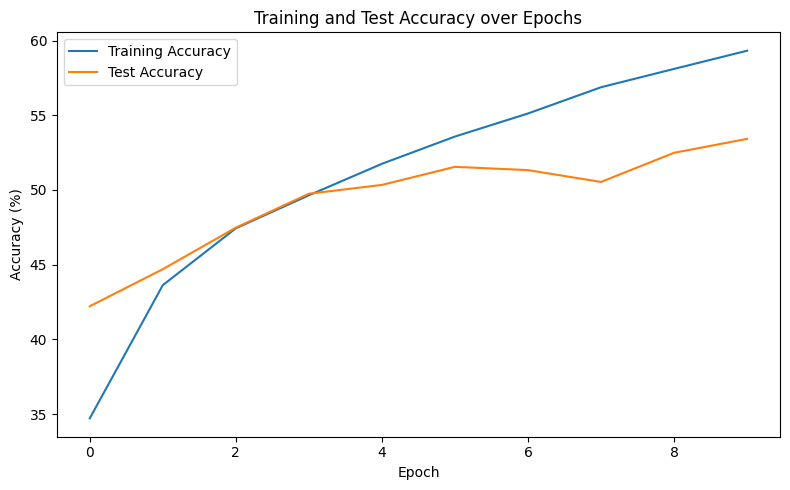

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy over Epochs')
plt.legend()
plt.tight_layout()
plt.show()